# Predicting the COVID-19 cases using Machine learning

In this notebook, I am going to build a machine learning model which will predict the covid-19 count on various cities.

Predicting a number comes under **regression problem**.

In this notebook, for working through the problem; pandas, numpy, Matplotlib will be used for data analysis and Scikit-learn will be used for machine learning and modelling tasks.

## 1. Problem Definition

The following are the problem statements given for Flipr Hackathon 6.0

**Part -1**:
The objective of the first part of the problem statement is to predict the Covid Cases of a city on 1st September 2020.

**Part -2**:
The Foreign Visitors of a city is a time-dependent parameter, for which you have to come up with a Time-series prediction model. Using the Foreign Visitors predicted by the model, you need to calculate the Covid Cases on 1st Oct 2020 for every City in the test data. . The output file 02 should contain only City and the respective Covid Cases on 1st October.

## 2. Data

The dataset is the historical data of stock prices.

There are 2 datasets:
    1. Train_dataset.xlsx - This is the training dataset on which model has to be trained, which contains parameters of a city on 1st September 2020.
    
    2. Test_dataset.xlsx - This is the test data on which accuracy of the model will be computed. It also contains Time Series data of Foreign Visitors to be used for Part – 02.

## 3. Evaluation

For this problem, RMSLE(Root mean squared log error) is chosen the evaluation metric. As with many regression evaluations, the goal is to get this value as low as possible.

## 4. Features

Features are the different part of the data. 

For this dataset, Flipr provided a data dictionary in the name 'variable_description.xlsx' which contains information about what each attribute of the dataset means.

- City-	Name of the city.
- State-	State of the city.
- Type-	Type of City [Town, Mega City etc.].
- Population [2011]-	Population according to census of 2011.
- Popuation [2001]-	Population according to census of 2001.
- Sex Ratio-	Number of females per 1000 males.
- Median Age-	Median age in the city.
- Avg Temp-	Average temperature of the city [in Celsius].
- SWM-	Solid waste management.
- Toilets Avl-	Availability and state of public and community toilets .
- Water Purity-	Units of mg per unit volume of water (mg/L) .
- H Index-	H index is a mean duration of health in the range between 0 and 1; the healthier a population is, the larger will be the value of H.
- Female Population-	Number of females in the city.
- \# of hospitals-	Number of hospitals in the city.
- Foreign Visitors-	Number of Interstate visitors from other states during August.
- Covid Cases-	Number of confirmed cases in the city till September 1st.

### Importing the data and preparing it for modelling

In [1]:
#Import data analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import the training datset
df = pd.read_excel("data/Train_dataset.xlsx", index_col=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               787 non-null    object 
 1   State              787 non-null    object 
 2   Type               787 non-null    object 
 3   Population [2011]  739 non-null    float64
 4   Popuation [2001]   295 non-null    float64
 5   Sex Ratio          777 non-null    float64
 6   Median Age         769 non-null    float64
 7   Avg Temp           770 non-null    float64
 8   SWM                783 non-null    object 
 9   Toilets Avl        761 non-null    float64
 10  Water Purity       629 non-null    float64
 11  H Index            647 non-null    float64
 12  Female Population  646 non-null    float64
 13  # of hospitals     772 non-null    float64
 14  Foreign Visitors   697 non-null    float64
 15  Covid Cases        787 non-null    int64  
dtypes: float64(11), int64(1), 

In [4]:
df.head()

City        State  Type  Population [2011]  Popuation [2001]  \
0     Mumbai  Maharashtra   M.C         12442373.0        11978450.0   
1      Delhi        Delhi   M.C         11007835.0         9879172.0   
2  Bangalore    Karnataka  MPUA          8436675.0         4301326.0   
3  Hyderabad    Telangana  MPUA          6809970.0         3637483.0   
4  Ahmedabad      Gujarat  MPUA          5570585.0         3520085.0   

   Sex Ratio  Median Age  Avg Temp     SWM  Toilets Avl  Water Purity  \
0      878.0        23.0      32.0  MEDIUM        219.0         150.0   
1      858.0        27.0      30.0  MEDIUM        215.0         196.0   
2      936.0        28.0      37.0    HIGH        212.0         102.0   
3      930.0        23.0      31.0  MEDIUM        217.0         118.0   
4      852.0        29.0      25.0     LOW        227.0         109.0   

    H Index  Female Population  # of hospitals  Foreign Visitors  Covid Cases  
0  0.700440         10924403.0           159.0         4408916.0       163115  
1  0.920018          9444722.0           148.0         2379169.0        80188  
2  0.097085          7896728.0           123.0          636502.0       141000  
3  0.827744          6333272.0           110.0          126078.0        55123  
4  0.847941          4746138.0            73.0          284973.0        33204

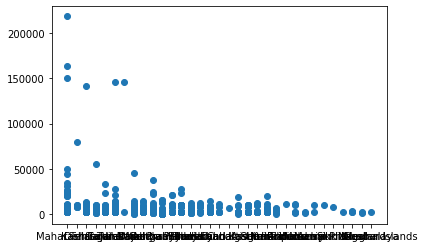

In [5]:
fig, ax = plt.subplots()
ax.scatter(df["State"], df["Covid Cases"])

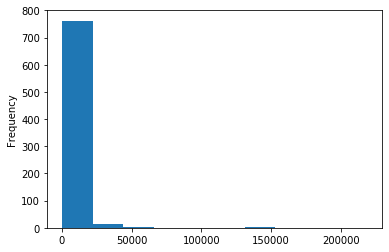

In [6]:
df["Covid Cases"].plot.hist()

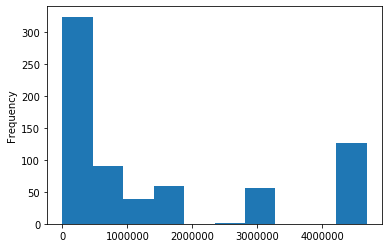

In [7]:
df["Foreign Visitors"].plot.hist()

In [8]:
df.isna().sum()

City                   0
State                  0
Type                   0
Population [2011]     48
Popuation [2001]     492
Sex Ratio             10
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

As the percentage of missing population values in 2001 is nearly 62.5%, it is better to remove the population in 2001 column.

In [9]:
# Make a copy of Original DataFrame to perform edits on
df_temp = df.copy()

In [10]:
df_temp.drop("Popuation [2001]", axis = 1, inplace = True)

In [11]:
df_temp

City          State  Type  Population [2011]  Sex Ratio  \
0         Mumbai    Maharashtra   M.C         12442373.0      878.0   
1          Delhi          Delhi   M.C         11007835.0      858.0   
2      Bangalore      Karnataka  MPUA          8436675.0      936.0   
3      Hyderabad      Telangana  MPUA          6809970.0      930.0   
4      Ahmedabad        Gujarat  MPUA          5570585.0      852.0   
..           ...            ...   ...                ...        ...   
782     Lunawada        Gujarat     M            36954.0      846.0   
783  Murshidabad    West Bengal     M            36947.0      945.0   
784         Mahe     Puducherry     M            36828.0     1019.0   
785        Lanka          Assam   M.B            36805.0      900.0   
786      Rudauli  Uttar Pradesh   M.B            36776.0      889.0   

     Median Age  Avg Temp     SWM  Toilets Avl  Water Purity   H Index  \
0          23.0      32.0  MEDIUM        219.0         150.0  0.700440   
1          27.0      30.0  MEDIUM        215.0         196.0  0.920018   
2          28.0      37.0    HIGH        212.0         102.0  0.097085   
3          23.0      31.0  MEDIUM        217.0         118.0  0.827744   
4          29.0      25.0     LOW        227.0         109.0  0.847941   
..          ...       ...     ...          ...           ...       ...   
782        23.0      28.0  MEDIUM         68.0         103.0  0.035280   
783        23.0      36.0  MEDIUM         62.0         136.0  0.056394   
784        28.0      28.0    HIGH         98.0         138.0  0.066752   
785        24.0       6.0  MEDIUM         63.0         145.0  0.627556   
786        25.0      37.0    HIGH         51.0         181.0  0.313383   

     Female Population  # of hospitals  Foreign Visitors  Covid Cases  
0           10924403.0           159.0         4408916.0       163115  
1            9444722.0           148.0         2379169.0        80188  
2            7896728.0           123.0          636502.0       141000  
3            6333272.0           110.0          126078.0        55123  
4            4746138.0            73.0          284973.0        33204  
..                 ...             ...               ...          ...  
782            31263.0            19.0          284973.0         1944  
783            34915.0            22.0         1489500.0         2172  
784            37528.0            27.0          106153.0         2851  
785            33125.0            15.0           24720.0         2158  
786            32694.0            30.0         3104060.0         2220  

[787 rows x 15 columns]

## Convert string to categories

One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this, pandas types api is used, which allows us to interact and manupulate types of data.

In [12]:
df_temp.head().T

0            1            2            3  \
City                    Mumbai        Delhi    Bangalore    Hyderabad   
State              Maharashtra        Delhi    Karnataka    Telangana   
Type                       M.C          M.C         MPUA         MPUA   
Population [2011]  1.24424e+07  1.10078e+07  8.43668e+06  6.80997e+06   
Sex Ratio                  878          858          936          930   
Median Age                  23           27           28           23   
Avg Temp                    32           30           37           31   
SWM                     MEDIUM       MEDIUM         HIGH       MEDIUM   
Toilets Avl                219          215          212          217   
Water Purity               150          196          102          118   
H Index                0.70044     0.920018    0.0970853     0.827744   
Female Population  1.09244e+07  9.44472e+06  7.89673e+06  6.33327e+06   
# of hospitals             159          148          123          110   
Foreign Visitors   4.40892e+06  2.37917e+06       636502       126078   
Covid Cases             163115        80188       141000        55123   

                             4  
City                 Ahmedabad  
State                  Gujarat  
Type                      MPUA  
Population [2011]  5.57058e+06  
Sex Ratio                  852  
Median Age                  29  
Avg Temp                    25  
SWM                        LOW  
Toilets Avl                227  
Water Purity               109  
H Index               0.847941  
Female Population  4.74614e+06  
# of hospitals              73  
Foreign Visitors        284973  
Covid Cases              33204

In [13]:
# These columns contains strings
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

City
State
Type
SWM


In [14]:
# This will turn all of the string values into category values
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [15]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   City               787 non-null    category
 1   State              787 non-null    category
 2   Type               787 non-null    category
 3   Population [2011]  739 non-null    float64 
 4   Sex Ratio          777 non-null    float64 
 5   Median Age         769 non-null    float64 
 6   Avg Temp           770 non-null    float64 
 7   SWM                783 non-null    category
 8   Toilets Avl        761 non-null    float64 
 9   Water Purity       629 non-null    float64 
 10  H Index            647 non-null    float64 
 11  Female Population  646 non-null    float64 
 12  # of hospitals     772 non-null    float64 
 13  Foreign Visitors   697 non-null    float64 
 14  Covid Cases        787 non-null    int64   
dtypes: category(4), float64(10), int64(1)
memory usage: 100.8

In [16]:
df_temp['City'].cat.categories

Index(['Adoni', 'Agartala', 'Agra', 'Ahmedabad', 'Ahmednagar', 'Aizawl',
       'Ajmer', 'Akola', 'Akot', 'Alappuzha',
       ...
       'Warangal', 'Warora', 'Washim', 'Yadgir', 'Yamunanagar', 'Yanam',
       'Yemmiganur', 'Yevla', 'Zirakpur', 'Zunheboto'],
      dtype='object', length=772)

In [17]:
df_temp['City'].cat.codes

0      378
1      135
2       52
3      210
4        3
      ... 
782    316
783    380
784    328
785    309
786    552
Length: 787, dtype: int16

All of our data is categorical and thus we can now turn the categories into numbers, however it's still missing values...

In [18]:
df_temp.head().T

0            1            2            3  \
City                    Mumbai        Delhi    Bangalore    Hyderabad   
State              Maharashtra        Delhi    Karnataka    Telangana   
Type                       M.C          M.C         MPUA         MPUA   
Population [2011]  1.24424e+07  1.10078e+07  8.43668e+06  6.80997e+06   
Sex Ratio                  878          858          936          930   
Median Age                  23           27           28           23   
Avg Temp                    32           30           37           31   
SWM                     MEDIUM       MEDIUM         HIGH       MEDIUM   
Toilets Avl                219          215          212          217   
Water Purity               150          196          102          118   
H Index                0.70044     0.920018    0.0970853     0.827744   
Female Population  1.09244e+07  9.44472e+06  7.89673e+06  6.33327e+06   
# of hospitals             159          148          123          110   
Foreign Visitors   4.40892e+06  2.37917e+06       636502       126078   
Covid Cases             163115        80188       141000        55123   

                             4  
City                 Ahmedabad  
State                  Gujarat  
Type                      MPUA  
Population [2011]  5.57058e+06  
Sex Ratio                  852  
Median Age                  29  
Avg Temp                    25  
SWM                        LOW  
Toilets Avl                227  
Water Purity               109  
H Index               0.847941  
Female Population  4.74614e+06  
# of hospitals              73  
Foreign Visitors        284973  
Covid Cases              33204

In [19]:
df_temp.isna().sum()

City                   0
State                  0
Type                   0
Population [2011]     48
Sex Ratio             10
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

## Fill missing values

 For the machine learning model to work:
 
    1. All of our data has to be numerical
    2. There can't be any missing values
    
And as we've seen using df_tmp.isna().sum() our data still has plenty of missing values.

## Filling the numerical values first

The missing values in any column is to be filled with median of that column

In [20]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Population [2011]
Sex Ratio
Median Age
Avg Temp
Toilets Avl
Water Purity
H Index
Female Population
# of hospitals
Foreign Visitors
Covid Cases


In [21]:
# Check for which numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Population [2011]
Sex Ratio
Median Age
Avg Temp
Toilets Avl
Water Purity
H Index
Female Population
# of hospitals
Foreign Visitors


In [22]:
# Fill numeric rows with the median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_temp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_temp[label] = content.fillna(content.median())

In [23]:
# Check if there's any null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [24]:
df_temp["Foreign Visitors_is_missing"].value_counts()

False    697
True      90
Name: Foreign Visitors_is_missing, dtype: int64

### Filling and turning categorical variables to numbers

In [25]:
# Check columns which aren't numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

City
State
Type
SWM


In [26]:
# Turn categorical variables into numbers
for label, content in df_temp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_temp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_temp[label] = pd.Categorical(content).codes+1

In [27]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          787 non-null    int16  
 1   State                         787 non-null    int8   
 2   Type                          787 non-null    int8   
 3   Population [2011]             787 non-null    float64
 4   Sex Ratio                     787 non-null    float64
 5   Median Age                    787 non-null    float64
 6   Avg Temp                      787 non-null    float64
 7   SWM                           787 non-null    int8   
 8   Toilets Avl                   787 non-null    float64
 9   Water Purity                  787 non-null    float64
 10  H Index                       787 non-null    float64
 11  Female Population             787 non-null    float64
 12  # of hospitals                787 non-null    float64
 13  Forei

In [28]:
df_temp.isna().sum()

City                            0
State                           0
Type                            0
Population [2011]               0
Sex Ratio                       0
Median Age                      0
Avg Temp                        0
SWM                             0
Toilets Avl                     0
Water Purity                    0
H Index                         0
Female Population               0
# of hospitals                  0
Foreign Visitors                0
Covid Cases                     0
Population [2011]_is_missing    0
Sex Ratio_is_missing            0
Median Age_is_missing           0
Avg Temp_is_missing             0
Toilets Avl_is_missing          0
Water Purity_is_missing         0
H Index_is_missing              0
Female Population_is_missing    0
# of hospitals_is_missing       0
Foreign Visitors_is_missing     0
City_is_missing                 0
State_is_missing                0
Type_is_missing                 0
SWM_is_missing                  0
dtype: int64

## 5. Modelling

The dataset has been explored and preprocessed and ready to be used to train.

Following the Scikit-Learn machine learning map, (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), three models namely SVR, RandomForest Regressor and CatBoost Regressor are deployed and tested for accuracy. 

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

In [30]:
models = {"Random Forest Regressor": RandomForestRegressor(),
          "SVR": SVR(),
          "Cat Boost Regressor": CatBoostRegressor()}

In [31]:
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_val : validation data
    y_train : labels assosciated with training data
    y_val : labels assosciated with validation data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = show_scores(model)
    return model_scores

In [32]:
def rmsle(y_val, y_preds):
    return np.sqrt(mean_squared_log_error(y_val, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_val, y_val)}
    return scores

## Splitting data into train and valid sets

It is necessary to split the train dataset into training ang validation set.

The training set is used to train the model and validation set is used to evaluate the model.

For this train_test_split() can be used. 30 percent of train dataset is split as validation set.

In [33]:
# Training data without validation split
train = df_temp.drop("Covid Cases", axis=1)
target = df_temp["Covid Cases"]

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_temp.drop("Covid Cases", axis=1), df_temp["Covid Cases"], test_size = 0.2)

In [35]:
#Training and evaluating out models
model_scores = fit_and_score(models = models,
                             X_train=X_train,
                             X_val = X_val,
                             y_train = y_train,
                             y_val = y_val)
model_scores

Learning rate set to 0.035939
0:	learn: 16444.3562421	total: 71.1ms	remaining: 1m 11s
1:	learn: 16273.9993867	total: 72.5ms	remaining: 36.2s
2:	learn: 16056.0435559	total: 73.9ms	remaining: 24.6s
3:	learn: 15777.5654901	total: 75.2ms	remaining: 18.7s
4:	learn: 15554.8371836	total: 76.5ms	remaining: 15.2s
5:	learn: 15356.8357119	total: 78ms	remaining: 12.9s
6:	learn: 15130.7603342	total: 79.6ms	remaining: 11.3s
7:	learn: 14834.3339250	total: 81.1ms	remaining: 10.1s
8:	learn: 14666.1356222	total: 82.8ms	remaining: 9.12s
9:	learn: 14515.1719140	total: 84.4ms	remaining: 8.35s
10:	learn: 14294.6186562	total: 86ms	remaining: 7.73s
11:	learn: 14049.4801172	total: 87.4ms	remaining: 7.2s
12:	learn: 13875.0832189	total: 89.3ms	remaining: 6.78s
13:	learn: 13701.1014567	total: 91ms	remaining: 6.41s
14:	learn: 13440.8196742	total: 92.6ms	remaining: 6.08s
15:	learn: 13188.8002091	total: 94.2ms	remaining: 5.79s
16:	learn: 12961.4572714	total: 95.9ms	remaining: 5.55s
17:	learn: 12799.9737610	total: 97

176:	learn: 3182.6527724	total: 324ms	remaining: 1.51s
177:	learn: 3169.2321730	total: 326ms	remaining: 1.5s
178:	learn: 3153.1033953	total: 327ms	remaining: 1.5s
179:	learn: 3134.6046359	total: 329ms	remaining: 1.5s
180:	learn: 3122.0227210	total: 330ms	remaining: 1.49s
181:	learn: 3104.6878254	total: 332ms	remaining: 1.49s
182:	learn: 3088.0882012	total: 333ms	remaining: 1.49s
183:	learn: 3075.1625485	total: 335ms	remaining: 1.48s
184:	learn: 3067.0100074	total: 336ms	remaining: 1.48s
185:	learn: 3049.9473461	total: 337ms	remaining: 1.48s
186:	learn: 3032.2471976	total: 338ms	remaining: 1.47s
187:	learn: 3020.5199746	total: 340ms	remaining: 1.47s
188:	learn: 3008.2662332	total: 341ms	remaining: 1.46s
189:	learn: 2993.9464518	total: 343ms	remaining: 1.46s
190:	learn: 2977.9102725	total: 345ms	remaining: 1.46s
191:	learn: 2968.9493386	total: 346ms	remaining: 1.46s
192:	learn: 2954.2872748	total: 348ms	remaining: 1.46s
193:	learn: 2934.4118314	total: 350ms	remaining: 1.45s
194:	learn: 2

435:	learn: 1471.3806135	total: 658ms	remaining: 851ms
436:	learn: 1466.4216463	total: 660ms	remaining: 850ms
437:	learn: 1463.3843809	total: 661ms	remaining: 848ms
438:	learn: 1459.7161779	total: 662ms	remaining: 846ms
439:	learn: 1457.2399559	total: 664ms	remaining: 845ms
440:	learn: 1454.8490366	total: 665ms	remaining: 843ms
441:	learn: 1449.6362206	total: 667ms	remaining: 842ms
442:	learn: 1447.7453988	total: 668ms	remaining: 840ms
443:	learn: 1446.0302706	total: 670ms	remaining: 838ms
444:	learn: 1438.8640291	total: 671ms	remaining: 837ms
445:	learn: 1434.5856309	total: 672ms	remaining: 835ms
446:	learn: 1432.5490082	total: 674ms	remaining: 834ms
447:	learn: 1428.6311775	total: 676ms	remaining: 833ms
448:	learn: 1421.3632962	total: 677ms	remaining: 831ms
449:	learn: 1419.3518519	total: 678ms	remaining: 829ms
450:	learn: 1414.4015920	total: 679ms	remaining: 827ms
451:	learn: 1412.0462657	total: 681ms	remaining: 825ms
452:	learn: 1410.3398089	total: 682ms	remaining: 823ms
453:	learn

679:	learn: 845.9050819	total: 992ms	remaining: 467ms
680:	learn: 844.7296455	total: 994ms	remaining: 465ms
681:	learn: 841.3877666	total: 996ms	remaining: 464ms
682:	learn: 840.1995530	total: 997ms	remaining: 463ms
683:	learn: 838.7885531	total: 999ms	remaining: 461ms
684:	learn: 837.1503390	total: 1s	remaining: 460ms
685:	learn: 835.7294661	total: 1s	remaining: 458ms
686:	learn: 832.5401242	total: 1s	remaining: 457ms
687:	learn: 830.6772580	total: 1s	remaining: 456ms
688:	learn: 829.7149875	total: 1.01s	remaining: 454ms
689:	learn: 825.8793082	total: 1.01s	remaining: 453ms
690:	learn: 824.8948758	total: 1.01s	remaining: 451ms
691:	learn: 823.1776795	total: 1.01s	remaining: 450ms
692:	learn: 821.4259641	total: 1.01s	remaining: 448ms
693:	learn: 819.0812336	total: 1.01s	remaining: 447ms
694:	learn: 818.3159152	total: 1.01s	remaining: 445ms
695:	learn: 816.9655595	total: 1.02s	remaining: 444ms
696:	learn: 814.9384380	total: 1.02s	remaining: 442ms
697:	learn: 813.5401448	total: 1.02s	rem

920:	learn: 509.1853736	total: 1.33s	remaining: 114ms
921:	learn: 507.7529649	total: 1.33s	remaining: 113ms
922:	learn: 507.3950419	total: 1.33s	remaining: 111ms
923:	learn: 506.5081307	total: 1.33s	remaining: 110ms
924:	learn: 505.9393506	total: 1.33s	remaining: 108ms
925:	learn: 505.0118384	total: 1.34s	remaining: 107ms
926:	learn: 504.1867976	total: 1.34s	remaining: 105ms
927:	learn: 503.2527215	total: 1.34s	remaining: 104ms
928:	learn: 501.6904517	total: 1.34s	remaining: 103ms
929:	learn: 501.0183532	total: 1.34s	remaining: 101ms
930:	learn: 500.1503628	total: 1.34s	remaining: 99.7ms
931:	learn: 498.8675209	total: 1.35s	remaining: 98.3ms
932:	learn: 497.9822791	total: 1.35s	remaining: 96.8ms
933:	learn: 497.3130671	total: 1.35s	remaining: 95.3ms
934:	learn: 496.5182610	total: 1.35s	remaining: 93.9ms
935:	learn: 495.3862332	total: 1.35s	remaining: 92.4ms
936:	learn: 493.5656748	total: 1.35s	remaining: 91ms
937:	learn: 492.3646013	total: 1.35s	remaining: 89.5ms
938:	learn: 491.738294

{'Random Forest Regressor': {'Training MAE': 994.5314626391098,
  'Valid MAE': 2118.713670886076,
  'Training RMSLE': 0.2423630009729979,
  'Valid RMSLE': 0.49736368436701667,
  'Training R^2': 0.938317158844701,
  'Valid R^2': -0.9213300937694531},
 'SVR': {'Training MAE': 4813.352758890792,
  'Valid MAE': 2934.0698731211096,
  'Training RMSLE': 0.9677993890988648,
  'Valid RMSLE': 0.8443804697094541,
  'Training R^2': -0.06963507027097027,
  'Valid R^2': -0.24216689766556443},
 'Cat Boost Regressor': {'Training MAE': 304.36994183528685,
  'Valid MAE': 1812.6266955093108,
  'Training RMSLE': 0.18023370946262254,
  'Valid RMSLE': 0.5086943583687302,
  'Training R^2': 0.999307646991908,
  'Valid R^2': 0.36678895962296365}}

From the results, it seems that CatBoost Regressor is doing good.

### Hyperparameter tuning with GridSearchCV

In [36]:
import warnings
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
warnings.filterwarnings("ignore")

In [37]:
parameters = {'depth' : [4,6,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [100, 500, 1000]
                 }

In [38]:
gs_catboost_model = GridSearchCV(
                                CatBoostRegressor(task_type="GPU"),
                                param_grid=parameters,
                                cv = 2,
                                verbose=True)
gs_catboost_model.fit(X_train, y_train)

print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",gs_catboost_model.best_estimator_)
print("\n The best score across ALL searched params:\n",gs_catboost_model.best_score_)
print("\n The best parameters across ALL searched params:\n",gs_catboost_model.best_params_)
print("\n ========================================================")

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 19617.8983090	total: 21.3ms	remaining: 2.11s
1:	learn: 19533.4943437	total: 24.6ms	remaining: 1.2s
2:	learn: 19461.2115045	total: 27.9ms	remaining: 901ms
3:	learn: 19384.2404437	total: 30.7ms	remaining: 738ms
4:	learn: 19306.5422712	total: 33.6ms	remaining: 638ms
5:	learn: 19235.4811013	total: 36.5ms	remaining: 572ms
6:	learn: 19175.0094688	total: 39.5ms	remaining: 525ms
7:	learn: 19103.3149489	total: 42.5ms	remaining: 489ms
8:	learn: 19046.3326620	total: 45.4ms	remaining: 459ms
9:	learn: 18986.2946694	total: 48.4ms	remaining: 436ms
10:	learn: 18910.6947721	total: 51.4ms	remaining: 416ms
11:	learn: 18850.8295866	total: 54.4ms	remaining: 399ms
12:	learn: 18780.3181756	total: 57.4ms	remaining: 384ms
13:	learn: 18718.0033123	total: 60.4ms	remaining: 371ms
14:	learn: 18650.0254606	total: 63.4ms	remaining: 359ms
15:	learn: 18580.6363641	total: 66.4ms	remaining: 348ms
16:	learn: 18507.8143565	total: 69.3ms	remaining: 338ms
17:	learn: 18439.7747226	total: 72.2ms	remaining: 329ms
18:

59:	learn: 10497.8550432	total: 181ms	remaining: 121ms
60:	learn: 10458.2158471	total: 184ms	remaining: 118ms
61:	learn: 10423.5124495	total: 188ms	remaining: 115ms
62:	learn: 10389.1743803	total: 192ms	remaining: 113ms
63:	learn: 10356.5748533	total: 197ms	remaining: 111ms
64:	learn: 10321.6015295	total: 200ms	remaining: 108ms
65:	learn: 10280.6292390	total: 204ms	remaining: 105ms
66:	learn: 10240.9996337	total: 207ms	remaining: 102ms
67:	learn: 10201.6883309	total: 212ms	remaining: 99.6ms
68:	learn: 10162.7553219	total: 216ms	remaining: 96.9ms
69:	learn: 10130.3032262	total: 220ms	remaining: 94.3ms
70:	learn: 10096.8965768	total: 224ms	remaining: 91.3ms
71:	learn: 10062.4796692	total: 228ms	remaining: 88.7ms
72:	learn: 10029.3906735	total: 232ms	remaining: 85.7ms
73:	learn: 9996.4597873	total: 235ms	remaining: 82.5ms
74:	learn: 9960.3513166	total: 238ms	remaining: 79.4ms
75:	learn: 9928.7925806	total: 241ms	remaining: 76.3ms
76:	learn: 9898.5963873	total: 245ms	remaining: 73.1ms
77:	

54:	learn: 5538.3603740	total: 184ms	remaining: 151ms
55:	learn: 5457.1906907	total: 188ms	remaining: 148ms
56:	learn: 5380.9627887	total: 193ms	remaining: 145ms
57:	learn: 5319.6435350	total: 197ms	remaining: 143ms
58:	learn: 5252.7798597	total: 201ms	remaining: 139ms
59:	learn: 5209.8503430	total: 204ms	remaining: 136ms
60:	learn: 5159.8194431	total: 207ms	remaining: 133ms
61:	learn: 5117.7722137	total: 211ms	remaining: 129ms
62:	learn: 5076.5452770	total: 214ms	remaining: 126ms
63:	learn: 5039.0940985	total: 217ms	remaining: 122ms
64:	learn: 4976.8728066	total: 220ms	remaining: 119ms
65:	learn: 4918.8023836	total: 224ms	remaining: 115ms
66:	learn: 4840.0321762	total: 227ms	remaining: 112ms
67:	learn: 4777.4818259	total: 230ms	remaining: 108ms
68:	learn: 4710.6632432	total: 233ms	remaining: 105ms
69:	learn: 4655.3978556	total: 237ms	remaining: 101ms
70:	learn: 4616.8658977	total: 240ms	remaining: 97.9ms
71:	learn: 4584.9238771	total: 243ms	remaining: 94.5ms
72:	learn: 4528.3969090	to

49:	learn: 3521.4385516	total: 184ms	remaining: 184ms
50:	learn: 3439.0552265	total: 188ms	remaining: 181ms
51:	learn: 3375.7030487	total: 191ms	remaining: 177ms
52:	learn: 3335.0655156	total: 195ms	remaining: 173ms
53:	learn: 3290.3878249	total: 198ms	remaining: 169ms
54:	learn: 3262.2003131	total: 201ms	remaining: 164ms
55:	learn: 3223.9633540	total: 204ms	remaining: 160ms
56:	learn: 3166.6988510	total: 207ms	remaining: 156ms
57:	learn: 3144.1128620	total: 210ms	remaining: 152ms
58:	learn: 3091.8263653	total: 213ms	remaining: 148ms
59:	learn: 3042.7149113	total: 216ms	remaining: 144ms
60:	learn: 3021.6609750	total: 219ms	remaining: 140ms
61:	learn: 2963.1694743	total: 221ms	remaining: 136ms
62:	learn: 2943.0864007	total: 224ms	remaining: 132ms
63:	learn: 2895.2546967	total: 227ms	remaining: 128ms
64:	learn: 2857.6370569	total: 230ms	remaining: 124ms
65:	learn: 2813.1343283	total: 233ms	remaining: 120ms
66:	learn: 2794.3703223	total: 236ms	remaining: 116ms
67:	learn: 2766.4584385	tota

117:	learn: 12559.0753037	total: 1.19s	remaining: 3.85s
118:	learn: 12529.0585654	total: 1.2s	remaining: 3.84s
119:	learn: 12472.3946122	total: 1.21s	remaining: 3.83s
120:	learn: 12411.7211092	total: 1.22s	remaining: 3.82s
121:	learn: 12381.8106987	total: 1.23s	remaining: 3.8s
122:	learn: 12325.6715542	total: 1.24s	remaining: 3.79s
123:	learn: 12269.5073162	total: 1.25s	remaining: 3.78s
124:	learn: 12248.8857302	total: 1.26s	remaining: 3.77s
125:	learn: 12206.1979954	total: 1.27s	remaining: 3.76s
126:	learn: 12177.8706097	total: 1.27s	remaining: 3.75s
127:	learn: 12149.5512601	total: 1.29s	remaining: 3.74s
128:	learn: 12121.8152053	total: 1.29s	remaining: 3.73s
129:	learn: 12065.9977734	total: 1.3s	remaining: 3.71s
130:	learn: 12018.9353111	total: 1.31s	remaining: 3.7s
131:	learn: 11965.7926368	total: 1.32s	remaining: 3.69s
132:	learn: 11920.6764909	total: 1.33s	remaining: 3.68s
133:	learn: 11868.9491505	total: 1.34s	remaining: 3.67s
134:	learn: 11842.4808556	total: 1.35s	remaining: 3.

274:	learn: 8357.2169079	total: 2.74s	remaining: 2.24s
275:	learn: 8349.6272101	total: 2.75s	remaining: 2.23s
276:	learn: 8342.5106548	total: 2.76s	remaining: 2.22s
277:	learn: 8335.5038301	total: 2.77s	remaining: 2.21s
278:	learn: 8310.5761426	total: 2.78s	remaining: 2.21s
279:	learn: 8292.9862285	total: 2.79s	remaining: 2.19s
280:	learn: 8269.2768374	total: 2.81s	remaining: 2.19s
281:	learn: 8253.8489273	total: 2.82s	remaining: 2.18s
282:	learn: 8246.8988497	total: 2.83s	remaining: 2.17s
283:	learn: 8240.2448792	total: 2.84s	remaining: 2.16s
284:	learn: 8233.8128772	total: 2.85s	remaining: 2.15s
285:	learn: 8213.9745083	total: 2.86s	remaining: 2.14s
286:	learn: 8188.8624565	total: 2.87s	remaining: 2.13s
287:	learn: 8165.1997920	total: 2.88s	remaining: 2.12s
288:	learn: 8141.9225761	total: 2.89s	remaining: 2.11s
289:	learn: 8135.6898274	total: 2.9s	remaining: 2.1s
290:	learn: 8112.1932665	total: 2.92s	remaining: 2.09s
291:	learn: 8089.4303296	total: 2.93s	remaining: 2.08s
292:	learn: 

428:	learn: 6528.4415987	total: 4.38s	remaining: 726ms
429:	learn: 6522.2499967	total: 4.39s	remaining: 715ms
430:	learn: 6517.2305321	total: 4.41s	remaining: 705ms
431:	learn: 6516.4233557	total: 4.42s	remaining: 695ms
432:	learn: 6500.6252556	total: 4.43s	remaining: 685ms
433:	learn: 6499.7881710	total: 4.44s	remaining: 675ms
434:	learn: 6498.5397439	total: 4.45s	remaining: 664ms
435:	learn: 6488.8907161	total: 4.46s	remaining: 654ms
436:	learn: 6478.9497301	total: 4.47s	remaining: 644ms
437:	learn: 6469.5502438	total: 4.48s	remaining: 634ms
438:	learn: 6468.8082010	total: 4.49s	remaining: 624ms
439:	learn: 6468.1021227	total: 4.5s	remaining: 613ms
440:	learn: 6458.5237571	total: 4.51s	remaining: 603ms
441:	learn: 6457.2855333	total: 4.52s	remaining: 593ms
442:	learn: 6447.6951454	total: 4.53s	remaining: 583ms
443:	learn: 6438.5349443	total: 4.54s	remaining: 573ms
444:	learn: 6434.3620215	total: 4.55s	remaining: 562ms
445:	learn: 6433.2927686	total: 4.56s	remaining: 552ms
446:	learn:

95:	learn: 9409.0835355	total: 938ms	remaining: 3.95s
96:	learn: 9379.6933405	total: 947ms	remaining: 3.94s
97:	learn: 9355.1310956	total: 957ms	remaining: 3.92s
98:	learn: 9326.3436576	total: 966ms	remaining: 3.91s
99:	learn: 9288.9423800	total: 976ms	remaining: 3.9s
100:	learn: 9255.6972197	total: 985ms	remaining: 3.89s
101:	learn: 9220.8399989	total: 995ms	remaining: 3.88s
102:	learn: 9192.4973687	total: 1s	remaining: 3.86s
103:	learn: 9163.4558560	total: 1.01s	remaining: 3.85s
104:	learn: 9135.3945926	total: 1.02s	remaining: 3.84s
105:	learn: 9107.3089755	total: 1.03s	remaining: 3.82s
106:	learn: 9079.1203658	total: 1.04s	remaining: 3.81s
107:	learn: 9051.4825459	total: 1.04s	remaining: 3.79s
108:	learn: 9024.0533152	total: 1.05s	remaining: 3.78s
109:	learn: 8996.8244641	total: 1.06s	remaining: 3.77s
110:	learn: 8973.9341991	total: 1.07s	remaining: 3.76s
111:	learn: 8946.6930665	total: 1.08s	remaining: 3.75s
112:	learn: 8924.1055169	total: 1.09s	remaining: 3.74s
113:	learn: 8894.47

249:	learn: 6157.0306263	total: 2.43s	remaining: 2.43s
250:	learn: 6148.2628069	total: 2.44s	remaining: 2.42s
251:	learn: 6136.7512795	total: 2.45s	remaining: 2.42s
252:	learn: 6124.5772363	total: 2.46s	remaining: 2.41s
253:	learn: 6115.4527271	total: 2.48s	remaining: 2.4s
254:	learn: 6103.4316738	total: 2.49s	remaining: 2.39s
255:	learn: 6081.9442839	total: 2.5s	remaining: 2.38s
256:	learn: 6060.2340025	total: 2.51s	remaining: 2.37s
257:	learn: 6039.4156934	total: 2.52s	remaining: 2.36s
258:	learn: 6027.6642074	total: 2.53s	remaining: 2.35s
259:	learn: 6015.9394796	total: 2.54s	remaining: 2.35s
260:	learn: 6005.8740854	total: 2.55s	remaining: 2.34s
261:	learn: 5997.7671697	total: 2.56s	remaining: 2.33s
262:	learn: 5976.0255158	total: 2.57s	remaining: 2.32s
263:	learn: 5961.9398824	total: 2.58s	remaining: 2.31s
264:	learn: 5950.5065885	total: 2.59s	remaining: 2.3s
265:	learn: 5939.1911330	total: 2.6s	remaining: 2.29s
266:	learn: 5927.9431910	total: 2.62s	remaining: 2.28s
267:	learn: 59

404:	learn: 4472.4097152	total: 3.95s	remaining: 927ms
405:	learn: 4467.4065173	total: 3.96s	remaining: 917ms
406:	learn: 4462.5328419	total: 3.97s	remaining: 908ms
407:	learn: 4457.6068004	total: 3.98s	remaining: 898ms
408:	learn: 4452.9815658	total: 3.99s	remaining: 888ms
409:	learn: 4448.3392813	total: 4s	remaining: 878ms
410:	learn: 4442.6168179	total: 4.01s	remaining: 868ms
411:	learn: 4438.0140504	total: 4.02s	remaining: 859ms
412:	learn: 4433.2521525	total: 4.03s	remaining: 849ms
413:	learn: 4425.9649243	total: 4.04s	remaining: 839ms
414:	learn: 4421.5543629	total: 4.05s	remaining: 829ms
415:	learn: 4417.1403175	total: 4.06s	remaining: 820ms
416:	learn: 4412.4175945	total: 4.07s	remaining: 810ms
417:	learn: 4410.1161630	total: 4.08s	remaining: 800ms
418:	learn: 4405.8107432	total: 4.09s	remaining: 790ms
419:	learn: 4394.0356459	total: 4.1s	remaining: 780ms
420:	learn: 4389.7311166	total: 4.11s	remaining: 771ms
421:	learn: 4378.7855445	total: 4.12s	remaining: 761ms
422:	learn: 43

56:	learn: 8178.5087953	total: 592ms	remaining: 4.6s
57:	learn: 8050.1541228	total: 602ms	remaining: 4.59s
58:	learn: 7925.1209591	total: 613ms	remaining: 4.58s
59:	learn: 7819.3618910	total: 623ms	remaining: 4.57s
60:	learn: 7793.7499702	total: 633ms	remaining: 4.55s
61:	learn: 7725.4375623	total: 643ms	remaining: 4.54s
62:	learn: 7703.1930049	total: 653ms	remaining: 4.53s
63:	learn: 7595.9674451	total: 663ms	remaining: 4.52s
64:	learn: 7499.6862372	total: 674ms	remaining: 4.51s
65:	learn: 7406.6042625	total: 684ms	remaining: 4.5s
66:	learn: 7390.8515390	total: 694ms	remaining: 4.49s
67:	learn: 7300.6158156	total: 706ms	remaining: 4.48s
68:	learn: 7249.7634277	total: 717ms	remaining: 4.48s
69:	learn: 7163.9372017	total: 728ms	remaining: 4.47s
70:	learn: 7082.6999206	total: 739ms	remaining: 4.47s
71:	learn: 7070.7974883	total: 750ms	remaining: 4.46s
72:	learn: 7008.7645222	total: 761ms	remaining: 4.45s
73:	learn: 6997.6313954	total: 772ms	remaining: 4.44s
74:	learn: 6921.1849801	total:

213:	learn: 4961.5297415	total: 2.48s	remaining: 3.31s
214:	learn: 4952.5409293	total: 2.49s	remaining: 3.3s
215:	learn: 4951.5667777	total: 2.5s	remaining: 3.29s
216:	learn: 4950.6406868	total: 2.51s	remaining: 3.28s
217:	learn: 4941.1930275	total: 2.52s	remaining: 3.26s
218:	learn: 4928.9346454	total: 2.53s	remaining: 3.25s
219:	learn: 4920.0007871	total: 2.54s	remaining: 3.24s
220:	learn: 4913.8242634	total: 2.55s	remaining: 3.22s
221:	learn: 4905.0427295	total: 2.56s	remaining: 3.21s
222:	learn: 4896.6227488	total: 2.57s	remaining: 3.2s
223:	learn: 4895.7805205	total: 2.58s	remaining: 3.18s
224:	learn: 4888.0361524	total: 2.59s	remaining: 3.17s
225:	learn: 4887.2304793	total: 2.6s	remaining: 3.16s
226:	learn: 4886.4670525	total: 2.62s	remaining: 3.15s
227:	learn: 4855.8285366	total: 2.63s	remaining: 3.13s
228:	learn: 4855.0571494	total: 2.64s	remaining: 3.12s
229:	learn: 4854.3244363	total: 2.65s	remaining: 3.11s
230:	learn: 4851.7213440	total: 2.66s	remaining: 3.1s
231:	learn: 483

367:	learn: 3891.7778820	total: 4.16s	remaining: 1.49s
368:	learn: 3879.5895508	total: 4.17s	remaining: 1.48s
369:	learn: 3879.2772588	total: 4.18s	remaining: 1.47s
370:	learn: 3870.0286607	total: 4.19s	remaining: 1.46s
371:	learn: 3866.1534003	total: 4.2s	remaining: 1.44s
372:	learn: 3862.4353098	total: 4.21s	remaining: 1.43s
373:	learn: 3848.5039595	total: 4.22s	remaining: 1.42s
374:	learn: 3835.1884930	total: 4.23s	remaining: 1.41s
375:	learn: 3820.2361884	total: 4.24s	remaining: 1.4s
376:	learn: 3820.0167939	total: 4.25s	remaining: 1.39s
377:	learn: 3819.7132917	total: 4.26s	remaining: 1.38s
378:	learn: 3818.7067808	total: 4.27s	remaining: 1.36s
379:	learn: 3818.5289327	total: 4.28s	remaining: 1.35s
380:	learn: 3815.4157840	total: 4.29s	remaining: 1.34s
381:	learn: 3803.5047063	total: 4.3s	remaining: 1.33s
382:	learn: 3795.0206465	total: 4.31s	remaining: 1.32s
383:	learn: 3794.8550084	total: 4.32s	remaining: 1.3s
384:	learn: 3794.7033284	total: 4.33s	remaining: 1.29s
385:	learn: 37

20:	learn: 9156.2898149	total: 204ms	remaining: 4.65s
21:	learn: 9047.0650633	total: 213ms	remaining: 4.64s
22:	learn: 8915.5293687	total: 223ms	remaining: 4.63s
23:	learn: 8775.1371253	total: 233ms	remaining: 4.61s
24:	learn: 8676.0413707	total: 242ms	remaining: 4.6s
25:	learn: 8544.2444528	total: 251ms	remaining: 4.58s
26:	learn: 8416.9441682	total: 260ms	remaining: 4.55s
27:	learn: 8258.8392312	total: 269ms	remaining: 4.54s
28:	learn: 8134.1193313	total: 279ms	remaining: 4.53s
29:	learn: 8015.7362438	total: 287ms	remaining: 4.5s
30:	learn: 7908.5222202	total: 297ms	remaining: 4.5s
31:	learn: 7828.8462804	total: 307ms	remaining: 4.49s
32:	learn: 7727.9893260	total: 316ms	remaining: 4.48s
33:	learn: 7631.5832571	total: 326ms	remaining: 4.46s
34:	learn: 7525.4545568	total: 335ms	remaining: 4.44s
35:	learn: 7378.9128980	total: 344ms	remaining: 4.43s
36:	learn: 7289.7131365	total: 353ms	remaining: 4.42s
37:	learn: 7190.8006981	total: 362ms	remaining: 4.4s
38:	learn: 7093.9742210	total: 3

173:	learn: 3061.4400512	total: 1.7s	remaining: 3.19s
174:	learn: 3058.0051595	total: 1.71s	remaining: 3.18s
175:	learn: 3044.3378908	total: 1.73s	remaining: 3.18s
176:	learn: 3041.0600658	total: 1.74s	remaining: 3.17s
177:	learn: 3025.8774385	total: 1.75s	remaining: 3.16s
178:	learn: 3022.5040391	total: 1.76s	remaining: 3.15s
179:	learn: 3007.4741857	total: 1.77s	remaining: 3.14s
180:	learn: 2993.5865414	total: 1.78s	remaining: 3.13s
181:	learn: 2990.6620895	total: 1.79s	remaining: 3.12s
182:	learn: 2988.8049488	total: 1.8s	remaining: 3.11s
183:	learn: 2985.9653598	total: 1.81s	remaining: 3.1s
184:	learn: 2983.2590084	total: 1.82s	remaining: 3.09s
185:	learn: 2977.4407163	total: 1.83s	remaining: 3.08s
186:	learn: 2965.0732329	total: 1.84s	remaining: 3.08s
187:	learn: 2953.4395251	total: 1.85s	remaining: 3.07s
188:	learn: 2950.9184408	total: 1.86s	remaining: 3.06s
189:	learn: 2948.4777541	total: 1.87s	remaining: 3.05s
190:	learn: 2945.9606997	total: 1.88s	remaining: 3.04s
191:	learn: 2

338:	learn: 2781.1713417	total: 3.41s	remaining: 1.62s
339:	learn: 2780.8618694	total: 3.42s	remaining: 1.61s
340:	learn: 2780.3566746	total: 3.43s	remaining: 1.6s
341:	learn: 2779.9551715	total: 3.44s	remaining: 1.59s
342:	learn: 2773.8156357	total: 3.45s	remaining: 1.58s
343:	learn: 2773.4331118	total: 3.46s	remaining: 1.57s
344:	learn: 2768.3991271	total: 3.47s	remaining: 1.56s
345:	learn: 2763.9060283	total: 3.48s	remaining: 1.55s
346:	learn: 2763.4037627	total: 3.48s	remaining: 1.54s
347:	learn: 2763.1914192	total: 3.49s	remaining: 1.53s
348:	learn: 2763.0647994	total: 3.5s	remaining: 1.52s
349:	learn: 2762.8693435	total: 3.51s	remaining: 1.51s
350:	learn: 2762.6834344	total: 3.52s	remaining: 1.5s
351:	learn: 2759.8473572	total: 3.53s	remaining: 1.49s
352:	learn: 2759.4327091	total: 3.54s	remaining: 1.48s
353:	learn: 2759.0352305	total: 3.55s	remaining: 1.47s
354:	learn: 2758.6537503	total: 3.56s	remaining: 1.46s
355:	learn: 2758.2809093	total: 3.57s	remaining: 1.44s
356:	learn: 2

493:	learn: 2562.3844451	total: 4.93s	remaining: 59.9ms
494:	learn: 2562.1817687	total: 4.94s	remaining: 49.9ms
495:	learn: 2561.9876411	total: 4.95s	remaining: 39.9ms
496:	learn: 2560.0534915	total: 4.96s	remaining: 30ms
497:	learn: 2558.7546177	total: 4.97s	remaining: 20ms
498:	learn: 2558.5549096	total: 4.98s	remaining: 9.98ms
499:	learn: 2556.9621658	total: 4.99s	remaining: 0us
0:	learn: 18616.5600741	total: 10.6ms	remaining: 5.31s
1:	learn: 17615.2696239	total: 21.3ms	remaining: 5.31s
2:	learn: 17017.2633575	total: 31.5ms	remaining: 5.22s
3:	learn: 16466.0017972	total: 41.4ms	remaining: 5.14s
4:	learn: 15910.4035091	total: 50ms	remaining: 4.95s
5:	learn: 15445.8813524	total: 60.3ms	remaining: 4.96s
6:	learn: 14665.0205600	total: 70.8ms	remaining: 4.99s
7:	learn: 13966.0813648	total: 80.8ms	remaining: 4.97s
8:	learn: 13299.1706920	total: 91.2ms	remaining: 4.97s
9:	learn: 12948.6698606	total: 102ms	remaining: 5.01s
10:	learn: 12338.3987688	total: 112ms	remaining: 4.99s
11:	learn: 11

158:	learn: 4021.7473529	total: 1.55s	remaining: 3.34s
159:	learn: 4017.8372228	total: 1.56s	remaining: 3.33s
160:	learn: 4017.6811768	total: 1.57s	remaining: 3.31s
161:	learn: 4017.5468384	total: 1.58s	remaining: 3.31s
162:	learn: 4017.4315717	total: 1.59s	remaining: 3.29s
163:	learn: 4017.3317253	total: 1.6s	remaining: 3.28s
164:	learn: 4017.2456768	total: 1.61s	remaining: 3.27s
165:	learn: 4017.1707888	total: 1.62s	remaining: 3.26s
166:	learn: 4017.1056412	total: 1.63s	remaining: 3.25s
167:	learn: 4017.0486108	total: 1.64s	remaining: 3.24s
168:	learn: 4016.9976683	total: 1.65s	remaining: 3.23s
169:	learn: 4008.8958913	total: 1.66s	remaining: 3.22s
170:	learn: 4008.8723004	total: 1.67s	remaining: 3.21s
171:	learn: 4004.8997252	total: 1.68s	remaining: 3.2s
172:	learn: 4004.8777393	total: 1.69s	remaining: 3.19s
173:	learn: 3974.8467743	total: 1.7s	remaining: 3.18s
174:	learn: 3974.8034955	total: 1.71s	remaining: 3.17s
175:	learn: 3974.7491400	total: 1.72s	remaining: 3.16s
176:	learn: 3

308:	learn: 3072.7434079	total: 3.1s	remaining: 1.92s
309:	learn: 3071.4606745	total: 3.11s	remaining: 1.91s
310:	learn: 3070.0382537	total: 3.12s	remaining: 1.9s
311:	learn: 3068.9021004	total: 3.13s	remaining: 1.89s
312:	learn: 3068.2256538	total: 3.14s	remaining: 1.88s
313:	learn: 3060.9798356	total: 3.15s	remaining: 1.86s
314:	learn: 3060.8878109	total: 3.16s	remaining: 1.85s
315:	learn: 3059.7450624	total: 3.17s	remaining: 1.84s
316:	learn: 3040.8001629	total: 3.18s	remaining: 1.83s
317:	learn: 3040.7260280	total: 3.19s	remaining: 1.82s
318:	learn: 3039.6634074	total: 3.2s	remaining: 1.81s
319:	learn: 3038.6598454	total: 3.21s	remaining: 1.8s
320:	learn: 3037.7031887	total: 3.22s	remaining: 1.79s
321:	learn: 3028.3430546	total: 3.23s	remaining: 1.78s
322:	learn: 3006.6266007	total: 3.24s	remaining: 1.77s
323:	learn: 3006.3376624	total: 3.25s	remaining: 1.77s
324:	learn: 3006.2830172	total: 3.26s	remaining: 1.76s
325:	learn: 3000.5978852	total: 3.27s	remaining: 1.75s
326:	learn: 30

462:	learn: 2535.7158715	total: 4.82s	remaining: 386ms
463:	learn: 2534.9687067	total: 4.83s	remaining: 375ms
464:	learn: 2532.1957441	total: 4.84s	remaining: 365ms
465:	learn: 2531.4459301	total: 4.86s	remaining: 354ms
466:	learn: 2529.5734844	total: 4.87s	remaining: 344ms
467:	learn: 2526.8874436	total: 4.88s	remaining: 334ms
468:	learn: 2524.5320888	total: 4.89s	remaining: 323ms
469:	learn: 2522.1769588	total: 4.9s	remaining: 313ms
470:	learn: 2507.5263015	total: 4.91s	remaining: 303ms
471:	learn: 2505.3805437	total: 4.93s	remaining: 292ms
472:	learn: 2498.1243614	total: 4.94s	remaining: 282ms
473:	learn: 2496.1324479	total: 4.95s	remaining: 272ms
474:	learn: 2496.0863941	total: 4.96s	remaining: 261ms
475:	learn: 2496.0458921	total: 4.97s	remaining: 251ms
476:	learn: 2495.5148965	total: 4.99s	remaining: 240ms
477:	learn: 2492.9061341	total: 5s	remaining: 230ms
478:	learn: 2491.8232242	total: 5.01s	remaining: 220ms
479:	learn: 2490.4056201	total: 5.02s	remaining: 209ms
480:	learn: 24

129:	learn: 3038.8256378	total: 1.35s	remaining: 3.84s
130:	learn: 3038.6587517	total: 1.36s	remaining: 3.83s
131:	learn: 3037.9392180	total: 1.37s	remaining: 3.82s
132:	learn: 3034.4226867	total: 1.38s	remaining: 3.81s
133:	learn: 3033.1014794	total: 1.39s	remaining: 3.79s
134:	learn: 3029.9197286	total: 1.4s	remaining: 3.79s
135:	learn: 3026.9444639	total: 1.41s	remaining: 3.77s
136:	learn: 3024.0919109	total: 1.42s	remaining: 3.76s
137:	learn: 3022.9963229	total: 1.43s	remaining: 3.75s
138:	learn: 3021.9971532	total: 1.44s	remaining: 3.74s
139:	learn: 3019.4385686	total: 1.45s	remaining: 3.73s
140:	learn: 3016.9889331	total: 1.46s	remaining: 3.72s
141:	learn: 3014.6936668	total: 1.47s	remaining: 3.71s
142:	learn: 3012.5420621	total: 1.48s	remaining: 3.7s
143:	learn: 3010.8957355	total: 1.49s	remaining: 3.69s
144:	learn: 3010.1863044	total: 1.5s	remaining: 3.68s
145:	learn: 3009.0656674	total: 1.51s	remaining: 3.67s
146:	learn: 3008.7971926	total: 1.52s	remaining: 3.65s
147:	learn: 3

288:	learn: 2780.3160446	total: 3.03s	remaining: 2.21s
289:	learn: 2778.5806769	total: 3.04s	remaining: 2.2s
290:	learn: 2778.5520130	total: 3.05s	remaining: 2.19s
291:	learn: 2773.6392505	total: 3.06s	remaining: 2.18s
292:	learn: 2773.6081915	total: 3.06s	remaining: 2.17s
293:	learn: 2773.5794763	total: 3.07s	remaining: 2.15s
294:	learn: 2771.8287494	total: 3.08s	remaining: 2.14s
295:	learn: 2771.3809978	total: 3.09s	remaining: 2.13s
296:	learn: 2771.3375969	total: 3.1s	remaining: 2.12s
297:	learn: 2771.0768842	total: 3.11s	remaining: 2.11s
298:	learn: 2769.7666442	total: 3.12s	remaining: 2.1s
299:	learn: 2768.5991828	total: 3.13s	remaining: 2.08s
300:	learn: 2768.5290255	total: 3.14s	remaining: 2.07s
301:	learn: 2768.4748652	total: 3.15s	remaining: 2.06s
302:	learn: 2767.4094975	total: 3.16s	remaining: 2.05s
303:	learn: 2767.3432747	total: 3.17s	remaining: 2.04s
304:	learn: 2767.2886507	total: 3.17s	remaining: 2.03s
305:	learn: 2767.2407804	total: 3.19s	remaining: 2.02s
306:	learn: 2

439:	learn: 2703.9598757	total: 4.57s	remaining: 623ms
440:	learn: 2703.8420542	total: 4.58s	remaining: 613ms
441:	learn: 2703.7368520	total: 4.59s	remaining: 603ms
442:	learn: 2703.5664159	total: 4.6s	remaining: 592ms
443:	learn: 2703.4616539	total: 4.62s	remaining: 582ms
444:	learn: 2703.3716185	total: 4.63s	remaining: 572ms
445:	learn: 2703.1930420	total: 4.64s	remaining: 562ms
446:	learn: 2703.0347484	total: 4.65s	remaining: 551ms
447:	learn: 2702.9277107	total: 4.66s	remaining: 541ms
448:	learn: 2702.7736112	total: 4.67s	remaining: 530ms
449:	learn: 2701.4105381	total: 4.68s	remaining: 520ms
450:	learn: 2701.2966669	total: 4.69s	remaining: 510ms
451:	learn: 2700.9986536	total: 4.7s	remaining: 499ms
452:	learn: 2700.8922876	total: 4.71s	remaining: 489ms
453:	learn: 2700.8011134	total: 4.72s	remaining: 479ms
454:	learn: 2700.6375638	total: 4.73s	remaining: 468ms
455:	learn: 2700.5448762	total: 4.74s	remaining: 458ms
456:	learn: 2700.3868788	total: 4.75s	remaining: 447ms
457:	learn: 

93:	learn: 13633.2936798	total: 990ms	remaining: 9.54s
94:	learn: 13567.0265244	total: 999ms	remaining: 9.52s
95:	learn: 13504.6954873	total: 1.01s	remaining: 9.5s
96:	learn: 13441.2306382	total: 1.02s	remaining: 9.48s
97:	learn: 13390.8059342	total: 1.03s	remaining: 9.46s
98:	learn: 13356.2356648	total: 1.04s	remaining: 9.45s
99:	learn: 13321.9722570	total: 1.05s	remaining: 9.43s
100:	learn: 13257.2327593	total: 1.06s	remaining: 9.41s
101:	learn: 13206.2857838	total: 1.07s	remaining: 9.4s
102:	learn: 13165.4460998	total: 1.08s	remaining: 9.38s
103:	learn: 13105.9551359	total: 1.09s	remaining: 9.37s
104:	learn: 13064.1977511	total: 1.1s	remaining: 9.36s
105:	learn: 13031.4243538	total: 1.11s	remaining: 9.34s
106:	learn: 12971.2066040	total: 1.12s	remaining: 9.32s
107:	learn: 12938.9432148	total: 1.13s	remaining: 9.31s
108:	learn: 12879.3378158	total: 1.14s	remaining: 9.29s
109:	learn: 12856.9951458	total: 1.15s	remaining: 9.28s
110:	learn: 12825.4208717	total: 1.16s	remaining: 9.26s
11

250:	learn: 8553.8506634	total: 2.71s	remaining: 8.1s
251:	learn: 8546.7832009	total: 2.73s	remaining: 8.09s
252:	learn: 8528.7329425	total: 2.74s	remaining: 8.08s
253:	learn: 8500.8606773	total: 2.75s	remaining: 8.07s
254:	learn: 8474.2037155	total: 2.76s	remaining: 8.06s
255:	learn: 8465.0050816	total: 2.77s	remaining: 8.04s
256:	learn: 8449.4659990	total: 2.78s	remaining: 8.04s
257:	learn: 8423.0052945	total: 2.79s	remaining: 8.04s
258:	learn: 8413.8572749	total: 2.81s	remaining: 8.03s
259:	learn: 8407.3653121	total: 2.81s	remaining: 8.01s
260:	learn: 8388.8432551	total: 2.83s	remaining: 8.02s
261:	learn: 8363.1102616	total: 2.84s	remaining: 8.01s
262:	learn: 8337.4061921	total: 2.86s	remaining: 8.01s
263:	learn: 8317.0001451	total: 2.87s	remaining: 8.01s
264:	learn: 8297.3932949	total: 2.88s	remaining: 8s
265:	learn: 8278.0823528	total: 2.9s	remaining: 8s
266:	learn: 8253.0804101	total: 2.91s	remaining: 7.99s
267:	learn: 8228.2565504	total: 2.92s	remaining: 7.98s
268:	learn: 8220.4

412:	learn: 6603.6703325	total: 4.58s	remaining: 6.51s
413:	learn: 6602.1520985	total: 4.59s	remaining: 6.5s
414:	learn: 6591.6591341	total: 4.6s	remaining: 6.49s
415:	learn: 6581.8426475	total: 4.61s	remaining: 6.47s
416:	learn: 6580.7004758	total: 4.62s	remaining: 6.46s
417:	learn: 6571.0040998	total: 4.63s	remaining: 6.45s
418:	learn: 6561.0746984	total: 4.65s	remaining: 6.45s
419:	learn: 6551.2171126	total: 4.66s	remaining: 6.44s
420:	learn: 6539.3190241	total: 4.67s	remaining: 6.43s
421:	learn: 6538.1828910	total: 4.68s	remaining: 6.42s
422:	learn: 6528.7602904	total: 4.7s	remaining: 6.41s
423:	learn: 6523.6998451	total: 4.71s	remaining: 6.4s
424:	learn: 6514.0855829	total: 4.73s	remaining: 6.4s
425:	learn: 6509.0214945	total: 4.74s	remaining: 6.38s
426:	learn: 6499.7465271	total: 4.75s	remaining: 6.37s
427:	learn: 6489.0922451	total: 4.76s	remaining: 6.37s
428:	learn: 6479.8655015	total: 4.78s	remaining: 6.36s
429:	learn: 6475.0589639	total: 4.79s	remaining: 6.34s
430:	learn: 647

570:	learn: 5739.0986664	total: 6.32s	remaining: 4.75s
571:	learn: 5736.4318966	total: 6.33s	remaining: 4.74s
572:	learn: 5733.3372992	total: 6.34s	remaining: 4.72s
573:	learn: 5730.6576050	total: 6.35s	remaining: 4.71s
574:	learn: 5724.8507159	total: 6.36s	remaining: 4.7s
575:	learn: 5713.4133026	total: 6.37s	remaining: 4.69s
576:	learn: 5709.1053701	total: 6.38s	remaining: 4.67s
577:	learn: 5704.3451357	total: 6.39s	remaining: 4.66s
578:	learn: 5702.2280415	total: 6.4s	remaining: 4.65s
579:	learn: 5700.1407693	total: 6.41s	remaining: 4.64s
580:	learn: 5695.8843472	total: 6.42s	remaining: 4.63s
581:	learn: 5691.5439523	total: 6.43s	remaining: 4.62s
582:	learn: 5685.6374643	total: 6.43s	remaining: 4.6s
583:	learn: 5683.2411314	total: 6.45s	remaining: 4.59s
584:	learn: 5679.6065532	total: 6.45s	remaining: 4.58s
585:	learn: 5674.6399757	total: 6.46s	remaining: 4.57s
586:	learn: 5674.6123906	total: 6.47s	remaining: 4.55s
587:	learn: 5672.3013764	total: 6.48s	remaining: 4.54s
588:	learn: 5

728:	learn: 5270.9914271	total: 8.04s	remaining: 2.99s
729:	learn: 5265.6911693	total: 8.05s	remaining: 2.98s
730:	learn: 5262.5149591	total: 8.06s	remaining: 2.97s
731:	learn: 5262.3457800	total: 8.07s	remaining: 2.96s
732:	learn: 5262.1936381	total: 8.08s	remaining: 2.94s
733:	learn: 5262.0185611	total: 8.09s	remaining: 2.93s
734:	learn: 5261.6693193	total: 8.1s	remaining: 2.92s
735:	learn: 5257.9225754	total: 8.12s	remaining: 2.91s
736:	learn: 5246.2349059	total: 8.13s	remaining: 2.9s
737:	learn: 5244.6196974	total: 8.13s	remaining: 2.89s
738:	learn: 5242.7474102	total: 8.15s	remaining: 2.88s
739:	learn: 5242.0954822	total: 8.16s	remaining: 2.87s
740:	learn: 5241.9617274	total: 8.17s	remaining: 2.85s
741:	learn: 5238.2858673	total: 8.18s	remaining: 2.84s
742:	learn: 5226.8179015	total: 8.19s	remaining: 2.83s
743:	learn: 5225.3681649	total: 8.2s	remaining: 2.82s
744:	learn: 5225.2158825	total: 8.21s	remaining: 2.81s
745:	learn: 5225.0724897	total: 8.22s	remaining: 2.8s
746:	learn: 52

887:	learn: 4999.4372167	total: 9.78s	remaining: 1.23s
888:	learn: 4995.7400656	total: 9.79s	remaining: 1.22s
889:	learn: 4995.7026934	total: 9.8s	remaining: 1.21s
890:	learn: 4995.6661370	total: 9.81s	remaining: 1.2s
891:	learn: 4993.8440168	total: 9.82s	remaining: 1.19s
892:	learn: 4993.7762641	total: 9.84s	remaining: 1.18s
893:	learn: 4990.1222992	total: 9.85s	remaining: 1.17s
894:	learn: 4989.8205270	total: 9.86s	remaining: 1.16s
895:	learn: 4986.1952205	total: 9.87s	remaining: 1.15s
896:	learn: 4983.9651163	total: 9.88s	remaining: 1.13s
897:	learn: 4982.8482173	total: 9.89s	remaining: 1.12s
898:	learn: 4982.8050218	total: 9.9s	remaining: 1.11s
899:	learn: 4981.6269821	total: 9.91s	remaining: 1.1s
900:	learn: 4978.7627860	total: 9.92s	remaining: 1.09s
901:	learn: 4978.6933543	total: 9.94s	remaining: 1.08s
902:	learn: 4978.6509415	total: 9.95s	remaining: 1.07s
903:	learn: 4976.3619177	total: 9.96s	remaining: 1.06s
904:	learn: 4974.6880938	total: 9.97s	remaining: 1.05s
905:	learn: 49

40:	learn: 11197.0135157	total: 392ms	remaining: 9.17s
41:	learn: 11160.8186125	total: 402ms	remaining: 9.18s
42:	learn: 11122.3170088	total: 413ms	remaining: 9.18s
43:	learn: 11084.1732144	total: 422ms	remaining: 9.16s
44:	learn: 11048.3954276	total: 431ms	remaining: 9.15s
45:	learn: 11013.3025250	total: 442ms	remaining: 9.16s
46:	learn: 10978.6908451	total: 452ms	remaining: 9.17s
47:	learn: 10941.3465269	total: 462ms	remaining: 9.15s
48:	learn: 10905.5937998	total: 471ms	remaining: 9.13s
49:	learn: 10871.4669059	total: 481ms	remaining: 9.14s
50:	learn: 10834.7119439	total: 490ms	remaining: 9.12s
51:	learn: 10799.9053729	total: 500ms	remaining: 9.11s
52:	learn: 10766.5032946	total: 510ms	remaining: 9.11s
53:	learn: 10730.0480367	total: 521ms	remaining: 9.12s
54:	learn: 10697.0702697	total: 531ms	remaining: 9.12s
55:	learn: 10661.2149116	total: 541ms	remaining: 9.12s
56:	learn: 10628.8169612	total: 552ms	remaining: 9.13s
57:	learn: 10596.6488240	total: 562ms	remaining: 9.13s
58:	learn:

207:	learn: 6871.6021098	total: 2.06s	remaining: 7.83s
208:	learn: 6859.2418036	total: 2.07s	remaining: 7.82s
209:	learn: 6836.3921200	total: 2.08s	remaining: 7.81s
210:	learn: 6820.2221963	total: 2.09s	remaining: 7.8s
211:	learn: 6804.7701215	total: 2.1s	remaining: 7.79s
212:	learn: 6792.7998033	total: 2.11s	remaining: 7.78s
213:	learn: 6770.2715840	total: 2.12s	remaining: 7.77s
214:	learn: 6752.9811369	total: 2.13s	remaining: 7.76s
215:	learn: 6735.3714445	total: 2.14s	remaining: 7.76s
216:	learn: 6710.0825988	total: 2.15s	remaining: 7.75s
217:	learn: 6683.9946083	total: 2.16s	remaining: 7.75s
218:	learn: 6673.0769943	total: 2.17s	remaining: 7.75s
219:	learn: 6649.1843004	total: 2.18s	remaining: 7.74s
220:	learn: 6638.3455732	total: 2.2s	remaining: 7.74s
221:	learn: 6612.2995198	total: 2.21s	remaining: 7.74s
222:	learn: 6590.7339823	total: 2.22s	remaining: 7.73s
223:	learn: 6576.2200403	total: 2.23s	remaining: 7.73s
224:	learn: 6561.7961149	total: 2.24s	remaining: 7.72s
225:	learn: 6

364:	learn: 4840.5389074	total: 3.78s	remaining: 6.57s
365:	learn: 4831.5813547	total: 3.79s	remaining: 6.56s
366:	learn: 4825.3865811	total: 3.79s	remaining: 6.55s
367:	learn: 4811.4041880	total: 3.81s	remaining: 6.53s
368:	learn: 4805.3975156	total: 3.81s	remaining: 6.52s
369:	learn: 4796.6691512	total: 3.82s	remaining: 6.51s
370:	learn: 4787.9474503	total: 3.83s	remaining: 6.5s
371:	learn: 4781.7595433	total: 3.84s	remaining: 6.48s
372:	learn: 4775.9036230	total: 3.85s	remaining: 6.47s
373:	learn: 4769.8149310	total: 3.86s	remaining: 6.46s
374:	learn: 4757.4867368	total: 3.87s	remaining: 6.45s
375:	learn: 4743.7981273	total: 3.88s	remaining: 6.44s
376:	learn: 4736.6374517	total: 3.89s	remaining: 6.42s
377:	learn: 4724.8319631	total: 3.9s	remaining: 6.41s
378:	learn: 4711.1859593	total: 3.91s	remaining: 6.4s
379:	learn: 4699.6817670	total: 3.92s	remaining: 6.39s
380:	learn: 4686.4973593	total: 3.93s	remaining: 6.38s
381:	learn: 4680.6095926	total: 3.94s	remaining: 6.37s
382:	learn: 4

524:	learn: 3875.4490738	total: 5.5s	remaining: 4.98s
525:	learn: 3873.1565372	total: 5.51s	remaining: 4.97s
526:	learn: 3870.8177127	total: 5.52s	remaining: 4.96s
527:	learn: 3863.1017261	total: 5.53s	remaining: 4.95s
528:	learn: 3857.5326731	total: 5.54s	remaining: 4.93s
529:	learn: 3856.6234891	total: 5.55s	remaining: 4.92s
530:	learn: 3855.6601312	total: 5.56s	remaining: 4.91s
531:	learn: 3853.3570868	total: 5.57s	remaining: 4.9s
532:	learn: 3845.7066591	total: 5.58s	remaining: 4.89s
533:	learn: 3844.6558019	total: 5.59s	remaining: 4.88s
534:	learn: 3842.2086770	total: 5.59s	remaining: 4.86s
535:	learn: 3836.7914638	total: 5.6s	remaining: 4.85s
536:	learn: 3836.0320240	total: 5.61s	remaining: 4.84s
537:	learn: 3827.5391473	total: 5.62s	remaining: 4.83s
538:	learn: 3821.8100391	total: 5.63s	remaining: 4.82s
539:	learn: 3821.0793123	total: 5.64s	remaining: 4.8s
540:	learn: 3817.7944202	total: 5.65s	remaining: 4.79s
541:	learn: 3814.9949893	total: 5.66s	remaining: 4.78s
542:	learn: 38

689:	learn: 3422.4903362	total: 7.17s	remaining: 3.22s
690:	learn: 3420.9751362	total: 7.18s	remaining: 3.21s
691:	learn: 3420.6614194	total: 7.2s	remaining: 3.2s
692:	learn: 3418.7272857	total: 7.21s	remaining: 3.19s
693:	learn: 3418.4998994	total: 7.21s	remaining: 3.18s
694:	learn: 3417.3451424	total: 7.22s	remaining: 3.17s
695:	learn: 3415.8499056	total: 7.24s	remaining: 3.16s
696:	learn: 3414.3543711	total: 7.25s	remaining: 3.15s
697:	learn: 3408.9219112	total: 7.26s	remaining: 3.14s
698:	learn: 3408.7084143	total: 7.27s	remaining: 3.13s
699:	learn: 3404.8006445	total: 7.28s	remaining: 3.12s
700:	learn: 3403.2887922	total: 7.29s	remaining: 3.11s
701:	learn: 3401.8319322	total: 7.3s	remaining: 3.1s
702:	learn: 3401.6344755	total: 7.31s	remaining: 3.09s
703:	learn: 3401.4106056	total: 7.32s	remaining: 3.08s
704:	learn: 3401.1723842	total: 7.33s	remaining: 3.07s
705:	learn: 3400.9816995	total: 7.34s	remaining: 3.06s
706:	learn: 3400.7833570	total: 7.35s	remaining: 3.05s
707:	learn: 34

841:	learn: 3143.7085692	total: 8.88s	remaining: 1.67s
842:	learn: 3141.1206655	total: 8.89s	remaining: 1.66s
843:	learn: 3140.1584350	total: 8.91s	remaining: 1.65s
844:	learn: 3139.2731865	total: 8.93s	remaining: 1.64s
845:	learn: 3138.3260567	total: 8.94s	remaining: 1.63s
846:	learn: 3137.2770966	total: 8.95s	remaining: 1.62s
847:	learn: 3136.3982902	total: 8.97s	remaining: 1.61s
848:	learn: 3135.5128873	total: 8.98s	remaining: 1.6s
849:	learn: 3132.1963327	total: 9s	remaining: 1.59s
850:	learn: 3131.3375123	total: 9.01s	remaining: 1.58s
851:	learn: 3129.8609168	total: 9.03s	remaining: 1.57s
852:	learn: 3128.9389895	total: 9.04s	remaining: 1.56s
853:	learn: 3128.0923950	total: 9.05s	remaining: 1.55s
854:	learn: 3125.0436401	total: 9.06s	remaining: 1.54s
855:	learn: 3121.8928568	total: 9.08s	remaining: 1.53s
856:	learn: 3120.9364163	total: 9.09s	remaining: 1.52s
857:	learn: 3120.0462349	total: 9.11s	remaining: 1.51s
858:	learn: 3116.8821866	total: 9.13s	remaining: 1.5s
859:	learn: 311

991:	learn: 2988.6122914	total: 10.6s	remaining: 85.2ms
992:	learn: 2988.0550514	total: 10.6s	remaining: 74.5ms
993:	learn: 2987.5261348	total: 10.6s	remaining: 63.9ms
994:	learn: 2987.2900030	total: 10.6s	remaining: 53.2ms
995:	learn: 2987.1347932	total: 10.6s	remaining: 42.6ms
996:	learn: 2986.4613535	total: 10.6s	remaining: 31.9ms
997:	learn: 2986.1986028	total: 10.6s	remaining: 21.3ms
998:	learn: 2985.6715349	total: 10.6s	remaining: 10.6ms
999:	learn: 2985.1487299	total: 10.6s	remaining: 0us
0:	learn: 19155.5466707	total: 15.5ms	remaining: 15.5s
1:	learn: 18633.8403753	total: 27ms	remaining: 13.5s
2:	learn: 18314.8435210	total: 38.4ms	remaining: 12.8s
3:	learn: 18007.7357249	total: 50ms	remaining: 12.4s
4:	learn: 17683.6357215	total: 61.1ms	remaining: 12.1s
5:	learn: 17401.5596929	total: 75.1ms	remaining: 12.4s
6:	learn: 16942.4230033	total: 88.2ms	remaining: 12.5s
7:	learn: 16639.4559441	total: 99.7ms	remaining: 12.4s
8:	learn: 16205.4088132	total: 113ms	remaining: 12.4s
9:	learn:

144:	learn: 5211.7295636	total: 1.52s	remaining: 8.99s
145:	learn: 5211.1967255	total: 1.53s	remaining: 8.97s
146:	learn: 5206.1395603	total: 1.54s	remaining: 8.96s
147:	learn: 5205.5417800	total: 1.55s	remaining: 8.95s
148:	learn: 5198.3026725	total: 1.56s	remaining: 8.92s
149:	learn: 5197.8028087	total: 1.57s	remaining: 8.91s
150:	learn: 5193.4557154	total: 1.58s	remaining: 8.89s
151:	learn: 5192.9084422	total: 1.59s	remaining: 8.88s
152:	learn: 5174.5243272	total: 1.6s	remaining: 8.87s
153:	learn: 5174.1827306	total: 1.61s	remaining: 8.85s
154:	learn: 5166.1812185	total: 1.62s	remaining: 8.84s
155:	learn: 5154.6807916	total: 1.63s	remaining: 8.83s
156:	learn: 5137.7997918	total: 1.64s	remaining: 8.82s
157:	learn: 5129.7489987	total: 1.65s	remaining: 8.81s
158:	learn: 5122.0707596	total: 1.66s	remaining: 8.79s
159:	learn: 5121.7721455	total: 1.67s	remaining: 8.79s
160:	learn: 5117.0763946	total: 1.69s	remaining: 8.78s
161:	learn: 5116.7198091	total: 1.7s	remaining: 8.78s
162:	learn: 

306:	learn: 4101.7030361	total: 3.27s	remaining: 7.38s
307:	learn: 4096.3411482	total: 3.28s	remaining: 7.36s
308:	learn: 4095.5200754	total: 3.29s	remaining: 7.35s
309:	learn: 4086.1886872	total: 3.3s	remaining: 7.34s
310:	learn: 4070.2021985	total: 3.31s	remaining: 7.33s
311:	learn: 4068.9733349	total: 3.32s	remaining: 7.32s
312:	learn: 4052.1667334	total: 3.33s	remaining: 7.31s
313:	learn: 4051.4677123	total: 3.34s	remaining: 7.3s
314:	learn: 4027.1947911	total: 3.35s	remaining: 7.29s
315:	learn: 4020.1771866	total: 3.36s	remaining: 7.28s
316:	learn: 3997.5629774	total: 3.37s	remaining: 7.27s
317:	learn: 3985.0519165	total: 3.38s	remaining: 7.26s
318:	learn: 3973.2363231	total: 3.39s	remaining: 7.25s
319:	learn: 3960.1115342	total: 3.4s	remaining: 7.24s
320:	learn: 3959.7955040	total: 3.42s	remaining: 7.22s
321:	learn: 3959.3859654	total: 3.43s	remaining: 7.21s
322:	learn: 3938.1223629	total: 3.44s	remaining: 7.2s
323:	learn: 3918.8894306	total: 3.45s	remaining: 7.19s
324:	learn: 39

464:	learn: 3375.7361566	total: 4.96s	remaining: 5.71s
465:	learn: 3375.2052676	total: 4.97s	remaining: 5.7s
466:	learn: 3375.1898083	total: 4.98s	remaining: 5.69s
467:	learn: 3374.6631821	total: 4.99s	remaining: 5.68s
468:	learn: 3373.7166185	total: 5s	remaining: 5.66s
469:	learn: 3367.9741591	total: 5.01s	remaining: 5.65s
470:	learn: 3362.8280485	total: 5.02s	remaining: 5.64s
471:	learn: 3362.8127747	total: 5.03s	remaining: 5.63s
472:	learn: 3356.8261625	total: 5.04s	remaining: 5.62s
473:	learn: 3356.7854808	total: 5.05s	remaining: 5.6s
474:	learn: 3355.9552239	total: 5.06s	remaining: 5.59s
475:	learn: 3355.1365469	total: 5.07s	remaining: 5.58s
476:	learn: 3349.1007939	total: 5.08s	remaining: 5.57s
477:	learn: 3348.2604743	total: 5.09s	remaining: 5.56s
478:	learn: 3342.4626948	total: 5.1s	remaining: 5.55s
479:	learn: 3336.8187909	total: 5.11s	remaining: 5.54s
480:	learn: 3334.3022150	total: 5.12s	remaining: 5.52s
481:	learn: 3333.5178412	total: 5.13s	remaining: 5.51s
482:	learn: 3332

627:	learn: 2969.5449479	total: 6.69s	remaining: 3.96s
628:	learn: 2969.5442615	total: 6.7s	remaining: 3.95s
629:	learn: 2969.5435751	total: 6.7s	remaining: 3.94s
630:	learn: 2969.4903121	total: 6.71s	remaining: 3.93s
631:	learn: 2969.4384208	total: 6.73s	remaining: 3.92s
632:	learn: 2969.2606384	total: 6.74s	remaining: 3.9s
633:	learn: 2969.2083313	total: 6.75s	remaining: 3.89s
634:	learn: 2968.5104030	total: 6.75s	remaining: 3.88s
635:	learn: 2967.6337439	total: 6.76s	remaining: 3.87s
636:	learn: 2966.1754139	total: 6.78s	remaining: 3.86s
637:	learn: 2965.2984769	total: 6.79s	remaining: 3.85s
638:	learn: 2963.9135430	total: 6.8s	remaining: 3.84s
639:	learn: 2954.4002118	total: 6.81s	remaining: 3.83s
640:	learn: 2954.3217011	total: 6.82s	remaining: 3.82s
641:	learn: 2953.7407396	total: 6.83s	remaining: 3.81s
642:	learn: 2952.9762078	total: 6.84s	remaining: 3.8s
643:	learn: 2952.4459298	total: 6.85s	remaining: 3.79s
644:	learn: 2952.2979153	total: 6.86s	remaining: 3.77s
645:	learn: 295

788:	learn: 2725.6905629	total: 8.38s	remaining: 2.24s
789:	learn: 2725.0523328	total: 8.39s	remaining: 2.23s
790:	learn: 2725.0438061	total: 8.4s	remaining: 2.22s
791:	learn: 2725.0360273	total: 8.41s	remaining: 2.21s
792:	learn: 2721.2007840	total: 8.42s	remaining: 2.2s
793:	learn: 2720.9938986	total: 8.43s	remaining: 2.19s
794:	learn: 2720.7099860	total: 8.44s	remaining: 2.18s
795:	learn: 2719.2003321	total: 8.45s	remaining: 2.17s
796:	learn: 2718.3876825	total: 8.46s	remaining: 2.15s
797:	learn: 2717.7751860	total: 8.47s	remaining: 2.14s
798:	learn: 2717.7699363	total: 8.48s	remaining: 2.13s
799:	learn: 2716.3407383	total: 8.49s	remaining: 2.12s
800:	learn: 2716.1445887	total: 8.5s	remaining: 2.11s
801:	learn: 2716.1397861	total: 8.51s	remaining: 2.1s
802:	learn: 2716.1394859	total: 8.51s	remaining: 2.09s
803:	learn: 2715.9514268	total: 8.52s	remaining: 2.08s
804:	learn: 2715.9469241	total: 8.53s	remaining: 2.07s
805:	learn: 2715.6392170	total: 8.54s	remaining: 2.06s
806:	learn: 27

950:	learn: 2631.0996079	total: 10.2s	remaining: 527ms
951:	learn: 2630.3318044	total: 10.2s	remaining: 516ms
952:	learn: 2625.9675705	total: 10.2s	remaining: 506ms
953:	learn: 2624.5508199	total: 10.3s	remaining: 495ms
954:	learn: 2620.5020961	total: 10.3s	remaining: 484ms
955:	learn: 2620.5010072	total: 10.3s	remaining: 473ms
956:	learn: 2620.3242859	total: 10.3s	remaining: 462ms
957:	learn: 2620.3169741	total: 10.3s	remaining: 451ms
958:	learn: 2619.6686327	total: 10.3s	remaining: 441ms
959:	learn: 2618.7480453	total: 10.3s	remaining: 430ms
960:	learn: 2618.0356325	total: 10.3s	remaining: 419ms
961:	learn: 2618.0331412	total: 10.3s	remaining: 408ms
962:	learn: 2616.9808247	total: 10.3s	remaining: 397ms
963:	learn: 2615.7083536	total: 10.3s	remaining: 386ms
964:	learn: 2615.1663488	total: 10.4s	remaining: 376ms
965:	learn: 2614.7215950	total: 10.4s	remaining: 365ms
966:	learn: 2614.0008333	total: 10.4s	remaining: 354ms
967:	learn: 2613.3203518	total: 10.4s	remaining: 343ms
968:	learn

115:	learn: 3737.7223724	total: 1.32s	remaining: 10s
116:	learn: 3724.8596079	total: 1.33s	remaining: 10s
117:	learn: 3714.2500023	total: 1.34s	remaining: 9.99s
118:	learn: 3691.4014132	total: 1.35s	remaining: 9.97s
119:	learn: 3663.8756754	total: 1.35s	remaining: 9.94s
120:	learn: 3661.8017943	total: 1.36s	remaining: 9.91s
121:	learn: 3633.7129308	total: 1.37s	remaining: 9.89s
122:	learn: 3622.1430612	total: 1.38s	remaining: 9.86s
123:	learn: 3588.0131726	total: 1.39s	remaining: 9.84s
124:	learn: 3580.1237542	total: 1.4s	remaining: 9.8s
125:	learn: 3563.2833227	total: 1.41s	remaining: 9.78s
126:	learn: 3538.4903103	total: 1.42s	remaining: 9.76s
127:	learn: 3515.4772676	total: 1.43s	remaining: 9.74s
128:	learn: 3495.9187815	total: 1.44s	remaining: 9.72s
129:	learn: 3471.9081255	total: 1.45s	remaining: 9.7s
130:	learn: 3441.9209993	total: 1.46s	remaining: 9.68s
131:	learn: 3425.6904891	total: 1.47s	remaining: 9.65s
132:	learn: 3415.7244006	total: 1.48s	remaining: 9.64s
133:	learn: 3405.

277:	learn: 2883.4513359	total: 3.01s	remaining: 7.83s
278:	learn: 2882.7569168	total: 3.02s	remaining: 7.82s
279:	learn: 2882.7005328	total: 3.03s	remaining: 7.8s
280:	learn: 2882.4370641	total: 3.04s	remaining: 7.79s
281:	learn: 2881.7653849	total: 3.06s	remaining: 7.78s
282:	learn: 2881.1183719	total: 3.07s	remaining: 7.77s
283:	learn: 2880.4959009	total: 3.08s	remaining: 7.76s
284:	learn: 2879.8967177	total: 3.09s	remaining: 7.75s
285:	learn: 2879.3401713	total: 3.1s	remaining: 7.74s
286:	learn: 2878.7569804	total: 3.11s	remaining: 7.73s
287:	learn: 2878.3151333	total: 3.12s	remaining: 7.72s
288:	learn: 2877.7479731	total: 3.13s	remaining: 7.71s
289:	learn: 2877.2018859	total: 3.15s	remaining: 7.7s
290:	learn: 2876.6758947	total: 3.16s	remaining: 7.69s
291:	learn: 2876.1697281	total: 3.17s	remaining: 7.68s
292:	learn: 2875.5114228	total: 3.18s	remaining: 7.67s
293:	learn: 2875.0918318	total: 3.19s	remaining: 7.66s
294:	learn: 2874.6959271	total: 3.2s	remaining: 7.65s
295:	learn: 28

435:	learn: 2760.0889611	total: 4.73s	remaining: 6.12s
436:	learn: 2757.5253502	total: 4.75s	remaining: 6.11s
437:	learn: 2757.2885324	total: 4.76s	remaining: 6.11s
438:	learn: 2754.9887056	total: 4.77s	remaining: 6.09s
439:	learn: 2754.9748410	total: 4.78s	remaining: 6.09s
440:	learn: 2754.7373614	total: 4.79s	remaining: 6.08s
441:	learn: 2753.0707404	total: 4.8s	remaining: 6.07s
442:	learn: 2752.8364915	total: 4.82s	remaining: 6.06s
443:	learn: 2752.6113754	total: 4.83s	remaining: 6.05s
444:	learn: 2752.3949514	total: 4.84s	remaining: 6.04s
445:	learn: 2749.6480167	total: 4.86s	remaining: 6.03s
446:	learn: 2749.4325417	total: 4.87s	remaining: 6.03s
447:	learn: 2749.2256226	total: 4.88s	remaining: 6.02s
448:	learn: 2747.6532671	total: 4.9s	remaining: 6.01s
449:	learn: 2745.1837328	total: 4.91s	remaining: 6s
450:	learn: 2744.9702760	total: 4.93s	remaining: 6s
451:	learn: 2744.2412592	total: 4.95s	remaining: 6s
452:	learn: 2741.8974406	total: 4.96s	remaining: 5.99s
453:	learn: 2741.6901

598:	learn: 2565.6492430	total: 6.63s	remaining: 4.43s
599:	learn: 2565.0481180	total: 6.64s	remaining: 4.42s
600:	learn: 2564.7771301	total: 6.65s	remaining: 4.41s
601:	learn: 2564.1913308	total: 6.66s	remaining: 4.4s
602:	learn: 2561.5229597	total: 6.67s	remaining: 4.39s
603:	learn: 2561.2403344	total: 6.68s	remaining: 4.38s
604:	learn: 2560.9741004	total: 6.69s	remaining: 4.37s
605:	learn: 2560.7235485	total: 6.7s	remaining: 4.36s
606:	learn: 2558.1336848	total: 6.71s	remaining: 4.34s
607:	learn: 2557.8877000	total: 6.72s	remaining: 4.33s
608:	learn: 2557.2797452	total: 6.73s	remaining: 4.32s
609:	learn: 2556.6984266	total: 6.74s	remaining: 4.31s
610:	learn: 2553.6958887	total: 6.76s	remaining: 4.3s
611:	learn: 2553.4478055	total: 6.77s	remaining: 4.29s
612:	learn: 2552.4116103	total: 6.78s	remaining: 4.28s
613:	learn: 2551.8435141	total: 6.79s	remaining: 4.27s
614:	learn: 2551.5797236	total: 6.8s	remaining: 4.26s
615:	learn: 2551.0623346	total: 6.81s	remaining: 4.25s
616:	learn: 25

749:	learn: 2481.4120711	total: 8.39s	remaining: 2.79s
750:	learn: 2481.3427190	total: 8.4s	remaining: 2.78s
751:	learn: 2481.1982768	total: 8.41s	remaining: 2.77s
752:	learn: 2481.0624248	total: 8.42s	remaining: 2.76s
753:	learn: 2480.5035433	total: 8.43s	remaining: 2.75s
754:	learn: 2480.4584113	total: 8.44s	remaining: 2.74s
755:	learn: 2480.3999268	total: 8.45s	remaining: 2.73s
756:	learn: 2480.3445536	total: 8.46s	remaining: 2.72s
757:	learn: 2480.2194680	total: 8.47s	remaining: 2.71s
758:	learn: 2480.1663846	total: 8.49s	remaining: 2.69s
759:	learn: 2480.1161673	total: 8.5s	remaining: 2.68s
760:	learn: 2480.0683247	total: 8.51s	remaining: 2.67s
761:	learn: 2480.0229390	total: 8.52s	remaining: 2.66s
762:	learn: 2479.9670658	total: 8.53s	remaining: 2.65s
763:	learn: 2479.9235626	total: 8.54s	remaining: 2.64s
764:	learn: 2479.8825164	total: 8.55s	remaining: 2.63s
765:	learn: 2479.7637163	total: 8.56s	remaining: 2.62s
766:	learn: 2479.7240604	total: 8.57s	remaining: 2.6s
767:	learn: 2

906:	learn: 2446.9995258	total: 10.1s	remaining: 1.04s
907:	learn: 2446.9648190	total: 10.1s	remaining: 1.02s
908:	learn: 2446.9164113	total: 10.1s	remaining: 1.01s
909:	learn: 2446.8824506	total: 10.1s	remaining: 1s
910:	learn: 2446.8011589	total: 10.2s	remaining: 992ms
911:	learn: 2446.7961767	total: 10.2s	remaining: 981ms
912:	learn: 2446.7170411	total: 10.2s	remaining: 970ms
913:	learn: 2446.6403943	total: 10.2s	remaining: 959ms
914:	learn: 2446.6354118	total: 10.2s	remaining: 948ms
915:	learn: 2446.6309275	total: 10.2s	remaining: 936ms
916:	learn: 2446.6265262	total: 10.2s	remaining: 925ms
917:	learn: 2446.5518696	total: 10.2s	remaining: 914ms
918:	learn: 2446.5473852	total: 10.3s	remaining: 903ms
919:	learn: 2446.5434820	total: 10.3s	remaining: 892ms
920:	learn: 2446.5396619	total: 10.3s	remaining: 881ms
921:	learn: 2446.5358418	total: 10.3s	remaining: 870ms
922:	learn: 2444.4941386	total: 10.3s	remaining: 859ms
923:	learn: 2444.4628871	total: 10.3s	remaining: 847ms
924:	learn: 2

63:	learn: 5094.4675475	total: 798ms	remaining: 11.7s
64:	learn: 5044.0841606	total: 809ms	remaining: 11.6s
65:	learn: 5018.2621297	total: 819ms	remaining: 11.6s
66:	learn: 5001.1210157	total: 830ms	remaining: 11.6s
67:	learn: 4981.8672273	total: 840ms	remaining: 11.5s
68:	learn: 4978.5692263	total: 851ms	remaining: 11.5s
69:	learn: 4951.7254999	total: 862ms	remaining: 11.4s
70:	learn: 4907.7213673	total: 872ms	remaining: 11.4s
71:	learn: 4893.2383036	total: 883ms	remaining: 11.4s
72:	learn: 4878.5210665	total: 894ms	remaining: 11.3s
73:	learn: 4866.6131097	total: 904ms	remaining: 11.3s
74:	learn: 4832.9629951	total: 915ms	remaining: 11.3s
75:	learn: 4821.3850588	total: 925ms	remaining: 11.3s
76:	learn: 4810.1299478	total: 936ms	remaining: 11.2s
77:	learn: 4729.2175569	total: 947ms	remaining: 11.2s
78:	learn: 4700.9735921	total: 957ms	remaining: 11.2s
79:	learn: 4696.9115100	total: 967ms	remaining: 11.1s
80:	learn: 4668.3783188	total: 978ms	remaining: 11.1s
81:	learn: 4668.1079679	tota

220:	learn: 3575.0630158	total: 2.56s	remaining: 9.02s
221:	learn: 3563.6828585	total: 2.57s	remaining: 9.01s
222:	learn: 3559.6530855	total: 2.59s	remaining: 9.01s
223:	learn: 3558.9671729	total: 2.6s	remaining: 9.01s
224:	learn: 3552.5235168	total: 2.61s	remaining: 8.99s
225:	learn: 3552.2035863	total: 2.62s	remaining: 8.98s
226:	learn: 3551.9091054	total: 2.63s	remaining: 8.96s
227:	learn: 3546.1368951	total: 2.64s	remaining: 8.94s
228:	learn: 3545.8598447	total: 2.65s	remaining: 8.92s
229:	learn: 3545.6798078	total: 2.66s	remaining: 8.9s
230:	learn: 3529.2889596	total: 2.67s	remaining: 8.89s
231:	learn: 3525.7534913	total: 2.68s	remaining: 8.87s
232:	learn: 3522.6398902	total: 2.69s	remaining: 8.85s
233:	learn: 3519.8970454	total: 2.7s	remaining: 8.84s
234:	learn: 3519.5937229	total: 2.71s	remaining: 8.82s
235:	learn: 3519.3853546	total: 2.72s	remaining: 8.81s
236:	learn: 3515.4381557	total: 2.73s	remaining: 8.79s
237:	learn: 3515.1759648	total: 2.74s	remaining: 8.77s
238:	learn: 3

373:	learn: 3007.1509847	total: 4.11s	remaining: 6.87s
374:	learn: 3006.7814309	total: 4.12s	remaining: 6.86s
375:	learn: 3005.5536875	total: 4.13s	remaining: 6.85s
376:	learn: 3002.1758224	total: 4.14s	remaining: 6.84s
377:	learn: 3001.5404283	total: 4.15s	remaining: 6.82s
378:	learn: 3001.3709309	total: 4.16s	remaining: 6.81s
379:	learn: 3001.3606087	total: 4.17s	remaining: 6.8s
380:	learn: 3001.0914023	total: 4.18s	remaining: 6.79s
381:	learn: 3000.2540190	total: 4.19s	remaining: 6.77s
382:	learn: 2999.8529051	total: 4.2s	remaining: 6.76s
383:	learn: 2999.2803553	total: 4.21s	remaining: 6.75s
384:	learn: 2999.2054659	total: 4.22s	remaining: 6.74s
385:	learn: 2999.0458950	total: 4.22s	remaining: 6.72s
386:	learn: 2998.2538953	total: 4.24s	remaining: 6.71s
387:	learn: 2998.1935283	total: 4.24s	remaining: 6.69s
388:	learn: 2998.1400944	total: 4.25s	remaining: 6.68s
389:	learn: 2998.0926421	total: 4.26s	remaining: 6.66s
390:	learn: 2997.3368392	total: 4.27s	remaining: 6.65s
391:	learn: 

529:	learn: 2800.5227537	total: 5.69s	remaining: 5.05s
530:	learn: 2800.2795129	total: 5.7s	remaining: 5.04s
531:	learn: 2800.2617530	total: 5.71s	remaining: 5.03s
532:	learn: 2800.2519996	total: 5.72s	remaining: 5.01s
533:	learn: 2800.2438474	total: 5.73s	remaining: 5s
534:	learn: 2800.0984150	total: 5.74s	remaining: 4.99s
535:	learn: 2799.8238343	total: 5.76s	remaining: 4.98s
536:	learn: 2799.6993469	total: 5.77s	remaining: 4.97s
537:	learn: 2799.6571219	total: 5.78s	remaining: 4.96s
538:	learn: 2799.6507152	total: 5.79s	remaining: 4.95s
539:	learn: 2783.5918875	total: 5.8s	remaining: 4.94s
540:	learn: 2783.5746069	total: 5.81s	remaining: 4.93s
541:	learn: 2783.1719978	total: 5.82s	remaining: 4.92s
542:	learn: 2783.0009189	total: 5.83s	remaining: 4.91s
543:	learn: 2782.9081979	total: 5.84s	remaining: 4.9s
544:	learn: 2782.8942822	total: 5.85s	remaining: 4.88s
545:	learn: 2782.8134231	total: 5.86s	remaining: 4.87s
546:	learn: 2782.7967236	total: 5.87s	remaining: 4.86s
547:	learn: 2776

692:	learn: 2370.1386452	total: 7.36s	remaining: 3.26s
693:	learn: 2369.2645961	total: 7.37s	remaining: 3.25s
694:	learn: 2368.4960747	total: 7.38s	remaining: 3.24s
695:	learn: 2367.7753379	total: 7.39s	remaining: 3.23s
696:	learn: 2367.1234391	total: 7.41s	remaining: 3.22s
697:	learn: 2366.5336310	total: 7.42s	remaining: 3.21s
698:	learn: 2365.9427283	total: 7.43s	remaining: 3.2s
699:	learn: 2362.6173978	total: 7.44s	remaining: 3.19s
700:	learn: 2361.9514764	total: 7.45s	remaining: 3.18s
701:	learn: 2355.7657795	total: 7.46s	remaining: 3.17s
702:	learn: 2355.3179076	total: 7.47s	remaining: 3.16s
703:	learn: 2354.7833092	total: 7.48s	remaining: 3.15s
704:	learn: 2354.4103945	total: 7.5s	remaining: 3.14s
705:	learn: 2345.4637720	total: 7.51s	remaining: 3.13s
706:	learn: 2345.1253576	total: 7.52s	remaining: 3.12s
707:	learn: 2344.8187088	total: 7.53s	remaining: 3.1s
708:	learn: 2344.5956505	total: 7.54s	remaining: 3.09s
709:	learn: 2344.2725869	total: 7.55s	remaining: 3.08s
710:	learn: 2

856:	learn: 2252.6686340	total: 9.08s	remaining: 1.51s
857:	learn: 2252.6654672	total: 9.09s	remaining: 1.5s
858:	learn: 2252.5364387	total: 9.1s	remaining: 1.49s
859:	learn: 2252.5352624	total: 9.11s	remaining: 1.48s
860:	learn: 2252.5325478	total: 9.12s	remaining: 1.47s
861:	learn: 2252.4546384	total: 9.13s	remaining: 1.46s
862:	learn: 2252.3804365	total: 9.14s	remaining: 1.45s
863:	learn: 2252.2652376	total: 9.15s	remaining: 1.44s
864:	learn: 2252.2627942	total: 9.16s	remaining: 1.43s
865:	learn: 2252.1533814	total: 9.17s	remaining: 1.42s
866:	learn: 2252.0495746	total: 9.18s	remaining: 1.41s
867:	learn: 2251.9511031	total: 9.19s	remaining: 1.4s
868:	learn: 2251.8574244	total: 9.2s	remaining: 1.39s
869:	learn: 2251.7683582	total: 9.21s	remaining: 1.38s
870:	learn: 2251.7658237	total: 9.22s	remaining: 1.36s
871:	learn: 2251.6812798	total: 9.23s	remaining: 1.35s
872:	learn: 2251.6009874	total: 9.24s	remaining: 1.34s
873:	learn: 2251.5245847	total: 9.25s	remaining: 1.33s
874:	learn: 22

20:	learn: 6641.9568583	total: 204ms	remaining: 9.51s
21:	learn: 6461.2130406	total: 214ms	remaining: 9.51s
22:	learn: 6218.5892995	total: 224ms	remaining: 9.52s
23:	learn: 6064.2442469	total: 234ms	remaining: 9.52s
24:	learn: 5927.9547071	total: 244ms	remaining: 9.52s
25:	learn: 5750.4699998	total: 255ms	remaining: 9.54s
26:	learn: 5613.1499846	total: 267ms	remaining: 9.63s
27:	learn: 5499.1905159	total: 279ms	remaining: 9.7s
28:	learn: 5317.5638867	total: 293ms	remaining: 9.81s
29:	learn: 5193.6027071	total: 306ms	remaining: 9.89s
30:	learn: 5131.1613265	total: 320ms	remaining: 10s
31:	learn: 5041.0006968	total: 334ms	remaining: 10.1s
32:	learn: 4957.8248994	total: 344ms	remaining: 10.1s
33:	learn: 4881.8323076	total: 355ms	remaining: 10.1s
34:	learn: 4778.3584935	total: 365ms	remaining: 10.1s
35:	learn: 4645.3463670	total: 376ms	remaining: 10.1s
36:	learn: 4563.5165054	total: 386ms	remaining: 10s
37:	learn: 4483.7040470	total: 397ms	remaining: 10s
38:	learn: 4424.2484732	total: 409m

176:	learn: 2635.6424644	total: 2.01s	remaining: 9.35s
177:	learn: 2635.2159828	total: 2.02s	remaining: 9.34s
178:	learn: 2634.5571599	total: 2.03s	remaining: 9.32s
179:	learn: 2634.3018834	total: 2.04s	remaining: 9.31s
180:	learn: 2633.6831015	total: 2.05s	remaining: 9.3s
181:	learn: 2633.1192680	total: 2.06s	remaining: 9.28s
182:	learn: 2631.6382827	total: 2.08s	remaining: 9.27s
183:	learn: 2627.8448023	total: 2.09s	remaining: 9.26s
184:	learn: 2627.5754193	total: 2.1s	remaining: 9.24s
185:	learn: 2627.0088827	total: 2.11s	remaining: 9.23s
186:	learn: 2626.4920416	total: 2.12s	remaining: 9.22s
187:	learn: 2626.0204378	total: 2.13s	remaining: 9.21s
188:	learn: 2624.7165882	total: 2.14s	remaining: 9.19s
189:	learn: 2624.3044345	total: 2.15s	remaining: 9.18s
190:	learn: 2620.4680837	total: 2.16s	remaining: 9.16s
191:	learn: 2618.8539551	total: 2.17s	remaining: 9.15s
192:	learn: 2618.5352309	total: 2.19s	remaining: 9.14s
193:	learn: 2607.8838420	total: 2.2s	remaining: 9.13s
194:	learn: 2

334:	learn: 2339.6320536	total: 3.71s	remaining: 7.37s
335:	learn: 2339.5938435	total: 3.72s	remaining: 7.36s
336:	learn: 2339.4482920	total: 3.73s	remaining: 7.35s
337:	learn: 2339.4177216	total: 3.75s	remaining: 7.33s
338:	learn: 2339.3901037	total: 3.76s	remaining: 7.32s
339:	learn: 2339.3607484	total: 3.77s	remaining: 7.31s
340:	learn: 2339.3339983	total: 3.78s	remaining: 7.3s
341:	learn: 2339.2002432	total: 3.79s	remaining: 7.29s
342:	learn: 2339.1754890	total: 3.8s	remaining: 7.28s
343:	learn: 2339.1570751	total: 3.81s	remaining: 7.26s
344:	learn: 2339.1403115	total: 3.82s	remaining: 7.25s
345:	learn: 2338.9872615	total: 3.83s	remaining: 7.24s
346:	learn: 2338.1365311	total: 3.84s	remaining: 7.23s
347:	learn: 2338.1218456	total: 3.85s	remaining: 7.22s
348:	learn: 2337.9793310	total: 3.87s	remaining: 7.21s
349:	learn: 2337.8468020	total: 3.88s	remaining: 7.2s
350:	learn: 2337.8359387	total: 3.89s	remaining: 7.19s
351:	learn: 2337.8269003	total: 3.9s	remaining: 7.18s
352:	learn: 23

494:	learn: 2263.1806471	total: 5.68s	remaining: 5.79s
495:	learn: 2262.8490877	total: 5.69s	remaining: 5.78s
496:	learn: 2262.8451371	total: 5.7s	remaining: 5.77s
497:	learn: 2262.8366073	total: 5.72s	remaining: 5.76s
498:	learn: 2262.8331953	total: 5.73s	remaining: 5.75s
499:	learn: 2262.8252940	total: 5.75s	remaining: 5.75s
500:	learn: 2262.4074718	total: 5.76s	remaining: 5.74s
501:	learn: 2262.4026223	total: 5.77s	remaining: 5.72s
502:	learn: 2262.3793627	total: 5.78s	remaining: 5.71s
503:	learn: 2262.3706516	total: 5.79s	remaining: 5.7s
504:	learn: 2262.3491878	total: 5.8s	remaining: 5.69s
505:	learn: 2262.3451465	total: 5.82s	remaining: 5.68s
506:	learn: 2262.3375129	total: 5.83s	remaining: 5.67s
507:	learn: 2262.3335614	total: 5.84s	remaining: 5.66s
508:	learn: 2262.3304181	total: 5.85s	remaining: 5.64s
509:	learn: 2262.0262191	total: 5.86s	remaining: 5.63s
510:	learn: 2261.6498431	total: 5.87s	remaining: 5.62s
511:	learn: 2261.6403206	total: 5.88s	remaining: 5.61s
512:	learn: 2

652:	learn: 2199.4865086	total: 7.44s	remaining: 3.95s
653:	learn: 2199.4781950	total: 7.45s	remaining: 3.94s
654:	learn: 2198.2411440	total: 7.46s	remaining: 3.93s
655:	learn: 2198.1123908	total: 7.47s	remaining: 3.92s
656:	learn: 2197.9891763	total: 7.48s	remaining: 3.9s
657:	learn: 2197.9344531	total: 7.49s	remaining: 3.89s
658:	learn: 2197.8864768	total: 7.5s	remaining: 3.88s
659:	learn: 2196.4743582	total: 7.51s	remaining: 3.87s
660:	learn: 2196.4239450	total: 7.52s	remaining: 3.86s
661:	learn: 2196.3045211	total: 7.53s	remaining: 3.84s
662:	learn: 2196.2596545	total: 7.54s	remaining: 3.83s
663:	learn: 2196.2203376	total: 7.55s	remaining: 3.82s
664:	learn: 2194.6756003	total: 7.56s	remaining: 3.81s
665:	learn: 2194.5613583	total: 7.58s	remaining: 3.8s
666:	learn: 2194.5282141	total: 7.59s	remaining: 3.79s
667:	learn: 2194.4988653	total: 7.6s	remaining: 3.78s
668:	learn: 2194.3902621	total: 7.61s	remaining: 3.77s
669:	learn: 2194.3641520	total: 7.63s	remaining: 3.76s
670:	learn: 21

813:	learn: 2189.0756533	total: 9.18s	remaining: 2.1s
814:	learn: 2189.0669289	total: 9.19s	remaining: 2.08s
815:	learn: 2189.0584828	total: 9.2s	remaining: 2.07s
816:	learn: 2189.0556984	total: 9.21s	remaining: 2.06s
817:	learn: 2189.0530996	total: 9.22s	remaining: 2.05s
818:	learn: 2189.0508721	total: 9.23s	remaining: 2.04s
819:	learn: 2189.0487374	total: 9.24s	remaining: 2.03s
820:	learn: 2189.0408482	total: 9.25s	remaining: 2.02s
821:	learn: 2189.0334230	total: 9.26s	remaining: 2.01s
822:	learn: 2189.0262762	total: 9.28s	remaining: 1.99s
823:	learn: 2189.0243271	total: 9.29s	remaining: 1.98s
824:	learn: 2189.0226565	total: 9.3s	remaining: 1.97s
825:	learn: 2189.0211714	total: 9.31s	remaining: 1.96s
826:	learn: 2189.0197792	total: 9.32s	remaining: 1.95s
827:	learn: 2189.0186654	total: 9.33s	remaining: 1.94s
828:	learn: 2189.0117970	total: 9.34s	remaining: 1.93s
829:	learn: 2189.0053928	total: 9.35s	remaining: 1.92s
830:	learn: 2189.0042790	total: 9.36s	remaining: 1.9s
831:	learn: 21

968:	learn: 2182.7929451	total: 10.9s	remaining: 349ms
969:	learn: 2182.7929451	total: 10.9s	remaining: 338ms
970:	learn: 2182.7927590	total: 10.9s	remaining: 326ms
971:	learn: 2182.7926659	total: 10.9s	remaining: 315ms
972:	learn: 2182.7924797	total: 11s	remaining: 304ms
973:	learn: 2182.7925728	total: 11s	remaining: 293ms
974:	learn: 2182.7922005	total: 11s	remaining: 281ms
975:	learn: 2182.7922005	total: 11s	remaining: 270ms
976:	learn: 2182.7920143	total: 11s	remaining: 259ms
977:	learn: 2182.7917351	total: 11s	remaining: 248ms
978:	learn: 2182.7917351	total: 11s	remaining: 236ms
979:	learn: 2182.7916420	total: 11s	remaining: 225ms
980:	learn: 2182.7915489	total: 11s	remaining: 214ms
981:	learn: 2182.7913628	total: 11s	remaining: 202ms
982:	learn: 2182.7911766	total: 11.1s	remaining: 191ms
983:	learn: 2182.7910835	total: 11.1s	remaining: 180ms
984:	learn: 2182.7910835	total: 11.1s	remaining: 169ms
985:	learn: 2182.7910835	total: 11.1s	remaining: 157ms
986:	learn: 2182.7910835	total

34:	learn: 11407.8599782	total: 190ms	remaining: 353ms
35:	learn: 11367.5671644	total: 194ms	remaining: 345ms
36:	learn: 11323.4885106	total: 200ms	remaining: 340ms
37:	learn: 11285.2688089	total: 205ms	remaining: 334ms
38:	learn: 11246.1792651	total: 209ms	remaining: 327ms
39:	learn: 11209.0034016	total: 212ms	remaining: 318ms
40:	learn: 11165.4301860	total: 217ms	remaining: 312ms
41:	learn: 11121.1753176	total: 221ms	remaining: 305ms
42:	learn: 11078.0207871	total: 225ms	remaining: 299ms
43:	learn: 11035.1423221	total: 229ms	remaining: 292ms
44:	learn: 10994.4344616	total: 233ms	remaining: 285ms
45:	learn: 10955.8234842	total: 237ms	remaining: 278ms
46:	learn: 10914.2539031	total: 241ms	remaining: 272ms
47:	learn: 10873.4007998	total: 246ms	remaining: 267ms
48:	learn: 10838.3477590	total: 251ms	remaining: 261ms
49:	learn: 10796.6113061	total: 255ms	remaining: 255ms
50:	learn: 10755.3845013	total: 259ms	remaining: 249ms
51:	learn: 10718.8695921	total: 262ms	remaining: 242ms
52:	learn:

86:	learn: 5906.8463268	total: 361ms	remaining: 54ms
87:	learn: 5839.5905275	total: 365ms	remaining: 49.8ms
88:	learn: 5770.9113919	total: 370ms	remaining: 45.7ms
89:	learn: 5704.6981465	total: 374ms	remaining: 41.5ms
90:	learn: 5636.0237508	total: 378ms	remaining: 37.4ms
91:	learn: 5564.9169296	total: 383ms	remaining: 33.3ms
92:	learn: 5507.2501143	total: 387ms	remaining: 29.1ms
93:	learn: 5449.8542445	total: 391ms	remaining: 25ms
94:	learn: 5390.9243857	total: 396ms	remaining: 20.9ms
95:	learn: 5328.7964057	total: 400ms	remaining: 16.7ms
96:	learn: 5271.3632508	total: 405ms	remaining: 12.5ms
97:	learn: 5214.3560381	total: 410ms	remaining: 8.37ms
98:	learn: 5161.6760819	total: 415ms	remaining: 4.2ms
99:	learn: 5106.8533446	total: 420ms	remaining: 0us
0:	learn: 12678.8640060	total: 6.07ms	remaining: 601ms
1:	learn: 12466.1081494	total: 9.89ms	remaining: 485ms
2:	learn: 12331.5297770	total: 14ms	remaining: 453ms
3:	learn: 12086.6557340	total: 19.6ms	remaining: 471ms
4:	learn: 11852.8912

65:	learn: 3785.8567239	total: 367ms	remaining: 189ms
66:	learn: 3706.4883306	total: 373ms	remaining: 184ms
67:	learn: 3633.9550842	total: 378ms	remaining: 178ms
68:	learn: 3562.5970345	total: 384ms	remaining: 172ms
69:	learn: 3509.2788669	total: 390ms	remaining: 167ms
70:	learn: 3442.5294211	total: 395ms	remaining: 161ms
71:	learn: 3390.1673934	total: 401ms	remaining: 156ms
72:	learn: 3329.3479632	total: 406ms	remaining: 150ms
73:	learn: 3272.5645099	total: 412ms	remaining: 145ms
74:	learn: 3216.9875215	total: 418ms	remaining: 139ms
75:	learn: 3164.9744286	total: 424ms	remaining: 134ms
76:	learn: 3124.8449725	total: 429ms	remaining: 128ms
77:	learn: 3083.2884422	total: 434ms	remaining: 123ms
78:	learn: 3033.6689019	total: 440ms	remaining: 117ms
79:	learn: 2977.2963412	total: 446ms	remaining: 111ms
80:	learn: 2935.6764083	total: 451ms	remaining: 106ms
81:	learn: 2902.4240956	total: 457ms	remaining: 100ms
82:	learn: 2861.5707592	total: 463ms	remaining: 94.8ms
83:	learn: 2806.1968915	tot

30:	learn: 17345.3575044	total: 412ms	remaining: 6.24s
31:	learn: 17255.9096053	total: 426ms	remaining: 6.23s
32:	learn: 17199.8951026	total: 440ms	remaining: 6.23s
33:	learn: 17137.2127530	total: 449ms	remaining: 6.15s
34:	learn: 17055.9393888	total: 463ms	remaining: 6.15s
35:	learn: 16980.3868336	total: 477ms	remaining: 6.15s
36:	learn: 16915.3650847	total: 491ms	remaining: 6.14s
37:	learn: 16851.5733231	total: 505ms	remaining: 6.14s
38:	learn: 16812.7026045	total: 519ms	remaining: 6.13s
39:	learn: 16758.5094939	total: 532ms	remaining: 6.12s
40:	learn: 16690.3633724	total: 545ms	remaining: 6.11s
41:	learn: 16637.1831031	total: 558ms	remaining: 6.09s
42:	learn: 16550.0699727	total: 572ms	remaining: 6.08s
43:	learn: 16497.9089630	total: 586ms	remaining: 6.07s
44:	learn: 16446.1242580	total: 600ms	remaining: 6.07s
45:	learn: 16394.3963830	total: 614ms	remaining: 6.06s
46:	learn: 16332.8788449	total: 628ms	remaining: 6.05s
47:	learn: 16282.1043226	total: 642ms	remaining: 6.04s
48:	learn:

189:	learn: 10321.0410969	total: 2.61s	remaining: 4.25s
190:	learn: 10303.5692437	total: 2.62s	remaining: 4.23s
191:	learn: 10283.2890721	total: 2.63s	remaining: 4.22s
192:	learn: 10252.2181884	total: 2.65s	remaining: 4.21s
193:	learn: 10209.0969999	total: 2.66s	remaining: 4.2s
194:	learn: 10192.0290373	total: 2.67s	remaining: 4.18s
195:	learn: 10174.9023163	total: 2.69s	remaining: 4.17s
196:	learn: 10159.7206642	total: 2.7s	remaining: 4.16s
197:	learn: 10143.0261744	total: 2.71s	remaining: 4.14s
198:	learn: 10122.9958759	total: 2.73s	remaining: 4.13s
199:	learn: 10082.3970459	total: 2.74s	remaining: 4.11s
200:	learn: 10066.2941903	total: 2.75s	remaining: 4.1s
201:	learn: 10027.6406990	total: 2.77s	remaining: 4.08s
202:	learn: 9987.8326793	total: 2.78s	remaining: 4.07s
203:	learn: 9971.9466684	total: 2.8s	remaining: 4.06s
204:	learn: 9938.4543365	total: 2.81s	remaining: 4.04s
205:	learn: 9922.8271295	total: 2.83s	remaining: 4.03s
206:	learn: 9884.2619034	total: 2.84s	remaining: 4.02s
2

343:	learn: 7358.6413590	total: 4.75s	remaining: 2.15s
344:	learn: 7354.6113755	total: 4.76s	remaining: 2.14s
345:	learn: 7350.1763296	total: 4.77s	remaining: 2.12s
346:	learn: 7346.2371459	total: 4.79s	remaining: 2.11s
347:	learn: 7342.2125685	total: 4.8s	remaining: 2.1s
348:	learn: 7338.2066710	total: 4.81s	remaining: 2.08s
349:	learn: 7334.3882260	total: 4.82s	remaining: 2.07s
350:	learn: 7315.5739220	total: 4.84s	remaining: 2.05s
351:	learn: 7299.4480622	total: 4.85s	remaining: 2.04s
352:	learn: 7295.6050849	total: 4.87s	remaining: 2.03s
353:	learn: 7276.3521343	total: 4.88s	remaining: 2.01s
354:	learn: 7272.7648796	total: 4.89s	remaining: 2s
355:	learn: 7269.5141113	total: 4.9s	remaining: 1.98s
356:	learn: 7265.9854185	total: 4.92s	remaining: 1.97s
357:	learn: 7246.6990016	total: 4.93s	remaining: 1.95s
358:	learn: 7234.4921020	total: 4.94s	remaining: 1.94s
359:	learn: 7216.7740063	total: 4.96s	remaining: 1.93s
360:	learn: 7199.0972399	total: 4.98s	remaining: 1.92s
361:	learn: 7188

0:	learn: 12894.0584777	total: 9.44ms	remaining: 4.71s
1:	learn: 12846.8799923	total: 22.9ms	remaining: 5.7s
2:	learn: 12798.3714520	total: 32.2ms	remaining: 5.34s
3:	learn: 12751.4538450	total: 46ms	remaining: 5.7s
4:	learn: 12705.0016318	total: 59.6ms	remaining: 5.9s
5:	learn: 12649.5775971	total: 73.4ms	remaining: 6.04s
6:	learn: 12604.0771917	total: 87.2ms	remaining: 6.14s
7:	learn: 12558.9948602	total: 101ms	remaining: 6.23s
8:	learn: 12511.7226454	total: 111ms	remaining: 6.04s
9:	learn: 12466.7120794	total: 124ms	remaining: 6.07s
10:	learn: 12422.5904289	total: 138ms	remaining: 6.13s
11:	learn: 12380.8817698	total: 148ms	remaining: 6s
12:	learn: 12337.4855425	total: 161ms	remaining: 6.03s
13:	learn: 12291.4206879	total: 171ms	remaining: 5.92s
14:	learn: 12247.3757049	total: 184ms	remaining: 5.96s
15:	learn: 12204.8498879	total: 193ms	remaining: 5.84s
16:	learn: 12161.1414669	total: 208ms	remaining: 5.9s
17:	learn: 12116.2269113	total: 217ms	remaining: 5.81s
18:	learn: 12075.94056

158:	learn: 7708.6812592	total: 1.95s	remaining: 4.18s
159:	learn: 7686.6561632	total: 1.96s	remaining: 4.17s
160:	learn: 7669.6675469	total: 1.97s	remaining: 4.16s
161:	learn: 7648.4116513	total: 1.98s	remaining: 4.14s
162:	learn: 7626.5850412	total: 1.99s	remaining: 4.12s
163:	learn: 7606.0122852	total: 2s	remaining: 4.11s
164:	learn: 7585.6670059	total: 2.02s	remaining: 4.1s
165:	learn: 7554.8086249	total: 2.04s	remaining: 4.1s
166:	learn: 7532.4829322	total: 2.05s	remaining: 4.09s
167:	learn: 7511.1629806	total: 2.06s	remaining: 4.07s
168:	learn: 7491.1741475	total: 2.08s	remaining: 4.07s
169:	learn: 7470.6980138	total: 2.09s	remaining: 4.05s
170:	learn: 7450.6494870	total: 2.1s	remaining: 4.05s
171:	learn: 7429.5545723	total: 2.12s	remaining: 4.04s
172:	learn: 7408.8107342	total: 2.13s	remaining: 4.02s
173:	learn: 7392.5762986	total: 2.14s	remaining: 4.02s
174:	learn: 7372.0086436	total: 2.15s	remaining: 4s
175:	learn: 7350.6241454	total: 2.17s	remaining: 3.99s
176:	learn: 7320.37

318:	learn: 5128.3084968	total: 4.03s	remaining: 2.29s
319:	learn: 5111.3860873	total: 4.05s	remaining: 2.28s
320:	learn: 5103.2707644	total: 4.06s	remaining: 2.26s
321:	learn: 5095.3087169	total: 4.07s	remaining: 2.25s
322:	learn: 5076.6746271	total: 4.08s	remaining: 2.24s
323:	learn: 5066.0959278	total: 4.09s	remaining: 2.22s
324:	learn: 5058.2244654	total: 4.11s	remaining: 2.21s
325:	learn: 5050.4385728	total: 4.12s	remaining: 2.2s
326:	learn: 5042.7251086	total: 4.13s	remaining: 2.19s
327:	learn: 5024.8118240	total: 4.15s	remaining: 2.17s
328:	learn: 5017.1279661	total: 4.16s	remaining: 2.16s
329:	learn: 5009.5969866	total: 4.17s	remaining: 2.15s
330:	learn: 4992.2349151	total: 4.19s	remaining: 2.14s
331:	learn: 4984.3508348	total: 4.2s	remaining: 2.13s
332:	learn: 4976.9358381	total: 4.21s	remaining: 2.11s
333:	learn: 4961.3999049	total: 4.23s	remaining: 2.1s
334:	learn: 4953.6411466	total: 4.25s	remaining: 2.09s
335:	learn: 4944.3843894	total: 4.25s	remaining: 2.08s
336:	learn: 4

481:	learn: 3825.8242046	total: 6.17s	remaining: 230ms
482:	learn: 3817.5049044	total: 6.19s	remaining: 218ms
483:	learn: 3814.4968987	total: 6.2s	remaining: 205ms
484:	learn: 3803.3736870	total: 6.21s	remaining: 192ms
485:	learn: 3800.2274685	total: 6.22s	remaining: 179ms
486:	learn: 3791.8250043	total: 6.24s	remaining: 167ms
487:	learn: 3788.8671809	total: 6.25s	remaining: 154ms
488:	learn: 3785.9684400	total: 6.27s	remaining: 141ms
489:	learn: 3776.2877480	total: 6.28s	remaining: 128ms
490:	learn: 3767.5555833	total: 6.3s	remaining: 115ms
491:	learn: 3764.7196586	total: 6.31s	remaining: 103ms
492:	learn: 3755.9900265	total: 6.33s	remaining: 89.8ms
493:	learn: 3752.9688802	total: 6.34s	remaining: 77ms
494:	learn: 3750.1327604	total: 6.35s	remaining: 64.2ms
495:	learn: 3747.4024968	total: 6.36s	remaining: 51.3ms
496:	learn: 3745.9908423	total: 6.38s	remaining: 38.5ms
497:	learn: 3743.2896898	total: 6.39s	remaining: 25.7ms
498:	learn: 3740.5631220	total: 6.4s	remaining: 12.8ms
499:	lea

138:	learn: 4902.8907838	total: 1.99s	remaining: 5.17s
139:	learn: 4880.5263995	total: 2.01s	remaining: 5.16s
140:	learn: 4851.4951560	total: 2.02s	remaining: 5.14s
141:	learn: 4828.8967974	total: 2.04s	remaining: 5.13s
142:	learn: 4821.1735126	total: 2.05s	remaining: 5.12s
143:	learn: 4813.1973139	total: 2.07s	remaining: 5.11s
144:	learn: 4792.1233037	total: 2.08s	remaining: 5.09s
145:	learn: 4771.8816329	total: 2.1s	remaining: 5.08s
146:	learn: 4755.7827488	total: 2.11s	remaining: 5.07s
147:	learn: 4748.3368325	total: 2.13s	remaining: 5.06s
148:	learn: 4729.5428524	total: 2.14s	remaining: 5.04s
149:	learn: 4722.7345636	total: 2.16s	remaining: 5.03s
150:	learn: 4690.5015391	total: 2.17s	remaining: 5.02s
151:	learn: 4684.0598211	total: 2.19s	remaining: 5.02s
152:	learn: 4678.0466935	total: 2.21s	remaining: 5s
153:	learn: 4671.9527089	total: 2.22s	remaining: 4.99s
154:	learn: 4652.2815716	total: 2.24s	remaining: 4.98s
155:	learn: 4631.0259803	total: 2.25s	remaining: 4.97s
156:	learn: 46

294:	learn: 3819.4870366	total: 4.35s	remaining: 3.02s
295:	learn: 3818.7127587	total: 4.37s	remaining: 3.01s
296:	learn: 3793.9441924	total: 4.38s	remaining: 3s
297:	learn: 3792.9099932	total: 4.4s	remaining: 2.98s
298:	learn: 3792.8089653	total: 4.41s	remaining: 2.97s
299:	learn: 3792.6234538	total: 4.43s	remaining: 2.95s
300:	learn: 3792.5316620	total: 4.44s	remaining: 2.94s
301:	learn: 3792.4469623	total: 4.46s	remaining: 2.92s
302:	learn: 3768.8367767	total: 4.47s	remaining: 2.91s
303:	learn: 3759.4498581	total: 4.49s	remaining: 2.89s
304:	learn: 3758.1460669	total: 4.5s	remaining: 2.88s
305:	learn: 3756.9006334	total: 4.51s	remaining: 2.86s
306:	learn: 3756.8455124	total: 4.53s	remaining: 2.85s
307:	learn: 3746.7697306	total: 4.54s	remaining: 2.83s
308:	learn: 3724.5658166	total: 4.55s	remaining: 2.81s
309:	learn: 3717.9673099	total: 4.57s	remaining: 2.8s
310:	learn: 3715.2625680	total: 4.58s	remaining: 2.79s
311:	learn: 3715.2022208	total: 4.6s	remaining: 2.77s
312:	learn: 3715.

454:	learn: 3036.7944212	total: 6.69s	remaining: 662ms
455:	learn: 3036.5446001	total: 6.71s	remaining: 647ms
456:	learn: 3013.3214888	total: 6.72s	remaining: 632ms
457:	learn: 3003.0772837	total: 6.73s	remaining: 617ms
458:	learn: 3003.0071044	total: 6.75s	remaining: 603ms
459:	learn: 2989.1751371	total: 6.76s	remaining: 588ms
460:	learn: 2989.1023129	total: 6.78s	remaining: 573ms
461:	learn: 2983.4891043	total: 6.79s	remaining: 558ms
462:	learn: 2962.2428411	total: 6.8s	remaining: 544ms
463:	learn: 2960.7517035	total: 6.82s	remaining: 529ms
464:	learn: 2960.7336670	total: 6.83s	remaining: 514ms
465:	learn: 2959.3136750	total: 6.84s	remaining: 499ms
466:	learn: 2959.2012694	total: 6.85s	remaining: 484ms
467:	learn: 2959.0934057	total: 6.87s	remaining: 470ms
468:	learn: 2953.7534364	total: 6.88s	remaining: 455ms
469:	learn: 2953.6500662	total: 6.9s	remaining: 440ms
470:	learn: 2953.6290881	total: 6.91s	remaining: 426ms
471:	learn: 2953.6103180	total: 6.92s	remaining: 411ms
472:	learn: 

120:	learn: 3415.3454784	total: 1.57s	remaining: 4.93s
121:	learn: 3378.4630750	total: 1.59s	remaining: 4.92s
122:	learn: 3372.9323308	total: 1.6s	remaining: 4.9s
123:	learn: 3363.3370579	total: 1.61s	remaining: 4.88s
124:	learn: 3344.7940122	total: 1.62s	remaining: 4.85s
125:	learn: 3317.0476680	total: 1.63s	remaining: 4.84s
126:	learn: 3312.5799048	total: 1.64s	remaining: 4.82s
127:	learn: 3307.4100547	total: 1.65s	remaining: 4.81s
128:	learn: 3302.4581513	total: 1.67s	remaining: 4.8s
129:	learn: 3297.7164278	total: 1.68s	remaining: 4.79s
130:	learn: 3260.8928878	total: 1.7s	remaining: 4.78s
131:	learn: 3234.4321510	total: 1.71s	remaining: 4.77s
132:	learn: 3210.6399619	total: 1.73s	remaining: 4.76s
133:	learn: 3206.1370991	total: 1.74s	remaining: 4.75s
134:	learn: 3201.8704375	total: 1.75s	remaining: 4.72s
135:	learn: 3182.9650707	total: 1.76s	remaining: 4.72s
136:	learn: 3160.4867136	total: 1.78s	remaining: 4.71s
137:	learn: 3138.1531967	total: 1.79s	remaining: 4.7s
138:	learn: 311

271:	learn: 2636.3668314	total: 3.78s	remaining: 3.17s
272:	learn: 2635.7907762	total: 3.8s	remaining: 3.16s
273:	learn: 2635.2039552	total: 3.82s	remaining: 3.15s
274:	learn: 2634.4365429	total: 3.83s	remaining: 3.14s
275:	learn: 2634.3045057	total: 3.85s	remaining: 3.12s
276:	learn: 2633.7506794	total: 3.87s	remaining: 3.11s
277:	learn: 2633.0371672	total: 3.88s	remaining: 3.1s
278:	learn: 2632.5025236	total: 3.9s	remaining: 3.09s
279:	learn: 2631.9906209	total: 3.92s	remaining: 3.08s
280:	learn: 2631.4932884	total: 3.94s	remaining: 3.07s
281:	learn: 2628.3706535	total: 3.96s	remaining: 3.06s
282:	learn: 2627.9700513	total: 3.97s	remaining: 3.05s
283:	learn: 2627.5896469	total: 3.99s	remaining: 3.04s
284:	learn: 2626.9109676	total: 4.01s	remaining: 3.02s
285:	learn: 2626.2124625	total: 4.03s	remaining: 3.01s
286:	learn: 2625.7035121	total: 4.04s	remaining: 3s
287:	learn: 2622.8296267	total: 4.06s	remaining: 2.99s
288:	learn: 2622.3121168	total: 4.08s	remaining: 2.98s
289:	learn: 2619

434:	learn: 2493.4195045	total: 6.15s	remaining: 919ms
435:	learn: 2492.2607726	total: 6.17s	remaining: 905ms
436:	learn: 2491.9408589	total: 6.18s	remaining: 891ms
437:	learn: 2491.6368050	total: 6.2s	remaining: 877ms
438:	learn: 2490.9957160	total: 6.21s	remaining: 863ms
439:	learn: 2490.3489958	total: 6.23s	remaining: 849ms
440:	learn: 2489.1889978	total: 6.24s	remaining: 835ms
441:	learn: 2488.0764751	total: 6.26s	remaining: 821ms
442:	learn: 2487.7685188	total: 6.27s	remaining: 807ms
443:	learn: 2487.0001359	total: 6.29s	remaining: 793ms
444:	learn: 2486.6863270	total: 6.3s	remaining: 779ms
445:	learn: 2486.3958489	total: 6.32s	remaining: 765ms
446:	learn: 2485.0743376	total: 6.33s	remaining: 751ms
447:	learn: 2484.7718148	total: 6.35s	remaining: 737ms
448:	learn: 2484.4748977	total: 6.37s	remaining: 723ms
449:	learn: 2483.4109058	total: 6.38s	remaining: 709ms
450:	learn: 2482.3901641	total: 6.39s	remaining: 695ms
451:	learn: 2476.0073544	total: 6.41s	remaining: 681ms
452:	learn: 

86:	learn: 4326.9549111	total: 1.22s	remaining: 5.79s
87:	learn: 4326.2185015	total: 1.23s	remaining: 5.78s
88:	learn: 4307.1026158	total: 1.25s	remaining: 5.77s
89:	learn: 4277.8181235	total: 1.26s	remaining: 5.75s
90:	learn: 4260.8012763	total: 1.28s	remaining: 5.74s
91:	learn: 4245.5712466	total: 1.29s	remaining: 5.73s
92:	learn: 4244.7800000	total: 1.31s	remaining: 5.72s
93:	learn: 4232.5622542	total: 1.32s	remaining: 5.7s
94:	learn: 4231.6876578	total: 1.33s	remaining: 5.69s
95:	learn: 4216.5100551	total: 1.35s	remaining: 5.67s
96:	learn: 4204.2811302	total: 1.36s	remaining: 5.65s
97:	learn: 4193.1858098	total: 1.37s	remaining: 5.64s
98:	learn: 4186.4445125	total: 1.38s	remaining: 5.6s
99:	learn: 4148.1318211	total: 1.4s	remaining: 5.59s
100:	learn: 4146.5094337	total: 1.41s	remaining: 5.58s
101:	learn: 4140.5440179	total: 1.42s	remaining: 5.55s
102:	learn: 4139.1885109	total: 1.44s	remaining: 5.54s
103:	learn: 4126.7195960	total: 1.45s	remaining: 5.52s
104:	learn: 4115.4510290	to

237:	learn: 2886.8255989	total: 3.33s	remaining: 3.67s
238:	learn: 2883.3325376	total: 3.35s	remaining: 3.66s
239:	learn: 2879.4210317	total: 3.36s	remaining: 3.64s
240:	learn: 2878.7943690	total: 3.38s	remaining: 3.63s
241:	learn: 2878.3573518	total: 3.38s	remaining: 3.61s
242:	learn: 2872.9480542	total: 3.4s	remaining: 3.6s
243:	learn: 2862.4588246	total: 3.41s	remaining: 3.58s
244:	learn: 2857.7418728	total: 3.43s	remaining: 3.57s
245:	learn: 2857.7199053	total: 3.44s	remaining: 3.55s
246:	learn: 2855.9857981	total: 3.45s	remaining: 3.54s
247:	learn: 2855.6834737	total: 3.46s	remaining: 3.52s
248:	learn: 2853.8224316	total: 3.47s	remaining: 3.5s
249:	learn: 2847.9918414	total: 3.49s	remaining: 3.49s
250:	learn: 2842.9963919	total: 3.5s	remaining: 3.47s
251:	learn: 2840.0732744	total: 3.52s	remaining: 3.46s
252:	learn: 2839.6815467	total: 3.53s	remaining: 3.45s
253:	learn: 2838.4903855	total: 3.54s	remaining: 3.43s
254:	learn: 2835.8535803	total: 3.56s	remaining: 3.42s
255:	learn: 28

389:	learn: 2105.2189925	total: 5.57s	remaining: 1.57s
390:	learn: 2105.0449078	total: 5.59s	remaining: 1.56s
391:	learn: 2097.9302630	total: 5.6s	remaining: 1.54s
392:	learn: 2093.5420995	total: 5.62s	remaining: 1.53s
393:	learn: 2092.9120054	total: 5.64s	remaining: 1.52s
394:	learn: 2090.0384905	total: 5.66s	remaining: 1.5s
395:	learn: 2089.6220363	total: 5.68s	remaining: 1.49s
396:	learn: 2086.2844796	total: 5.7s	remaining: 1.48s
397:	learn: 2080.4162249	total: 5.71s	remaining: 1.46s
398:	learn: 2074.3185513	total: 5.73s	remaining: 1.45s
399:	learn: 2073.2711346	total: 5.75s	remaining: 1.44s
400:	learn: 2067.1175784	total: 5.76s	remaining: 1.42s
401:	learn: 2062.1673590	total: 5.78s	remaining: 1.41s
402:	learn: 2060.1411614	total: 5.8s	remaining: 1.4s
403:	learn: 2055.8858924	total: 5.82s	remaining: 1.38s
404:	learn: 2047.0690559	total: 5.84s	remaining: 1.37s
405:	learn: 2046.9534547	total: 5.86s	remaining: 1.36s
406:	learn: 2043.7856719	total: 5.87s	remaining: 1.34s
407:	learn: 204

44:	learn: 3974.1844279	total: 608ms	remaining: 6.15s
45:	learn: 3941.9260074	total: 625ms	remaining: 6.17s
46:	learn: 3881.6124157	total: 643ms	remaining: 6.19s
47:	learn: 3781.7121175	total: 660ms	remaining: 6.22s
48:	learn: 3713.5707678	total: 678ms	remaining: 6.24s
49:	learn: 3685.4833957	total: 694ms	remaining: 6.25s
50:	learn: 3666.0550139	total: 706ms	remaining: 6.21s
51:	learn: 3641.5850029	total: 722ms	remaining: 6.22s
52:	learn: 3632.7787152	total: 738ms	remaining: 6.22s
53:	learn: 3632.5734531	total: 746ms	remaining: 6.16s
54:	learn: 3589.6832491	total: 760ms	remaining: 6.15s
55:	learn: 3580.1464544	total: 774ms	remaining: 6.14s
56:	learn: 3580.0211474	total: 783ms	remaining: 6.08s
57:	learn: 3517.6376488	total: 800ms	remaining: 6.09s
58:	learn: 3463.1885262	total: 823ms	remaining: 6.15s
59:	learn: 3392.7088807	total: 842ms	remaining: 6.17s
60:	learn: 3347.8962037	total: 860ms	remaining: 6.19s
61:	learn: 3329.4061742	total: 878ms	remaining: 6.2s
62:	learn: 3329.3152468	total

195:	learn: 2452.9767857	total: 3.01s	remaining: 4.66s
196:	learn: 2448.9765041	total: 3.02s	remaining: 4.65s
197:	learn: 2448.2668181	total: 3.04s	remaining: 4.63s
198:	learn: 2444.0064531	total: 3.06s	remaining: 4.62s
199:	learn: 2440.2576601	total: 3.07s	remaining: 4.61s
200:	learn: 2439.3574590	total: 3.09s	remaining: 4.59s
201:	learn: 2435.6795890	total: 3.1s	remaining: 4.58s
202:	learn: 2434.7692671	total: 3.12s	remaining: 4.56s
203:	learn: 2434.4810235	total: 3.13s	remaining: 4.55s
204:	learn: 2433.6854644	total: 3.15s	remaining: 4.53s
205:	learn: 2432.9854311	total: 3.16s	remaining: 4.52s
206:	learn: 2432.3691449	total: 3.18s	remaining: 4.5s
207:	learn: 2427.4455265	total: 3.2s	remaining: 4.49s
208:	learn: 2426.7822892	total: 3.21s	remaining: 4.47s
209:	learn: 2426.1863680	total: 3.23s	remaining: 4.46s
210:	learn: 2425.9548930	total: 3.24s	remaining: 4.44s
211:	learn: 2422.8967472	total: 3.26s	remaining: 4.42s
212:	learn: 2422.7333062	total: 3.27s	remaining: 4.41s
213:	learn: 2

360:	learn: 2204.6583409	total: 5.5s	remaining: 2.12s
361:	learn: 2204.5241563	total: 5.52s	remaining: 2.1s
362:	learn: 2204.3983508	total: 5.53s	remaining: 2.09s
363:	learn: 2204.2695886	total: 5.55s	remaining: 2.07s
364:	learn: 2204.1595310	total: 5.56s	remaining: 2.06s
365:	learn: 2203.9608789	total: 5.58s	remaining: 2.04s
366:	learn: 2203.8888803	total: 5.59s	remaining: 2.02s
367:	learn: 2203.7091042	total: 5.6s	remaining: 2.01s
368:	learn: 2203.5951462	total: 5.62s	remaining: 1.99s
369:	learn: 2203.4466047	total: 5.63s	remaining: 1.98s
370:	learn: 2203.3140983	total: 5.64s	remaining: 1.96s
371:	learn: 2203.2338714	total: 5.66s	remaining: 1.95s
372:	learn: 2202.1943458	total: 5.67s	remaining: 1.93s
373:	learn: 2201.1323608	total: 5.68s	remaining: 1.91s
374:	learn: 2200.9890994	total: 5.7s	remaining: 1.9s
375:	learn: 2200.0891641	total: 5.71s	remaining: 1.88s
376:	learn: 2198.6441767	total: 5.73s	remaining: 1.87s
377:	learn: 2198.5196982	total: 5.74s	remaining: 1.85s
378:	learn: 219

15:	learn: 18571.5383418	total: 222ms	remaining: 13.6s
16:	learn: 18489.3051159	total: 236ms	remaining: 13.7s
17:	learn: 18411.7206204	total: 251ms	remaining: 13.7s
18:	learn: 18351.3692882	total: 265ms	remaining: 13.7s
19:	learn: 18291.1304809	total: 279ms	remaining: 13.7s
20:	learn: 18231.8166915	total: 293ms	remaining: 13.7s
21:	learn: 18189.5103641	total: 307ms	remaining: 13.6s
22:	learn: 18092.8724369	total: 321ms	remaining: 13.6s
23:	learn: 18002.8845700	total: 336ms	remaining: 13.6s
24:	learn: 17936.4510475	total: 347ms	remaining: 13.5s
25:	learn: 17891.5122060	total: 360ms	remaining: 13.5s
26:	learn: 17844.1071734	total: 374ms	remaining: 13.5s
27:	learn: 17802.7853485	total: 389ms	remaining: 13.5s
28:	learn: 17758.2604531	total: 402ms	remaining: 13.5s
29:	learn: 17665.6304980	total: 417ms	remaining: 13.5s
30:	learn: 17609.5807160	total: 431ms	remaining: 13.5s
31:	learn: 17545.3242215	total: 440ms	remaining: 13.3s
32:	learn: 17489.7205114	total: 454ms	remaining: 13.3s
33:	learn:

168:	learn: 10790.7110230	total: 2.44s	remaining: 12s
169:	learn: 10745.1661631	total: 2.46s	remaining: 12s
170:	learn: 10719.5476281	total: 2.46s	remaining: 12s
171:	learn: 10675.9286498	total: 2.48s	remaining: 11.9s
172:	learn: 10631.4393415	total: 2.49s	remaining: 11.9s
173:	learn: 10603.9734507	total: 2.5s	remaining: 11.9s
174:	learn: 10584.1099021	total: 2.52s	remaining: 11.9s
175:	learn: 10538.1282859	total: 2.53s	remaining: 11.8s
176:	learn: 10511.1588530	total: 2.54s	remaining: 11.8s
177:	learn: 10480.8385136	total: 2.56s	remaining: 11.8s
178:	learn: 10437.5114197	total: 2.57s	remaining: 11.8s
179:	learn: 10413.6843630	total: 2.58s	remaining: 11.8s
180:	learn: 10380.3860905	total: 2.59s	remaining: 11.7s
181:	learn: 10338.2468422	total: 2.61s	remaining: 11.7s
182:	learn: 10319.8741512	total: 2.62s	remaining: 11.7s
183:	learn: 10278.9583749	total: 2.63s	remaining: 11.7s
184:	learn: 10245.7843535	total: 2.65s	remaining: 11.7s
185:	learn: 10213.1297136	total: 2.66s	remaining: 11.7s

327:	learn: 7298.1688585	total: 4.67s	remaining: 9.56s
328:	learn: 7293.3833726	total: 4.68s	remaining: 9.54s
329:	learn: 7279.4963639	total: 4.69s	remaining: 9.52s
330:	learn: 7260.4261811	total: 4.71s	remaining: 9.51s
331:	learn: 7241.4787102	total: 4.72s	remaining: 9.5s
332:	learn: 7226.5732415	total: 4.74s	remaining: 9.5s
333:	learn: 7210.5147285	total: 4.76s	remaining: 9.49s
334:	learn: 7190.8684344	total: 4.78s	remaining: 9.48s
335:	learn: 7182.0195020	total: 4.79s	remaining: 9.48s
336:	learn: 7177.4625894	total: 4.81s	remaining: 9.47s
337:	learn: 7162.9021909	total: 4.83s	remaining: 9.46s
338:	learn: 7149.4128894	total: 4.85s	remaining: 9.45s
339:	learn: 7126.9706092	total: 4.86s	remaining: 9.44s
340:	learn: 7115.4658145	total: 4.88s	remaining: 9.42s
341:	learn: 7100.7167486	total: 4.89s	remaining: 9.41s
342:	learn: 7082.6522651	total: 4.9s	remaining: 9.39s
343:	learn: 7067.4395187	total: 4.92s	remaining: 9.38s
344:	learn: 7053.0847712	total: 4.93s	remaining: 9.37s
345:	learn: 7

478:	learn: 5788.9759498	total: 6.91s	remaining: 7.51s
479:	learn: 5780.1070142	total: 6.92s	remaining: 7.5s
480:	learn: 5775.8220062	total: 6.94s	remaining: 7.48s
481:	learn: 5770.7862207	total: 6.95s	remaining: 7.47s
482:	learn: 5757.0548734	total: 6.97s	remaining: 7.46s
483:	learn: 5756.2439275	total: 6.98s	remaining: 7.44s
484:	learn: 5747.2283034	total: 6.99s	remaining: 7.42s
485:	learn: 5738.0399503	total: 7s	remaining: 7.41s
486:	learn: 5728.2781130	total: 7.02s	remaining: 7.39s
487:	learn: 5727.4329150	total: 7.03s	remaining: 7.38s
488:	learn: 5716.6598773	total: 7.05s	remaining: 7.36s
489:	learn: 5711.5548008	total: 7.06s	remaining: 7.35s
490:	learn: 5701.1144290	total: 7.08s	remaining: 7.34s
491:	learn: 5692.4981721	total: 7.09s	remaining: 7.32s
492:	learn: 5678.9174890	total: 7.1s	remaining: 7.3s
493:	learn: 5668.3028026	total: 7.12s	remaining: 7.29s
494:	learn: 5663.6061614	total: 7.13s	remaining: 7.28s
495:	learn: 5655.8672045	total: 7.15s	remaining: 7.26s
496:	learn: 5654

630:	learn: 4872.0677309	total: 9.07s	remaining: 5.3s
631:	learn: 4865.4523477	total: 9.08s	remaining: 5.29s
632:	learn: 4857.3259609	total: 9.1s	remaining: 5.27s
633:	learn: 4855.1609260	total: 9.11s	remaining: 5.26s
634:	learn: 4853.1545195	total: 9.12s	remaining: 5.24s
635:	learn: 4851.3203824	total: 9.14s	remaining: 5.23s
636:	learn: 4849.3031399	total: 9.15s	remaining: 5.21s
637:	learn: 4845.9756552	total: 9.17s	remaining: 5.2s
638:	learn: 4844.0711414	total: 9.18s	remaining: 5.19s
639:	learn: 4842.0751250	total: 9.2s	remaining: 5.17s
640:	learn: 4837.1252188	total: 9.21s	remaining: 5.16s
641:	learn: 4831.6831212	total: 9.22s	remaining: 5.14s
642:	learn: 4829.8212492	total: 9.24s	remaining: 5.13s
643:	learn: 4827.8026229	total: 9.25s	remaining: 5.12s
644:	learn: 4825.9012425	total: 9.27s	remaining: 5.1s
645:	learn: 4824.5583224	total: 9.28s	remaining: 5.09s
646:	learn: 4818.0712900	total: 9.3s	remaining: 5.07s
647:	learn: 4816.3377159	total: 9.31s	remaining: 5.06s
648:	learn: 4811

784:	learn: 4411.6359864	total: 11.3s	remaining: 3.09s
785:	learn: 4410.1155292	total: 11.3s	remaining: 3.08s
786:	learn: 4409.2092160	total: 11.3s	remaining: 3.06s
787:	learn: 4406.7866595	total: 11.3s	remaining: 3.05s
788:	learn: 4405.4299789	total: 11.3s	remaining: 3.03s
789:	learn: 4403.9753206	total: 11.4s	remaining: 3.02s
790:	learn: 4399.8602873	total: 11.4s	remaining: 3.01s
791:	learn: 4398.9716922	total: 11.4s	remaining: 2.99s
792:	learn: 4387.1640449	total: 11.4s	remaining: 2.98s
793:	learn: 4386.2436957	total: 11.4s	remaining: 2.96s
794:	learn: 4384.1736913	total: 11.4s	remaining: 2.95s
795:	learn: 4381.0934621	total: 11.5s	remaining: 2.93s
796:	learn: 4380.1794687	total: 11.5s	remaining: 2.92s
797:	learn: 4378.6963130	total: 11.5s	remaining: 2.91s
798:	learn: 4377.4210713	total: 11.5s	remaining: 2.89s
799:	learn: 4374.0397337	total: 11.5s	remaining: 2.88s
800:	learn: 4372.7877450	total: 11.5s	remaining: 2.86s
801:	learn: 4369.3432992	total: 11.5s	remaining: 2.85s
802:	learn

944:	learn: 4150.8878154	total: 13.7s	remaining: 797ms
945:	learn: 4150.7829298	total: 13.7s	remaining: 783ms
946:	learn: 4150.4207200	total: 13.7s	remaining: 768ms
947:	learn: 4147.6819096	total: 13.7s	remaining: 754ms
948:	learn: 4144.9149323	total: 13.8s	remaining: 739ms
949:	learn: 4144.0647266	total: 13.8s	remaining: 725ms
950:	learn: 4144.0147554	total: 13.8s	remaining: 710ms
951:	learn: 4143.9643901	total: 13.8s	remaining: 696ms
952:	learn: 4141.5032195	total: 13.8s	remaining: 681ms
953:	learn: 4141.1644136	total: 13.8s	remaining: 667ms
954:	learn: 4134.0478089	total: 13.8s	remaining: 652ms
955:	learn: 4133.2068086	total: 13.9s	remaining: 638ms
956:	learn: 4133.1557198	total: 13.9s	remaining: 623ms
957:	learn: 4133.0852990	total: 13.9s	remaining: 609ms
958:	learn: 4131.0173143	total: 13.9s	remaining: 594ms
959:	learn: 4130.3059772	total: 13.9s	remaining: 579ms
960:	learn: 4129.7161297	total: 13.9s	remaining: 565ms
961:	learn: 4129.6644055	total: 13.9s	remaining: 550ms
962:	learn

98:	learn: 9261.8043400	total: 1.19s	remaining: 10.9s
99:	learn: 9232.6639469	total: 1.2s	remaining: 10.8s
100:	learn: 9204.3375944	total: 1.21s	remaining: 10.8s
101:	learn: 9178.3831948	total: 1.23s	remaining: 10.8s
102:	learn: 9150.2870636	total: 1.24s	remaining: 10.8s
103:	learn: 9120.9450694	total: 1.25s	remaining: 10.8s
104:	learn: 9096.3885274	total: 1.27s	remaining: 10.8s
105:	learn: 9072.1808218	total: 1.28s	remaining: 10.8s
106:	learn: 9048.2683468	total: 1.3s	remaining: 10.8s
107:	learn: 9020.3983356	total: 1.31s	remaining: 10.9s
108:	learn: 8992.3024069	total: 1.33s	remaining: 10.8s
109:	learn: 8964.9470243	total: 1.34s	remaining: 10.8s
110:	learn: 8937.7454236	total: 1.35s	remaining: 10.8s
111:	learn: 8913.7666141	total: 1.36s	remaining: 10.8s
112:	learn: 8886.7865958	total: 1.37s	remaining: 10.8s
113:	learn: 8857.1585540	total: 1.39s	remaining: 10.8s
114:	learn: 8830.3427937	total: 1.4s	remaining: 10.8s
115:	learn: 8803.7392806	total: 1.41s	remaining: 10.8s
116:	learn: 876

261:	learn: 5835.4379920	total: 3.34s	remaining: 9.4s
262:	learn: 5821.5519013	total: 3.35s	remaining: 9.38s
263:	learn: 5812.4421860	total: 3.36s	remaining: 9.37s
264:	learn: 5801.1491013	total: 3.37s	remaining: 9.36s
265:	learn: 5780.0553850	total: 3.39s	remaining: 9.35s
266:	learn: 5765.2942160	total: 3.4s	remaining: 9.34s
267:	learn: 5745.8688033	total: 3.41s	remaining: 9.32s
268:	learn: 5732.3699922	total: 3.42s	remaining: 9.3s
269:	learn: 5721.0535160	total: 3.43s	remaining: 9.29s
270:	learn: 5700.5484960	total: 3.45s	remaining: 9.28s
271:	learn: 5689.6215401	total: 3.46s	remaining: 9.27s
272:	learn: 5670.2080587	total: 3.48s	remaining: 9.26s
273:	learn: 5659.5057050	total: 3.49s	remaining: 9.25s
274:	learn: 5640.2669485	total: 3.5s	remaining: 9.23s
275:	learn: 5621.7141282	total: 3.51s	remaining: 9.21s
276:	learn: 5610.7008509	total: 3.52s	remaining: 9.2s
277:	learn: 5591.0365998	total: 3.54s	remaining: 9.19s
278:	learn: 5571.7545451	total: 3.55s	remaining: 9.18s
279:	learn: 555

411:	learn: 4255.5756800	total: 5.31s	remaining: 7.57s
412:	learn: 4246.0588038	total: 5.32s	remaining: 7.56s
413:	learn: 4236.9490790	total: 5.33s	remaining: 7.55s
414:	learn: 4232.4179708	total: 5.35s	remaining: 7.54s
415:	learn: 4218.5531018	total: 5.36s	remaining: 7.53s
416:	learn: 4214.0741483	total: 5.37s	remaining: 7.51s
417:	learn: 4209.6574200	total: 5.39s	remaining: 7.5s
418:	learn: 4205.1094665	total: 5.4s	remaining: 7.49s
419:	learn: 4200.4702987	total: 5.42s	remaining: 7.48s
420:	learn: 4193.3886468	total: 5.42s	remaining: 7.46s
421:	learn: 4182.2922127	total: 5.44s	remaining: 7.45s
422:	learn: 4177.5936629	total: 5.45s	remaining: 7.43s
423:	learn: 4173.0964546	total: 5.46s	remaining: 7.42s
424:	learn: 4164.9812424	total: 5.47s	remaining: 7.41s
425:	learn: 4158.1721992	total: 5.49s	remaining: 7.4s
426:	learn: 4148.0510199	total: 5.5s	remaining: 7.39s
427:	learn: 4143.6311903	total: 5.51s	remaining: 7.37s
428:	learn: 4131.1592193	total: 5.53s	remaining: 7.36s
429:	learn: 41

570:	learn: 3450.0371841	total: 7.49s	remaining: 5.63s
571:	learn: 3448.3323524	total: 7.51s	remaining: 5.62s
572:	learn: 3446.5790465	total: 7.53s	remaining: 5.61s
573:	learn: 3444.6782217	total: 7.55s	remaining: 5.6s
574:	learn: 3444.6506179	total: 7.56s	remaining: 5.59s
575:	learn: 3443.0087396	total: 7.57s	remaining: 5.58s
576:	learn: 3434.3530173	total: 7.59s	remaining: 5.57s
577:	learn: 3432.7220760	total: 7.61s	remaining: 5.55s
578:	learn: 3427.0849180	total: 7.63s	remaining: 5.54s
579:	learn: 3425.4779187	total: 7.64s	remaining: 5.53s
580:	learn: 3423.6111929	total: 7.65s	remaining: 5.52s
581:	learn: 3417.6885310	total: 7.67s	remaining: 5.51s
582:	learn: 3415.9682687	total: 7.69s	remaining: 5.5s
583:	learn: 3414.3500867	total: 7.71s	remaining: 5.49s
584:	learn: 3412.7710251	total: 7.72s	remaining: 5.47s
585:	learn: 3411.1030809	total: 7.74s	remaining: 5.46s
586:	learn: 3409.5288321	total: 7.75s	remaining: 5.45s
587:	learn: 3408.0175273	total: 7.77s	remaining: 5.44s
588:	learn: 

725:	learn: 3053.7412412	total: 9.68s	remaining: 3.65s
726:	learn: 3053.0067615	total: 9.69s	remaining: 3.64s
727:	learn: 3047.8468486	total: 9.71s	remaining: 3.63s
728:	learn: 3046.9755892	total: 9.72s	remaining: 3.61s
729:	learn: 3046.0867386	total: 9.74s	remaining: 3.6s
730:	learn: 3043.1664044	total: 9.75s	remaining: 3.59s
731:	learn: 3039.2307799	total: 9.77s	remaining: 3.58s
732:	learn: 3038.4263262	total: 9.78s	remaining: 3.56s
733:	learn: 3037.5430004	total: 9.8s	remaining: 3.55s
734:	learn: 3033.2288836	total: 9.81s	remaining: 3.54s
735:	learn: 3032.3445798	total: 9.83s	remaining: 3.52s
736:	learn: 3027.8606749	total: 9.85s	remaining: 3.51s
737:	learn: 3027.0681001	total: 9.86s	remaining: 3.5s
738:	learn: 3026.3515842	total: 9.88s	remaining: 3.49s
739:	learn: 3025.5478696	total: 9.89s	remaining: 3.48s
740:	learn: 3024.7459565	total: 9.91s	remaining: 3.46s
741:	learn: 3023.9294524	total: 9.93s	remaining: 3.45s
742:	learn: 3021.2006191	total: 9.95s	remaining: 3.44s
743:	learn: 3

886:	learn: 2816.3813595	total: 12s	remaining: 1.53s
887:	learn: 2814.5678898	total: 12s	remaining: 1.52s
888:	learn: 2814.1256388	total: 12s	remaining: 1.5s
889:	learn: 2813.5923329	total: 12.1s	remaining: 1.49s
890:	learn: 2812.1912193	total: 12.1s	remaining: 1.48s
891:	learn: 2811.7605895	total: 12.1s	remaining: 1.46s
892:	learn: 2809.5313872	total: 12.1s	remaining: 1.45s
893:	learn: 2808.5769407	total: 12.1s	remaining: 1.44s
894:	learn: 2808.0702203	total: 12.1s	remaining: 1.42s
895:	learn: 2807.7959859	total: 12.1s	remaining: 1.41s
896:	learn: 2807.4441452	total: 12.1s	remaining: 1.39s
897:	learn: 2804.3570273	total: 12.2s	remaining: 1.38s
898:	learn: 2803.8975141	total: 12.2s	remaining: 1.37s
899:	learn: 2801.7270320	total: 12.2s	remaining: 1.35s
900:	learn: 2801.2572234	total: 12.2s	remaining: 1.34s
901:	learn: 2800.7899475	total: 12.2s	remaining: 1.33s
902:	learn: 2799.7554542	total: 12.2s	remaining: 1.31s
903:	learn: 2799.3136211	total: 12.2s	remaining: 1.3s
904:	learn: 2798.8

41:	learn: 9624.6558962	total: 586ms	remaining: 13.4s
42:	learn: 9431.8280509	total: 599ms	remaining: 13.3s
43:	learn: 9269.0004656	total: 612ms	remaining: 13.3s
44:	learn: 9087.7143581	total: 626ms	remaining: 13.3s
45:	learn: 9015.1749774	total: 640ms	remaining: 13.3s
46:	learn: 8844.8554092	total: 653ms	remaining: 13.2s
47:	learn: 8690.5358582	total: 667ms	remaining: 13.2s
48:	learn: 8556.5799704	total: 680ms	remaining: 13.2s
49:	learn: 8498.4772619	total: 694ms	remaining: 13.2s
50:	learn: 8343.2424008	total: 709ms	remaining: 13.2s
51:	learn: 8291.4559846	total: 721ms	remaining: 13.1s
52:	learn: 8183.1169991	total: 734ms	remaining: 13.1s
53:	learn: 8063.4928564	total: 749ms	remaining: 13.1s
54:	learn: 7934.5838062	total: 765ms	remaining: 13.1s
55:	learn: 7812.3191562	total: 783ms	remaining: 13.2s
56:	learn: 7779.7417015	total: 800ms	remaining: 13.2s
57:	learn: 7655.8388525	total: 817ms	remaining: 13.3s
58:	learn: 7572.8159627	total: 833ms	remaining: 13.3s
59:	learn: 7482.0449945	tota

200:	learn: 4018.7855440	total: 2.94s	remaining: 11.7s
201:	learn: 4011.6562902	total: 2.95s	remaining: 11.6s
202:	learn: 4009.1334197	total: 2.96s	remaining: 11.6s
203:	learn: 4008.8198305	total: 2.97s	remaining: 11.6s
204:	learn: 4008.4647251	total: 2.99s	remaining: 11.6s
205:	learn: 3980.6195466	total: 3s	remaining: 11.6s
206:	learn: 3980.3047350	total: 3.02s	remaining: 11.6s
207:	learn: 3970.3025988	total: 3.03s	remaining: 11.5s
208:	learn: 3970.0678811	total: 3.04s	remaining: 11.5s
209:	learn: 3968.3708477	total: 3.06s	remaining: 11.5s
210:	learn: 3968.1462887	total: 3.07s	remaining: 11.5s
211:	learn: 3953.9084074	total: 3.09s	remaining: 11.5s
212:	learn: 3947.3727262	total: 3.1s	remaining: 11.5s
213:	learn: 3945.7169684	total: 3.11s	remaining: 11.4s
214:	learn: 3938.3569143	total: 3.13s	remaining: 11.4s
215:	learn: 3924.8645755	total: 3.15s	remaining: 11.4s
216:	learn: 3924.6250630	total: 3.16s	remaining: 11.4s
217:	learn: 3924.3932226	total: 3.17s	remaining: 11.4s
218:	learn: 39

353:	learn: 3410.0003101	total: 5.09s	remaining: 9.3s
354:	learn: 3409.8635496	total: 5.11s	remaining: 9.28s
355:	learn: 3409.7325222	total: 5.12s	remaining: 9.27s
356:	learn: 3404.9782962	total: 5.14s	remaining: 9.25s
357:	learn: 3392.4037736	total: 5.15s	remaining: 9.24s
358:	learn: 3383.0504457	total: 5.17s	remaining: 9.22s
359:	learn: 3382.9235613	total: 5.18s	remaining: 9.21s
360:	learn: 3382.8016128	total: 5.19s	remaining: 9.19s
361:	learn: 3370.8415929	total: 5.21s	remaining: 9.18s
362:	learn: 3366.2350399	total: 5.22s	remaining: 9.16s
363:	learn: 3349.0770589	total: 5.23s	remaining: 9.15s
364:	learn: 3339.2487503	total: 5.25s	remaining: 9.13s
365:	learn: 3338.4267091	total: 5.26s	remaining: 9.12s
366:	learn: 3337.6263277	total: 5.28s	remaining: 9.11s
367:	learn: 3318.1701964	total: 5.29s	remaining: 9.09s
368:	learn: 3301.6521940	total: 5.31s	remaining: 9.07s
369:	learn: 3291.1274354	total: 5.32s	remaining: 9.06s
370:	learn: 3277.7314510	total: 5.33s	remaining: 9.04s
371:	learn:

511:	learn: 2743.2998308	total: 7.49s	remaining: 7.13s
512:	learn: 2743.0793055	total: 7.5s	remaining: 7.12s
513:	learn: 2736.9392361	total: 7.51s	remaining: 7.1s
514:	learn: 2736.4879067	total: 7.53s	remaining: 7.09s
515:	learn: 2736.0566165	total: 7.54s	remaining: 7.07s
516:	learn: 2735.7899126	total: 7.55s	remaining: 7.06s
517:	learn: 2735.5863657	total: 7.57s	remaining: 7.04s
518:	learn: 2735.3340717	total: 7.58s	remaining: 7.03s
519:	learn: 2735.1418180	total: 7.6s	remaining: 7.01s
520:	learn: 2733.5002549	total: 7.61s	remaining: 7s
521:	learn: 2732.5247792	total: 7.62s	remaining: 6.98s
522:	learn: 2726.6595134	total: 7.64s	remaining: 6.97s
523:	learn: 2726.6490482	total: 7.65s	remaining: 6.95s
524:	learn: 2723.1065063	total: 7.66s	remaining: 6.93s
525:	learn: 2721.1543448	total: 7.68s	remaining: 6.92s
526:	learn: 2720.9189905	total: 7.69s	remaining: 6.9s
527:	learn: 2720.1816350	total: 7.7s	remaining: 6.89s
528:	learn: 2718.9687067	total: 7.72s	remaining: 6.87s
529:	learn: 2718.9

670:	learn: 2305.0034970	total: 9.64s	remaining: 4.73s
671:	learn: 2304.6502090	total: 9.65s	remaining: 4.71s
672:	learn: 2302.7620524	total: 9.67s	remaining: 4.7s
673:	learn: 2299.5358380	total: 9.68s	remaining: 4.68s
674:	learn: 2299.1972235	total: 9.69s	remaining: 4.67s
675:	learn: 2297.4271957	total: 9.71s	remaining: 4.65s
676:	learn: 2296.3086412	total: 9.72s	remaining: 4.64s
677:	learn: 2295.4741403	total: 9.73s	remaining: 4.62s
678:	learn: 2295.1530429	total: 9.74s	remaining: 4.61s
679:	learn: 2294.8449568	total: 9.75s	remaining: 4.59s
680:	learn: 2294.5782233	total: 9.76s	remaining: 4.57s
681:	learn: 2293.2498676	total: 9.78s	remaining: 4.56s
682:	learn: 2292.1820939	total: 9.79s	remaining: 4.54s
683:	learn: 2292.1803155	total: 9.8s	remaining: 4.53s
684:	learn: 2290.4453549	total: 9.81s	remaining: 4.51s
685:	learn: 2289.1937557	total: 9.82s	remaining: 4.5s
686:	learn: 2286.2226405	total: 9.84s	remaining: 4.48s
687:	learn: 2283.7873115	total: 9.85s	remaining: 4.47s
688:	learn: 2

827:	learn: 2119.5764509	total: 12s	remaining: 2.49s
828:	learn: 2119.3933515	total: 12s	remaining: 2.48s
829:	learn: 2118.4866609	total: 12s	remaining: 2.46s
830:	learn: 2118.4616459	total: 12s	remaining: 2.45s
831:	learn: 2118.4433655	total: 12s	remaining: 2.43s
832:	learn: 2118.2676734	total: 12.1s	remaining: 2.42s
833:	learn: 2118.0973556	total: 12.1s	remaining: 2.4s
834:	learn: 2117.5251027	total: 12.1s	remaining: 2.39s
835:	learn: 2117.2262109	total: 12.1s	remaining: 2.37s
836:	learn: 2117.0670735	total: 12.1s	remaining: 2.36s
837:	learn: 2116.9278546	total: 12.1s	remaining: 2.35s
838:	learn: 2116.0586364	total: 12.1s	remaining: 2.33s
839:	learn: 2115.6875740	total: 12.2s	remaining: 2.32s
840:	learn: 2115.5374737	total: 12.2s	remaining: 2.3s
841:	learn: 2115.3919876	total: 12.2s	remaining: 2.29s
842:	learn: 2115.2510203	total: 12.2s	remaining: 2.27s
843:	learn: 2114.4560126	total: 12.2s	remaining: 2.26s
844:	learn: 2114.3177786	total: 12.2s	remaining: 2.24s
845:	learn: 2109.57764

986:	learn: 1841.0936656	total: 14.4s	remaining: 190ms
987:	learn: 1838.5571191	total: 14.4s	remaining: 175ms
988:	learn: 1837.7021930	total: 14.4s	remaining: 161ms
989:	learn: 1837.6345915	total: 14.5s	remaining: 146ms
990:	learn: 1837.5090311	total: 14.5s	remaining: 131ms
991:	learn: 1835.0154028	total: 14.5s	remaining: 117ms
992:	learn: 1834.8400649	total: 14.5s	remaining: 102ms
993:	learn: 1828.0956365	total: 14.5s	remaining: 87.6ms
994:	learn: 1827.2919227	total: 14.5s	remaining: 73ms
995:	learn: 1826.9956404	total: 14.5s	remaining: 58.4ms
996:	learn: 1821.9820103	total: 14.6s	remaining: 43.8ms
997:	learn: 1821.6980110	total: 14.6s	remaining: 29.2ms
998:	learn: 1821.5102015	total: 14.6s	remaining: 14.6ms
999:	learn: 1821.4480975	total: 14.6s	remaining: 0us
0:	learn: 12702.7487769	total: 9.84ms	remaining: 9.83s
1:	learn: 12472.8894681	total: 23.5ms	remaining: 11.7s
2:	learn: 12242.0553768	total: 32.5ms	remaining: 10.8s
3:	learn: 12026.6070994	total: 46.8ms	remaining: 11.7s
4:	learn

148:	learn: 3058.1984945	total: 1.99s	remaining: 11.4s
149:	learn: 3054.8909814	total: 2s	remaining: 11.4s
150:	learn: 3051.9685534	total: 2.02s	remaining: 11.3s
151:	learn: 3025.3709834	total: 2.03s	remaining: 11.3s
152:	learn: 3007.1563829	total: 2.05s	remaining: 11.3s
153:	learn: 2997.3864764	total: 2.06s	remaining: 11.3s
154:	learn: 2984.2285286	total: 2.08s	remaining: 11.3s
155:	learn: 2976.1979794	total: 2.08s	remaining: 11.3s
156:	learn: 2973.0618027	total: 2.1s	remaining: 11.3s
157:	learn: 2969.8027298	total: 2.11s	remaining: 11.2s
158:	learn: 2959.7079907	total: 2.12s	remaining: 11.2s
159:	learn: 2956.5459384	total: 2.14s	remaining: 11.2s
160:	learn: 2956.5279336	total: 2.15s	remaining: 11.2s
161:	learn: 2939.5107249	total: 2.16s	remaining: 11.2s
162:	learn: 2924.8542387	total: 2.17s	remaining: 11.2s
163:	learn: 2921.9217681	total: 2.19s	remaining: 11.2s
164:	learn: 2919.3326830	total: 2.2s	remaining: 11.1s
165:	learn: 2916.4516470	total: 2.22s	remaining: 11.1s
166:	learn: 289

310:	learn: 2643.9925942	total: 4.39s	remaining: 9.74s
311:	learn: 2643.1342626	total: 4.41s	remaining: 9.73s
312:	learn: 2642.8725882	total: 4.43s	remaining: 9.72s
313:	learn: 2642.1340100	total: 4.44s	remaining: 9.71s
314:	learn: 2641.4459917	total: 4.46s	remaining: 9.71s
315:	learn: 2639.0958721	total: 4.48s	remaining: 9.7s
316:	learn: 2638.7107578	total: 4.5s	remaining: 9.7s
317:	learn: 2638.6292930	total: 4.52s	remaining: 9.69s
318:	learn: 2638.5541399	total: 4.53s	remaining: 9.67s
319:	learn: 2637.8251359	total: 4.55s	remaining: 9.67s
320:	learn: 2637.6274861	total: 4.57s	remaining: 9.66s
321:	learn: 2636.8404374	total: 4.58s	remaining: 9.65s
322:	learn: 2636.2290336	total: 4.6s	remaining: 9.64s
323:	learn: 2635.8826575	total: 4.62s	remaining: 9.63s
324:	learn: 2635.2347951	total: 4.63s	remaining: 9.62s
325:	learn: 2634.5395767	total: 4.65s	remaining: 9.62s
326:	learn: 2634.4501164	total: 4.67s	remaining: 9.6s
327:	learn: 2633.7846220	total: 4.68s	remaining: 9.59s
328:	learn: 263

467:	learn: 2426.3459757	total: 6.97s	remaining: 7.93s
468:	learn: 2424.0928266	total: 6.99s	remaining: 7.91s
469:	learn: 2422.5829375	total: 7s	remaining: 7.9s
470:	learn: 2422.4001006	total: 7.02s	remaining: 7.88s
471:	learn: 2422.2276511	total: 7.03s	remaining: 7.87s
472:	learn: 2420.7166825	total: 7.05s	remaining: 7.85s
473:	learn: 2420.5075160	total: 7.06s	remaining: 7.83s
474:	learn: 2419.0151269	total: 7.08s	remaining: 7.82s
475:	learn: 2418.8246286	total: 7.09s	remaining: 7.8s
476:	learn: 2418.6439438	total: 7.1s	remaining: 7.79s
477:	learn: 2418.4754269	total: 7.11s	remaining: 7.77s
478:	learn: 2418.4657658	total: 7.12s	remaining: 7.75s
479:	learn: 2418.3069822	total: 7.13s	remaining: 7.73s
480:	learn: 2418.1560022	total: 7.15s	remaining: 7.71s
481:	learn: 2418.0134152	total: 7.16s	remaining: 7.7s
482:	learn: 2416.5870831	total: 7.18s	remaining: 7.68s
483:	learn: 2416.4359115	total: 7.19s	remaining: 7.67s
484:	learn: 2416.2938116	total: 7.2s	remaining: 7.65s
485:	learn: 2416.1

618:	learn: 2286.2878265	total: 9.1s	remaining: 5.6s
619:	learn: 2286.1294607	total: 9.11s	remaining: 5.58s
620:	learn: 2285.9205113	total: 9.13s	remaining: 5.57s
621:	learn: 2285.4744636	total: 9.14s	remaining: 5.56s
622:	learn: 2281.2170742	total: 9.16s	remaining: 5.54s
623:	learn: 2281.0561297	total: 9.17s	remaining: 5.53s
624:	learn: 2280.9053285	total: 9.18s	remaining: 5.51s
625:	learn: 2280.7640491	total: 9.2s	remaining: 5.49s
626:	learn: 2280.6310461	total: 9.21s	remaining: 5.48s
627:	learn: 2280.5061427	total: 9.22s	remaining: 5.46s
628:	learn: 2277.7092586	total: 9.23s	remaining: 5.45s
629:	learn: 2277.2651713	total: 9.25s	remaining: 5.43s
630:	learn: 2274.1585990	total: 9.26s	remaining: 5.42s
631:	learn: 2272.2119284	total: 9.27s	remaining: 5.4s
632:	learn: 2268.2853604	total: 9.29s	remaining: 5.38s
633:	learn: 2268.2853604	total: 9.3s	remaining: 5.37s
634:	learn: 2268.1363079	total: 9.31s	remaining: 5.35s
635:	learn: 2264.3044273	total: 9.33s	remaining: 5.34s
636:	learn: 226

773:	learn: 2174.3027928	total: 11.3s	remaining: 3.29s
774:	learn: 2174.0501068	total: 11.3s	remaining: 3.28s
775:	learn: 2174.0160891	total: 11.3s	remaining: 3.27s
776:	learn: 2173.9882390	total: 11.3s	remaining: 3.25s
777:	learn: 2173.9620709	total: 11.4s	remaining: 3.24s
778:	learn: 2173.9377716	total: 11.4s	remaining: 3.23s
779:	learn: 2173.9149675	total: 11.4s	remaining: 3.21s
780:	learn: 2173.8935650	total: 11.4s	remaining: 3.2s
781:	learn: 2172.2099580	total: 11.4s	remaining: 3.18s
782:	learn: 2172.1869486	total: 11.4s	remaining: 3.17s
783:	learn: 2171.9722761	total: 11.5s	remaining: 3.16s
784:	learn: 2171.9499190	total: 11.5s	remaining: 3.14s
785:	learn: 2170.3506497	total: 11.5s	remaining: 3.13s
786:	learn: 2170.3272462	total: 11.5s	remaining: 3.11s
787:	learn: 2168.4033597	total: 11.5s	remaining: 3.1s
788:	learn: 2168.3731888	total: 11.5s	remaining: 3.09s
789:	learn: 2168.1899056	total: 11.6s	remaining: 3.07s
790:	learn: 2168.0086686	total: 11.6s	remaining: 3.06s
791:	learn: 

932:	learn: 2112.5961641	total: 13.7s	remaining: 982ms
933:	learn: 2112.5625033	total: 13.7s	remaining: 968ms
934:	learn: 2112.5305731	total: 13.7s	remaining: 953ms
935:	learn: 2112.5003736	total: 13.7s	remaining: 938ms
936:	learn: 2112.3773593	total: 13.7s	remaining: 924ms
937:	learn: 2112.2615519	total: 13.8s	remaining: 909ms
938:	learn: 2112.2325990	total: 13.8s	remaining: 894ms
939:	learn: 2112.1231325	total: 13.8s	remaining: 880ms
940:	learn: 2112.0198171	total: 13.8s	remaining: 865ms
941:	learn: 2111.9220765	total: 13.8s	remaining: 850ms
942:	learn: 2111.5636875	total: 13.8s	remaining: 836ms
943:	learn: 2111.4713143	total: 13.8s	remaining: 821ms
944:	learn: 2111.4452374	total: 13.9s	remaining: 807ms
945:	learn: 2110.9988969	total: 13.9s	remaining: 792ms
946:	learn: 2110.9129478	total: 13.9s	remaining: 777ms
947:	learn: 2110.8873452	total: 13.9s	remaining: 763ms
948:	learn: 2110.8797414	total: 13.9s	remaining: 748ms
949:	learn: 2110.7988889	total: 13.9s	remaining: 733ms
950:	learn

83:	learn: 4512.4648990	total: 1.21s	remaining: 13.2s
84:	learn: 4488.1338354	total: 1.22s	remaining: 13.2s
85:	learn: 4482.2667605	total: 1.24s	remaining: 13.1s
86:	learn: 4454.5936556	total: 1.25s	remaining: 13.1s
87:	learn: 4432.5950531	total: 1.26s	remaining: 13.1s
88:	learn: 4431.6922333	total: 1.28s	remaining: 13.1s
89:	learn: 4411.6832959	total: 1.29s	remaining: 13.1s
90:	learn: 4411.1026107	total: 1.3s	remaining: 13s
91:	learn: 4410.8963400	total: 1.31s	remaining: 13s
92:	learn: 4388.8800771	total: 1.33s	remaining: 13s
93:	learn: 4388.0797419	total: 1.34s	remaining: 12.9s
94:	learn: 4385.3084662	total: 1.36s	remaining: 12.9s
95:	learn: 4353.4909398	total: 1.37s	remaining: 12.9s
96:	learn: 4345.1731768	total: 1.39s	remaining: 12.9s
97:	learn: 4338.6210613	total: 1.4s	remaining: 12.9s
98:	learn: 4332.0806787	total: 1.41s	remaining: 12.8s
99:	learn: 4327.8475549	total: 1.42s	remaining: 12.8s
100:	learn: 4325.8660810	total: 1.44s	remaining: 12.8s
101:	learn: 4325.0358004	total: 1.4

246:	learn: 2874.0669247	total: 3.53s	remaining: 10.8s
247:	learn: 2867.5984937	total: 3.55s	remaining: 10.8s
248:	learn: 2864.8171627	total: 3.56s	remaining: 10.7s
249:	learn: 2861.8718920	total: 3.57s	remaining: 10.7s
250:	learn: 2861.2257139	total: 3.58s	remaining: 10.7s
251:	learn: 2860.6328283	total: 3.6s	remaining: 10.7s
252:	learn: 2860.0790154	total: 3.61s	remaining: 10.7s
253:	learn: 2859.5747045	total: 3.63s	remaining: 10.6s
254:	learn: 2845.9546080	total: 3.64s	remaining: 10.6s
255:	learn: 2844.8936040	total: 3.65s	remaining: 10.6s
256:	learn: 2844.2299530	total: 3.66s	remaining: 10.6s
257:	learn: 2844.0972329	total: 3.68s	remaining: 10.6s
258:	learn: 2832.1478244	total: 3.69s	remaining: 10.6s
259:	learn: 2782.9802657	total: 3.71s	remaining: 10.6s
260:	learn: 2782.4952372	total: 3.72s	remaining: 10.5s
261:	learn: 2782.3507817	total: 3.73s	remaining: 10.5s
262:	learn: 2782.2555483	total: 3.75s	remaining: 10.5s
263:	learn: 2771.2459889	total: 3.76s	remaining: 10.5s
264:	learn:

408:	learn: 2029.6094067	total: 5.84s	remaining: 8.44s
409:	learn: 2025.0434107	total: 5.86s	remaining: 8.43s
410:	learn: 2024.8818602	total: 5.87s	remaining: 8.41s
411:	learn: 2014.2137471	total: 5.89s	remaining: 8.4s
412:	learn: 2013.8526629	total: 5.9s	remaining: 8.39s
413:	learn: 2007.5027679	total: 5.92s	remaining: 8.37s
414:	learn: 2007.1257518	total: 5.92s	remaining: 8.35s
415:	learn: 2000.0949786	total: 5.94s	remaining: 8.34s
416:	learn: 1995.6028095	total: 5.95s	remaining: 8.32s
417:	learn: 1995.2248728	total: 5.96s	remaining: 8.31s
418:	learn: 1991.8568490	total: 5.98s	remaining: 8.29s
419:	learn: 1991.1728772	total: 5.99s	remaining: 8.28s
420:	learn: 1986.5020180	total: 6.01s	remaining: 8.26s
421:	learn: 1979.8207472	total: 6.02s	remaining: 8.25s
422:	learn: 1961.4664474	total: 6.04s	remaining: 8.24s
423:	learn: 1953.2494696	total: 6.05s	remaining: 8.22s
424:	learn: 1949.1061352	total: 6.07s	remaining: 8.21s
425:	learn: 1946.8719317	total: 6.08s	remaining: 8.19s
426:	learn: 

560:	learn: 1686.3021014	total: 8.02s	remaining: 6.27s
561:	learn: 1686.0587141	total: 8.03s	remaining: 6.26s
562:	learn: 1685.6560537	total: 8.04s	remaining: 6.24s
563:	learn: 1685.4903915	total: 8.05s	remaining: 6.23s
564:	learn: 1685.2306198	total: 8.07s	remaining: 6.21s
565:	learn: 1684.9384498	total: 8.08s	remaining: 6.2s
566:	learn: 1684.7346689	total: 8.09s	remaining: 6.18s
567:	learn: 1684.3992749	total: 8.11s	remaining: 6.17s
568:	learn: 1683.7655101	total: 8.12s	remaining: 6.15s
569:	learn: 1683.5612240	total: 8.14s	remaining: 6.14s
570:	learn: 1683.3705346	total: 8.15s	remaining: 6.12s
571:	learn: 1683.1921145	total: 8.16s	remaining: 6.11s
572:	learn: 1682.8590776	total: 8.18s	remaining: 6.1s
573:	learn: 1682.6939275	total: 8.2s	remaining: 6.08s
574:	learn: 1682.5743091	total: 8.21s	remaining: 6.07s
575:	learn: 1682.3776320	total: 8.22s	remaining: 6.05s
576:	learn: 1682.1968045	total: 8.23s	remaining: 6.04s
577:	learn: 1681.9568827	total: 8.25s	remaining: 6.02s
578:	learn: 1

710:	learn: 1650.3301812	total: 10.2s	remaining: 4.15s
711:	learn: 1649.3912871	total: 10.2s	remaining: 4.13s
712:	learn: 1649.2873582	total: 10.2s	remaining: 4.12s
713:	learn: 1649.0089052	total: 10.2s	remaining: 4.1s
714:	learn: 1648.9273255	total: 10.3s	remaining: 4.09s
715:	learn: 1648.0335164	total: 10.3s	remaining: 4.08s
716:	learn: 1647.1853778	total: 10.3s	remaining: 4.06s
717:	learn: 1647.1797476	total: 10.3s	remaining: 4.05s
718:	learn: 1646.3741284	total: 10.3s	remaining: 4.03s
719:	learn: 1646.3669480	total: 10.3s	remaining: 4.02s
720:	learn: 1646.3620578	total: 10.3s	remaining: 4s
721:	learn: 1646.3561154	total: 10.3s	remaining: 3.98s
722:	learn: 1646.3511633	total: 10.4s	remaining: 3.97s
723:	learn: 1646.3467064	total: 10.4s	remaining: 3.96s
724:	learn: 1646.3420019	total: 10.4s	remaining: 3.94s
725:	learn: 1646.3395878	total: 10.4s	remaining: 3.93s
726:	learn: 1646.3356880	total: 10.4s	remaining: 3.91s
727:	learn: 1646.3319120	total: 10.4s	remaining: 3.9s
728:	learn: 164

865:	learn: 1558.7665874	total: 12.4s	remaining: 1.91s
866:	learn: 1558.3955165	total: 12.4s	remaining: 1.9s
867:	learn: 1558.0543804	total: 12.4s	remaining: 1.88s
868:	learn: 1557.9523390	total: 12.4s	remaining: 1.87s
869:	learn: 1557.8352447	total: 12.4s	remaining: 1.85s
870:	learn: 1557.5175414	total: 12.4s	remaining: 1.84s
871:	learn: 1557.1029772	total: 12.4s	remaining: 1.83s
872:	learn: 1546.5684719	total: 12.5s	remaining: 1.81s
873:	learn: 1546.5496259	total: 12.5s	remaining: 1.8s
874:	learn: 1546.5313727	total: 12.5s	remaining: 1.78s
875:	learn: 1544.3744637	total: 12.5s	remaining: 1.77s
876:	learn: 1544.2438011	total: 12.5s	remaining: 1.76s
877:	learn: 1543.7399207	total: 12.5s	remaining: 1.74s
878:	learn: 1543.7376761	total: 12.5s	remaining: 1.73s
879:	learn: 1543.2682336	total: 12.6s	remaining: 1.71s
880:	learn: 1543.1345715	total: 12.6s	remaining: 1.7s
881:	learn: 1543.1201083	total: 12.6s	remaining: 1.68s
882:	learn: 1543.1065697	total: 12.6s	remaining: 1.67s
883:	learn: 1

16:	learn: 7768.0639888	total: 204ms	remaining: 11.8s
17:	learn: 7573.6805822	total: 219ms	remaining: 11.9s
18:	learn: 7368.8438239	total: 229ms	remaining: 11.8s
19:	learn: 7065.5124448	total: 244ms	remaining: 11.9s
20:	learn: 6960.7186055	total: 255ms	remaining: 11.9s
21:	learn: 6810.9733906	total: 270ms	remaining: 12s
22:	learn: 6672.8996691	total: 284ms	remaining: 12.1s
23:	learn: 6546.0473842	total: 298ms	remaining: 12.1s
24:	learn: 6429.1091664	total: 313ms	remaining: 12.2s
25:	learn: 6183.6372222	total: 328ms	remaining: 12.3s
26:	learn: 5950.4863752	total: 342ms	remaining: 12.3s
27:	learn: 5813.4879490	total: 352ms	remaining: 12.2s
28:	learn: 5638.1807355	total: 366ms	remaining: 12.3s
29:	learn: 5442.0827386	total: 381ms	remaining: 12.3s
30:	learn: 5262.5807514	total: 396ms	remaining: 12.4s
31:	learn: 5106.5604564	total: 411ms	remaining: 12.4s
32:	learn: 5026.1990132	total: 426ms	remaining: 12.5s
33:	learn: 4951.2574257	total: 440ms	remaining: 12.5s
34:	learn: 4883.9553890	total:

169:	learn: 2739.6465442	total: 2.39s	remaining: 11.7s
170:	learn: 2735.0860072	total: 2.4s	remaining: 11.6s
171:	learn: 2734.3929932	total: 2.42s	remaining: 11.6s
172:	learn: 2730.2946175	total: 2.43s	remaining: 11.6s
173:	learn: 2729.6325423	total: 2.44s	remaining: 11.6s
174:	learn: 2728.8158907	total: 2.46s	remaining: 11.6s
175:	learn: 2724.3690774	total: 2.47s	remaining: 11.6s
176:	learn: 2723.7130213	total: 2.49s	remaining: 11.6s
177:	learn: 2723.1321649	total: 2.5s	remaining: 11.6s
178:	learn: 2712.0637161	total: 2.52s	remaining: 11.5s
179:	learn: 2701.4388171	total: 2.53s	remaining: 11.5s
180:	learn: 2701.1289351	total: 2.54s	remaining: 11.5s
181:	learn: 2700.1405348	total: 2.56s	remaining: 11.5s
182:	learn: 2699.2649817	total: 2.57s	remaining: 11.5s
183:	learn: 2695.4626566	total: 2.58s	remaining: 11.5s
184:	learn: 2694.6249425	total: 2.6s	remaining: 11.5s
185:	learn: 2693.8319199	total: 2.61s	remaining: 11.4s
186:	learn: 2693.1316096	total: 2.63s	remaining: 11.4s
187:	learn: 2

331:	learn: 2346.0191314	total: 4.79s	remaining: 9.63s
332:	learn: 2344.2917853	total: 4.8s	remaining: 9.62s
333:	learn: 2344.2872786	total: 4.81s	remaining: 9.6s
334:	learn: 2340.0375631	total: 4.83s	remaining: 9.59s
335:	learn: 2338.8244721	total: 4.84s	remaining: 9.57s
336:	learn: 2338.6064172	total: 4.86s	remaining: 9.56s
337:	learn: 2337.5952805	total: 4.87s	remaining: 9.54s
338:	learn: 2336.7076119	total: 4.88s	remaining: 9.52s
339:	learn: 2335.9277223	total: 4.89s	remaining: 9.5s
340:	learn: 2335.2421471	total: 4.91s	remaining: 9.49s
341:	learn: 2331.7028535	total: 4.92s	remaining: 9.47s
342:	learn: 2327.6350338	total: 4.94s	remaining: 9.46s
343:	learn: 2323.8344667	total: 4.95s	remaining: 9.44s
344:	learn: 2320.2969487	total: 4.96s	remaining: 9.43s
345:	learn: 2319.5673379	total: 4.98s	remaining: 9.41s
346:	learn: 2319.5634838	total: 4.99s	remaining: 9.38s
347:	learn: 2318.8354822	total: 5s	remaining: 9.37s
348:	learn: 2315.4817086	total: 5.01s	remaining: 9.35s
349:	learn: 2315

483:	learn: 2192.1746194	total: 7.2s	remaining: 7.68s
484:	learn: 2191.8939611	total: 7.22s	remaining: 7.67s
485:	learn: 2191.8734757	total: 7.24s	remaining: 7.65s
486:	learn: 2191.8552148	total: 7.25s	remaining: 7.64s
487:	learn: 2191.5861966	total: 7.26s	remaining: 7.62s
488:	learn: 2191.5665427	total: 7.28s	remaining: 7.61s
489:	learn: 2191.5496699	total: 7.3s	remaining: 7.59s
490:	learn: 2191.5346511	total: 7.31s	remaining: 7.58s
491:	learn: 2191.2809851	total: 7.33s	remaining: 7.57s
492:	learn: 2191.2647591	total: 7.34s	remaining: 7.55s
493:	learn: 2191.2505729	total: 7.36s	remaining: 7.54s
494:	learn: 2191.2379628	total: 7.37s	remaining: 7.52s
495:	learn: 2191.2270216	total: 7.39s	remaining: 7.51s
496:	learn: 2189.4805588	total: 7.41s	remaining: 7.49s
497:	learn: 2189.4677530	total: 7.42s	remaining: 7.48s
498:	learn: 2189.4566174	total: 7.44s	remaining: 7.46s
499:	learn: 2189.0631235	total: 7.45s	remaining: 7.45s
500:	learn: 2189.0518002	total: 7.47s	remaining: 7.44s
501:	learn: 

640:	learn: 2108.5796257	total: 9.78s	remaining: 5.48s
641:	learn: 2108.5723027	total: 9.8s	remaining: 5.47s
642:	learn: 2108.0195294	total: 9.82s	remaining: 5.45s
643:	learn: 2106.4533225	total: 9.83s	remaining: 5.44s
644:	learn: 2104.7174104	total: 9.85s	remaining: 5.42s
645:	learn: 2104.7066952	total: 9.87s	remaining: 5.41s
646:	learn: 2104.6973315	total: 9.88s	remaining: 5.39s
647:	learn: 2104.6882573	total: 9.9s	remaining: 5.38s
648:	learn: 2104.6809207	total: 9.91s	remaining: 5.36s
649:	learn: 2104.6735840	total: 9.93s	remaining: 5.34s
650:	learn: 2104.1867018	total: 9.94s	remaining: 5.33s
651:	learn: 2104.1748253	total: 9.96s	remaining: 5.31s
652:	learn: 2103.7325438	total: 9.97s	remaining: 5.3s
653:	learn: 2103.7159323	total: 9.99s	remaining: 5.28s
654:	learn: 2102.7779419	total: 10s	remaining: 5.27s
655:	learn: 2102.4151917	total: 10s	remaining: 5.25s
656:	learn: 2102.3831074	total: 10s	remaining: 5.24s
657:	learn: 2102.0488025	total: 10s	remaining: 5.22s
658:	learn: 2102.0112

795:	learn: 2064.2500156	total: 12.2s	remaining: 3.12s
796:	learn: 2064.1898768	total: 12.2s	remaining: 3.11s
797:	learn: 2064.1346578	total: 12.2s	remaining: 3.09s
798:	learn: 2064.0838669	total: 12.2s	remaining: 3.08s
799:	learn: 2063.9496979	total: 12.2s	remaining: 3.06s
800:	learn: 2063.8278260	total: 12.3s	remaining: 3.05s
801:	learn: 2063.7144136	total: 12.3s	remaining: 3.03s
802:	learn: 2063.6991537	total: 12.3s	remaining: 3.02s
803:	learn: 2063.6341745	total: 12.3s	remaining: 3s
804:	learn: 2063.6194063	total: 12.3s	remaining: 2.98s
805:	learn: 2063.6054256	total: 12.3s	remaining: 2.97s
806:	learn: 2063.2978257	total: 12.4s	remaining: 2.96s
807:	learn: 2063.1804451	total: 12.4s	remaining: 2.94s
808:	learn: 2063.1672493	total: 12.4s	remaining: 2.92s
809:	learn: 2063.0748757	total: 12.4s	remaining: 2.91s
810:	learn: 2063.0620731	total: 12.4s	remaining: 2.89s
811:	learn: 2062.1650019	total: 12.4s	remaining: 2.88s
812:	learn: 2061.8425047	total: 12.4s	remaining: 2.86s
813:	learn: 2

950:	learn: 2013.0163863	total: 14.6s	remaining: 752ms
951:	learn: 2013.0139639	total: 14.6s	remaining: 736ms
952:	learn: 2013.0121472	total: 14.6s	remaining: 721ms
953:	learn: 2013.0105323	total: 14.6s	remaining: 705ms
954:	learn: 2013.0089174	total: 14.6s	remaining: 690ms
955:	learn: 2013.0068988	total: 14.7s	remaining: 675ms
956:	learn: 2013.0049811	total: 14.7s	remaining: 659ms
957:	learn: 2013.0027606	total: 14.7s	remaining: 644ms
958:	learn: 2013.0009439	total: 14.7s	remaining: 629ms
959:	learn: 2012.9690494	total: 14.7s	remaining: 613ms
960:	learn: 2012.9656176	total: 14.7s	remaining: 598ms
961:	learn: 2012.9370534	total: 14.7s	remaining: 583ms
962:	learn: 2012.9341263	total: 14.8s	remaining: 567ms
963:	learn: 2012.9266571	total: 14.8s	remaining: 552ms
964:	learn: 2012.9239319	total: 14.8s	remaining: 536ms
965:	learn: 2012.9216104	total: 14.8s	remaining: 521ms
966:	learn: 2012.8843650	total: 14.8s	remaining: 506ms
967:	learn: 2012.8823462	total: 14.8s	remaining: 490ms
968:	learn

0:	learn: 12890.2938418	total: 10.4ms	remaining: 1.03s
1:	learn: 12840.2323907	total: 16ms	remaining: 783ms
2:	learn: 12806.0186485	total: 20.6ms	remaining: 666ms
3:	learn: 12755.1310091	total: 25.5ms	remaining: 611ms
4:	learn: 12711.7450143	total: 29.9ms	remaining: 568ms
5:	learn: 12662.7141863	total: 34.7ms	remaining: 544ms
6:	learn: 12611.9262278	total: 41.3ms	remaining: 548ms
7:	learn: 12561.5778364	total: 52.9ms	remaining: 608ms
8:	learn: 12517.4737347	total: 57.4ms	remaining: 580ms
9:	learn: 12475.0243561	total: 63.6ms	remaining: 572ms
10:	learn: 12425.6449529	total: 70.8ms	remaining: 573ms
11:	learn: 12382.7505707	total: 77.1ms	remaining: 566ms
12:	learn: 12341.7712397	total: 82.3ms	remaining: 551ms
13:	learn: 12298.7709408	total: 88.2ms	remaining: 542ms
14:	learn: 12257.8142468	total: 93.2ms	remaining: 528ms
15:	learn: 12215.0863204	total: 99.6ms	remaining: 523ms
16:	learn: 12171.8638867	total: 107ms	remaining: 524ms
17:	learn: 12129.3949359	total: 115ms	remaining: 523ms
18:	le

58:	learn: 8336.1528648	total: 381ms	remaining: 265ms
59:	learn: 8247.8802712	total: 388ms	remaining: 259ms
60:	learn: 8151.5314117	total: 393ms	remaining: 252ms
61:	learn: 8043.4934895	total: 405ms	remaining: 248ms
62:	learn: 7944.9179398	total: 411ms	remaining: 241ms
63:	learn: 7836.4248185	total: 416ms	remaining: 234ms
64:	learn: 7726.4155778	total: 425ms	remaining: 229ms
65:	learn: 7633.0612303	total: 432ms	remaining: 222ms
66:	learn: 7533.3021257	total: 440ms	remaining: 217ms
67:	learn: 7451.6690628	total: 448ms	remaining: 211ms
68:	learn: 7357.0377866	total: 454ms	remaining: 204ms
69:	learn: 7268.0322151	total: 463ms	remaining: 199ms
70:	learn: 7177.4519120	total: 469ms	remaining: 192ms
71:	learn: 7094.9558542	total: 474ms	remaining: 184ms
72:	learn: 7020.0456057	total: 480ms	remaining: 178ms
73:	learn: 6940.0118871	total: 487ms	remaining: 171ms
74:	learn: 6852.6841531	total: 493ms	remaining: 164ms
75:	learn: 6779.0446991	total: 499ms	remaining: 158ms
76:	learn: 6697.3495128	tota

35:	learn: 7089.3331121	total: 198ms	remaining: 352ms
36:	learn: 6930.6147079	total: 202ms	remaining: 345ms
37:	learn: 6774.2999996	total: 207ms	remaining: 337ms
38:	learn: 6614.1156444	total: 212ms	remaining: 331ms
39:	learn: 6464.1982690	total: 216ms	remaining: 324ms
40:	learn: 6312.2896771	total: 222ms	remaining: 319ms
41:	learn: 6157.8516892	total: 228ms	remaining: 314ms
42:	learn: 6014.9146602	total: 234ms	remaining: 311ms
43:	learn: 5871.5424942	total: 242ms	remaining: 308ms
44:	learn: 5743.7631021	total: 253ms	remaining: 310ms
45:	learn: 5620.3544916	total: 260ms	remaining: 305ms
46:	learn: 5476.7058396	total: 271ms	remaining: 305ms
47:	learn: 5353.1172084	total: 278ms	remaining: 301ms
48:	learn: 5255.6873944	total: 285ms	remaining: 296ms
49:	learn: 5139.5499369	total: 293ms	remaining: 293ms
50:	learn: 5029.3299651	total: 300ms	remaining: 288ms
51:	learn: 4931.8930772	total: 306ms	remaining: 282ms
52:	learn: 4820.5450758	total: 312ms	remaining: 276ms
53:	learn: 4711.7779624	tota

99:	learn: 1925.9559473	total: 549ms	remaining: 0us
0:	learn: 19589.9925056	total: 65ms	remaining: 32.4s
1:	learn: 19508.8073163	total: 130ms	remaining: 32.4s
2:	learn: 19441.1133125	total: 155ms	remaining: 25.6s
3:	learn: 19392.2240007	total: 219ms	remaining: 27.1s
4:	learn: 19324.8560315	total: 235ms	remaining: 23.3s
5:	learn: 19259.0026741	total: 302ms	remaining: 24.9s
6:	learn: 19191.4742854	total: 319ms	remaining: 22.4s
7:	learn: 19112.9863532	total: 388ms	remaining: 23.9s
8:	learn: 19066.5035469	total: 455ms	remaining: 24.8s
9:	learn: 18988.0486341	total: 526ms	remaining: 25.8s
10:	learn: 18907.8505153	total: 584ms	remaining: 26s
11:	learn: 18862.0454842	total: 609ms	remaining: 24.7s
12:	learn: 18789.6122433	total: 620ms	remaining: 23.2s
13:	learn: 18708.2539228	total: 684ms	remaining: 23.8s
14:	learn: 18606.7098588	total: 749ms	remaining: 24.2s
15:	learn: 18535.7758014	total: 761ms	remaining: 23s
16:	learn: 18469.0667633	total: 825ms	remaining: 23.4s
17:	learn: 18372.1342026	tot

150:	learn: 11455.2382055	total: 6.96s	remaining: 16.1s
151:	learn: 11415.6439671	total: 7.02s	remaining: 16.1s
152:	learn: 11383.6963941	total: 7.09s	remaining: 16.1s
153:	learn: 11351.6600587	total: 7.15s	remaining: 16.1s
154:	learn: 11315.0528048	total: 7.22s	remaining: 16.1s
155:	learn: 11273.1925431	total: 7.28s	remaining: 16.1s
156:	learn: 11255.2102358	total: 7.32s	remaining: 16s
157:	learn: 11220.7298603	total: 7.37s	remaining: 16s
158:	learn: 11171.0863912	total: 7.44s	remaining: 15.9s
159:	learn: 11121.2729327	total: 7.5s	remaining: 15.9s
160:	learn: 11086.0571270	total: 7.57s	remaining: 15.9s
161:	learn: 11048.0533352	total: 7.63s	remaining: 15.9s
162:	learn: 10999.4017672	total: 7.65s	remaining: 15.8s
163:	learn: 10974.7481784	total: 7.71s	remaining: 15.8s
164:	learn: 10926.7939389	total: 7.77s	remaining: 15.8s
165:	learn: 10908.1802157	total: 7.79s	remaining: 15.7s
166:	learn: 10884.3249553	total: 7.84s	remaining: 15.6s
167:	learn: 10837.1339902	total: 7.91s	remaining: 15.

302:	learn: 7758.8899331	total: 14s	remaining: 9.11s
303:	learn: 7751.9971341	total: 14s	remaining: 9.04s
304:	learn: 7743.8483956	total: 14s	remaining: 8.97s
305:	learn: 7735.4347537	total: 14.1s	remaining: 8.91s
306:	learn: 7723.5326725	total: 14.1s	remaining: 8.88s
307:	learn: 7710.0397646	total: 14.2s	remaining: 8.84s
308:	learn: 7684.9466023	total: 14.3s	remaining: 8.81s
309:	learn: 7677.0932928	total: 14.3s	remaining: 8.74s
310:	learn: 7659.0367823	total: 14.3s	remaining: 8.69s
311:	learn: 7639.8363807	total: 14.4s	remaining: 8.66s
312:	learn: 7632.2626776	total: 14.4s	remaining: 8.59s
313:	learn: 7608.0210840	total: 14.4s	remaining: 8.53s
314:	learn: 7600.6190562	total: 14.4s	remaining: 8.47s
315:	learn: 7593.2746643	total: 14.4s	remaining: 8.4s
316:	learn: 7585.8496495	total: 14.5s	remaining: 8.34s
317:	learn: 7567.9059527	total: 14.5s	remaining: 8.28s
318:	learn: 7560.7350972	total: 14.5s	remaining: 8.22s
319:	learn: 7553.6860905	total: 14.5s	remaining: 8.16s
320:	learn: 7546.

454:	learn: 6007.5159041	total: 19.8s	remaining: 1.96s
455:	learn: 5996.2559869	total: 19.9s	remaining: 1.92s
456:	learn: 5983.3530765	total: 20s	remaining: 1.88s
457:	learn: 5974.5524385	total: 20s	remaining: 1.83s
458:	learn: 5960.7830546	total: 20s	remaining: 1.79s
459:	learn: 5948.5137383	total: 20.1s	remaining: 1.74s
460:	learn: 5946.7295342	total: 20.1s	remaining: 1.7s
461:	learn: 5930.9062561	total: 20.1s	remaining: 1.65s
462:	learn: 5928.6173123	total: 20.2s	remaining: 1.61s
463:	learn: 5917.8933763	total: 20.2s	remaining: 1.57s
464:	learn: 5915.9059006	total: 20.3s	remaining: 1.52s
465:	learn: 5914.1573510	total: 20.3s	remaining: 1.48s
466:	learn: 5903.7236743	total: 20.3s	remaining: 1.43s
467:	learn: 5892.5925042	total: 20.3s	remaining: 1.39s
468:	learn: 5882.4626413	total: 20.4s	remaining: 1.35s
469:	learn: 5880.7515617	total: 20.4s	remaining: 1.3s
470:	learn: 5868.0715091	total: 20.4s	remaining: 1.26s
471:	learn: 5856.4427106	total: 20.5s	remaining: 1.21s
472:	learn: 5854.5

105:	learn: 9008.6920031	total: 3.66s	remaining: 13.6s
106:	learn: 8979.9657821	total: 3.67s	remaining: 13.5s
107:	learn: 8951.6539814	total: 3.69s	remaining: 13.4s
108:	learn: 8923.6294019	total: 3.76s	remaining: 13.5s
109:	learn: 8895.8589460	total: 3.77s	remaining: 13.4s
110:	learn: 8871.6661594	total: 3.84s	remaining: 13.4s
111:	learn: 8847.7952156	total: 3.9s	remaining: 13.5s
112:	learn: 8812.3460177	total: 3.93s	remaining: 13.5s
113:	learn: 8789.0134015	total: 3.96s	remaining: 13.4s
114:	learn: 8761.5368138	total: 3.98s	remaining: 13.3s
115:	learn: 8734.7412315	total: 3.99s	remaining: 13.2s
116:	learn: 8708.0804628	total: 4s	remaining: 13.1s
117:	learn: 8682.0226741	total: 4.06s	remaining: 13.2s
118:	learn: 8655.7726461	total: 4.13s	remaining: 13.2s
119:	learn: 8629.9369970	total: 4.2s	remaining: 13.3s
120:	learn: 8604.4382317	total: 4.26s	remaining: 13.4s
121:	learn: 8575.7399629	total: 4.28s	remaining: 13.3s
122:	learn: 8547.1815252	total: 4.34s	remaining: 13.3s
123:	learn: 852

257:	learn: 5887.2954720	total: 9.93s	remaining: 9.31s
258:	learn: 5876.0394739	total: 9.96s	remaining: 9.27s
259:	learn: 5855.7882172	total: 9.97s	remaining: 9.21s
260:	learn: 5847.6680773	total: 9.99s	remaining: 9.15s
261:	learn: 5838.9220314	total: 10.1s	remaining: 9.13s
262:	learn: 5827.6671518	total: 10.1s	remaining: 9.11s
263:	learn: 5816.9015873	total: 10.1s	remaining: 9.05s
264:	learn: 5795.0754266	total: 10.2s	remaining: 9.04s
265:	learn: 5784.3025937	total: 10.3s	remaining: 9.02s
266:	learn: 5773.7205193	total: 10.3s	remaining: 9s
267:	learn: 5765.5386422	total: 10.3s	remaining: 8.94s
268:	learn: 5751.6185934	total: 10.3s	remaining: 8.88s
269:	learn: 5737.7769535	total: 10.4s	remaining: 8.82s
270:	learn: 5723.7723514	total: 10.4s	remaining: 8.76s
271:	learn: 5713.6215385	total: 10.4s	remaining: 8.7s
272:	learn: 5703.1876177	total: 10.4s	remaining: 8.69s
273:	learn: 5692.7417112	total: 10.5s	remaining: 8.67s
274:	learn: 5673.8087429	total: 10.5s	remaining: 8.61s
275:	learn: 56

409:	learn: 4286.0003866	total: 15.4s	remaining: 3.37s
410:	learn: 4281.7569336	total: 15.4s	remaining: 3.33s
411:	learn: 4277.5674084	total: 15.4s	remaining: 3.29s
412:	learn: 4273.1900607	total: 15.4s	remaining: 3.25s
413:	learn: 4268.4499131	total: 15.4s	remaining: 3.21s
414:	learn: 4257.1631302	total: 15.5s	remaining: 3.17s
415:	learn: 4246.4712521	total: 15.6s	remaining: 3.14s
416:	learn: 4242.2041590	total: 15.6s	remaining: 3.1s
417:	learn: 4238.1118767	total: 15.6s	remaining: 3.07s
418:	learn: 4234.0870420	total: 15.7s	remaining: 3.03s
419:	learn: 4229.5540205	total: 15.7s	remaining: 2.98s
420:	learn: 4218.6914213	total: 15.7s	remaining: 2.95s
421:	learn: 4211.3121614	total: 15.7s	remaining: 2.91s
422:	learn: 4206.9128175	total: 15.7s	remaining: 2.87s
423:	learn: 4203.2394098	total: 15.8s	remaining: 2.82s
424:	learn: 4199.0358016	total: 15.8s	remaining: 2.79s
425:	learn: 4194.7783838	total: 15.8s	remaining: 2.74s
426:	learn: 4185.6009320	total: 15.8s	remaining: 2.7s
427:	learn: 

60:	learn: 8556.5113672	total: 2.49s	remaining: 17.9s
61:	learn: 8444.9197241	total: 2.54s	remaining: 18s
62:	learn: 8363.7302500	total: 2.6s	remaining: 18.1s
63:	learn: 8266.4151951	total: 2.67s	remaining: 18.2s
64:	learn: 8142.9382762	total: 2.69s	remaining: 18s
65:	learn: 8022.7362011	total: 2.75s	remaining: 18.1s
66:	learn: 7935.9313743	total: 2.81s	remaining: 18.2s
67:	learn: 7845.8599704	total: 2.84s	remaining: 18s
68:	learn: 7824.4287848	total: 2.86s	remaining: 17.8s
69:	learn: 7804.2509533	total: 2.87s	remaining: 17.6s
70:	learn: 7699.1913083	total: 2.93s	remaining: 17.7s
71:	learn: 7681.4516675	total: 2.95s	remaining: 17.5s
72:	learn: 7582.7808421	total: 3.01s	remaining: 17.6s
73:	learn: 7540.2322220	total: 3.03s	remaining: 17.4s
74:	learn: 7523.7220766	total: 3.06s	remaining: 17.4s
75:	learn: 7439.9354562	total: 3.13s	remaining: 17.4s
76:	learn: 7400.5467452	total: 3.19s	remaining: 17.5s
77:	learn: 7292.0109779	total: 3.21s	remaining: 17.4s
78:	learn: 7280.1356185	total: 3.23

213:	learn: 3195.4859882	total: 10.3s	remaining: 13.8s
214:	learn: 3187.6377772	total: 10.4s	remaining: 13.7s
215:	learn: 3178.6926287	total: 10.4s	remaining: 13.7s
216:	learn: 3170.5957326	total: 10.5s	remaining: 13.7s
217:	learn: 3162.6000430	total: 10.6s	remaining: 13.7s
218:	learn: 3155.5558203	total: 10.6s	remaining: 13.6s
219:	learn: 3148.2396011	total: 10.7s	remaining: 13.6s
220:	learn: 3128.4871662	total: 10.8s	remaining: 13.6s
221:	learn: 3121.2783270	total: 10.8s	remaining: 13.6s
222:	learn: 3114.4385514	total: 10.9s	remaining: 13.5s
223:	learn: 3096.2005893	total: 11s	remaining: 13.5s
224:	learn: 3089.7283042	total: 11s	remaining: 13.5s
225:	learn: 3083.2832860	total: 11.1s	remaining: 13.4s
226:	learn: 3075.4941646	total: 11.1s	remaining: 13.4s
227:	learn: 3058.4939302	total: 11.2s	remaining: 13.4s
228:	learn: 3052.3343474	total: 11.3s	remaining: 13.3s
229:	learn: 3046.7243097	total: 11.3s	remaining: 13.3s
230:	learn: 3040.9653177	total: 11.4s	remaining: 13.3s
231:	learn: 30

364:	learn: 2750.7521982	total: 19.5s	remaining: 7.22s
365:	learn: 2749.3514140	total: 19.6s	remaining: 7.18s
366:	learn: 2749.2571133	total: 19.6s	remaining: 7.11s
367:	learn: 2747.8218913	total: 19.7s	remaining: 7.06s
368:	learn: 2747.7282800	total: 19.7s	remaining: 7.01s
369:	learn: 2742.3554895	total: 19.8s	remaining: 6.96s
370:	learn: 2742.2902326	total: 19.9s	remaining: 6.91s
371:	learn: 2741.1807768	total: 19.9s	remaining: 6.86s
372:	learn: 2736.1874261	total: 20s	remaining: 6.81s
373:	learn: 2736.1188934	total: 20.1s	remaining: 6.76s
374:	learn: 2735.7380588	total: 20.1s	remaining: 6.69s
375:	learn: 2734.6827387	total: 20.1s	remaining: 6.64s
376:	learn: 2733.5731778	total: 20.2s	remaining: 6.59s
377:	learn: 2733.5293348	total: 20.3s	remaining: 6.54s
378:	learn: 2733.3970559	total: 20.3s	remaining: 6.49s
379:	learn: 2732.1610494	total: 20.4s	remaining: 6.44s
380:	learn: 2728.9564044	total: 20.5s	remaining: 6.39s
381:	learn: 2728.7129091	total: 20.5s	remaining: 6.33s
382:	learn: 

16:	learn: 9698.1738252	total: 455ms	remaining: 12.9s
17:	learn: 9544.3272047	total: 520ms	remaining: 13.9s
18:	learn: 9397.1768000	total: 532ms	remaining: 13.5s
19:	learn: 9251.9629890	total: 585ms	remaining: 14s
20:	learn: 9105.0281786	total: 596ms	remaining: 13.6s
21:	learn: 8966.6420733	total: 661ms	remaining: 14.4s
22:	learn: 8780.3341817	total: 696ms	remaining: 14.4s
23:	learn: 8650.4379983	total: 720ms	remaining: 14.3s
24:	learn: 8539.6646988	total: 755ms	remaining: 14.4s
25:	learn: 8418.1151063	total: 772ms	remaining: 14.1s
26:	learn: 8295.7532896	total: 826ms	remaining: 14.5s
27:	learn: 8170.9077672	total: 837ms	remaining: 14.1s
28:	learn: 8051.9734960	total: 849ms	remaining: 13.8s
29:	learn: 7957.7794334	total: 872ms	remaining: 13.7s
30:	learn: 7841.6755968	total: 885ms	remaining: 13.4s
31:	learn: 7730.6070203	total: 897ms	remaining: 13.1s
32:	learn: 7631.2322532	total: 961ms	remaining: 13.6s
33:	learn: 7535.0188422	total: 1.02s	remaining: 14.1s
34:	learn: 7431.2166348	total:

170:	learn: 2661.2473695	total: 5.86s	remaining: 11.3s
171:	learn: 2660.4077406	total: 5.88s	remaining: 11.2s
172:	learn: 2657.4317808	total: 5.94s	remaining: 11.2s
173:	learn: 2655.0390306	total: 5.96s	remaining: 11.2s
174:	learn: 2646.7051742	total: 5.98s	remaining: 11.1s
175:	learn: 2644.2850457	total: 6s	remaining: 11.1s
176:	learn: 2641.7767182	total: 6.07s	remaining: 11.1s
177:	learn: 2639.1590002	total: 6.13s	remaining: 11.1s
178:	learn: 2636.8889799	total: 6.2s	remaining: 11.1s
179:	learn: 2635.2269310	total: 6.21s	remaining: 11s
180:	learn: 2607.0315467	total: 6.28s	remaining: 11.1s
181:	learn: 2605.0744522	total: 6.3s	remaining: 11s
182:	learn: 2596.4540997	total: 6.37s	remaining: 11s
183:	learn: 2591.7130941	total: 6.43s	remaining: 11s
184:	learn: 2585.5184491	total: 6.5s	remaining: 11.1s
185:	learn: 2575.1923805	total: 6.56s	remaining: 11.1s
186:	learn: 2573.1746707	total: 6.63s	remaining: 11.1s
187:	learn: 2570.9018663	total: 6.69s	remaining: 11.1s
188:	learn: 2568.8149031

322:	learn: 2341.6800698	total: 14.8s	remaining: 8.1s
323:	learn: 2341.2698115	total: 14.8s	remaining: 8.06s
324:	learn: 2340.4348422	total: 14.9s	remaining: 8.03s
325:	learn: 2339.6648790	total: 15s	remaining: 7.99s
326:	learn: 2339.2514879	total: 15s	remaining: 7.96s
327:	learn: 2338.5060704	total: 15.1s	remaining: 7.92s
328:	learn: 2337.8355911	total: 15.2s	remaining: 7.89s
329:	learn: 2337.1928244	total: 15.2s	remaining: 7.85s
330:	learn: 2336.5474462	total: 15.3s	remaining: 7.81s
331:	learn: 2335.7869875	total: 15.3s	remaining: 7.75s
332:	learn: 2335.1746313	total: 15.4s	remaining: 7.71s
333:	learn: 2334.6246876	total: 15.4s	remaining: 7.68s
334:	learn: 2330.2908273	total: 15.5s	remaining: 7.64s
335:	learn: 2330.0418908	total: 15.5s	remaining: 7.58s
336:	learn: 2329.4540160	total: 15.6s	remaining: 7.54s
337:	learn: 2328.8520341	total: 15.7s	remaining: 7.5s
338:	learn: 2328.3487657	total: 15.7s	remaining: 7.47s
339:	learn: 2327.8375332	total: 15.8s	remaining: 7.43s
340:	learn: 2326

477:	learn: 2160.0744961	total: 22.7s	remaining: 1.05s
478:	learn: 2155.9784786	total: 22.8s	remaining: 1000ms
479:	learn: 2155.4067564	total: 22.9s	remaining: 953ms
480:	learn: 2151.5409672	total: 22.9s	remaining: 906ms
481:	learn: 2151.3845819	total: 23s	remaining: 858ms
482:	learn: 2151.2343242	total: 23s	remaining: 809ms
483:	learn: 2150.7433399	total: 23.1s	remaining: 762ms
484:	learn: 2149.1249810	total: 23.1s	remaining: 715ms
485:	learn: 2145.3220278	total: 23.2s	remaining: 668ms
486:	learn: 2145.1611165	total: 23.2s	remaining: 619ms
487:	learn: 2144.6283846	total: 23.3s	remaining: 572ms
488:	learn: 2143.0534750	total: 23.3s	remaining: 525ms
489:	learn: 2142.5300813	total: 23.4s	remaining: 477ms
490:	learn: 2142.3850824	total: 23.4s	remaining: 429ms
491:	learn: 2142.2487043	total: 23.4s	remaining: 381ms
492:	learn: 2140.7124760	total: 23.5s	remaining: 334ms
493:	learn: 2140.5675438	total: 23.5s	remaining: 286ms
494:	learn: 2140.5662150	total: 23.5s	remaining: 238ms
495:	learn: 2

130:	learn: 2948.5887804	total: 6.69s	remaining: 18.8s
131:	learn: 2929.8315945	total: 6.75s	remaining: 18.8s
132:	learn: 2929.5737652	total: 6.81s	remaining: 18.8s
133:	learn: 2913.2635321	total: 6.87s	remaining: 18.8s
134:	learn: 2912.8064957	total: 6.9s	remaining: 18.7s
135:	learn: 2912.5365223	total: 6.96s	remaining: 18.6s
136:	learn: 2912.3356704	total: 7.03s	remaining: 18.6s
137:	learn: 2912.1265459	total: 7.09s	remaining: 18.6s
138:	learn: 2897.5504876	total: 7.16s	remaining: 18.6s
139:	learn: 2884.6855021	total: 7.22s	remaining: 18.6s
140:	learn: 2884.4868093	total: 7.29s	remaining: 18.5s
141:	learn: 2872.9446489	total: 7.35s	remaining: 18.5s
142:	learn: 2862.7323815	total: 7.42s	remaining: 18.5s
143:	learn: 2862.3581388	total: 7.48s	remaining: 18.5s
144:	learn: 2856.1529335	total: 7.54s	remaining: 18.5s
145:	learn: 2854.5074156	total: 7.55s	remaining: 18.3s
146:	learn: 2849.3488540	total: 7.58s	remaining: 18.2s
147:	learn: 2849.1056324	total: 7.64s	remaining: 18.2s
148:	learn:

281:	learn: 2329.4489767	total: 13.8s	remaining: 10.7s
282:	learn: 2328.4535641	total: 13.9s	remaining: 10.6s
283:	learn: 2327.1582080	total: 13.9s	remaining: 10.6s
284:	learn: 2321.5720569	total: 14s	remaining: 10.5s
285:	learn: 2320.5119576	total: 14s	remaining: 10.5s
286:	learn: 2313.6082388	total: 14.1s	remaining: 10.5s
287:	learn: 2310.7602521	total: 14.2s	remaining: 10.4s
288:	learn: 2308.6934679	total: 14.2s	remaining: 10.4s
289:	learn: 2303.6958398	total: 14.3s	remaining: 10.3s
290:	learn: 2303.6591220	total: 14.3s	remaining: 10.3s
291:	learn: 2302.8963209	total: 14.3s	remaining: 10.2s
292:	learn: 2301.1206353	total: 14.4s	remaining: 10.1s
293:	learn: 2298.6372479	total: 14.4s	remaining: 10.1s
294:	learn: 2296.9900438	total: 14.4s	remaining: 10s
295:	learn: 2292.5396148	total: 14.5s	remaining: 10s
296:	learn: 2290.4262224	total: 14.6s	remaining: 9.96s
297:	learn: 2289.5526334	total: 14.6s	remaining: 9.92s
298:	learn: 2287.5984682	total: 14.7s	remaining: 9.88s
299:	learn: 2286.9

434:	learn: 2075.8557440	total: 22.1s	remaining: 3.31s
435:	learn: 2074.0860561	total: 22.2s	remaining: 3.26s
436:	learn: 2073.4914338	total: 22.2s	remaining: 3.2s
437:	learn: 2073.2464588	total: 22.3s	remaining: 3.15s
438:	learn: 2072.7631086	total: 22.3s	remaining: 3.1s
439:	learn: 2072.5388965	total: 22.4s	remaining: 3.05s
440:	learn: 2071.7897737	total: 22.4s	remaining: 3s
441:	learn: 2071.6103217	total: 22.5s	remaining: 2.95s
442:	learn: 2043.3652772	total: 22.6s	remaining: 2.9s
443:	learn: 2022.0786933	total: 22.6s	remaining: 2.85s
444:	learn: 2020.3136542	total: 22.7s	remaining: 2.81s
445:	learn: 2020.1915782	total: 22.7s	remaining: 2.75s
446:	learn: 2018.0045640	total: 22.8s	remaining: 2.7s
447:	learn: 2017.5795046	total: 22.8s	remaining: 2.65s
448:	learn: 2016.1608469	total: 22.9s	remaining: 2.6s
449:	learn: 2015.7915169	total: 22.9s	remaining: 2.54s
450:	learn: 2009.5600304	total: 22.9s	remaining: 2.49s
451:	learn: 2005.7171788	total: 23s	remaining: 2.44s
452:	learn: 2005.419

87:	learn: 2376.1017989	total: 3.65s	remaining: 17.1s
88:	learn: 2371.8618874	total: 3.66s	remaining: 16.9s
89:	learn: 2353.9789105	total: 3.73s	remaining: 17s
90:	learn: 2328.1145447	total: 3.79s	remaining: 17s
91:	learn: 2323.7027922	total: 3.81s	remaining: 16.9s
92:	learn: 2319.5278337	total: 3.87s	remaining: 16.9s
93:	learn: 2315.6074454	total: 3.91s	remaining: 16.9s
94:	learn: 2311.9195460	total: 3.96s	remaining: 16.9s
95:	learn: 2305.5556477	total: 4.03s	remaining: 16.9s
96:	learn: 2301.5162980	total: 4.09s	remaining: 17s
97:	learn: 2289.2374498	total: 4.15s	remaining: 17s
98:	learn: 2286.4017506	total: 4.17s	remaining: 16.9s
99:	learn: 2283.6773908	total: 4.22s	remaining: 16.9s
100:	learn: 2281.3104115	total: 4.24s	remaining: 16.8s
101:	learn: 2276.4426941	total: 4.31s	remaining: 16.8s
102:	learn: 2273.5779899	total: 4.37s	remaining: 16.9s
103:	learn: 2271.4001444	total: 4.4s	remaining: 16.7s
104:	learn: 2269.5269348	total: 4.41s	remaining: 16.6s
105:	learn: 2261.5548858	total: 

242:	learn: 1905.9090336	total: 11.2s	remaining: 11.9s
243:	learn: 1903.5575316	total: 11.3s	remaining: 11.8s
244:	learn: 1901.3880978	total: 11.4s	remaining: 11.8s
245:	learn: 1898.3867102	total: 11.4s	remaining: 11.8s
246:	learn: 1895.6755465	total: 11.5s	remaining: 11.8s
247:	learn: 1893.4110246	total: 11.5s	remaining: 11.7s
248:	learn: 1888.5285244	total: 11.6s	remaining: 11.7s
249:	learn: 1886.7183166	total: 11.7s	remaining: 11.7s
250:	learn: 1884.2677126	total: 11.7s	remaining: 11.6s
251:	learn: 1883.4713510	total: 11.8s	remaining: 11.6s
252:	learn: 1882.7558053	total: 11.8s	remaining: 11.5s
253:	learn: 1880.5844144	total: 11.9s	remaining: 11.5s
254:	learn: 1879.8692829	total: 11.9s	remaining: 11.4s
255:	learn: 1879.2529147	total: 11.9s	remaining: 11.4s
256:	learn: 1878.7108582	total: 11.9s	remaining: 11.3s
257:	learn: 1878.2199205	total: 12s	remaining: 11.2s
258:	learn: 1877.7999420	total: 12s	remaining: 11.2s
259:	learn: 1875.7899500	total: 12.1s	remaining: 11.2s
260:	learn: 18

392:	learn: 1759.5098307	total: 18.9s	remaining: 5.15s
393:	learn: 1759.5082141	total: 19s	remaining: 5.1s
394:	learn: 1759.3903706	total: 19s	remaining: 5.06s
395:	learn: 1758.7951431	total: 19.1s	remaining: 5.01s
396:	learn: 1758.5122716	total: 19.2s	remaining: 4.97s
397:	learn: 1752.8959657	total: 19.2s	remaining: 4.93s
398:	learn: 1752.8029471	total: 19.3s	remaining: 4.88s
399:	learn: 1752.4685030	total: 19.4s	remaining: 4.84s
400:	learn: 1752.4618946	total: 19.4s	remaining: 4.79s
401:	learn: 1752.4558659	total: 19.4s	remaining: 4.74s
402:	learn: 1752.4508226	total: 19.5s	remaining: 4.68s
403:	learn: 1752.3807950	total: 19.5s	remaining: 4.64s
404:	learn: 1752.1869872	total: 19.6s	remaining: 4.6s
405:	learn: 1752.1832766	total: 19.6s	remaining: 4.54s
406:	learn: 1752.1301684	total: 19.7s	remaining: 4.5s
407:	learn: 1752.1273854	total: 19.7s	remaining: 4.45s
408:	learn: 1752.1248923	total: 19.8s	remaining: 4.4s
409:	learn: 1752.1227470	total: 19.8s	remaining: 4.35s
410:	learn: 1751.9

46:	learn: 16644.7765805	total: 2.25s	remaining: 45.5s
47:	learn: 16593.4006988	total: 2.31s	remaining: 45.9s
48:	learn: 16540.6358121	total: 2.38s	remaining: 46.3s
49:	learn: 16475.7858937	total: 2.45s	remaining: 46.6s
50:	learn: 16416.3931367	total: 2.52s	remaining: 46.9s
51:	learn: 16366.1941461	total: 2.54s	remaining: 46.4s
52:	learn: 16309.6049822	total: 2.56s	remaining: 45.7s
53:	learn: 16246.5106964	total: 2.58s	remaining: 45.2s
54:	learn: 16211.4279359	total: 2.64s	remaining: 45.3s
55:	learn: 16148.3717260	total: 2.65s	remaining: 44.7s
56:	learn: 16086.5734259	total: 2.67s	remaining: 44.2s
57:	learn: 16031.7768524	total: 2.68s	remaining: 43.6s
58:	learn: 15958.5149829	total: 2.71s	remaining: 43.1s
59:	learn: 15910.8355788	total: 2.73s	remaining: 42.7s
60:	learn: 15876.8720692	total: 2.76s	remaining: 42.5s
61:	learn: 15823.7128644	total: 2.78s	remaining: 42s
62:	learn: 15790.3013432	total: 2.8s	remaining: 41.7s
63:	learn: 15735.1818296	total: 2.87s	remaining: 42s
64:	learn: 1567

196:	learn: 10150.6814782	total: 9.25s	remaining: 37.7s
197:	learn: 10120.2050079	total: 9.32s	remaining: 37.8s
198:	learn: 10076.3755287	total: 9.39s	remaining: 37.8s
199:	learn: 10046.8886561	total: 9.46s	remaining: 37.8s
200:	learn: 10005.4944192	total: 9.48s	remaining: 37.7s
201:	learn: 9981.9645157	total: 9.54s	remaining: 37.7s
202:	learn: 9959.7340256	total: 9.61s	remaining: 37.7s
203:	learn: 9928.5174036	total: 9.66s	remaining: 37.7s
204:	learn: 9896.2322213	total: 9.68s	remaining: 37.5s
205:	learn: 9866.4641283	total: 9.75s	remaining: 37.6s
206:	learn: 9848.2010669	total: 9.81s	remaining: 37.6s
207:	learn: 9830.3927415	total: 9.88s	remaining: 37.6s
208:	learn: 9812.9738326	total: 9.9s	remaining: 37.5s
209:	learn: 9773.4062672	total: 9.96s	remaining: 37.5s
210:	learn: 9756.7754097	total: 9.98s	remaining: 37.3s
211:	learn: 9725.5494734	total: 10s	remaining: 37.2s
212:	learn: 9701.7466731	total: 10.1s	remaining: 37.2s
213:	learn: 9662.6251184	total: 10.1s	remaining: 37.2s
214:	lea

347:	learn: 7368.0894896	total: 15.1s	remaining: 28.3s
348:	learn: 7349.4754993	total: 15.2s	remaining: 28.3s
349:	learn: 7338.2422234	total: 15.2s	remaining: 28.3s
350:	learn: 7317.0713713	total: 15.3s	remaining: 28.2s
351:	learn: 7298.9177315	total: 15.3s	remaining: 28.2s
352:	learn: 7277.6761742	total: 15.4s	remaining: 28.2s
353:	learn: 7266.1882840	total: 15.5s	remaining: 28.2s
354:	learn: 7261.8900945	total: 15.5s	remaining: 28.1s
355:	learn: 7256.9337386	total: 15.5s	remaining: 28s
356:	learn: 7251.7268859	total: 15.5s	remaining: 28s
357:	learn: 7246.9996076	total: 15.6s	remaining: 28s
358:	learn: 7234.9482745	total: 15.7s	remaining: 28s
359:	learn: 7221.9760304	total: 15.7s	remaining: 27.9s
360:	learn: 7216.9479796	total: 15.7s	remaining: 27.8s
361:	learn: 7212.2869824	total: 15.7s	remaining: 27.7s
362:	learn: 7196.8081248	total: 15.7s	remaining: 27.6s
363:	learn: 7192.1828194	total: 15.8s	remaining: 27.5s
364:	learn: 7172.0432182	total: 15.8s	remaining: 27.5s
365:	learn: 7150.9

501:	learn: 5767.8395342	total: 21.3s	remaining: 21.2s
502:	learn: 5755.5402409	total: 21.4s	remaining: 21.1s
503:	learn: 5754.4712319	total: 21.4s	remaining: 21s
504:	learn: 5749.1640467	total: 21.5s	remaining: 21s
505:	learn: 5748.1999442	total: 21.5s	remaining: 21s
506:	learn: 5746.6886527	total: 21.5s	remaining: 20.9s
507:	learn: 5745.1360940	total: 21.5s	remaining: 20.8s
508:	learn: 5744.2110566	total: 21.5s	remaining: 20.8s
509:	learn: 5733.7323201	total: 21.5s	remaining: 20.7s
510:	learn: 5723.4443685	total: 21.6s	remaining: 20.6s
511:	learn: 5714.2331805	total: 21.6s	remaining: 20.6s
512:	learn: 5712.9732083	total: 21.6s	remaining: 20.5s
513:	learn: 5711.8679711	total: 21.6s	remaining: 20.5s
514:	learn: 5700.3352857	total: 21.7s	remaining: 20.4s
515:	learn: 5699.5056842	total: 21.7s	remaining: 20.3s
516:	learn: 5687.9857740	total: 21.7s	remaining: 20.3s
517:	learn: 5678.7052979	total: 21.8s	remaining: 20.3s
518:	learn: 5677.6040160	total: 21.9s	remaining: 20.3s
519:	learn: 5668

655:	learn: 4742.1272122	total: 27.6s	remaining: 14.5s
656:	learn: 4735.3340899	total: 27.6s	remaining: 14.4s
657:	learn: 4730.1713143	total: 27.6s	remaining: 14.4s
658:	learn: 4722.3407777	total: 27.7s	remaining: 14.3s
659:	learn: 4712.8701845	total: 27.8s	remaining: 14.3s
660:	learn: 4706.4720746	total: 27.8s	remaining: 14.2s
661:	learn: 4701.5604402	total: 27.8s	remaining: 14.2s
662:	learn: 4695.7789421	total: 27.9s	remaining: 14.2s
663:	learn: 4685.3170297	total: 27.9s	remaining: 14.1s
664:	learn: 4675.2143205	total: 28s	remaining: 14.1s
665:	learn: 4669.0811928	total: 28s	remaining: 14.1s
666:	learn: 4661.8255848	total: 28.1s	remaining: 14s
667:	learn: 4657.0461320	total: 28.1s	remaining: 13.9s
668:	learn: 4646.7286157	total: 28.1s	remaining: 13.9s
669:	learn: 4640.6242497	total: 28.1s	remaining: 13.9s
670:	learn: 4633.2834322	total: 28.2s	remaining: 13.8s
671:	learn: 4627.5566953	total: 28.2s	remaining: 13.8s
672:	learn: 4626.8105095	total: 28.3s	remaining: 13.8s
673:	learn: 4622

805:	learn: 3917.1781342	total: 35.5s	remaining: 8.55s
806:	learn: 3915.3446945	total: 35.6s	remaining: 8.51s
807:	learn: 3908.3834637	total: 35.6s	remaining: 8.47s
808:	learn: 3904.1881546	total: 35.7s	remaining: 8.43s
809:	learn: 3900.4542737	total: 35.8s	remaining: 8.39s
810:	learn: 3893.7834367	total: 35.8s	remaining: 8.35s
811:	learn: 3892.2471102	total: 35.9s	remaining: 8.31s
812:	learn: 3890.9964077	total: 36s	remaining: 8.27s
813:	learn: 3887.5820593	total: 36s	remaining: 8.23s
814:	learn: 3880.9132552	total: 36.1s	remaining: 8.19s
815:	learn: 3874.2401269	total: 36.1s	remaining: 8.14s
816:	learn: 3872.7183626	total: 36.2s	remaining: 8.1s
817:	learn: 3865.3142257	total: 36.2s	remaining: 8.06s
818:	learn: 3861.6987780	total: 36.2s	remaining: 8.01s
819:	learn: 3854.9928119	total: 36.3s	remaining: 7.97s
820:	learn: 3853.2808554	total: 36.4s	remaining: 7.93s
821:	learn: 3846.8999580	total: 36.4s	remaining: 7.89s
822:	learn: 3845.4292829	total: 36.5s	remaining: 7.85s
823:	learn: 384

957:	learn: 3423.9813084	total: 44.7s	remaining: 1.96s
958:	learn: 3421.9466431	total: 44.8s	remaining: 1.91s
959:	learn: 3417.4194757	total: 44.8s	remaining: 1.87s
960:	learn: 3416.7200423	total: 44.9s	remaining: 1.82s
961:	learn: 3413.4617279	total: 44.9s	remaining: 1.77s
962:	learn: 3412.3908200	total: 45s	remaining: 1.73s
963:	learn: 3411.3403683	total: 45.1s	remaining: 1.68s
964:	learn: 3409.7178171	total: 45.1s	remaining: 1.64s
965:	learn: 3407.4795213	total: 45.2s	remaining: 1.59s
966:	learn: 3405.2556757	total: 45.2s	remaining: 1.54s
967:	learn: 3402.9202895	total: 45.3s	remaining: 1.5s
968:	learn: 3402.0513257	total: 45.3s	remaining: 1.45s
969:	learn: 3400.9592053	total: 45.4s	remaining: 1.4s
970:	learn: 3398.6543309	total: 45.4s	remaining: 1.35s
971:	learn: 3397.0670002	total: 45.4s	remaining: 1.31s
972:	learn: 3392.0776340	total: 45.5s	remaining: 1.26s
973:	learn: 3390.2817424	total: 45.6s	remaining: 1.22s
974:	learn: 3388.7036020	total: 45.6s	remaining: 1.17s
975:	learn: 33

112:	learn: 8876.4701464	total: 4.03s	remaining: 31.6s
113:	learn: 8849.4917655	total: 4.04s	remaining: 31.4s
114:	learn: 8822.4588906	total: 4.05s	remaining: 31.2s
115:	learn: 8795.7964217	total: 4.11s	remaining: 31.3s
116:	learn: 8759.0000850	total: 4.14s	remaining: 31.3s
117:	learn: 8731.9081992	total: 4.15s	remaining: 31s
118:	learn: 8705.5139673	total: 4.16s	remaining: 30.8s
119:	learn: 8679.2537109	total: 4.17s	remaining: 30.6s
120:	learn: 8656.4381194	total: 4.24s	remaining: 30.8s
121:	learn: 8630.9442019	total: 4.28s	remaining: 30.8s
122:	learn: 8604.6528218	total: 4.29s	remaining: 30.6s
123:	learn: 8579.4127301	total: 4.35s	remaining: 30.8s
124:	learn: 8554.3892604	total: 4.42s	remaining: 30.9s
125:	learn: 8519.4687367	total: 4.49s	remaining: 31.1s
126:	learn: 8493.4703196	total: 4.5s	remaining: 30.9s
127:	learn: 8468.8688850	total: 4.52s	remaining: 30.8s
128:	learn: 8444.0664243	total: 4.59s	remaining: 31s
129:	learn: 8418.6093848	total: 4.6s	remaining: 30.8s
130:	learn: 8394

264:	learn: 5790.8189974	total: 9.58s	remaining: 26.6s
265:	learn: 5776.7977992	total: 9.59s	remaining: 26.5s
266:	learn: 5765.2705340	total: 9.66s	remaining: 26.5s
267:	learn: 5751.3908148	total: 9.67s	remaining: 26.4s
268:	learn: 5740.5289243	total: 9.69s	remaining: 26.3s
269:	learn: 5726.7896212	total: 9.71s	remaining: 26.2s
270:	learn: 5712.4186410	total: 9.72s	remaining: 26.1s
271:	learn: 5701.0753917	total: 9.78s	remaining: 26.2s
272:	learn: 5692.7379994	total: 9.85s	remaining: 26.2s
273:	learn: 5679.8887537	total: 9.86s	remaining: 26.1s
274:	learn: 5660.7594712	total: 9.88s	remaining: 26s
275:	learn: 5653.3307457	total: 9.9s	remaining: 26s
276:	learn: 5645.1978120	total: 9.97s	remaining: 26s
277:	learn: 5634.9971823	total: 9.98s	remaining: 25.9s
278:	learn: 5627.4296030	total: 10s	remaining: 25.9s
279:	learn: 5605.9353580	total: 10s	remaining: 25.8s
280:	learn: 5595.8499271	total: 10.1s	remaining: 25.8s
281:	learn: 5575.0558468	total: 10.1s	remaining: 25.8s
282:	learn: 5556.2718

414:	learn: 4230.5012019	total: 14.8s	remaining: 20.9s
415:	learn: 4226.1377948	total: 14.8s	remaining: 20.8s
416:	learn: 4214.0990263	total: 14.9s	remaining: 20.8s
417:	learn: 4207.6408562	total: 14.9s	remaining: 20.8s
418:	learn: 4202.9439599	total: 15s	remaining: 20.8s
419:	learn: 4198.5933366	total: 15s	remaining: 20.7s
420:	learn: 4192.9795051	total: 15s	remaining: 20.7s
421:	learn: 4188.4204273	total: 15.1s	remaining: 20.7s
422:	learn: 4184.1821199	total: 15.1s	remaining: 20.6s
423:	learn: 4180.4411099	total: 15.1s	remaining: 20.5s
424:	learn: 4176.2542524	total: 15.1s	remaining: 20.5s
425:	learn: 4171.9248863	total: 15.2s	remaining: 20.4s
426:	learn: 4167.8337962	total: 15.2s	remaining: 20.4s
427:	learn: 4159.1594755	total: 15.2s	remaining: 20.4s
428:	learn: 4148.3576280	total: 15.3s	remaining: 20.3s
429:	learn: 4138.5910646	total: 15.3s	remaining: 20.3s
430:	learn: 4134.5031586	total: 15.3s	remaining: 20.2s
431:	learn: 4130.2654052	total: 15.3s	remaining: 20.2s
432:	learn: 4119

571:	learn: 3459.7888696	total: 19.8s	remaining: 14.8s
572:	learn: 3458.2161031	total: 19.9s	remaining: 14.8s
573:	learn: 3456.6376837	total: 19.9s	remaining: 14.8s
574:	learn: 3455.0246713	total: 19.9s	remaining: 14.7s
575:	learn: 3453.4945651	total: 19.9s	remaining: 14.7s
576:	learn: 3451.9548343	total: 19.9s	remaining: 14.6s
577:	learn: 3450.0228147	total: 20s	remaining: 14.6s
578:	learn: 3448.4037623	total: 20s	remaining: 14.5s
579:	learn: 3441.1074777	total: 20.1s	remaining: 14.5s
580:	learn: 3429.6269444	total: 20.1s	remaining: 14.5s
581:	learn: 3428.0783899	total: 20.2s	remaining: 14.5s
582:	learn: 3417.7190872	total: 20.2s	remaining: 14.5s
583:	learn: 3410.5629233	total: 20.3s	remaining: 14.5s
584:	learn: 3409.1111982	total: 20.3s	remaining: 14.4s
585:	learn: 3407.6656517	total: 20.3s	remaining: 14.4s
586:	learn: 3400.3890272	total: 20.4s	remaining: 14.4s
587:	learn: 3398.9599754	total: 20.4s	remaining: 14.3s
588:	learn: 3397.3760332	total: 20.5s	remaining: 14.3s
589:	learn: 33

723:	learn: 2996.8315459	total: 25.4s	remaining: 9.67s
724:	learn: 2993.0299560	total: 25.4s	remaining: 9.63s
725:	learn: 2992.2052047	total: 25.5s	remaining: 9.61s
726:	learn: 2988.3378998	total: 25.5s	remaining: 9.57s
727:	learn: 2983.3825481	total: 25.5s	remaining: 9.54s
728:	learn: 2977.7678313	total: 25.6s	remaining: 9.52s
729:	learn: 2973.2586111	total: 25.6s	remaining: 9.48s
730:	learn: 2971.2352367	total: 25.7s	remaining: 9.44s
731:	learn: 2967.8427203	total: 25.7s	remaining: 9.4s
732:	learn: 2962.8419819	total: 25.7s	remaining: 9.38s
733:	learn: 2958.5643880	total: 25.8s	remaining: 9.35s
734:	learn: 2957.8201497	total: 25.9s	remaining: 9.32s
735:	learn: 2956.2750307	total: 25.9s	remaining: 9.28s
736:	learn: 2955.5498766	total: 25.9s	remaining: 9.24s
737:	learn: 2954.8490231	total: 25.9s	remaining: 9.2s
738:	learn: 2954.0430492	total: 26s	remaining: 9.17s
739:	learn: 2953.3663290	total: 26s	remaining: 9.13s
740:	learn: 2952.6688105	total: 26s	remaining: 9.08s
741:	learn: 2951.9

874:	learn: 2692.6629246	total: 32.3s	remaining: 4.61s
875:	learn: 2692.3059993	total: 32.3s	remaining: 4.57s
876:	learn: 2691.8903065	total: 32.4s	remaining: 4.54s
877:	learn: 2690.2930507	total: 32.4s	remaining: 4.5s
878:	learn: 2686.4340110	total: 32.5s	remaining: 4.47s
879:	learn: 2686.3922630	total: 32.5s	remaining: 4.43s
880:	learn: 2685.4162942	total: 32.5s	remaining: 4.39s
881:	learn: 2685.0266246	total: 32.5s	remaining: 4.35s
882:	learn: 2683.8335056	total: 32.6s	remaining: 4.32s
883:	learn: 2680.8418673	total: 32.7s	remaining: 4.29s
884:	learn: 2678.2571732	total: 32.7s	remaining: 4.25s
885:	learn: 2677.8890715	total: 32.7s	remaining: 4.21s
886:	learn: 2677.4368411	total: 32.7s	remaining: 4.17s
887:	learn: 2674.1353695	total: 32.8s	remaining: 4.14s
888:	learn: 2672.9376931	total: 32.9s	remaining: 4.11s
889:	learn: 2670.2837184	total: 32.9s	remaining: 4.07s
890:	learn: 2669.8784468	total: 33s	remaining: 4.03s
891:	learn: 2668.4652220	total: 33s	remaining: 4s
892:	learn: 2668.0

26:	learn: 12519.0465439	total: 1.43s	remaining: 51.4s
27:	learn: 12413.1293549	total: 1.48s	remaining: 51.4s
28:	learn: 12137.1574926	total: 1.5s	remaining: 50.1s
29:	learn: 11870.8585988	total: 1.51s	remaining: 48.9s
30:	learn: 11600.5596527	total: 1.55s	remaining: 48.4s
31:	learn: 11473.1622505	total: 1.6s	remaining: 48.5s
32:	learn: 11247.0666002	total: 1.66s	remaining: 48.7s
33:	learn: 11010.9283618	total: 1.68s	remaining: 47.7s
34:	learn: 10853.5405500	total: 1.75s	remaining: 48.1s
35:	learn: 10618.1299108	total: 1.76s	remaining: 47.1s
36:	learn: 10431.5088783	total: 1.82s	remaining: 47.5s
37:	learn: 10317.7434160	total: 1.89s	remaining: 47.9s
38:	learn: 10246.2764204	total: 1.96s	remaining: 48.2s
39:	learn: 10089.1374215	total: 2.02s	remaining: 48.5s
40:	learn: 9932.6561550	total: 2.04s	remaining: 47.7s
41:	learn: 9844.5088111	total: 2.06s	remaining: 46.9s
42:	learn: 9738.9157664	total: 2.12s	remaining: 47.3s
43:	learn: 9544.5723877	total: 2.15s	remaining: 46.7s
44:	learn: 9466.

181:	learn: 3621.9474228	total: 8.33s	remaining: 37.5s
182:	learn: 3620.6048128	total: 8.4s	remaining: 37.5s
183:	learn: 3605.4704933	total: 8.47s	remaining: 37.6s
184:	learn: 3590.8823818	total: 8.54s	remaining: 37.6s
185:	learn: 3583.6026850	total: 8.55s	remaining: 37.4s
186:	learn: 3571.5847292	total: 8.57s	remaining: 37.3s
187:	learn: 3558.0597876	total: 8.64s	remaining: 37.3s
188:	learn: 3543.7858773	total: 8.66s	remaining: 37.1s
189:	learn: 3510.3757253	total: 8.72s	remaining: 37.2s
190:	learn: 3502.0470956	total: 8.79s	remaining: 37.2s
191:	learn: 3489.3700342	total: 8.86s	remaining: 37.3s
192:	learn: 3487.7580703	total: 8.93s	remaining: 37.3s
193:	learn: 3479.8756549	total: 8.99s	remaining: 37.4s
194:	learn: 3477.9665191	total: 9.06s	remaining: 37.4s
195:	learn: 3462.4921329	total: 9.11s	remaining: 37.4s
196:	learn: 3450.6937325	total: 9.17s	remaining: 37.4s
197:	learn: 3439.2481477	total: 9.23s	remaining: 37.4s
198:	learn: 3438.3996277	total: 9.3s	remaining: 37.4s
199:	learn: 

334:	learn: 2792.8110077	total: 17.5s	remaining: 34.7s
335:	learn: 2791.3384503	total: 17.5s	remaining: 34.6s
336:	learn: 2791.2280429	total: 17.6s	remaining: 34.6s
337:	learn: 2791.1792636	total: 17.7s	remaining: 34.6s
338:	learn: 2791.1316519	total: 17.7s	remaining: 34.6s
339:	learn: 2791.0857920	total: 17.8s	remaining: 34.5s
340:	learn: 2791.0413918	total: 17.9s	remaining: 34.5s
341:	learn: 2787.2620175	total: 17.9s	remaining: 34.5s
342:	learn: 2786.1701769	total: 18s	remaining: 34.5s
343:	learn: 2786.1229185	total: 18.1s	remaining: 34.4s
344:	learn: 2782.2221426	total: 18.1s	remaining: 34.4s
345:	learn: 2778.4719991	total: 18.2s	remaining: 34.4s
346:	learn: 2778.3403927	total: 18.3s	remaining: 34.4s
347:	learn: 2778.0667429	total: 18.3s	remaining: 34.3s
348:	learn: 2777.2385864	total: 18.4s	remaining: 34.3s
349:	learn: 2774.2291384	total: 18.5s	remaining: 34.3s
350:	learn: 2774.2072443	total: 18.5s	remaining: 34.2s
351:	learn: 2774.1879950	total: 18.6s	remaining: 34.2s
352:	learn: 

484:	learn: 2500.5705336	total: 26.1s	remaining: 27.7s
485:	learn: 2497.7087080	total: 26.1s	remaining: 27.6s
486:	learn: 2495.2975494	total: 26.2s	remaining: 27.6s
487:	learn: 2493.2678988	total: 26.3s	remaining: 27.6s
488:	learn: 2491.0711583	total: 26.3s	remaining: 27.5s
489:	learn: 2487.2144909	total: 26.4s	remaining: 27.5s
490:	learn: 2484.7132529	total: 26.5s	remaining: 27.4s
491:	learn: 2481.0919314	total: 26.5s	remaining: 27.4s
492:	learn: 2478.9039698	total: 26.6s	remaining: 27.4s
493:	learn: 2477.2383226	total: 26.7s	remaining: 27.3s
494:	learn: 2475.6573443	total: 26.7s	remaining: 27.3s
495:	learn: 2473.5038816	total: 26.8s	remaining: 27.2s
496:	learn: 2472.9718371	total: 26.8s	remaining: 27.1s
497:	learn: 2471.0608568	total: 26.9s	remaining: 27.1s
498:	learn: 2469.2544686	total: 27s	remaining: 27.1s
499:	learn: 2467.8875776	total: 27s	remaining: 27s
500:	learn: 2466.0646491	total: 27.1s	remaining: 27s
501:	learn: 2464.7915843	total: 27.1s	remaining: 26.9s
502:	learn: 2463.8

636:	learn: 2247.1980799	total: 35.1s	remaining: 20s
637:	learn: 2247.0971281	total: 35.1s	remaining: 19.9s
638:	learn: 2246.9517242	total: 35.1s	remaining: 19.9s
639:	learn: 2246.3252823	total: 35.2s	remaining: 19.8s
640:	learn: 2240.8610720	total: 35.3s	remaining: 19.8s
641:	learn: 2236.3700342	total: 35.3s	remaining: 19.7s
642:	learn: 2235.6755345	total: 35.4s	remaining: 19.7s
643:	learn: 2235.1172442	total: 35.5s	remaining: 19.6s
644:	learn: 2235.0195770	total: 35.5s	remaining: 19.6s
645:	learn: 2234.9230911	total: 35.6s	remaining: 19.5s
646:	learn: 2234.7995137	total: 35.7s	remaining: 19.5s
647:	learn: 2234.4351258	total: 35.7s	remaining: 19.4s
648:	learn: 2234.3145317	total: 35.8s	remaining: 19.3s
649:	learn: 2234.2565129	total: 35.8s	remaining: 19.3s
650:	learn: 2234.1848084	total: 35.9s	remaining: 19.2s
651:	learn: 2233.5127171	total: 36s	remaining: 19.2s
652:	learn: 2233.4884428	total: 36s	remaining: 19.1s
653:	learn: 2233.1215592	total: 36s	remaining: 19.1s
654:	learn: 2233.0

787:	learn: 2092.6942376	total: 44.3s	remaining: 11.9s
788:	learn: 2092.6351169	total: 44.4s	remaining: 11.9s
789:	learn: 2092.1298446	total: 44.4s	remaining: 11.8s
790:	learn: 2084.1317122	total: 44.5s	remaining: 11.8s
791:	learn: 2084.0777276	total: 44.6s	remaining: 11.7s
792:	learn: 2084.0665784	total: 44.6s	remaining: 11.6s
793:	learn: 2083.9619298	total: 44.6s	remaining: 11.6s
794:	learn: 2083.8252919	total: 44.7s	remaining: 11.5s
795:	learn: 2083.0611477	total: 44.8s	remaining: 11.5s
796:	learn: 2082.9307134	total: 44.8s	remaining: 11.4s
797:	learn: 2082.1234629	total: 44.9s	remaining: 11.4s
798:	learn: 2081.8601188	total: 45s	remaining: 11.3s
799:	learn: 2080.3909481	total: 45s	remaining: 11.3s
800:	learn: 2079.0590718	total: 45.1s	remaining: 11.2s
801:	learn: 2078.9356414	total: 45.1s	remaining: 11.1s
802:	learn: 2074.0208034	total: 45.2s	remaining: 11.1s
803:	learn: 2068.5916437	total: 45.3s	remaining: 11s
804:	learn: 2061.0318855	total: 45.3s	remaining: 11s
805:	learn: 2060.8

939:	learn: 1917.3114935	total: 52.8s	remaining: 3.37s
940:	learn: 1917.2853420	total: 52.8s	remaining: 3.31s
941:	learn: 1916.9164198	total: 52.9s	remaining: 3.25s
942:	learn: 1916.5787991	total: 52.9s	remaining: 3.2s
943:	learn: 1916.5135011	total: 53s	remaining: 3.14s
944:	learn: 1916.2143146	total: 53s	remaining: 3.09s
945:	learn: 1914.0380897	total: 53.1s	remaining: 3.03s
946:	learn: 1913.7239250	total: 53.2s	remaining: 2.98s
947:	learn: 1913.4215327	total: 53.2s	remaining: 2.92s
948:	learn: 1913.3958607	total: 53.2s	remaining: 2.86s
949:	learn: 1910.3450450	total: 53.3s	remaining: 2.81s
950:	learn: 1907.6427178	total: 53.4s	remaining: 2.75s
951:	learn: 1907.6240199	total: 53.4s	remaining: 2.69s
952:	learn: 1907.3408574	total: 53.5s	remaining: 2.64s
953:	learn: 1907.3192713	total: 53.5s	remaining: 2.58s
954:	learn: 1906.9039568	total: 53.6s	remaining: 2.52s
955:	learn: 1906.6319121	total: 53.6s	remaining: 2.47s
956:	learn: 1902.1936515	total: 53.7s	remaining: 2.41s
957:	learn: 190

96:	learn: 3699.5500027	total: 3.69s	remaining: 34.4s
97:	learn: 3685.1894397	total: 3.76s	remaining: 34.6s
98:	learn: 3671.9876336	total: 3.77s	remaining: 34.3s
99:	learn: 3635.7747813	total: 3.79s	remaining: 34.1s
100:	learn: 3622.5621591	total: 3.84s	remaining: 34.2s
101:	learn: 3610.0916473	total: 3.86s	remaining: 34s
102:	learn: 3578.9027245	total: 3.93s	remaining: 34.2s
103:	learn: 3542.2672320	total: 3.95s	remaining: 34s
104:	learn: 3536.4258596	total: 3.96s	remaining: 33.7s
105:	learn: 3495.9548143	total: 4.03s	remaining: 33.9s
106:	learn: 3484.9965225	total: 4.04s	remaining: 33.8s
107:	learn: 3474.6654095	total: 4.06s	remaining: 33.5s
108:	learn: 3466.3628292	total: 4.07s	remaining: 33.3s
109:	learn: 3440.0150018	total: 4.09s	remaining: 33.1s
110:	learn: 3430.8820320	total: 4.1s	remaining: 32.8s
111:	learn: 3421.0225298	total: 4.11s	remaining: 32.6s
112:	learn: 3411.5710927	total: 4.13s	remaining: 32.4s
113:	learn: 3404.8718933	total: 4.14s	remaining: 32.2s
114:	learn: 3382.42

247:	learn: 2532.3339984	total: 11.3s	remaining: 34.2s
248:	learn: 2526.9556211	total: 11.3s	remaining: 34.2s
249:	learn: 2526.0570392	total: 11.4s	remaining: 34.2s
250:	learn: 2525.1906431	total: 11.5s	remaining: 34.3s
251:	learn: 2522.3236251	total: 11.5s	remaining: 34.3s
252:	learn: 2520.6659941	total: 11.6s	remaining: 34.3s
253:	learn: 2519.8441070	total: 11.7s	remaining: 34.3s
254:	learn: 2517.4598838	total: 11.7s	remaining: 34.3s
255:	learn: 2516.6344470	total: 11.8s	remaining: 34.3s
256:	learn: 2515.7549531	total: 11.9s	remaining: 34.3s
257:	learn: 2514.4384485	total: 11.9s	remaining: 34.3s
258:	learn: 2513.6626183	total: 12s	remaining: 34.4s
259:	learn: 2511.0281812	total: 12.1s	remaining: 34.4s
260:	learn: 2510.2476549	total: 12.1s	remaining: 34.4s
261:	learn: 2509.5021855	total: 12.2s	remaining: 34.4s
262:	learn: 2508.7038530	total: 12.3s	remaining: 34.4s
263:	learn: 2508.0227335	total: 12.3s	remaining: 34.4s
264:	learn: 2507.3652522	total: 12.3s	remaining: 34.3s
265:	learn: 

402:	learn: 2333.3684678	total: 18.7s	remaining: 27.7s
403:	learn: 2333.2407274	total: 18.7s	remaining: 27.6s
404:	learn: 2333.0765791	total: 18.8s	remaining: 27.6s
405:	learn: 2328.4762509	total: 18.9s	remaining: 27.6s
406:	learn: 2326.2297966	total: 19s	remaining: 27.6s
407:	learn: 2324.0961322	total: 19s	remaining: 27.6s
408:	learn: 2323.9186610	total: 19.1s	remaining: 27.5s
409:	learn: 2323.7518432	total: 19.1s	remaining: 27.5s
410:	learn: 2323.5948066	total: 19.1s	remaining: 27.4s
411:	learn: 2323.4473785	total: 19.1s	remaining: 27.3s
412:	learn: 2321.3605206	total: 19.2s	remaining: 27.3s
413:	learn: 2315.8211736	total: 19.3s	remaining: 27.3s
414:	learn: 2315.6294684	total: 19.3s	remaining: 27.3s
415:	learn: 2313.6728171	total: 19.4s	remaining: 27.2s
416:	learn: 2311.8193591	total: 19.5s	remaining: 27.2s
417:	learn: 2311.7875445	total: 19.5s	remaining: 27.1s
418:	learn: 2310.0413739	total: 19.6s	remaining: 27.1s
419:	learn: 2308.3852447	total: 19.6s	remaining: 27.1s
420:	learn: 23

554:	learn: 2175.6084615	total: 25.7s	remaining: 20.6s
555:	learn: 2169.7512519	total: 25.8s	remaining: 20.6s
556:	learn: 2169.6749343	total: 25.9s	remaining: 20.6s
557:	learn: 2169.6049820	total: 25.9s	remaining: 20.5s
558:	learn: 2169.5362448	total: 25.9s	remaining: 20.5s
559:	learn: 2169.0439705	total: 26s	remaining: 20.4s
560:	learn: 2168.9784004	total: 26.1s	remaining: 20.4s
561:	learn: 2168.9165754	total: 26.1s	remaining: 20.4s
562:	learn: 2168.8595262	total: 26.2s	remaining: 20.3s
563:	learn: 2168.8594325	total: 26.2s	remaining: 20.2s
564:	learn: 2163.3375743	total: 26.2s	remaining: 20.2s
565:	learn: 2163.2757759	total: 26.3s	remaining: 20.2s
566:	learn: 2157.8089299	total: 26.4s	remaining: 20.1s
567:	learn: 2157.7465023	total: 26.4s	remaining: 20.1s
568:	learn: 2156.7448724	total: 26.5s	remaining: 20.1s
569:	learn: 2155.2635665	total: 26.6s	remaining: 20s
570:	learn: 2153.7264332	total: 26.6s	remaining: 20s
571:	learn: 2150.7815988	total: 26.7s	remaining: 20s
572:	learn: 2150.7

708:	learn: 2075.6185355	total: 34.2s	remaining: 14s
709:	learn: 2072.2794933	total: 34.3s	remaining: 14s
710:	learn: 2072.2542958	total: 34.3s	remaining: 14s
711:	learn: 2072.2308629	total: 34.4s	remaining: 13.9s
712:	learn: 2072.2089985	total: 34.4s	remaining: 13.9s
713:	learn: 2072.1798782	total: 34.5s	remaining: 13.8s
714:	learn: 2068.9682545	total: 34.5s	remaining: 13.8s
715:	learn: 2068.9218049	total: 34.6s	remaining: 13.7s
716:	learn: 2068.8781041	total: 34.6s	remaining: 13.7s
717:	learn: 2068.8368575	total: 34.7s	remaining: 13.6s
718:	learn: 2068.8142697	total: 34.7s	remaining: 13.6s
719:	learn: 2068.7933512	total: 34.8s	remaining: 13.5s
720:	learn: 2068.7736111	total: 34.8s	remaining: 13.5s
721:	learn: 2068.7736111	total: 34.8s	remaining: 13.4s
722:	learn: 2068.7555403	total: 34.9s	remaining: 13.4s
723:	learn: 2068.5898517	total: 34.9s	remaining: 13.3s
724:	learn: 2068.5505638	total: 35s	remaining: 13.3s
725:	learn: 2068.5286604	total: 35s	remaining: 13.2s
726:	learn: 2065.280

860:	learn: 1974.5509757	total: 42.7s	remaining: 6.9s
861:	learn: 1973.2365485	total: 42.8s	remaining: 6.85s
862:	learn: 1971.9748220	total: 42.8s	remaining: 6.8s
863:	learn: 1970.8236293	total: 42.9s	remaining: 6.75s
864:	learn: 1970.7570312	total: 43s	remaining: 6.71s
865:	learn: 1969.5758306	total: 43s	remaining: 6.66s
866:	learn: 1969.5758306	total: 43.1s	remaining: 6.6s
867:	learn: 1969.5090872	total: 43.1s	remaining: 6.56s
868:	learn: 1968.3680131	total: 43.2s	remaining: 6.51s
869:	learn: 1968.3678066	total: 43.2s	remaining: 6.45s
870:	learn: 1967.3257330	total: 43.3s	remaining: 6.41s
871:	learn: 1966.3280548	total: 43.3s	remaining: 6.36s
872:	learn: 1965.2865537	total: 43.4s	remaining: 6.31s
873:	learn: 1963.3371526	total: 43.5s	remaining: 6.26s
874:	learn: 1962.3900426	total: 43.5s	remaining: 6.22s
875:	learn: 1962.3142541	total: 43.6s	remaining: 6.17s
876:	learn: 1962.2435362	total: 43.6s	remaining: 6.12s
877:	learn: 1961.2679281	total: 43.7s	remaining: 6.07s
878:	learn: 1961.

12:	learn: 13146.3351663	total: 750ms	remaining: 56.9s
13:	learn: 12628.8031678	total: 817ms	remaining: 57.6s
14:	learn: 12437.5858063	total: 885ms	remaining: 58.1s
15:	learn: 12193.4403081	total: 898ms	remaining: 55.3s
16:	learn: 11821.2876059	total: 957ms	remaining: 55.4s
17:	learn: 11531.9603871	total: 972ms	remaining: 53s
18:	learn: 11142.4185324	total: 1.04s	remaining: 53.7s
19:	learn: 10664.9175976	total: 1.11s	remaining: 54.3s
20:	learn: 10255.1737895	total: 1.18s	remaining: 54.9s
21:	learn: 9841.6638229	total: 1.24s	remaining: 55.3s
22:	learn: 9537.6899285	total: 1.31s	remaining: 55.7s
23:	learn: 9269.3396270	total: 1.38s	remaining: 56.1s
24:	learn: 9068.1268313	total: 1.41s	remaining: 54.9s
25:	learn: 8950.1150204	total: 1.44s	remaining: 53.8s
26:	learn: 8630.8548912	total: 1.5s	remaining: 54.2s
27:	learn: 8539.1320850	total: 1.57s	remaining: 54.5s
28:	learn: 8308.5031787	total: 1.64s	remaining: 55s
29:	learn: 8195.6544397	total: 1.7s	remaining: 55.1s
30:	learn: 8122.0324148	t

165:	learn: 2559.5825297	total: 9.14s	remaining: 45.9s
166:	learn: 2551.6780341	total: 9.21s	remaining: 45.9s
167:	learn: 2542.1912410	total: 9.27s	remaining: 45.9s
168:	learn: 2534.0816953	total: 9.34s	remaining: 45.9s
169:	learn: 2524.8940042	total: 9.41s	remaining: 45.9s
170:	learn: 2516.2660842	total: 9.47s	remaining: 45.9s
171:	learn: 2516.1645061	total: 9.54s	remaining: 45.9s
172:	learn: 2515.9637679	total: 9.6s	remaining: 45.9s
173:	learn: 2515.7903976	total: 9.61s	remaining: 45.6s
174:	learn: 2515.7378981	total: 9.68s	remaining: 45.6s
175:	learn: 2514.5310791	total: 9.75s	remaining: 45.6s
176:	learn: 2511.9767941	total: 9.81s	remaining: 45.6s
177:	learn: 2511.9396317	total: 9.87s	remaining: 45.6s
178:	learn: 2510.7408910	total: 9.93s	remaining: 45.6s
179:	learn: 2510.6925073	total: 9.98s	remaining: 45.5s
180:	learn: 2509.7971598	total: 10.1s	remaining: 45.5s
181:	learn: 2509.7582597	total: 10.1s	remaining: 45.4s
182:	learn: 2509.7148923	total: 10.2s	remaining: 45.4s
183:	learn:

317:	learn: 2226.5649874	total: 17.1s	remaining: 36.6s
318:	learn: 2222.8836496	total: 17.1s	remaining: 36.6s
319:	learn: 2218.4385396	total: 17.2s	remaining: 36.6s
320:	learn: 2212.9611945	total: 17.3s	remaining: 36.6s
321:	learn: 2212.8603388	total: 17.4s	remaining: 36.5s
322:	learn: 2205.5684017	total: 17.4s	remaining: 36.5s
323:	learn: 2201.8366855	total: 17.5s	remaining: 36.5s
324:	learn: 2194.9105230	total: 17.5s	remaining: 36.3s
325:	learn: 2190.5757612	total: 17.6s	remaining: 36.3s
326:	learn: 2190.1231446	total: 17.6s	remaining: 36.3s
327:	learn: 2189.7319616	total: 17.7s	remaining: 36.3s
328:	learn: 2186.4690087	total: 17.8s	remaining: 36.2s
329:	learn: 2182.9275265	total: 17.8s	remaining: 36.1s
330:	learn: 2177.7648332	total: 17.8s	remaining: 36s
331:	learn: 2174.1005198	total: 17.9s	remaining: 36s
332:	learn: 2170.3026764	total: 17.9s	remaining: 35.9s
333:	learn: 2167.5226400	total: 18s	remaining: 35.9s
334:	learn: 2167.3735904	total: 18s	remaining: 35.8s
335:	learn: 2167.2

467:	learn: 1811.6564121	total: 25.1s	remaining: 28.5s
468:	learn: 1805.4713166	total: 25.1s	remaining: 28.5s
469:	learn: 1797.8115500	total: 25.2s	remaining: 28.4s
470:	learn: 1792.6162498	total: 25.3s	remaining: 28.4s
471:	learn: 1787.9157848	total: 25.3s	remaining: 28.3s
472:	learn: 1787.8317081	total: 25.3s	remaining: 28.2s
473:	learn: 1783.7062396	total: 25.4s	remaining: 28.2s
474:	learn: 1783.6715016	total: 25.4s	remaining: 28.1s
475:	learn: 1779.8858047	total: 25.5s	remaining: 28.1s
476:	learn: 1778.7784544	total: 25.5s	remaining: 28s
477:	learn: 1763.8847111	total: 25.6s	remaining: 27.9s
478:	learn: 1760.6136741	total: 25.6s	remaining: 27.9s
479:	learn: 1760.5003342	total: 25.6s	remaining: 27.8s
480:	learn: 1760.4724901	total: 25.7s	remaining: 27.7s
481:	learn: 1757.4331601	total: 25.7s	remaining: 27.6s
482:	learn: 1756.6942899	total: 25.8s	remaining: 27.6s
483:	learn: 1755.7144117	total: 25.8s	remaining: 27.5s
484:	learn: 1755.6875946	total: 25.8s	remaining: 27.4s
485:	learn: 

620:	learn: 1600.4367557	total: 31s	remaining: 18.9s
621:	learn: 1598.8966897	total: 31s	remaining: 18.9s
622:	learn: 1593.1387919	total: 31.1s	remaining: 18.8s
623:	learn: 1591.7692116	total: 31.2s	remaining: 18.8s
624:	learn: 1591.6293138	total: 31.2s	remaining: 18.7s
625:	learn: 1591.1091833	total: 31.3s	remaining: 18.7s
626:	learn: 1589.8198432	total: 31.4s	remaining: 18.6s
627:	learn: 1589.0768542	total: 31.4s	remaining: 18.6s
628:	learn: 1588.7289636	total: 31.4s	remaining: 18.5s
629:	learn: 1587.5395055	total: 31.5s	remaining: 18.5s
630:	learn: 1586.8773968	total: 31.5s	remaining: 18.4s
631:	learn: 1585.9484895	total: 31.5s	remaining: 18.4s
632:	learn: 1584.8974489	total: 31.6s	remaining: 18.3s
633:	learn: 1584.4644497	total: 31.7s	remaining: 18.3s
634:	learn: 1582.2462788	total: 31.7s	remaining: 18.2s
635:	learn: 1581.6844041	total: 31.7s	remaining: 18.2s
636:	learn: 1580.6966778	total: 31.8s	remaining: 18.1s
637:	learn: 1579.7686519	total: 31.9s	remaining: 18.1s
638:	learn: 15

773:	learn: 1451.0320509	total: 39.4s	remaining: 11.5s
774:	learn: 1451.0257299	total: 39.4s	remaining: 11.4s
775:	learn: 1451.0215861	total: 39.4s	remaining: 11.4s
776:	learn: 1451.0150543	total: 39.5s	remaining: 11.3s
777:	learn: 1451.0114724	total: 39.5s	remaining: 11.3s
778:	learn: 1451.0080309	total: 39.5s	remaining: 11.2s
779:	learn: 1451.0022717	total: 39.6s	remaining: 11.2s
780:	learn: 1450.9993218	total: 39.6s	remaining: 11.1s
781:	learn: 1450.9970040	total: 39.6s	remaining: 11s
782:	learn: 1450.9914555	total: 39.7s	remaining: 11s
783:	learn: 1450.9893484	total: 39.7s	remaining: 10.9s
784:	learn: 1450.9875223	total: 39.7s	remaining: 10.9s
785:	learn: 1450.9842914	total: 39.8s	remaining: 10.8s
786:	learn: 1450.9828867	total: 39.8s	remaining: 10.8s
787:	learn: 1450.9782512	total: 39.9s	remaining: 10.7s
788:	learn: 1450.9769869	total: 39.9s	remaining: 10.7s
789:	learn: 1450.9757227	total: 39.9s	remaining: 10.6s
790:	learn: 1450.9745287	total: 39.9s	remaining: 10.5s
791:	learn: 14

926:	learn: 1045.4510744	total: 47.6s	remaining: 3.75s
927:	learn: 1044.8061412	total: 47.7s	remaining: 3.7s
928:	learn: 1038.7369596	total: 47.7s	remaining: 3.65s
929:	learn: 1038.6585665	total: 47.8s	remaining: 3.6s
930:	learn: 1032.3555404	total: 47.9s	remaining: 3.55s
931:	learn: 1032.2710847	total: 47.9s	remaining: 3.5s
932:	learn: 1032.1764032	total: 48s	remaining: 3.45s
933:	learn: 1032.0904518	total: 48.1s	remaining: 3.4s
934:	learn: 1032.0299704	total: 48.2s	remaining: 3.35s
935:	learn: 1031.6089221	total: 48.2s	remaining: 3.3s
936:	learn: 1030.9209784	total: 48.3s	remaining: 3.25s
937:	learn: 1030.8476260	total: 48.4s	remaining: 3.2s
938:	learn: 1030.7808925	total: 48.4s	remaining: 3.15s
939:	learn: 1030.1920667	total: 48.5s	remaining: 3.1s
940:	learn: 1030.1302867	total: 48.6s	remaining: 3.05s
941:	learn: 1029.6129506	total: 48.7s	remaining: 3s
942:	learn: 1029.5722196	total: 48.7s	remaining: 2.94s
943:	learn: 1029.5386636	total: 48.8s	remaining: 2.89s
944:	learn: 1023.45975

82:	learn: 2851.8746605	total: 3.01s	remaining: 33.2s
83:	learn: 2845.9184118	total: 3.07s	remaining: 33.5s
84:	learn: 2834.4016361	total: 3.09s	remaining: 33.2s
85:	learn: 2829.9722630	total: 3.1s	remaining: 33s
86:	learn: 2825.8064459	total: 3.14s	remaining: 32.9s
87:	learn: 2818.4572252	total: 3.2s	remaining: 33.2s
88:	learn: 2814.7835757	total: 3.22s	remaining: 33s
89:	learn: 2782.2295410	total: 3.29s	remaining: 33.3s
90:	learn: 2781.4625181	total: 3.3s	remaining: 33s
91:	learn: 2776.7577393	total: 3.38s	remaining: 33.3s
92:	learn: 2773.6439387	total: 3.39s	remaining: 33.1s
93:	learn: 2756.0730287	total: 3.46s	remaining: 33.4s
94:	learn: 2756.0700800	total: 3.47s	remaining: 33.1s
95:	learn: 2743.9898190	total: 3.54s	remaining: 33.3s
96:	learn: 2739.0742591	total: 3.6s	remaining: 33.6s
97:	learn: 2722.1953419	total: 3.67s	remaining: 33.8s
98:	learn: 2717.8155935	total: 3.73s	remaining: 34s
99:	learn: 2713.9524180	total: 3.8s	remaining: 34.2s
100:	learn: 2709.7174081	total: 3.87s	rem

234:	learn: 2314.4262328	total: 11.4s	remaining: 37.1s
235:	learn: 2314.0383611	total: 11.5s	remaining: 37.1s
236:	learn: 2312.2570736	total: 11.5s	remaining: 37.1s
237:	learn: 2311.2373983	total: 11.6s	remaining: 37.1s
238:	learn: 2309.7195322	total: 11.7s	remaining: 37.1s
239:	learn: 2308.9233112	total: 11.7s	remaining: 37.1s
240:	learn: 2301.5763266	total: 11.8s	remaining: 37.1s
241:	learn: 2299.3681838	total: 11.9s	remaining: 37.2s
242:	learn: 2298.8552790	total: 11.9s	remaining: 37.2s
243:	learn: 2298.6021425	total: 12s	remaining: 37.1s
244:	learn: 2296.6396543	total: 12s	remaining: 37.1s
245:	learn: 2295.0046623	total: 12.1s	remaining: 37.1s
246:	learn: 2290.8074684	total: 12.2s	remaining: 37.1s
247:	learn: 2290.4646510	total: 12.2s	remaining: 37.1s
248:	learn: 2290.1697781	total: 12.3s	remaining: 37.1s
249:	learn: 2289.9102693	total: 12.4s	remaining: 37.1s
250:	learn: 2288.4354342	total: 12.4s	remaining: 37.1s
251:	learn: 2288.1924217	total: 12.5s	remaining: 37.1s
252:	learn: 22

384:	learn: 2001.4747071	total: 19.9s	remaining: 31.8s
385:	learn: 2001.3794862	total: 19.9s	remaining: 31.7s
386:	learn: 2001.2954281	total: 20s	remaining: 31.6s
387:	learn: 2001.2216206	total: 20s	remaining: 31.6s
388:	learn: 1998.5839813	total: 20.1s	remaining: 31.5s
389:	learn: 1998.4372815	total: 20.2s	remaining: 31.5s
390:	learn: 1998.3968178	total: 20.2s	remaining: 31.5s
391:	learn: 1998.3906160	total: 20.3s	remaining: 31.5s
392:	learn: 1998.3537097	total: 20.4s	remaining: 31.4s
393:	learn: 1998.2753199	total: 20.4s	remaining: 31.4s
394:	learn: 1998.1433414	total: 20.5s	remaining: 31.4s
395:	learn: 1994.5437192	total: 20.5s	remaining: 31.3s
396:	learn: 1994.4792374	total: 20.6s	remaining: 31.2s
397:	learn: 1994.4225977	total: 20.6s	remaining: 31.2s
398:	learn: 1994.3895911	total: 20.7s	remaining: 31.2s
399:	learn: 1994.2729431	total: 20.8s	remaining: 31.1s
400:	learn: 1994.1673936	total: 20.8s	remaining: 31.1s
401:	learn: 1993.7193574	total: 20.8s	remaining: 31s
402:	learn: 1993

535:	learn: 1854.5058025	total: 27.3s	remaining: 23.7s
536:	learn: 1854.3153822	total: 27.4s	remaining: 23.6s
537:	learn: 1853.4483829	total: 27.5s	remaining: 23.6s
538:	learn: 1853.4458616	total: 27.5s	remaining: 23.5s
539:	learn: 1853.4435596	total: 27.6s	remaining: 23.5s
540:	learn: 1853.4415864	total: 27.6s	remaining: 23.5s
541:	learn: 1853.4397229	total: 27.7s	remaining: 23.4s
542:	learn: 1853.4379690	total: 27.8s	remaining: 23.4s
543:	learn: 1853.4368728	total: 27.8s	remaining: 23.3s
544:	learn: 1852.7176230	total: 27.9s	remaining: 23.3s
545:	learn: 1852.7169650	total: 28s	remaining: 23.2s
546:	learn: 1852.5890935	total: 28s	remaining: 23.2s
547:	learn: 1852.2912041	total: 28s	remaining: 23.1s
548:	learn: 1852.2897781	total: 28.1s	remaining: 23.1s
549:	learn: 1852.1795381	total: 28.1s	remaining: 23s
550:	learn: 1852.0832235	total: 28.1s	remaining: 22.9s
551:	learn: 1852.0034694	total: 28.2s	remaining: 22.9s
552:	learn: 1851.9287586	total: 28.2s	remaining: 22.8s
553:	learn: 1851.9

691:	learn: 1777.9996179	total: 35.7s	remaining: 15.9s
692:	learn: 1777.8997418	total: 35.8s	remaining: 15.9s
693:	learn: 1771.8519842	total: 35.9s	remaining: 15.8s
694:	learn: 1770.3260717	total: 35.9s	remaining: 15.7s
695:	learn: 1770.2328786	total: 35.9s	remaining: 15.7s
696:	learn: 1768.8794193	total: 36s	remaining: 15.6s
697:	learn: 1763.5242061	total: 36s	remaining: 15.6s
698:	learn: 1758.6232999	total: 36.1s	remaining: 15.5s
699:	learn: 1754.1360321	total: 36.2s	remaining: 15.5s
700:	learn: 1750.0280850	total: 36.2s	remaining: 15.5s
701:	learn: 1749.1043985	total: 36.2s	remaining: 15.4s
702:	learn: 1749.0312167	total: 36.3s	remaining: 15.3s
703:	learn: 1748.2034098	total: 36.3s	remaining: 15.3s
704:	learn: 1744.5502554	total: 36.4s	remaining: 15.2s
705:	learn: 1743.8546029	total: 36.4s	remaining: 15.2s
706:	learn: 1743.2298868	total: 36.4s	remaining: 15.1s
707:	learn: 1741.0533429	total: 36.5s	remaining: 15s
708:	learn: 1730.4261041	total: 36.6s	remaining: 15s
709:	learn: 1730.4

842:	learn: 1639.8457535	total: 44s	remaining: 8.2s
843:	learn: 1639.7295944	total: 44.1s	remaining: 8.15s
844:	learn: 1619.1187884	total: 44.1s	remaining: 8.1s
845:	learn: 1618.6054746	total: 44.2s	remaining: 8.05s
846:	learn: 1618.5867714	total: 44.2s	remaining: 7.99s
847:	learn: 1618.5711433	total: 44.2s	remaining: 7.93s
848:	learn: 1618.5579629	total: 44.3s	remaining: 7.87s
849:	learn: 1618.2876155	total: 44.3s	remaining: 7.82s
850:	learn: 1617.9652360	total: 44.4s	remaining: 7.77s
851:	learn: 1617.9534319	total: 44.4s	remaining: 7.71s
852:	learn: 1617.5384159	total: 44.5s	remaining: 7.66s
853:	learn: 1616.6150645	total: 44.5s	remaining: 7.61s
854:	learn: 1616.6045702	total: 44.5s	remaining: 7.55s
855:	learn: 1597.0606652	total: 44.6s	remaining: 7.5s
856:	learn: 1596.5696561	total: 44.7s	remaining: 7.45s
857:	learn: 1596.1395969	total: 44.7s	remaining: 7.4s
858:	learn: 1593.7972467	total: 44.8s	remaining: 7.35s
859:	learn: 1593.4771802	total: 44.8s	remaining: 7.3s
860:	learn: 1593.

994:	learn: 1265.6285270	total: 53.1s	remaining: 267ms
995:	learn: 1265.6245136	total: 53.1s	remaining: 213ms
996:	learn: 1265.5898782	total: 53.2s	remaining: 160ms
997:	learn: 1265.5864667	total: 53.2s	remaining: 107ms
998:	learn: 1265.5619042	total: 53.2s	remaining: 53.3ms
999:	learn: 1265.5379432	total: 53.3s	remaining: 0us


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 11.4min finished


0:	learn: 16571.0624832	total: 11.3ms	remaining: 5.63s
1:	learn: 16472.6314921	total: 22ms	remaining: 5.48s
2:	learn: 16386.5562394	total: 32.8ms	remaining: 5.43s
3:	learn: 16292.4389115	total: 46.3ms	remaining: 5.74s
4:	learn: 16206.4770486	total: 58.5ms	remaining: 5.79s
5:	learn: 16120.5932471	total: 69.6ms	remaining: 5.73s
6:	learn: 16027.5762106	total: 82.4ms	remaining: 5.81s
7:	learn: 15935.6312074	total: 94.8ms	remaining: 5.83s
8:	learn: 15853.8068971	total: 106ms	remaining: 5.79s
9:	learn: 15782.5156862	total: 118ms	remaining: 5.78s
10:	learn: 15700.0103588	total: 131ms	remaining: 5.81s
11:	learn: 15609.7762364	total: 143ms	remaining: 5.82s
12:	learn: 15526.9418596	total: 154ms	remaining: 5.78s
13:	learn: 15446.9239432	total: 167ms	remaining: 5.78s
14:	learn: 15373.6181284	total: 180ms	remaining: 5.81s
15:	learn: 15286.7578627	total: 193ms	remaining: 5.82s
16:	learn: 15207.5247110	total: 205ms	remaining: 5.83s
17:	learn: 15122.6378500	total: 217ms	remaining: 5.8s
18:	learn: 1505

157:	learn: 8177.1120677	total: 1.98s	remaining: 4.3s
158:	learn: 8145.3145075	total: 2s	remaining: 4.28s
159:	learn: 8118.3678139	total: 2.01s	remaining: 4.27s
160:	learn: 8091.0593520	total: 2.02s	remaining: 4.26s
161:	learn: 8060.7377256	total: 2.04s	remaining: 4.25s
162:	learn: 8032.3951283	total: 2.05s	remaining: 4.23s
163:	learn: 8006.8964106	total: 2.06s	remaining: 4.22s
164:	learn: 7977.3610102	total: 2.07s	remaining: 4.21s
165:	learn: 7951.4659288	total: 2.08s	remaining: 4.19s
166:	learn: 7924.8252007	total: 2.1s	remaining: 4.18s
167:	learn: 7892.6733593	total: 2.11s	remaining: 4.17s
168:	learn: 7866.5309631	total: 2.12s	remaining: 4.15s
169:	learn: 7843.9957372	total: 2.13s	remaining: 4.14s
170:	learn: 7819.2301631	total: 2.15s	remaining: 4.13s
171:	learn: 7793.9497761	total: 2.16s	remaining: 4.11s
172:	learn: 7769.0728663	total: 2.17s	remaining: 4.1s
173:	learn: 7745.0657664	total: 2.18s	remaining: 4.09s
174:	learn: 7720.2649839	total: 2.19s	remaining: 4.07s
175:	learn: 7698

312:	learn: 5544.7365930	total: 3.94s	remaining: 2.36s
313:	learn: 5534.6116605	total: 3.96s	remaining: 2.34s
314:	learn: 5528.1025117	total: 3.97s	remaining: 2.33s
315:	learn: 5518.4642273	total: 3.98s	remaining: 2.32s
316:	learn: 5512.1675636	total: 3.99s	remaining: 2.31s
317:	learn: 5503.2105028	total: 4.01s	remaining: 2.29s
318:	learn: 5492.5899405	total: 4.02s	remaining: 2.28s
319:	learn: 5485.4486786	total: 4.03s	remaining: 2.27s
320:	learn: 5476.3614114	total: 4.04s	remaining: 2.26s
321:	learn: 5466.8397651	total: 4.06s	remaining: 2.24s
322:	learn: 5458.6040809	total: 4.07s	remaining: 2.23s
323:	learn: 5449.9658458	total: 4.09s	remaining: 2.22s
324:	learn: 5441.7934760	total: 4.1s	remaining: 2.21s
325:	learn: 5434.2583372	total: 4.11s	remaining: 2.19s
326:	learn: 5426.3647316	total: 4.13s	remaining: 2.18s
327:	learn: 5419.2425450	total: 4.14s	remaining: 2.17s
328:	learn: 5414.0478126	total: 4.16s	remaining: 2.16s
329:	learn: 5407.1051084	total: 4.17s	remaining: 2.15s
330:	learn:

463:	learn: 4726.7855189	total: 5.66s	remaining: 439ms
464:	learn: 4724.5356020	total: 5.67s	remaining: 427ms
465:	learn: 4719.7228126	total: 5.68s	remaining: 415ms
466:	learn: 4715.2868063	total: 5.69s	remaining: 402ms
467:	learn: 4714.5064633	total: 5.7s	remaining: 390ms
468:	learn: 4710.7804436	total: 5.72s	remaining: 378ms
469:	learn: 4707.3454463	total: 5.73s	remaining: 366ms
470:	learn: 4706.3069519	total: 5.74s	remaining: 353ms
471:	learn: 4700.8748582	total: 5.75s	remaining: 341ms
472:	learn: 4695.7769425	total: 5.76s	remaining: 329ms
473:	learn: 4694.6195472	total: 5.78s	remaining: 317ms
474:	learn: 4690.7225961	total: 5.79s	remaining: 305ms
475:	learn: 4686.4533279	total: 5.8s	remaining: 292ms
476:	learn: 4679.4831723	total: 5.81s	remaining: 280ms
477:	learn: 4677.3210111	total: 5.82s	remaining: 268ms
478:	learn: 4676.7748756	total: 5.84s	remaining: 256ms
479:	learn: 4674.5193460	total: 5.85s	remaining: 244ms
480:	learn: 4671.4488862	total: 5.86s	remaining: 232ms
481:	learn: 

In [96]:
ideal_catboost_model = CatBoostRegressor(devices="GPU", depth=4, iterations=500, learning_rate=0.01)
ideal_catboost_model.fit(X_train, y_train)

0:	learn: 16658.5243034	total: 67.3ms	remaining: 33.6s
1:	learn: 16593.9856064	total: 77.6ms	remaining: 19.3s
2:	learn: 16526.4830023	total: 108ms	remaining: 17.9s
3:	learn: 16447.0647720	total: 120ms	remaining: 14.9s
4:	learn: 16371.4770761	total: 121ms	remaining: 12s
5:	learn: 16309.6101402	total: 122ms	remaining: 10s
6:	learn: 16235.8916711	total: 123ms	remaining: 8.66s
7:	learn: 16176.7152896	total: 125ms	remaining: 7.66s
8:	learn: 16109.2508226	total: 126ms	remaining: 6.85s
9:	learn: 16054.3969608	total: 126ms	remaining: 6.2s
10:	learn: 15993.7361869	total: 127ms	remaining: 5.66s
11:	learn: 15911.4627147	total: 133ms	remaining: 5.42s
12:	learn: 15833.1054602	total: 134ms	remaining: 5.03s
13:	learn: 15753.9308256	total: 135ms	remaining: 4.69s
14:	learn: 15690.9314708	total: 136ms	remaining: 4.4s
15:	learn: 15616.4335997	total: 137ms	remaining: 4.14s
16:	learn: 15549.3121638	total: 139ms	remaining: 3.96s
17:	learn: 15493.6385275	total: 147ms	remaining: 3.93s
18:	learn: 15419.4395720

200:	learn: 7794.9503448	total: 448ms	remaining: 666ms
201:	learn: 7773.6671828	total: 449ms	remaining: 662ms
202:	learn: 7761.5958701	total: 450ms	remaining: 658ms
203:	learn: 7738.4755704	total: 451ms	remaining: 654ms
204:	learn: 7715.1180117	total: 451ms	remaining: 650ms
205:	learn: 7697.8882365	total: 452ms	remaining: 645ms
206:	learn: 7678.4701051	total: 453ms	remaining: 641ms
207:	learn: 7651.1787856	total: 454ms	remaining: 637ms
208:	learn: 7629.5633500	total: 455ms	remaining: 633ms
209:	learn: 7605.4329775	total: 456ms	remaining: 629ms
210:	learn: 7587.1719844	total: 457ms	remaining: 625ms
211:	learn: 7563.2912335	total: 457ms	remaining: 621ms
212:	learn: 7546.6308903	total: 458ms	remaining: 617ms
213:	learn: 7533.8868449	total: 459ms	remaining: 613ms
214:	learn: 7509.7651722	total: 460ms	remaining: 610ms
215:	learn: 7497.4688587	total: 461ms	remaining: 606ms
216:	learn: 7472.4328518	total: 461ms	remaining: 602ms
217:	learn: 7457.1757407	total: 462ms	remaining: 598ms
218:	learn

393:	learn: 4992.8154410	total: 600ms	remaining: 162ms
394:	learn: 4987.4779070	total: 602ms	remaining: 160ms
395:	learn: 4977.3130601	total: 603ms	remaining: 158ms
396:	learn: 4970.0354677	total: 603ms	remaining: 157ms
397:	learn: 4957.8570504	total: 604ms	remaining: 155ms
398:	learn: 4949.4170317	total: 605ms	remaining: 153ms
399:	learn: 4938.8450543	total: 606ms	remaining: 151ms
400:	learn: 4930.3612726	total: 606ms	remaining: 150ms
401:	learn: 4919.7152106	total: 607ms	remaining: 148ms
402:	learn: 4912.9885629	total: 608ms	remaining: 146ms
403:	learn: 4904.8939858	total: 609ms	remaining: 145ms
404:	learn: 4897.2835333	total: 610ms	remaining: 143ms
405:	learn: 4887.6009340	total: 611ms	remaining: 141ms
406:	learn: 4882.3685330	total: 611ms	remaining: 140ms
407:	learn: 4874.3816433	total: 612ms	remaining: 138ms
408:	learn: 4865.5798438	total: 613ms	remaining: 136ms
409:	learn: 4859.8063247	total: 614ms	remaining: 135ms
410:	learn: 4849.7085814	total: 614ms	remaining: 133ms
411:	learn

In [42]:
ideal_catboost_model.score(X_val, y_val)

0.07669180142675047

Let's try deep neural network model for this regression problem

In [61]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [62]:
NN_model = Sequential()

#Input layer
NN_model.add(Dense(128, kernel_initializer='normal',input_dim= train.shape[1], activation='relu'))

# Hidden layers
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

#Output layer
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the network
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3712      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 168,577
Trainable params: 168,577
Non-trainable params: 0
_________________________________________________________________


In [63]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose =1 , save_best_only = True, mode='auto')
callbacks_list = [checkpoint]

In [64]:
#Training the model 
NN_model.fit(train, target, batch_size=32, validation_split=0.2, callbacks= callbacks_list)


Train on 629 samples, validate on 158 samples
Epoch 1/1
629/629 [==============================] - 0s 314us/step - loss: 6557.5916 - mean_absolute_error: 6557.5908 - val_loss: 2647.0796 - val_mean_absolute_error: 2647.0796

Epoch 00001: val_loss improved from inf to 2647.07962, saving model to Weights-001--2647.07962.hdf5


In [65]:
weights_file = 'Weights-001--2647.07962.hdf5'
NN_model.load_weights(weights_file)
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [66]:
def show_scores_NN_model(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds)}
    return scores

In [67]:
show_scores_NN_model(NN_model)

{'Training MAE': 4488.68326315099,
 'Valid MAE': 3953.700524825084,
 'Training RMSLE': 0.8959279386535031,
 'Valid RMSLE': 0.9016199462092241}

In [68]:
NN_val_preds = NN_model.predict(X_val)
NN_val_preds

array([[11196.145  ],
       [ 4954.9917 ],
       [ 1799.675  ],
       [ 1784.8157 ],
       [ 2995.0176 ],
       [  770.4769 ],
       [11012.441  ],
       [ 2724.0884 ],
       [ 2996.5679 ],
       [15930.249  ],
       [ 2559.851  ],
       [ 2320.5305 ],
       [ 3779.6936 ],
       [ 7521.0513 ],
       [ 2307.2246 ],
       [ 1678.8956 ],
       [14333.435  ],
       [ 6141.939  ],
       [ 2811.6724 ],
       [11176.4375 ],
       [ 4711.2075 ],
       [ 2067.102  ],
       [ 2660.8904 ],
       [ 7746.271  ],
       [ 2281.0518 ],
       [ 7600.9927 ],
       [10614.1455 ],
       [ 1537.8828 ],
       [  887.2423 ],
       [  902.9121 ],
       [11463.472  ],
       [10906.179  ],
       [10680.809  ],
       [ 2165.2422 ],
       [ 6013.698  ],
       [ 4147.703  ],
       [ 4130.0576 ],
       [ 5914.744  ],
       [ 2296.8667 ],
       [ 1562.2229 ],
       [12090.669  ],
       [48221.566  ],
       [14902.5    ],
       [16057.468  ],
       [ 2458.7568 ],
       [ 2

In [69]:
ideal_val_preds = ideal_catboost_model.predict(X_val)
ideal_val_preds[:10]

array([ 3570.74895529,  8193.68024296,  2833.89690596,  3253.79705027,
        3840.28562681,  3259.50735344,  8673.88834629,  3421.55951169,
        3362.55098417, 11250.64719449])

In [71]:
y_val[:10]

725     2103
75     12265
527     2114
531     2265
623     2582
518     2280
50     10895
780     2663
464     2607
145     4697
Name: Covid Cases, dtype: int64

The Neural Network model can be improved.

In [75]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define base model
def baseline_model():
    #Input layer
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim= train.shape[1], activation='relu'))

    # Hidden layers
    NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

    #Output layer
    NN_model.add(Dense(1, kernel_initializer='normal'))

    # Compile model
    NN_model.compile(loss='mean_squared_error', optimizer='adam')
    return NN_model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, train, target, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -239347814.98 (655481169.80) MSE


In [76]:
NN_model.predict(X_val)

array([[6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.529 ],
       [6334.529 ],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],
       [6334.5283],


Since, the data available to us small, complex models are over fitting. Let's try simpler models.

In [77]:
from sklearn.linear_model import ElasticNet

In [78]:
e_net_model = ElasticNet(alpha=1)
e_net_model.fit(X_train, y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
e_net_model.score(X_val, y_val)

-0.26892231987322956

In [82]:
df_temp

City  State  Type  Population [2011]  Sex Ratio  Median Age  Avg Temp  \
0     379     17    11         12442373.0      878.0        23.0      32.0   
1     136      7    11         11007835.0      858.0        27.0      30.0   
2      53     14    17          8436675.0      936.0        28.0      37.0   
3     211     29    17          6809970.0      930.0        23.0      31.0   
4       4      9    17          5570585.0      852.0        29.0      25.0   
..    ...    ...   ...                ...        ...         ...       ...   
782   317      9     7            36954.0      846.0        23.0      28.0   
783   381     33     7            36947.0      945.0        23.0      36.0   
784   329     23     7            36828.0     1019.0        28.0      28.0   
785   310      3     9            36805.0      900.0        24.0       6.0   
786   553     31     9            36776.0      889.0        25.0      37.0   

     SWM  Toilets Avl  Water Purity  ...  Toilets Avl_is_missing  \
0      3        219.0         150.0  ...                   False   
1      3        215.0         196.0  ...                   False   
2      1        212.0         102.0  ...                   False   
3      3        217.0         118.0  ...                   False   
4      2        227.0         109.0  ...                   False   
..   ...          ...           ...  ...                     ...   
782    3         68.0         103.0  ...                   False   
783    3         62.0         136.0  ...                   False   
784    1         98.0         138.0  ...                   False   
785    3         63.0         145.0  ...                   False   
786    1         51.0         181.0  ...                   False   

     Water Purity_is_missing  H Index_is_missing  \
0                      False               False   
1                      False               False   
2                      False               False   
3                      False               False   
4                      False               False   
..                       ...                 ...   
782                    False               False   
783                    False               False   
784                    False               False   
785                    False               False   
786                    False               False   

     Female Population_is_missing  # of hospitals_is_missing  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   
..                            ...                        ...   
782                         False                      False   
783                         False                      False   
784                         False                      False   
785                         False                      False   
786                         False                      False   

     Foreign Visitors_is_missing  City_is_missing  State_is_missing  \
0                          False            False             False   
1                          False            False             False   
2                          False            False             False   
3                          False            False             False   
4                          False            False             False   
..                           ...              ...               ...   
782                        False            False             False   
783                        False            False             False   
784                        False            False             False   
785                        False            False             False   
786                        False            False             False   

    

Let's try randomizedSearch on RandomForestRegressor.

In [107]:
%%time
rf_model = RandomForestRegressor(n_jobs=-1)
rf_model.fit(X_train, y_train)

Wall time: 1.03 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [108]:
rf_model.score(X_val, y_val)

0.4674059915526073

In [109]:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions=rf_grid,
                             n_iter = 2000,
                             cv=5,
                              n_jobs=-1,
                             verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 2404 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 4804 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 6304 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 8004 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 9904 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [110]:
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 1,
 'max_depth': 10}

In [111]:
show_scores(rs_model)

{'Training MAE': 2762.6364827463585,
 'Valid MAE': 2234.7394075385114,
 'Training RMSLE': 0.5550740784531166,
 'Valid RMSLE': 0.72666369413766,
 'Training R^2': 0.7207016150737622,
 'Valid R^2': 0.19322644187351268}

In [112]:
ideal_rf_model = RandomForestRegressor(n_estimators=30, min_samples_split=10, min_samples_leaf=1, max_features=1, max_depth=10)

In [113]:
ideal_rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=1, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [114]:
ideal_rf_model.score(X_val, y_val)

0.029200059314597016

In [97]:
show_scores(ideal_catboost_model)

{'Training MAE': 2237.694772210477,
 'Valid MAE': 2065.621677870685,
 'Training RMSLE': 0.526096393405727,
 'Valid RMSLE': 0.6204637269233291,
 'Training R^2': 0.9344974150426457,
 'Valid R^2': 0.301219024146817}

In [98]:
df

City          State  Type  Population [2011]  Popuation [2001]  \
0         Mumbai    Maharashtra   M.C         12442373.0        11978450.0   
1          Delhi          Delhi   M.C         11007835.0         9879172.0   
2      Bangalore      Karnataka  MPUA          8436675.0         4301326.0   
3      Hyderabad      Telangana  MPUA          6809970.0         3637483.0   
4      Ahmedabad        Gujarat  MPUA          5570585.0         3520085.0   
..           ...            ...   ...                ...               ...   
782     Lunawada        Gujarat     M            36954.0               NaN   
783  Murshidabad    West Bengal     M            36947.0               NaN   
784         Mahe     Puducherry     M            36828.0               NaN   
785        Lanka          Assam   M.B            36805.0               NaN   
786      Rudauli  Uttar Pradesh   M.B            36776.0               NaN   

     Sex Ratio  Median Age  Avg Temp     SWM  Toilets Avl  Water Purity  \
0        878.0        23.0      32.0  MEDIUM        219.0         150.0   
1        858.0        27.0      30.0  MEDIUM        215.0         196.0   
2        936.0        28.0      37.0    HIGH        212.0         102.0   
3        930.0        23.0      31.0  MEDIUM        217.0         118.0   
4        852.0        29.0      25.0     LOW        227.0         109.0   
..         ...         ...       ...     ...          ...           ...   
782      846.0        23.0      28.0  MEDIUM         68.0         103.0   
783      945.0        23.0      36.0  MEDIUM         62.0         136.0   
784     1019.0        28.0      28.0    HIGH         98.0         138.0   
785      900.0        24.0       6.0  MEDIUM         63.0         145.0   
786      889.0        25.0      37.0    HIGH         51.0         181.0   

      H Index  Female Population  # of hospitals  Foreign Visitors  \
0    0.700440         10924403.0           159.0         4408916.0   
1    0.920018          9444722.0           148.0         2379169.0   
2    0.097085          7896728.0           123.0          636502.0   
3    0.827744          6333272.0           110.0          126078.0   
4    0.847941          4746138.0            73.0          284973.0   
..        ...                ...             ...               ...   
782  0.035280            31263.0            19.0          284973.0   
783  0.056394            34915.0            22.0         1489500.0   
784  0.066752            37528.0            27.0          106153.0   
785  0.627556            33125.0            15.0           24720.0   
786  0.313383            32694.0            30.0         3104060.0   

     Covid Cases  
0         163115  
1          80188  
2         141000  
3          55123  
4          33204  
..           ...  
782         1944  
783         2172  
784         2851  
785         2158  
786         2220  

[787 rows x 16 columns]

In [99]:
df_temp

City  State  Type  Population [2011]  Sex Ratio  Median Age  Avg Temp  \
0     379     17    11         12442373.0      878.0        23.0      32.0   
1     136      7    11         11007835.0      858.0        27.0      30.0   
2      53     14    17          8436675.0      936.0        28.0      37.0   
3     211     29    17          6809970.0      930.0        23.0      31.0   
4       4      9    17          5570585.0      852.0        29.0      25.0   
..    ...    ...   ...                ...        ...         ...       ...   
782   317      9     7            36954.0      846.0        23.0      28.0   
783   381     33     7            36947.0      945.0        23.0      36.0   
784   329     23     7            36828.0     1019.0        28.0      28.0   
785   310      3     9            36805.0      900.0        24.0       6.0   
786   553     31     9            36776.0      889.0        25.0      37.0   

     SWM  Toilets Avl  Water Purity  ...  Toilets Avl_is_missing  \
0      3        219.0         150.0  ...                   False   
1      3        215.0         196.0  ...                   False   
2      1        212.0         102.0  ...                   False   
3      3        217.0         118.0  ...                   False   
4      2        227.0         109.0  ...                   False   
..   ...          ...           ...  ...                     ...   
782    3         68.0         103.0  ...                   False   
783    3         62.0         136.0  ...                   False   
784    1         98.0         138.0  ...                   False   
785    3         63.0         145.0  ...                   False   
786    1         51.0         181.0  ...                   False   

     Water Purity_is_missing  H Index_is_missing  \
0                      False               False   
1                      False               False   
2                      False               False   
3                      False               False   
4                      False               False   
..                       ...                 ...   
782                    False               False   
783                    False               False   
784                    False               False   
785                    False               False   
786                    False               False   

     Female Population_is_missing  # of hospitals_is_missing  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   
..                            ...                        ...   
782                         False                      False   
783                         False                      False   
784                         False                      False   
785                         False                      False   
786                         False                      False   

     Foreign Visitors_is_missing  City_is_missing  State_is_missing  \
0                          False            False             False   
1                          False            False             False   
2                          False            False             False   
3                          False            False             False   
4                          False            False             False   
..                           ...              ...               ...   
782                        False            False             False   
783                        False            False             False   
784                        False            False             False   
785                        False            False             False   
786                        False            False             False   

    

## Feature Importance

Since we've built a model which is able to make predictions, it is good to know what parts of the data led to these predictions.

This is where feature importance comes in. Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable.

In [101]:
ideal_catboost_model.feature_importances_

array([1.40514153e+00, 2.76564523e+00, 5.31664917e-01, 4.04101664e+01,
       7.71109406e-01, 4.83481108e-01, 2.75945498e+00, 3.45367178e-01,
       1.54688668e+00, 1.32474824e+00, 5.75200536e+00, 2.45903280e+01,
       1.95093062e+00, 1.47255373e+01, 1.50764186e-03, 3.04569243e-02,
       4.01075715e-01, 1.08669439e-03, 1.38484900e-03, 4.24518097e-02,
       9.30466412e-03, 7.62023479e-03, 3.44085290e-02, 5.02302526e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.80056353e-02])

In [102]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

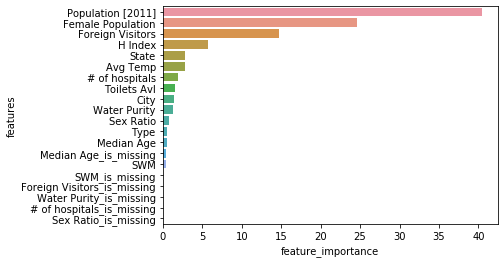

In [105]:
plot_features(X_train.columns, ideal_catboost_model.feature_importances_)

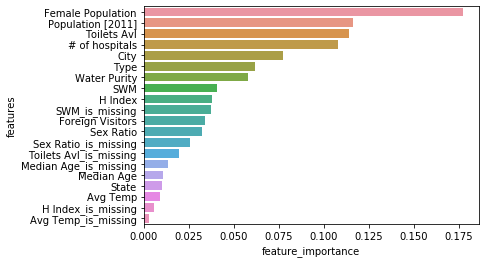

In [115]:
plot_features(X_train.columns, ideal_rf_model.feature_importances_)

From feature importance, it can be seen that the population plays a main role. We can use sex ratio and female population to find out the current population. By bringing up the current population feature, it will be of great importance.

In [118]:
df_temp

City  State  Type  Population [2011]  Sex Ratio  Median Age  Avg Temp  \
0     379     17    11         12442373.0      878.0        23.0      32.0   
1     136      7    11         11007835.0      858.0        27.0      30.0   
2      53     14    17          8436675.0      936.0        28.0      37.0   
3     211     29    17          6809970.0      930.0        23.0      31.0   
4       4      9    17          5570585.0      852.0        29.0      25.0   
..    ...    ...   ...                ...        ...         ...       ...   
782   317      9     7            36954.0      846.0        23.0      28.0   
783   381     33     7            36947.0      945.0        23.0      36.0   
784   329     23     7            36828.0     1019.0        28.0      28.0   
785   310      3     9            36805.0      900.0        24.0       6.0   
786   553     31     9            36776.0      889.0        25.0      37.0   

     SWM  Toilets Avl  Water Purity  ...  Toilets Avl_is_missing  \
0      3        219.0         150.0  ...                   False   
1      3        215.0         196.0  ...                   False   
2      1        212.0         102.0  ...                   False   
3      3        217.0         118.0  ...                   False   
4      2        227.0         109.0  ...                   False   
..   ...          ...           ...  ...                     ...   
782    3         68.0         103.0  ...                   False   
783    3         62.0         136.0  ...                   False   
784    1         98.0         138.0  ...                   False   
785    3         63.0         145.0  ...                   False   
786    1         51.0         181.0  ...                   False   

     Water Purity_is_missing  H Index_is_missing  \
0                      False               False   
1                      False               False   
2                      False               False   
3                      False               False   
4                      False               False   
..                       ...                 ...   
782                    False               False   
783                    False               False   
784                    False               False   
785                    False               False   
786                    False               False   

     Female Population_is_missing  # of hospitals_is_missing  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   
..                            ...                        ...   
782                         False                      False   
783                         False                      False   
784                         False                      False   
785                         False                      False   
786                         False                      False   

     Foreign Visitors_is_missing  City_is_missing  State_is_missing  \
0                          False            False             False   
1                          False            False             False   
2                          False            False             False   
3                          False            False             False   
4                          False            False             False   
..                           ...              ...               ...   
782                        False            False             False   
783                        False            False             False   
784                        False            False             False   
785                        False            False             False   
786                        False            False             False   

    

In [124]:
df_temp.head().T

0            1            2  \
City                                  379          136           53   
State                                  17            7           14   
Type                                   11           11           17   
Population [2011]             1.24424e+07  1.10078e+07  8.43668e+06   
Sex Ratio                             878          858          936   
Median Age                             23           27           28   
Avg Temp                               32           30           37   
SWM                                     3            3            1   
Toilets Avl                           219          215          212   
Water Purity                          150          196          102   
H Index                           0.70044     0.920018    0.0970853   
Female Population             1.09244e+07  9.44472e+06  7.89673e+06   
# of hospitals                        159          148          123   
Foreign Visitors              4.40892e+06  2.37917e+06       636502   
Covid Cases                        163115        80188       141000   
Population [2011]_is_missing        False        False        False   
Sex Ratio_is_missing                False        False        False   
Median Age_is_missing               False        False        False   
Avg Temp_is_missing                 False        False        False   
Toilets Avl_is_missing              False        False        False   
Water Purity_is_missing             False        False        False   
H Index_is_missing                  False        False        False   
Female Population_is_missing        False        False        False   
# of hospitals_is_missing           False        False        False   
Foreign Visitors_is_missing         False        False        False   
City_is_missing                     False        False        False   
State_is_missing                    False        False        False   
Type_is_missing                     False        False        False   
SWM_is_missing                      False        False        False   

                                        3            4  
City                                  211            4  
State                                  29            9  
Type                                   17           17  
Population [2011]             6.80997e+06  5.57058e+06  
Sex Ratio                             930          852  
Median Age                             23           29  
Avg Temp                               31           25  
SWM                                     3            2  
Toilets Avl                           217          227  
Water Purity                          118          109  
H Index                          0.827744     0.847941  
Female Population             6.33327e+06  4.74614e+06  
# of hospitals                        110           73  
Foreign Visitors                   126078       284973  
Covid Cases                         55123        33204  
Population [2011]_is_missing        False        False  
Sex Ratio_is_missing                False        False  
Median Age_is_missing               False        False  
Avg Temp_is_missing                 False        False  
Toilets Avl_is_missing              False        False  
Water Purity_is_missing             False        False  
H Index_is_missing                  False        False  
Female Population_is_missing        False        False  
# of hospitals_is_missing           False        False  
Foreign Visitors_is_missing         False        False  
City_is_missing                     False        False  
State_is_missing                    False        False  
Type_is_missing                     False        False  
SWM_is_missing                      False        False

In [141]:
df_temp["Current Population"] = float(0.0)

In [142]:
df_temp.head().T

0            1            2  \
City                                  379          136           53   
State                                  17            7           14   
Type                                   11           11           17   
Population [2011]             1.24424e+07  1.10078e+07  8.43668e+06   
Sex Ratio                             878          858          936   
Median Age                             23           27           28   
Avg Temp                               32           30           37   
SWM                                     3            3            1   
Toilets Avl                           219          215          212   
Water Purity                          150          196          102   
H Index                           0.70044     0.920018    0.0970853   
Female Population             1.09244e+07  9.44472e+06  7.89673e+06   
# of hospitals                        159          148          123   
Foreign Visitors              4.40892e+06  2.37917e+06       636502   
Covid Cases                        163115        80188       141000   
Population [2011]_is_missing        False        False        False   
Sex Ratio_is_missing                False        False        False   
Median Age_is_missing               False        False        False   
Avg Temp_is_missing                 False        False        False   
Toilets Avl_is_missing              False        False        False   
Water Purity_is_missing             False        False        False   
H Index_is_missing                  False        False        False   
Female Population_is_missing        False        False        False   
# of hospitals_is_missing           False        False        False   
Foreign Visitors_is_missing         False        False        False   
City_is_missing                     False        False        False   
State_is_missing                    False        False        False   
Type_is_missing                     False        False        False   
SWM_is_missing                      False        False        False   
Current Population                      0            0            0   

                                        3            4  
City                                  211            4  
State                                  29            9  
Type                                   17           17  
Population [2011]             6.80997e+06  5.57058e+06  
Sex Ratio                             930          852  
Median Age                             23           29  
Avg Temp                               31           25  
SWM                                     3            2  
Toilets Avl                           217          227  
Water Purity                          118          109  
H Index                          0.827744     0.847941  
Female Population             6.33327e+06  4.74614e+06  
# of hospitals                        110           73  
Foreign Visitors                   126078       284973  
Covid Cases                         55123        33204  
Population [2011]_is_missing        False        False  
Sex Ratio_is_missing                False        False  
Median Age_is_missing               False        False  
Avg Temp_is_missing                 False        False  
Toilets Avl_is_missing              False        False  
Water Purity_is_missing             False        False  
H Index_is_missing                  False        False  
Female Population_is_missing        False        False  
# of hospitals_is_missing           False        False  
Foreign Visitors_is_missing         False        False  
City_is_missing                     False        False  
State_is_missing                    False        False  
Type_is_missing                     False        False  
SWM_is_missing                      False        False  
Current Population                      0            0

In [150]:
count = 0
for i in range(len(df_temp)):
    count += 1
    df_temp["Current Population"][i] = float(df["Female Population"][i] + ((df["Female Population"][i]*1000)/df["Sex Ratio"][i]))
print(count)

787


In [153]:
df_temp.isna().sum()

City                            0
State                           0
Type                            0
Population [2011]               0
Sex Ratio                       0
Median Age                      0
Avg Temp                        0
SWM                             0
Toilets Avl                     0
Water Purity                    0
H Index                         0
Female Population               0
# of hospitals                  0
Foreign Visitors                0
Covid Cases                     0
Population [2011]_is_missing    0
Sex Ratio_is_missing            0
Median Age_is_missing           0
Avg Temp_is_missing             0
Toilets Avl_is_missing          0
Water Purity_is_missing         0
H Index_is_missing              0
Female Population_is_missing    0
# of hospitals_is_missing       0
Foreign Visitors_is_missing     0
City_is_missing                 0
State_is_missing                0
Type_is_missing                 0
SWM_is_missing                  0
Current Popula

In [152]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median since it's more robust than the mean
            df_temp[label] = content.fillna(content.median())

In [154]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(df_temp.drop("Covid Cases", axis=1), df_temp["Covid Cases"], test_size = 0.2)

In [155]:
models = {"Random Forest Regressor": RandomForestRegressor(),
          "SVR": SVR(),
          "Cat Boost Regressor": CatBoostRegressor()}

In [156]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          787 non-null    int16  
 1   State                         787 non-null    int8   
 2   Type                          787 non-null    int8   
 3   Population [2011]             787 non-null    float64
 4   Sex Ratio                     787 non-null    float64
 5   Median Age                    787 non-null    float64
 6   Avg Temp                      787 non-null    float64
 7   SWM                           787 non-null    int8   
 8   Toilets Avl                   787 non-null    float64
 9   Water Purity                  787 non-null    float64
 10  H Index                       787 non-null    float64
 11  Female Population             787 non-null    float64
 12  # of hospitals                787 non-null    float64
 13  Forei

In [157]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [158]:
rf_model.score(X_train1, y_train1)

0.931853275666481

In [159]:
rf_model.score(X_val1, y_val1)

0.5200704321063161

In [160]:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = GridSearchCV(RandomForestRegressor(),
                             param_grid=rf_grid,
                             cv=5,
                              n_jobs=-1,
                             verbose=True)

rs_model.fit(X_train1, y_train1)

Fitting 5 folds for each of 12960 candidates, totalling 64800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5608 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 7708 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 10008 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 12508 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 15208 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 18108 tasks    

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [161]:
rs_model.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 20}

In [162]:
ideal_rf_model = RandomForestRegressor(max_depth=10, max_features="sqrt", min_samples_leaf= 3, min_samples_split=12, n_estimators=20)
ideal_rf_model.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [163]:
ideal_rf_model.score(X_val1, y_val1)

0.495542165363564

In [164]:
cb_model = CatBoostRegressor(devices="GPU")
cb_model.fit(X_train1, y_train1)

Learning rate set to 0.035939
0:	learn: 16470.7251359	total: 11.3ms	remaining: 11.3s
1:	learn: 16310.0870480	total: 13.8ms	remaining: 6.9s
2:	learn: 16106.5852774	total: 15.8ms	remaining: 5.25s
3:	learn: 15823.0068855	total: 17.7ms	remaining: 4.4s
4:	learn: 15605.4242575	total: 25.2ms	remaining: 5.01s
5:	learn: 15378.9979336	total: 35.3ms	remaining: 5.85s
6:	learn: 15150.1876301	total: 37.5ms	remaining: 5.32s
7:	learn: 14927.9483409	total: 47.4ms	remaining: 5.88s
8:	learn: 14709.8787567	total: 49.5ms	remaining: 5.45s
9:	learn: 14507.5649543	total: 51.5ms	remaining: 5.1s
10:	learn: 14285.8411214	total: 53.3ms	remaining: 4.79s
11:	learn: 14050.4215691	total: 55.2ms	remaining: 4.54s
12:	learn: 13851.1572975	total: 57ms	remaining: 4.33s
13:	learn: 13678.3194646	total: 58.9ms	remaining: 4.15s
14:	learn: 13507.6950142	total: 60.7ms	remaining: 3.99s
15:	learn: 13349.2350216	total: 82.5ms	remaining: 5.08s
16:	learn: 13216.8034010	total: 84.8ms	remaining: 4.9s
17:	learn: 13056.7068449	total: 10

199:	learn: 2907.7256456	total: 525ms	remaining: 2.1s
200:	learn: 2893.4125172	total: 527ms	remaining: 2.09s
201:	learn: 2880.0776017	total: 529ms	remaining: 2.09s
202:	learn: 2865.2466911	total: 531ms	remaining: 2.08s
203:	learn: 2854.5311771	total: 533ms	remaining: 2.08s
204:	learn: 2845.8532073	total: 535ms	remaining: 2.08s
205:	learn: 2837.4541717	total: 538ms	remaining: 2.07s
206:	learn: 2824.1505426	total: 540ms	remaining: 2.07s
207:	learn: 2812.3339563	total: 542ms	remaining: 2.06s
208:	learn: 2800.8846896	total: 544ms	remaining: 2.06s
209:	learn: 2788.0083467	total: 546ms	remaining: 2.05s
210:	learn: 2771.1758950	total: 548ms	remaining: 2.05s
211:	learn: 2760.6537224	total: 549ms	remaining: 2.04s
212:	learn: 2746.5371885	total: 551ms	remaining: 2.03s
213:	learn: 2737.4052684	total: 552ms	remaining: 2.03s
214:	learn: 2725.3710548	total: 554ms	remaining: 2.02s
215:	learn: 2712.0540384	total: 556ms	remaining: 2.02s
216:	learn: 2699.0029762	total: 558ms	remaining: 2.01s
217:	learn:

354:	learn: 1657.8783644	total: 847ms	remaining: 1.54s
355:	learn: 1652.9185588	total: 849ms	remaining: 1.53s
356:	learn: 1649.9833366	total: 851ms	remaining: 1.53s
357:	learn: 1647.3470319	total: 853ms	remaining: 1.53s
358:	learn: 1644.9716070	total: 865ms	remaining: 1.54s
359:	learn: 1640.5895247	total: 867ms	remaining: 1.54s
360:	learn: 1637.4815205	total: 868ms	remaining: 1.54s
361:	learn: 1631.3095901	total: 871ms	remaining: 1.53s
362:	learn: 1627.6683792	total: 873ms	remaining: 1.53s
363:	learn: 1625.4169935	total: 875ms	remaining: 1.53s
364:	learn: 1621.0484585	total: 877ms	remaining: 1.52s
365:	learn: 1618.2308644	total: 879ms	remaining: 1.52s
366:	learn: 1612.7746136	total: 881ms	remaining: 1.52s
367:	learn: 1608.2181191	total: 883ms	remaining: 1.52s
368:	learn: 1604.1584100	total: 885ms	remaining: 1.51s
369:	learn: 1600.4583487	total: 888ms	remaining: 1.51s
370:	learn: 1594.7212432	total: 890ms	remaining: 1.51s
371:	learn: 1588.2721734	total: 892ms	remaining: 1.5s
372:	learn:

578:	learn: 961.3398263	total: 1.34s	remaining: 972ms
579:	learn: 960.4530623	total: 1.34s	remaining: 970ms
580:	learn: 958.0384105	total: 1.34s	remaining: 967ms
581:	learn: 955.8852981	total: 1.34s	remaining: 964ms
582:	learn: 954.2544032	total: 1.34s	remaining: 962ms
583:	learn: 953.2247677	total: 1.35s	remaining: 959ms
584:	learn: 952.1666647	total: 1.35s	remaining: 957ms
585:	learn: 948.9752838	total: 1.35s	remaining: 955ms
586:	learn: 947.9452903	total: 1.35s	remaining: 952ms
587:	learn: 945.3316367	total: 1.35s	remaining: 950ms
588:	learn: 943.2380781	total: 1.36s	remaining: 947ms
589:	learn: 939.8318069	total: 1.36s	remaining: 945ms
590:	learn: 938.0923141	total: 1.36s	remaining: 942ms
591:	learn: 935.7777109	total: 1.36s	remaining: 939ms
592:	learn: 934.7028229	total: 1.36s	remaining: 937ms
593:	learn: 933.5310401	total: 1.37s	remaining: 934ms
594:	learn: 931.7379689	total: 1.37s	remaining: 931ms
595:	learn: 930.2221381	total: 1.37s	remaining: 929ms
596:	learn: 927.5737357	tota

787:	learn: 646.9755270	total: 1.81s	remaining: 488ms
788:	learn: 645.1084127	total: 1.81s	remaining: 485ms
789:	learn: 644.4599787	total: 1.82s	remaining: 483ms
790:	learn: 643.8113249	total: 1.82s	remaining: 481ms
791:	learn: 642.3115198	total: 1.82s	remaining: 478ms
792:	learn: 641.1849863	total: 1.82s	remaining: 476ms
793:	learn: 639.6060254	total: 1.83s	remaining: 474ms
794:	learn: 639.0101283	total: 1.83s	remaining: 472ms
795:	learn: 637.8683233	total: 1.83s	remaining: 469ms
796:	learn: 636.7439781	total: 1.83s	remaining: 467ms
797:	learn: 635.7084042	total: 1.83s	remaining: 465ms
798:	learn: 634.8673989	total: 1.84s	remaining: 462ms
799:	learn: 633.4878494	total: 1.84s	remaining: 460ms
800:	learn: 632.6508248	total: 1.84s	remaining: 457ms
801:	learn: 631.5617965	total: 1.84s	remaining: 455ms
802:	learn: 629.8163880	total: 1.84s	remaining: 453ms
803:	learn: 628.6817092	total: 1.85s	remaining: 450ms
804:	learn: 628.1054968	total: 1.85s	remaining: 448ms
805:	learn: 627.0409764	tota

989:	learn: 467.6224478	total: 2.3s	remaining: 23.3ms
990:	learn: 467.0291246	total: 2.3s	remaining: 20.9ms
991:	learn: 466.3127802	total: 2.33s	remaining: 18.8ms
992:	learn: 465.7916635	total: 2.34s	remaining: 16.5ms
993:	learn: 464.4338766	total: 2.34s	remaining: 14.1ms
994:	learn: 463.2746986	total: 2.34s	remaining: 11.8ms
995:	learn: 463.2109343	total: 2.34s	remaining: 9.41ms
996:	learn: 462.7192853	total: 2.34s	remaining: 7.05ms
997:	learn: 461.7188178	total: 2.35s	remaining: 4.7ms
998:	learn: 461.1176163	total: 2.35s	remaining: 2.35ms
999:	learn: 460.2209601	total: 2.35s	remaining: 0us


In [165]:
cb_model.score(X_val1, y_val1)

0.6407301310721527

In [166]:
gs_catboost_model = RandomizedSearchCV(
                                CatBoostRegressor(task_type="GPU"),
                                param_distributions=parameters,
                                cv = 5,
                                verbose=True)
gs_catboost_model.fit(X_train, y_train)

print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",gs_catboost_model.best_estimator_)
print("\n The best score across ALL searched params:\n",gs_catboost_model.best_score_)
print("\n The best parameters across ALL searched params:\n",gs_catboost_model.best_params_)
print("\n ========================================================")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 18282.0754846	total: 154ms	remaining: 15.3s
1:	learn: 18214.0397730	total: 158ms	remaining: 7.74s
2:	learn: 18157.8113008	total: 162ms	remaining: 5.24s
3:	learn: 18088.5204223	total: 166ms	remaining: 3.98s
4:	learn: 18030.7841695	total: 169ms	remaining: 3.22s
5:	learn: 17966.4792291	total: 173ms	remaining: 2.71s
6:	learn: 17903.7099488	total: 176ms	remaining: 2.34s
7:	learn: 17834.6911196	total: 180ms	remaining: 2.07s
8:	learn: 17760.6071144	total: 184ms	remaining: 1.85s
9:	learn: 17703.9256048	total: 188ms	remaining: 1.69s
10:	learn: 17639.1030927	total: 192ms	remaining: 1.56s
11:	learn: 17566.4425575	total: 197ms	remaining: 1.44s
12:	learn: 17494.9380958	total: 202ms	remaining: 1.35s
13:	learn: 17434.9532888	total: 205ms	remaining: 1.26s
14:	learn: 17388.5181596	total: 209ms	remaining: 1.18s
15:	learn: 17334.1208577	total: 212ms	remaining: 1.11s
16:	learn: 17274.2055228	total: 216ms	remaining: 1.06s
17:	learn: 17215.2188254	total: 220ms	remaining: 1s
18:	learn: 17154.965115

83:	learn: 13644.4733347	total: 349ms	remaining: 66.5ms
84:	learn: 13599.9767232	total: 353ms	remaining: 62.3ms
85:	learn: 13550.7388608	total: 357ms	remaining: 58.1ms
86:	learn: 13502.0041679	total: 361ms	remaining: 53.9ms
87:	learn: 13457.3620319	total: 366ms	remaining: 50ms
88:	learn: 13419.8645722	total: 371ms	remaining: 45.9ms
89:	learn: 13387.8353757	total: 375ms	remaining: 41.7ms
90:	learn: 13346.8337643	total: 379ms	remaining: 37.5ms
91:	learn: 13299.6278338	total: 383ms	remaining: 33.3ms
92:	learn: 13256.7662817	total: 389ms	remaining: 29.3ms
93:	learn: 13205.1919472	total: 393ms	remaining: 25.1ms
94:	learn: 13161.4128351	total: 397ms	remaining: 20.9ms
95:	learn: 13113.9946106	total: 400ms	remaining: 16.7ms
96:	learn: 13078.6583878	total: 405ms	remaining: 12.5ms
97:	learn: 13024.7428435	total: 409ms	remaining: 8.34ms
98:	learn: 12995.1388544	total: 413ms	remaining: 4.17ms
99:	learn: 12963.9780459	total: 417ms	remaining: 0us
0:	learn: 9384.1327744	total: 5.69ms	remaining: 563ms

44:	learn: 14638.8344005	total: 185ms	remaining: 227ms
45:	learn: 14588.8823707	total: 189ms	remaining: 222ms
46:	learn: 14530.7885676	total: 193ms	remaining: 217ms
47:	learn: 14474.4498925	total: 198ms	remaining: 214ms
48:	learn: 14436.1861394	total: 202ms	remaining: 210ms
49:	learn: 14394.9585697	total: 206ms	remaining: 206ms
50:	learn: 14345.6695592	total: 210ms	remaining: 202ms
51:	learn: 14303.0908842	total: 215ms	remaining: 198ms
52:	learn: 14244.1070763	total: 219ms	remaining: 194ms
53:	learn: 14202.7938091	total: 223ms	remaining: 190ms
54:	learn: 14160.1403369	total: 227ms	remaining: 186ms
55:	learn: 14125.1832410	total: 231ms	remaining: 182ms
56:	learn: 14072.5506410	total: 235ms	remaining: 178ms
57:	learn: 14028.8882527	total: 240ms	remaining: 173ms
58:	learn: 13984.7366862	total: 244ms	remaining: 169ms
59:	learn: 13939.9884823	total: 248ms	remaining: 165ms
60:	learn: 13882.6811374	total: 252ms	remaining: 161ms
61:	learn: 13839.7459842	total: 255ms	remaining: 156ms
62:	learn:

0:	learn: 18282.0754846	total: 6.01ms	remaining: 595ms
1:	learn: 18211.7613085	total: 9.07ms	remaining: 444ms
2:	learn: 18155.5410295	total: 13.6ms	remaining: 441ms
3:	learn: 18090.7477898	total: 19ms	remaining: 455ms
4:	learn: 18029.7770190	total: 22.5ms	remaining: 427ms
5:	learn: 17971.2539395	total: 27.1ms	remaining: 424ms
6:	learn: 17914.5061729	total: 30.7ms	remaining: 407ms
7:	learn: 17847.7877037	total: 34.1ms	remaining: 393ms
8:	learn: 17786.4803716	total: 38.7ms	remaining: 391ms
9:	learn: 17722.5121305	total: 45.1ms	remaining: 406ms
10:	learn: 17666.3730794	total: 49.1ms	remaining: 397ms
11:	learn: 17612.1626220	total: 53.1ms	remaining: 389ms
12:	learn: 17547.6786582	total: 56.6ms	remaining: 379ms
13:	learn: 17497.5202606	total: 60.6ms	remaining: 372ms
14:	learn: 17452.2594881	total: 64.1ms	remaining: 363ms
15:	learn: 17388.7916479	total: 67.6ms	remaining: 355ms
16:	learn: 17332.2341375	total: 88ms	remaining: 430ms
17:	learn: 17259.5990020	total: 92.1ms	remaining: 419ms
18:	le

78:	learn: 13984.3232558	total: 361ms	remaining: 95.9ms
79:	learn: 13935.4716331	total: 365ms	remaining: 91.3ms
80:	learn: 13882.0534951	total: 370ms	remaining: 86.9ms
81:	learn: 13842.5658408	total: 375ms	remaining: 82.4ms
82:	learn: 13798.2182087	total: 380ms	remaining: 77.8ms
83:	learn: 13760.4323017	total: 385ms	remaining: 73.2ms
84:	learn: 13719.4550651	total: 390ms	remaining: 68.7ms
85:	learn: 13674.5456160	total: 394ms	remaining: 64.2ms
86:	learn: 13618.3157966	total: 399ms	remaining: 59.6ms
87:	learn: 13573.4616713	total: 403ms	remaining: 55ms
88:	learn: 13530.3734246	total: 408ms	remaining: 50.4ms
89:	learn: 13482.3509203	total: 412ms	remaining: 45.8ms
90:	learn: 13437.6137993	total: 416ms	remaining: 41.2ms
91:	learn: 13388.7872520	total: 421ms	remaining: 36.6ms
92:	learn: 13350.5750925	total: 428ms	remaining: 32.2ms
93:	learn: 13302.1477535	total: 433ms	remaining: 27.6ms
94:	learn: 13262.8338117	total: 440ms	remaining: 23.1ms
95:	learn: 13225.2108906	total: 444ms	remaining: 1

37:	learn: 15119.4362608	total: 184ms	remaining: 300ms
38:	learn: 15063.4811836	total: 188ms	remaining: 293ms
39:	learn: 15013.5540427	total: 194ms	remaining: 291ms
40:	learn: 14962.4262967	total: 198ms	remaining: 285ms
41:	learn: 14913.5117451	total: 202ms	remaining: 279ms
42:	learn: 14874.3770645	total: 208ms	remaining: 275ms
43:	learn: 14807.6825625	total: 211ms	remaining: 269ms
44:	learn: 14759.1186319	total: 216ms	remaining: 264ms
45:	learn: 14700.8406387	total: 220ms	remaining: 258ms
46:	learn: 14659.7891045	total: 224ms	remaining: 252ms
47:	learn: 14609.0247028	total: 227ms	remaining: 246ms
48:	learn: 14569.7568253	total: 233ms	remaining: 243ms
49:	learn: 14517.3163264	total: 236ms	remaining: 236ms
50:	learn: 14466.0198804	total: 240ms	remaining: 231ms
51:	learn: 14428.9065641	total: 244ms	remaining: 226ms
52:	learn: 14377.3467940	total: 253ms	remaining: 224ms
53:	learn: 14328.0301618	total: 257ms	remaining: 219ms
54:	learn: 14279.1055068	total: 261ms	remaining: 213ms
55:	learn:

0:	learn: 17858.0450171	total: 141ms	remaining: 2m 21s
1:	learn: 17569.9300544	total: 150ms	remaining: 1m 14s
2:	learn: 17094.3475452	total: 183ms	remaining: 1m
3:	learn: 16684.6090537	total: 245ms	remaining: 1m
4:	learn: 16373.3524050	total: 286ms	remaining: 57s
5:	learn: 16030.0489839	total: 296ms	remaining: 49.1s
6:	learn: 15605.2187142	total: 329ms	remaining: 46.7s
7:	learn: 15331.6631922	total: 448ms	remaining: 55.5s
8:	learn: 15111.5929292	total: 458ms	remaining: 50.4s
9:	learn: 14809.8953025	total: 520ms	remaining: 51.5s
10:	learn: 14498.0710979	total: 530ms	remaining: 47.6s
11:	learn: 14265.5582642	total: 541ms	remaining: 44.5s
12:	learn: 13895.8697275	total: 603ms	remaining: 45.8s
13:	learn: 13666.9104131	total: 634ms	remaining: 44.7s
14:	learn: 13444.2605384	total: 696ms	remaining: 45.7s
15:	learn: 13075.5342891	total: 757ms	remaining: 46.6s
16:	learn: 12834.0661589	total: 818ms	remaining: 47.3s
17:	learn: 12614.4767452	total: 879ms	remaining: 48s
18:	learn: 12399.3575823	tot

157:	learn: 4097.8558172	total: 7.73s	remaining: 41.2s
158:	learn: 4097.8193027	total: 7.75s	remaining: 41s
159:	learn: 4093.8432443	total: 7.77s	remaining: 40.8s
160:	learn: 4093.8091805	total: 7.78s	remaining: 40.6s
161:	learn: 4093.4054904	total: 7.8s	remaining: 40.3s
162:	learn: 4088.2092907	total: 7.86s	remaining: 40.3s
163:	learn: 4084.2901703	total: 7.88s	remaining: 40.2s
164:	learn: 4079.1909072	total: 7.94s	remaining: 40.2s
165:	learn: 4062.4659837	total: 8s	remaining: 40.2s
166:	learn: 4062.2731730	total: 8.01s	remaining: 40s
167:	learn: 4062.0210896	total: 8.02s	remaining: 39.7s
168:	learn: 4061.8597079	total: 8.05s	remaining: 39.6s
169:	learn: 4033.8923263	total: 8.11s	remaining: 39.6s
170:	learn: 4033.5355087	total: 8.12s	remaining: 39.4s
171:	learn: 4022.6758292	total: 8.19s	remaining: 39.4s
172:	learn: 4007.3588294	total: 8.23s	remaining: 39.4s
173:	learn: 4007.2769116	total: 8.24s	remaining: 39.1s
174:	learn: 4005.9517709	total: 8.31s	remaining: 39.2s
175:	learn: 4001.8

309:	learn: 3476.2209412	total: 14.5s	remaining: 32.3s
310:	learn: 3474.8486816	total: 14.6s	remaining: 32.3s
311:	learn: 3470.0939331	total: 14.6s	remaining: 32.3s
312:	learn: 3469.7284211	total: 14.7s	remaining: 32.2s
313:	learn: 3465.5434098	total: 14.8s	remaining: 32.2s
314:	learn: 3438.8181982	total: 14.8s	remaining: 32.2s
315:	learn: 3438.6451814	total: 14.9s	remaining: 32.2s
316:	learn: 3437.4039120	total: 14.9s	remaining: 32.2s
317:	learn: 3437.2361545	total: 15s	remaining: 32.2s
318:	learn: 3436.8388638	total: 15.1s	remaining: 32.1s
319:	learn: 3436.4138319	total: 15.1s	remaining: 32.1s
320:	learn: 3428.8030822	total: 15.2s	remaining: 32.1s
321:	learn: 3428.6362398	total: 15.2s	remaining: 32.1s
322:	learn: 3428.2701676	total: 15.3s	remaining: 32.1s
323:	learn: 3424.4900339	total: 15.4s	remaining: 32.1s
324:	learn: 3416.7532238	total: 15.4s	remaining: 32.1s
325:	learn: 3416.5840055	total: 15.5s	remaining: 32s
326:	learn: 3416.3231604	total: 15.6s	remaining: 32s
327:	learn: 3415

461:	learn: 3238.6258873	total: 22.6s	remaining: 26.4s
462:	learn: 3238.5132097	total: 22.7s	remaining: 26.3s
463:	learn: 3238.4659059	total: 22.7s	remaining: 26.3s
464:	learn: 3238.1206144	total: 22.8s	remaining: 26.2s
465:	learn: 3235.7819732	total: 22.9s	remaining: 26.2s
466:	learn: 3235.7384044	total: 22.9s	remaining: 26.2s
467:	learn: 3235.6960934	total: 23s	remaining: 26.1s
468:	learn: 3235.2941896	total: 23s	remaining: 26.1s
469:	learn: 3235.0262784	total: 23.1s	remaining: 26s
470:	learn: 3233.2019103	total: 23.2s	remaining: 26s
471:	learn: 3233.1619272	total: 23.2s	remaining: 26s
472:	learn: 3233.1230456	total: 23.3s	remaining: 25.9s
473:	learn: 3232.7586063	total: 23.3s	remaining: 25.9s
474:	learn: 3232.6348608	total: 23.4s	remaining: 25.8s
475:	learn: 3232.2961894	total: 23.4s	remaining: 25.8s
476:	learn: 3232.1762053	total: 23.5s	remaining: 25.8s
477:	learn: 3230.4794171	total: 23.6s	remaining: 25.7s
478:	learn: 3230.2972898	total: 23.6s	remaining: 25.7s
479:	learn: 3230.261

612:	learn: 3011.3272914	total: 29.9s	remaining: 18.8s
613:	learn: 3011.2225029	total: 29.9s	remaining: 18.8s
614:	learn: 3011.1288663	total: 29.9s	remaining: 18.7s
615:	learn: 3011.0771452	total: 29.9s	remaining: 18.7s
616:	learn: 3011.0277896	total: 30s	remaining: 18.6s
617:	learn: 3010.9451341	total: 30s	remaining: 18.6s
618:	learn: 3010.8677164	total: 30s	remaining: 18.5s
619:	learn: 3010.8242737	total: 30.1s	remaining: 18.4s
620:	learn: 3010.7502338	total: 30.1s	remaining: 18.4s
621:	learn: 3010.7025633	total: 30.2s	remaining: 18.3s
622:	learn: 3010.5573495	total: 30.2s	remaining: 18.3s
623:	learn: 3010.4871913	total: 30.2s	remaining: 18.2s
624:	learn: 3010.4195675	total: 30.3s	remaining: 18.2s
625:	learn: 3010.3735824	total: 30.3s	remaining: 18.1s
626:	learn: 3010.3296254	total: 30.4s	remaining: 18.1s
627:	learn: 3010.2515156	total: 30.4s	remaining: 18s
628:	learn: 3010.2089094	total: 30.5s	remaining: 18s
629:	learn: 3010.1695150	total: 30.5s	remaining: 17.9s
630:	learn: 3010.040

767:	learn: 3005.2135480	total: 34.8s	remaining: 10.5s
768:	learn: 3005.1910238	total: 34.8s	remaining: 10.5s
769:	learn: 3005.1691768	total: 34.8s	remaining: 10.4s
770:	learn: 3005.1666365	total: 34.9s	remaining: 10.4s
771:	learn: 3005.1454668	total: 34.9s	remaining: 10.3s
772:	learn: 3005.1430957	total: 34.9s	remaining: 10.3s
773:	learn: 3005.1222646	total: 34.9s	remaining: 10.2s
774:	learn: 3005.1198935	total: 35s	remaining: 10.2s
775:	learn: 3005.0416483	total: 35s	remaining: 10.1s
776:	learn: 3005.0392772	total: 35s	remaining: 10s
777:	learn: 3005.0372449	total: 35s	remaining: 9.99s
778:	learn: 3005.0175985	total: 35.1s	remaining: 9.95s
779:	learn: 3005.0155661	total: 35.1s	remaining: 9.89s
780:	learn: 3005.0101464	total: 35.1s	remaining: 9.84s
781:	learn: 3004.9906693	total: 35.1s	remaining: 9.79s
782:	learn: 3004.9891450	total: 35.1s	remaining: 9.74s
783:	learn: 3004.9701758	total: 35.2s	remaining: 9.69s
784:	learn: 3004.9518840	total: 35.2s	remaining: 9.64s
785:	learn: 3004.950

917:	learn: 2999.8357967	total: 38.3s	remaining: 3.42s
918:	learn: 2999.6464523	total: 38.4s	remaining: 3.38s
919:	learn: 2999.6459433	total: 38.4s	remaining: 3.34s
920:	learn: 2999.6456040	total: 38.4s	remaining: 3.29s
921:	learn: 2999.6452646	total: 38.4s	remaining: 3.25s
922:	learn: 2999.4202753	total: 38.5s	remaining: 3.21s
923:	learn: 2999.4184088	total: 38.5s	remaining: 3.17s
924:	learn: 2999.4178998	total: 38.5s	remaining: 3.12s
925:	learn: 2999.4160333	total: 38.6s	remaining: 3.08s
926:	learn: 2999.4139971	total: 38.6s	remaining: 3.04s
927:	learn: 2999.4123003	total: 38.6s	remaining: 2.99s
928:	learn: 2999.4106035	total: 38.6s	remaining: 2.95s
929:	learn: 2999.4104338	total: 38.6s	remaining: 2.91s
930:	learn: 2999.4087370	total: 38.6s	remaining: 2.86s
931:	learn: 2999.4073795	total: 38.6s	remaining: 2.82s
932:	learn: 2999.4056827	total: 38.7s	remaining: 2.78s
933:	learn: 2999.4046646	total: 38.7s	remaining: 2.73s
934:	learn: 2999.4033071	total: 38.7s	remaining: 2.69s
935:	learn

71:	learn: 5718.4028356	total: 3.63s	remaining: 46.7s
72:	learn: 5692.5009915	total: 3.65s	remaining: 46.3s
73:	learn: 5644.3544236	total: 3.71s	remaining: 46.4s
74:	learn: 5601.9211246	total: 3.77s	remaining: 46.5s
75:	learn: 5544.4340310	total: 3.8s	remaining: 46.2s
76:	learn: 5496.9912378	total: 3.82s	remaining: 45.8s
77:	learn: 5437.5727950	total: 3.83s	remaining: 45.3s
78:	learn: 5403.0720427	total: 3.87s	remaining: 45.1s
79:	learn: 5366.8049737	total: 3.89s	remaining: 44.7s
80:	learn: 5345.9251541	total: 3.95s	remaining: 44.8s
81:	learn: 5294.1584493	total: 4.01s	remaining: 44.9s
82:	learn: 5223.9641598	total: 4.07s	remaining: 45s
83:	learn: 5182.6673790	total: 4.09s	remaining: 44.6s
84:	learn: 5164.7302559	total: 4.15s	remaining: 44.7s
85:	learn: 5138.3436803	total: 4.16s	remaining: 44.3s
86:	learn: 5128.1557309	total: 4.22s	remaining: 44.3s
87:	learn: 5082.1856071	total: 4.29s	remaining: 44.4s
88:	learn: 5048.4830247	total: 4.35s	remaining: 44.5s
89:	learn: 5018.4353830	total: 

224:	learn: 3485.2266867	total: 11.5s	remaining: 39.7s
225:	learn: 3485.0190264	total: 11.5s	remaining: 39.5s
226:	learn: 3484.1886996	total: 11.6s	remaining: 39.3s
227:	learn: 3480.0058682	total: 11.6s	remaining: 39.2s
228:	learn: 3464.8319517	total: 11.6s	remaining: 39.2s
229:	learn: 3464.7231051	total: 11.6s	remaining: 39s
230:	learn: 3448.0721971	total: 11.7s	remaining: 39s
231:	learn: 3444.0352494	total: 11.7s	remaining: 38.9s
232:	learn: 3443.1467045	total: 11.8s	remaining: 38.7s
233:	learn: 3437.3064863	total: 11.8s	remaining: 38.7s
234:	learn: 3434.4310371	total: 11.9s	remaining: 38.7s
235:	learn: 3424.3017277	total: 11.9s	remaining: 38.6s
236:	learn: 3424.2030374	total: 11.9s	remaining: 38.5s
237:	learn: 3424.0865079	total: 12s	remaining: 38.4s
238:	learn: 3414.3516539	total: 12.1s	remaining: 38.4s
239:	learn: 3413.5780893	total: 12.1s	remaining: 38.4s
240:	learn: 3410.7611249	total: 12.2s	remaining: 38.3s
241:	learn: 3410.6305568	total: 12.2s	remaining: 38.2s
242:	learn: 3410

378:	learn: 3162.0570399	total: 17.4s	remaining: 28.5s
379:	learn: 3160.9409476	total: 17.5s	remaining: 28.5s
380:	learn: 3159.4507613	total: 17.5s	remaining: 28.5s
381:	learn: 3155.9832336	total: 17.6s	remaining: 28.4s
382:	learn: 3155.7864855	total: 17.6s	remaining: 28.4s
383:	learn: 3155.5552101	total: 17.7s	remaining: 28.4s
384:	learn: 3155.3379506	total: 17.7s	remaining: 28.3s
385:	learn: 3153.7967046	total: 17.8s	remaining: 28.3s
386:	learn: 3153.5875547	total: 17.9s	remaining: 28.3s
387:	learn: 3147.4196266	total: 17.9s	remaining: 28.3s
388:	learn: 3147.2056867	total: 18s	remaining: 28.2s
389:	learn: 3147.0329717	total: 18s	remaining: 28.2s
390:	learn: 3146.8434271	total: 18.1s	remaining: 28.1s
391:	learn: 3146.4089841	total: 18.1s	remaining: 28.1s
392:	learn: 3145.0111133	total: 18.2s	remaining: 28.1s
393:	learn: 3144.7942582	total: 18.3s	remaining: 28.1s
394:	learn: 3143.4413275	total: 18.3s	remaining: 28.1s
395:	learn: 3143.2753681	total: 18.4s	remaining: 28s
396:	learn: 3143

532:	learn: 2876.2929090	total: 26.2s	remaining: 22.9s
533:	learn: 2876.1781578	total: 26.2s	remaining: 22.9s
534:	learn: 2875.8102504	total: 26.3s	remaining: 22.8s
535:	learn: 2875.7037980	total: 26.3s	remaining: 22.8s
536:	learn: 2875.6019434	total: 26.3s	remaining: 22.7s
537:	learn: 2874.9852519	total: 26.4s	remaining: 22.6s
538:	learn: 2874.8857618	total: 26.4s	remaining: 22.6s
539:	learn: 2874.7900745	total: 26.4s	remaining: 22.5s
540:	learn: 2874.6984560	total: 26.5s	remaining: 22.5s
541:	learn: 2874.4784712	total: 26.5s	remaining: 22.4s
542:	learn: 2872.3545969	total: 26.6s	remaining: 22.4s
543:	learn: 2872.2640525	total: 26.6s	remaining: 22.3s
544:	learn: 2872.1770492	total: 26.6s	remaining: 22.2s
545:	learn: 2872.0935874	total: 26.7s	remaining: 22.2s
546:	learn: 2872.0136673	total: 26.7s	remaining: 22.1s
547:	learn: 2871.9367576	total: 26.7s	remaining: 22s
548:	learn: 2871.8629472	total: 26.8s	remaining: 22s
549:	learn: 2871.6347697	total: 26.8s	remaining: 21.9s
550:	learn: 28

682:	learn: 2306.9958433	total: 33.8s	remaining: 15.7s
683:	learn: 2305.6830610	total: 33.8s	remaining: 15.6s
684:	learn: 2298.4390589	total: 33.9s	remaining: 15.6s
685:	learn: 2293.7616565	total: 34s	remaining: 15.5s
686:	learn: 2293.7097353	total: 34s	remaining: 15.5s
687:	learn: 2293.2625877	total: 34.1s	remaining: 15.5s
688:	learn: 2289.1053788	total: 34.2s	remaining: 15.4s
689:	learn: 2287.8007949	total: 34.2s	remaining: 15.4s
690:	learn: 2287.7430656	total: 34.2s	remaining: 15.3s
691:	learn: 2287.3177812	total: 34.3s	remaining: 15.2s
692:	learn: 2285.3982900	total: 34.3s	remaining: 15.2s
693:	learn: 2280.3587176	total: 34.4s	remaining: 15.2s
694:	learn: 2275.1420046	total: 34.4s	remaining: 15.1s
695:	learn: 2272.0817615	total: 34.5s	remaining: 15.1s
696:	learn: 2268.1327937	total: 34.6s	remaining: 15s
697:	learn: 2267.9546210	total: 34.6s	remaining: 15s
698:	learn: 2267.8897663	total: 34.7s	remaining: 14.9s
699:	learn: 2267.8415168	total: 34.7s	remaining: 14.9s
700:	learn: 2267.7

836:	learn: 2125.3052790	total: 42.3s	remaining: 8.24s
837:	learn: 2123.4335974	total: 42.4s	remaining: 8.19s
838:	learn: 2123.3711596	total: 42.4s	remaining: 8.14s
839:	learn: 2123.3114765	total: 42.5s	remaining: 8.1s
840:	learn: 2123.2413647	total: 42.5s	remaining: 8.04s
841:	learn: 2123.0898673	total: 42.6s	remaining: 7.98s
842:	learn: 2123.0599021	total: 42.6s	remaining: 7.94s
843:	learn: 2122.9287696	total: 42.6s	remaining: 7.88s
844:	learn: 2121.1534879	total: 42.7s	remaining: 7.83s
845:	learn: 2121.1234954	total: 42.7s	remaining: 7.78s
846:	learn: 2121.0803054	total: 42.8s	remaining: 7.73s
847:	learn: 2121.0524714	total: 42.9s	remaining: 7.68s
848:	learn: 2119.3114002	total: 42.9s	remaining: 7.63s
849:	learn: 2119.2938694	total: 43s	remaining: 7.58s
850:	learn: 2119.2392348	total: 43s	remaining: 7.53s
851:	learn: 2119.1197542	total: 43s	remaining: 7.48s
852:	learn: 2119.0659558	total: 43.1s	remaining: 7.43s
853:	learn: 2117.3886314	total: 43.2s	remaining: 7.38s
854:	learn: 2117.

986:	learn: 2030.9147554	total: 49.9s	remaining: 658ms
987:	learn: 2029.0586561	total: 50s	remaining: 607ms
988:	learn: 2029.0459892	total: 50s	remaining: 557ms
989:	learn: 2029.0367712	total: 50.1s	remaining: 506ms
990:	learn: 2028.8459421	total: 50.2s	remaining: 455ms
991:	learn: 2028.2662586	total: 50.2s	remaining: 405ms
992:	learn: 2027.6791932	total: 50.3s	remaining: 354ms
993:	learn: 2027.6702827	total: 50.3s	remaining: 304ms
994:	learn: 2027.6622507	total: 50.4s	remaining: 253ms
995:	learn: 2027.6563521	total: 50.4s	remaining: 202ms
996:	learn: 2027.6487593	total: 50.4s	remaining: 152ms
997:	learn: 2026.9870069	total: 50.5s	remaining: 101ms
998:	learn: 2026.9794743	total: 50.5s	remaining: 50.6ms
999:	learn: 2026.9740132	total: 50.5s	remaining: 0us
0:	learn: 9314.9072955	total: 10.8ms	remaining: 10.8s
1:	learn: 9151.3170789	total: 43.3ms	remaining: 21.6s
2:	learn: 8984.7424353	total: 64.7ms	remaining: 21.5s
3:	learn: 8859.1449623	total: 126ms	remaining: 31.4s
4:	learn: 8767.05728

147:	learn: 4755.1441560	total: 3.96s	remaining: 22.8s
148:	learn: 4751.1656596	total: 3.97s	remaining: 22.7s
149:	learn: 4747.3182686	total: 3.98s	remaining: 22.6s
150:	learn: 4742.7426077	total: 4s	remaining: 22.5s
151:	learn: 4738.7880676	total: 4.01s	remaining: 22.4s
152:	learn: 4734.9325539	total: 4.04s	remaining: 22.3s
153:	learn: 4730.1624332	total: 4.06s	remaining: 22.3s
154:	learn: 4725.7907262	total: 4.07s	remaining: 22.2s
155:	learn: 4721.9782760	total: 4.09s	remaining: 22.1s
156:	learn: 4717.7183015	total: 4.09s	remaining: 22s
157:	learn: 4713.9612953	total: 4.16s	remaining: 22.2s
158:	learn: 4710.3793586	total: 4.17s	remaining: 22.1s
159:	learn: 4706.1666343	total: 4.18s	remaining: 21.9s
160:	learn: 4703.9573712	total: 4.19s	remaining: 21.8s
161:	learn: 4701.8353982	total: 4.2s	remaining: 21.7s
162:	learn: 4697.9105579	total: 4.21s	remaining: 21.6s
163:	learn: 4694.1251215	total: 4.22s	remaining: 21.5s
164:	learn: 4693.9295242	total: 4.23s	remaining: 21.4s
165:	learn: 4693

300:	learn: 4077.3147363	total: 6.38s	remaining: 14.8s
301:	learn: 4076.0194827	total: 6.39s	remaining: 14.8s
302:	learn: 4074.5665610	total: 6.4s	remaining: 14.7s
303:	learn: 4073.2875512	total: 6.42s	remaining: 14.7s
304:	learn: 4072.0442607	total: 6.43s	remaining: 14.6s
305:	learn: 4070.5929209	total: 6.44s	remaining: 14.6s
306:	learn: 4069.3606886	total: 6.45s	remaining: 14.6s
307:	learn: 4068.1383416	total: 6.46s	remaining: 14.5s
308:	learn: 4066.9739436	total: 6.47s	remaining: 14.5s
309:	learn: 4065.5062721	total: 6.49s	remaining: 14.4s
310:	learn: 4064.3280968	total: 6.5s	remaining: 14.4s
311:	learn: 4063.2125848	total: 6.51s	remaining: 14.3s
312:	learn: 4061.7491928	total: 6.52s	remaining: 14.3s
313:	learn: 4060.6200625	total: 6.53s	remaining: 14.3s
314:	learn: 4059.1796838	total: 6.54s	remaining: 14.2s
315:	learn: 4058.0857076	total: 6.55s	remaining: 14.2s
316:	learn: 4057.0255584	total: 6.57s	remaining: 14.1s
317:	learn: 4055.5301919	total: 6.59s	remaining: 14.1s
318:	learn: 

454:	learn: 3220.8850074	total: 11.5s	remaining: 13.8s
455:	learn: 3218.1642718	total: 11.6s	remaining: 13.8s
456:	learn: 3217.9735396	total: 11.7s	remaining: 13.9s
457:	learn: 3217.7927607	total: 11.7s	remaining: 13.9s
458:	learn: 3204.2843685	total: 11.8s	remaining: 13.9s
459:	learn: 3204.2432305	total: 11.8s	remaining: 13.9s
460:	learn: 3202.8054501	total: 11.8s	remaining: 13.8s
461:	learn: 3200.2773637	total: 11.9s	remaining: 13.8s
462:	learn: 3187.6354362	total: 11.9s	remaining: 13.8s
463:	learn: 3186.9888965	total: 12s	remaining: 13.8s
464:	learn: 3186.4166578	total: 12s	remaining: 13.9s
465:	learn: 3185.3571940	total: 12.1s	remaining: 13.9s
466:	learn: 3181.5203988	total: 12.2s	remaining: 13.9s
467:	learn: 3171.1298875	total: 12.2s	remaining: 13.9s
468:	learn: 3168.9043431	total: 12.3s	remaining: 13.9s
469:	learn: 3168.4374259	total: 12.3s	remaining: 13.9s
470:	learn: 3158.8440496	total: 12.4s	remaining: 13.9s
471:	learn: 3152.8497709	total: 12.5s	remaining: 14s
472:	learn: 3151

611:	learn: 2870.0936761	total: 17.5s	remaining: 11.1s
612:	learn: 2869.9466679	total: 17.5s	remaining: 11.1s
613:	learn: 2869.8963039	total: 17.6s	remaining: 11s
614:	learn: 2869.8431015	total: 17.6s	remaining: 11s
615:	learn: 2867.2361294	total: 17.7s	remaining: 11s
616:	learn: 2867.0840931	total: 17.7s	remaining: 11s
617:	learn: 2864.5874316	total: 17.8s	remaining: 11s
618:	learn: 2863.9123014	total: 17.8s	remaining: 11s
619:	learn: 2853.4546911	total: 17.9s	remaining: 11s
620:	learn: 2851.9903245	total: 18s	remaining: 11s
621:	learn: 2851.9699808	total: 18s	remaining: 11s
622:	learn: 2842.4406616	total: 18.1s	remaining: 11s
623:	learn: 2840.2648772	total: 18.2s	remaining: 10.9s
624:	learn: 2806.6775020	total: 18.2s	remaining: 10.9s
625:	learn: 2804.9369710	total: 18.3s	remaining: 10.9s
626:	learn: 2804.9050363	total: 18.3s	remaining: 10.9s
627:	learn: 2771.0556687	total: 18.4s	remaining: 10.9s
628:	learn: 2762.7694406	total: 18.4s	remaining: 10.9s
629:	learn: 2757.2111187	total: 18

764:	learn: 2315.0431176	total: 24.1s	remaining: 7.41s
765:	learn: 2314.7757729	total: 24.1s	remaining: 7.37s
766:	learn: 2314.3982278	total: 24.1s	remaining: 7.34s
767:	learn: 2314.0362369	total: 24.2s	remaining: 7.3s
768:	learn: 2313.9665153	total: 24.2s	remaining: 7.26s
769:	learn: 2306.7796354	total: 24.2s	remaining: 7.23s
770:	learn: 2306.3941614	total: 24.2s	remaining: 7.19s
771:	learn: 2306.1616765	total: 24.2s	remaining: 7.16s
772:	learn: 2305.6201505	total: 24.3s	remaining: 7.13s
773:	learn: 2305.2022487	total: 24.4s	remaining: 7.11s
774:	learn: 2289.1166067	total: 24.4s	remaining: 7.09s
775:	learn: 2288.7911991	total: 24.5s	remaining: 7.06s
776:	learn: 2288.3931317	total: 24.5s	remaining: 7.04s
777:	learn: 2287.8877755	total: 24.6s	remaining: 7.01s
778:	learn: 2287.5077951	total: 24.6s	remaining: 6.99s
779:	learn: 2287.2725004	total: 24.6s	remaining: 6.95s
780:	learn: 2278.3183223	total: 24.7s	remaining: 6.93s
781:	learn: 2278.0788390	total: 24.7s	remaining: 6.89s
782:	learn:

915:	learn: 1993.5154997	total: 29.9s	remaining: 2.75s
916:	learn: 1993.2552673	total: 30s	remaining: 2.71s
917:	learn: 1987.5098819	total: 30s	remaining: 2.68s
918:	learn: 1987.4164133	total: 30s	remaining: 2.65s
919:	learn: 1982.8508183	total: 30.1s	remaining: 2.62s
920:	learn: 1982.7534723	total: 30.1s	remaining: 2.58s
921:	learn: 1982.5033796	total: 30.2s	remaining: 2.55s
922:	learn: 1982.4219980	total: 30.2s	remaining: 2.52s
923:	learn: 1982.0775012	total: 30.2s	remaining: 2.48s
924:	learn: 1981.2891118	total: 30.3s	remaining: 2.46s
925:	learn: 1980.9680546	total: 30.3s	remaining: 2.42s
926:	learn: 1980.6722557	total: 30.3s	remaining: 2.39s
927:	learn: 1980.3998632	total: 30.4s	remaining: 2.36s
928:	learn: 1979.8864558	total: 30.4s	remaining: 2.32s
929:	learn: 1973.4261293	total: 30.5s	remaining: 2.29s
930:	learn: 1973.1593784	total: 30.5s	remaining: 2.26s
931:	learn: 1972.8704703	total: 30.6s	remaining: 2.23s
932:	learn: 1968.8590473	total: 30.6s	remaining: 2.2s
933:	learn: 1968.

67:	learn: 6341.1253042	total: 3.58s	remaining: 49.1s
68:	learn: 6288.9362766	total: 3.59s	remaining: 48.5s
69:	learn: 6241.0753827	total: 3.65s	remaining: 48.6s
70:	learn: 6210.0151266	total: 3.67s	remaining: 48s
71:	learn: 6138.1184572	total: 3.73s	remaining: 48.1s
72:	learn: 6095.2926855	total: 3.79s	remaining: 48.1s
73:	learn: 6052.1090526	total: 3.85s	remaining: 48.2s
74:	learn: 6033.6410696	total: 3.86s	remaining: 47.6s
75:	learn: 5990.7297185	total: 3.88s	remaining: 47.2s
76:	learn: 5958.9723800	total: 3.92s	remaining: 46.9s
77:	learn: 5928.5779560	total: 3.94s	remaining: 46.5s
78:	learn: 5898.5183947	total: 3.96s	remaining: 46.2s
79:	learn: 5869.2463031	total: 4.01s	remaining: 46.2s
80:	learn: 5827.3613615	total: 4.08s	remaining: 46.3s
81:	learn: 5772.2023168	total: 4.14s	remaining: 46.4s
82:	learn: 5757.0726381	total: 4.16s	remaining: 46s
83:	learn: 5742.5105807	total: 4.19s	remaining: 45.7s
84:	learn: 5689.5813009	total: 4.25s	remaining: 45.8s
85:	learn: 5657.1169554	total: 4

220:	learn: 4093.0521201	total: 10.5s	remaining: 37.1s
221:	learn: 4090.0458712	total: 10.5s	remaining: 36.9s
222:	learn: 4089.9251671	total: 10.5s	remaining: 36.7s
223:	learn: 4086.8110148	total: 10.6s	remaining: 36.7s
224:	learn: 4085.0385137	total: 10.7s	remaining: 36.7s
225:	learn: 4083.1022081	total: 10.7s	remaining: 36.6s
226:	learn: 4082.6113189	total: 10.7s	remaining: 36.6s
227:	learn: 4082.4138495	total: 10.8s	remaining: 36.5s
228:	learn: 4078.4215245	total: 10.8s	remaining: 36.5s
229:	learn: 4077.9757501	total: 10.9s	remaining: 36.5s
230:	learn: 4076.3124021	total: 11s	remaining: 36.5s
231:	learn: 4072.5704155	total: 11s	remaining: 36.5s
232:	learn: 4072.3292176	total: 11s	remaining: 36.3s
233:	learn: 4071.8246553	total: 11.1s	remaining: 36.2s
234:	learn: 4068.4861199	total: 11.1s	remaining: 36.2s
235:	learn: 4065.6423475	total: 11.2s	remaining: 36.2s
236:	learn: 4065.1803987	total: 11.2s	remaining: 36s
237:	learn: 4062.3646308	total: 11.3s	remaining: 36s
238:	learn: 4059.675

371:	learn: 3698.3899393	total: 18.3s	remaining: 30.9s
372:	learn: 3698.1068586	total: 18.4s	remaining: 30.8s
373:	learn: 3697.9012435	total: 18.4s	remaining: 30.8s
374:	learn: 3697.7035999	total: 18.5s	remaining: 30.8s
375:	learn: 3697.0420501	total: 18.5s	remaining: 30.8s
376:	learn: 3696.7808940	total: 18.6s	remaining: 30.7s
377:	learn: 3696.6012266	total: 18.6s	remaining: 30.6s
378:	learn: 3696.4229273	total: 18.7s	remaining: 30.6s
379:	learn: 3696.2517794	total: 18.7s	remaining: 30.5s
380:	learn: 3695.9715644	total: 18.8s	remaining: 30.5s
381:	learn: 3695.7278221	total: 18.8s	remaining: 30.4s
382:	learn: 3694.9219810	total: 18.8s	remaining: 30.3s
383:	learn: 3694.1121064	total: 18.9s	remaining: 30.2s
384:	learn: 3693.9733671	total: 18.9s	remaining: 30.1s
385:	learn: 3685.5235925	total: 18.9s	remaining: 30.1s
386:	learn: 3684.7746362	total: 18.9s	remaining: 30s
387:	learn: 3684.6407941	total: 19s	remaining: 30s
388:	learn: 3683.9263348	total: 19s	remaining: 29.9s
389:	learn: 3683.2

525:	learn: 2976.5413903	total: 24.7s	remaining: 22.2s
526:	learn: 2976.4389680	total: 24.7s	remaining: 22.1s
527:	learn: 2974.9756034	total: 24.7s	remaining: 22.1s
528:	learn: 2973.5385618	total: 24.8s	remaining: 22.1s
529:	learn: 2971.6026428	total: 24.9s	remaining: 22s
530:	learn: 2962.2530354	total: 24.9s	remaining: 22s
531:	learn: 2962.1657544	total: 24.9s	remaining: 21.9s
532:	learn: 2960.1340252	total: 25s	remaining: 21.9s
533:	learn: 2951.2056343	total: 25s	remaining: 21.9s
534:	learn: 2948.0989703	total: 25.1s	remaining: 21.8s
535:	learn: 2939.8210465	total: 25.2s	remaining: 21.8s
536:	learn: 2939.0562692	total: 25.2s	remaining: 21.8s
537:	learn: 2931.6338085	total: 25.3s	remaining: 21.7s
538:	learn: 2929.8371405	total: 25.4s	remaining: 21.7s
539:	learn: 2928.9206692	total: 25.4s	remaining: 21.6s
540:	learn: 2928.8480342	total: 25.4s	remaining: 21.5s
541:	learn: 2928.7821745	total: 25.4s	remaining: 21.5s
542:	learn: 2928.2535062	total: 25.4s	remaining: 21.4s
543:	learn: 2927.1

679:	learn: 2810.0439452	total: 29.4s	remaining: 13.8s
680:	learn: 2810.0434019	total: 29.4s	remaining: 13.8s
681:	learn: 2810.0431302	total: 29.4s	remaining: 13.7s
682:	learn: 2809.6613098	total: 29.5s	remaining: 13.7s
683:	learn: 2807.9574289	total: 29.5s	remaining: 13.6s
684:	learn: 2807.4489726	total: 29.6s	remaining: 13.6s
685:	learn: 2807.4482474	total: 29.6s	remaining: 13.5s
686:	learn: 2807.4477036	total: 29.6s	remaining: 13.5s
687:	learn: 2806.8222936	total: 29.7s	remaining: 13.5s
688:	learn: 2806.8219309	total: 29.7s	remaining: 13.4s
689:	learn: 2802.3865773	total: 29.7s	remaining: 13.4s
690:	learn: 2802.0396774	total: 29.8s	remaining: 13.3s
691:	learn: 2801.5785610	total: 29.8s	remaining: 13.3s
692:	learn: 2801.0604978	total: 29.9s	remaining: 13.2s
693:	learn: 2800.3506057	total: 29.9s	remaining: 13.2s
694:	learn: 2799.9042983	total: 30s	remaining: 13.2s
695:	learn: 2799.4801903	total: 30.1s	remaining: 13.1s
696:	learn: 2799.0091061	total: 30.1s	remaining: 13.1s
697:	learn: 

830:	learn: 2656.6912799	total: 35.1s	remaining: 7.14s
831:	learn: 2654.9169269	total: 35.2s	remaining: 7.11s
832:	learn: 2653.4653646	total: 35.2s	remaining: 7.07s
833:	learn: 2651.7382753	total: 35.3s	remaining: 7.03s
834:	learn: 2651.6930756	total: 35.3s	remaining: 6.98s
835:	learn: 2651.5447075	total: 35.4s	remaining: 6.94s
836:	learn: 2651.2995846	total: 35.4s	remaining: 6.9s
837:	learn: 2651.2391161	total: 35.5s	remaining: 6.86s
838:	learn: 2650.0861129	total: 35.5s	remaining: 6.82s
839:	learn: 2646.3842800	total: 35.6s	remaining: 6.78s
840:	learn: 2646.3315845	total: 35.6s	remaining: 6.73s
841:	learn: 2645.9609551	total: 35.6s	remaining: 6.68s
842:	learn: 2645.8079375	total: 35.7s	remaining: 6.64s
843:	learn: 2639.5161675	total: 35.7s	remaining: 6.6s
844:	learn: 2639.2835223	total: 35.8s	remaining: 6.57s
845:	learn: 2637.8395642	total: 35.9s	remaining: 6.53s
846:	learn: 2637.0599690	total: 35.9s	remaining: 6.49s
847:	learn: 2636.9958930	total: 35.9s	remaining: 6.44s
848:	learn: 

982:	learn: 2393.3262811	total: 42s	remaining: 727ms
983:	learn: 2388.4694784	total: 42.1s	remaining: 685ms
984:	learn: 2388.3674087	total: 42.2s	remaining: 642ms
985:	learn: 2387.5153076	total: 42.2s	remaining: 600ms
986:	learn: 2385.3111796	total: 42.3s	remaining: 557ms
987:	learn: 2383.2055997	total: 42.3s	remaining: 514ms
988:	learn: 2381.1936997	total: 42.3s	remaining: 471ms
989:	learn: 2380.0749575	total: 42.4s	remaining: 428ms
990:	learn: 2379.6630732	total: 42.4s	remaining: 385ms
991:	learn: 2378.7819661	total: 42.5s	remaining: 342ms
992:	learn: 2378.7445241	total: 42.5s	remaining: 299ms
993:	learn: 2377.3534043	total: 42.6s	remaining: 257ms
994:	learn: 2376.4838621	total: 42.6s	remaining: 214ms
995:	learn: 2376.4070847	total: 42.7s	remaining: 171ms
996:	learn: 2376.3765658	total: 42.7s	remaining: 128ms
997:	learn: 2374.4396882	total: 42.7s	remaining: 85.6ms
998:	learn: 2371.4781828	total: 42.8s	remaining: 42.8ms
999:	learn: 2371.4532877	total: 42.9s	remaining: 0us
0:	learn: 17

136:	learn: 3187.2762916	total: 6.57s	remaining: 41.4s
137:	learn: 3178.2120161	total: 6.63s	remaining: 41.4s
138:	learn: 3164.4382736	total: 6.69s	remaining: 41.5s
139:	learn: 3153.9362355	total: 6.71s	remaining: 41.2s
140:	learn: 3144.1754465	total: 6.74s	remaining: 41s
141:	learn: 3131.3824119	total: 6.77s	remaining: 40.9s
142:	learn: 3117.7628121	total: 6.83s	remaining: 40.9s
143:	learn: 3111.0438814	total: 6.89s	remaining: 41s
144:	learn: 3098.7076466	total: 6.95s	remaining: 41s
145:	learn: 3090.2814173	total: 6.97s	remaining: 40.8s
146:	learn: 3078.3811041	total: 7.04s	remaining: 40.8s
147:	learn: 3070.0096065	total: 7.1s	remaining: 40.9s
148:	learn: 3065.5290644	total: 7.13s	remaining: 40.7s
149:	learn: 3056.8292733	total: 7.15s	remaining: 40.5s
150:	learn: 3050.3995887	total: 7.22s	remaining: 40.6s
151:	learn: 3037.5231347	total: 7.29s	remaining: 40.6s
152:	learn: 3031.2028101	total: 7.31s	remaining: 40.5s
153:	learn: 3024.0040312	total: 7.38s	remaining: 40.5s
154:	learn: 3020.

288:	learn: 2573.0530319	total: 13.8s	remaining: 34.1s
289:	learn: 2571.8961691	total: 13.9s	remaining: 34.1s
290:	learn: 2570.8379710	total: 14s	remaining: 34s
291:	learn: 2570.5984974	total: 14s	remaining: 33.9s
292:	learn: 2564.2199346	total: 14.1s	remaining: 33.9s
293:	learn: 2564.1820008	total: 14.1s	remaining: 33.8s
294:	learn: 2563.9925216	total: 14.1s	remaining: 33.8s
295:	learn: 2563.7689518	total: 14.2s	remaining: 33.7s
296:	learn: 2563.7343794	total: 14.2s	remaining: 33.6s
297:	learn: 2562.7171097	total: 14.3s	remaining: 33.6s
298:	learn: 2561.6884313	total: 14.3s	remaining: 33.6s
299:	learn: 2561.6567060	total: 14.3s	remaining: 33.5s
300:	learn: 2561.6264674	total: 14.4s	remaining: 33.4s
301:	learn: 2561.5959311	total: 14.4s	remaining: 33.3s
302:	learn: 2560.6443633	total: 14.5s	remaining: 33.3s
303:	learn: 2560.5396257	total: 14.5s	remaining: 33.2s
304:	learn: 2554.6292869	total: 14.5s	remaining: 33.1s
305:	learn: 2553.7185834	total: 14.6s	remaining: 33.1s
306:	learn: 2553

440:	learn: 2468.7560778	total: 19.4s	remaining: 24.6s
441:	learn: 2468.6626673	total: 19.5s	remaining: 24.6s
442:	learn: 2468.5748089	total: 19.5s	remaining: 24.5s
443:	learn: 2468.4792311	total: 19.6s	remaining: 24.5s
444:	learn: 2468.4416780	total: 19.6s	remaining: 24.5s
445:	learn: 2468.3552521	total: 19.7s	remaining: 24.5s
446:	learn: 2468.3184174	total: 19.7s	remaining: 24.4s
447:	learn: 2468.0642630	total: 19.8s	remaining: 24.4s
448:	learn: 2468.0285558	total: 19.8s	remaining: 24.3s
449:	learn: 2467.9939801	total: 19.9s	remaining: 24.3s
450:	learn: 2467.9599184	total: 19.9s	remaining: 24.3s
451:	learn: 2467.8732699	total: 20s	remaining: 24.3s
452:	learn: 2467.4894895	total: 20.1s	remaining: 24.2s
453:	learn: 2465.9390433	total: 20.1s	remaining: 24.2s
454:	learn: 2464.4785147	total: 20.1s	remaining: 24.1s
455:	learn: 2462.3533975	total: 20.2s	remaining: 24.1s
456:	learn: 2459.1679068	total: 20.3s	remaining: 24.1s
457:	learn: 2459.0994351	total: 20.3s	remaining: 24s
458:	learn: 24

595:	learn: 2258.3366262	total: 26.2s	remaining: 17.8s
596:	learn: 2252.1827437	total: 26.3s	remaining: 17.7s
597:	learn: 2251.8760010	total: 26.3s	remaining: 17.7s
598:	learn: 2251.6990410	total: 26.4s	remaining: 17.7s
599:	learn: 2251.6954318	total: 26.4s	remaining: 17.6s
600:	learn: 2249.2811127	total: 26.5s	remaining: 17.6s
601:	learn: 2249.0556184	total: 26.5s	remaining: 17.5s
602:	learn: 2241.8492367	total: 26.6s	remaining: 17.5s
603:	learn: 2241.8235208	total: 26.6s	remaining: 17.5s
604:	learn: 2241.5867396	total: 26.7s	remaining: 17.4s
605:	learn: 2241.4480580	total: 26.7s	remaining: 17.4s
606:	learn: 2241.4455653	total: 26.8s	remaining: 17.3s
607:	learn: 2237.8656498	total: 26.8s	remaining: 17.3s
608:	learn: 2237.8633801	total: 26.8s	remaining: 17.2s
609:	learn: 2233.6852033	total: 26.9s	remaining: 17.2s
610:	learn: 2233.6827019	total: 26.9s	remaining: 17.1s
611:	learn: 2229.2791062	total: 27s	remaining: 17.1s
612:	learn: 2229.2754606	total: 27s	remaining: 17s
613:	learn: 2229

750:	learn: 2120.9777919	total: 32.4s	remaining: 10.8s
751:	learn: 2114.5837971	total: 32.5s	remaining: 10.7s
752:	learn: 2114.5835569	total: 32.5s	remaining: 10.7s
753:	learn: 2114.5830765	total: 32.5s	remaining: 10.6s
754:	learn: 2113.5887483	total: 32.6s	remaining: 10.6s
755:	learn: 2110.1283193	total: 32.6s	remaining: 10.5s
756:	learn: 2110.1280786	total: 32.7s	remaining: 10.5s
757:	learn: 2110.0387719	total: 32.7s	remaining: 10.4s
758:	learn: 2108.6918536	total: 32.8s	remaining: 10.4s
759:	learn: 2108.4579485	total: 32.8s	remaining: 10.3s
760:	learn: 2101.7260933	total: 32.8s	remaining: 10.3s
761:	learn: 2094.9979429	total: 32.9s	remaining: 10.3s
762:	learn: 2094.9973368	total: 32.9s	remaining: 10.2s
763:	learn: 2094.9968519	total: 32.9s	remaining: 10.2s
764:	learn: 2091.2733571	total: 33s	remaining: 10.1s
765:	learn: 2090.8315047	total: 33s	remaining: 10.1s
766:	learn: 2090.4043810	total: 33.1s	remaining: 10.1s
767:	learn: 2090.4040165	total: 33.1s	remaining: 10s
768:	learn: 2090

906:	learn: 1958.0873077	total: 38.8s	remaining: 3.98s
907:	learn: 1958.0872429	total: 38.8s	remaining: 3.93s
908:	learn: 1953.7032642	total: 38.8s	remaining: 3.89s
909:	learn: 1953.6803852	total: 38.9s	remaining: 3.85s
910:	learn: 1953.1498045	total: 38.9s	remaining: 3.8s
911:	learn: 1953.1263989	total: 39s	remaining: 3.76s
912:	learn: 1953.1040984	total: 39.1s	remaining: 3.72s
913:	learn: 1953.0828378	total: 39.1s	remaining: 3.68s
914:	learn: 1952.3552890	total: 39.2s	remaining: 3.64s
915:	learn: 1952.3551589	total: 39.2s	remaining: 3.6s
916:	learn: 1952.3535329	total: 39.2s	remaining: 3.55s
917:	learn: 1952.3519069	total: 39.2s	remaining: 3.5s
918:	learn: 1952.3323943	total: 39.3s	remaining: 3.46s
919:	learn: 1952.3321341	total: 39.3s	remaining: 3.42s
920:	learn: 1952.3320040	total: 39.3s	remaining: 3.37s
921:	learn: 1952.3119709	total: 39.4s	remaining: 3.33s
922:	learn: 1944.9370007	total: 39.4s	remaining: 3.29s
923:	learn: 1944.9294270	total: 39.5s	remaining: 3.25s
924:	learn: 194

0:	learn: 18375.2038575	total: 14.8ms	remaining: 1.47s
1:	learn: 18304.3051873	total: 18.9ms	remaining: 925ms
2:	learn: 18252.0306040	total: 22.6ms	remaining: 730ms
3:	learn: 18175.9731190	total: 28.5ms	remaining: 685ms
4:	learn: 18101.2417170	total: 34.2ms	remaining: 649ms
5:	learn: 18018.5193002	total: 40.6ms	remaining: 637ms
6:	learn: 17955.0557426	total: 46.7ms	remaining: 620ms
7:	learn: 17881.5551256	total: 53.5ms	remaining: 615ms
8:	learn: 17798.9636958	total: 60ms	remaining: 607ms
9:	learn: 17728.8104831	total: 66.4ms	remaining: 598ms
10:	learn: 17658.5768608	total: 72.3ms	remaining: 585ms
11:	learn: 17579.8177289	total: 78.6ms	remaining: 577ms
12:	learn: 17534.5687622	total: 83.7ms	remaining: 560ms
13:	learn: 17459.9360910	total: 87.8ms	remaining: 539ms
14:	learn: 17415.1518463	total: 93ms	remaining: 527ms
15:	learn: 17358.8950734	total: 97.2ms	remaining: 510ms
16:	learn: 17287.3687256	total: 109ms	remaining: 533ms
17:	learn: 17217.1420169	total: 113ms	remaining: 516ms
18:	lear

52:	learn: 8236.5228974	total: 737ms	remaining: 653ms
53:	learn: 8222.9853866	total: 752ms	remaining: 641ms
54:	learn: 8209.5004422	total: 768ms	remaining: 628ms
55:	learn: 8183.3075155	total: 783ms	remaining: 615ms
56:	learn: 8164.0392607	total: 798ms	remaining: 602ms
57:	learn: 8139.5022635	total: 814ms	remaining: 590ms
58:	learn: 8116.2664795	total: 828ms	remaining: 575ms
59:	learn: 8092.4110575	total: 842ms	remaining: 562ms
60:	learn: 8067.5931280	total: 856ms	remaining: 547ms
61:	learn: 8047.9034021	total: 869ms	remaining: 533ms
62:	learn: 8028.4372192	total: 882ms	remaining: 518ms
63:	learn: 8014.9475307	total: 896ms	remaining: 504ms
64:	learn: 7996.9923253	total: 910ms	remaining: 490ms
65:	learn: 7984.7848314	total: 927ms	remaining: 477ms
66:	learn: 7963.8242429	total: 940ms	remaining: 463ms
67:	learn: 7940.2443598	total: 955ms	remaining: 449ms
68:	learn: 7926.1628251	total: 972ms	remaining: 437ms
69:	learn: 7901.1128250	total: 989ms	remaining: 424ms
70:	learn: 7878.4719230	tota

52:	learn: 14962.6949444	total: 171ms	remaining: 152ms
53:	learn: 14902.4169767	total: 175ms	remaining: 149ms
54:	learn: 14845.4573630	total: 180ms	remaining: 147ms
55:	learn: 14787.6529535	total: 184ms	remaining: 144ms
56:	learn: 14730.5921863	total: 189ms	remaining: 142ms
57:	learn: 14680.1204441	total: 192ms	remaining: 139ms
58:	learn: 14618.8202421	total: 195ms	remaining: 135ms
59:	learn: 14568.7489500	total: 198ms	remaining: 132ms
60:	learn: 14513.6173824	total: 201ms	remaining: 129ms
61:	learn: 14462.9576812	total: 204ms	remaining: 125ms
62:	learn: 14415.8913373	total: 208ms	remaining: 122ms
63:	learn: 14360.4530680	total: 211ms	remaining: 119ms
64:	learn: 14284.7251975	total: 214ms	remaining: 115ms
65:	learn: 14231.4121420	total: 217ms	remaining: 112ms
66:	learn: 14180.0119014	total: 220ms	remaining: 109ms
67:	learn: 14135.8016892	total: 224ms	remaining: 105ms
68:	learn: 14081.6553140	total: 227ms	remaining: 102ms
69:	learn: 14029.9033745	total: 230ms	remaining: 98.5ms
70:	learn

111:	learn: 5895.7276630	total: 1.15s	remaining: 9.09s
112:	learn: 5895.0681061	total: 1.16s	remaining: 9.07s
113:	learn: 5887.7690334	total: 1.17s	remaining: 9.06s
114:	learn: 5878.7909659	total: 1.18s	remaining: 9.05s
115:	learn: 5869.7138469	total: 1.19s	remaining: 9.04s
116:	learn: 5843.4079438	total: 1.2s	remaining: 9.03s
117:	learn: 5833.7506038	total: 1.21s	remaining: 9.02s
118:	learn: 5827.9887593	total: 1.22s	remaining: 9s
119:	learn: 5820.7589348	total: 1.23s	remaining: 8.99s
120:	learn: 5808.6446033	total: 1.24s	remaining: 8.98s
121:	learn: 5786.1105565	total: 1.25s	remaining: 8.97s
122:	learn: 5767.6176710	total: 1.26s	remaining: 8.96s
123:	learn: 5752.0427475	total: 1.27s	remaining: 8.95s
124:	learn: 5727.1135403	total: 1.28s	remaining: 8.94s
125:	learn: 5712.6942793	total: 1.29s	remaining: 8.93s
126:	learn: 5692.3835103	total: 1.3s	remaining: 8.92s
127:	learn: 5691.4285495	total: 1.31s	remaining: 8.9s
128:	learn: 5689.0397307	total: 1.32s	remaining: 8.89s
129:	learn: 5672

261:	learn: 5018.8138508	total: 2.64s	remaining: 7.45s
262:	learn: 5016.6617210	total: 2.66s	remaining: 7.44s
263:	learn: 5007.4803051	total: 2.67s	remaining: 7.44s
264:	learn: 4998.6253633	total: 2.68s	remaining: 7.44s
265:	learn: 4991.1983860	total: 2.7s	remaining: 7.44s
266:	learn: 4982.5496519	total: 2.71s	remaining: 7.44s
267:	learn: 4974.1185578	total: 2.72s	remaining: 7.44s
268:	learn: 4974.0272885	total: 2.74s	remaining: 7.44s
269:	learn: 4970.8113302	total: 2.75s	remaining: 7.43s
270:	learn: 4970.7202049	total: 2.76s	remaining: 7.43s
271:	learn: 4967.1240316	total: 2.78s	remaining: 7.43s
272:	learn: 4964.6155143	total: 2.79s	remaining: 7.43s
273:	learn: 4956.5802615	total: 2.8s	remaining: 7.43s
274:	learn: 4931.0475718	total: 2.82s	remaining: 7.43s
275:	learn: 4923.1640830	total: 2.83s	remaining: 7.42s
276:	learn: 4912.2715100	total: 2.84s	remaining: 7.41s
277:	learn: 4904.8441021	total: 2.85s	remaining: 7.4s
278:	learn: 4870.0870147	total: 2.86s	remaining: 7.4s
279:	learn: 48

411:	learn: 4541.1026520	total: 4.32s	remaining: 6.17s
412:	learn: 4541.0950309	total: 4.33s	remaining: 6.16s
413:	learn: 4541.0878580	total: 4.34s	remaining: 6.15s
414:	learn: 4539.9245858	total: 4.35s	remaining: 6.14s
415:	learn: 4538.8455631	total: 4.36s	remaining: 6.12s
416:	learn: 4537.8450180	total: 4.37s	remaining: 6.11s
417:	learn: 4537.4695044	total: 4.38s	remaining: 6.1s
418:	learn: 4537.1760706	total: 4.39s	remaining: 6.09s
419:	learn: 4537.1688916	total: 4.4s	remaining: 6.08s
420:	learn: 4537.1556552	total: 4.41s	remaining: 6.07s
421:	learn: 4536.8817205	total: 4.42s	remaining: 6.05s
422:	learn: 4536.8754384	total: 4.43s	remaining: 6.04s
423:	learn: 4536.5622213	total: 4.44s	remaining: 6.03s
424:	learn: 4536.3555669	total: 4.45s	remaining: 6.02s
425:	learn: 4536.3490597	total: 4.46s	remaining: 6.01s
426:	learn: 4536.3427769	total: 4.47s	remaining: 6s
427:	learn: 4536.1150192	total: 4.48s	remaining: 5.99s
428:	learn: 4535.1592097	total: 4.49s	remaining: 5.97s
429:	learn: 453

570:	learn: 4309.2388759	total: 6.05s	remaining: 4.54s
571:	learn: 4309.2185617	total: 6.06s	remaining: 4.54s
572:	learn: 4309.1999008	total: 6.07s	remaining: 4.52s
573:	learn: 4309.1819485	total: 6.08s	remaining: 4.51s
574:	learn: 4304.1561458	total: 6.09s	remaining: 4.5s
575:	learn: 4304.1535444	total: 6.1s	remaining: 4.49s
576:	learn: 4304.1301317	total: 6.11s	remaining: 4.48s
577:	learn: 4304.1277668	total: 6.12s	remaining: 4.47s
578:	learn: 4304.1228005	total: 6.13s	remaining: 4.46s
579:	learn: 4304.1010431	total: 6.14s	remaining: 4.45s
580:	learn: 4304.0837790	total: 6.15s	remaining: 4.43s
581:	learn: 4284.9162527	total: 6.16s	remaining: 4.42s
582:	learn: 4284.9134020	total: 6.17s	remaining: 4.41s
583:	learn: 4284.8943978	total: 6.18s	remaining: 4.4s
584:	learn: 4284.8742057	total: 6.19s	remaining: 4.39s
585:	learn: 4283.8138672	total: 6.2s	remaining: 4.38s
586:	learn: 4283.7920067	total: 6.21s	remaining: 4.37s
587:	learn: 4282.7958093	total: 6.22s	remaining: 4.36s
588:	learn: 42

729:	learn: 4085.7301671	total: 7.77s	remaining: 2.88s
730:	learn: 4085.1188721	total: 7.78s	remaining: 2.86s
731:	learn: 4085.0797520	total: 7.79s	remaining: 2.85s
732:	learn: 4085.0436218	total: 7.8s	remaining: 2.84s
733:	learn: 4084.9980224	total: 7.82s	remaining: 2.83s
734:	learn: 4084.9660029	total: 7.83s	remaining: 2.82s
735:	learn: 4083.2004288	total: 7.84s	remaining: 2.81s
736:	learn: 4082.9121171	total: 7.85s	remaining: 2.8s
737:	learn: 4082.6402403	total: 7.86s	remaining: 2.79s
738:	learn: 4082.6084516	total: 7.87s	remaining: 2.78s
739:	learn: 4082.3634834	total: 7.88s	remaining: 2.77s
740:	learn: 4080.6575231	total: 7.89s	remaining: 2.76s
741:	learn: 4080.1231806	total: 7.9s	remaining: 2.75s
742:	learn: 4075.9393195	total: 7.91s	remaining: 2.73s
743:	learn: 4074.8547138	total: 7.92s	remaining: 2.72s
744:	learn: 4074.3413455	total: 7.93s	remaining: 2.71s
745:	learn: 4074.2836344	total: 7.94s	remaining: 2.7s
746:	learn: 4073.7951805	total: 7.95s	remaining: 2.69s
747:	learn: 40

893:	learn: 3946.4668085	total: 9.53s	remaining: 1.13s
894:	learn: 3946.4399842	total: 9.55s	remaining: 1.12s
895:	learn: 3945.1586537	total: 9.56s	remaining: 1.11s
896:	learn: 3945.1260153	total: 9.57s	remaining: 1.1s
897:	learn: 3945.0879582	total: 9.59s	remaining: 1.09s
898:	learn: 3944.8903136	total: 9.6s	remaining: 1.08s
899:	learn: 3944.8552216	total: 9.61s	remaining: 1.07s
900:	learn: 3944.8171620	total: 9.63s	remaining: 1.06s
901:	learn: 3944.7831015	total: 9.64s	remaining: 1.05s
902:	learn: 3944.7502019	total: 9.65s	remaining: 1.04s
903:	learn: 3944.7193663	total: 9.67s	remaining: 1.03s
904:	learn: 3944.6903368	total: 9.68s	remaining: 1.02s
905:	learn: 3943.4483179	total: 9.69s	remaining: 1s
906:	learn: 3943.4133422	total: 9.71s	remaining: 995ms
907:	learn: 3943.3747523	total: 9.72s	remaining: 985ms
908:	learn: 3943.3415828	total: 9.73s	remaining: 975ms
909:	learn: 3943.3116397	total: 9.75s	remaining: 964ms
910:	learn: 3943.2801476	total: 9.76s	remaining: 953ms
911:	learn: 394

54:	learn: 7229.6826281	total: 578ms	remaining: 9.93s
55:	learn: 7150.2509592	total: 588ms	remaining: 9.91s
56:	learn: 7075.8196642	total: 599ms	remaining: 9.9s
57:	learn: 7020.0682239	total: 608ms	remaining: 9.88s
58:	learn: 6973.4527605	total: 618ms	remaining: 9.86s
59:	learn: 6916.9657444	total: 628ms	remaining: 9.83s
60:	learn: 6868.2506175	total: 637ms	remaining: 9.81s
61:	learn: 6815.8304985	total: 647ms	remaining: 9.78s
62:	learn: 6772.9015334	total: 656ms	remaining: 9.76s
63:	learn: 6732.6079208	total: 666ms	remaining: 9.73s
64:	learn: 6708.8514926	total: 675ms	remaining: 9.71s
65:	learn: 6681.8875680	total: 685ms	remaining: 9.69s
66:	learn: 6639.8084142	total: 695ms	remaining: 9.67s
67:	learn: 6601.2940716	total: 704ms	remaining: 9.65s
68:	learn: 6563.3788127	total: 714ms	remaining: 9.63s
69:	learn: 6543.6404068	total: 724ms	remaining: 9.61s
70:	learn: 6509.0538614	total: 733ms	remaining: 9.59s
71:	learn: 6474.8824796	total: 743ms	remaining: 9.57s
72:	learn: 6412.4351559	total

217:	learn: 5199.2909992	total: 2.42s	remaining: 8.7s
218:	learn: 5198.1581200	total: 2.44s	remaining: 8.71s
219:	learn: 5196.9815127	total: 2.46s	remaining: 8.71s
220:	learn: 5189.9825578	total: 2.47s	remaining: 8.71s
221:	learn: 5188.9722123	total: 2.49s	remaining: 8.72s
222:	learn: 5187.7134676	total: 2.5s	remaining: 8.71s
223:	learn: 5186.6186842	total: 2.51s	remaining: 8.7s
224:	learn: 5185.3110779	total: 2.52s	remaining: 8.68s
225:	learn: 5159.3426801	total: 2.53s	remaining: 8.68s
226:	learn: 5158.3142961	total: 2.54s	remaining: 8.67s
227:	learn: 5157.5566888	total: 2.56s	remaining: 8.66s
228:	learn: 5156.8238410	total: 2.57s	remaining: 8.66s
229:	learn: 5155.7914010	total: 2.59s	remaining: 8.66s
230:	learn: 5134.8288242	total: 2.6s	remaining: 8.65s
231:	learn: 5134.0372187	total: 2.61s	remaining: 8.65s
232:	learn: 5133.2433099	total: 2.62s	remaining: 8.63s
233:	learn: 5132.5637105	total: 2.63s	remaining: 8.62s
234:	learn: 5131.4174883	total: 2.64s	remaining: 8.6s
235:	learn: 513

375:	learn: 4855.3194488	total: 4.42s	remaining: 7.34s
376:	learn: 4853.1269074	total: 4.44s	remaining: 7.34s
377:	learn: 4850.9931774	total: 4.46s	remaining: 7.33s
378:	learn: 4844.1041239	total: 4.47s	remaining: 7.32s
379:	learn: 4828.8093952	total: 4.48s	remaining: 7.31s
380:	learn: 4828.1267902	total: 4.49s	remaining: 7.3s
381:	learn: 4810.5228063	total: 4.5s	remaining: 7.29s
382:	learn: 4808.9577912	total: 4.51s	remaining: 7.27s
383:	learn: 4805.9293795	total: 4.53s	remaining: 7.26s
384:	learn: 4804.4310893	total: 4.54s	remaining: 7.25s
385:	learn: 4802.9952749	total: 4.55s	remaining: 7.24s
386:	learn: 4801.6194485	total: 4.56s	remaining: 7.22s
387:	learn: 4801.0423785	total: 4.58s	remaining: 7.22s
388:	learn: 4800.7256178	total: 4.59s	remaining: 7.21s
389:	learn: 4800.1662529	total: 4.6s	remaining: 7.2s
390:	learn: 4798.8403105	total: 4.62s	remaining: 7.19s
391:	learn: 4793.1276980	total: 4.63s	remaining: 7.18s
392:	learn: 4791.8337957	total: 4.64s	remaining: 7.17s
393:	learn: 47

526:	learn: 4287.1921140	total: 6.22s	remaining: 5.58s
527:	learn: 4278.8177405	total: 6.23s	remaining: 5.57s
528:	learn: 4275.8944877	total: 6.25s	remaining: 5.56s
529:	learn: 4275.7568904	total: 6.26s	remaining: 5.55s
530:	learn: 4270.7623020	total: 6.28s	remaining: 5.54s
531:	learn: 4270.1080091	total: 6.29s	remaining: 5.53s
532:	learn: 4270.0379259	total: 6.3s	remaining: 5.52s
533:	learn: 4268.5532741	total: 6.32s	remaining: 5.51s
534:	learn: 4267.9158145	total: 6.33s	remaining: 5.5s
535:	learn: 4267.7667502	total: 6.34s	remaining: 5.49s
536:	learn: 4267.6236435	total: 6.35s	remaining: 5.48s
537:	learn: 4266.9230672	total: 6.37s	remaining: 5.47s
538:	learn: 4264.1618625	total: 6.38s	remaining: 5.46s
539:	learn: 4264.0148154	total: 6.4s	remaining: 5.45s
540:	learn: 4263.8734926	total: 6.41s	remaining: 5.44s
541:	learn: 4263.8059329	total: 6.42s	remaining: 5.42s
542:	learn: 4263.1159513	total: 6.43s	remaining: 5.41s
543:	learn: 4262.9738824	total: 6.44s	remaining: 5.4s
544:	learn: 42

680:	learn: 4165.6200606	total: 7.89s	remaining: 3.69s
681:	learn: 4165.5374676	total: 7.9s	remaining: 3.68s
682:	learn: 4165.4590271	total: 7.91s	remaining: 3.67s
683:	learn: 4165.3844951	total: 7.92s	remaining: 3.66s
684:	learn: 4165.2818587	total: 7.93s	remaining: 3.65s
685:	learn: 4165.2007252	total: 7.94s	remaining: 3.63s
686:	learn: 4165.1340089	total: 7.95s	remaining: 3.62s
687:	learn: 4163.3975421	total: 7.96s	remaining: 3.61s
688:	learn: 4163.0535360	total: 7.97s	remaining: 3.6s
689:	learn: 4162.7063226	total: 7.98s	remaining: 3.58s
690:	learn: 4162.4021204	total: 7.99s	remaining: 3.57s
691:	learn: 4162.1164825	total: 8s	remaining: 3.56s
692:	learn: 4160.1497450	total: 8.01s	remaining: 3.55s
693:	learn: 4158.5247728	total: 8.02s	remaining: 3.54s
694:	learn: 4158.2486603	total: 8.03s	remaining: 3.52s
695:	learn: 4157.9877072	total: 8.04s	remaining: 3.51s
696:	learn: 4157.8770543	total: 8.05s	remaining: 3.5s
697:	learn: 4156.3415631	total: 8.06s	remaining: 3.49s
698:	learn: 4156

850:	learn: 4095.0304519	total: 9.61s	remaining: 1.68s
851:	learn: 4094.9443222	total: 9.62s	remaining: 1.67s
852:	learn: 4094.8634109	total: 9.63s	remaining: 1.66s
853:	learn: 4094.8122035	total: 9.64s	remaining: 1.65s
854:	learn: 4094.7377528	total: 9.65s	remaining: 1.64s
855:	learn: 4094.6680240	total: 9.66s	remaining: 1.63s
856:	learn: 4094.5774120	total: 9.67s	remaining: 1.61s
857:	learn: 4094.5084262	total: 9.68s	remaining: 1.6s
858:	learn: 4094.4435413	total: 9.69s	remaining: 1.59s
859:	learn: 4094.0978436	total: 9.7s	remaining: 1.58s
860:	learn: 4094.0001331	total: 9.71s	remaining: 1.57s
861:	learn: 4093.6949279	total: 9.72s	remaining: 1.56s
862:	learn: 4093.6066566	total: 9.73s	remaining: 1.54s
863:	learn: 4093.2682242	total: 9.74s	remaining: 1.53s
864:	learn: 4093.1787003	total: 9.75s	remaining: 1.52s
865:	learn: 4092.8973090	total: 9.76s	remaining: 1.51s
866:	learn: 4092.2342282	total: 9.77s	remaining: 1.5s
867:	learn: 4091.9848611	total: 9.78s	remaining: 1.49s
868:	learn: 4

0:	learn: 9314.9072955	total: 21.7ms	remaining: 21.6s
1:	learn: 9143.0240848	total: 30.8ms	remaining: 15.4s
2:	learn: 9047.8686070	total: 38.6ms	remaining: 12.8s
3:	learn: 8955.4151291	total: 47.5ms	remaining: 11.8s
4:	learn: 8865.2209507	total: 56.5ms	remaining: 11.2s
5:	learn: 8718.4882342	total: 65.6ms	remaining: 10.9s
6:	learn: 8576.3285300	total: 74.7ms	remaining: 10.6s
7:	learn: 8439.9764295	total: 83.8ms	remaining: 10.4s
8:	learn: 8357.1503966	total: 92.3ms	remaining: 10.2s
9:	learn: 8278.3092481	total: 102ms	remaining: 10.1s
10:	learn: 8198.9562910	total: 111ms	remaining: 9.96s
11:	learn: 8116.5408805	total: 121ms	remaining: 10s
12:	learn: 8042.4022049	total: 130ms	remaining: 9.87s
13:	learn: 7970.1756274	total: 140ms	remaining: 9.85s
14:	learn: 7898.4688110	total: 150ms	remaining: 9.86s
15:	learn: 7829.9750081	total: 160ms	remaining: 9.81s
16:	learn: 7765.5240693	total: 170ms	remaining: 9.83s
17:	learn: 7700.2595603	total: 180ms	remaining: 9.79s
18:	learn: 7640.5878054	total: 

162:	learn: 5015.8070233	total: 1.73s	remaining: 8.87s
163:	learn: 5013.4999112	total: 1.74s	remaining: 8.86s
164:	learn: 5008.8469358	total: 1.75s	remaining: 8.85s
165:	learn: 5004.3425945	total: 1.76s	remaining: 8.83s
166:	learn: 4999.9783316	total: 1.77s	remaining: 8.82s
167:	learn: 4999.3759038	total: 1.78s	remaining: 8.81s
168:	learn: 4995.0494840	total: 1.79s	remaining: 8.79s
169:	learn: 4994.3867466	total: 1.8s	remaining: 8.78s
170:	learn: 4993.7304438	total: 1.81s	remaining: 8.76s
171:	learn: 4989.6659681	total: 1.82s	remaining: 8.74s
172:	learn: 4985.7261897	total: 1.83s	remaining: 8.73s
173:	learn: 4985.2945739	total: 1.83s	remaining: 8.71s
174:	learn: 4981.4906964	total: 1.84s	remaining: 8.69s
175:	learn: 4978.4601003	total: 1.85s	remaining: 8.68s
176:	learn: 4974.7350933	total: 1.86s	remaining: 8.67s
177:	learn: 4974.3272840	total: 1.87s	remaining: 8.65s
178:	learn: 4970.1027618	total: 1.88s	remaining: 8.64s
179:	learn: 4931.6389446	total: 1.89s	remaining: 8.63s
180:	learn:

312:	learn: 4460.7634718	total: 3.23s	remaining: 7.09s
313:	learn: 4459.2354915	total: 3.24s	remaining: 7.08s
314:	learn: 4457.7496877	total: 3.25s	remaining: 7.07s
315:	learn: 4456.3054173	total: 3.26s	remaining: 7.06s
316:	learn: 4454.9013497	total: 3.27s	remaining: 7.05s
317:	learn: 4453.7448205	total: 3.28s	remaining: 7.04s
318:	learn: 4452.3616643	total: 3.29s	remaining: 7.03s
319:	learn: 4451.2179672	total: 3.31s	remaining: 7.03s
320:	learn: 4449.8557566	total: 3.32s	remaining: 7.01s
321:	learn: 4448.5313412	total: 3.33s	remaining: 7s
322:	learn: 4418.2127167	total: 3.34s	remaining: 7s
323:	learn: 4416.9523277	total: 3.35s	remaining: 6.99s
324:	learn: 4415.7268478	total: 3.36s	remaining: 6.97s
325:	learn: 4414.5351534	total: 3.37s	remaining: 6.96s
326:	learn: 4413.3761185	total: 3.38s	remaining: 6.96s
327:	learn: 4412.2495383	total: 3.39s	remaining: 6.95s
328:	learn: 4410.9920606	total: 3.4s	remaining: 6.94s
329:	learn: 4409.8796438	total: 3.41s	remaining: 6.92s
330:	learn: 4408.

476:	learn: 3482.2564929	total: 4.94s	remaining: 5.41s
477:	learn: 3482.1870690	total: 4.95s	remaining: 5.41s
478:	learn: 3475.3204157	total: 4.96s	remaining: 5.4s
479:	learn: 3471.1965429	total: 4.97s	remaining: 5.38s
480:	learn: 3471.1142882	total: 4.98s	remaining: 5.37s
481:	learn: 3471.0348174	total: 4.99s	remaining: 5.36s
482:	learn: 3467.1771251	total: 5s	remaining: 5.35s
483:	learn: 3467.1018211	total: 5s	remaining: 5.34s
484:	learn: 3467.0375251	total: 5.01s	remaining: 5.32s
485:	learn: 3457.6940109	total: 5.02s	remaining: 5.31s
486:	learn: 3457.6292456	total: 5.03s	remaining: 5.3s
487:	learn: 3457.5706614	total: 5.04s	remaining: 5.29s
488:	learn: 3457.2906801	total: 5.05s	remaining: 5.28s
489:	learn: 3449.1456954	total: 5.06s	remaining: 5.26s
490:	learn: 3444.0515048	total: 5.07s	remaining: 5.25s
491:	learn: 3444.0019996	total: 5.08s	remaining: 5.24s
492:	learn: 3440.1326342	total: 5.08s	remaining: 5.23s
493:	learn: 3433.7623414	total: 5.09s	remaining: 5.22s
494:	learn: 3430.0

642:	learn: 3197.5417994	total: 6.66s	remaining: 3.69s
643:	learn: 3190.5111004	total: 6.67s	remaining: 3.69s
644:	learn: 3190.1698715	total: 6.68s	remaining: 3.68s
645:	learn: 3189.8774290	total: 6.7s	remaining: 3.67s
646:	learn: 3189.4359224	total: 6.71s	remaining: 3.66s
647:	learn: 3188.7065926	total: 6.72s	remaining: 3.65s
648:	learn: 3188.5595893	total: 6.73s	remaining: 3.64s
649:	learn: 3187.8975915	total: 6.75s	remaining: 3.63s
650:	learn: 3187.5808311	total: 6.76s	remaining: 3.62s
651:	learn: 3187.3770915	total: 6.77s	remaining: 3.61s
652:	learn: 3186.6861004	total: 6.78s	remaining: 3.6s
653:	learn: 3186.6800314	total: 6.79s	remaining: 3.59s
654:	learn: 3177.7295820	total: 6.8s	remaining: 3.58s
655:	learn: 3177.3370047	total: 6.81s	remaining: 3.57s
656:	learn: 3173.6505625	total: 6.82s	remaining: 3.56s
657:	learn: 3173.4382305	total: 6.83s	remaining: 3.55s
658:	learn: 3160.1620413	total: 6.85s	remaining: 3.54s
659:	learn: 3158.8759508	total: 6.86s	remaining: 3.53s
660:	learn: 3

794:	learn: 2976.5147164	total: 8.34s	remaining: 2.15s
795:	learn: 2975.8977301	total: 8.35s	remaining: 2.14s
796:	learn: 2975.0604558	total: 8.36s	remaining: 2.13s
797:	learn: 2974.8700478	total: 8.38s	remaining: 2.12s
798:	learn: 2974.6969079	total: 8.39s	remaining: 2.11s
799:	learn: 2974.6647425	total: 8.4s	remaining: 2.1s
800:	learn: 2974.2320151	total: 8.41s	remaining: 2.09s
801:	learn: 2973.6551184	total: 8.42s	remaining: 2.08s
802:	learn: 2973.6260225	total: 8.43s	remaining: 2.07s
803:	learn: 2973.3102276	total: 8.44s	remaining: 2.06s
804:	learn: 2973.2088923	total: 8.46s	remaining: 2.05s
805:	learn: 2973.0204200	total: 8.47s	remaining: 2.04s
806:	learn: 2972.3604158	total: 8.48s	remaining: 2.03s
807:	learn: 2972.1753144	total: 8.49s	remaining: 2.02s
808:	learn: 2971.9922564	total: 8.5s	remaining: 2.01s
809:	learn: 2966.4046770	total: 8.51s	remaining: 2s
810:	learn: 2966.2341314	total: 8.53s	remaining: 1.99s
811:	learn: 2966.1306669	total: 8.54s	remaining: 1.98s
812:	learn: 2966

960:	learn: 2874.4235830	total: 10.2s	remaining: 412ms
961:	learn: 2874.4051686	total: 10.2s	remaining: 402ms
962:	learn: 2874.3883478	total: 10.2s	remaining: 391ms
963:	learn: 2874.2199564	total: 10.2s	remaining: 380ms
964:	learn: 2874.0825446	total: 10.2s	remaining: 370ms
965:	learn: 2873.9973672	total: 10.2s	remaining: 359ms
966:	learn: 2873.8627783	total: 10.2s	remaining: 349ms
967:	learn: 2873.8253225	total: 10.2s	remaining: 338ms
968:	learn: 2873.8123058	total: 10.2s	remaining: 327ms
969:	learn: 2873.7787455	total: 10.2s	remaining: 317ms
970:	learn: 2873.7680310	total: 10.3s	remaining: 306ms
971:	learn: 2873.6420211	total: 10.3s	remaining: 296ms
972:	learn: 2873.5608157	total: 10.3s	remaining: 285ms
973:	learn: 2873.3679326	total: 10.3s	remaining: 275ms
974:	learn: 2873.2400453	total: 10.3s	remaining: 264ms
975:	learn: 2873.1350919	total: 10.3s	remaining: 253ms
976:	learn: 2873.0157859	total: 10.3s	remaining: 243ms
977:	learn: 2872.8314584	total: 10.3s	remaining: 232ms
978:	learn

122:	learn: 5837.3051436	total: 1.31s	remaining: 9.37s
123:	learn: 5824.4363981	total: 1.32s	remaining: 9.36s
124:	learn: 5801.9715796	total: 1.34s	remaining: 9.35s
125:	learn: 5796.3207416	total: 1.35s	remaining: 9.39s
126:	learn: 5779.7996787	total: 1.36s	remaining: 9.37s
127:	learn: 5774.3855704	total: 1.37s	remaining: 9.35s
128:	learn: 5758.4218735	total: 1.38s	remaining: 9.34s
129:	learn: 5738.0029721	total: 1.39s	remaining: 9.31s
130:	learn: 5727.7455212	total: 1.4s	remaining: 9.3s
131:	learn: 5696.6629498	total: 1.41s	remaining: 9.28s
132:	learn: 5683.4071712	total: 1.42s	remaining: 9.26s
133:	learn: 5666.8259958	total: 1.43s	remaining: 9.24s
134:	learn: 5652.5333267	total: 1.44s	remaining: 9.22s
135:	learn: 5639.3555798	total: 1.45s	remaining: 9.21s
136:	learn: 5632.3104921	total: 1.46s	remaining: 9.19s
137:	learn: 5621.3291283	total: 1.47s	remaining: 9.17s
138:	learn: 5617.2537838	total: 1.48s	remaining: 9.16s
139:	learn: 5612.1384831	total: 1.49s	remaining: 9.15s
140:	learn: 

285:	learn: 4902.0435419	total: 3s	remaining: 7.5s
286:	learn: 4901.6691408	total: 3.02s	remaining: 7.49s
287:	learn: 4901.4461062	total: 3.03s	remaining: 7.49s
288:	learn: 4880.6349422	total: 3.04s	remaining: 7.49s
289:	learn: 4880.2810075	total: 3.06s	remaining: 7.48s
290:	learn: 4880.0672159	total: 3.07s	remaining: 7.48s
291:	learn: 4879.7710209	total: 3.08s	remaining: 7.47s
292:	learn: 4879.4927481	total: 3.1s	remaining: 7.47s
293:	learn: 4860.6894667	total: 3.11s	remaining: 7.46s
294:	learn: 4860.3876929	total: 3.12s	remaining: 7.46s
295:	learn: 4860.1202482	total: 3.13s	remaining: 7.46s
296:	learn: 4859.8521605	total: 3.15s	remaining: 7.45s
297:	learn: 4850.7967709	total: 3.16s	remaining: 7.45s
298:	learn: 4842.2960362	total: 3.17s	remaining: 7.44s
299:	learn: 4842.0217061	total: 3.19s	remaining: 7.44s
300:	learn: 4841.7643893	total: 3.2s	remaining: 7.43s
301:	learn: 4812.7592909	total: 3.22s	remaining: 7.43s
302:	learn: 4812.5329819	total: 3.23s	remaining: 7.43s
303:	learn: 4796

444:	learn: 4219.3653711	total: 4.72s	remaining: 5.89s
445:	learn: 4217.6483361	total: 4.73s	remaining: 5.88s
446:	learn: 4209.2981088	total: 4.74s	remaining: 5.87s
447:	learn: 4207.4160863	total: 4.75s	remaining: 5.86s
448:	learn: 4197.1356094	total: 4.77s	remaining: 5.85s
449:	learn: 4194.4658190	total: 4.78s	remaining: 5.84s
450:	learn: 4193.9857801	total: 4.79s	remaining: 5.83s
451:	learn: 4192.8514759	total: 4.8s	remaining: 5.82s
452:	learn: 4190.1306138	total: 4.81s	remaining: 5.8s
453:	learn: 4186.2894040	total: 4.82s	remaining: 5.79s
454:	learn: 4186.1024182	total: 4.83s	remaining: 5.78s
455:	learn: 4185.0136493	total: 4.84s	remaining: 5.77s
456:	learn: 4182.3361208	total: 4.85s	remaining: 5.76s
457:	learn: 4178.3303751	total: 4.86s	remaining: 5.75s
458:	learn: 4175.9620360	total: 4.87s	remaining: 5.74s
459:	learn: 4174.2034937	total: 4.88s	remaining: 5.72s
460:	learn: 4173.7203927	total: 4.89s	remaining: 5.71s
461:	learn: 4172.6769378	total: 4.9s	remaining: 5.7s
462:	learn: 41

606:	learn: 3630.6632795	total: 6.4s	remaining: 4.14s
607:	learn: 3630.0884960	total: 6.41s	remaining: 4.13s
608:	learn: 3628.0002849	total: 6.42s	remaining: 4.13s
609:	learn: 3626.8586235	total: 6.43s	remaining: 4.11s
610:	learn: 3624.8919682	total: 6.45s	remaining: 4.1s
611:	learn: 3624.4411056	total: 6.46s	remaining: 4.09s
612:	learn: 3623.8966539	total: 6.46s	remaining: 4.08s
613:	learn: 3623.1185232	total: 6.48s	remaining: 4.07s
614:	learn: 3622.7046693	total: 6.49s	remaining: 4.06s
615:	learn: 3604.0450524	total: 6.5s	remaining: 4.05s
616:	learn: 3603.4648932	total: 6.5s	remaining: 4.04s
617:	learn: 3601.6376571	total: 6.51s	remaining: 4.03s
618:	learn: 3583.6915516	total: 6.52s	remaining: 4.01s
619:	learn: 3583.2970057	total: 6.53s	remaining: 4s
620:	learn: 3582.8115042	total: 6.54s	remaining: 3.99s
621:	learn: 3580.7150524	total: 6.55s	remaining: 3.98s
622:	learn: 3580.4077425	total: 6.57s	remaining: 3.97s
623:	learn: 3562.8626907	total: 6.58s	remaining: 3.96s
624:	learn: 3562.

764:	learn: 3487.3827312	total: 8.08s	remaining: 2.48s
765:	learn: 3487.2551779	total: 8.09s	remaining: 2.47s
766:	learn: 3487.1321444	total: 8.1s	remaining: 2.46s
767:	learn: 3487.0596066	total: 8.11s	remaining: 2.45s
768:	learn: 3486.9407989	total: 8.12s	remaining: 2.44s
769:	learn: 3486.8862103	total: 8.13s	remaining: 2.43s
770:	learn: 3486.8345400	total: 8.14s	remaining: 2.42s
771:	learn: 3486.7856423	total: 8.15s	remaining: 2.41s
772:	learn: 3484.4418352	total: 8.16s	remaining: 2.4s
773:	learn: 3484.3931960	total: 8.17s	remaining: 2.39s
774:	learn: 3484.3470393	total: 8.19s	remaining: 2.38s
775:	learn: 3483.6145850	total: 8.19s	remaining: 2.37s
776:	learn: 3483.5709016	total: 8.21s	remaining: 2.35s
777:	learn: 3483.5035493	total: 8.21s	remaining: 2.34s
778:	learn: 3481.2949580	total: 8.22s	remaining: 2.33s
779:	learn: 3481.1620646	total: 8.23s	remaining: 2.32s
780:	learn: 3480.9040118	total: 8.24s	remaining: 2.31s
781:	learn: 3480.8411405	total: 8.25s	remaining: 2.3s
782:	learn: 3

926:	learn: 3420.2591929	total: 9.74s	remaining: 767ms
927:	learn: 3420.2139563	total: 9.75s	remaining: 756ms
928:	learn: 3420.1705049	total: 9.76s	remaining: 746ms
929:	learn: 3418.3401318	total: 9.77s	remaining: 735ms
930:	learn: 3418.2290603	total: 9.78s	remaining: 724ms
931:	learn: 3418.1248344	total: 9.78s	remaining: 714ms
932:	learn: 3418.1178363	total: 9.79s	remaining: 703ms
933:	learn: 3418.0192653	total: 9.8s	remaining: 693ms
934:	learn: 3417.9262009	total: 9.81s	remaining: 682ms
935:	learn: 3416.2258784	total: 9.82s	remaining: 671ms
936:	learn: 3416.0083620	total: 9.83s	remaining: 661ms
937:	learn: 3416.0019555	total: 9.84s	remaining: 650ms
938:	learn: 3415.9280562	total: 9.85s	remaining: 640ms
939:	learn: 3415.8590722	total: 9.85s	remaining: 629ms
940:	learn: 3415.8531123	total: 9.86s	remaining: 618ms
941:	learn: 3415.0965790	total: 9.87s	remaining: 608ms
942:	learn: 3415.0245976	total: 9.88s	remaining: 597ms
943:	learn: 3414.9544030	total: 9.89s	remaining: 587ms
944:	learn:

77:	learn: 5537.4318728	total: 788ms	remaining: 9.32s
78:	learn: 5493.5208475	total: 800ms	remaining: 9.32s
79:	learn: 5448.1615714	total: 811ms	remaining: 9.33s
80:	learn: 5414.5927693	total: 822ms	remaining: 9.32s
81:	learn: 5361.4584133	total: 832ms	remaining: 9.31s
82:	learn: 5307.8350473	total: 843ms	remaining: 9.31s
83:	learn: 5276.2701593	total: 853ms	remaining: 9.3s
84:	learn: 5226.9477087	total: 864ms	remaining: 9.29s
85:	learn: 5173.4466360	total: 874ms	remaining: 9.29s
86:	learn: 5141.1973900	total: 884ms	remaining: 9.28s
87:	learn: 5111.3112783	total: 895ms	remaining: 9.27s
88:	learn: 5084.8771489	total: 905ms	remaining: 9.27s
89:	learn: 5041.6918299	total: 916ms	remaining: 9.26s
90:	learn: 4986.5686774	total: 926ms	remaining: 9.25s
91:	learn: 4957.4883554	total: 936ms	remaining: 9.24s
92:	learn: 4932.7894681	total: 947ms	remaining: 9.23s
93:	learn: 4909.0255200	total: 957ms	remaining: 9.22s
94:	learn: 4883.0608148	total: 970ms	remaining: 9.24s
95:	learn: 4866.7602861	total

237:	learn: 3905.6220934	total: 2.45s	remaining: 7.84s
238:	learn: 3904.2014000	total: 2.46s	remaining: 7.83s
239:	learn: 3904.1316657	total: 2.47s	remaining: 7.82s
240:	learn: 3902.8364126	total: 2.48s	remaining: 7.81s
241:	learn: 3902.7809702	total: 2.49s	remaining: 7.8s
242:	learn: 3902.7171975	total: 2.5s	remaining: 7.79s
243:	learn: 3895.1153130	total: 2.51s	remaining: 7.78s
244:	learn: 3894.9927318	total: 2.52s	remaining: 7.77s
245:	learn: 3894.9069227	total: 2.53s	remaining: 7.76s
246:	learn: 3894.8514979	total: 2.54s	remaining: 7.75s
247:	learn: 3893.6451278	total: 2.55s	remaining: 7.74s
248:	learn: 3893.5968600	total: 2.56s	remaining: 7.74s
249:	learn: 3893.5475479	total: 2.57s	remaining: 7.72s
250:	learn: 3892.4421681	total: 2.58s	remaining: 7.72s
251:	learn: 3892.3814883	total: 2.6s	remaining: 7.71s
252:	learn: 3892.3388162	total: 2.61s	remaining: 7.7s
253:	learn: 3892.2391156	total: 2.62s	remaining: 7.69s
254:	learn: 3892.1846968	total: 2.63s	remaining: 7.68s
255:	learn: 38

402:	learn: 3502.3235825	total: 4.31s	remaining: 6.39s
403:	learn: 3501.5681929	total: 4.32s	remaining: 6.38s
404:	learn: 3497.1184147	total: 4.33s	remaining: 6.37s
405:	learn: 3489.8959461	total: 4.35s	remaining: 6.36s
406:	learn: 3488.9671005	total: 4.36s	remaining: 6.36s
407:	learn: 3483.3940756	total: 4.38s	remaining: 6.35s
408:	learn: 3479.9874475	total: 4.39s	remaining: 6.34s
409:	learn: 3478.1034788	total: 4.4s	remaining: 6.34s
410:	learn: 3469.1285032	total: 4.42s	remaining: 6.33s
411:	learn: 3468.3286858	total: 4.43s	remaining: 6.32s
412:	learn: 3467.5283911	total: 4.44s	remaining: 6.31s
413:	learn: 3462.9279473	total: 4.46s	remaining: 6.31s
414:	learn: 3462.7555960	total: 4.47s	remaining: 6.3s
415:	learn: 3462.6080271	total: 4.48s	remaining: 6.29s
416:	learn: 3458.2878964	total: 4.5s	remaining: 6.29s
417:	learn: 3457.7294321	total: 4.51s	remaining: 6.28s
418:	learn: 3456.3818131	total: 4.52s	remaining: 6.27s
419:	learn: 3455.4614513	total: 4.54s	remaining: 6.26s
420:	learn: 3

562:	learn: 3207.6337518	total: 6.17s	remaining: 4.79s
563:	learn: 3201.6218112	total: 6.18s	remaining: 4.78s
564:	learn: 3200.6010547	total: 6.19s	remaining: 4.77s
565:	learn: 3200.5409067	total: 6.21s	remaining: 4.76s
566:	learn: 3200.4847252	total: 6.21s	remaining: 4.75s
567:	learn: 3200.3437911	total: 6.23s	remaining: 4.74s
568:	learn: 3200.2907804	total: 6.24s	remaining: 4.72s
569:	learn: 3199.9434916	total: 6.25s	remaining: 4.71s
570:	learn: 3199.7380845	total: 6.25s	remaining: 4.7s
571:	learn: 3199.4062941	total: 6.26s	remaining: 4.69s
572:	learn: 3199.2478481	total: 6.27s	remaining: 4.67s
573:	learn: 3199.0757395	total: 6.28s	remaining: 4.66s
574:	learn: 3198.9342670	total: 6.29s	remaining: 4.65s
575:	learn: 3198.6705175	total: 6.3s	remaining: 4.64s
576:	learn: 3198.6092216	total: 6.31s	remaining: 4.63s
577:	learn: 3198.4399372	total: 6.32s	remaining: 4.61s
578:	learn: 3198.2304631	total: 6.33s	remaining: 4.6s
579:	learn: 3197.9010577	total: 6.35s	remaining: 4.6s
580:	learn: 31

715:	learn: 2969.3682723	total: 7.79s	remaining: 3.09s
716:	learn: 2969.2061041	total: 7.81s	remaining: 3.08s
717:	learn: 2962.5830000	total: 7.82s	remaining: 3.07s
718:	learn: 2954.6429430	total: 7.83s	remaining: 3.06s
719:	learn: 2952.7458085	total: 7.84s	remaining: 3.05s
720:	learn: 2952.7434002	total: 7.85s	remaining: 3.04s
721:	learn: 2952.7339390	total: 7.86s	remaining: 3.03s
722:	learn: 2945.2623243	total: 7.87s	remaining: 3.02s
723:	learn: 2945.2523216	total: 7.88s	remaining: 3s
724:	learn: 2939.5164271	total: 7.89s	remaining: 2.99s
725:	learn: 2939.5053682	total: 7.91s	remaining: 2.98s
726:	learn: 2936.1018969	total: 7.92s	remaining: 2.97s
727:	learn: 2929.1610154	total: 7.93s	remaining: 2.96s
728:	learn: 2927.3528646	total: 7.94s	remaining: 2.95s
729:	learn: 2927.3374218	total: 7.95s	remaining: 2.94s
730:	learn: 2925.4453249	total: 7.96s	remaining: 2.93s
731:	learn: 2918.7763472	total: 7.97s	remaining: 2.92s
732:	learn: 2918.7606850	total: 7.99s	remaining: 2.91s
733:	learn: 2

881:	learn: 2703.4888218	total: 9.48s	remaining: 1.27s
882:	learn: 2702.7185843	total: 9.49s	remaining: 1.26s
883:	learn: 2702.7079659	total: 9.5s	remaining: 1.25s
884:	learn: 2702.6980053	total: 9.51s	remaining: 1.24s
885:	learn: 2702.5792266	total: 9.53s	remaining: 1.23s
886:	learn: 2702.4691825	total: 9.54s	remaining: 1.21s
887:	learn: 2702.4063116	total: 9.55s	remaining: 1.2s
888:	learn: 2701.6587967	total: 9.56s	remaining: 1.19s
889:	learn: 2701.6539085	total: 9.57s	remaining: 1.18s
890:	learn: 2701.6458241	total: 9.58s	remaining: 1.17s
891:	learn: 2700.8667862	total: 9.59s	remaining: 1.16s
892:	learn: 2700.8087678	total: 9.6s	remaining: 1.15s
893:	learn: 2700.7037296	total: 9.61s	remaining: 1.14s
894:	learn: 2700.5535470	total: 9.62s	remaining: 1.13s
895:	learn: 2700.4142657	total: 9.63s	remaining: 1.12s
896:	learn: 2700.4069299	total: 9.64s	remaining: 1.11s
897:	learn: 2700.2798679	total: 9.66s	remaining: 1.1s
898:	learn: 2700.2224012	total: 9.67s	remaining: 1.09s
899:	learn: 27

33:	learn: 15803.6169421	total: 1.79s	remaining: 50.9s
34:	learn: 15742.8584499	total: 1.86s	remaining: 51.3s
35:	learn: 15674.2834388	total: 1.88s	remaining: 50.3s
36:	learn: 15602.5483243	total: 1.89s	remaining: 49.3s
37:	learn: 15536.8983776	total: 1.96s	remaining: 49.6s
38:	learn: 15447.4530946	total: 2s	remaining: 49.2s
39:	learn: 15367.8739261	total: 2.06s	remaining: 49.5s
40:	learn: 15298.8247639	total: 2.12s	remaining: 49.7s
41:	learn: 15224.4847725	total: 2.19s	remaining: 49.9s
42:	learn: 15149.2575314	total: 2.25s	remaining: 50.1s
43:	learn: 15081.5341226	total: 2.32s	remaining: 50.3s
44:	learn: 15021.0750524	total: 2.33s	remaining: 49.4s
45:	learn: 14968.5558974	total: 2.36s	remaining: 49s
46:	learn: 14900.1286888	total: 2.42s	remaining: 49.2s
47:	learn: 14832.5749726	total: 2.49s	remaining: 49.4s
48:	learn: 14782.8121355	total: 2.5s	remaining: 48.5s
49:	learn: 14714.6318503	total: 2.51s	remaining: 47.8s
50:	learn: 14662.3218501	total: 2.58s	remaining: 48s
51:	learn: 14590.7

185:	learn: 8919.8007627	total: 9.15s	remaining: 40s
186:	learn: 8893.1985234	total: 9.21s	remaining: 40.1s
187:	learn: 8870.8865885	total: 9.25s	remaining: 40s
188:	learn: 8848.2225174	total: 9.29s	remaining: 39.9s
189:	learn: 8817.1981881	total: 9.36s	remaining: 39.9s
190:	learn: 8782.4827929	total: 9.38s	remaining: 39.7s
191:	learn: 8761.0270774	total: 9.45s	remaining: 39.8s
192:	learn: 8741.0526974	total: 9.52s	remaining: 39.8s
193:	learn: 8708.0855807	total: 9.54s	remaining: 39.6s
194:	learn: 8688.9562428	total: 9.56s	remaining: 39.5s
195:	learn: 8666.2241885	total: 9.63s	remaining: 39.5s
196:	learn: 8641.2755704	total: 9.7s	remaining: 39.5s
197:	learn: 8618.4243679	total: 9.75s	remaining: 39.5s
198:	learn: 8596.8272662	total: 9.82s	remaining: 39.5s
199:	learn: 8579.7222865	total: 9.88s	remaining: 39.5s
200:	learn: 8544.7625515	total: 9.95s	remaining: 39.5s
201:	learn: 8517.4746740	total: 10s	remaining: 39.5s
202:	learn: 8500.1601987	total: 10.1s	remaining: 39.6s
203:	learn: 8465.

336:	learn: 6237.3282755	total: 16.9s	remaining: 33.2s
337:	learn: 6229.7054093	total: 16.9s	remaining: 33s
338:	learn: 6220.1732628	total: 16.9s	remaining: 33s
339:	learn: 6208.8797721	total: 17s	remaining: 33s
340:	learn: 6198.4476117	total: 17s	remaining: 32.9s
341:	learn: 6187.0335213	total: 17.1s	remaining: 32.9s
342:	learn: 6175.7519496	total: 17.1s	remaining: 32.7s
343:	learn: 6165.6566628	total: 17.2s	remaining: 32.7s
344:	learn: 6154.9673485	total: 17.2s	remaining: 32.7s
345:	learn: 6141.6758361	total: 17.3s	remaining: 32.7s
346:	learn: 6133.1587586	total: 17.4s	remaining: 32.7s
347:	learn: 6119.1345741	total: 17.4s	remaining: 32.6s
348:	learn: 6108.2925272	total: 17.5s	remaining: 32.6s
349:	learn: 6098.8917339	total: 17.6s	remaining: 32.6s
350:	learn: 6087.7150172	total: 17.6s	remaining: 32.6s
351:	learn: 6078.9438446	total: 17.7s	remaining: 32.6s
352:	learn: 6069.7763159	total: 17.8s	remaining: 32.5s
353:	learn: 6061.8195065	total: 17.8s	remaining: 32.5s
354:	learn: 6051.333

489:	learn: 5109.0044954	total: 24.7s	remaining: 25.7s
490:	learn: 5104.6800621	total: 24.7s	remaining: 25.6s
491:	learn: 5101.9606663	total: 24.7s	remaining: 25.6s
492:	learn: 5098.8034397	total: 24.8s	remaining: 25.5s
493:	learn: 5094.8507588	total: 24.8s	remaining: 25.4s
494:	learn: 5089.1179986	total: 24.9s	remaining: 25.4s
495:	learn: 5082.5296875	total: 25s	remaining: 25.4s
496:	learn: 5078.7962319	total: 25s	remaining: 25.3s
497:	learn: 5071.8579606	total: 25.1s	remaining: 25.3s
498:	learn: 5067.8993276	total: 25.2s	remaining: 25.3s
499:	learn: 5064.8549180	total: 25.2s	remaining: 25.2s
500:	learn: 5058.8962186	total: 25.3s	remaining: 25.2s
501:	learn: 5055.9226911	total: 25.3s	remaining: 25.1s
502:	learn: 5051.0845069	total: 25.4s	remaining: 25.1s
503:	learn: 5046.1484917	total: 25.4s	remaining: 25s
504:	learn: 5040.4429355	total: 25.5s	remaining: 25s
505:	learn: 5038.2661033	total: 25.5s	remaining: 24.9s
506:	learn: 5035.2979802	total: 25.5s	remaining: 24.8s
507:	learn: 5031.7

643:	learn: 4546.5193923	total: 32.2s	remaining: 17.8s
644:	learn: 4541.4063665	total: 32.2s	remaining: 17.7s
645:	learn: 4539.6763795	total: 32.3s	remaining: 17.7s
646:	learn: 4537.1282849	total: 32.3s	remaining: 17.6s
647:	learn: 4536.5213848	total: 32.3s	remaining: 17.6s
648:	learn: 4534.6097357	total: 32.4s	remaining: 17.5s
649:	learn: 4530.7930044	total: 32.4s	remaining: 17.5s
650:	learn: 4522.4452226	total: 32.5s	remaining: 17.4s
651:	learn: 4520.9813182	total: 32.6s	remaining: 17.4s
652:	learn: 4519.8176004	total: 32.6s	remaining: 17.3s
653:	learn: 4518.8319890	total: 32.6s	remaining: 17.2s
654:	learn: 4518.1381482	total: 32.6s	remaining: 17.2s
655:	learn: 4517.5636214	total: 32.6s	remaining: 17.1s
656:	learn: 4513.8109531	total: 32.7s	remaining: 17.1s
657:	learn: 4512.3007105	total: 32.7s	remaining: 17s
658:	learn: 4504.5674580	total: 32.8s	remaining: 17s
659:	learn: 4503.8081382	total: 32.9s	remaining: 16.9s
660:	learn: 4501.9814043	total: 32.9s	remaining: 16.9s
661:	learn: 45

794:	learn: 4195.1260862	total: 39.2s	remaining: 10.1s
795:	learn: 4195.0508680	total: 39.2s	remaining: 10s
796:	learn: 4187.9070058	total: 39.3s	remaining: 10s
797:	learn: 4182.9437939	total: 39.3s	remaining: 9.96s
798:	learn: 4180.6593904	total: 39.4s	remaining: 9.91s
799:	learn: 4179.7594041	total: 39.5s	remaining: 9.86s
800:	learn: 4178.9590911	total: 39.5s	remaining: 9.81s
801:	learn: 4178.9050170	total: 39.5s	remaining: 9.75s
802:	learn: 4178.9006326	total: 39.5s	remaining: 9.69s
803:	learn: 4177.7546796	total: 39.6s	remaining: 9.64s
804:	learn: 4177.0095441	total: 39.6s	remaining: 9.6s
805:	learn: 4176.3196026	total: 39.7s	remaining: 9.54s
806:	learn: 4176.2979107	total: 39.7s	remaining: 9.49s
807:	learn: 4175.9342484	total: 39.7s	remaining: 9.43s
808:	learn: 4175.0805414	total: 39.7s	remaining: 9.38s
809:	learn: 4171.2611001	total: 39.8s	remaining: 9.34s
810:	learn: 4169.8267176	total: 39.9s	remaining: 9.29s
811:	learn: 4163.1102611	total: 39.9s	remaining: 9.25s
812:	learn: 416

947:	learn: 3968.3718161	total: 45.4s	remaining: 2.49s
948:	learn: 3968.3185917	total: 45.4s	remaining: 2.44s
949:	learn: 3968.3152571	total: 45.4s	remaining: 2.39s
950:	learn: 3968.1657119	total: 45.5s	remaining: 2.34s
951:	learn: 3968.1626337	total: 45.5s	remaining: 2.29s
952:	learn: 3968.1595556	total: 45.5s	remaining: 2.24s
953:	learn: 3968.1567339	total: 45.5s	remaining: 2.19s
954:	learn: 3967.6210939	total: 45.6s	remaining: 2.15s
955:	learn: 3964.5572187	total: 45.6s	remaining: 2.1s
956:	learn: 3958.8378800	total: 45.7s	remaining: 2.05s
957:	learn: 3958.8345374	total: 45.7s	remaining: 2s
958:	learn: 3958.4213252	total: 45.7s	remaining: 1.95s
959:	learn: 3958.1034798	total: 45.8s	remaining: 1.91s
960:	learn: 3958.0017691	total: 45.8s	remaining: 1.86s
961:	learn: 3957.2339035	total: 45.8s	remaining: 1.81s
962:	learn: 3952.6619482	total: 45.9s	remaining: 1.76s
963:	learn: 3950.6787982	total: 46s	remaining: 1.72s
964:	learn: 3946.1619293	total: 46s	remaining: 1.67s
965:	learn: 3944.1

97:	learn: 11857.1559120	total: 4.89s	remaining: 45s
98:	learn: 11812.9643726	total: 4.9s	remaining: 44.6s
99:	learn: 11766.4084026	total: 4.92s	remaining: 44.3s
100:	learn: 11729.0078032	total: 4.94s	remaining: 44s
101:	learn: 11685.5076097	total: 5s	remaining: 44s
102:	learn: 11645.3417105	total: 5.07s	remaining: 44.1s
103:	learn: 11611.7868464	total: 5.13s	remaining: 44.2s
104:	learn: 11566.8961964	total: 5.14s	remaining: 43.9s
105:	learn: 11524.5481634	total: 5.16s	remaining: 43.5s
106:	learn: 11472.1299199	total: 5.22s	remaining: 43.6s
107:	learn: 11421.3958975	total: 5.29s	remaining: 43.7s
108:	learn: 11396.4831351	total: 5.36s	remaining: 43.8s
109:	learn: 11346.9843955	total: 5.42s	remaining: 43.9s
110:	learn: 11292.6546784	total: 5.48s	remaining: 43.9s
111:	learn: 11254.7285176	total: 5.54s	remaining: 43.9s
112:	learn: 11205.0508804	total: 5.6s	remaining: 44s
113:	learn: 11166.9774122	total: 5.67s	remaining: 44s
114:	learn: 11129.8141454	total: 5.72s	remaining: 44s
115:	learn: 

247:	learn: 7143.2067666	total: 12.7s	remaining: 38.4s
248:	learn: 7131.0510347	total: 12.7s	remaining: 38.3s
249:	learn: 7106.6284966	total: 12.7s	remaining: 38.2s
250:	learn: 7093.1631564	total: 12.8s	remaining: 38.2s
251:	learn: 7066.7691314	total: 12.9s	remaining: 38.2s
252:	learn: 7051.4708644	total: 12.9s	remaining: 38.2s
253:	learn: 7029.2182756	total: 13s	remaining: 38.2s
254:	learn: 7011.0334130	total: 13.1s	remaining: 38.2s
255:	learn: 6994.6100828	total: 13.1s	remaining: 38s
256:	learn: 6977.1581653	total: 13.1s	remaining: 38s
257:	learn: 6963.4339921	total: 13.2s	remaining: 38s
258:	learn: 6946.4837474	total: 13.3s	remaining: 38s
259:	learn: 6928.9305937	total: 13.3s	remaining: 38s
260:	learn: 6910.0051609	total: 13.4s	remaining: 38s
261:	learn: 6897.8773328	total: 13.5s	remaining: 37.9s
262:	learn: 6876.0179701	total: 13.5s	remaining: 37.9s
263:	learn: 6859.0389835	total: 13.6s	remaining: 37.9s
264:	learn: 6845.3804469	total: 13.7s	remaining: 37.9s
265:	learn: 6830.6703303

399:	learn: 5332.6854901	total: 20.4s	remaining: 30.5s
400:	learn: 5321.8541859	total: 20.4s	remaining: 30.4s
401:	learn: 5316.8025429	total: 20.4s	remaining: 30.3s
402:	learn: 5309.4836072	total: 20.5s	remaining: 30.3s
403:	learn: 5300.8188152	total: 20.5s	remaining: 30.3s
404:	learn: 5290.6264775	total: 20.6s	remaining: 30.2s
405:	learn: 5286.0331577	total: 20.7s	remaining: 30.2s
406:	learn: 5281.7041168	total: 20.7s	remaining: 30.1s
407:	learn: 5276.8266143	total: 20.7s	remaining: 30s
408:	learn: 5270.9573027	total: 20.7s	remaining: 30s
409:	learn: 5264.2622497	total: 20.8s	remaining: 29.9s
410:	learn: 5252.6343307	total: 20.9s	remaining: 29.9s
411:	learn: 5245.2431298	total: 20.9s	remaining: 29.9s
412:	learn: 5237.6580443	total: 21s	remaining: 29.8s
413:	learn: 5232.4187064	total: 21.1s	remaining: 29.8s
414:	learn: 5226.3698162	total: 21.1s	remaining: 29.7s
415:	learn: 5217.4405797	total: 21.1s	remaining: 29.7s
416:	learn: 5210.4550409	total: 21.2s	remaining: 29.7s
417:	learn: 5206

549:	learn: 4561.0879104	total: 28.1s	remaining: 23s
550:	learn: 4559.7654434	total: 28.1s	remaining: 22.9s
551:	learn: 4557.5133536	total: 28.2s	remaining: 22.9s
552:	learn: 4554.9859637	total: 28.3s	remaining: 22.8s
553:	learn: 4552.6109993	total: 28.3s	remaining: 22.8s
554:	learn: 4547.3913366	total: 28.4s	remaining: 22.8s
555:	learn: 4546.6608847	total: 28.4s	remaining: 22.7s
556:	learn: 4540.2039418	total: 28.5s	remaining: 22.6s
557:	learn: 4538.2000899	total: 28.5s	remaining: 22.6s
558:	learn: 4534.6833619	total: 28.6s	remaining: 22.5s
559:	learn: 4529.5619193	total: 28.6s	remaining: 22.5s
560:	learn: 4528.6973309	total: 28.6s	remaining: 22.4s
561:	learn: 4527.5753898	total: 28.6s	remaining: 22.3s
562:	learn: 4520.7653955	total: 28.7s	remaining: 22.3s
563:	learn: 4517.2896253	total: 28.7s	remaining: 22.2s
564:	learn: 4514.7306994	total: 28.7s	remaining: 22.1s
565:	learn: 4510.6022115	total: 28.8s	remaining: 22.1s
566:	learn: 4508.5603685	total: 28.8s	remaining: 22s
567:	learn: 45

701:	learn: 4158.2116970	total: 36.9s	remaining: 15.7s
702:	learn: 4155.6075296	total: 37s	remaining: 15.6s
703:	learn: 4155.5036719	total: 37.1s	remaining: 15.6s
704:	learn: 4154.8650369	total: 37.1s	remaining: 15.5s
705:	learn: 4154.0731598	total: 37.2s	remaining: 15.5s
706:	learn: 4153.8859490	total: 37.2s	remaining: 15.4s
707:	learn: 4151.3793535	total: 37.2s	remaining: 15.4s
708:	learn: 4149.2306542	total: 37.3s	remaining: 15.3s
709:	learn: 4144.0246244	total: 37.3s	remaining: 15.3s
710:	learn: 4141.0364527	total: 37.4s	remaining: 15.2s
711:	learn: 4140.7500785	total: 37.4s	remaining: 15.1s
712:	learn: 4140.5386651	total: 37.4s	remaining: 15.1s
713:	learn: 4137.5664268	total: 37.5s	remaining: 15s
714:	learn: 4133.4820812	total: 37.6s	remaining: 15s
715:	learn: 4132.4378260	total: 37.6s	remaining: 14.9s
716:	learn: 4128.5609371	total: 37.7s	remaining: 14.9s
717:	learn: 4127.7894132	total: 37.8s	remaining: 14.8s
718:	learn: 4126.8199340	total: 37.8s	remaining: 14.8s
719:	learn: 4122

853:	learn: 3906.9067170	total: 45.6s	remaining: 7.8s
854:	learn: 3906.3392268	total: 45.7s	remaining: 7.75s
855:	learn: 3903.6572545	total: 45.8s	remaining: 7.7s
856:	learn: 3903.2388529	total: 45.8s	remaining: 7.64s
857:	learn: 3902.8983877	total: 45.9s	remaining: 7.59s
858:	learn: 3899.6556345	total: 45.9s	remaining: 7.54s
859:	learn: 3899.5590555	total: 45.9s	remaining: 7.48s
860:	learn: 3897.6502153	total: 46s	remaining: 7.42s
861:	learn: 3894.3923757	total: 46s	remaining: 7.37s
862:	learn: 3892.9372966	total: 46.1s	remaining: 7.32s
863:	learn: 3892.5991991	total: 46.2s	remaining: 7.26s
864:	learn: 3892.2632951	total: 46.2s	remaining: 7.21s
865:	learn: 3890.5384705	total: 46.3s	remaining: 7.16s
866:	learn: 3888.8238743	total: 46.3s	remaining: 7.11s
867:	learn: 3888.4875133	total: 46.4s	remaining: 7.05s
868:	learn: 3888.0597562	total: 46.5s	remaining: 7s
869:	learn: 3888.0248058	total: 46.5s	remaining: 6.94s
870:	learn: 3887.8509654	total: 46.5s	remaining: 6.89s
871:	learn: 3887.51

5:	learn: 9246.6620480	total: 210ms	remaining: 34.7s
6:	learn: 9221.8536744	total: 277ms	remaining: 39.3s
7:	learn: 9187.9050446	total: 312ms	remaining: 38.7s
8:	learn: 9168.4330216	total: 323ms	remaining: 35.5s
9:	learn: 9151.5546611	total: 386ms	remaining: 38.2s
10:	learn: 9119.0808368	total: 452ms	remaining: 40.6s
11:	learn: 9088.2428215	total: 464ms	remaining: 38.2s
12:	learn: 9057.7911386	total: 475ms	remaining: 36.1s
13:	learn: 9031.8622321	total: 529ms	remaining: 37.3s
14:	learn: 9012.8043575	total: 597ms	remaining: 39.2s
15:	learn: 8987.0963190	total: 665ms	remaining: 40.9s
16:	learn: 8963.6273260	total: 678ms	remaining: 39.2s
17:	learn: 8941.7684438	total: 732ms	remaining: 39.9s
18:	learn: 8922.1726923	total: 741ms	remaining: 38.3s
19:	learn: 8896.5240345	total: 758ms	remaining: 37.1s
20:	learn: 8867.1189294	total: 809ms	remaining: 37.7s
21:	learn: 8847.0205060	total: 862ms	remaining: 38.3s
22:	learn: 8819.4559837	total: 926ms	remaining: 39.3s
23:	learn: 8788.5876912	total: 99

159:	learn: 6736.2245870	total: 5.96s	remaining: 31.3s
160:	learn: 6726.1596687	total: 6s	remaining: 31.3s
161:	learn: 6717.8275386	total: 6.02s	remaining: 31.1s
162:	learn: 6707.9077040	total: 6.04s	remaining: 31s
163:	learn: 6698.0868507	total: 6.06s	remaining: 30.9s
164:	learn: 6687.0783845	total: 6.12s	remaining: 31s
165:	learn: 6677.3183603	total: 6.15s	remaining: 30.9s
166:	learn: 6669.3342501	total: 6.16s	remaining: 30.7s
167:	learn: 6655.5644451	total: 6.22s	remaining: 30.8s
168:	learn: 6645.8941480	total: 6.29s	remaining: 30.9s
169:	learn: 6636.3407484	total: 6.3s	remaining: 30.8s
170:	learn: 6626.7311817	total: 6.36s	remaining: 30.8s
171:	learn: 6617.3614702	total: 6.37s	remaining: 30.7s
172:	learn: 6607.8888211	total: 6.44s	remaining: 30.8s
173:	learn: 6598.5623882	total: 6.5s	remaining: 30.9s
174:	learn: 6591.2260350	total: 6.51s	remaining: 30.7s
175:	learn: 6577.8436272	total: 6.58s	remaining: 30.8s
176:	learn: 6568.6202006	total: 6.59s	remaining: 30.6s
177:	learn: 6559.48

312:	learn: 5677.1940539	total: 10.5s	remaining: 23.1s
313:	learn: 5672.4400281	total: 10.6s	remaining: 23.2s
314:	learn: 5668.5499354	total: 10.7s	remaining: 23.2s
315:	learn: 5664.9541940	total: 10.7s	remaining: 23.1s
316:	learn: 5661.4016572	total: 10.7s	remaining: 23s
317:	learn: 5657.8697380	total: 10.7s	remaining: 23s
318:	learn: 5653.1867893	total: 10.8s	remaining: 23s
319:	learn: 5649.6545991	total: 10.8s	remaining: 22.9s
320:	learn: 5642.0730451	total: 10.9s	remaining: 23s
321:	learn: 5638.6250569	total: 10.9s	remaining: 22.9s
322:	learn: 5633.9486959	total: 10.9s	remaining: 22.9s
323:	learn: 5630.5286348	total: 11s	remaining: 22.9s
324:	learn: 5625.9392656	total: 11s	remaining: 22.8s
325:	learn: 5622.5592299	total: 11s	remaining: 22.7s
326:	learn: 5618.0456080	total: 11s	remaining: 22.7s
327:	learn: 5613.5486655	total: 11.1s	remaining: 22.7s
328:	learn: 5609.0840494	total: 11.1s	remaining: 22.6s
329:	learn: 5605.7425143	total: 11.1s	remaining: 22.6s
330:	learn: 5602.1705989	t

467:	learn: 5163.2310072	total: 13.9s	remaining: 15.8s
468:	learn: 5161.4232876	total: 13.9s	remaining: 15.7s
469:	learn: 5158.8458771	total: 13.9s	remaining: 15.7s
470:	learn: 5156.2786279	total: 13.9s	remaining: 15.6s
471:	learn: 5153.7365657	total: 13.9s	remaining: 15.6s
472:	learn: 5151.2126141	total: 13.9s	remaining: 15.5s
473:	learn: 5149.4255820	total: 14s	remaining: 15.5s
474:	learn: 5147.7771365	total: 14s	remaining: 15.5s
475:	learn: 5145.2759796	total: 14s	remaining: 15.5s
476:	learn: 5143.6535135	total: 14s	remaining: 15.4s
477:	learn: 5141.9107711	total: 14.1s	remaining: 15.4s
478:	learn: 5140.4117974	total: 14.1s	remaining: 15.3s
479:	learn: 5137.9336023	total: 14.1s	remaining: 15.3s
480:	learn: 5135.4633289	total: 14.1s	remaining: 15.2s
481:	learn: 5133.8760279	total: 14.1s	remaining: 15.2s
482:	learn: 5132.1732026	total: 14.2s	remaining: 15.2s
483:	learn: 5130.4815178	total: 14.2s	remaining: 15.1s
484:	learn: 5128.9075597	total: 14.2s	remaining: 15.1s
485:	learn: 5126.4

618:	learn: 4904.6774543	total: 16.7s	remaining: 10.3s
619:	learn: 4903.1466441	total: 16.7s	remaining: 10.3s
620:	learn: 4901.5567941	total: 16.7s	remaining: 10.2s
621:	learn: 4900.8224278	total: 16.8s	remaining: 10.2s
622:	learn: 4899.8964212	total: 16.8s	remaining: 10.1s
623:	learn: 4898.9752261	total: 16.8s	remaining: 10.1s
624:	learn: 4897.4748490	total: 16.8s	remaining: 10.1s
625:	learn: 4896.4841819	total: 16.8s	remaining: 10.1s
626:	learn: 4894.9235683	total: 16.9s	remaining: 10s
627:	learn: 4894.0135005	total: 16.9s	remaining: 9.99s
628:	learn: 4893.2861149	total: 16.9s	remaining: 9.96s
629:	learn: 4892.3896823	total: 16.9s	remaining: 9.92s
630:	learn: 4890.8394170	total: 16.9s	remaining: 9.89s
631:	learn: 4889.8757159	total: 16.9s	remaining: 9.86s
632:	learn: 4888.9907336	total: 16.9s	remaining: 9.82s
633:	learn: 4888.0387461	total: 17s	remaining: 9.79s
634:	learn: 4886.4785598	total: 17s	remaining: 9.78s
635:	learn: 4884.9449639	total: 17s	remaining: 9.74s
636:	learn: 4884.0

779:	learn: 4730.0664566	total: 19.5s	remaining: 5.5s
780:	learn: 4729.4836692	total: 19.5s	remaining: 5.47s
781:	learn: 4728.4018358	total: 19.5s	remaining: 5.44s
782:	learn: 4722.3001034	total: 19.5s	remaining: 5.41s
783:	learn: 4721.7221780	total: 19.5s	remaining: 5.38s
784:	learn: 4721.1480627	total: 19.5s	remaining: 5.35s
785:	learn: 4720.0142871	total: 19.6s	remaining: 5.33s
786:	learn: 4719.4401798	total: 19.6s	remaining: 5.3s
787:	learn: 4718.8718266	total: 19.6s	remaining: 5.27s
788:	learn: 4718.3068567	total: 19.6s	remaining: 5.24s
789:	learn: 4717.7420350	total: 19.6s	remaining: 5.22s
790:	learn: 4716.6598823	total: 19.6s	remaining: 5.19s
791:	learn: 4716.0730640	total: 19.7s	remaining: 5.16s
792:	learn: 4714.9905283	total: 19.7s	remaining: 5.13s
793:	learn: 4714.4332979	total: 19.7s	remaining: 5.11s
794:	learn: 4713.8783769	total: 19.7s	remaining: 5.08s
795:	learn: 4712.7994407	total: 19.7s	remaining: 5.05s
796:	learn: 4711.7323554	total: 19.7s	remaining: 5.02s
797:	learn: 

932:	learn: 4578.1533951	total: 22.1s	remaining: 1.59s
933:	learn: 4578.1373868	total: 22.1s	remaining: 1.56s
934:	learn: 4577.0887220	total: 22.1s	remaining: 1.54s
935:	learn: 4576.0380374	total: 22.1s	remaining: 1.51s
936:	learn: 4576.0197973	total: 22.1s	remaining: 1.49s
937:	learn: 4574.9839965	total: 22.2s	remaining: 1.46s
938:	learn: 4573.9546375	total: 22.2s	remaining: 1.44s
939:	learn: 4573.5700704	total: 22.2s	remaining: 1.42s
940:	learn: 4573.5560491	total: 22.2s	remaining: 1.39s
941:	learn: 4573.1745646	total: 22.2s	remaining: 1.37s
942:	learn: 4573.1574260	total: 22.2s	remaining: 1.34s
943:	learn: 4573.1407325	total: 22.2s	remaining: 1.32s
944:	learn: 4572.7616619	total: 22.2s	remaining: 1.29s
945:	learn: 4571.7309119	total: 22.3s	remaining: 1.27s
946:	learn: 4571.3519471	total: 22.3s	remaining: 1.25s
947:	learn: 4571.3361377	total: 22.3s	remaining: 1.22s
948:	learn: 4571.3201055	total: 22.3s	remaining: 1.2s
949:	learn: 4570.9440016	total: 22.3s	remaining: 1.17s
950:	learn:

82:	learn: 12274.9460151	total: 4.38s	remaining: 48.4s
83:	learn: 12218.3553214	total: 4.44s	remaining: 48.4s
84:	learn: 12181.7393620	total: 4.5s	remaining: 48.5s
85:	learn: 12149.1050072	total: 4.56s	remaining: 48.5s
86:	learn: 12102.5906078	total: 4.59s	remaining: 48.2s
87:	learn: 12057.3725118	total: 4.66s	remaining: 48.2s
88:	learn: 12011.5381190	total: 4.72s	remaining: 48.3s
89:	learn: 11955.7303495	total: 4.79s	remaining: 48.4s
90:	learn: 11908.0941248	total: 4.81s	remaining: 48.1s
91:	learn: 11865.2899752	total: 4.86s	remaining: 48s
92:	learn: 11826.1791991	total: 4.92s	remaining: 48s
93:	learn: 11788.9861839	total: 4.95s	remaining: 47.7s
94:	learn: 11749.9291321	total: 5.01s	remaining: 47.8s
95:	learn: 11705.0259848	total: 5.08s	remaining: 47.8s
96:	learn: 11659.0587400	total: 5.14s	remaining: 47.9s
97:	learn: 11618.6447652	total: 5.21s	remaining: 47.9s
98:	learn: 11567.1151396	total: 5.27s	remaining: 48s
99:	learn: 11514.4532704	total: 5.33s	remaining: 48s
100:	learn: 11472.1

232:	learn: 8003.4748398	total: 12.5s	remaining: 41.1s
233:	learn: 7987.0480283	total: 12.5s	remaining: 40.9s
234:	learn: 7964.7025361	total: 12.5s	remaining: 40.8s
235:	learn: 7946.9058650	total: 12.5s	remaining: 40.6s
236:	learn: 7927.0771360	total: 12.6s	remaining: 40.6s
237:	learn: 7907.9651036	total: 12.7s	remaining: 40.6s
238:	learn: 7888.9037990	total: 12.7s	remaining: 40.5s
239:	learn: 7869.6167981	total: 12.8s	remaining: 40.5s
240:	learn: 7850.8731353	total: 12.9s	remaining: 40.5s
241:	learn: 7834.6081187	total: 12.9s	remaining: 40.3s
242:	learn: 7817.9540891	total: 12.9s	remaining: 40.2s
243:	learn: 7800.6298364	total: 12.9s	remaining: 40s
244:	learn: 7780.8009135	total: 13s	remaining: 40s
245:	learn: 7759.8801409	total: 13s	remaining: 40s
246:	learn: 7742.0751761	total: 13.1s	remaining: 40s
247:	learn: 7729.1290105	total: 13.2s	remaining: 40s
248:	learn: 7708.1276833	total: 13.2s	remaining: 39.9s
249:	learn: 7692.5861083	total: 13.3s	remaining: 39.8s
250:	learn: 7679.4305952

385:	learn: 6187.7448662	total: 20.1s	remaining: 31.9s
386:	learn: 6179.1061318	total: 20.1s	remaining: 31.9s
387:	learn: 6171.3420769	total: 20.2s	remaining: 31.8s
388:	learn: 6163.7066331	total: 20.2s	remaining: 31.7s
389:	learn: 6151.5983499	total: 20.3s	remaining: 31.7s
390:	learn: 6145.5571254	total: 20.3s	remaining: 31.6s
391:	learn: 6135.9755417	total: 20.4s	remaining: 31.6s
392:	learn: 6124.0590913	total: 20.4s	remaining: 31.5s
393:	learn: 6120.1262477	total: 20.4s	remaining: 31.4s
394:	learn: 6114.2550356	total: 20.5s	remaining: 31.4s
395:	learn: 6109.2036529	total: 20.5s	remaining: 31.3s
396:	learn: 6106.4445311	total: 20.5s	remaining: 31.2s
397:	learn: 6095.6897903	total: 20.6s	remaining: 31.1s
398:	learn: 6089.8147422	total: 20.6s	remaining: 31.1s
399:	learn: 6082.2586994	total: 20.7s	remaining: 31s
400:	learn: 6071.9774632	total: 20.7s	remaining: 31s
401:	learn: 6066.7935675	total: 20.8s	remaining: 30.9s
402:	learn: 6065.4286834	total: 20.8s	remaining: 30.8s
403:	learn: 60

535:	learn: 5328.7615024	total: 27.4s	remaining: 23.7s
536:	learn: 5325.7314677	total: 27.4s	remaining: 23.6s
537:	learn: 5323.6684224	total: 27.4s	remaining: 23.6s
538:	learn: 5320.0871635	total: 27.5s	remaining: 23.5s
539:	learn: 5314.8760328	total: 27.5s	remaining: 23.4s
540:	learn: 5313.6020962	total: 27.5s	remaining: 23.4s
541:	learn: 5312.5093051	total: 27.6s	remaining: 23.3s
542:	learn: 5309.4339535	total: 27.6s	remaining: 23.2s
543:	learn: 5305.0250022	total: 27.6s	remaining: 23.2s
544:	learn: 5303.4563980	total: 27.6s	remaining: 23.1s
545:	learn: 5302.4576919	total: 27.7s	remaining: 23s
546:	learn: 5298.3228555	total: 27.7s	remaining: 23s
547:	learn: 5297.4059986	total: 27.7s	remaining: 22.9s
548:	learn: 5293.7685172	total: 27.8s	remaining: 22.8s
549:	learn: 5290.2870810	total: 27.9s	remaining: 22.8s
550:	learn: 5286.8449396	total: 27.9s	remaining: 22.7s
551:	learn: 5283.2206094	total: 27.9s	remaining: 22.7s
552:	learn: 5280.4331650	total: 28s	remaining: 22.6s
553:	learn: 5277

688:	learn: 4870.8513011	total: 34.4s	remaining: 15.5s
689:	learn: 4869.0406026	total: 34.4s	remaining: 15.5s
690:	learn: 4867.2367592	total: 34.5s	remaining: 15.4s
691:	learn: 4861.9516457	total: 34.5s	remaining: 15.4s
692:	learn: 4860.1751206	total: 34.6s	remaining: 15.3s
693:	learn: 4858.2284477	total: 34.6s	remaining: 15.3s
694:	learn: 4856.3606431	total: 34.7s	remaining: 15.2s
695:	learn: 4854.3304534	total: 34.7s	remaining: 15.1s
696:	learn: 4853.1690649	total: 34.7s	remaining: 15.1s
697:	learn: 4846.9373216	total: 34.8s	remaining: 15.1s
698:	learn: 4846.3750992	total: 34.8s	remaining: 15s
699:	learn: 4837.5175271	total: 34.9s	remaining: 15s
700:	learn: 4835.6718239	total: 35s	remaining: 14.9s
701:	learn: 4833.7146511	total: 35s	remaining: 14.9s
702:	learn: 4832.3951756	total: 35.1s	remaining: 14.8s
703:	learn: 4830.6122057	total: 35.1s	remaining: 14.8s
704:	learn: 4828.9489400	total: 35.2s	remaining: 14.7s
705:	learn: 4827.9180684	total: 35.2s	remaining: 14.7s
706:	learn: 4824.9

840:	learn: 4558.8436189	total: 41s	remaining: 7.76s
841:	learn: 4558.6596335	total: 41.1s	remaining: 7.7s
842:	learn: 4557.6596415	total: 41.1s	remaining: 7.66s
843:	learn: 4557.4827554	total: 41.1s	remaining: 7.6s
844:	learn: 4557.2743694	total: 41.1s	remaining: 7.55s
845:	learn: 4555.6829064	total: 41.2s	remaining: 7.5s
846:	learn: 4554.6565602	total: 41.3s	remaining: 7.45s
847:	learn: 4553.1882575	total: 41.3s	remaining: 7.4s
848:	learn: 4552.1662682	total: 41.4s	remaining: 7.36s
849:	learn: 4551.1693226	total: 41.4s	remaining: 7.31s
850:	learn: 4549.2870986	total: 41.5s	remaining: 7.26s
851:	learn: 4546.7378978	total: 41.6s	remaining: 7.22s
852:	learn: 4545.8521692	total: 41.6s	remaining: 7.17s
853:	learn: 4543.5640594	total: 41.6s	remaining: 7.12s
854:	learn: 4542.5831521	total: 41.7s	remaining: 7.07s
855:	learn: 4541.6885449	total: 41.8s	remaining: 7.03s
856:	learn: 4541.0676843	total: 41.8s	remaining: 6.97s
857:	learn: 4540.1855577	total: 41.9s	remaining: 6.93s
858:	learn: 4532

991:	learn: 4397.1569054	total: 47.6s	remaining: 384ms
992:	learn: 4393.4955429	total: 47.6s	remaining: 336ms
993:	learn: 4393.4679727	total: 47.6s	remaining: 288ms
994:	learn: 4392.9777037	total: 47.7s	remaining: 240ms
995:	learn: 4392.9510571	total: 47.7s	remaining: 192ms
996:	learn: 4392.9353008	total: 47.7s	remaining: 144ms
997:	learn: 4392.4139194	total: 47.8s	remaining: 95.8ms
998:	learn: 4392.2850708	total: 47.8s	remaining: 47.9ms
999:	learn: 4391.3960048	total: 47.9s	remaining: 0us
0:	learn: 18264.3540003	total: 66.2ms	remaining: 1m 6s
1:	learn: 18164.7351634	total: 131ms	remaining: 1m 5s
2:	learn: 18068.7126446	total: 195ms	remaining: 1m 4s
3:	learn: 17987.6871326	total: 248ms	remaining: 1m 1s
4:	learn: 17911.1397597	total: 260ms	remaining: 51.7s
5:	learn: 17827.6440947	total: 272ms	remaining: 45s
6:	learn: 17730.6394230	total: 306ms	remaining: 43.4s
7:	learn: 17656.3323593	total: 370ms	remaining: 45.9s
8:	learn: 17558.4136681	total: 434ms	remaining: 47.8s
9:	learn: 17469.8174

142:	learn: 9537.2254459	total: 7.6s	remaining: 45.6s
143:	learn: 9488.8002018	total: 7.66s	remaining: 45.5s
144:	learn: 9456.1162403	total: 7.72s	remaining: 45.5s
145:	learn: 9425.3195508	total: 7.79s	remaining: 45.5s
146:	learn: 9390.1846222	total: 7.85s	remaining: 45.6s
147:	learn: 9353.9507789	total: 7.87s	remaining: 45.3s
148:	learn: 9307.7278151	total: 7.93s	remaining: 45.3s
149:	learn: 9261.9283261	total: 8s	remaining: 45.3s
150:	learn: 9234.4673878	total: 8.06s	remaining: 45.3s
151:	learn: 9199.3465054	total: 8.07s	remaining: 45s
152:	learn: 9154.7270884	total: 8.14s	remaining: 45s
153:	learn: 9119.6676074	total: 8.2s	remaining: 45.1s
154:	learn: 9080.8221151	total: 8.27s	remaining: 45.1s
155:	learn: 9047.8361317	total: 8.33s	remaining: 45.1s
156:	learn: 9005.7471597	total: 8.39s	remaining: 45.1s
157:	learn: 8966.4670539	total: 8.46s	remaining: 45.1s
158:	learn: 8934.2596250	total: 8.51s	remaining: 45s
159:	learn: 8910.9013030	total: 8.58s	remaining: 45s
160:	learn: 8885.029206

295:	learn: 5820.5341161	total: 15.3s	remaining: 36.4s
296:	learn: 5807.5511655	total: 15.4s	remaining: 36.4s
297:	learn: 5795.4417556	total: 15.4s	remaining: 36.3s
298:	learn: 5783.1529380	total: 15.5s	remaining: 36.3s
299:	learn: 5762.2852610	total: 15.6s	remaining: 36.3s
300:	learn: 5747.4867606	total: 15.6s	remaining: 36.3s
301:	learn: 5731.4736297	total: 15.7s	remaining: 36.3s
302:	learn: 5710.8959851	total: 15.7s	remaining: 36.2s
303:	learn: 5697.3634894	total: 15.8s	remaining: 36.1s
304:	learn: 5685.9829880	total: 15.8s	remaining: 36.1s
305:	learn: 5672.9786247	total: 15.8s	remaining: 35.9s
306:	learn: 5657.1099694	total: 15.9s	remaining: 35.9s
307:	learn: 5641.9482845	total: 15.9s	remaining: 35.8s
308:	learn: 5628.3021771	total: 16s	remaining: 35.8s
309:	learn: 5615.5938894	total: 16s	remaining: 35.7s
310:	learn: 5600.2880652	total: 16.1s	remaining: 35.7s
311:	learn: 5581.2118386	total: 16.1s	remaining: 35.6s
312:	learn: 5566.6595723	total: 16.2s	remaining: 35.5s
313:	learn: 55

447:	learn: 4237.1426131	total: 22.7s	remaining: 27.9s
448:	learn: 4231.1262638	total: 22.7s	remaining: 27.8s
449:	learn: 4224.7130230	total: 22.7s	remaining: 27.8s
450:	learn: 4217.3222829	total: 22.8s	remaining: 27.8s
451:	learn: 4206.8755816	total: 22.9s	remaining: 27.7s
452:	learn: 4196.6735126	total: 22.9s	remaining: 27.7s
453:	learn: 4187.8229522	total: 23s	remaining: 27.7s
454:	learn: 4181.4453338	total: 23.1s	remaining: 27.6s
455:	learn: 4173.4556501	total: 23.1s	remaining: 27.6s
456:	learn: 4166.9729107	total: 23.2s	remaining: 27.6s
457:	learn: 4160.1250286	total: 23.2s	remaining: 27.5s
458:	learn: 4151.5817143	total: 23.3s	remaining: 27.4s
459:	learn: 4146.6670341	total: 23.3s	remaining: 27.4s
460:	learn: 4135.6980025	total: 23.4s	remaining: 27.4s
461:	learn: 4127.4834179	total: 23.4s	remaining: 27.3s
462:	learn: 4118.3938925	total: 23.5s	remaining: 27.2s
463:	learn: 4110.9570662	total: 23.5s	remaining: 27.2s
464:	learn: 4104.2367579	total: 23.6s	remaining: 27.2s
465:	learn: 

600:	learn: 3469.9932757	total: 30.7s	remaining: 20.4s
601:	learn: 3467.0202018	total: 30.7s	remaining: 20.3s
602:	learn: 3463.7747645	total: 30.7s	remaining: 20.2s
603:	learn: 3461.7797056	total: 30.8s	remaining: 20.2s
604:	learn: 3458.4682544	total: 30.8s	remaining: 20.1s
605:	learn: 3455.6975176	total: 30.9s	remaining: 20.1s
606:	learn: 3454.2970525	total: 30.9s	remaining: 20s
607:	learn: 3451.3575521	total: 30.9s	remaining: 19.9s
608:	learn: 3449.1600450	total: 31s	remaining: 19.9s
609:	learn: 3443.1336041	total: 31.1s	remaining: 19.9s
610:	learn: 3438.2412632	total: 31.1s	remaining: 19.8s
611:	learn: 3434.9511861	total: 31.2s	remaining: 19.8s
612:	learn: 3433.2366144	total: 31.2s	remaining: 19.7s
613:	learn: 3431.4409579	total: 31.2s	remaining: 19.6s
614:	learn: 3427.5688270	total: 31.3s	remaining: 19.6s
615:	learn: 3424.3426620	total: 31.3s	remaining: 19.5s
616:	learn: 3419.7369991	total: 31.4s	remaining: 19.5s
617:	learn: 3416.9751405	total: 31.4s	remaining: 19.4s
618:	learn: 34

752:	learn: 3087.9151234	total: 38s	remaining: 12.5s
753:	learn: 3085.9906284	total: 38.1s	remaining: 12.4s
754:	learn: 3083.3892710	total: 38.1s	remaining: 12.4s
755:	learn: 3080.3555350	total: 38.2s	remaining: 12.3s
756:	learn: 3077.4534927	total: 38.3s	remaining: 12.3s
757:	learn: 3076.0201869	total: 38.3s	remaining: 12.2s
758:	learn: 3073.9152429	total: 38.4s	remaining: 12.2s
759:	learn: 3072.7125496	total: 38.4s	remaining: 12.1s
760:	learn: 3072.4877258	total: 38.4s	remaining: 12.1s
761:	learn: 3071.0974203	total: 38.5s	remaining: 12s
762:	learn: 3070.7363472	total: 38.5s	remaining: 12s
763:	learn: 3068.5367383	total: 38.6s	remaining: 11.9s
764:	learn: 3068.3119396	total: 38.6s	remaining: 11.9s
765:	learn: 3067.1830621	total: 38.6s	remaining: 11.8s
766:	learn: 3065.4424057	total: 38.7s	remaining: 11.8s
767:	learn: 3064.0943249	total: 38.8s	remaining: 11.7s
768:	learn: 3061.5599717	total: 38.8s	remaining: 11.7s
769:	learn: 3060.6153132	total: 38.9s	remaining: 11.6s
770:	learn: 3059

908:	learn: 2893.7430476	total: 44.3s	remaining: 4.43s
909:	learn: 2893.0105591	total: 44.3s	remaining: 4.38s
910:	learn: 2892.2982568	total: 44.4s	remaining: 4.33s
911:	learn: 2891.5860425	total: 44.4s	remaining: 4.29s
912:	learn: 2890.8764640	total: 44.5s	remaining: 4.24s
913:	learn: 2889.9751413	total: 44.5s	remaining: 4.19s
914:	learn: 2888.4104708	total: 44.6s	remaining: 4.14s
915:	learn: 2887.7208677	total: 44.7s	remaining: 4.09s
916:	learn: 2887.5617660	total: 44.7s	remaining: 4.04s
917:	learn: 2887.0356742	total: 44.7s	remaining: 3.99s
918:	learn: 2886.5593733	total: 44.7s	remaining: 3.94s
919:	learn: 2886.4578391	total: 44.7s	remaining: 3.89s
920:	learn: 2885.7884510	total: 44.8s	remaining: 3.84s
921:	learn: 2884.2322518	total: 44.8s	remaining: 3.79s
922:	learn: 2883.5607617	total: 44.9s	remaining: 3.75s
923:	learn: 2882.8978366	total: 44.9s	remaining: 3.69s
924:	learn: 2882.2485050	total: 44.9s	remaining: 3.64s
925:	learn: 2881.9887313	total: 45s	remaining: 3.59s
926:	learn: 

86:	learn: 5383.5902112	total: 337ms	remaining: 50.4ms
87:	learn: 5350.5519055	total: 342ms	remaining: 46.7ms
88:	learn: 5301.6947634	total: 347ms	remaining: 42.9ms
89:	learn: 5251.0651961	total: 352ms	remaining: 39.1ms
90:	learn: 5209.4101733	total: 357ms	remaining: 35.3ms
91:	learn: 5158.4449273	total: 362ms	remaining: 31.4ms
92:	learn: 5091.6699319	total: 366ms	remaining: 27.6ms
93:	learn: 5055.3279368	total: 371ms	remaining: 23.7ms
94:	learn: 5028.6664833	total: 376ms	remaining: 19.8ms
95:	learn: 4964.5384226	total: 381ms	remaining: 15.9ms
96:	learn: 4901.6946832	total: 386ms	remaining: 11.9ms
97:	learn: 4840.9053061	total: 390ms	remaining: 7.97ms
98:	learn: 4799.6108524	total: 395ms	remaining: 3.99ms
99:	learn: 4769.1793543	total: 400ms	remaining: 0us
0:	learn: 18098.9373544	total: 7.66ms	remaining: 759ms
1:	learn: 17753.0210779	total: 11.7ms	remaining: 572ms
2:	learn: 17502.2442448	total: 15.4ms	remaining: 499ms
3:	learn: 17145.0927013	total: 19.4ms	remaining: 466ms
4:	learn: 168

39:	learn: 6141.3602679	total: 172ms	remaining: 258ms
40:	learn: 6099.2281909	total: 177ms	remaining: 255ms
41:	learn: 6020.6741286	total: 181ms	remaining: 250ms
42:	learn: 5943.3272285	total: 185ms	remaining: 246ms
43:	learn: 5904.1417602	total: 190ms	remaining: 241ms
44:	learn: 5858.4025751	total: 195ms	remaining: 238ms
45:	learn: 5820.7760723	total: 199ms	remaining: 234ms
46:	learn: 5782.3960445	total: 203ms	remaining: 229ms
47:	learn: 5731.1791437	total: 208ms	remaining: 225ms
48:	learn: 5695.6327534	total: 212ms	remaining: 220ms
49:	learn: 5628.4116528	total: 216ms	remaining: 216ms
50:	learn: 5591.6366745	total: 220ms	remaining: 211ms
51:	learn: 5555.6798869	total: 224ms	remaining: 207ms
52:	learn: 5522.9664430	total: 228ms	remaining: 202ms
53:	learn: 5488.9909555	total: 232ms	remaining: 198ms
54:	learn: 5455.7263505	total: 236ms	remaining: 193ms
55:	learn: 5396.7583702	total: 240ms	remaining: 189ms
56:	learn: 5361.2487196	total: 245ms	remaining: 184ms
57:	learn: 5307.3074197	tota

0:	learn: 18059.6391604	total: 5.39ms	remaining: 534ms
1:	learn: 17686.8543203	total: 9.06ms	remaining: 444ms
2:	learn: 17315.1848727	total: 12.9ms	remaining: 416ms
3:	learn: 16935.7243456	total: 16.7ms	remaining: 401ms
4:	learn: 16632.2150287	total: 20.6ms	remaining: 392ms
5:	learn: 16290.3459189	total: 24.6ms	remaining: 385ms
6:	learn: 16085.5131984	total: 29.1ms	remaining: 387ms
7:	learn: 15823.3673779	total: 32.9ms	remaining: 379ms
8:	learn: 15564.6551163	total: 36.8ms	remaining: 372ms
9:	learn: 15294.5749486	total: 40.9ms	remaining: 368ms
10:	learn: 14972.0314916	total: 44.9ms	remaining: 364ms
11:	learn: 14650.6956506	total: 49ms	remaining: 359ms
12:	learn: 14413.7804961	total: 53.2ms	remaining: 356ms
13:	learn: 14144.5487217	total: 57.2ms	remaining: 352ms
14:	learn: 13977.0772156	total: 61.4ms	remaining: 348ms
15:	learn: 13755.4455364	total: 65.5ms	remaining: 344ms
16:	learn: 13492.9418351	total: 69.7ms	remaining: 340ms
17:	learn: 13289.2993258	total: 73.8ms	remaining: 336ms
18:	

64:	learn: 5109.3228631	total: 987ms	remaining: 14.2s
65:	learn: 5096.0597354	total: 1s	remaining: 14.2s
66:	learn: 5093.4092806	total: 1.01s	remaining: 14.1s
67:	learn: 5076.0405101	total: 1.03s	remaining: 14.1s
68:	learn: 5040.0073211	total: 1.04s	remaining: 14.1s
69:	learn: 5018.6396294	total: 1.06s	remaining: 14.1s
70:	learn: 5009.7538199	total: 1.07s	remaining: 14.1s
71:	learn: 5008.3849978	total: 1.09s	remaining: 14s
72:	learn: 5002.3692073	total: 1.1s	remaining: 14s
73:	learn: 4983.7774970	total: 1.12s	remaining: 14s
74:	learn: 4902.3192888	total: 1.13s	remaining: 14s
75:	learn: 4895.4604622	total: 1.15s	remaining: 14s
76:	learn: 4874.3896571	total: 1.16s	remaining: 14s
77:	learn: 4835.3491218	total: 1.18s	remaining: 14s
78:	learn: 4831.7939735	total: 1.2s	remaining: 13.9s
79:	learn: 4816.9738849	total: 1.21s	remaining: 13.9s
80:	learn: 4726.7547179	total: 1.23s	remaining: 13.9s
81:	learn: 4726.6814993	total: 1.24s	remaining: 13.8s
82:	learn: 4721.9953056	total: 1.25s	remaining:

218:	learn: 3439.4934576	total: 3.33s	remaining: 11.9s
219:	learn: 3437.1861070	total: 3.35s	remaining: 11.9s
220:	learn: 3435.2447970	total: 3.37s	remaining: 11.9s
221:	learn: 3433.0437040	total: 3.38s	remaining: 11.8s
222:	learn: 3393.9789418	total: 3.39s	remaining: 11.8s
223:	learn: 3392.0663184	total: 3.41s	remaining: 11.8s
224:	learn: 3392.0105030	total: 3.42s	remaining: 11.8s
225:	learn: 3390.8320132	total: 3.44s	remaining: 11.8s
226:	learn: 3390.7863840	total: 3.45s	remaining: 11.8s
227:	learn: 3388.9722786	total: 3.46s	remaining: 11.7s
228:	learn: 3387.2646342	total: 3.48s	remaining: 11.7s
229:	learn: 3386.3422563	total: 3.5s	remaining: 11.7s
230:	learn: 3350.1217663	total: 3.52s	remaining: 11.7s
231:	learn: 3348.6118093	total: 3.53s	remaining: 11.7s
232:	learn: 3347.1934679	total: 3.55s	remaining: 11.7s
233:	learn: 3345.8606218	total: 3.56s	remaining: 11.7s
234:	learn: 3345.1014956	total: 3.57s	remaining: 11.6s
235:	learn: 3345.0386584	total: 3.59s	remaining: 11.6s
236:	learn:

377:	learn: 2997.9005616	total: 5.84s	remaining: 9.61s
378:	learn: 2996.4378268	total: 5.85s	remaining: 9.59s
379:	learn: 2996.2982065	total: 5.87s	remaining: 9.58s
380:	learn: 2996.2294131	total: 5.88s	remaining: 9.56s
381:	learn: 2996.1018438	total: 5.9s	remaining: 9.54s
382:	learn: 2995.4443767	total: 5.91s	remaining: 9.53s
383:	learn: 2992.1530032	total: 5.93s	remaining: 9.51s
384:	learn: 2992.1279993	total: 5.94s	remaining: 9.49s
385:	learn: 2991.7871093	total: 5.96s	remaining: 9.48s
386:	learn: 2991.0158809	total: 5.97s	remaining: 9.46s
387:	learn: 2990.9944409	total: 5.99s	remaining: 9.44s
388:	learn: 2990.2049665	total: 6s	remaining: 9.42s
389:	learn: 2990.0970549	total: 6.01s	remaining: 9.41s
390:	learn: 2990.0694806	total: 6.03s	remaining: 9.39s
391:	learn: 2989.9702453	total: 6.05s	remaining: 9.38s
392:	learn: 2989.9424996	total: 6.06s	remaining: 9.36s
393:	learn: 2989.9181582	total: 6.07s	remaining: 9.34s
394:	learn: 2989.8965400	total: 6.08s	remaining: 9.32s
395:	learn: 29

533:	learn: 2880.9012948	total: 8.22s	remaining: 7.17s
534:	learn: 2880.2777865	total: 8.23s	remaining: 7.16s
535:	learn: 2876.7775212	total: 8.25s	remaining: 7.14s
536:	learn: 2876.0409280	total: 8.26s	remaining: 7.12s
537:	learn: 2872.6522571	total: 8.28s	remaining: 7.11s
538:	learn: 2872.6227582	total: 8.29s	remaining: 7.09s
539:	learn: 2870.3330582	total: 8.3s	remaining: 7.07s
540:	learn: 2868.2776234	total: 8.32s	remaining: 7.06s
541:	learn: 2868.2534028	total: 8.33s	remaining: 7.04s
542:	learn: 2866.4075091	total: 8.35s	remaining: 7.03s
543:	learn: 2864.7833041	total: 8.37s	remaining: 7.01s
544:	learn: 2864.5769491	total: 8.38s	remaining: 7s
545:	learn: 2863.1067168	total: 8.4s	remaining: 6.98s
546:	learn: 2862.9114406	total: 8.41s	remaining: 6.97s
547:	learn: 2862.7261958	total: 8.43s	remaining: 6.95s
548:	learn: 2861.3967755	total: 8.45s	remaining: 6.94s
549:	learn: 2860.1946798	total: 8.46s	remaining: 6.92s
550:	learn: 2860.0167331	total: 8.47s	remaining: 6.9s
551:	learn: 2858

695:	learn: 2603.0587544	total: 10.6s	remaining: 4.64s
696:	learn: 2602.2783228	total: 10.6s	remaining: 4.62s
697:	learn: 2602.2400872	total: 10.6s	remaining: 4.61s
698:	learn: 2602.2067405	total: 10.7s	remaining: 4.59s
699:	learn: 2602.1772074	total: 10.7s	remaining: 4.57s
700:	learn: 2602.1504121	total: 10.7s	remaining: 4.55s
701:	learn: 2601.8761850	total: 10.7s	remaining: 4.54s
702:	learn: 2601.6092649	total: 10.7s	remaining: 4.52s
703:	learn: 2600.9155751	total: 10.7s	remaining: 4.51s
704:	learn: 2600.3040042	total: 10.7s	remaining: 4.49s
705:	learn: 2599.7410362	total: 10.7s	remaining: 4.48s
706:	learn: 2597.7426506	total: 10.8s	remaining: 4.46s
707:	learn: 2597.5457449	total: 10.8s	remaining: 4.44s
708:	learn: 2597.5089091	total: 10.8s	remaining: 4.43s
709:	learn: 2597.4765794	total: 10.8s	remaining: 4.41s
710:	learn: 2597.2883734	total: 10.8s	remaining: 4.4s
711:	learn: 2597.2594702	total: 10.8s	remaining: 4.38s
712:	learn: 2597.0823207	total: 10.8s	remaining: 4.37s
713:	learn:

848:	learn: 2488.1705208	total: 12.7s	remaining: 2.27s
849:	learn: 2488.0092308	total: 12.7s	remaining: 2.25s
850:	learn: 2487.9850926	total: 12.8s	remaining: 2.23s
851:	learn: 2487.9627953	total: 12.8s	remaining: 2.22s
852:	learn: 2487.4488788	total: 12.8s	remaining: 2.2s
853:	learn: 2487.3656028	total: 12.8s	remaining: 2.19s
854:	learn: 2487.1680415	total: 12.8s	remaining: 2.17s
855:	learn: 2486.6929503	total: 12.8s	remaining: 2.16s
856:	learn: 2486.2616775	total: 12.8s	remaining: 2.14s
857:	learn: 2486.2427424	total: 12.9s	remaining: 2.13s
858:	learn: 2486.2246259	total: 12.9s	remaining: 2.11s
859:	learn: 2485.9629973	total: 12.9s	remaining: 2.1s
860:	learn: 2485.6800470	total: 12.9s	remaining: 2.08s
861:	learn: 2485.6286539	total: 12.9s	remaining: 2.07s
862:	learn: 2485.6153448	total: 12.9s	remaining: 2.05s
863:	learn: 2485.5920024	total: 12.9s	remaining: 2.04s
864:	learn: 2485.5440884	total: 13s	remaining: 2.02s
865:	learn: 2485.5350789	total: 13s	remaining: 2.01s
866:	learn: 2485

0:	learn: 17483.7738059	total: 13.9ms	remaining: 13.9s
1:	learn: 16805.8669449	total: 29.1ms	remaining: 14.5s
2:	learn: 15958.0424177	total: 43.2ms	remaining: 14.4s
3:	learn: 15221.0954502	total: 57.3ms	remaining: 14.3s
4:	learn: 14542.9605317	total: 71.1ms	remaining: 14.2s
5:	learn: 13922.7960721	total: 83.3ms	remaining: 13.8s
6:	learn: 13252.2390045	total: 98ms	remaining: 13.9s
7:	learn: 12719.3771057	total: 113ms	remaining: 14s
8:	learn: 12082.8191199	total: 128ms	remaining: 14.1s
9:	learn: 11611.0157608	total: 140ms	remaining: 13.8s
10:	learn: 11093.7937408	total: 154ms	remaining: 13.9s
11:	learn: 10682.1828671	total: 170ms	remaining: 14s
12:	learn: 10281.7831440	total: 184ms	remaining: 14s
13:	learn: 9886.3701874	total: 199ms	remaining: 14s
14:	learn: 9659.3627572	total: 216ms	remaining: 14.2s
15:	learn: 9307.3895933	total: 231ms	remaining: 14.2s
16:	learn: 8963.8099256	total: 246ms	remaining: 14.2s
17:	learn: 8719.4913015	total: 260ms	remaining: 14.2s
18:	learn: 8447.7060013	tota

152:	learn: 4029.0911910	total: 2.32s	remaining: 12.8s
153:	learn: 4026.7238034	total: 2.33s	remaining: 12.8s
154:	learn: 4026.3606623	total: 2.35s	remaining: 12.8s
155:	learn: 4024.1173854	total: 2.36s	remaining: 12.8s
156:	learn: 4022.0913939	total: 2.38s	remaining: 12.8s
157:	learn: 4021.9963629	total: 2.39s	remaining: 12.7s
158:	learn: 4021.9179069	total: 2.4s	remaining: 12.7s
159:	learn: 4021.6188743	total: 2.42s	remaining: 12.7s
160:	learn: 4021.5439544	total: 2.43s	remaining: 12.7s
161:	learn: 4021.4815623	total: 2.44s	remaining: 12.6s
162:	learn: 4021.4304330	total: 2.46s	remaining: 12.6s
163:	learn: 4021.3868967	total: 2.47s	remaining: 12.6s
164:	learn: 4021.0993423	total: 2.49s	remaining: 12.6s
165:	learn: 4021.0564352	total: 2.5s	remaining: 12.6s
166:	learn: 4021.0199828	total: 2.52s	remaining: 12.6s
167:	learn: 4020.7346806	total: 2.54s	remaining: 12.6s
168:	learn: 4020.4310027	total: 2.56s	remaining: 12.6s
169:	learn: 4020.1593314	total: 2.58s	remaining: 12.6s
170:	learn: 

310:	learn: 3664.0182659	total: 4.67s	remaining: 10.4s
311:	learn: 3662.4629069	total: 4.69s	remaining: 10.3s
312:	learn: 3647.9028971	total: 4.71s	remaining: 10.3s
313:	learn: 3641.3027708	total: 4.72s	remaining: 10.3s
314:	learn: 3601.3440036	total: 4.74s	remaining: 10.3s
315:	learn: 3600.8825603	total: 4.75s	remaining: 10.3s
316:	learn: 3596.1987795	total: 4.77s	remaining: 10.3s
317:	learn: 3594.9251263	total: 4.78s	remaining: 10.3s
318:	learn: 3553.9083227	total: 4.8s	remaining: 10.2s
319:	learn: 3553.6329240	total: 4.81s	remaining: 10.2s
320:	learn: 3500.5435170	total: 4.83s	remaining: 10.2s
321:	learn: 3500.3085578	total: 4.85s	remaining: 10.2s
322:	learn: 3500.0977209	total: 4.86s	remaining: 10.2s
323:	learn: 3499.3406388	total: 4.88s	remaining: 10.2s
324:	learn: 3499.1528699	total: 4.89s	remaining: 10.2s
325:	learn: 3498.9826911	total: 4.91s	remaining: 10.2s
326:	learn: 3498.8301050	total: 4.92s	remaining: 10.1s
327:	learn: 3496.9193781	total: 4.94s	remaining: 10.1s
328:	learn:

470:	learn: 2980.3159025	total: 7.05s	remaining: 7.92s
471:	learn: 2979.8085039	total: 7.06s	remaining: 7.9s
472:	learn: 2979.4252078	total: 7.08s	remaining: 7.89s
473:	learn: 2979.2649740	total: 7.09s	remaining: 7.87s
474:	learn: 2978.6594928	total: 7.11s	remaining: 7.86s
475:	learn: 2975.7225976	total: 7.12s	remaining: 7.84s
476:	learn: 2975.5505336	total: 7.14s	remaining: 7.83s
477:	learn: 2974.7733850	total: 7.15s	remaining: 7.81s
478:	learn: 2974.3091886	total: 7.17s	remaining: 7.79s
479:	learn: 2974.1408075	total: 7.18s	remaining: 7.78s
480:	learn: 2973.9917549	total: 7.19s	remaining: 7.76s
481:	learn: 2973.8526210	total: 7.21s	remaining: 7.75s
482:	learn: 2973.6980772	total: 7.22s	remaining: 7.73s
483:	learn: 2973.5957282	total: 7.24s	remaining: 7.71s
484:	learn: 2973.4925198	total: 7.25s	remaining: 7.7s
485:	learn: 2973.3014979	total: 7.27s	remaining: 7.69s
486:	learn: 2973.2107753	total: 7.29s	remaining: 7.68s
487:	learn: 2973.1409341	total: 7.3s	remaining: 7.66s
488:	learn: 2

621:	learn: 2890.5569269	total: 9.21s	remaining: 5.6s
622:	learn: 2890.5468028	total: 9.22s	remaining: 5.58s
623:	learn: 2890.5379991	total: 9.24s	remaining: 5.57s
624:	learn: 2890.4677451	total: 9.25s	remaining: 5.55s
625:	learn: 2890.4595575	total: 9.27s	remaining: 5.54s
626:	learn: 2890.4524263	total: 9.28s	remaining: 5.52s
627:	learn: 2890.3878048	total: 9.3s	remaining: 5.51s
628:	learn: 2879.1769975	total: 9.31s	remaining: 5.49s
629:	learn: 2879.1332471	total: 9.33s	remaining: 5.48s
630:	learn: 2879.1295349	total: 9.34s	remaining: 5.46s
631:	learn: 2879.0832206	total: 9.36s	remaining: 5.45s
632:	learn: 2879.0445068	total: 9.37s	remaining: 5.43s
633:	learn: 2879.0411481	total: 9.39s	remaining: 5.42s
634:	learn: 2877.8732152	total: 9.4s	remaining: 5.4s
635:	learn: 2877.8690592	total: 9.41s	remaining: 5.38s
636:	learn: 2877.8653454	total: 9.42s	remaining: 5.37s
637:	learn: 2877.8602168	total: 9.44s	remaining: 5.36s
638:	learn: 2877.8183033	total: 9.45s	remaining: 5.34s
639:	learn: 28

775:	learn: 2862.8723304	total: 11.4s	remaining: 3.28s
776:	learn: 2862.8685971	total: 11.4s	remaining: 3.27s
777:	learn: 2862.8671749	total: 11.4s	remaining: 3.25s
778:	learn: 2862.8433530	total: 11.4s	remaining: 3.23s
779:	learn: 2862.8410419	total: 11.4s	remaining: 3.22s
780:	learn: 2862.8387308	total: 11.4s	remaining: 3.2s
781:	learn: 2862.8378419	total: 11.4s	remaining: 3.19s
782:	learn: 2860.6566667	total: 11.5s	remaining: 3.17s
783:	learn: 2860.6338048	total: 11.5s	remaining: 3.16s
784:	learn: 2860.6314920	total: 11.5s	remaining: 3.15s
785:	learn: 2860.6085410	total: 11.5s	remaining: 3.13s
786:	learn: 2860.5879027	total: 11.5s	remaining: 3.12s
787:	learn: 2860.5854119	total: 11.5s	remaining: 3.1s
788:	learn: 2860.5640618	total: 11.5s	remaining: 3.09s
789:	learn: 2860.5615709	total: 11.6s	remaining: 3.07s
790:	learn: 2859.6489712	total: 11.6s	remaining: 3.06s
791:	learn: 2859.6083036	total: 11.6s	remaining: 3.04s
792:	learn: 2859.5881921	total: 11.6s	remaining: 3.03s
793:	learn: 

932:	learn: 2827.7507405	total: 13.5s	remaining: 971ms
933:	learn: 2825.7768108	total: 13.5s	remaining: 957ms
934:	learn: 2825.7536668	total: 13.6s	remaining: 943ms
935:	learn: 2825.7321436	total: 13.6s	remaining: 928ms
936:	learn: 2825.7122412	total: 13.6s	remaining: 914ms
937:	learn: 2825.4967283	total: 13.6s	remaining: 899ms
938:	learn: 2819.3367182	total: 13.6s	remaining: 884ms
939:	learn: 2819.1350703	total: 13.6s	remaining: 870ms
940:	learn: 2817.2409158	total: 13.6s	remaining: 855ms
941:	learn: 2817.1832865	total: 13.7s	remaining: 841ms
942:	learn: 2817.1305340	total: 13.7s	remaining: 827ms
943:	learn: 2817.0750704	total: 13.7s	remaining: 812ms
944:	learn: 2815.5840105	total: 13.7s	remaining: 798ms
945:	learn: 2815.4036961	total: 13.7s	remaining: 783ms
946:	learn: 2814.4329636	total: 13.7s	remaining: 769ms
947:	learn: 2813.3921595	total: 13.7s	remaining: 754ms
948:	learn: 2813.2183080	total: 13.8s	remaining: 740ms
949:	learn: 2812.0062951	total: 13.8s	remaining: 725ms
950:	learn

87:	learn: 4834.6272267	total: 1.18s	remaining: 12.2s
88:	learn: 4826.7937668	total: 1.2s	remaining: 12.2s
89:	learn: 4825.1412093	total: 1.21s	remaining: 12.3s
90:	learn: 4788.1587541	total: 1.23s	remaining: 12.3s
91:	learn: 4780.5623666	total: 1.25s	remaining: 12.3s
92:	learn: 4773.5036484	total: 1.26s	remaining: 12.3s
93:	learn: 4772.0002966	total: 1.27s	remaining: 12.3s
94:	learn: 4770.6172384	total: 1.28s	remaining: 12.2s
95:	learn: 4769.3449742	total: 1.3s	remaining: 12.2s
96:	learn: 4762.4139025	total: 1.31s	remaining: 12.2s
97:	learn: 4761.1159291	total: 1.32s	remaining: 12.2s
98:	learn: 4759.9226016	total: 1.34s	remaining: 12.2s
99:	learn: 4758.8260844	total: 1.35s	remaining: 12.1s
100:	learn: 4757.8176730	total: 1.36s	remaining: 12.1s
101:	learn: 4756.8907900	total: 1.38s	remaining: 12.2s
102:	learn: 4756.0388483	total: 1.4s	remaining: 12.2s
103:	learn: 4755.2552525	total: 1.41s	remaining: 12.2s
104:	learn: 4748.4097260	total: 1.42s	remaining: 12.1s
105:	learn: 4747.6360199	t

244:	learn: 2920.6925947	total: 3.54s	remaining: 10.9s
245:	learn: 2920.5820276	total: 3.56s	remaining: 10.9s
246:	learn: 2920.4841778	total: 3.57s	remaining: 10.9s
247:	learn: 2914.0198793	total: 3.59s	remaining: 10.9s
248:	learn: 2912.6666923	total: 3.6s	remaining: 10.9s
249:	learn: 2906.9804027	total: 3.62s	remaining: 10.8s
250:	learn: 2906.8740413	total: 3.63s	remaining: 10.8s
251:	learn: 2906.7874611	total: 3.64s	remaining: 10.8s
252:	learn: 2906.3462910	total: 3.65s	remaining: 10.8s
253:	learn: 2906.0632906	total: 3.67s	remaining: 10.8s
254:	learn: 2905.8753673	total: 3.69s	remaining: 10.8s
255:	learn: 2901.7149108	total: 3.7s	remaining: 10.8s
256:	learn: 2895.1884016	total: 3.73s	remaining: 10.8s
257:	learn: 2890.1599452	total: 3.75s	remaining: 10.8s
258:	learn: 2890.0146622	total: 3.77s	remaining: 10.8s
259:	learn: 2885.5773695	total: 3.79s	remaining: 10.8s
260:	learn: 2885.2608456	total: 3.81s	remaining: 10.8s
261:	learn: 2885.0527799	total: 3.82s	remaining: 10.8s
262:	learn: 

394:	learn: 2322.7050522	total: 5.75s	remaining: 8.81s
395:	learn: 2318.1531279	total: 5.77s	remaining: 8.8s
396:	learn: 2317.6325207	total: 5.78s	remaining: 8.79s
397:	learn: 2316.5112042	total: 5.8s	remaining: 8.78s
398:	learn: 2315.6126611	total: 5.82s	remaining: 8.76s
399:	learn: 2312.8562944	total: 5.83s	remaining: 8.75s
400:	learn: 2310.5202636	total: 5.85s	remaining: 8.74s
401:	learn: 2294.5871340	total: 5.87s	remaining: 8.73s
402:	learn: 2293.3154067	total: 5.89s	remaining: 8.72s
403:	learn: 2290.0909963	total: 5.9s	remaining: 8.71s
404:	learn: 2289.7713951	total: 5.92s	remaining: 8.7s
405:	learn: 2288.9399562	total: 5.94s	remaining: 8.69s
406:	learn: 2288.1097723	total: 5.95s	remaining: 8.67s
407:	learn: 2285.4100928	total: 5.96s	remaining: 8.65s
408:	learn: 2284.7527179	total: 5.98s	remaining: 8.64s
409:	learn: 2284.0416760	total: 5.99s	remaining: 8.62s
410:	learn: 2283.5000306	total: 6.01s	remaining: 8.61s
411:	learn: 2278.0359438	total: 6.02s	remaining: 8.59s
412:	learn: 22

552:	learn: 2175.1304543	total: 8.04s	remaining: 6.5s
553:	learn: 2175.1092786	total: 8.06s	remaining: 6.49s
554:	learn: 2175.0907936	total: 8.07s	remaining: 6.47s
555:	learn: 2175.0574499	total: 8.08s	remaining: 6.45s
556:	learn: 2175.0256268	total: 8.09s	remaining: 6.44s
557:	learn: 2174.9970791	total: 8.11s	remaining: 6.42s
558:	learn: 2174.9585860	total: 8.12s	remaining: 6.41s
559:	learn: 2174.9321435	total: 8.13s	remaining: 6.39s
560:	learn: 2174.8966914	total: 8.15s	remaining: 6.38s
561:	learn: 2174.6486273	total: 8.16s	remaining: 6.36s
562:	learn: 2174.6215959	total: 8.18s	remaining: 6.34s
563:	learn: 2174.6011174	total: 8.19s	remaining: 6.33s
564:	learn: 2174.5835643	total: 8.2s	remaining: 6.31s
565:	learn: 2174.5465851	total: 8.21s	remaining: 6.3s
566:	learn: 2174.5140523	total: 8.23s	remaining: 6.29s
567:	learn: 2174.4949771	total: 8.24s	remaining: 6.27s
568:	learn: 2174.0974024	total: 8.26s	remaining: 6.26s
569:	learn: 2174.0804304	total: 8.27s	remaining: 6.24s
570:	learn: 2

714:	learn: 2159.6606758	total: 10.3s	remaining: 4.12s
715:	learn: 2159.6351065	total: 10.3s	remaining: 4.1s
716:	learn: 2158.7849023	total: 10.4s	remaining: 4.09s
717:	learn: 2158.7645093	total: 10.4s	remaining: 4.07s
718:	learn: 2158.7082803	total: 10.4s	remaining: 4.06s
719:	learn: 2158.5222542	total: 10.4s	remaining: 4.04s
720:	learn: 2158.4627178	total: 10.4s	remaining: 4.03s
721:	learn: 2158.4442081	total: 10.4s	remaining: 4.01s
722:	learn: 2158.4215719	total: 10.4s	remaining: 4s
723:	learn: 2158.4003502	total: 10.4s	remaining: 3.98s
724:	learn: 2158.3804251	total: 10.5s	remaining: 3.97s
725:	learn: 2158.3583777	total: 10.5s	remaining: 3.95s
726:	learn: 2141.4930894	total: 10.5s	remaining: 3.94s
727:	learn: 2141.4776415	total: 10.5s	remaining: 3.92s
728:	learn: 2141.4630253	total: 10.5s	remaining: 3.91s
729:	learn: 2141.4440122	total: 10.5s	remaining: 3.89s
730:	learn: 2141.4266626	total: 10.5s	remaining: 3.88s
731:	learn: 2141.4119272	total: 10.6s	remaining: 3.86s
732:	learn: 21

868:	learn: 2087.3976417	total: 12.4s	remaining: 1.88s
869:	learn: 2087.3970321	total: 12.5s	remaining: 1.86s
870:	learn: 2086.4938544	total: 12.5s	remaining: 1.85s
871:	learn: 2086.4931226	total: 12.5s	remaining: 1.83s
872:	learn: 2086.4923908	total: 12.5s	remaining: 1.82s
873:	learn: 2086.4921469	total: 12.5s	remaining: 1.8s
874:	learn: 2085.6605649	total: 12.5s	remaining: 1.79s
875:	learn: 2084.8949285	total: 12.5s	remaining: 1.77s
876:	learn: 2082.4109593	total: 12.6s	remaining: 1.76s
877:	learn: 2081.7174741	total: 12.6s	remaining: 1.75s
878:	learn: 2081.0791512	total: 12.6s	remaining: 1.73s
879:	learn: 2079.0442827	total: 12.6s	remaining: 1.72s
880:	learn: 2079.0425691	total: 12.6s	remaining: 1.7s
881:	learn: 2076.9445673	total: 12.6s	remaining: 1.69s
882:	learn: 2076.9421168	total: 12.6s	remaining: 1.68s
883:	learn: 2076.9397889	total: 12.7s	remaining: 1.66s
884:	learn: 2076.9378285	total: 12.7s	remaining: 1.65s
885:	learn: 2076.9355006	total: 12.7s	remaining: 1.63s
886:	learn: 

29:	learn: 7443.7863428	total: 399ms	remaining: 12.9s
30:	learn: 7352.7663649	total: 414ms	remaining: 12.9s
31:	learn: 7257.3718457	total: 428ms	remaining: 13s
32:	learn: 7210.1442123	total: 438ms	remaining: 12.8s
33:	learn: 7126.5347098	total: 452ms	remaining: 12.8s
34:	learn: 7076.9065498	total: 465ms	remaining: 12.8s
35:	learn: 6984.6091295	total: 478ms	remaining: 12.8s
36:	learn: 6782.0086353	total: 492ms	remaining: 12.8s
37:	learn: 6721.1047468	total: 506ms	remaining: 12.8s
38:	learn: 6627.7203179	total: 520ms	remaining: 12.8s
39:	learn: 6594.9193096	total: 534ms	remaining: 12.8s
40:	learn: 6519.7783958	total: 548ms	remaining: 12.8s
41:	learn: 6467.9097677	total: 562ms	remaining: 12.8s
42:	learn: 6390.8142429	total: 575ms	remaining: 12.8s
43:	learn: 6330.1736772	total: 589ms	remaining: 12.8s
44:	learn: 6246.4206759	total: 604ms	remaining: 12.8s
45:	learn: 6210.1875591	total: 619ms	remaining: 12.8s
46:	learn: 6175.0886749	total: 634ms	remaining: 12.9s
47:	learn: 6120.1405511	total:

191:	learn: 4307.1320612	total: 2.71s	remaining: 11.4s
192:	learn: 4257.7618141	total: 2.73s	remaining: 11.4s
193:	learn: 4256.7081131	total: 2.74s	remaining: 11.4s
194:	learn: 4253.5236671	total: 2.76s	remaining: 11.4s
195:	learn: 4233.6065229	total: 2.77s	remaining: 11.4s
196:	learn: 4218.8770669	total: 2.79s	remaining: 11.4s
197:	learn: 4217.0965939	total: 2.8s	remaining: 11.4s
198:	learn: 4203.2521348	total: 2.82s	remaining: 11.3s
199:	learn: 4201.2666158	total: 2.83s	remaining: 11.3s
200:	learn: 4199.0581165	total: 2.85s	remaining: 11.3s
201:	learn: 4191.8535782	total: 2.86s	remaining: 11.3s
202:	learn: 4188.0124905	total: 2.88s	remaining: 11.3s
203:	learn: 4162.9347043	total: 2.89s	remaining: 11.3s
204:	learn: 4143.6158776	total: 2.91s	remaining: 11.3s
205:	learn: 4142.4319055	total: 2.93s	remaining: 11.3s
206:	learn: 4139.0948656	total: 2.94s	remaining: 11.3s
207:	learn: 4137.3553428	total: 2.96s	remaining: 11.3s
208:	learn: 4135.7674391	total: 2.97s	remaining: 11.3s
209:	learn:

348:	learn: 2810.6336904	total: 5.02s	remaining: 9.37s
349:	learn: 2810.6334188	total: 5.03s	remaining: 9.35s
350:	learn: 2810.6332377	total: 5.04s	remaining: 9.33s
351:	learn: 2810.5993757	total: 5.05s	remaining: 9.31s
352:	learn: 2810.5680485	total: 5.07s	remaining: 9.29s
353:	learn: 2810.5678675	total: 5.08s	remaining: 9.26s
354:	learn: 2810.5676864	total: 5.09s	remaining: 9.24s
355:	learn: 2810.5386224	total: 5.1s	remaining: 9.22s
356:	learn: 2810.4227256	total: 5.12s	remaining: 9.22s
357:	learn: 2785.1178487	total: 5.14s	remaining: 9.21s
358:	learn: 2767.4079740	total: 5.16s	remaining: 9.2s
359:	learn: 2767.4079740	total: 5.17s	remaining: 9.18s
360:	learn: 2752.9823019	total: 5.18s	remaining: 9.18s
361:	learn: 2752.9737054	total: 5.2s	remaining: 9.16s
362:	learn: 2752.9655711	total: 5.21s	remaining: 9.14s
363:	learn: 2752.9653862	total: 5.22s	remaining: 9.12s
364:	learn: 2752.9652937	total: 5.23s	remaining: 9.1s
365:	learn: 2752.9576215	total: 5.24s	remaining: 9.08s
366:	learn: 27

498:	learn: 2588.9700770	total: 7s	remaining: 7.03s
499:	learn: 2588.9648676	total: 7.02s	remaining: 7.02s
500:	learn: 2588.9514016	total: 7.03s	remaining: 7s
501:	learn: 2588.9468802	total: 7.04s	remaining: 6.99s
502:	learn: 2588.9427519	total: 7.06s	remaining: 6.97s
503:	learn: 2588.9390168	total: 7.07s	remaining: 6.96s
504:	learn: 2588.9353800	total: 7.08s	remaining: 6.94s
505:	learn: 2588.8770918	total: 7.1s	remaining: 6.93s
506:	learn: 2588.7499935	total: 7.11s	remaining: 6.92s
507:	learn: 2588.0898273	total: 7.13s	remaining: 6.9s
508:	learn: 2587.9933690	total: 7.14s	remaining: 6.89s
509:	learn: 2587.7303272	total: 7.15s	remaining: 6.87s
510:	learn: 2587.6755522	total: 7.17s	remaining: 6.86s
511:	learn: 2587.5131870	total: 7.18s	remaining: 6.84s
512:	learn: 2587.4532932	total: 7.21s	remaining: 6.85s
513:	learn: 2586.8205375	total: 7.23s	remaining: 6.84s
514:	learn: 2586.2876947	total: 7.24s	remaining: 6.82s
515:	learn: 2586.2730341	total: 7.26s	remaining: 6.81s
516:	learn: 2585.7

650:	learn: 2528.2318136	total: 9.14s	remaining: 4.9s
651:	learn: 2528.2044360	total: 9.15s	remaining: 4.88s
652:	learn: 2528.1927601	total: 9.16s	remaining: 4.87s
653:	learn: 2528.1821914	total: 9.18s	remaining: 4.85s
654:	learn: 2527.9732238	total: 9.19s	remaining: 4.84s
655:	learn: 2527.9618489	total: 9.2s	remaining: 4.83s
656:	learn: 2527.9516818	total: 9.22s	remaining: 4.81s
657:	learn: 2527.9428234	total: 9.23s	remaining: 4.8s
658:	learn: 2527.4102541	total: 9.25s	remaining: 4.79s
659:	learn: 2527.3819613	total: 9.26s	remaining: 4.77s
660:	learn: 2527.3578972	total: 9.27s	remaining: 4.75s
661:	learn: 2527.3375582	total: 9.28s	remaining: 4.74s
662:	learn: 2527.3191322	total: 9.29s	remaining: 4.72s
663:	learn: 2527.3085598	total: 9.31s	remaining: 4.71s
664:	learn: 2527.2406943	total: 9.32s	remaining: 4.69s
665:	learn: 2527.1727262	total: 9.34s	remaining: 4.68s
666:	learn: 2527.1611463	total: 9.35s	remaining: 4.67s
667:	learn: 2526.6443253	total: 9.37s	remaining: 4.65s
668:	learn: 2

810:	learn: 2486.5435382	total: 11.3s	remaining: 2.63s
811:	learn: 2484.7234695	total: 11.3s	remaining: 2.61s
812:	learn: 2484.7173245	total: 11.3s	remaining: 2.6s
813:	learn: 2484.1279568	total: 11.3s	remaining: 2.58s
814:	learn: 2484.1221177	total: 11.3s	remaining: 2.57s
815:	learn: 2484.1166884	total: 11.3s	remaining: 2.56s
816:	learn: 2484.1118737	total: 11.3s	remaining: 2.54s
817:	learn: 2482.8713193	total: 11.4s	remaining: 2.53s
818:	learn: 2482.8667072	total: 11.4s	remaining: 2.51s
819:	learn: 2482.8301174	total: 11.4s	remaining: 2.5s
820:	learn: 2482.7735405	total: 11.4s	remaining: 2.48s
821:	learn: 2482.1493668	total: 11.4s	remaining: 2.47s
822:	learn: 2481.1312241	total: 11.4s	remaining: 2.46s
823:	learn: 2479.4108452	total: 11.4s	remaining: 2.44s
824:	learn: 2477.3669598	total: 11.4s	remaining: 2.43s
825:	learn: 2477.3612076	total: 11.5s	remaining: 2.41s
826:	learn: 2474.3920690	total: 11.5s	remaining: 2.4s
827:	learn: 2474.3283057	total: 11.5s	remaining: 2.39s
828:	learn: 2

966:	learn: 2382.9355436	total: 13.4s	remaining: 459ms
967:	learn: 2382.9346893	total: 13.5s	remaining: 445ms
968:	learn: 2382.9345825	total: 13.5s	remaining: 431ms
969:	learn: 2382.8873810	total: 13.5s	remaining: 417ms
970:	learn: 2381.8717868	total: 13.5s	remaining: 403ms
971:	learn: 2381.7978541	total: 13.5s	remaining: 389ms
972:	learn: 2381.7019092	total: 13.5s	remaining: 375ms
973:	learn: 2380.6506420	total: 13.5s	remaining: 361ms
974:	learn: 2373.3529310	total: 13.5s	remaining: 347ms
975:	learn: 2373.3066111	total: 13.6s	remaining: 333ms
976:	learn: 2373.2641504	total: 13.6s	remaining: 319ms
977:	learn: 2372.5291167	total: 13.6s	remaining: 306ms
978:	learn: 2372.1558288	total: 13.6s	remaining: 292ms
979:	learn: 2371.2651714	total: 13.6s	remaining: 278ms
980:	learn: 2364.9794286	total: 13.6s	remaining: 264ms
981:	learn: 2364.9275646	total: 13.6s	remaining: 250ms
982:	learn: 2358.1876115	total: 13.7s	remaining: 236ms
983:	learn: 2357.5709304	total: 13.7s	remaining: 222ms
984:	learn

128:	learn: 3115.6622675	total: 1.91s	remaining: 12.9s
129:	learn: 3115.5143987	total: 1.93s	remaining: 12.9s
130:	learn: 3114.3838750	total: 1.94s	remaining: 12.9s
131:	learn: 3114.3078724	total: 1.95s	remaining: 12.8s
132:	learn: 3113.3764451	total: 1.97s	remaining: 12.8s
133:	learn: 3113.3105332	total: 1.98s	remaining: 12.8s
134:	learn: 3112.4587739	total: 1.99s	remaining: 12.7s
135:	learn: 3111.2246147	total: 2s	remaining: 12.7s
136:	learn: 3109.8929497	total: 2.02s	remaining: 12.7s
137:	learn: 3109.8148774	total: 2.03s	remaining: 12.7s
138:	learn: 3107.8694586	total: 2.04s	remaining: 12.7s
139:	learn: 3107.8225522	total: 2.06s	remaining: 12.6s
140:	learn: 3107.7829999	total: 2.07s	remaining: 12.6s
141:	learn: 3106.6169626	total: 2.08s	remaining: 12.6s
142:	learn: 3105.7502838	total: 2.09s	remaining: 12.5s
143:	learn: 3104.8609508	total: 2.11s	remaining: 12.5s
144:	learn: 3104.8339577	total: 2.12s	remaining: 12.5s
145:	learn: 3104.8097455	total: 2.13s	remaining: 12.5s
146:	learn: 3

284:	learn: 2568.9852237	total: 4.07s	remaining: 10.2s
285:	learn: 2564.1952728	total: 4.08s	remaining: 10.2s
286:	learn: 2562.6763788	total: 4.1s	remaining: 10.2s
287:	learn: 2562.4111661	total: 4.12s	remaining: 10.2s
288:	learn: 2560.9588482	total: 4.13s	remaining: 10.2s
289:	learn: 2556.7470404	total: 4.14s	remaining: 10.1s
290:	learn: 2556.6746259	total: 4.16s	remaining: 10.1s
291:	learn: 2556.6136333	total: 4.17s	remaining: 10.1s
292:	learn: 2556.5554207	total: 4.18s	remaining: 10.1s
293:	learn: 2551.5320266	total: 4.19s	remaining: 10.1s
294:	learn: 2545.7745633	total: 4.21s	remaining: 10.1s
295:	learn: 2544.9422234	total: 4.22s	remaining: 10s
296:	learn: 2543.7942415	total: 4.24s	remaining: 10s
297:	learn: 2543.7551045	total: 4.25s	remaining: 10s
298:	learn: 2517.4795155	total: 4.27s	remaining: 10s
299:	learn: 2516.7527579	total: 4.28s	remaining: 9.98s
300:	learn: 2516.4837146	total: 4.29s	remaining: 9.97s
301:	learn: 2516.3320244	total: 4.3s	remaining: 9.94s
302:	learn: 2512.288

441:	learn: 2270.4698626	total: 5.98s	remaining: 7.55s
442:	learn: 2270.4696389	total: 5.99s	remaining: 7.53s
443:	learn: 2269.0337220	total: 6.01s	remaining: 7.52s
444:	learn: 2269.0336101	total: 6.02s	remaining: 7.5s
445:	learn: 2269.0334982	total: 6.03s	remaining: 7.49s
446:	learn: 2269.0290211	total: 6.04s	remaining: 7.47s
447:	learn: 2269.0154777	total: 6.05s	remaining: 7.46s
448:	learn: 2269.0031655	total: 6.06s	remaining: 7.44s
449:	learn: 2267.4575651	total: 6.08s	remaining: 7.43s
450:	learn: 2267.3864403	total: 6.09s	remaining: 7.41s
451:	learn: 2267.3863283	total: 6.1s	remaining: 7.39s
452:	learn: 2267.3818480	total: 6.11s	remaining: 7.38s
453:	learn: 2267.3691909	total: 6.12s	remaining: 7.36s
454:	learn: 2267.3576538	total: 6.14s	remaining: 7.35s
455:	learn: 2267.3466767	total: 6.15s	remaining: 7.34s
456:	learn: 2258.3394377	total: 6.17s	remaining: 7.33s
457:	learn: 2258.2313630	total: 6.18s	remaining: 7.31s
458:	learn: 2258.2312505	total: 6.18s	remaining: 7.29s
459:	learn: 

599:	learn: 2129.1952724	total: 7.9s	remaining: 5.27s
600:	learn: 2129.1952724	total: 7.91s	remaining: 5.25s
601:	learn: 2129.1951531	total: 7.92s	remaining: 5.24s
602:	learn: 2129.1950338	total: 7.93s	remaining: 5.22s
603:	learn: 2128.7664212	total: 7.94s	remaining: 5.2s
604:	learn: 2128.7663019	total: 7.95s	remaining: 5.19s
605:	learn: 2128.7663019	total: 7.96s	remaining: 5.17s
606:	learn: 2124.8801572	total: 7.97s	remaining: 5.16s
607:	learn: 2124.8799182	total: 7.98s	remaining: 5.14s
608:	learn: 2123.4494848	total: 7.99s	remaining: 5.13s
609:	learn: 2123.1133773	total: 8s	remaining: 5.12s
610:	learn: 2123.1133773	total: 8.01s	remaining: 5.1s
611:	learn: 2123.1132576	total: 8.02s	remaining: 5.08s
612:	learn: 2114.3344482	total: 8.04s	remaining: 5.07s
613:	learn: 2114.3342079	total: 8.04s	remaining: 5.06s
614:	learn: 2114.3340878	total: 8.05s	remaining: 5.04s
615:	learn: 2114.3339677	total: 8.06s	remaining: 5.02s
616:	learn: 2114.3338476	total: 8.07s	remaining: 5.01s
617:	learn: 2114

752:	learn: 2052.7657843	total: 9.4s	remaining: 3.08s
753:	learn: 2051.8782104	total: 9.42s	remaining: 3.07s
754:	learn: 2051.8775297	total: 9.43s	remaining: 3.06s
755:	learn: 2051.8772821	total: 9.44s	remaining: 3.04s
756:	learn: 2051.8770346	total: 9.45s	remaining: 3.03s
757:	learn: 2051.8767252	total: 9.45s	remaining: 3.02s
758:	learn: 2051.8766014	total: 9.46s	remaining: 3s
759:	learn: 2051.8764157	total: 9.47s	remaining: 2.99s
760:	learn: 2051.8762919	total: 9.48s	remaining: 2.98s
761:	learn: 2044.7255569	total: 9.49s	remaining: 2.96s
762:	learn: 2044.7254327	total: 9.5s	remaining: 2.95s
763:	learn: 2044.4340856	total: 9.52s	remaining: 2.94s
764:	learn: 2043.7959703	total: 9.53s	remaining: 2.93s
765:	learn: 2043.7957839	total: 9.54s	remaining: 2.91s
766:	learn: 2043.7955354	total: 9.55s	remaining: 2.9s
767:	learn: 2043.5294088	total: 9.56s	remaining: 2.89s
768:	learn: 2043.5293466	total: 9.57s	remaining: 2.87s
769:	learn: 2043.4460778	total: 9.58s	remaining: 2.86s
770:	learn: 2043

906:	learn: 2019.3929624	total: 11.1s	remaining: 1.14s
907:	learn: 2019.3926480	total: 11.1s	remaining: 1.13s
908:	learn: 2019.3923964	total: 11.1s	remaining: 1.11s
909:	learn: 2019.3922078	total: 11.1s	remaining: 1.1s
910:	learn: 2019.2868771	total: 11.1s	remaining: 1.09s
911:	learn: 2018.9716697	total: 11.1s	remaining: 1.07s
912:	learn: 2018.8799032	total: 11.2s	remaining: 1.06s
913:	learn: 2018.8798403	total: 11.2s	remaining: 1.05s
914:	learn: 2018.8797774	total: 11.2s	remaining: 1.04s
915:	learn: 2018.8797774	total: 11.2s	remaining: 1.02s
916:	learn: 2018.8785823	total: 11.2s	remaining: 1.01s
917:	learn: 2018.8785194	total: 11.2s	remaining: 1000ms
918:	learn: 2018.7708975	total: 11.2s	remaining: 988ms
919:	learn: 2018.4633476	total: 11.2s	remaining: 976ms
920:	learn: 2018.1731799	total: 11.2s	remaining: 964ms
921:	learn: 2018.1730541	total: 11.2s	remaining: 951ms
922:	learn: 2018.1730541	total: 11.2s	remaining: 938ms
923:	learn: 2018.0893683	total: 11.3s	remaining: 926ms
924:	learn

66:	learn: 6941.9127425	total: 779ms	remaining: 5.04s
67:	learn: 6903.1832436	total: 790ms	remaining: 5.02s
68:	learn: 6832.7348113	total: 801ms	remaining: 5s
69:	learn: 6797.0777582	total: 812ms	remaining: 4.99s
70:	learn: 6764.6570710	total: 823ms	remaining: 4.97s
71:	learn: 6730.1951254	total: 833ms	remaining: 4.95s
72:	learn: 6671.6897201	total: 844ms	remaining: 4.94s
73:	learn: 6622.9231652	total: 855ms	remaining: 4.92s
74:	learn: 6572.6195062	total: 866ms	remaining: 4.91s
75:	learn: 6546.6210853	total: 877ms	remaining: 4.89s
76:	learn: 6523.8507064	total: 888ms	remaining: 4.88s
77:	learn: 6518.8837450	total: 899ms	remaining: 4.86s
78:	learn: 6475.6228792	total: 910ms	remaining: 4.85s
79:	learn: 6456.1137650	total: 920ms	remaining: 4.83s
80:	learn: 6442.5233835	total: 932ms	remaining: 4.82s
81:	learn: 6420.0268767	total: 943ms	remaining: 4.81s
82:	learn: 6405.5622747	total: 955ms	remaining: 4.8s
83:	learn: 6375.0438280	total: 967ms	remaining: 4.79s
84:	learn: 6355.5485328	total: 9

221:	learn: 5146.6206558	total: 2.46s	remaining: 3.08s
222:	learn: 5146.5692331	total: 2.47s	remaining: 3.07s
223:	learn: 5146.4074458	total: 2.48s	remaining: 3.06s
224:	learn: 5146.3267481	total: 2.49s	remaining: 3.04s
225:	learn: 5142.0610205	total: 2.5s	remaining: 3.03s
226:	learn: 5142.0020298	total: 2.51s	remaining: 3.02s
227:	learn: 5141.9260140	total: 2.52s	remaining: 3.01s
228:	learn: 5137.8186954	total: 2.53s	remaining: 3s
229:	learn: 5137.7459857	total: 2.54s	remaining: 2.99s
230:	learn: 5137.1329644	total: 2.56s	remaining: 2.98s
231:	learn: 5133.2603632	total: 2.56s	remaining: 2.96s
232:	learn: 5129.5300968	total: 2.58s	remaining: 2.95s
233:	learn: 5125.9736524	total: 2.59s	remaining: 2.94s
234:	learn: 5122.5647652	total: 2.6s	remaining: 2.93s
235:	learn: 5119.2973673	total: 2.61s	remaining: 2.92s
236:	learn: 5119.2108736	total: 2.62s	remaining: 2.9s
237:	learn: 5119.1514207	total: 2.63s	remaining: 2.89s
238:	learn: 5116.0143533	total: 2.64s	remaining: 2.88s
239:	learn: 5115

386:	learn: 4702.4023470	total: 4.32s	remaining: 1.26s
387:	learn: 4702.3003922	total: 4.33s	remaining: 1.25s
388:	learn: 4700.7370244	total: 4.35s	remaining: 1.24s
389:	learn: 4700.6341673	total: 4.36s	remaining: 1.23s
390:	learn: 4700.0964586	total: 4.37s	remaining: 1.22s
391:	learn: 4699.9938040	total: 4.38s	remaining: 1.21s
392:	learn: 4699.1688043	total: 4.39s	remaining: 1.2s
393:	learn: 4699.0851916	total: 4.4s	remaining: 1.18s
394:	learn: 4698.1207224	total: 4.41s	remaining: 1.17s
395:	learn: 4697.6873833	total: 4.42s	remaining: 1.16s
396:	learn: 4697.5972438	total: 4.43s	remaining: 1.15s
397:	learn: 4697.5192370	total: 4.44s	remaining: 1.14s
398:	learn: 4697.0626547	total: 4.45s	remaining: 1.13s
399:	learn: 4696.3862593	total: 4.46s	remaining: 1.12s
400:	learn: 4696.2952278	total: 4.48s	remaining: 1.1s
401:	learn: 4696.2150319	total: 4.49s	remaining: 1.09s
402:	learn: 4695.5666956	total: 4.5s	remaining: 1.08s
403:	learn: 4690.4681416	total: 4.51s	remaining: 1.07s
404:	learn: 46

48:	learn: 7777.6398961	total: 593ms	remaining: 5.46s
49:	learn: 7716.3484437	total: 604ms	remaining: 5.43s
50:	learn: 7688.0016633	total: 613ms	remaining: 5.4s
51:	learn: 7627.6479416	total: 623ms	remaining: 5.37s
52:	learn: 7557.8147914	total: 633ms	remaining: 5.34s
53:	learn: 7488.0290904	total: 643ms	remaining: 5.31s
54:	learn: 7412.5703475	total: 652ms	remaining: 5.28s
55:	learn: 7306.1548388	total: 662ms	remaining: 5.25s
56:	learn: 7238.0260262	total: 672ms	remaining: 5.22s
57:	learn: 7201.2772006	total: 683ms	remaining: 5.21s
58:	learn: 7155.2195065	total: 694ms	remaining: 5.18s
59:	learn: 7092.8586357	total: 704ms	remaining: 5.16s
60:	learn: 7034.7376681	total: 714ms	remaining: 5.14s
61:	learn: 6963.1688223	total: 725ms	remaining: 5.12s
62:	learn: 6912.9335943	total: 737ms	remaining: 5.11s
63:	learn: 6876.1606746	total: 749ms	remaining: 5.1s
64:	learn: 6834.9782736	total: 762ms	remaining: 5.1s
65:	learn: 6796.1342397	total: 773ms	remaining: 5.08s
66:	learn: 6756.7526639	total: 

208:	learn: 5179.7232438	total: 2.29s	remaining: 3.18s
209:	learn: 5167.9775957	total: 2.3s	remaining: 3.17s
210:	learn: 5167.2566663	total: 2.31s	remaining: 3.16s
211:	learn: 5160.7318174	total: 2.32s	remaining: 3.15s
212:	learn: 5154.4688650	total: 2.33s	remaining: 3.14s
213:	learn: 5145.6087198	total: 2.34s	remaining: 3.13s
214:	learn: 5138.2149154	total: 2.35s	remaining: 3.11s
215:	learn: 5118.8360506	total: 2.36s	remaining: 3.1s
216:	learn: 5117.9747486	total: 2.37s	remaining: 3.09s
217:	learn: 5117.1650203	total: 2.38s	remaining: 3.07s
218:	learn: 5084.9626204	total: 2.39s	remaining: 3.06s
219:	learn: 5066.8690581	total: 2.4s	remaining: 3.05s
220:	learn: 5063.0168990	total: 2.4s	remaining: 3.04s
221:	learn: 5060.4861191	total: 2.41s	remaining: 3.02s
222:	learn: 5044.8694455	total: 2.42s	remaining: 3.01s
223:	learn: 5027.8988556	total: 2.43s	remaining: 3s
224:	learn: 5027.7968204	total: 2.44s	remaining: 2.98s
225:	learn: 5011.8518460	total: 2.45s	remaining: 2.97s
226:	learn: 5010.

372:	learn: 4578.1911922	total: 4.03s	remaining: 1.37s
373:	learn: 4578.0082068	total: 4.04s	remaining: 1.36s
374:	learn: 4554.4721822	total: 4.05s	remaining: 1.35s
375:	learn: 4551.4345699	total: 4.06s	remaining: 1.34s
376:	learn: 4551.3057502	total: 4.07s	remaining: 1.33s
377:	learn: 4548.6431070	total: 4.08s	remaining: 1.32s
378:	learn: 4545.8920262	total: 4.09s	remaining: 1.31s
379:	learn: 4545.7753651	total: 4.1s	remaining: 1.29s
380:	learn: 4540.2680612	total: 4.11s	remaining: 1.28s
381:	learn: 4524.9626691	total: 4.12s	remaining: 1.27s
382:	learn: 4524.8488427	total: 4.13s	remaining: 1.26s
383:	learn: 4524.5473914	total: 4.14s	remaining: 1.25s
384:	learn: 4522.7943016	total: 4.15s	remaining: 1.24s
385:	learn: 4520.1175656	total: 4.16s	remaining: 1.23s
386:	learn: 4517.5496516	total: 4.17s	remaining: 1.22s
387:	learn: 4515.2508064	total: 4.18s	remaining: 1.21s
388:	learn: 4512.4947066	total: 4.19s	remaining: 1.2s
389:	learn: 4510.2668583	total: 4.2s	remaining: 1.18s
390:	learn: 4

38:	learn: 6596.7511300	total: 408ms	remaining: 4.83s
39:	learn: 6563.9705968	total: 420ms	remaining: 4.83s
40:	learn: 6524.9883514	total: 432ms	remaining: 4.84s
41:	learn: 6484.5475440	total: 445ms	remaining: 4.85s
42:	learn: 6453.0395433	total: 457ms	remaining: 4.86s
43:	learn: 6425.5886070	total: 469ms	remaining: 4.86s
44:	learn: 6390.4058505	total: 481ms	remaining: 4.87s
45:	learn: 6353.6622310	total: 494ms	remaining: 4.87s
46:	learn: 6328.1611046	total: 506ms	remaining: 4.88s
47:	learn: 6292.9460765	total: 518ms	remaining: 4.88s
48:	learn: 6268.8004173	total: 529ms	remaining: 4.87s
49:	learn: 6235.4107812	total: 542ms	remaining: 4.87s
50:	learn: 6209.3935432	total: 555ms	remaining: 4.88s
51:	learn: 6177.4932012	total: 567ms	remaining: 4.88s
52:	learn: 6149.0420001	total: 579ms	remaining: 4.88s
53:	learn: 6119.2154177	total: 591ms	remaining: 4.88s
54:	learn: 6090.4244630	total: 603ms	remaining: 4.88s
55:	learn: 6062.5435286	total: 614ms	remaining: 4.87s
56:	learn: 6042.3135879	tota

202:	learn: 4791.0014526	total: 2.12s	remaining: 3.1s
203:	learn: 4788.9467433	total: 2.13s	remaining: 3.1s
204:	learn: 4788.8304768	total: 2.14s	remaining: 3.08s
205:	learn: 4788.4455232	total: 2.16s	remaining: 3.08s
206:	learn: 4788.3400860	total: 2.17s	remaining: 3.07s
207:	learn: 4786.3527131	total: 2.18s	remaining: 3.06s
208:	learn: 4784.4240854	total: 2.19s	remaining: 3.05s
209:	learn: 4782.5585307	total: 2.21s	remaining: 3.04s
210:	learn: 4780.7482449	total: 2.22s	remaining: 3.04s
211:	learn: 4778.9856232	total: 2.23s	remaining: 3.03s
212:	learn: 4777.2713574	total: 2.24s	remaining: 3.02s
213:	learn: 4775.6165832	total: 2.25s	remaining: 3.01s
214:	learn: 4771.7496564	total: 2.26s	remaining: 3s
215:	learn: 4769.7829001	total: 2.28s	remaining: 2.99s
216:	learn: 4768.1823120	total: 2.29s	remaining: 2.98s
217:	learn: 4764.3584904	total: 2.3s	remaining: 2.98s
218:	learn: 4760.6476997	total: 2.31s	remaining: 2.97s
219:	learn: 4759.0267144	total: 2.32s	remaining: 2.96s
220:	learn: 4755

358:	learn: 4150.3079634	total: 3.84s	remaining: 1.51s
359:	learn: 4146.0245444	total: 3.85s	remaining: 1.5s
360:	learn: 4112.4881857	total: 3.86s	remaining: 1.49s
361:	learn: 4108.8582965	total: 3.87s	remaining: 1.48s
362:	learn: 4088.8982918	total: 3.88s	remaining: 1.46s
363:	learn: 4047.1622515	total: 3.89s	remaining: 1.45s
364:	learn: 4043.6883189	total: 3.9s	remaining: 1.44s
365:	learn: 4040.7914505	total: 3.91s	remaining: 1.43s
366:	learn: 4037.6091502	total: 3.92s	remaining: 1.42s
367:	learn: 4035.1034792	total: 3.93s	remaining: 1.41s
368:	learn: 4032.7796274	total: 3.94s	remaining: 1.4s
369:	learn: 4018.7329457	total: 3.95s	remaining: 1.39s
370:	learn: 4016.7124743	total: 3.96s	remaining: 1.38s
371:	learn: 4010.6089135	total: 3.97s	remaining: 1.37s
372:	learn: 4004.7962339	total: 3.98s	remaining: 1.35s
373:	learn: 3987.0363608	total: 3.99s	remaining: 1.34s
374:	learn: 3977.6897018	total: 4s	remaining: 1.33s
375:	learn: 3972.4418158	total: 4.01s	remaining: 1.32s
376:	learn: 3959

19:	learn: 11362.1224125	total: 193ms	remaining: 4.64s
20:	learn: 11196.3437145	total: 205ms	remaining: 4.67s
21:	learn: 11005.6207147	total: 217ms	remaining: 4.71s
22:	learn: 10827.1756115	total: 229ms	remaining: 4.75s
23:	learn: 10668.5161869	total: 242ms	remaining: 4.79s
24:	learn: 10488.2702469	total: 254ms	remaining: 4.82s
25:	learn: 10328.5664940	total: 266ms	remaining: 4.85s
26:	learn: 10209.7565313	total: 279ms	remaining: 4.89s
27:	learn: 10071.0649408	total: 292ms	remaining: 4.93s
28:	learn: 9952.4390793	total: 305ms	remaining: 4.95s
29:	learn: 9841.9501728	total: 317ms	remaining: 4.96s
30:	learn: 9757.6912173	total: 329ms	remaining: 4.98s
31:	learn: 9623.4499016	total: 342ms	remaining: 5s
32:	learn: 9501.5553081	total: 355ms	remaining: 5.02s
33:	learn: 9370.8562553	total: 368ms	remaining: 5.04s
34:	learn: 9273.2724500	total: 381ms	remaining: 5.06s
35:	learn: 9155.6797785	total: 394ms	remaining: 5.07s
36:	learn: 8983.1779736	total: 406ms	remaining: 5.08s
37:	learn: 8875.262354

187:	learn: 5444.3504999	total: 2.1s	remaining: 3.49s
188:	learn: 5442.4691391	total: 2.12s	remaining: 3.48s
189:	learn: 5435.7924554	total: 2.13s	remaining: 3.47s
190:	learn: 5433.9403509	total: 2.14s	remaining: 3.46s
191:	learn: 5432.1695017	total: 2.15s	remaining: 3.44s
192:	learn: 5424.2220496	total: 2.15s	remaining: 3.43s
193:	learn: 5381.4222395	total: 2.17s	remaining: 3.42s
194:	learn: 5379.9012636	total: 2.17s	remaining: 3.4s
195:	learn: 5366.0303278	total: 2.19s	remaining: 3.39s
196:	learn: 5364.6507108	total: 2.19s	remaining: 3.38s
197:	learn: 5362.9040529	total: 2.21s	remaining: 3.36s
198:	learn: 5361.5904587	total: 2.21s	remaining: 3.35s
199:	learn: 5359.9142096	total: 2.23s	remaining: 3.34s
200:	learn: 5358.3590141	total: 2.23s	remaining: 3.32s
201:	learn: 5351.7209970	total: 2.24s	remaining: 3.31s
202:	learn: 5348.4268756	total: 2.25s	remaining: 3.3s
203:	learn: 5342.1922872	total: 2.26s	remaining: 3.29s
204:	learn: 5340.8099430	total: 2.27s	remaining: 3.27s
205:	learn: 5

345:	learn: 4815.1298197	total: 3.81s	remaining: 1.7s
346:	learn: 4802.3912400	total: 3.82s	remaining: 1.69s
347:	learn: 4794.7239924	total: 3.83s	remaining: 1.67s
348:	learn: 4784.9523178	total: 3.84s	remaining: 1.66s
349:	learn: 4784.5013135	total: 3.85s	remaining: 1.65s
350:	learn: 4777.5042371	total: 3.87s	remaining: 1.64s
351:	learn: 4765.3347588	total: 3.88s	remaining: 1.63s
352:	learn: 4760.8401283	total: 3.89s	remaining: 1.62s
353:	learn: 4744.8520787	total: 3.9s	remaining: 1.61s
354:	learn: 4737.3473985	total: 3.91s	remaining: 1.6s
355:	learn: 4725.8747280	total: 3.92s	remaining: 1.58s
356:	learn: 4715.3780248	total: 3.93s	remaining: 1.57s
357:	learn: 4711.2242169	total: 3.94s	remaining: 1.56s
358:	learn: 4705.0655939	total: 3.95s	remaining: 1.55s
359:	learn: 4701.9235081	total: 3.97s	remaining: 1.54s
360:	learn: 4699.4029552	total: 3.98s	remaining: 1.53s
361:	learn: 4693.5651970	total: 3.99s	remaining: 1.52s
362:	learn: 4688.0104764	total: 4s	remaining: 1.51s
363:	learn: 4677

0:	learn: 17877.3578816	total: 14.2ms	remaining: 7.06s
1:	learn: 17395.8426269	total: 26.8ms	remaining: 6.67s
2:	learn: 16908.7542049	total: 40.3ms	remaining: 6.68s
3:	learn: 16544.1842119	total: 51.8ms	remaining: 6.42s
4:	learn: 16210.8028100	total: 64.5ms	remaining: 6.39s
5:	learn: 15792.8986412	total: 77.7ms	remaining: 6.4s
6:	learn: 15384.8301949	total: 90.8ms	remaining: 6.39s
7:	learn: 14999.4899215	total: 104ms	remaining: 6.41s
8:	learn: 14625.2575612	total: 118ms	remaining: 6.46s
9:	learn: 14324.7438804	total: 132ms	remaining: 6.48s
10:	learn: 13933.5395565	total: 144ms	remaining: 6.42s
11:	learn: 13598.0517746	total: 158ms	remaining: 6.41s
12:	learn: 13234.8251336	total: 169ms	remaining: 6.31s
13:	learn: 12931.7065251	total: 180ms	remaining: 6.25s
14:	learn: 12629.4549544	total: 191ms	remaining: 6.17s
15:	learn: 12341.8667210	total: 202ms	remaining: 6.1s
16:	learn: 12075.7522648	total: 213ms	remaining: 6.06s
17:	learn: 11823.0660541	total: 225ms	remaining: 6.01s
18:	learn: 1155

163:	learn: 4010.2988686	total: 1.93s	remaining: 3.95s
164:	learn: 4009.6285384	total: 1.94s	remaining: 3.94s
165:	learn: 4004.8482364	total: 1.95s	remaining: 3.92s
166:	learn: 4004.1007551	total: 1.96s	remaining: 3.91s
167:	learn: 4003.3513580	total: 1.97s	remaining: 3.89s
168:	learn: 4002.7876001	total: 1.98s	remaining: 3.87s
169:	learn: 3994.4157846	total: 1.99s	remaining: 3.86s
170:	learn: 3984.4627767	total: 2s	remaining: 3.85s
171:	learn: 3979.3687623	total: 2.01s	remaining: 3.83s
172:	learn: 3978.8912231	total: 2.02s	remaining: 3.82s
173:	learn: 3978.3068904	total: 2.03s	remaining: 3.8s
174:	learn: 3972.5667525	total: 2.04s	remaining: 3.79s
175:	learn: 3972.1291879	total: 2.05s	remaining: 3.77s
176:	learn: 3971.5696949	total: 2.06s	remaining: 3.76s
177:	learn: 3967.6646044	total: 2.07s	remaining: 3.75s
178:	learn: 3960.3433553	total: 2.08s	remaining: 3.73s
179:	learn: 3959.8716029	total: 2.09s	remaining: 3.72s
180:	learn: 3952.3336406	total: 2.1s	remaining: 3.71s
181:	learn: 394

314:	learn: 3780.8674574	total: 3.58s	remaining: 2.1s
315:	learn: 3775.0345820	total: 3.59s	remaining: 2.09s
316:	learn: 3773.5768389	total: 3.6s	remaining: 2.08s
317:	learn: 3773.5709163	total: 3.61s	remaining: 2.07s
318:	learn: 3773.5651283	total: 3.62s	remaining: 2.05s
319:	learn: 3773.4443867	total: 3.63s	remaining: 2.04s
320:	learn: 3773.3267373	total: 3.64s	remaining: 2.03s
321:	learn: 3773.3213528	total: 3.65s	remaining: 2.02s
322:	learn: 3771.9440148	total: 3.67s	remaining: 2.01s
323:	learn: 3770.6445746	total: 3.68s	remaining: 2s
324:	learn: 3768.8598082	total: 3.69s	remaining: 1.99s
325:	learn: 3768.8536087	total: 3.7s	remaining: 1.97s
326:	learn: 3762.3455028	total: 3.71s	remaining: 1.96s
327:	learn: 3762.3361874	total: 3.72s	remaining: 1.95s
328:	learn: 3760.2612540	total: 3.73s	remaining: 1.94s
329:	learn: 3760.1657512	total: 3.74s	remaining: 1.93s
330:	learn: 3754.8893332	total: 3.75s	remaining: 1.92s
331:	learn: 3751.1634089	total: 3.77s	remaining: 1.91s
332:	learn: 3737

476:	learn: 3408.9026303	total: 5.3s	remaining: 256ms
477:	learn: 3396.7670904	total: 5.32s	remaining: 245ms
478:	learn: 3395.5970745	total: 5.33s	remaining: 234ms
479:	learn: 3395.4952043	total: 5.34s	remaining: 223ms
480:	learn: 3387.1644179	total: 5.35s	remaining: 211ms
481:	learn: 3378.5472975	total: 5.36s	remaining: 200ms
482:	learn: 3377.8182120	total: 5.37s	remaining: 189ms
483:	learn: 3376.7515902	total: 5.38s	remaining: 178ms
484:	learn: 3370.4385095	total: 5.4s	remaining: 167ms
485:	learn: 3370.3649654	total: 5.41s	remaining: 156ms
486:	learn: 3370.2965439	total: 5.42s	remaining: 145ms
487:	learn: 3361.7712640	total: 5.43s	remaining: 134ms
488:	learn: 3361.6828741	total: 5.44s	remaining: 122ms
489:	learn: 3361.4471562	total: 5.45s	remaining: 111ms
490:	learn: 3361.2253246	total: 5.46s	remaining: 100ms
491:	learn: 3360.6995492	total: 5.48s	remaining: 89ms
492:	learn: 3360.6415109	total: 5.49s	remaining: 78ms
493:	learn: 3354.9340495	total: 5.5s	remaining: 66.9ms
494:	learn: 33

32:	learn: 10656.8597675	total: 182ms	remaining: 370ms
33:	learn: 10523.7551855	total: 189ms	remaining: 367ms
34:	learn: 10390.4298527	total: 197ms	remaining: 365ms
35:	learn: 10265.3725423	total: 204ms	remaining: 363ms
36:	learn: 10124.0533141	total: 210ms	remaining: 358ms
37:	learn: 9999.3943610	total: 217ms	remaining: 354ms
38:	learn: 9858.6526084	total: 222ms	remaining: 347ms
39:	learn: 9731.8560946	total: 227ms	remaining: 340ms
40:	learn: 9608.0689218	total: 232ms	remaining: 334ms
41:	learn: 9451.3354728	total: 236ms	remaining: 326ms
42:	learn: 9324.8574309	total: 241ms	remaining: 320ms
43:	learn: 9204.1602764	total: 246ms	remaining: 313ms
44:	learn: 9080.4612419	total: 251ms	remaining: 307ms
45:	learn: 8962.0355541	total: 256ms	remaining: 301ms
46:	learn: 8790.0297613	total: 261ms	remaining: 294ms
47:	learn: 8685.2807713	total: 266ms	remaining: 288ms
48:	learn: 8572.4755821	total: 271ms	remaining: 282ms
49:	learn: 8498.1769103	total: 276ms	remaining: 276ms
50:	learn: 8372.6016640

0:	learn: 16862.9304666	total: 7.2ms	remaining: 713ms
1:	learn: 16576.2360492	total: 11.4ms	remaining: 556ms
2:	learn: 16319.2682485	total: 15.7ms	remaining: 507ms
3:	learn: 16064.5963787	total: 19.9ms	remaining: 477ms
4:	learn: 15781.2620842	total: 24.3ms	remaining: 461ms
5:	learn: 15504.6480034	total: 28.8ms	remaining: 450ms
6:	learn: 15268.9809529	total: 33.3ms	remaining: 442ms
7:	learn: 15008.3245312	total: 38.5ms	remaining: 442ms
8:	learn: 14672.0177777	total: 43.5ms	remaining: 440ms
9:	learn: 14395.4416642	total: 48.6ms	remaining: 437ms
10:	learn: 14167.7275676	total: 53.1ms	remaining: 430ms
11:	learn: 13979.6121972	total: 58.2ms	remaining: 427ms
12:	learn: 13764.9645859	total: 63.3ms	remaining: 424ms
13:	learn: 13502.5716788	total: 68.6ms	remaining: 421ms
14:	learn: 13302.7543975	total: 73.7ms	remaining: 418ms
15:	learn: 13112.4533210	total: 78.8ms	remaining: 414ms
16:	learn: 12951.3979159	total: 83.4ms	remaining: 407ms
17:	learn: 12796.1059683	total: 88.4ms	remaining: 403ms
18:

76:	learn: 5779.4250936	total: 354ms	remaining: 106ms
77:	learn: 5735.7425724	total: 358ms	remaining: 101ms
78:	learn: 5678.8801042	total: 362ms	remaining: 96.3ms
79:	learn: 5614.9576204	total: 367ms	remaining: 91.7ms
80:	learn: 5563.0423103	total: 371ms	remaining: 87ms
81:	learn: 5503.8091514	total: 376ms	remaining: 82.4ms
82:	learn: 5439.6253839	total: 380ms	remaining: 77.9ms
83:	learn: 5387.5778579	total: 386ms	remaining: 73.5ms
84:	learn: 5317.0983375	total: 390ms	remaining: 68.9ms
85:	learn: 5247.8261682	total: 395ms	remaining: 64.4ms
86:	learn: 5198.9207183	total: 400ms	remaining: 59.8ms
87:	learn: 5147.2262217	total: 405ms	remaining: 55.3ms
88:	learn: 5089.2704813	total: 410ms	remaining: 50.7ms
89:	learn: 5030.9659522	total: 414ms	remaining: 46ms
90:	learn: 4983.3898070	total: 418ms	remaining: 41.3ms
91:	learn: 4937.4446704	total: 422ms	remaining: 36.7ms
92:	learn: 4891.3051460	total: 426ms	remaining: 32.1ms
93:	learn: 4844.3135442	total: 430ms	remaining: 27.5ms
94:	learn: 4754.

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.2min finished


0:	learn: 16666.2836567	total: 4.98ms	remaining: 493ms
1:	learn: 16613.7186610	total: 8.59ms	remaining: 421ms
2:	learn: 16559.0647079	total: 12.2ms	remaining: 396ms
3:	learn: 16495.7871625	total: 16.1ms	remaining: 386ms
4:	learn: 16428.4769909	total: 19.9ms	remaining: 379ms
5:	learn: 16362.0504800	total: 23.3ms	remaining: 366ms
6:	learn: 16302.0661962	total: 26.5ms	remaining: 352ms
7:	learn: 16236.0040758	total: 29.5ms	remaining: 339ms
8:	learn: 16176.7447695	total: 33.8ms	remaining: 341ms
9:	learn: 16119.5162788	total: 37.6ms	remaining: 339ms
10:	learn: 16054.5574893	total: 41.9ms	remaining: 339ms
11:	learn: 15996.0370036	total: 52.5ms	remaining: 385ms
12:	learn: 15935.6957722	total: 58.5ms	remaining: 391ms
13:	learn: 15879.7129831	total: 64.6ms	remaining: 397ms
14:	learn: 15839.5664311	total: 70ms	remaining: 397ms
15:	learn: 15773.9262416	total: 76.8ms	remaining: 403ms
16:	learn: 15711.1264591	total: 85.4ms	remaining: 417ms
17:	learn: 15659.1527615	total: 92.9ms	remaining: 423ms
18:	

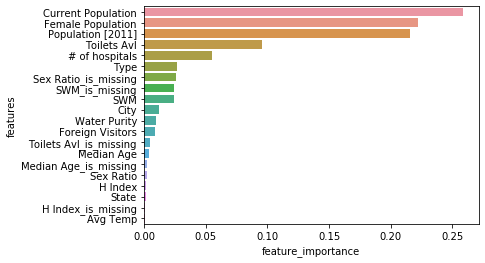

In [167]:
plot_features(X_train1.columns, ideal_rf_model.feature_importances_)

In [168]:
X_train1

City  State  Type  Population [2011]  Sex Ratio  Median Age  Avg Temp  \
168    56     33     1           283443.0      945.0        24.0      40.0   
198   526     29     1           229644.0      918.0        26.0      31.0   
400   765     17    13            78387.0      871.0        25.0      33.0   
427   348     17    12            72401.0      890.0        28.0      40.0   
635   259      9     7            49308.0      861.0        27.0      30.0   
..    ...    ...   ...                ...        ...         ...       ...   
662   619      9     7            46960.0      845.0        27.0      26.0   
760   759     14    33            37988.0      925.0        26.0      32.0   
110   522     33     1           423806.0      957.0        23.0      27.0   
751   639     25     7            38883.0      848.0        27.0      38.0   
42    127     27    17          1050721.0      917.0        28.0      34.0   

     SWM  Toilets Avl  Water Purity  ...  Water Purity_is_missing  \
168    3        141.0         172.0  ...                    False   
198    3        142.0         190.0  ...                    False   
400    1         69.0         150.0  ...                     True   
427    2         84.0         150.0  ...                     True   
635    1         53.0         106.0  ...                    False   
..   ...          ...           ...  ...                      ...   
662    3         94.0         134.0  ...                    False   
760    3         63.0         115.0  ...                    False   
110    2        128.0         152.0  ...                    False   
751    2         82.0         156.0  ...                    False   
42     1        124.0         156.0  ...                    False   

     H Index_is_missing  Female Population_is_missing  \
168               False                         False   
198               False                         False   
400                True                          True   
427                True                          True   
635               False                         False   
..                  ...                           ...   
662               False                         False   
760               False                         False   
110               False                         False   
751               False                         False   
42                False                         False   

     # of hospitals_is_missing  Foreign Visitors_is_missing  City_is_missing  \
168                      False                         True            False   
198                      False                         True            False   
400                      False                        False            False   
427                      False                        False            False   
635                      False                        False            False   
..                         ...                          ...              ...   
662                      False                        False            False   
760                      False                        False            False   
110                      False                        False            False   
751                      False                        False            False   
42                       False                        False            False   

     State_is_missing  Type_is_missing  SWM_is_missing  Current Population  
168             False            False           False        5.512974e+05  
198             False            False           False        4.404568e+05  
400             False            False           False        1.723790e+05  
427             False            False           False        1.723790e+05  
635             False            False           False        9.176178e+04  
..                ...              ...             ...                 ...  
662             False            False           False

In [169]:
X_train1.drop("City", axis=1, inplace=True)

In [170]:
X_train1

State  Type  Population [2011]  Sex Ratio  Median Age  Avg Temp  SWM  \
168     33     1           283443.0      945.0        24.0      40.0    3   
198     29     1           229644.0      918.0        26.0      31.0    3   
400     17    13            78387.0      871.0        25.0      33.0    1   
427     17    12            72401.0      890.0        28.0      40.0    2   
635      9     7            49308.0      861.0        27.0      30.0    1   
..     ...   ...                ...        ...         ...       ...  ...   
662      9     7            46960.0      845.0        27.0      26.0    3   
760     14    33            37988.0      925.0        26.0      32.0    3   
110     33     1           423806.0      957.0        23.0      27.0    2   
751     25     7            38883.0      848.0        27.0      38.0    2   
42      27    17          1050721.0      917.0        28.0      34.0    1   

     Toilets Avl  Water Purity   H Index  ...  Water Purity_is_missing  \
168        141.0         172.0  0.352219  ...                    False   
198        142.0         190.0  0.105798  ...                    False   
400         69.0         150.0  0.507004  ...                     True   
427         84.0         150.0  0.507004  ...                     True   
635         53.0         106.0  0.295148  ...                    False   
..           ...           ...       ...  ...                      ...   
662         94.0         134.0  0.894614  ...                    False   
760         63.0         115.0  0.752733  ...                    False   
110        128.0         152.0  0.319906  ...                    False   
751         82.0         156.0  0.040447  ...                    False   
42         124.0         156.0  0.502560  ...                    False   

     H Index_is_missing  Female Population_is_missing  \
168               False                         False   
198               False                         False   
400                True                          True   
427                True                          True   
635               False                         False   
..                  ...                           ...   
662               False                         False   
760               False                         False   
110               False                         False   
751               False                         False   
42                False                         False   

     # of hospitals_is_missing  Foreign Visitors_is_missing  City_is_missing  \
168                      False                         True            False   
198                      False                         True            False   
400                      False                        False            False   
427                      False                        False            False   
635                      False                        False            False   
..                         ...                          ...              ...   
662                      False                        False            False   
760                      False                        False            False   
110                      False                        False            False   
751                      False                        False            False   
42                       False                        False            False   

     State_is_missing  Type_is_missing  SWM_is_missing  Current Population  
168             False            False           False        5.512974e+05  
198             False            False           False        4.404568e+05  
400             False            False           False        1.723790e+05  
427             False            False           False        1.723790e+05  
635             False            False           False        9.176178e+04  
..                ...              ...             ...                 ...  
662   

In [171]:
X_val1.drop("City", axis=1, inplace=True)

In [172]:
gs_catboost_model = RandomizedSearchCV(
                                CatBoostRegressor(task_type="GPU"),
                                param_distributions=parameters,
                                cv = 5,
                                verbose=True)
gs_catboost_model.fit(X_train1, y_train1)

print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",gs_catboost_model.best_estimator_)
print("\n The best score across ALL searched params:\n",gs_catboost_model.best_score_)
print("\n The best parameters across ALL searched params:\n",gs_catboost_model.best_params_)
print("\n ========================================================")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 18047.4233654	total: 43.5ms	remaining: 43.5s
1:	learn: 17563.4792171	total: 58.6ms	remaining: 29.2s
2:	learn: 17098.5095120	total: 72.7ms	remaining: 24.2s
3:	learn: 16654.5524377	total: 84.7ms	remaining: 21.1s
4:	learn: 16225.1965946	total: 96.9ms	remaining: 19.3s
5:	learn: 15803.8215033	total: 111ms	remaining: 18.3s
6:	learn: 15456.6802266	total: 122ms	remaining: 17.3s
7:	learn: 15068.5996848	total: 137ms	remaining: 16.9s
8:	learn: 14648.9344442	total: 151ms	remaining: 16.6s
9:	learn: 14289.9835169	total: 167ms	remaining: 16.5s
10:	learn: 13971.3708707	total: 182ms	remaining: 16.4s
11:	learn: 13628.4407939	total: 196ms	remaining: 16.1s
12:	learn: 13268.2817829	total: 208ms	remaining: 15.8s
13:	learn: 12976.5246442	total: 221ms	remaining: 15.6s
14:	learn: 12700.5728836	total: 237ms	remaining: 15.6s
15:	learn: 12360.3094456	total: 252ms	remaining: 15.5s
16:	learn: 12076.5821821	total: 268ms	remaining: 15.5s
17:	learn: 11790.3220022	total: 282ms	remaining: 15.4s
18:	learn: 1154

165:	learn: 3520.1445841	total: 2.26s	remaining: 11.4s
166:	learn: 3516.5800122	total: 2.27s	remaining: 11.3s
167:	learn: 3512.1642045	total: 2.29s	remaining: 11.3s
168:	learn: 3491.9778146	total: 2.3s	remaining: 11.3s
169:	learn: 3473.4166838	total: 2.31s	remaining: 11.3s
170:	learn: 3455.2671338	total: 2.32s	remaining: 11.3s
171:	learn: 3450.4660797	total: 2.34s	remaining: 11.2s
172:	learn: 3435.8443251	total: 2.35s	remaining: 11.2s
173:	learn: 3431.3740109	total: 2.36s	remaining: 11.2s
174:	learn: 3427.8811915	total: 2.38s	remaining: 11.2s
175:	learn: 3418.9537888	total: 2.39s	remaining: 11.2s
176:	learn: 3414.8582743	total: 2.4s	remaining: 11.2s
177:	learn: 3401.3973880	total: 2.41s	remaining: 11.1s
178:	learn: 3396.3931190	total: 2.43s	remaining: 11.1s
179:	learn: 3381.7524790	total: 2.44s	remaining: 11.1s
180:	learn: 3379.3816085	total: 2.45s	remaining: 11.1s
181:	learn: 3368.4046734	total: 2.47s	remaining: 11.1s
182:	learn: 3350.9874394	total: 2.48s	remaining: 11.1s
183:	learn: 

328:	learn: 2888.6788604	total: 4.46s	remaining: 9.1s
329:	learn: 2888.5841586	total: 4.47s	remaining: 9.09s
330:	learn: 2888.5202001	total: 4.49s	remaining: 9.06s
331:	learn: 2888.4588832	total: 4.49s	remaining: 9.04s
332:	learn: 2887.4454675	total: 4.51s	remaining: 9.03s
333:	learn: 2887.3401492	total: 4.52s	remaining: 9.02s
334:	learn: 2884.8376423	total: 4.54s	remaining: 9s
335:	learn: 2878.8519912	total: 4.55s	remaining: 8.99s
336:	learn: 2878.1346732	total: 4.56s	remaining: 8.98s
337:	learn: 2876.4246418	total: 4.58s	remaining: 8.97s
338:	learn: 2875.5882268	total: 4.59s	remaining: 8.95s
339:	learn: 2874.9956079	total: 4.6s	remaining: 8.94s
340:	learn: 2873.8832327	total: 4.62s	remaining: 8.92s
341:	learn: 2872.3567232	total: 4.63s	remaining: 8.91s
342:	learn: 2869.7883907	total: 4.65s	remaining: 8.9s
343:	learn: 2869.7150571	total: 4.66s	remaining: 8.89s
344:	learn: 2869.6512101	total: 4.67s	remaining: 8.87s
345:	learn: 2869.5855881	total: 4.69s	remaining: 8.86s
346:	learn: 2869

478:	learn: 2692.2898647	total: 6.3s	remaining: 6.85s
479:	learn: 2692.2898647	total: 6.31s	remaining: 6.83s
480:	learn: 2692.2897702	total: 6.32s	remaining: 6.81s
481:	learn: 2690.6263795	total: 6.33s	remaining: 6.8s
482:	learn: 2688.4747285	total: 6.35s	remaining: 6.79s
483:	learn: 2688.4740659	total: 6.36s	remaining: 6.78s
484:	learn: 2688.4570283	total: 6.37s	remaining: 6.76s
485:	learn: 2688.4563657	total: 6.38s	remaining: 6.74s
486:	learn: 2680.6992589	total: 6.39s	remaining: 6.73s
487:	learn: 2673.6405245	total: 6.4s	remaining: 6.72s
488:	learn: 2673.6405245	total: 6.41s	remaining: 6.7s
489:	learn: 2673.6404293	total: 6.42s	remaining: 6.68s
490:	learn: 2669.2779792	total: 6.43s	remaining: 6.67s
491:	learn: 2669.2779792	total: 6.44s	remaining: 6.65s
492:	learn: 2667.5813514	total: 6.46s	remaining: 6.64s
493:	learn: 2666.0044877	total: 6.47s	remaining: 6.63s
494:	learn: 2666.0041059	total: 6.48s	remaining: 6.61s
495:	learn: 2664.1841858	total: 6.49s	remaining: 6.6s
496:	learn: 266

628:	learn: 2460.5731767	total: 8.38s	remaining: 4.94s
629:	learn: 2450.8924037	total: 8.39s	remaining: 4.93s
630:	learn: 2449.0936369	total: 8.41s	remaining: 4.92s
631:	learn: 2444.0934018	total: 8.42s	remaining: 4.91s
632:	learn: 2443.9255584	total: 8.44s	remaining: 4.89s
633:	learn: 2443.7955032	total: 8.45s	remaining: 4.88s
634:	learn: 2443.7697828	total: 8.46s	remaining: 4.87s
635:	learn: 2443.5860881	total: 8.48s	remaining: 4.85s
636:	learn: 2443.4638256	total: 8.49s	remaining: 4.84s
637:	learn: 2443.4244587	total: 8.5s	remaining: 4.83s
638:	learn: 2443.3921732	total: 8.52s	remaining: 4.81s
639:	learn: 2442.9577354	total: 8.53s	remaining: 4.8s
640:	learn: 2442.5069675	total: 8.55s	remaining: 4.79s
641:	learn: 2442.4719610	total: 8.56s	remaining: 4.77s
642:	learn: 2442.1074886	total: 8.57s	remaining: 4.76s
643:	learn: 2442.0241254	total: 8.59s	remaining: 4.75s
644:	learn: 2436.1378423	total: 8.61s	remaining: 4.74s
645:	learn: 2435.7992716	total: 8.62s	remaining: 4.72s
646:	learn: 

780:	learn: 2295.5441253	total: 10.5s	remaining: 2.93s
781:	learn: 2294.4731244	total: 10.5s	remaining: 2.92s
782:	learn: 2294.4655827	total: 10.5s	remaining: 2.9s
783:	learn: 2294.4565992	total: 10.5s	remaining: 2.89s
784:	learn: 2294.4376339	total: 10.5s	remaining: 2.88s
785:	learn: 2294.4328648	total: 10.5s	remaining: 2.86s
786:	learn: 2293.0881432	total: 10.5s	remaining: 2.85s
787:	learn: 2293.0837043	total: 10.5s	remaining: 2.84s
788:	learn: 2293.0779336	total: 10.6s	remaining: 2.82s
789:	learn: 2293.0742714	total: 10.6s	remaining: 2.81s
790:	learn: 2293.0273287	total: 10.6s	remaining: 2.8s
791:	learn: 2293.0241103	total: 10.6s	remaining: 2.78s
792:	learn: 2293.0197822	total: 10.6s	remaining: 2.77s
793:	learn: 2293.0167858	total: 10.6s	remaining: 2.75s
794:	learn: 2292.9995843	total: 10.6s	remaining: 2.74s
795:	learn: 2292.8248978	total: 10.6s	remaining: 2.73s
796:	learn: 2292.8082497	total: 10.7s	remaining: 2.72s
797:	learn: 2292.8058080	total: 10.7s	remaining: 2.7s
798:	learn: 2

937:	learn: 2171.5576218	total: 12.5s	remaining: 829ms
938:	learn: 2171.5476611	total: 12.6s	remaining: 815ms
939:	learn: 2171.1946707	total: 12.6s	remaining: 802ms
940:	learn: 2171.1590404	total: 12.6s	remaining: 789ms
941:	learn: 2158.5103471	total: 12.6s	remaining: 775ms
942:	learn: 2157.5339726	total: 12.6s	remaining: 762ms
943:	learn: 2156.4176759	total: 12.6s	remaining: 749ms
944:	learn: 2156.0790862	total: 12.6s	remaining: 735ms
945:	learn: 2155.1663168	total: 12.6s	remaining: 722ms
946:	learn: 2155.1575791	total: 12.7s	remaining: 708ms
947:	learn: 2154.8073362	total: 12.7s	remaining: 695ms
948:	learn: 2154.4843206	total: 12.7s	remaining: 681ms
949:	learn: 2154.1574765	total: 12.7s	remaining: 668ms
950:	learn: 2153.3036914	total: 12.7s	remaining: 655ms
951:	learn: 2152.9914424	total: 12.7s	remaining: 641ms
952:	learn: 2152.6990077	total: 12.7s	remaining: 628ms
953:	learn: 2151.8758639	total: 12.7s	remaining: 615ms
954:	learn: 2151.5977068	total: 12.8s	remaining: 601ms
955:	learn

92:	learn: 4824.0578285	total: 1.38s	remaining: 13.5s
93:	learn: 4813.9980912	total: 1.4s	remaining: 13.4s
94:	learn: 4769.1708171	total: 1.41s	remaining: 13.5s
95:	learn: 4751.1427358	total: 1.43s	remaining: 13.5s
96:	learn: 4732.3693568	total: 1.44s	remaining: 13.4s
97:	learn: 4717.2526695	total: 1.46s	remaining: 13.4s
98:	learn: 4696.0253741	total: 1.47s	remaining: 13.4s
99:	learn: 4657.0952098	total: 1.49s	remaining: 13.4s
100:	learn: 4643.4777397	total: 1.5s	remaining: 13.4s
101:	learn: 4626.3447521	total: 1.52s	remaining: 13.4s
102:	learn: 4579.7157126	total: 1.53s	remaining: 13.3s
103:	learn: 4545.9842782	total: 1.54s	remaining: 13.3s
104:	learn: 4517.1016940	total: 1.56s	remaining: 13.3s
105:	learn: 4473.1416973	total: 1.57s	remaining: 13.3s
106:	learn: 4442.5829680	total: 1.58s	remaining: 13.2s
107:	learn: 4393.5796426	total: 1.6s	remaining: 13.2s
108:	learn: 4362.9570872	total: 1.61s	remaining: 13.2s
109:	learn: 4353.9291713	total: 1.63s	remaining: 13.2s
110:	learn: 4338.9625

246:	learn: 3438.1416220	total: 3.47s	remaining: 10.6s
247:	learn: 3436.0654738	total: 3.48s	remaining: 10.6s
248:	learn: 3435.3126510	total: 3.5s	remaining: 10.6s
249:	learn: 3433.3513075	total: 3.51s	remaining: 10.5s
250:	learn: 3431.4477258	total: 3.52s	remaining: 10.5s
251:	learn: 3431.3999670	total: 3.54s	remaining: 10.5s
252:	learn: 3430.8143484	total: 3.55s	remaining: 10.5s
253:	learn: 3430.2792240	total: 3.56s	remaining: 10.5s
254:	learn: 3430.2424284	total: 3.57s	remaining: 10.4s
255:	learn: 3430.2084514	total: 3.58s	remaining: 10.4s
256:	learn: 3429.6125383	total: 3.59s	remaining: 10.4s
257:	learn: 3429.1446087	total: 3.6s	remaining: 10.4s
258:	learn: 3427.3588252	total: 3.61s	remaining: 10.3s
259:	learn: 3425.6272308	total: 3.63s	remaining: 10.3s
260:	learn: 3425.2272563	total: 3.63s	remaining: 10.3s
261:	learn: 3423.5591028	total: 3.65s	remaining: 10.3s
262:	learn: 3421.9389200	total: 3.66s	remaining: 10.3s
263:	learn: 3420.3636513	total: 3.67s	remaining: 10.2s
264:	learn: 

402:	learn: 3338.6064354	total: 5.51s	remaining: 8.16s
403:	learn: 3338.5158832	total: 5.52s	remaining: 8.15s
404:	learn: 3338.4727404	total: 5.54s	remaining: 8.13s
405:	learn: 3338.4613067	total: 5.54s	remaining: 8.11s
406:	learn: 3338.3756291	total: 5.56s	remaining: 8.1s
407:	learn: 3338.2984868	total: 5.57s	remaining: 8.08s
408:	learn: 3331.1253103	total: 5.58s	remaining: 8.07s
409:	learn: 3324.2719599	total: 5.6s	remaining: 8.05s
410:	learn: 3322.5448485	total: 5.61s	remaining: 8.04s
411:	learn: 3315.6783677	total: 5.62s	remaining: 8.02s
412:	learn: 3315.6464402	total: 5.63s	remaining: 8.01s
413:	learn: 3315.6392257	total: 5.64s	remaining: 7.99s
414:	learn: 3315.6376907	total: 5.66s	remaining: 7.97s
415:	learn: 3315.6363092	total: 5.67s	remaining: 7.96s
416:	learn: 3315.6292483	total: 5.68s	remaining: 7.94s
417:	learn: 3308.9486813	total: 5.69s	remaining: 7.93s
418:	learn: 3308.9474509	total: 5.7s	remaining: 7.91s
419:	learn: 3308.8214788	total: 5.72s	remaining: 7.9s
420:	learn: 33

560:	learn: 3038.4000812	total: 7.71s	remaining: 6.04s
561:	learn: 3038.3337487	total: 7.73s	remaining: 6.02s
562:	learn: 3038.2446329	total: 7.74s	remaining: 6.01s
563:	learn: 3038.1846625	total: 7.76s	remaining: 6s
564:	learn: 3037.3245106	total: 7.77s	remaining: 5.98s
565:	learn: 3037.3147919	total: 7.78s	remaining: 5.97s
566:	learn: 3037.3050731	total: 7.79s	remaining: 5.95s
567:	learn: 3037.1237623	total: 7.81s	remaining: 5.94s
568:	learn: 3037.0520393	total: 7.82s	remaining: 5.92s
569:	learn: 3036.9716003	total: 7.83s	remaining: 5.91s
570:	learn: 3036.9256821	total: 7.85s	remaining: 5.89s
571:	learn: 3036.8459101	total: 7.86s	remaining: 5.88s
572:	learn: 3036.0113626	total: 7.87s	remaining: 5.87s
573:	learn: 3035.9555392	total: 7.88s	remaining: 5.85s
574:	learn: 3035.9382722	total: 7.9s	remaining: 5.84s
575:	learn: 3035.8871414	total: 7.91s	remaining: 5.83s
576:	learn: 3035.8346686	total: 7.93s	remaining: 5.81s
577:	learn: 3035.8338304	total: 7.93s	remaining: 5.79s
578:	learn: 30

718:	learn: 2883.4639650	total: 9.79s	remaining: 3.82s
719:	learn: 2883.4393424	total: 9.8s	remaining: 3.81s
720:	learn: 2883.4112777	total: 9.81s	remaining: 3.8s
721:	learn: 2880.9853848	total: 9.82s	remaining: 3.78s
722:	learn: 2880.5947696	total: 9.84s	remaining: 3.77s
723:	learn: 2880.5710942	total: 9.85s	remaining: 3.75s
724:	learn: 2880.5481254	total: 9.86s	remaining: 3.74s
725:	learn: 2880.5273650	total: 9.88s	remaining: 3.73s
726:	learn: 2880.4974167	total: 9.89s	remaining: 3.71s
727:	learn: 2880.4755958	total: 9.91s	remaining: 3.7s
728:	learn: 2880.4545698	total: 9.92s	remaining: 3.69s
729:	learn: 2880.4341621	total: 9.94s	remaining: 3.67s
730:	learn: 2878.8645431	total: 9.95s	remaining: 3.66s
731:	learn: 2878.8461572	total: 9.96s	remaining: 3.65s
732:	learn: 2878.8270640	total: 9.98s	remaining: 3.63s
733:	learn: 2877.7258085	total: 10s	remaining: 3.62s
734:	learn: 2872.6373748	total: 10s	remaining: 3.61s
735:	learn: 2872.6251500	total: 10s	remaining: 3.6s
736:	learn: 2867.711

878:	learn: 2730.7629415	total: 12s	remaining: 1.65s
879:	learn: 2730.7449562	total: 12s	remaining: 1.64s
880:	learn: 2730.7234297	total: 12s	remaining: 1.63s
881:	learn: 2730.7065624	total: 12.1s	remaining: 1.61s
882:	learn: 2730.6893223	total: 12.1s	remaining: 1.6s
883:	learn: 2730.6780463	total: 12.1s	remaining: 1.58s
884:	learn: 2730.6205472	total: 12.1s	remaining: 1.57s
885:	learn: 2730.6090845	total: 12.1s	remaining: 1.56s
886:	learn: 2730.5937076	total: 12.1s	remaining: 1.54s
887:	learn: 2730.5272599	total: 12.1s	remaining: 1.53s
888:	learn: 2730.5101119	total: 12.2s	remaining: 1.52s
889:	learn: 2730.4582011	total: 12.2s	remaining: 1.5s
890:	learn: 2730.4463650	total: 12.2s	remaining: 1.49s
891:	learn: 2730.4415186	total: 12.2s	remaining: 1.48s
892:	learn: 2730.4270728	total: 12.2s	remaining: 1.46s
893:	learn: 2730.4133725	total: 12.2s	remaining: 1.45s
894:	learn: 2730.4002314	total: 12.2s	remaining: 1.44s
895:	learn: 2730.3233403	total: 12.2s	remaining: 1.42s
896:	learn: 2730.3

38:	learn: 7669.2170823	total: 576ms	remaining: 14.2s
39:	learn: 7605.6863189	total: 593ms	remaining: 14.2s
40:	learn: 7474.0674106	total: 608ms	remaining: 14.2s
41:	learn: 7345.1769480	total: 622ms	remaining: 14.2s
42:	learn: 7285.2562241	total: 636ms	remaining: 14.2s
43:	learn: 7164.7513229	total: 651ms	remaining: 14.1s
44:	learn: 7050.0959237	total: 664ms	remaining: 14.1s
45:	learn: 7005.7048631	total: 679ms	remaining: 14.1s
46:	learn: 6902.6503292	total: 692ms	remaining: 14s
47:	learn: 6807.2803595	total: 708ms	remaining: 14s
48:	learn: 6729.5020958	total: 723ms	remaining: 14s
49:	learn: 6639.8899701	total: 739ms	remaining: 14s
50:	learn: 6549.8192250	total: 755ms	remaining: 14.1s
51:	learn: 6482.1561050	total: 770ms	remaining: 14s
52:	learn: 6418.0716625	total: 787ms	remaining: 14.1s
53:	learn: 6336.4539870	total: 803ms	remaining: 14.1s
54:	learn: 6284.1296270	total: 818ms	remaining: 14.1s
55:	learn: 6254.0469309	total: 827ms	remaining: 13.9s
56:	learn: 6223.9163062	total: 842ms	r

198:	learn: 3971.4377464	total: 2.82s	remaining: 11.3s
199:	learn: 3971.4057083	total: 2.83s	remaining: 11.3s
200:	learn: 3969.4619253	total: 2.84s	remaining: 11.3s
201:	learn: 3969.4230758	total: 2.86s	remaining: 11.3s
202:	learn: 3967.5765823	total: 2.87s	remaining: 11.3s
203:	learn: 3967.5377144	total: 2.88s	remaining: 11.2s
204:	learn: 3964.9715885	total: 2.9s	remaining: 11.2s
205:	learn: 3962.2925669	total: 2.91s	remaining: 11.2s
206:	learn: 3960.7290531	total: 2.92s	remaining: 11.2s
207:	learn: 3958.1478408	total: 2.93s	remaining: 11.2s
208:	learn: 3956.3637501	total: 2.95s	remaining: 11.2s
209:	learn: 3956.3214274	total: 2.95s	remaining: 11.1s
210:	learn: 3954.7581267	total: 2.97s	remaining: 11.1s
211:	learn: 3934.4097387	total: 2.98s	remaining: 11.1s
212:	learn: 3896.6337963	total: 3s	remaining: 11.1s
213:	learn: 3894.7291415	total: 3.03s	remaining: 11.1s
214:	learn: 3894.7064038	total: 3.04s	remaining: 11.1s
215:	learn: 3893.1105177	total: 3.05s	remaining: 11.1s
216:	learn: 38

358:	learn: 3084.3591677	total: 5.06s	remaining: 9.04s
359:	learn: 3083.8243279	total: 5.07s	remaining: 9.02s
360:	learn: 3083.3035909	total: 5.09s	remaining: 9.01s
361:	learn: 3077.1712605	total: 5.1s	remaining: 8.99s
362:	learn: 3060.9413279	total: 5.12s	remaining: 8.98s
363:	learn: 3056.6670033	total: 5.13s	remaining: 8.96s
364:	learn: 3052.3543460	total: 5.14s	remaining: 8.94s
365:	learn: 3051.2379914	total: 5.15s	remaining: 8.93s
366:	learn: 3047.4724944	total: 5.17s	remaining: 8.91s
367:	learn: 3047.0023362	total: 5.18s	remaining: 8.9s
368:	learn: 3046.5603379	total: 5.19s	remaining: 8.88s
369:	learn: 3046.1720749	total: 5.2s	remaining: 8.86s
370:	learn: 3044.8739416	total: 5.22s	remaining: 8.85s
371:	learn: 3044.4119079	total: 5.23s	remaining: 8.84s
372:	learn: 3041.0240820	total: 5.25s	remaining: 8.83s
373:	learn: 3037.4278959	total: 5.27s	remaining: 8.82s
374:	learn: 3036.3791348	total: 5.29s	remaining: 8.81s
375:	learn: 3035.3372214	total: 5.3s	remaining: 8.8s
376:	learn: 303

515:	learn: 2798.4342796	total: 7.28s	remaining: 6.83s
516:	learn: 2798.2556793	total: 7.3s	remaining: 6.82s
517:	learn: 2798.1891105	total: 7.31s	remaining: 6.8s
518:	learn: 2797.7336355	total: 7.32s	remaining: 6.79s
519:	learn: 2786.4369033	total: 7.34s	remaining: 6.77s
520:	learn: 2786.0118413	total: 7.35s	remaining: 6.75s
521:	learn: 2785.5848874	total: 7.36s	remaining: 6.74s
522:	learn: 2785.5103419	total: 7.37s	remaining: 6.72s
523:	learn: 2785.4392660	total: 7.39s	remaining: 6.71s
524:	learn: 2785.0019906	total: 7.4s	remaining: 6.69s
525:	learn: 2784.9310844	total: 7.41s	remaining: 6.68s
526:	learn: 2784.8633747	total: 7.42s	remaining: 6.66s
527:	learn: 2784.1749448	total: 7.44s	remaining: 6.65s
528:	learn: 2783.7970722	total: 7.45s	remaining: 6.63s
529:	learn: 2783.7357339	total: 7.46s	remaining: 6.62s
530:	learn: 2783.4313992	total: 7.48s	remaining: 6.61s
531:	learn: 2783.3021223	total: 7.5s	remaining: 6.59s
532:	learn: 2783.1589415	total: 7.51s	remaining: 6.58s
533:	learn: 27

670:	learn: 2718.8941267	total: 9.34s	remaining: 4.58s
671:	learn: 2718.8663291	total: 9.35s	remaining: 4.56s
672:	learn: 2718.8402158	total: 9.36s	remaining: 4.55s
673:	learn: 2718.8153191	total: 9.38s	remaining: 4.53s
674:	learn: 2718.7915454	total: 9.39s	remaining: 4.52s
675:	learn: 2718.7122668	total: 9.4s	remaining: 4.5s
676:	learn: 2718.6880241	total: 9.41s	remaining: 4.49s
677:	learn: 2718.5947019	total: 9.42s	remaining: 4.47s
678:	learn: 2718.4979129	total: 9.43s	remaining: 4.46s
679:	learn: 2718.4721706	total: 9.45s	remaining: 4.45s
680:	learn: 2718.4043969	total: 9.46s	remaining: 4.43s
681:	learn: 2718.3778112	total: 9.47s	remaining: 4.42s
682:	learn: 2718.2858825	total: 9.49s	remaining: 4.4s
683:	learn: 2718.2600446	total: 9.5s	remaining: 4.39s
684:	learn: 2718.1976955	total: 9.51s	remaining: 4.37s
685:	learn: 2718.0136356	total: 9.52s	remaining: 4.36s
686:	learn: 2717.9578347	total: 9.53s	remaining: 4.34s
687:	learn: 2717.9284358	total: 9.55s	remaining: 4.33s
688:	learn: 27

826:	learn: 2688.2003144	total: 11.2s	remaining: 2.34s
827:	learn: 2688.1863043	total: 11.2s	remaining: 2.33s
828:	learn: 2688.1731460	total: 11.2s	remaining: 2.31s
829:	learn: 2688.1632063	total: 11.2s	remaining: 2.3s
830:	learn: 2687.1180983	total: 11.3s	remaining: 2.29s
831:	learn: 2684.1657781	total: 11.3s	remaining: 2.27s
832:	learn: 2684.1434988	total: 11.3s	remaining: 2.26s
833:	learn: 2683.2414568	total: 11.3s	remaining: 2.25s
834:	learn: 2683.2357666	total: 11.3s	remaining: 2.23s
835:	learn: 2673.3688712	total: 11.3s	remaining: 2.22s
836:	learn: 2673.3492623	total: 11.3s	remaining: 2.2s
837:	learn: 2673.3302245	total: 11.3s	remaining: 2.19s
838:	learn: 2673.2990021	total: 11.3s	remaining: 2.18s
839:	learn: 2673.2942426	total: 11.3s	remaining: 2.16s
840:	learn: 2673.2894830	total: 11.4s	remaining: 2.15s
841:	learn: 2673.2613063	total: 11.4s	remaining: 2.13s
842:	learn: 2673.2468371	total: 11.4s	remaining: 2.12s
843:	learn: 2673.2333197	total: 11.4s	remaining: 2.11s
844:	learn: 

991:	learn: 2640.0893533	total: 13s	remaining: 105ms
992:	learn: 2640.0854014	total: 13.1s	remaining: 92ms
993:	learn: 2639.1363850	total: 13.1s	remaining: 78.9ms
994:	learn: 2639.1324317	total: 13.1s	remaining: 65.7ms
995:	learn: 2639.1319496	total: 13.1s	remaining: 52.6ms
996:	learn: 2638.2216554	total: 13.1s	remaining: 39.4ms
997:	learn: 2638.2217518	total: 13.1s	remaining: 26.3ms
998:	learn: 2637.3075734	total: 13.1s	remaining: 13.1ms
999:	learn: 2637.3055471	total: 13.1s	remaining: 0us
0:	learn: 12379.6713093	total: 15.3ms	remaining: 15.3s
1:	learn: 12120.4991991	total: 28ms	remaining: 14s
2:	learn: 11899.2235656	total: 40.7ms	remaining: 13.5s
3:	learn: 11688.7269992	total: 53.2ms	remaining: 13.2s
4:	learn: 11492.0532232	total: 65ms	remaining: 12.9s
5:	learn: 11273.5972127	total: 77.4ms	remaining: 12.8s
6:	learn: 11106.9580398	total: 85.8ms	remaining: 12.2s
7:	learn: 10888.8468300	total: 99ms	remaining: 12.3s
8:	learn: 10731.3451138	total: 110ms	remaining: 12.1s
9:	learn: 10534.87

145:	learn: 3993.0140825	total: 1.89s	remaining: 11.1s
146:	learn: 3931.3735761	total: 1.91s	remaining: 11.1s
147:	learn: 3896.8156037	total: 1.92s	remaining: 11.1s
148:	learn: 3842.0055730	total: 1.93s	remaining: 11s
149:	learn: 3803.8870483	total: 1.95s	remaining: 11s
150:	learn: 3752.4259233	total: 1.96s	remaining: 11s
151:	learn: 3732.7604824	total: 1.97s	remaining: 11s
152:	learn: 3714.0037096	total: 1.99s	remaining: 11s
153:	learn: 3676.0325056	total: 2s	remaining: 11s
154:	learn: 3644.0691738	total: 2.01s	remaining: 11s
155:	learn: 3619.2506721	total: 2.03s	remaining: 11s
156:	learn: 3578.0185816	total: 2.04s	remaining: 11s
157:	learn: 3575.0931643	total: 2.06s	remaining: 11s
158:	learn: 3557.9367578	total: 2.07s	remaining: 11s
159:	learn: 3513.5554959	total: 2.09s	remaining: 11s
160:	learn: 3476.6949777	total: 2.1s	remaining: 10.9s
161:	learn: 3431.4886614	total: 2.11s	remaining: 10.9s
162:	learn: 3391.0494936	total: 2.13s	remaining: 10.9s
163:	learn: 3378.2389380	total: 2.14s	

301:	learn: 2234.4262378	total: 3.95s	remaining: 9.12s
302:	learn: 2234.0321524	total: 3.96s	remaining: 9.11s
303:	learn: 2233.9448975	total: 3.97s	remaining: 9.09s
304:	learn: 2233.8514877	total: 3.98s	remaining: 9.08s
305:	learn: 2233.4821390	total: 4s	remaining: 9.07s
306:	learn: 2233.1744916	total: 4.01s	remaining: 9.06s
307:	learn: 2226.8538978	total: 4.03s	remaining: 9.05s
308:	learn: 2226.7763039	total: 4.04s	remaining: 9.04s
309:	learn: 2215.7794207	total: 4.06s	remaining: 9.03s
310:	learn: 2215.7023578	total: 4.07s	remaining: 9.02s
311:	learn: 2212.3289457	total: 4.08s	remaining: 9.01s
312:	learn: 2202.9674980	total: 4.1s	remaining: 9s
313:	learn: 2201.1982712	total: 4.12s	remaining: 8.99s
314:	learn: 2200.9372159	total: 4.13s	remaining: 8.98s
315:	learn: 2196.8228350	total: 4.14s	remaining: 8.96s
316:	learn: 2188.0959560	total: 4.15s	remaining: 8.95s
317:	learn: 2187.8318252	total: 4.17s	remaining: 8.94s
318:	learn: 2187.7442398	total: 4.18s	remaining: 8.93s
319:	learn: 2187.

463:	learn: 1951.0321885	total: 6.21s	remaining: 7.18s
464:	learn: 1949.5163941	total: 6.23s	remaining: 7.17s
465:	learn: 1948.9013636	total: 6.24s	remaining: 7.15s
466:	learn: 1947.8746617	total: 6.26s	remaining: 7.14s
467:	learn: 1947.3077913	total: 6.27s	remaining: 7.13s
468:	learn: 1944.2691483	total: 6.28s	remaining: 7.11s
469:	learn: 1944.0275219	total: 6.3s	remaining: 7.1s
470:	learn: 1943.7941132	total: 6.31s	remaining: 7.09s
471:	learn: 1943.6404121	total: 6.33s	remaining: 7.08s
472:	learn: 1943.3612578	total: 6.34s	remaining: 7.06s
473:	learn: 1942.8882928	total: 6.35s	remaining: 7.05s
474:	learn: 1942.6031356	total: 6.36s	remaining: 7.03s
475:	learn: 1942.3414535	total: 6.38s	remaining: 7.02s
476:	learn: 1942.1259242	total: 6.39s	remaining: 7.01s
477:	learn: 1941.6241526	total: 6.41s	remaining: 6.99s
478:	learn: 1941.4254524	total: 6.42s	remaining: 6.98s
479:	learn: 1941.3014511	total: 6.43s	remaining: 6.97s
480:	learn: 1941.1036356	total: 6.45s	remaining: 6.96s
481:	learn: 

617:	learn: 1891.4056288	total: 8.32s	remaining: 5.14s
618:	learn: 1891.3774420	total: 8.34s	remaining: 5.13s
619:	learn: 1891.3607585	total: 8.35s	remaining: 5.12s
620:	learn: 1891.2063618	total: 8.36s	remaining: 5.1s
621:	learn: 1891.1901478	total: 8.38s	remaining: 5.09s
622:	learn: 1891.0434075	total: 8.39s	remaining: 5.08s
623:	learn: 1891.0167629	total: 8.4s	remaining: 5.06s
624:	learn: 1890.9556674	total: 8.42s	remaining: 5.05s
625:	learn: 1890.7070932	total: 8.43s	remaining: 5.04s
626:	learn: 1890.6953837	total: 8.44s	remaining: 5.02s
627:	learn: 1890.6691380	total: 8.46s	remaining: 5.01s
628:	learn: 1890.6463914	total: 8.47s	remaining: 5s
629:	learn: 1890.6273460	total: 8.48s	remaining: 4.98s
630:	learn: 1890.6037240	total: 8.5s	remaining: 4.97s
631:	learn: 1890.5435574	total: 8.51s	remaining: 4.96s
632:	learn: 1890.4536403	total: 8.52s	remaining: 4.94s
633:	learn: 1890.3071794	total: 8.54s	remaining: 4.93s
634:	learn: 1890.2860440	total: 8.55s	remaining: 4.92s
635:	learn: 1890

775:	learn: 1875.1171478	total: 10.4s	remaining: 3s
776:	learn: 1875.0875627	total: 10.4s	remaining: 2.98s
777:	learn: 1873.9674628	total: 10.4s	remaining: 2.97s
778:	learn: 1873.9559882	total: 10.4s	remaining: 2.96s
779:	learn: 1873.9428840	total: 10.4s	remaining: 2.94s
780:	learn: 1873.8799417	total: 10.4s	remaining: 2.93s
781:	learn: 1873.8688739	total: 10.5s	remaining: 2.92s
782:	learn: 1872.9119119	total: 10.5s	remaining: 2.9s
783:	learn: 1871.7471410	total: 10.5s	remaining: 2.89s
784:	learn: 1871.7364005	total: 10.5s	remaining: 2.88s
785:	learn: 1871.7329337	total: 10.5s	remaining: 2.86s
786:	learn: 1871.6584283	total: 10.5s	remaining: 2.85s
787:	learn: 1871.5792292	total: 10.5s	remaining: 2.84s
788:	learn: 1871.5455091	total: 10.6s	remaining: 2.82s
789:	learn: 1871.5132840	total: 10.6s	remaining: 2.81s
790:	learn: 1870.2778437	total: 10.6s	remaining: 2.8s
791:	learn: 1870.2679112	total: 10.6s	remaining: 2.78s
792:	learn: 1870.2466853	total: 10.6s	remaining: 2.77s
793:	learn: 187

932:	learn: 1745.5683028	total: 12.5s	remaining: 897ms
933:	learn: 1745.5462895	total: 12.5s	remaining: 884ms
934:	learn: 1745.5301803	total: 12.5s	remaining: 871ms
935:	learn: 1745.4369479	total: 12.5s	remaining: 857ms
936:	learn: 1745.4209106	total: 12.6s	remaining: 844ms
937:	learn: 1745.3994057	total: 12.6s	remaining: 831ms
938:	learn: 1745.3848260	total: 12.6s	remaining: 817ms
939:	learn: 1745.3322651	total: 12.6s	remaining: 804ms
940:	learn: 1745.2339917	total: 12.6s	remaining: 790ms
941:	learn: 1745.2138698	total: 12.6s	remaining: 777ms
942:	learn: 1745.1946954	total: 12.6s	remaining: 764ms
943:	learn: 1745.1806972	total: 12.6s	remaining: 750ms
944:	learn: 1745.1342546	total: 12.7s	remaining: 737ms
945:	learn: 1745.1208392	total: 12.7s	remaining: 724ms
946:	learn: 1745.0270746	total: 12.7s	remaining: 710ms
947:	learn: 1745.0135855	total: 12.7s	remaining: 697ms
948:	learn: 1744.9932423	total: 12.7s	remaining: 683ms
949:	learn: 1744.9806279	total: 12.7s	remaining: 670ms
950:	learn

85:	learn: 5479.7754096	total: 1.13s	remaining: 12s
86:	learn: 5472.1047052	total: 1.14s	remaining: 12s
87:	learn: 5439.7176397	total: 1.16s	remaining: 12s
88:	learn: 5432.0079482	total: 1.17s	remaining: 12s
89:	learn: 5410.9085820	total: 1.18s	remaining: 12s
90:	learn: 5404.3154538	total: 1.19s	remaining: 11.9s
91:	learn: 5397.9683421	total: 1.2s	remaining: 11.9s
92:	learn: 5344.8373073	total: 1.21s	remaining: 11.8s
93:	learn: 5339.3798106	total: 1.23s	remaining: 11.8s
94:	learn: 5291.0790930	total: 1.24s	remaining: 11.8s
95:	learn: 5257.7710046	total: 1.25s	remaining: 11.8s
96:	learn: 5208.0000975	total: 1.26s	remaining: 11.8s
97:	learn: 5203.2917542	total: 1.27s	remaining: 11.7s
98:	learn: 5198.3122047	total: 1.29s	remaining: 11.7s
99:	learn: 5181.1554022	total: 1.3s	remaining: 11.7s
100:	learn: 5135.6542434	total: 1.31s	remaining: 11.7s
101:	learn: 5118.3574746	total: 1.33s	remaining: 11.7s
102:	learn: 5093.6883446	total: 1.34s	remaining: 11.7s
103:	learn: 5090.0716557	total: 1.35s

250:	learn: 3329.1821771	total: 3.23s	remaining: 9.63s
251:	learn: 3327.8195922	total: 3.24s	remaining: 9.63s
252:	learn: 3327.6304740	total: 3.25s	remaining: 9.6s
253:	learn: 3327.4465352	total: 3.26s	remaining: 9.58s
254:	learn: 3327.2671660	total: 3.27s	remaining: 9.55s
255:	learn: 3326.2116685	total: 3.28s	remaining: 9.54s
256:	learn: 3321.5684190	total: 3.29s	remaining: 9.53s
257:	learn: 3321.3752745	total: 3.31s	remaining: 9.52s
258:	learn: 3318.2189906	total: 3.32s	remaining: 9.51s
259:	learn: 3318.0432558	total: 3.33s	remaining: 9.49s
260:	learn: 3317.0915545	total: 3.35s	remaining: 9.48s
261:	learn: 3316.9183633	total: 3.36s	remaining: 9.46s
262:	learn: 3316.7344430	total: 3.37s	remaining: 9.44s
263:	learn: 3315.8338366	total: 3.38s	remaining: 9.43s
264:	learn: 3315.5953187	total: 3.39s	remaining: 9.41s
265:	learn: 3315.3777730	total: 3.4s	remaining: 9.39s
266:	learn: 3293.7480364	total: 3.42s	remaining: 9.38s
267:	learn: 3293.5805575	total: 3.43s	remaining: 9.37s
268:	learn: 

410:	learn: 3087.6190241	total: 5.09s	remaining: 7.3s
411:	learn: 3087.2491891	total: 5.11s	remaining: 7.29s
412:	learn: 3087.2202322	total: 5.12s	remaining: 7.27s
413:	learn: 3086.7203533	total: 5.13s	remaining: 7.26s
414:	learn: 3086.2539681	total: 5.14s	remaining: 7.25s
415:	learn: 3086.1428744	total: 5.16s	remaining: 7.24s
416:	learn: 3085.7137684	total: 5.17s	remaining: 7.23s
417:	learn: 3085.6462779	total: 5.18s	remaining: 7.21s
418:	learn: 3085.3063340	total: 5.19s	remaining: 7.2s
419:	learn: 3085.1375828	total: 5.21s	remaining: 7.19s
420:	learn: 3084.9782073	total: 5.22s	remaining: 7.18s
421:	learn: 3084.9143231	total: 5.23s	remaining: 7.16s
422:	learn: 3084.8267271	total: 5.24s	remaining: 7.15s
423:	learn: 3084.2385184	total: 5.26s	remaining: 7.14s
424:	learn: 3084.1793949	total: 5.27s	remaining: 7.13s
425:	learn: 3083.9397602	total: 5.28s	remaining: 7.12s
426:	learn: 3083.8834310	total: 5.29s	remaining: 7.1s
427:	learn: 3083.8070061	total: 5.3s	remaining: 7.09s
428:	learn: 30

569:	learn: 3003.0240843	total: 6.95s	remaining: 5.24s
570:	learn: 3002.1445880	total: 6.96s	remaining: 5.23s
571:	learn: 3001.9127870	total: 6.98s	remaining: 5.22s
572:	learn: 3001.7914651	total: 6.99s	remaining: 5.21s
573:	learn: 3001.4936388	total: 7s	remaining: 5.2s
574:	learn: 3000.6333300	total: 7.02s	remaining: 5.19s
575:	learn: 3000.2145108	total: 7.03s	remaining: 5.17s
576:	learn: 3000.0689093	total: 7.04s	remaining: 5.16s
577:	learn: 2999.9300733	total: 7.05s	remaining: 5.15s
578:	learn: 2996.0136054	total: 7.06s	remaining: 5.14s
579:	learn: 2995.8957746	total: 7.08s	remaining: 5.12s
580:	learn: 2993.1670757	total: 7.09s	remaining: 5.11s
581:	learn: 2990.7037341	total: 7.1s	remaining: 5.1s
582:	learn: 2990.5902799	total: 7.11s	remaining: 5.09s
583:	learn: 2977.6702942	total: 7.13s	remaining: 5.08s
584:	learn: 2977.4343702	total: 7.14s	remaining: 5.07s
585:	learn: 2977.2871427	total: 7.16s	remaining: 5.06s
586:	learn: 2977.0631315	total: 7.17s	remaining: 5.04s
587:	learn: 2976

735:	learn: 2743.5686643	total: 8.59s	remaining: 3.08s
736:	learn: 2743.3381589	total: 8.6s	remaining: 3.07s
737:	learn: 2743.3379737	total: 8.61s	remaining: 3.06s
738:	learn: 2737.5796053	total: 8.62s	remaining: 3.04s
739:	learn: 2737.4799673	total: 8.64s	remaining: 3.03s
740:	learn: 2737.4018501	total: 8.65s	remaining: 3.02s
741:	learn: 2737.4015718	total: 8.65s	remaining: 3.01s
742:	learn: 2733.7293093	total: 8.67s	remaining: 3s
743:	learn: 2728.4512032	total: 8.68s	remaining: 2.99s
744:	learn: 2726.4161487	total: 8.7s	remaining: 2.98s
745:	learn: 2726.3768387	total: 8.71s	remaining: 2.96s
746:	learn: 2723.4900112	total: 8.72s	remaining: 2.95s
747:	learn: 2723.4895450	total: 8.73s	remaining: 2.94s
748:	learn: 2723.3667306	total: 8.74s	remaining: 2.93s
749:	learn: 2722.9532054	total: 8.75s	remaining: 2.92s
750:	learn: 2722.9528323	total: 8.76s	remaining: 2.9s
751:	learn: 2722.9526458	total: 8.76s	remaining: 2.89s
752:	learn: 2722.5112590	total: 8.78s	remaining: 2.88s
753:	learn: 2722

902:	learn: 2657.1414644	total: 10.2s	remaining: 1.1s
903:	learn: 2657.1414644	total: 10.2s	remaining: 1.08s
904:	learn: 2657.1414644	total: 10.2s	remaining: 1.07s
905:	learn: 2657.0969240	total: 10.2s	remaining: 1.06s
906:	learn: 2657.0969240	total: 10.2s	remaining: 1.05s
907:	learn: 2657.0967328	total: 10.3s	remaining: 1.04s
908:	learn: 2657.0546768	total: 10.3s	remaining: 1.03s
909:	learn: 2657.0546768	total: 10.3s	remaining: 1.01s
910:	learn: 2656.9806948	total: 10.3s	remaining: 1s
911:	learn: 2656.9421737	total: 10.3s	remaining: 993ms
912:	learn: 2656.9417913	total: 10.3s	remaining: 981ms
913:	learn: 2656.9055637	total: 10.3s	remaining: 970ms
914:	learn: 2656.9053726	total: 10.3s	remaining: 958ms
915:	learn: 2656.9053726	total: 10.3s	remaining: 946ms
916:	learn: 2656.9054681	total: 10.3s	remaining: 935ms
917:	learn: 2655.6083092	total: 10.3s	remaining: 923ms
918:	learn: 2655.6083092	total: 10.3s	remaining: 912ms
919:	learn: 2655.6083092	total: 10.4s	remaining: 900ms
920:	learn: 26

55:	learn: 13886.9729811	total: 2.74s	remaining: 46.2s
56:	learn: 13828.4725848	total: 2.8s	remaining: 46.4s
57:	learn: 13757.9868517	total: 2.86s	remaining: 46.5s
58:	learn: 13703.0045446	total: 2.92s	remaining: 46.6s
59:	learn: 13630.8545240	total: 2.94s	remaining: 46.1s
60:	learn: 13560.4074934	total: 3s	remaining: 46.2s
61:	learn: 13500.5367310	total: 3.05s	remaining: 46.2s
62:	learn: 13451.4754758	total: 3.08s	remaining: 45.8s
63:	learn: 13386.0968864	total: 3.14s	remaining: 45.9s
64:	learn: 13321.4995926	total: 3.2s	remaining: 46.1s
65:	learn: 13247.8220520	total: 3.26s	remaining: 46.2s
66:	learn: 13173.0605274	total: 3.33s	remaining: 46.3s
67:	learn: 13106.7833930	total: 3.39s	remaining: 46.4s
68:	learn: 13043.0378879	total: 3.45s	remaining: 46.6s
69:	learn: 12990.0395939	total: 3.48s	remaining: 46.3s
70:	learn: 12925.3403559	total: 3.53s	remaining: 46.2s
71:	learn: 12863.2672610	total: 3.58s	remaining: 46.2s
72:	learn: 12801.0114908	total: 3.65s	remaining: 46.3s
73:	learn: 1274

209:	learn: 7139.2533482	total: 11.7s	remaining: 43.9s
210:	learn: 7115.4935769	total: 11.7s	remaining: 43.9s
211:	learn: 7086.4557958	total: 11.8s	remaining: 43.9s
212:	learn: 7063.8621080	total: 11.9s	remaining: 43.8s
213:	learn: 7041.7966983	total: 11.9s	remaining: 43.8s
214:	learn: 7022.7791546	total: 12s	remaining: 43.8s
215:	learn: 6999.3473641	total: 12s	remaining: 43.6s
216:	learn: 6979.9633442	total: 12.1s	remaining: 43.5s
217:	learn: 6960.5291451	total: 12.1s	remaining: 43.3s
218:	learn: 6934.4684517	total: 12.1s	remaining: 43.3s
219:	learn: 6912.2503452	total: 12.2s	remaining: 43.2s
220:	learn: 6887.5559230	total: 12.3s	remaining: 43.2s
221:	learn: 6868.4545413	total: 12.3s	remaining: 43.2s
222:	learn: 6848.6530968	total: 12.3s	remaining: 43s
223:	learn: 6832.1052226	total: 12.4s	remaining: 42.8s
224:	learn: 6819.0185123	total: 12.4s	remaining: 42.6s
225:	learn: 6801.0130645	total: 12.4s	remaining: 42.6s
226:	learn: 6787.1405762	total: 12.5s	remaining: 42.4s
227:	learn: 6767

360:	learn: 4991.4400461	total: 19.3s	remaining: 34.2s
361:	learn: 4984.2453916	total: 19.3s	remaining: 34.1s
362:	learn: 4979.7551817	total: 19.4s	remaining: 34s
363:	learn: 4970.6931742	total: 19.4s	remaining: 33.9s
364:	learn: 4960.5204114	total: 19.5s	remaining: 33.9s
365:	learn: 4948.8799865	total: 19.6s	remaining: 33.9s
366:	learn: 4933.8015475	total: 19.6s	remaining: 33.8s
367:	learn: 4925.8431158	total: 19.7s	remaining: 33.8s
368:	learn: 4915.7363607	total: 19.7s	remaining: 33.7s
369:	learn: 4912.0184949	total: 19.7s	remaining: 33.6s
370:	learn: 4902.9172409	total: 19.8s	remaining: 33.6s
371:	learn: 4897.3649003	total: 19.8s	remaining: 33.5s
372:	learn: 4890.4993334	total: 19.9s	remaining: 33.4s
373:	learn: 4876.3332181	total: 19.9s	remaining: 33.4s
374:	learn: 4862.4928082	total: 20s	remaining: 33.3s
375:	learn: 4855.2450244	total: 20s	remaining: 33.2s
376:	learn: 4847.9765368	total: 20.1s	remaining: 33.1s
377:	learn: 4838.8905092	total: 20.1s	remaining: 33.1s
378:	learn: 4835

512:	learn: 4047.0032955	total: 26.4s	remaining: 25.1s
513:	learn: 4043.2817645	total: 26.4s	remaining: 25s
514:	learn: 4042.8049236	total: 26.5s	remaining: 24.9s
515:	learn: 4038.9904374	total: 26.5s	remaining: 24.9s
516:	learn: 4035.6755628	total: 26.6s	remaining: 24.8s
517:	learn: 4032.8090324	total: 26.7s	remaining: 24.8s
518:	learn: 4026.2959432	total: 26.7s	remaining: 24.7s
519:	learn: 4021.3768984	total: 26.7s	remaining: 24.7s
520:	learn: 4017.6708998	total: 26.8s	remaining: 24.6s
521:	learn: 4015.1744615	total: 26.8s	remaining: 24.6s
522:	learn: 4009.8597527	total: 26.9s	remaining: 24.5s
523:	learn: 4002.5097176	total: 26.9s	remaining: 24.5s
524:	learn: 3999.5778067	total: 27s	remaining: 24.4s
525:	learn: 3998.5235287	total: 27s	remaining: 24.4s
526:	learn: 3995.0074290	total: 27.1s	remaining: 24.3s
527:	learn: 3992.4214808	total: 27.1s	remaining: 24.3s
528:	learn: 3987.8788913	total: 27.2s	remaining: 24.2s
529:	learn: 3984.7447626	total: 27.3s	remaining: 24.2s
530:	learn: 3984

665:	learn: 3536.4047878	total: 34s	remaining: 17.1s
666:	learn: 3532.2592954	total: 34.1s	remaining: 17s
667:	learn: 3530.7927798	total: 34.1s	remaining: 17s
668:	learn: 3529.9553419	total: 34.2s	remaining: 16.9s
669:	learn: 3527.4308697	total: 34.2s	remaining: 16.9s
670:	learn: 3525.2340627	total: 34.3s	remaining: 16.8s
671:	learn: 3524.5945796	total: 34.4s	remaining: 16.8s
672:	learn: 3520.3018848	total: 34.4s	remaining: 16.7s
673:	learn: 3514.5439733	total: 34.5s	remaining: 16.7s
674:	learn: 3513.4568501	total: 34.5s	remaining: 16.6s
675:	learn: 3510.7841041	total: 34.6s	remaining: 16.6s
676:	learn: 3505.5913305	total: 34.7s	remaining: 16.5s
677:	learn: 3502.7000139	total: 34.7s	remaining: 16.5s
678:	learn: 3500.3766046	total: 34.7s	remaining: 16.4s
679:	learn: 3497.6630153	total: 34.7s	remaining: 16.3s
680:	learn: 3493.5293871	total: 34.8s	remaining: 16.3s
681:	learn: 3489.4007802	total: 34.8s	remaining: 16.2s
682:	learn: 3484.2699153	total: 34.9s	remaining: 16.2s
683:	learn: 3481

816:	learn: 3163.7845722	total: 42.1s	remaining: 9.44s
817:	learn: 3160.8866864	total: 42.2s	remaining: 9.39s
818:	learn: 3159.7732410	total: 42.3s	remaining: 9.34s
819:	learn: 3158.7633285	total: 42.3s	remaining: 9.28s
820:	learn: 3158.2062806	total: 42.3s	remaining: 9.23s
821:	learn: 3156.4713419	total: 42.4s	remaining: 9.18s
822:	learn: 3152.7953705	total: 42.5s	remaining: 9.13s
823:	learn: 3151.2388299	total: 42.5s	remaining: 9.08s
824:	learn: 3150.1841759	total: 42.6s	remaining: 9.03s
825:	learn: 3148.1936024	total: 42.6s	remaining: 8.97s
826:	learn: 3146.8735092	total: 42.6s	remaining: 8.92s
827:	learn: 3145.8939151	total: 42.7s	remaining: 8.87s
828:	learn: 3143.9527513	total: 42.7s	remaining: 8.81s
829:	learn: 3140.7713125	total: 42.8s	remaining: 8.77s
830:	learn: 3137.8609320	total: 42.9s	remaining: 8.72s
831:	learn: 3134.9527200	total: 42.9s	remaining: 8.67s
832:	learn: 3132.0702444	total: 43s	remaining: 8.62s
833:	learn: 3130.9034742	total: 43.1s	remaining: 8.57s
834:	learn: 

969:	learn: 2926.1044826	total: 51.1s	remaining: 1.58s
970:	learn: 2924.9030542	total: 51.1s	remaining: 1.52s
971:	learn: 2924.1204513	total: 51.1s	remaining: 1.47s
972:	learn: 2923.7166249	total: 51.2s	remaining: 1.42s
973:	learn: 2921.6355124	total: 51.2s	remaining: 1.37s
974:	learn: 2919.1638880	total: 51.3s	remaining: 1.31s
975:	learn: 2918.3883785	total: 51.3s	remaining: 1.26s
976:	learn: 2916.3307756	total: 51.4s	remaining: 1.21s
977:	learn: 2912.2218691	total: 51.4s	remaining: 1.16s
978:	learn: 2911.5796345	total: 51.5s	remaining: 1.1s
979:	learn: 2909.4152337	total: 51.5s	remaining: 1.05s
980:	learn: 2908.4818282	total: 51.6s	remaining: 999ms
981:	learn: 2906.8968896	total: 51.6s	remaining: 947ms
982:	learn: 2904.8683781	total: 51.7s	remaining: 894ms
983:	learn: 2904.3304502	total: 51.7s	remaining: 841ms
984:	learn: 2904.0003724	total: 51.8s	remaining: 788ms
985:	learn: 2903.6002332	total: 51.8s	remaining: 735ms
986:	learn: 2901.2806879	total: 51.8s	remaining: 683ms
987:	learn:

123:	learn: 10569.2699357	total: 6.29s	remaining: 44.5s
124:	learn: 10520.5713457	total: 6.36s	remaining: 44.5s
125:	learn: 10473.3468387	total: 6.42s	remaining: 44.5s
126:	learn: 10443.4298092	total: 6.46s	remaining: 44.4s
127:	learn: 10395.3895883	total: 6.88s	remaining: 46.8s
128:	learn: 10360.5437686	total: 7s	remaining: 47.3s
129:	learn: 10311.3541789	total: 7.12s	remaining: 47.7s
130:	learn: 10264.6645305	total: 7.18s	remaining: 47.6s
131:	learn: 10215.9841639	total: 7.24s	remaining: 47.6s
132:	learn: 10171.5805700	total: 7.37s	remaining: 48s
133:	learn: 10137.5696045	total: 7.5s	remaining: 48.4s
134:	learn: 10104.2972399	total: 7.62s	remaining: 48.8s
135:	learn: 10058.0065912	total: 7.74s	remaining: 49.2s
136:	learn: 10015.1293265	total: 7.86s	remaining: 49.5s
137:	learn: 9967.6056456	total: 7.92s	remaining: 49.5s
138:	learn: 9924.5954597	total: 8.02s	remaining: 49.7s
139:	learn: 9897.5789718	total: 8.06s	remaining: 49.5s
140:	learn: 9865.9743493	total: 8.18s	remaining: 49.9s
14

276:	learn: 6407.6372722	total: 15.1s	remaining: 39.3s
277:	learn: 6387.4300416	total: 15.1s	remaining: 39.3s
278:	learn: 6369.1355971	total: 15.1s	remaining: 39.1s
279:	learn: 6351.4712010	total: 15.2s	remaining: 39.1s
280:	learn: 6338.2153285	total: 15.2s	remaining: 38.9s
281:	learn: 6329.3943919	total: 15.3s	remaining: 38.9s
282:	learn: 6315.9529433	total: 15.3s	remaining: 38.8s
283:	learn: 6308.0420179	total: 15.3s	remaining: 38.6s
284:	learn: 6292.3158616	total: 15.3s	remaining: 38.5s
285:	learn: 6271.4553259	total: 15.4s	remaining: 38.5s
286:	learn: 6253.9688068	total: 15.5s	remaining: 38.4s
287:	learn: 6231.8706490	total: 15.5s	remaining: 38.3s
288:	learn: 6215.0543429	total: 15.5s	remaining: 38.2s
289:	learn: 6206.8770684	total: 15.6s	remaining: 38.2s
290:	learn: 6186.8838060	total: 15.7s	remaining: 38.1s
291:	learn: 6178.8857173	total: 15.7s	remaining: 38s
292:	learn: 6163.5117614	total: 15.8s	remaining: 38s
293:	learn: 6156.8454188	total: 15.8s	remaining: 38s
294:	learn: 6141

429:	learn: 4777.1822934	total: 22.5s	remaining: 29.8s
430:	learn: 4766.6751465	total: 22.5s	remaining: 29.7s
431:	learn: 4760.0885435	total: 22.6s	remaining: 29.7s
432:	learn: 4752.5301764	total: 22.6s	remaining: 29.6s
433:	learn: 4740.2480545	total: 22.7s	remaining: 29.6s
434:	learn: 4736.2665016	total: 22.7s	remaining: 29.5s
435:	learn: 4729.4673123	total: 22.8s	remaining: 29.5s
436:	learn: 4717.3631479	total: 22.9s	remaining: 29.4s
437:	learn: 4715.4028494	total: 22.9s	remaining: 29.3s
438:	learn: 4711.0258725	total: 22.9s	remaining: 29.2s
439:	learn: 4700.3946639	total: 23s	remaining: 29.2s
440:	learn: 4695.2298114	total: 23s	remaining: 29.1s
441:	learn: 4688.7916335	total: 23s	remaining: 29.1s
442:	learn: 4682.4087326	total: 23.1s	remaining: 29s
443:	learn: 4678.2265216	total: 23.1s	remaining: 28.9s
444:	learn: 4673.8476153	total: 23.2s	remaining: 28.9s
445:	learn: 4668.8541930	total: 23.2s	remaining: 28.8s
446:	learn: 4659.1182742	total: 23.3s	remaining: 28.8s
447:	learn: 4652.9

579:	learn: 3999.4459736	total: 30.2s	remaining: 21.9s
580:	learn: 3995.9737351	total: 30.3s	remaining: 21.9s
581:	learn: 3988.0823177	total: 30.4s	remaining: 21.8s
582:	learn: 3981.1411973	total: 30.4s	remaining: 21.8s
583:	learn: 3979.1001031	total: 30.5s	remaining: 21.7s
584:	learn: 3977.1064619	total: 30.6s	remaining: 21.7s
585:	learn: 3973.3920909	total: 30.6s	remaining: 21.6s
586:	learn: 3968.9882692	total: 30.7s	remaining: 21.6s
587:	learn: 3964.2159858	total: 30.8s	remaining: 21.5s
588:	learn: 3957.3189149	total: 30.8s	remaining: 21.5s
589:	learn: 3955.5717635	total: 30.9s	remaining: 21.5s
590:	learn: 3949.1276979	total: 30.9s	remaining: 21.4s
591:	learn: 3947.5022417	total: 31s	remaining: 21.4s
592:	learn: 3944.6139558	total: 31s	remaining: 21.3s
593:	learn: 3941.7230371	total: 31.1s	remaining: 21.3s
594:	learn: 3938.0925114	total: 31.2s	remaining: 21.2s
595:	learn: 3937.2830184	total: 31.2s	remaining: 21.1s
596:	learn: 3930.6969723	total: 31.2s	remaining: 21.1s
597:	learn: 39

736:	learn: 3541.9305987	total: 38.3s	remaining: 13.7s
737:	learn: 3540.9162768	total: 38.3s	remaining: 13.6s
738:	learn: 3536.5530185	total: 38.4s	remaining: 13.6s
739:	learn: 3532.8502834	total: 38.4s	remaining: 13.5s
740:	learn: 3532.2761533	total: 38.5s	remaining: 13.4s
741:	learn: 3530.9553717	total: 38.5s	remaining: 13.4s
742:	learn: 3529.4424590	total: 38.5s	remaining: 13.3s
743:	learn: 3526.8639385	total: 38.6s	remaining: 13.3s
744:	learn: 3526.4180059	total: 38.6s	remaining: 13.2s
745:	learn: 3526.2409160	total: 38.7s	remaining: 13.2s
746:	learn: 3523.7064166	total: 38.7s	remaining: 13.1s
747:	learn: 3523.4318351	total: 38.7s	remaining: 13.1s
748:	learn: 3521.8938697	total: 38.8s	remaining: 13s
749:	learn: 3518.2810189	total: 38.8s	remaining: 12.9s
750:	learn: 3518.1861222	total: 38.9s	remaining: 12.9s
751:	learn: 3517.1313813	total: 38.9s	remaining: 12.8s
752:	learn: 3513.6929580	total: 38.9s	remaining: 12.8s
753:	learn: 3512.3405551	total: 38.9s	remaining: 12.7s
754:	learn: 

891:	learn: 3335.7879514	total: 44.7s	remaining: 5.42s
892:	learn: 3335.4454107	total: 44.8s	remaining: 5.37s
893:	learn: 3334.7507613	total: 44.9s	remaining: 5.32s
894:	learn: 3334.6713985	total: 44.9s	remaining: 5.27s
895:	learn: 3334.5456351	total: 45s	remaining: 5.22s
896:	learn: 3334.5291512	total: 45s	remaining: 5.16s
897:	learn: 3334.4516147	total: 45s	remaining: 5.11s
898:	learn: 3333.4434760	total: 45s	remaining: 5.06s
899:	learn: 3330.5281726	total: 45.1s	remaining: 5.01s
900:	learn: 3329.9196177	total: 45.2s	remaining: 4.96s
901:	learn: 3329.5281703	total: 45.2s	remaining: 4.91s
902:	learn: 3326.7836896	total: 45.3s	remaining: 4.87s
903:	learn: 3323.9721765	total: 45.4s	remaining: 4.82s
904:	learn: 3320.9746922	total: 45.4s	remaining: 4.77s
905:	learn: 3320.2878986	total: 45.5s	remaining: 4.72s
906:	learn: 3318.2594877	total: 45.5s	remaining: 4.67s
907:	learn: 3317.9519516	total: 45.5s	remaining: 4.61s
908:	learn: 3317.8896740	total: 45.5s	remaining: 4.56s
909:	learn: 3317.8

43:	learn: 13852.0748714	total: 2.41s	remaining: 52.3s
44:	learn: 13775.2856427	total: 2.47s	remaining: 52.5s
45:	learn: 13698.9820057	total: 2.49s	remaining: 51.6s
46:	learn: 13623.6048782	total: 2.55s	remaining: 51.7s
47:	learn: 13564.8619350	total: 2.61s	remaining: 51.8s
48:	learn: 13506.7015473	total: 2.68s	remaining: 52s
49:	learn: 13449.6774020	total: 2.73s	remaining: 51.9s
50:	learn: 13380.1935839	total: 2.75s	remaining: 51.1s
51:	learn: 13318.5926480	total: 2.81s	remaining: 51.3s
52:	learn: 13249.4828071	total: 2.83s	remaining: 50.6s
53:	learn: 13193.3424020	total: 2.89s	remaining: 50.7s
54:	learn: 13120.4980752	total: 2.96s	remaining: 50.8s
55:	learn: 13049.8562709	total: 3.02s	remaining: 50.9s
56:	learn: 12980.1813660	total: 3.08s	remaining: 51s
57:	learn: 12907.8027377	total: 3.14s	remaining: 51s
58:	learn: 12854.5180132	total: 3.2s	remaining: 51.1s
59:	learn: 12783.0631485	total: 3.27s	remaining: 51.2s
60:	learn: 12714.5066948	total: 3.33s	remaining: 51.3s
61:	learn: 12661.

195:	learn: 7542.5991291	total: 10.1s	remaining: 41.4s
196:	learn: 7524.2464724	total: 10.2s	remaining: 41.4s
197:	learn: 7512.4168017	total: 10.2s	remaining: 41.4s
198:	learn: 7485.1235746	total: 10.3s	remaining: 41.4s
199:	learn: 7470.7493600	total: 10.3s	remaining: 41.3s
200:	learn: 7441.2162071	total: 10.4s	remaining: 41.3s
201:	learn: 7425.7948060	total: 10.4s	remaining: 41.1s
202:	learn: 7410.6366326	total: 10.4s	remaining: 40.9s
203:	learn: 7388.5438376	total: 10.5s	remaining: 40.8s
204:	learn: 7359.9455093	total: 10.5s	remaining: 40.8s
205:	learn: 7333.7585264	total: 10.6s	remaining: 40.8s
206:	learn: 7322.8377383	total: 10.6s	remaining: 40.8s
207:	learn: 7311.8185046	total: 10.7s	remaining: 40.8s
208:	learn: 7298.2332741	total: 10.7s	remaining: 40.7s
209:	learn: 7285.3336283	total: 10.8s	remaining: 40.5s
210:	learn: 7259.1927060	total: 10.8s	remaining: 40.3s
211:	learn: 7239.6357937	total: 10.9s	remaining: 40.4s
212:	learn: 7214.1778677	total: 10.9s	remaining: 40.4s
213:	learn

346:	learn: 5720.7583976	total: 17.7s	remaining: 33.4s
347:	learn: 5709.8385740	total: 17.8s	remaining: 33.4s
348:	learn: 5707.3848740	total: 17.8s	remaining: 33.3s
349:	learn: 5699.0239254	total: 17.9s	remaining: 33.2s
350:	learn: 5684.8492726	total: 18s	remaining: 33.2s
351:	learn: 5682.4813330	total: 18s	remaining: 33.1s
352:	learn: 5680.8365189	total: 18s	remaining: 33s
353:	learn: 5678.6694603	total: 18.1s	remaining: 33s
354:	learn: 5676.3921900	total: 18.1s	remaining: 32.9s
355:	learn: 5674.7748486	total: 18.1s	remaining: 32.7s
356:	learn: 5672.5471560	total: 18.2s	remaining: 32.7s
357:	learn: 5660.9401042	total: 18.2s	remaining: 32.7s
358:	learn: 5658.7001296	total: 18.2s	remaining: 32.5s
359:	learn: 5650.8814168	total: 18.2s	remaining: 32.4s
360:	learn: 5642.5922444	total: 18.3s	remaining: 32.3s
361:	learn: 5632.6636153	total: 18.3s	remaining: 32.3s
362:	learn: 5631.1750706	total: 18.4s	remaining: 32.3s
363:	learn: 5622.6271185	total: 18.4s	remaining: 32.2s
364:	learn: 5612.226

503:	learn: 5015.3102091	total: 24.3s	remaining: 23.9s
504:	learn: 5009.8367175	total: 24.4s	remaining: 23.9s
505:	learn: 5009.2499028	total: 24.4s	remaining: 23.9s
506:	learn: 5004.7963635	total: 24.5s	remaining: 23.8s
507:	learn: 5004.4652443	total: 24.5s	remaining: 23.7s
508:	learn: 5002.9368902	total: 24.5s	remaining: 23.7s
509:	learn: 4993.9505798	total: 24.6s	remaining: 23.6s
510:	learn: 4993.7061875	total: 24.6s	remaining: 23.6s
511:	learn: 4993.5522896	total: 24.6s	remaining: 23.5s
512:	learn: 4981.2244409	total: 24.7s	remaining: 23.4s
513:	learn: 4979.7183885	total: 24.7s	remaining: 23.4s
514:	learn: 4972.3415751	total: 24.8s	remaining: 23.3s
515:	learn: 4971.1786811	total: 24.8s	remaining: 23.3s
516:	learn: 4963.4745991	total: 24.9s	remaining: 23.3s
517:	learn: 4953.0887012	total: 25s	remaining: 23.2s
518:	learn: 4948.1672491	total: 25s	remaining: 23.2s
519:	learn: 4947.8004527	total: 25s	remaining: 23.1s
520:	learn: 4942.1385057	total: 25.1s	remaining: 23.1s
521:	learn: 4937

654:	learn: 4588.4852961	total: 31.4s	remaining: 16.5s
655:	learn: 4587.7576153	total: 31.4s	remaining: 16.5s
656:	learn: 4585.3443499	total: 31.5s	remaining: 16.4s
657:	learn: 4582.2927717	total: 31.5s	remaining: 16.4s
658:	learn: 4582.1306095	total: 31.6s	remaining: 16.3s
659:	learn: 4579.8210631	total: 31.6s	remaining: 16.3s
660:	learn: 4579.1762531	total: 31.7s	remaining: 16.2s
661:	learn: 4577.2868660	total: 31.7s	remaining: 16.2s
662:	learn: 4576.6207923	total: 31.8s	remaining: 16.2s
663:	learn: 4574.7895353	total: 31.8s	remaining: 16.1s
664:	learn: 4566.8308922	total: 31.9s	remaining: 16.1s
665:	learn: 4565.9838385	total: 32s	remaining: 16s
666:	learn: 4556.8705246	total: 32s	remaining: 16s
667:	learn: 4549.2638288	total: 32.1s	remaining: 15.9s
668:	learn: 4540.2770289	total: 32.2s	remaining: 15.9s
669:	learn: 4538.9408736	total: 32.2s	remaining: 15.9s
670:	learn: 4538.7323092	total: 32.3s	remaining: 15.8s
671:	learn: 4538.0906329	total: 32.3s	remaining: 15.8s
672:	learn: 4536.2

806:	learn: 4213.0753358	total: 39.8s	remaining: 9.53s
807:	learn: 4211.9340892	total: 39.9s	remaining: 9.48s
808:	learn: 4211.8756049	total: 39.9s	remaining: 9.43s
809:	learn: 4204.6441275	total: 40s	remaining: 9.38s
810:	learn: 4196.9736024	total: 40.1s	remaining: 9.34s
811:	learn: 4195.3085452	total: 40.1s	remaining: 9.29s
812:	learn: 4194.1199927	total: 40.2s	remaining: 9.24s
813:	learn: 4185.2296259	total: 40.3s	remaining: 9.2s
814:	learn: 4184.1002463	total: 40.3s	remaining: 9.15s
815:	learn: 4183.4949309	total: 40.4s	remaining: 9.11s
816:	learn: 4183.4766825	total: 40.4s	remaining: 9.05s
817:	learn: 4182.3156769	total: 40.5s	remaining: 9s
818:	learn: 4175.1283263	total: 40.5s	remaining: 8.95s
819:	learn: 4173.6340578	total: 40.5s	remaining: 8.9s
820:	learn: 4173.2316258	total: 40.6s	remaining: 8.85s
821:	learn: 4172.8315944	total: 40.6s	remaining: 8.79s
822:	learn: 4172.1029019	total: 40.6s	remaining: 8.74s
823:	learn: 4170.8074326	total: 40.7s	remaining: 8.69s
824:	learn: 4169.

958:	learn: 3855.1259414	total: 47.8s	remaining: 2.04s
959:	learn: 3854.3618770	total: 47.8s	remaining: 1.99s
960:	learn: 3853.6168114	total: 47.9s	remaining: 1.94s
961:	learn: 3852.9367241	total: 47.9s	remaining: 1.89s
962:	learn: 3846.3806498	total: 48s	remaining: 1.84s
963:	learn: 3846.3504812	total: 48s	remaining: 1.79s
964:	learn: 3845.5310729	total: 48.1s	remaining: 1.74s
965:	learn: 3844.8097115	total: 48.2s	remaining: 1.69s
966:	learn: 3844.1047644	total: 48.2s	remaining: 1.64s
967:	learn: 3843.2995764	total: 48.2s	remaining: 1.59s
968:	learn: 3843.2950740	total: 48.2s	remaining: 1.54s
969:	learn: 3842.4199134	total: 48.3s	remaining: 1.49s
970:	learn: 3841.7063141	total: 48.4s	remaining: 1.44s
971:	learn: 3841.7014123	total: 48.4s	remaining: 1.39s
972:	learn: 3841.6963781	total: 48.4s	remaining: 1.34s
973:	learn: 3835.9233496	total: 48.5s	remaining: 1.29s
974:	learn: 3834.5972596	total: 48.5s	remaining: 1.24s
975:	learn: 3834.5926142	total: 48.5s	remaining: 1.19s
976:	learn: 38

109:	learn: 8677.4606504	total: 6.38s	remaining: 51.6s
110:	learn: 8639.2671805	total: 6.44s	remaining: 51.6s
111:	learn: 8601.4125133	total: 6.5s	remaining: 51.6s
112:	learn: 8584.5898645	total: 6.57s	remaining: 51.5s
113:	learn: 8567.7802809	total: 6.63s	remaining: 51.5s
114:	learn: 8551.5499661	total: 6.7s	remaining: 51.5s
115:	learn: 8515.2070970	total: 6.76s	remaining: 51.6s
116:	learn: 8500.6353527	total: 6.78s	remaining: 51.2s
117:	learn: 8484.9892071	total: 6.84s	remaining: 51.2s
118:	learn: 8460.1385172	total: 6.91s	remaining: 51.1s
119:	learn: 8421.1035180	total: 6.97s	remaining: 51.1s
120:	learn: 8394.3512504	total: 7.03s	remaining: 51.1s
121:	learn: 8377.0578759	total: 7.1s	remaining: 51.1s
122:	learn: 8354.9050956	total: 7.16s	remaining: 51.1s
123:	learn: 8326.9583993	total: 7.22s	remaining: 51s
124:	learn: 8312.2320061	total: 7.29s	remaining: 51s
125:	learn: 8286.2186192	total: 7.35s	remaining: 51s
126:	learn: 8273.0070335	total: 7.42s	remaining: 51s
127:	learn: 8258.9269

260:	learn: 6249.2841368	total: 14.9s	remaining: 42.3s
261:	learn: 6241.0812541	total: 15s	remaining: 42.2s
262:	learn: 6237.7215599	total: 15.1s	remaining: 42.2s
263:	learn: 6227.0608163	total: 15.1s	remaining: 42.2s
264:	learn: 6206.3489842	total: 15.2s	remaining: 42.1s
265:	learn: 6203.3265596	total: 15.2s	remaining: 42s
266:	learn: 6177.9179749	total: 15.3s	remaining: 41.9s
267:	learn: 6174.9577917	total: 15.3s	remaining: 41.8s
268:	learn: 6168.4120714	total: 15.4s	remaining: 41.7s
269:	learn: 6157.1251457	total: 15.4s	remaining: 41.6s
270:	learn: 6154.2429528	total: 15.4s	remaining: 41.5s
271:	learn: 6151.4338725	total: 15.5s	remaining: 41.4s
272:	learn: 6148.6533074	total: 15.5s	remaining: 41.2s
273:	learn: 6131.2103463	total: 15.5s	remaining: 41.2s
274:	learn: 6128.5092989	total: 15.6s	remaining: 41s
275:	learn: 6125.7881178	total: 15.6s	remaining: 41s
276:	learn: 6123.1761090	total: 15.6s	remaining: 40.8s
277:	learn: 6117.8409321	total: 15.7s	remaining: 40.7s
278:	learn: 6106.7

411:	learn: 5230.1678324	total: 21.6s	remaining: 30.8s
412:	learn: 5229.7707935	total: 21.6s	remaining: 30.7s
413:	learn: 5213.7726891	total: 21.7s	remaining: 30.6s
414:	learn: 5213.4288751	total: 21.7s	remaining: 30.5s
415:	learn: 5199.2565427	total: 21.7s	remaining: 30.5s
416:	learn: 5198.8731980	total: 21.7s	remaining: 30.4s
417:	learn: 5191.9107106	total: 21.8s	remaining: 30.3s
418:	learn: 5172.1536589	total: 21.8s	remaining: 30.3s
419:	learn: 5171.6067159	total: 21.9s	remaining: 30.2s
420:	learn: 5168.0827721	total: 21.9s	remaining: 30.2s
421:	learn: 5166.7267387	total: 22s	remaining: 30.1s
422:	learn: 5160.4708648	total: 22s	remaining: 30s
423:	learn: 5160.1085075	total: 22s	remaining: 29.9s
424:	learn: 5147.4757805	total: 22.1s	remaining: 29.9s
425:	learn: 5126.0876334	total: 22.2s	remaining: 29.9s
426:	learn: 5118.1245074	total: 22.2s	remaining: 29.8s
427:	learn: 5112.0865286	total: 22.2s	remaining: 29.7s
428:	learn: 5106.9830554	total: 22.3s	remaining: 29.7s
429:	learn: 5096.5

561:	learn: 4366.0978534	total: 29.6s	remaining: 23.1s
562:	learn: 4366.0248813	total: 29.7s	remaining: 23s
563:	learn: 4365.9076106	total: 29.7s	remaining: 23s
564:	learn: 4362.7615746	total: 29.8s	remaining: 22.9s
565:	learn: 4362.7195779	total: 29.8s	remaining: 22.8s
566:	learn: 4362.7072121	total: 29.8s	remaining: 22.8s
567:	learn: 4362.6309169	total: 29.9s	remaining: 22.7s
568:	learn: 4362.5651199	total: 29.9s	remaining: 22.6s
569:	learn: 4349.0327857	total: 29.9s	remaining: 22.6s
570:	learn: 4341.8536852	total: 30s	remaining: 22.5s
571:	learn: 4335.8822107	total: 30.1s	remaining: 22.5s
572:	learn: 4323.5091263	total: 30.1s	remaining: 22.5s
573:	learn: 4320.9817307	total: 30.2s	remaining: 22.4s
574:	learn: 4320.9421548	total: 30.2s	remaining: 22.3s
575:	learn: 4313.8177692	total: 30.2s	remaining: 22.3s
576:	learn: 4313.7356540	total: 30.3s	remaining: 22.2s
577:	learn: 4306.7435217	total: 30.3s	remaining: 22.1s
578:	learn: 4306.3861478	total: 30.3s	remaining: 22s
579:	learn: 4306.3

714:	learn: 3681.9990076	total: 37s	remaining: 14.7s
715:	learn: 3673.1259854	total: 37.1s	remaining: 14.7s
716:	learn: 3659.5474174	total: 37.1s	remaining: 14.7s
717:	learn: 3658.0217405	total: 37.2s	remaining: 14.6s
718:	learn: 3652.0114668	total: 37.2s	remaining: 14.5s
719:	learn: 3642.0647193	total: 37.3s	remaining: 14.5s
720:	learn: 3641.9629863	total: 37.3s	remaining: 14.5s
721:	learn: 3641.8602722	total: 37.4s	remaining: 14.4s
722:	learn: 3641.7639839	total: 37.5s	remaining: 14.4s
723:	learn: 3631.0773475	total: 37.5s	remaining: 14.3s
724:	learn: 3620.4145540	total: 37.6s	remaining: 14.3s
725:	learn: 3617.5479014	total: 37.7s	remaining: 14.2s
726:	learn: 3609.5521957	total: 37.7s	remaining: 14.2s
727:	learn: 3609.5290717	total: 37.7s	remaining: 14.1s
728:	learn: 3603.7397320	total: 37.8s	remaining: 14.1s
729:	learn: 3603.6473681	total: 37.9s	remaining: 14s
730:	learn: 3592.6898344	total: 37.9s	remaining: 14s
731:	learn: 3581.7215137	total: 38s	remaining: 13.9s
732:	learn: 3572.2

865:	learn: 3019.1227881	total: 45.5s	remaining: 7.03s
866:	learn: 3012.8757067	total: 45.5s	remaining: 6.98s
867:	learn: 3007.1071811	total: 45.6s	remaining: 6.93s
868:	learn: 3006.6640576	total: 45.6s	remaining: 6.88s
869:	learn: 2997.8801894	total: 45.7s	remaining: 6.83s
870:	learn: 2991.8473292	total: 45.8s	remaining: 6.78s
871:	learn: 2984.0777949	total: 45.8s	remaining: 6.72s
872:	learn: 2976.5706287	total: 45.9s	remaining: 6.67s
873:	learn: 2966.7064534	total: 45.9s	remaining: 6.62s
874:	learn: 2957.6769348	total: 46s	remaining: 6.57s
875:	learn: 2952.0019180	total: 46.1s	remaining: 6.52s
876:	learn: 2949.2887062	total: 46.1s	remaining: 6.47s
877:	learn: 2948.9299202	total: 46.2s	remaining: 6.42s
878:	learn: 2945.2912718	total: 46.3s	remaining: 6.37s
879:	learn: 2944.1695863	total: 46.3s	remaining: 6.32s
880:	learn: 2941.4321933	total: 46.4s	remaining: 6.26s
881:	learn: 2941.3304519	total: 46.4s	remaining: 6.21s
882:	learn: 2941.1170948	total: 46.5s	remaining: 6.16s
883:	learn: 

17:	learn: 14991.4699640	total: 689ms	remaining: 37.6s
18:	learn: 14930.5238173	total: 725ms	remaining: 37.4s
19:	learn: 14881.4172392	total: 737ms	remaining: 36.1s
20:	learn: 14823.7207077	total: 801ms	remaining: 37.4s
21:	learn: 14761.8359249	total: 864ms	remaining: 38.4s
22:	learn: 14708.6073235	total: 882ms	remaining: 37.5s
23:	learn: 14652.8466837	total: 894ms	remaining: 36.4s
24:	learn: 14593.1444831	total: 961ms	remaining: 37.5s
25:	learn: 14526.0833642	total: 1.03s	remaining: 38.4s
26:	learn: 14470.8296841	total: 1.09s	remaining: 39.4s
27:	learn: 14426.5980810	total: 1.16s	remaining: 40.2s
28:	learn: 14372.0397333	total: 1.22s	remaining: 41s
29:	learn: 14327.6381509	total: 1.29s	remaining: 41.7s
30:	learn: 14282.1095947	total: 1.33s	remaining: 41.5s
31:	learn: 14221.0493485	total: 1.39s	remaining: 42.1s
32:	learn: 14172.8339293	total: 1.42s	remaining: 41.7s
33:	learn: 14118.5354337	total: 1.49s	remaining: 42.2s
34:	learn: 14063.8129175	total: 1.55s	remaining: 42.8s
35:	learn: 1

170:	learn: 9080.5079782	total: 8.77s	remaining: 42.5s
171:	learn: 9050.8752116	total: 8.84s	remaining: 42.6s
172:	learn: 9026.3331443	total: 8.9s	remaining: 42.6s
173:	learn: 9010.0921758	total: 8.96s	remaining: 42.6s
174:	learn: 8988.4672493	total: 9.03s	remaining: 42.6s
175:	learn: 8957.6219066	total: 9.07s	remaining: 42.5s
176:	learn: 8927.4392496	total: 9.09s	remaining: 42.3s
177:	learn: 8901.9009776	total: 9.11s	remaining: 42.1s
178:	learn: 8882.1063139	total: 9.13s	remaining: 41.9s
179:	learn: 8852.6351991	total: 9.15s	remaining: 41.7s
180:	learn: 8832.2116377	total: 9.21s	remaining: 41.7s
181:	learn: 8805.6330600	total: 9.28s	remaining: 41.7s
182:	learn: 8775.7032550	total: 9.35s	remaining: 41.7s
183:	learn: 8751.3102656	total: 9.36s	remaining: 41.5s
184:	learn: 8729.1839216	total: 9.43s	remaining: 41.5s
185:	learn: 8702.0221843	total: 9.49s	remaining: 41.5s
186:	learn: 8673.1854165	total: 9.55s	remaining: 41.5s
187:	learn: 8636.9650166	total: 9.57s	remaining: 41.3s
188:	learn:

326:	learn: 6149.9200976	total: 16.4s	remaining: 33.8s
327:	learn: 6134.7705148	total: 16.4s	remaining: 33.7s
328:	learn: 6122.0925565	total: 16.5s	remaining: 33.7s
329:	learn: 6108.3323160	total: 16.5s	remaining: 33.5s
330:	learn: 6094.7143585	total: 16.6s	remaining: 33.5s
331:	learn: 6081.7671617	total: 16.6s	remaining: 33.5s
332:	learn: 6066.5324527	total: 16.7s	remaining: 33.5s
333:	learn: 6052.6643641	total: 16.7s	remaining: 33.4s
334:	learn: 6039.3296380	total: 16.8s	remaining: 33.3s
335:	learn: 6029.4611305	total: 16.8s	remaining: 33.3s
336:	learn: 6015.6190356	total: 16.9s	remaining: 33.3s
337:	learn: 6007.2746587	total: 17s	remaining: 33.2s
338:	learn: 5994.2945148	total: 17s	remaining: 33.1s
339:	learn: 5981.1724072	total: 17s	remaining: 33.1s
340:	learn: 5967.2676686	total: 17s	remaining: 32.9s
341:	learn: 5953.5788996	total: 17.1s	remaining: 32.8s
342:	learn: 5948.0457935	total: 17.1s	remaining: 32.7s
343:	learn: 5934.0784979	total: 17.1s	remaining: 32.7s
344:	learn: 5928.1

478:	learn: 4756.3872645	total: 22.7s	remaining: 24.7s
479:	learn: 4746.2942604	total: 22.8s	remaining: 24.7s
480:	learn: 4739.0564998	total: 22.8s	remaining: 24.6s
481:	learn: 4733.1977982	total: 22.8s	remaining: 24.6s
482:	learn: 4722.5243720	total: 22.9s	remaining: 24.5s
483:	learn: 4715.0803525	total: 23s	remaining: 24.5s
484:	learn: 4706.1094504	total: 23s	remaining: 24.4s
485:	learn: 4699.1124593	total: 23s	remaining: 24.4s
486:	learn: 4697.0448528	total: 23.1s	remaining: 24.3s
487:	learn: 4687.4255025	total: 23.1s	remaining: 24.2s
488:	learn: 4680.1086407	total: 23.1s	remaining: 24.2s
489:	learn: 4672.8498901	total: 23.1s	remaining: 24.1s
490:	learn: 4665.4807745	total: 23.2s	remaining: 24s
491:	learn: 4658.6558726	total: 23.3s	remaining: 24s
492:	learn: 4654.9172362	total: 23.3s	remaining: 23.9s
493:	learn: 4649.2656256	total: 23.3s	remaining: 23.9s
494:	learn: 4641.7916628	total: 23.3s	remaining: 23.8s
495:	learn: 4632.8088775	total: 23.4s	remaining: 23.7s
496:	learn: 4625.788

628:	learn: 3959.9830687	total: 28.9s	remaining: 17s
629:	learn: 3954.8835955	total: 29s	remaining: 17s
630:	learn: 3953.8688467	total: 29.1s	remaining: 17s
631:	learn: 3949.1123696	total: 29.2s	remaining: 17s
632:	learn: 3948.3552372	total: 29.2s	remaining: 17s
633:	learn: 3946.1067814	total: 29.3s	remaining: 16.9s
634:	learn: 3942.4215264	total: 29.5s	remaining: 16.9s
635:	learn: 3938.8873137	total: 29.6s	remaining: 16.9s
636:	learn: 3930.7827081	total: 29.7s	remaining: 16.9s
637:	learn: 3927.3668387	total: 29.7s	remaining: 16.9s
638:	learn: 3923.7698750	total: 29.8s	remaining: 16.8s
639:	learn: 3921.5976012	total: 29.9s	remaining: 16.8s
640:	learn: 3920.7067714	total: 29.9s	remaining: 16.7s
641:	learn: 3915.9421822	total: 30s	remaining: 16.7s
642:	learn: 3915.0143870	total: 30.1s	remaining: 16.7s
643:	learn: 3910.5420077	total: 30.1s	remaining: 16.7s
644:	learn: 3909.8417132	total: 30.2s	remaining: 16.6s
645:	learn: 3909.1940468	total: 30.2s	remaining: 16.6s
646:	learn: 3906.0178236

782:	learn: 3557.0661712	total: 35.9s	remaining: 9.94s
783:	learn: 3555.2524791	total: 35.9s	remaining: 9.9s
784:	learn: 3552.2204994	total: 36s	remaining: 9.85s
785:	learn: 3549.5090651	total: 36s	remaining: 9.81s
786:	learn: 3548.2018876	total: 36.1s	remaining: 9.77s
787:	learn: 3546.4610037	total: 36.1s	remaining: 9.72s
788:	learn: 3539.1407441	total: 36.2s	remaining: 9.68s
789:	learn: 3536.5367689	total: 36.2s	remaining: 9.62s
790:	learn: 3534.0056144	total: 36.2s	remaining: 9.57s
791:	learn: 3531.3899417	total: 36.3s	remaining: 9.53s
792:	learn: 3528.8690576	total: 36.4s	remaining: 9.49s
793:	learn: 3526.2658517	total: 36.4s	remaining: 9.45s
794:	learn: 3524.0262688	total: 36.5s	remaining: 9.41s
795:	learn: 3523.8008340	total: 36.5s	remaining: 9.35s
796:	learn: 3523.6200721	total: 36.5s	remaining: 9.3s
797:	learn: 3521.9400137	total: 36.5s	remaining: 9.24s
798:	learn: 3519.4455552	total: 36.6s	remaining: 9.21s
799:	learn: 3519.0552845	total: 36.6s	remaining: 9.16s
800:	learn: 3518

934:	learn: 3336.2726850	total: 42.3s	remaining: 2.94s
935:	learn: 3334.8471991	total: 42.3s	remaining: 2.89s
936:	learn: 3334.7978497	total: 42.3s	remaining: 2.85s
937:	learn: 3332.9877154	total: 42.4s	remaining: 2.8s
938:	learn: 3332.5035158	total: 42.4s	remaining: 2.76s
939:	learn: 3331.0241144	total: 42.5s	remaining: 2.71s
940:	learn: 3330.0832918	total: 42.5s	remaining: 2.66s
941:	learn: 3328.4322064	total: 42.6s	remaining: 2.62s
942:	learn: 3328.3435415	total: 42.6s	remaining: 2.57s
943:	learn: 3327.3935650	total: 42.6s	remaining: 2.53s
944:	learn: 3326.3400928	total: 42.7s	remaining: 2.48s
945:	learn: 3324.5218394	total: 42.7s	remaining: 2.44s
946:	learn: 3324.4767675	total: 42.7s	remaining: 2.39s
947:	learn: 3322.6146904	total: 42.8s	remaining: 2.35s
948:	learn: 3321.7037510	total: 42.9s	remaining: 2.3s
949:	learn: 3321.2220356	total: 42.9s	remaining: 2.26s
950:	learn: 3319.4702962	total: 43s	remaining: 2.21s
951:	learn: 3319.4242377	total: 43s	remaining: 2.17s
952:	learn: 3318

98:	learn: 5010.4171658	total: 1.12s	remaining: 4.53s
99:	learn: 4998.3272335	total: 1.13s	remaining: 4.52s
100:	learn: 4947.1348834	total: 1.14s	remaining: 4.52s
101:	learn: 4920.0315634	total: 1.15s	remaining: 4.5s
102:	learn: 4907.7220866	total: 1.17s	remaining: 4.49s
103:	learn: 4880.6962577	total: 1.18s	remaining: 4.48s
104:	learn: 4870.5863119	total: 1.19s	remaining: 4.47s
105:	learn: 4853.3687311	total: 1.2s	remaining: 4.45s
106:	learn: 4828.3034588	total: 1.21s	remaining: 4.44s
107:	learn: 4818.2407553	total: 1.22s	remaining: 4.44s
108:	learn: 4804.5579950	total: 1.24s	remaining: 4.44s
109:	learn: 4761.6399066	total: 1.25s	remaining: 4.42s
110:	learn: 4757.0664666	total: 1.26s	remaining: 4.41s
111:	learn: 4727.8425260	total: 1.27s	remaining: 4.4s
112:	learn: 4697.8399232	total: 1.28s	remaining: 4.38s
113:	learn: 4690.1356659	total: 1.29s	remaining: 4.37s
114:	learn: 4682.7065427	total: 1.3s	remaining: 4.36s
115:	learn: 4644.3950392	total: 1.32s	remaining: 4.36s
116:	learn: 4601

252:	learn: 3483.9247355	total: 3.17s	remaining: 3.1s
253:	learn: 3471.4734967	total: 3.18s	remaining: 3.08s
254:	learn: 3471.4177852	total: 3.19s	remaining: 3.07s
255:	learn: 3471.3589939	total: 3.2s	remaining: 3.05s
256:	learn: 3471.3048933	total: 3.22s	remaining: 3.04s
257:	learn: 3469.6704813	total: 3.23s	remaining: 3.03s
258:	learn: 3468.9961078	total: 3.24s	remaining: 3.01s
259:	learn: 3460.3001008	total: 3.25s	remaining: 3s
260:	learn: 3459.6696518	total: 3.27s	remaining: 2.99s
261:	learn: 3459.6440548	total: 3.27s	remaining: 2.97s
262:	learn: 3457.0031679	total: 3.28s	remaining: 2.96s
263:	learn: 3455.4742255	total: 3.29s	remaining: 2.94s
264:	learn: 3455.0391124	total: 3.31s	remaining: 2.93s
265:	learn: 3446.5770959	total: 3.31s	remaining: 2.92s
266:	learn: 3446.0125180	total: 3.33s	remaining: 2.9s
267:	learn: 3444.7885299	total: 3.34s	remaining: 2.89s
268:	learn: 3444.7641521	total: 3.35s	remaining: 2.87s
269:	learn: 3444.6379757	total: 3.36s	remaining: 2.86s
270:	learn: 3444

402:	learn: 3331.1356997	total: 4.8s	remaining: 1.16s
403:	learn: 3331.0892528	total: 4.81s	remaining: 1.14s
404:	learn: 3331.0461667	total: 4.82s	remaining: 1.13s
405:	learn: 3331.0056774	total: 4.83s	remaining: 1.12s
406:	learn: 3329.5086044	total: 4.84s	remaining: 1.11s
407:	learn: 3329.4748223	total: 4.86s	remaining: 1.09s
408:	learn: 3326.6842482	total: 4.87s	remaining: 1.08s
409:	learn: 3315.5703041	total: 4.88s	remaining: 1.07s
410:	learn: 3315.5425201	total: 4.89s	remaining: 1.06s
411:	learn: 3311.4337642	total: 4.92s	remaining: 1.05s
412:	learn: 3311.1143734	total: 4.93s	remaining: 1.04s
413:	learn: 3310.5102440	total: 4.95s	remaining: 1.03s
414:	learn: 3306.6350455	total: 4.96s	remaining: 1.01s
415:	learn: 3306.6013376	total: 4.97s	remaining: 1s
416:	learn: 3306.5694763	total: 4.98s	remaining: 992ms
417:	learn: 3305.6678455	total: 5s	remaining: 980ms
418:	learn: 3305.6348975	total: 5.01s	remaining: 968ms
419:	learn: 3305.6041047	total: 5.02s	remaining: 957ms
420:	learn: 3304.

64:	learn: 6143.8787264	total: 747ms	remaining: 5s
65:	learn: 6095.4005643	total: 762ms	remaining: 5.01s
66:	learn: 6022.0846519	total: 773ms	remaining: 5s
67:	learn: 5954.3229824	total: 787ms	remaining: 5s
68:	learn: 5903.8245299	total: 799ms	remaining: 4.99s
69:	learn: 5880.9981706	total: 810ms	remaining: 4.97s
70:	learn: 5853.3029020	total: 819ms	remaining: 4.95s
71:	learn: 5807.4490097	total: 828ms	remaining: 4.92s
72:	learn: 5747.7777993	total: 838ms	remaining: 4.9s
73:	learn: 5689.9562727	total: 847ms	remaining: 4.88s
74:	learn: 5674.0200033	total: 857ms	remaining: 4.85s
75:	learn: 5616.1724102	total: 866ms	remaining: 4.83s
76:	learn: 5560.8722001	total: 876ms	remaining: 4.81s
77:	learn: 5547.3145159	total: 887ms	remaining: 4.8s
78:	learn: 5510.7545590	total: 899ms	remaining: 4.79s
79:	learn: 5470.5749135	total: 909ms	remaining: 4.77s
80:	learn: 5431.8788639	total: 920ms	remaining: 4.76s
81:	learn: 5392.2696159	total: 932ms	remaining: 4.75s
82:	learn: 5368.2158925	total: 943ms	re

219:	learn: 3644.1356534	total: 2.56s	remaining: 3.26s
220:	learn: 3643.8545034	total: 2.57s	remaining: 3.25s
221:	learn: 3639.9875734	total: 2.59s	remaining: 3.24s
222:	learn: 3639.8476100	total: 2.6s	remaining: 3.23s
223:	learn: 3636.0918963	total: 2.61s	remaining: 3.21s
224:	learn: 3632.4505549	total: 2.62s	remaining: 3.2s
225:	learn: 3628.9184605	total: 2.63s	remaining: 3.19s
226:	learn: 3628.7681122	total: 2.64s	remaining: 3.18s
227:	learn: 3628.6257524	total: 2.66s	remaining: 3.17s
228:	learn: 3625.1668672	total: 2.67s	remaining: 3.16s
229:	learn: 3621.8366308	total: 2.68s	remaining: 3.15s
230:	learn: 3621.6902044	total: 2.69s	remaining: 3.13s
231:	learn: 3618.4808253	total: 2.7s	remaining: 3.12s
232:	learn: 3616.1024634	total: 2.72s	remaining: 3.11s
233:	learn: 3612.8619188	total: 2.73s	remaining: 3.1s
234:	learn: 3612.7382323	total: 2.74s	remaining: 3.09s
235:	learn: 3612.6249666	total: 2.75s	remaining: 3.08s
236:	learn: 3612.5173327	total: 2.77s	remaining: 3.07s
237:	learn: 36

384:	learn: 3347.9372220	total: 4.38s	remaining: 1.31s
385:	learn: 3344.6571976	total: 4.39s	remaining: 1.3s
386:	learn: 3344.3074996	total: 4.4s	remaining: 1.29s
387:	learn: 3343.8524419	total: 4.42s	remaining: 1.27s
388:	learn: 3343.3994533	total: 4.43s	remaining: 1.26s
389:	learn: 3342.9683266	total: 4.44s	remaining: 1.25s
390:	learn: 3341.8994040	total: 4.45s	remaining: 1.24s
391:	learn: 3340.8411079	total: 4.46s	remaining: 1.23s
392:	learn: 3339.4130649	total: 4.48s	remaining: 1.22s
393:	learn: 3339.1134215	total: 4.49s	remaining: 1.21s
394:	learn: 3337.7724694	total: 4.5s	remaining: 1.2s
395:	learn: 3336.6388869	total: 4.51s	remaining: 1.19s
396:	learn: 3336.3760628	total: 4.53s	remaining: 1.17s
397:	learn: 3336.1260328	total: 4.54s	remaining: 1.16s
398:	learn: 3336.0663828	total: 4.55s	remaining: 1.15s
399:	learn: 3334.8682759	total: 4.57s	remaining: 1.14s
400:	learn: 3334.6408738	total: 4.58s	remaining: 1.13s
401:	learn: 3333.5140129	total: 4.59s	remaining: 1.12s
402:	learn: 33

36:	learn: 8286.5886100	total: 403ms	remaining: 5.04s
37:	learn: 8131.9013195	total: 414ms	remaining: 5.03s
38:	learn: 8075.0019934	total: 425ms	remaining: 5.03s
39:	learn: 8014.8667588	total: 436ms	remaining: 5.01s
40:	learn: 7967.5979683	total: 447ms	remaining: 5s
41:	learn: 7915.0642853	total: 458ms	remaining: 4.99s
42:	learn: 7862.4993664	total: 470ms	remaining: 4.99s
43:	learn: 7815.1808716	total: 480ms	remaining: 4.98s
44:	learn: 7771.8274318	total: 490ms	remaining: 4.95s
45:	learn: 7662.1783945	total: 501ms	remaining: 4.94s
46:	learn: 7536.1526621	total: 512ms	remaining: 4.93s
47:	learn: 7491.9014492	total: 523ms	remaining: 4.92s
48:	learn: 7459.5870176	total: 532ms	remaining: 4.9s
49:	learn: 7423.4367374	total: 541ms	remaining: 4.87s
50:	learn: 7396.5431806	total: 550ms	remaining: 4.84s
51:	learn: 7366.0556296	total: 560ms	remaining: 4.82s
52:	learn: 7282.2138945	total: 569ms	remaining: 4.8s
53:	learn: 7198.0353405	total: 580ms	remaining: 4.79s
54:	learn: 7167.5330720	total: 59

193:	learn: 4467.6852044	total: 2.19s	remaining: 3.45s
194:	learn: 4467.1023658	total: 2.2s	remaining: 3.44s
195:	learn: 4466.5408732	total: 2.21s	remaining: 3.43s
196:	learn: 4446.5624062	total: 2.23s	remaining: 3.42s
197:	learn: 4442.3224489	total: 2.24s	remaining: 3.42s
198:	learn: 4442.1998598	total: 2.25s	remaining: 3.4s
199:	learn: 4428.5729909	total: 2.26s	remaining: 3.39s
200:	learn: 4424.7183941	total: 2.27s	remaining: 3.38s
201:	learn: 4410.7767537	total: 2.28s	remaining: 3.37s
202:	learn: 4408.5552251	total: 2.3s	remaining: 3.36s
203:	learn: 4378.0434640	total: 2.31s	remaining: 3.35s
204:	learn: 4376.6677812	total: 2.32s	remaining: 3.34s
205:	learn: 4366.0710427	total: 2.33s	remaining: 3.33s
206:	learn: 4365.3543208	total: 2.34s	remaining: 3.32s
207:	learn: 4363.9643749	total: 2.35s	remaining: 3.3s
208:	learn: 4350.8729683	total: 2.36s	remaining: 3.29s
209:	learn: 4350.4256303	total: 2.37s	remaining: 3.28s
210:	learn: 4347.1620870	total: 2.38s	remaining: 3.27s
211:	learn: 43

356:	learn: 3442.0923315	total: 4.04s	remaining: 1.62s
357:	learn: 3441.7492801	total: 4.05s	remaining: 1.61s
358:	learn: 3438.8805058	total: 4.06s	remaining: 1.59s
359:	learn: 3432.0922564	total: 4.07s	remaining: 1.58s
360:	learn: 3426.1953164	total: 4.08s	remaining: 1.57s
361:	learn: 3423.4569719	total: 4.09s	remaining: 1.56s
362:	learn: 3411.9812100	total: 4.1s	remaining: 1.55s
363:	learn: 3405.8794026	total: 4.12s	remaining: 1.54s
364:	learn: 3399.5434333	total: 4.13s	remaining: 1.53s
365:	learn: 3397.7208219	total: 4.14s	remaining: 1.51s
366:	learn: 3392.0678188	total: 4.15s	remaining: 1.5s
367:	learn: 3391.0975205	total: 4.16s	remaining: 1.49s
368:	learn: 3390.9546384	total: 4.17s	remaining: 1.48s
369:	learn: 3387.9875739	total: 4.18s	remaining: 1.47s
370:	learn: 3383.2602813	total: 4.2s	remaining: 1.46s
371:	learn: 3380.5150101	total: 4.21s	remaining: 1.45s
372:	learn: 3375.7918774	total: 4.22s	remaining: 1.44s
373:	learn: 3371.3107739	total: 4.23s	remaining: 1.42s
374:	learn: 3

17:	learn: 9372.5923282	total: 209ms	remaining: 5.61s
18:	learn: 9277.5176772	total: 220ms	remaining: 5.56s
19:	learn: 9196.9407516	total: 230ms	remaining: 5.53s
20:	learn: 9109.6590671	total: 242ms	remaining: 5.52s
21:	learn: 9014.4702723	total: 253ms	remaining: 5.49s
22:	learn: 8911.3521721	total: 264ms	remaining: 5.46s
23:	learn: 8848.7111905	total: 274ms	remaining: 5.43s
24:	learn: 8736.8702222	total: 285ms	remaining: 5.42s
25:	learn: 8599.1145136	total: 296ms	remaining: 5.4s
26:	learn: 8536.9291297	total: 308ms	remaining: 5.39s
27:	learn: 8487.5354194	total: 319ms	remaining: 5.37s
28:	learn: 8431.0692444	total: 330ms	remaining: 5.36s
29:	learn: 8380.4405052	total: 340ms	remaining: 5.33s
30:	learn: 8330.7601929	total: 351ms	remaining: 5.32s
31:	learn: 8237.8048457	total: 362ms	remaining: 5.3s
32:	learn: 8158.5070790	total: 373ms	remaining: 5.28s
33:	learn: 8079.5296204	total: 386ms	remaining: 5.29s
34:	learn: 8041.0379635	total: 398ms	remaining: 5.28s
35:	learn: 7953.5049678	total:

183:	learn: 4055.0619452	total: 2.04s	remaining: 3.5s
184:	learn: 4055.0482647	total: 2.05s	remaining: 3.49s
185:	learn: 4055.0309444	total: 2.06s	remaining: 3.48s
186:	learn: 4007.1415215	total: 2.07s	remaining: 3.47s
187:	learn: 3963.7817635	total: 2.08s	remaining: 3.46s
188:	learn: 3926.6175328	total: 2.09s	remaining: 3.44s
189:	learn: 3926.6006828	total: 2.1s	remaining: 3.43s
190:	learn: 3901.8625965	total: 2.11s	remaining: 3.42s
191:	learn: 3898.3167576	total: 2.12s	remaining: 3.4s
192:	learn: 3889.9442569	total: 2.13s	remaining: 3.39s
193:	learn: 3866.3164504	total: 2.14s	remaining: 3.38s
194:	learn: 3866.2570821	total: 2.15s	remaining: 3.36s
195:	learn: 3843.6949751	total: 2.16s	remaining: 3.35s
196:	learn: 3843.6446587	total: 2.17s	remaining: 3.34s
197:	learn: 3843.5993734	total: 2.18s	remaining: 3.33s
198:	learn: 3843.5562062	total: 2.19s	remaining: 3.31s
199:	learn: 3843.5148923	total: 2.2s	remaining: 3.3s
200:	learn: 3806.9571053	total: 2.21s	remaining: 3.29s
201:	learn: 380

349:	learn: 2749.7480268	total: 3.86s	remaining: 1.65s
350:	learn: 2749.2656442	total: 3.87s	remaining: 1.64s
351:	learn: 2748.8153935	total: 3.88s	remaining: 1.63s
352:	learn: 2739.6345245	total: 3.89s	remaining: 1.62s
353:	learn: 2734.7148691	total: 3.9s	remaining: 1.61s
354:	learn: 2726.2651737	total: 3.91s	remaining: 1.6s
355:	learn: 2725.6351404	total: 3.92s	remaining: 1.59s
356:	learn: 2720.6687518	total: 3.93s	remaining: 1.57s
357:	learn: 2720.2559580	total: 3.94s	remaining: 1.56s
358:	learn: 2719.8922210	total: 3.96s	remaining: 1.55s
359:	learn: 2715.6038852	total: 3.97s	remaining: 1.54s
360:	learn: 2707.9782045	total: 3.98s	remaining: 1.53s
361:	learn: 2704.0473369	total: 3.99s	remaining: 1.52s
362:	learn: 2697.0271595	total: 4s	remaining: 1.51s
363:	learn: 2692.5225610	total: 4.01s	remaining: 1.5s
364:	learn: 2686.2073924	total: 4.02s	remaining: 1.49s
365:	learn: 2682.5179353	total: 4.03s	remaining: 1.48s
366:	learn: 2677.5706030	total: 4.04s	remaining: 1.47s
367:	learn: 2677

499:	learn: 2548.3413449	total: 5.52s	remaining: 0us
0:	learn: 15712.6336147	total: 11ms	remaining: 5.49s
1:	learn: 15340.5442920	total: 21.6ms	remaining: 5.38s
2:	learn: 15094.3999623	total: 33.7ms	remaining: 5.58s
3:	learn: 14720.0298136	total: 45.2ms	remaining: 5.61s
4:	learn: 14477.8632818	total: 55.9ms	remaining: 5.54s
5:	learn: 14246.9079731	total: 66.8ms	remaining: 5.5s
6:	learn: 13978.3749538	total: 77.6ms	remaining: 5.46s
7:	learn: 13725.8781059	total: 89ms	remaining: 5.47s
8:	learn: 13385.2836318	total: 99.6ms	remaining: 5.43s
9:	learn: 13375.7788392	total: 108ms	remaining: 5.3s
10:	learn: 13065.1869327	total: 119ms	remaining: 5.29s
11:	learn: 12747.6861119	total: 130ms	remaining: 5.28s
12:	learn: 12431.8864165	total: 141ms	remaining: 5.27s
13:	learn: 12268.6090388	total: 151ms	remaining: 5.25s
14:	learn: 12105.5167065	total: 162ms	remaining: 5.24s
15:	learn: 11815.9034074	total: 173ms	remaining: 5.22s
16:	learn: 11633.6496287	total: 184ms	remaining: 5.22s
17:	learn: 11445.87

151:	learn: 4490.1590031	total: 1.71s	remaining: 3.92s
152:	learn: 4489.9354681	total: 1.72s	remaining: 3.91s
153:	learn: 4489.8598981	total: 1.73s	remaining: 3.89s
154:	learn: 4489.6793395	total: 1.74s	remaining: 3.88s
155:	learn: 4489.0604525	total: 1.75s	remaining: 3.86s
156:	learn: 4470.7137316	total: 1.76s	remaining: 3.85s
157:	learn: 4448.9390353	total: 1.77s	remaining: 3.84s
158:	learn: 4446.3717472	total: 1.79s	remaining: 3.83s
159:	learn: 4442.9113292	total: 1.8s	remaining: 3.82s
160:	learn: 4442.7876277	total: 1.81s	remaining: 3.81s
161:	learn: 4437.3601190	total: 1.82s	remaining: 3.79s
162:	learn: 4419.2479429	total: 1.83s	remaining: 3.78s
163:	learn: 4404.3859237	total: 1.84s	remaining: 3.77s
164:	learn: 4373.7732647	total: 1.85s	remaining: 3.76s
165:	learn: 4355.7672770	total: 1.86s	remaining: 3.75s
166:	learn: 4338.8391103	total: 1.87s	remaining: 3.73s
167:	learn: 4321.3876666	total: 1.89s	remaining: 3.73s
168:	learn: 4307.7649197	total: 1.9s	remaining: 3.71s
169:	learn: 

312:	learn: 3648.5606642	total: 3.54s	remaining: 2.11s
313:	learn: 3648.0395431	total: 3.55s	remaining: 2.1s
314:	learn: 3647.4466303	total: 3.56s	remaining: 2.09s
315:	learn: 3646.7228341	total: 3.57s	remaining: 2.08s
316:	learn: 3646.0451460	total: 3.58s	remaining: 2.07s
317:	learn: 3645.5435896	total: 3.59s	remaining: 2.06s
318:	learn: 3641.9387127	total: 3.6s	remaining: 2.04s
319:	learn: 3641.1824348	total: 3.62s	remaining: 2.03s
320:	learn: 3640.4667414	total: 3.63s	remaining: 2.02s
321:	learn: 3639.8300327	total: 3.64s	remaining: 2.01s
322:	learn: 3638.9911039	total: 3.65s	remaining: 2s
323:	learn: 3638.1819985	total: 3.66s	remaining: 1.99s
324:	learn: 3636.6273578	total: 3.67s	remaining: 1.98s
325:	learn: 3600.3671065	total: 3.68s	remaining: 1.96s
326:	learn: 3598.4555417	total: 3.69s	remaining: 1.95s
327:	learn: 3596.6536828	total: 3.7s	remaining: 1.94s
328:	learn: 3595.9661351	total: 3.71s	remaining: 1.93s
329:	learn: 3594.0499683	total: 3.72s	remaining: 1.92s
330:	learn: 3593

470:	learn: 3023.0908182	total: 5.22s	remaining: 321ms
471:	learn: 3023.0565422	total: 5.22s	remaining: 310ms
472:	learn: 3022.1371603	total: 5.24s	remaining: 299ms
473:	learn: 3022.1027054	total: 5.25s	remaining: 288ms
474:	learn: 3020.5943702	total: 5.25s	remaining: 277ms
475:	learn: 3018.8520892	total: 5.27s	remaining: 266ms
476:	learn: 3017.4333674	total: 5.28s	remaining: 255ms
477:	learn: 3015.2856718	total: 5.29s	remaining: 243ms
478:	learn: 3009.7212232	total: 5.3s	remaining: 232ms
479:	learn: 3009.7018151	total: 5.31s	remaining: 221ms
480:	learn: 3008.4040593	total: 5.32s	remaining: 210ms
481:	learn: 3007.5349185	total: 5.33s	remaining: 199ms
482:	learn: 3005.9398551	total: 5.34s	remaining: 188ms
483:	learn: 3005.9285336	total: 5.34s	remaining: 177ms
484:	learn: 3004.8879545	total: 5.35s	remaining: 166ms
485:	learn: 3004.0970965	total: 5.36s	remaining: 154ms
486:	learn: 3003.1301342	total: 5.37s	remaining: 143ms
487:	learn: 3003.1196478	total: 5.38s	remaining: 132ms
488:	learn:

132:	learn: 10272.4860441	total: 1.49s	remaining: 9.69s
133:	learn: 10228.7874995	total: 1.5s	remaining: 9.68s
134:	learn: 10187.5139982	total: 1.51s	remaining: 9.68s
135:	learn: 10146.4598431	total: 1.52s	remaining: 9.68s
136:	learn: 10108.0540908	total: 1.53s	remaining: 9.66s
137:	learn: 10070.0355811	total: 1.54s	remaining: 9.64s
138:	learn: 10039.9537246	total: 1.55s	remaining: 9.62s
139:	learn: 10012.4441633	total: 1.56s	remaining: 9.6s
140:	learn: 9975.9686308	total: 1.57s	remaining: 9.58s
141:	learn: 9942.3663715	total: 1.58s	remaining: 9.57s
142:	learn: 9901.8377956	total: 1.59s	remaining: 9.55s
143:	learn: 9863.7158613	total: 1.6s	remaining: 9.54s
144:	learn: 9830.6812750	total: 1.61s	remaining: 9.53s
145:	learn: 9802.0810125	total: 1.63s	remaining: 9.52s
146:	learn: 9773.4687108	total: 1.64s	remaining: 9.51s
147:	learn: 9731.4833148	total: 1.65s	remaining: 9.5s
148:	learn: 9696.8483117	total: 1.66s	remaining: 9.5s
149:	learn: 9658.2397748	total: 1.68s	remaining: 9.5s
150:	lea

296:	learn: 6512.2620099	total: 3.34s	remaining: 7.9s
297:	learn: 6501.1677923	total: 3.35s	remaining: 7.89s
298:	learn: 6491.2006872	total: 3.36s	remaining: 7.88s
299:	learn: 6477.2976620	total: 3.37s	remaining: 7.87s
300:	learn: 6463.3713451	total: 3.38s	remaining: 7.86s
301:	learn: 6451.2385495	total: 3.39s	remaining: 7.84s
302:	learn: 6438.2908615	total: 3.4s	remaining: 7.83s
303:	learn: 6430.8299184	total: 3.41s	remaining: 7.82s
304:	learn: 6415.3041670	total: 3.43s	remaining: 7.81s
305:	learn: 6404.8166368	total: 3.44s	remaining: 7.8s
306:	learn: 6392.6863977	total: 3.45s	remaining: 7.78s
307:	learn: 6377.6366339	total: 3.46s	remaining: 7.77s
308:	learn: 6369.6364422	total: 3.47s	remaining: 7.76s
309:	learn: 6359.2304622	total: 3.48s	remaining: 7.75s
310:	learn: 6349.6385132	total: 3.49s	remaining: 7.73s
311:	learn: 6333.7736113	total: 3.5s	remaining: 7.72s
312:	learn: 6318.2378095	total: 3.51s	remaining: 7.71s
313:	learn: 6309.7980623	total: 3.52s	remaining: 7.7s
314:	learn: 629

461:	learn: 5228.1648142	total: 5.17s	remaining: 6.02s
462:	learn: 5224.4161937	total: 5.18s	remaining: 6.01s
463:	learn: 5211.3727417	total: 5.2s	remaining: 6s
464:	learn: 5206.9851479	total: 5.21s	remaining: 5.99s
465:	learn: 5203.8722759	total: 5.22s	remaining: 5.98s
466:	learn: 5198.3276956	total: 5.23s	remaining: 5.97s
467:	learn: 5194.2161809	total: 5.24s	remaining: 5.96s
468:	learn: 5181.4169251	total: 5.25s	remaining: 5.95s
469:	learn: 5178.2092685	total: 5.27s	remaining: 5.94s
470:	learn: 5174.3174431	total: 5.28s	remaining: 5.93s
471:	learn: 5163.1131146	total: 5.29s	remaining: 5.92s
472:	learn: 5154.3944154	total: 5.31s	remaining: 5.91s
473:	learn: 5152.4225899	total: 5.32s	remaining: 5.9s
474:	learn: 5139.9448504	total: 5.33s	remaining: 5.89s
475:	learn: 5136.5166992	total: 5.34s	remaining: 5.88s
476:	learn: 5130.8160110	total: 5.36s	remaining: 5.87s
477:	learn: 5124.4934556	total: 5.37s	remaining: 5.86s
478:	learn: 5120.1683869	total: 5.38s	remaining: 5.85s
479:	learn: 511

624:	learn: 4461.0197196	total: 6.99s	remaining: 4.19s
625:	learn: 4453.8970306	total: 7s	remaining: 4.18s
626:	learn: 4445.8417179	total: 7.01s	remaining: 4.17s
627:	learn: 4443.9070947	total: 7.02s	remaining: 4.16s
628:	learn: 4442.1102645	total: 7.03s	remaining: 4.15s
629:	learn: 4440.3695582	total: 7.04s	remaining: 4.14s
630:	learn: 4436.5309465	total: 7.05s	remaining: 4.12s
631:	learn: 4435.0825203	total: 7.06s	remaining: 4.11s
632:	learn: 4432.6646694	total: 7.07s	remaining: 4.1s
633:	learn: 4429.6058013	total: 7.08s	remaining: 4.09s
634:	learn: 4425.5342951	total: 7.09s	remaining: 4.08s
635:	learn: 4421.2419403	total: 7.11s	remaining: 4.07s
636:	learn: 4417.4779559	total: 7.12s	remaining: 4.05s
637:	learn: 4413.5966030	total: 7.13s	remaining: 4.04s
638:	learn: 4407.4872281	total: 7.14s	remaining: 4.03s
639:	learn: 4404.5368261	total: 7.15s	remaining: 4.02s
640:	learn: 4399.3416171	total: 7.16s	remaining: 4.01s
641:	learn: 4392.2132291	total: 7.17s	remaining: 4s
642:	learn: 4388.

785:	learn: 3945.9066845	total: 8.85s	remaining: 2.41s
786:	learn: 3944.2766750	total: 8.87s	remaining: 2.4s
787:	learn: 3943.0513056	total: 8.88s	remaining: 2.39s
788:	learn: 3938.2280784	total: 8.89s	remaining: 2.38s
789:	learn: 3935.3472119	total: 8.9s	remaining: 2.37s
790:	learn: 3934.2088410	total: 8.91s	remaining: 2.35s
791:	learn: 3932.6029725	total: 8.92s	remaining: 2.34s
792:	learn: 3927.8444010	total: 8.93s	remaining: 2.33s
793:	learn: 3924.6220003	total: 8.95s	remaining: 2.32s
794:	learn: 3921.5769620	total: 8.96s	remaining: 2.31s
795:	learn: 3920.3691635	total: 8.97s	remaining: 2.3s
796:	learn: 3914.9734641	total: 8.98s	remaining: 2.29s
797:	learn: 3910.9367047	total: 8.99s	remaining: 2.27s
798:	learn: 3909.5944012	total: 9s	remaining: 2.26s
799:	learn: 3905.9168126	total: 9.01s	remaining: 2.25s
800:	learn: 3901.2967208	total: 9.02s	remaining: 2.24s
801:	learn: 3899.9470537	total: 9.03s	remaining: 2.23s
802:	learn: 3896.2930152	total: 9.04s	remaining: 2.22s
803:	learn: 3893

939:	learn: 3629.7449844	total: 10.7s	remaining: 682ms
940:	learn: 3629.4962337	total: 10.7s	remaining: 671ms
941:	learn: 3627.3942123	total: 10.7s	remaining: 659ms
942:	learn: 3626.5042805	total: 10.7s	remaining: 648ms
943:	learn: 3624.7675689	total: 10.7s	remaining: 637ms
944:	learn: 3624.2252727	total: 10.8s	remaining: 626ms
945:	learn: 3623.7623891	total: 10.8s	remaining: 614ms
946:	learn: 3622.0558379	total: 10.8s	remaining: 603ms
947:	learn: 3620.9385864	total: 10.8s	remaining: 592ms
948:	learn: 3617.5605633	total: 10.8s	remaining: 580ms
949:	learn: 3615.9482042	total: 10.8s	remaining: 569ms
950:	learn: 3615.4699026	total: 10.8s	remaining: 557ms
951:	learn: 3615.2702865	total: 10.8s	remaining: 546ms
952:	learn: 3614.4101785	total: 10.8s	remaining: 535ms
953:	learn: 3612.0490035	total: 10.9s	remaining: 524ms
954:	learn: 3607.9366809	total: 10.9s	remaining: 512ms
955:	learn: 3607.7401748	total: 10.9s	remaining: 501ms
956:	learn: 3605.7429077	total: 10.9s	remaining: 490ms
957:	learn

97:	learn: 11761.1426718	total: 1.26s	remaining: 11.6s
98:	learn: 11706.9209076	total: 1.27s	remaining: 11.6s
99:	learn: 11666.8489704	total: 1.29s	remaining: 11.6s
100:	learn: 11623.6720580	total: 1.3s	remaining: 11.6s
101:	learn: 11585.1222285	total: 1.32s	remaining: 11.6s
102:	learn: 11542.1680237	total: 1.33s	remaining: 11.6s
103:	learn: 11489.7245642	total: 1.34s	remaining: 11.6s
104:	learn: 11452.0240554	total: 1.35s	remaining: 11.5s
105:	learn: 11410.2838063	total: 1.36s	remaining: 11.5s
106:	learn: 11369.4199345	total: 1.38s	remaining: 11.5s
107:	learn: 11329.0613334	total: 1.39s	remaining: 11.4s
108:	learn: 11289.0226312	total: 1.4s	remaining: 11.4s
109:	learn: 11239.9432245	total: 1.41s	remaining: 11.4s
110:	learn: 11203.3596324	total: 1.42s	remaining: 11.4s
111:	learn: 11152.8599775	total: 1.43s	remaining: 11.4s
112:	learn: 11113.7629490	total: 1.45s	remaining: 11.4s
113:	learn: 11075.1944277	total: 1.46s	remaining: 11.4s
114:	learn: 11040.7070624	total: 1.48s	remaining: 11.

253:	learn: 7136.8028861	total: 3.06s	remaining: 9s
254:	learn: 7125.2631116	total: 3.08s	remaining: 8.98s
255:	learn: 7113.8497081	total: 3.09s	remaining: 8.97s
256:	learn: 7096.8685929	total: 3.1s	remaining: 8.95s
257:	learn: 7076.8271535	total: 3.11s	remaining: 8.94s
258:	learn: 7061.1430205	total: 3.12s	remaining: 8.92s
259:	learn: 7045.4485332	total: 3.13s	remaining: 8.91s
260:	learn: 7022.7675592	total: 3.14s	remaining: 8.89s
261:	learn: 7014.0990372	total: 3.15s	remaining: 8.88s
262:	learn: 7001.2897057	total: 3.16s	remaining: 8.86s
263:	learn: 6980.7038330	total: 3.17s	remaining: 8.85s
264:	learn: 6962.6904971	total: 3.19s	remaining: 8.84s
265:	learn: 6952.5795044	total: 3.2s	remaining: 8.82s
266:	learn: 6938.3073477	total: 3.21s	remaining: 8.81s
267:	learn: 6922.1585022	total: 3.22s	remaining: 8.79s
268:	learn: 6907.4645307	total: 3.23s	remaining: 8.77s
269:	learn: 6897.8188963	total: 3.24s	remaining: 8.76s
270:	learn: 6880.7505069	total: 3.25s	remaining: 8.74s
271:	learn: 686

403:	learn: 5412.2977970	total: 4.9s	remaining: 7.23s
404:	learn: 5402.9254722	total: 4.91s	remaining: 7.22s
405:	learn: 5396.3543485	total: 4.92s	remaining: 7.21s
406:	learn: 5381.3250159	total: 4.94s	remaining: 7.19s
407:	learn: 5365.9730406	total: 4.95s	remaining: 7.18s
408:	learn: 5361.8093501	total: 4.96s	remaining: 7.17s
409:	learn: 5354.6800578	total: 4.97s	remaining: 7.15s
410:	learn: 5346.3489796	total: 4.98s	remaining: 7.14s
411:	learn: 5339.1466158	total: 4.99s	remaining: 7.12s
412:	learn: 5332.9133937	total: 5s	remaining: 7.11s
413:	learn: 5327.0718659	total: 5.01s	remaining: 7.1s
414:	learn: 5319.7289816	total: 5.03s	remaining: 7.08s
415:	learn: 5312.8576280	total: 5.04s	remaining: 7.07s
416:	learn: 5307.0128209	total: 5.05s	remaining: 7.06s
417:	learn: 5300.0496971	total: 5.06s	remaining: 7.05s
418:	learn: 5291.4471730	total: 5.08s	remaining: 7.04s
419:	learn: 5284.6586593	total: 5.09s	remaining: 7.02s
420:	learn: 5280.2951421	total: 5.1s	remaining: 7.01s
421:	learn: 5271

567:	learn: 4488.9049810	total: 6.73s	remaining: 5.12s
568:	learn: 4485.2077655	total: 6.74s	remaining: 5.11s
569:	learn: 4482.7156779	total: 6.75s	remaining: 5.09s
570:	learn: 4479.4769362	total: 6.76s	remaining: 5.08s
571:	learn: 4478.2987966	total: 6.78s	remaining: 5.07s
572:	learn: 4476.8823006	total: 6.81s	remaining: 5.07s
573:	learn: 4474.5937275	total: 6.82s	remaining: 5.06s
574:	learn: 4471.6723510	total: 6.83s	remaining: 5.05s
575:	learn: 4464.7652351	total: 6.84s	remaining: 5.04s
576:	learn: 4462.1609044	total: 6.86s	remaining: 5.03s
577:	learn: 4458.5684479	total: 6.87s	remaining: 5.01s
578:	learn: 4457.0440543	total: 6.88s	remaining: 5s
579:	learn: 4456.4611945	total: 6.89s	remaining: 4.99s
580:	learn: 4451.7441227	total: 6.91s	remaining: 4.98s
581:	learn: 4448.9557736	total: 6.92s	remaining: 4.97s
582:	learn: 4442.4576366	total: 6.93s	remaining: 4.96s
583:	learn: 4436.4176044	total: 6.94s	remaining: 4.94s
584:	learn: 4429.8002019	total: 6.95s	remaining: 4.93s
585:	learn: 4

722:	learn: 4077.8573097	total: 8.54s	remaining: 3.27s
723:	learn: 4076.8730855	total: 8.55s	remaining: 3.26s
724:	learn: 4075.8452943	total: 8.56s	remaining: 3.25s
725:	learn: 4072.2624795	total: 8.57s	remaining: 3.24s
726:	learn: 4071.1375152	total: 8.59s	remaining: 3.23s
727:	learn: 4069.9004457	total: 8.6s	remaining: 3.21s
728:	learn: 4068.9614523	total: 8.62s	remaining: 3.2s
729:	learn: 4067.7595047	total: 8.63s	remaining: 3.19s
730:	learn: 4066.8309046	total: 8.64s	remaining: 3.18s
731:	learn: 4065.3640578	total: 8.65s	remaining: 3.17s
732:	learn: 4060.9176019	total: 8.67s	remaining: 3.16s
733:	learn: 4059.9848044	total: 8.68s	remaining: 3.15s
734:	learn: 4059.0800043	total: 8.69s	remaining: 3.13s
735:	learn: 4057.6575169	total: 8.71s	remaining: 3.12s
736:	learn: 4053.2530842	total: 8.72s	remaining: 3.11s
737:	learn: 4052.2873751	total: 8.73s	remaining: 3.1s
738:	learn: 4048.8999228	total: 8.74s	remaining: 3.09s
739:	learn: 4048.8485112	total: 8.76s	remaining: 3.08s
740:	learn: 4

878:	learn: 3895.8013184	total: 10.4s	remaining: 1.43s
879:	learn: 3893.5306612	total: 10.4s	remaining: 1.42s
880:	learn: 3893.4124923	total: 10.4s	remaining: 1.4s
881:	learn: 3893.3403342	total: 10.4s	remaining: 1.39s
882:	learn: 3893.2111785	total: 10.4s	remaining: 1.38s
883:	learn: 3890.8312266	total: 10.4s	remaining: 1.37s
884:	learn: 3888.4113372	total: 10.4s	remaining: 1.35s
885:	learn: 3888.3414424	total: 10.4s	remaining: 1.34s
886:	learn: 3887.9149783	total: 10.5s	remaining: 1.33s
887:	learn: 3887.1252810	total: 10.5s	remaining: 1.32s
888:	learn: 3886.1622930	total: 10.5s	remaining: 1.31s
889:	learn: 3886.0930126	total: 10.5s	remaining: 1.29s
890:	learn: 3885.5558836	total: 10.5s	remaining: 1.28s
891:	learn: 3885.0485488	total: 10.5s	remaining: 1.27s
892:	learn: 3884.9784625	total: 10.5s	remaining: 1.26s
893:	learn: 3884.9126981	total: 10.5s	remaining: 1.25s
894:	learn: 3884.3886393	total: 10.5s	remaining: 1.24s
895:	learn: 3883.9588584	total: 10.6s	remaining: 1.23s
896:	learn:

34:	learn: 14578.5189724	total: 388ms	remaining: 10.7s
35:	learn: 14499.9014670	total: 400ms	remaining: 10.7s
36:	learn: 14427.6931326	total: 412ms	remaining: 10.7s
37:	learn: 14347.3933709	total: 422ms	remaining: 10.7s
38:	learn: 14292.9589617	total: 432ms	remaining: 10.7s
39:	learn: 14231.1027402	total: 443ms	remaining: 10.6s
40:	learn: 14178.4538309	total: 454ms	remaining: 10.6s
41:	learn: 14117.9474896	total: 465ms	remaining: 10.6s
42:	learn: 14058.5854139	total: 478ms	remaining: 10.6s
43:	learn: 13999.4206799	total: 489ms	remaining: 10.6s
44:	learn: 13936.2943684	total: 500ms	remaining: 10.6s
45:	learn: 13865.7030934	total: 511ms	remaining: 10.6s
46:	learn: 13801.6353956	total: 522ms	remaining: 10.6s
47:	learn: 13725.8033620	total: 534ms	remaining: 10.6s
48:	learn: 13674.0334796	total: 546ms	remaining: 10.6s
49:	learn: 13604.9814476	total: 558ms	remaining: 10.6s
50:	learn: 13533.7818260	total: 570ms	remaining: 10.6s
51:	learn: 13465.7099165	total: 584ms	remaining: 10.7s
52:	learn:

189:	learn: 7868.9674613	total: 2.45s	remaining: 10.5s
190:	learn: 7854.3849206	total: 2.47s	remaining: 10.5s
191:	learn: 7836.7590818	total: 2.48s	remaining: 10.4s
192:	learn: 7823.1780254	total: 2.49s	remaining: 10.4s
193:	learn: 7810.1246661	total: 2.5s	remaining: 10.4s
194:	learn: 7795.6879757	total: 2.51s	remaining: 10.4s
195:	learn: 7778.6653590	total: 2.52s	remaining: 10.4s
196:	learn: 7754.8810728	total: 2.54s	remaining: 10.3s
197:	learn: 7728.8687755	total: 2.54s	remaining: 10.3s
198:	learn: 7702.8756728	total: 2.55s	remaining: 10.3s
199:	learn: 7676.5951366	total: 2.56s	remaining: 10.3s
200:	learn: 7656.5502834	total: 2.58s	remaining: 10.2s
201:	learn: 7643.5074688	total: 2.58s	remaining: 10.2s
202:	learn: 7616.5597135	total: 2.6s	remaining: 10.2s
203:	learn: 7595.3430872	total: 2.61s	remaining: 10.2s
204:	learn: 7567.9169124	total: 2.62s	remaining: 10.2s
205:	learn: 7541.2648706	total: 2.64s	remaining: 10.2s
206:	learn: 7515.8445775	total: 2.65s	remaining: 10.2s
207:	learn: 

352:	learn: 5928.4038572	total: 4.28s	remaining: 7.84s
353:	learn: 5926.4630134	total: 4.29s	remaining: 7.83s
354:	learn: 5915.1019445	total: 4.3s	remaining: 7.81s
355:	learn: 5904.7161795	total: 4.31s	remaining: 7.8s
356:	learn: 5901.8828468	total: 4.32s	remaining: 7.79s
357:	learn: 5891.2222145	total: 4.33s	remaining: 7.77s
358:	learn: 5880.9753238	total: 4.34s	remaining: 7.75s
359:	learn: 5868.4581926	total: 4.35s	remaining: 7.74s
360:	learn: 5865.5289071	total: 4.36s	remaining: 7.72s
361:	learn: 5862.8349774	total: 4.37s	remaining: 7.71s
362:	learn: 5861.2489377	total: 4.38s	remaining: 7.69s
363:	learn: 5858.5811865	total: 4.39s	remaining: 7.67s
364:	learn: 5856.0099078	total: 4.4s	remaining: 7.66s
365:	learn: 5853.9271717	total: 4.41s	remaining: 7.64s
366:	learn: 5851.6446992	total: 4.42s	remaining: 7.63s
367:	learn: 5849.1660849	total: 4.43s	remaining: 7.61s
368:	learn: 5840.6412459	total: 4.44s	remaining: 7.6s
369:	learn: 5838.2179367	total: 4.46s	remaining: 7.59s
370:	learn: 58

512:	learn: 5271.7256450	total: 6.33s	remaining: 6.01s
513:	learn: 5271.0573345	total: 6.34s	remaining: 6s
514:	learn: 5262.5549994	total: 6.36s	remaining: 5.98s
515:	learn: 5258.3324557	total: 6.36s	remaining: 5.97s
516:	learn: 5254.6009013	total: 6.38s	remaining: 5.96s
517:	learn: 5253.9259565	total: 6.38s	remaining: 5.94s
518:	learn: 5248.2247927	total: 6.4s	remaining: 5.93s
519:	learn: 5246.8656098	total: 6.41s	remaining: 5.92s
520:	learn: 5246.2228480	total: 6.42s	remaining: 5.9s
521:	learn: 5244.3829847	total: 6.43s	remaining: 5.89s
522:	learn: 5235.6967746	total: 6.44s	remaining: 5.87s
523:	learn: 5232.5260890	total: 6.45s	remaining: 5.86s
524:	learn: 5227.2237731	total: 6.46s	remaining: 5.85s
525:	learn: 5224.6082962	total: 6.47s	remaining: 5.83s
526:	learn: 5224.0699626	total: 6.48s	remaining: 5.82s
527:	learn: 5223.4865591	total: 6.5s	remaining: 5.81s
528:	learn: 5223.1537132	total: 6.51s	remaining: 5.79s
529:	learn: 5219.8131667	total: 6.52s	remaining: 5.78s
530:	learn: 5209

665:	learn: 4857.3050084	total: 8.01s	remaining: 4.02s
666:	learn: 4857.1241555	total: 8.02s	remaining: 4s
667:	learn: 4856.2466194	total: 8.03s	remaining: 3.99s
668:	learn: 4852.1001237	total: 8.04s	remaining: 3.98s
669:	learn: 4847.2004537	total: 8.05s	remaining: 3.97s
670:	learn: 4845.0613826	total: 8.06s	remaining: 3.95s
671:	learn: 4844.7447686	total: 8.07s	remaining: 3.94s
672:	learn: 4843.8738157	total: 8.1s	remaining: 3.94s
673:	learn: 4836.3100075	total: 8.12s	remaining: 3.93s
674:	learn: 4836.1220552	total: 8.13s	remaining: 3.92s
675:	learn: 4832.9169011	total: 8.14s	remaining: 3.9s
676:	learn: 4832.6068635	total: 8.15s	remaining: 3.89s
677:	learn: 4832.2997550	total: 8.16s	remaining: 3.88s
678:	learn: 4832.1129106	total: 8.18s	remaining: 3.87s
679:	learn: 4831.8169360	total: 8.19s	remaining: 3.85s
680:	learn: 4831.6298622	total: 8.2s	remaining: 3.84s
681:	learn: 4831.3273267	total: 8.21s	remaining: 3.83s
682:	learn: 4831.1773160	total: 8.22s	remaining: 3.81s
683:	learn: 4830

827:	learn: 4496.3597912	total: 9.87s	remaining: 2.05s
828:	learn: 4491.9230151	total: 9.88s	remaining: 2.04s
829:	learn: 4485.4841752	total: 9.89s	remaining: 2.03s
830:	learn: 4484.7547617	total: 9.9s	remaining: 2.01s
831:	learn: 4483.2197461	total: 9.91s	remaining: 2s
832:	learn: 4475.4726343	total: 9.93s	remaining: 1.99s
833:	learn: 4475.3156993	total: 9.94s	remaining: 1.98s
834:	learn: 4475.1592137	total: 9.95s	remaining: 1.97s
835:	learn: 4467.5756147	total: 9.96s	remaining: 1.95s
836:	learn: 4466.6413728	total: 9.97s	remaining: 1.94s
837:	learn: 4459.1537715	total: 9.98s	remaining: 1.93s
838:	learn: 4452.7681296	total: 9.99s	remaining: 1.92s
839:	learn: 4450.3045362	total: 10s	remaining: 1.91s
840:	learn: 4450.2189925	total: 10s	remaining: 1.89s
841:	learn: 4450.1522033	total: 10s	remaining: 1.88s
842:	learn: 4449.9504570	total: 10s	remaining: 1.87s
843:	learn: 4449.8886961	total: 10s	remaining: 1.86s
844:	learn: 4445.6738915	total: 10.1s	remaining: 1.84s
845:	learn: 4445.4653018

991:	learn: 4278.5467740	total: 11.7s	remaining: 94.2ms
992:	learn: 4278.4228231	total: 11.7s	remaining: 82.5ms
993:	learn: 4278.4209198	total: 11.7s	remaining: 70.7ms
994:	learn: 4277.9579157	total: 11.7s	remaining: 58.9ms
995:	learn: 4275.6997553	total: 11.7s	remaining: 47.1ms
996:	learn: 4275.2450278	total: 11.7s	remaining: 35.3ms
997:	learn: 4275.2347899	total: 11.8s	remaining: 23.6ms
998:	learn: 4272.6347657	total: 11.8s	remaining: 11.8ms
999:	learn: 4272.6328598	total: 11.8s	remaining: 0us
0:	learn: 12599.9896242	total: 11.9ms	remaining: 11.9s
1:	learn: 12542.5561712	total: 22.3ms	remaining: 11.1s
2:	learn: 12496.8103331	total: 33.1ms	remaining: 11s
3:	learn: 12451.8277116	total: 44.7ms	remaining: 11.1s
4:	learn: 12395.1970997	total: 55.8ms	remaining: 11.1s
5:	learn: 12341.6436771	total: 67.1ms	remaining: 11.1s
6:	learn: 12290.7816600	total: 78ms	remaining: 11.1s
7:	learn: 12240.9350492	total: 89.3ms	remaining: 11.1s
8:	learn: 12195.4092800	total: 100ms	remaining: 11s
9:	learn: 1

146:	learn: 8297.3082205	total: 1.68s	remaining: 9.72s
147:	learn: 8284.0145472	total: 1.69s	remaining: 9.72s
148:	learn: 8273.5405082	total: 1.7s	remaining: 9.71s
149:	learn: 8261.2793699	total: 1.71s	remaining: 9.69s
150:	learn: 8251.5600742	total: 1.72s	remaining: 9.68s
151:	learn: 8235.1777122	total: 1.73s	remaining: 9.66s
152:	learn: 8225.7022938	total: 1.74s	remaining: 9.65s
153:	learn: 8211.4012307	total: 1.75s	remaining: 9.63s
154:	learn: 8195.4642278	total: 1.76s	remaining: 9.62s
155:	learn: 8183.7371350	total: 1.78s	remaining: 9.62s
156:	learn: 8164.9920098	total: 1.79s	remaining: 9.63s
157:	learn: 8146.3219553	total: 1.8s	remaining: 9.62s
158:	learn: 8138.3979451	total: 1.82s	remaining: 9.61s
159:	learn: 8129.6118375	total: 1.83s	remaining: 9.59s
160:	learn: 8121.9119041	total: 1.84s	remaining: 9.58s
161:	learn: 8113.3563553	total: 1.85s	remaining: 9.57s
162:	learn: 8104.5556597	total: 1.86s	remaining: 9.56s
163:	learn: 8095.8751513	total: 1.88s	remaining: 9.56s
164:	learn: 

305:	learn: 7001.2013102	total: 3.51s	remaining: 7.96s
306:	learn: 6990.6934829	total: 3.53s	remaining: 7.96s
307:	learn: 6982.3192784	total: 3.54s	remaining: 7.95s
308:	learn: 6981.1675099	total: 3.55s	remaining: 7.94s
309:	learn: 6973.5476383	total: 3.56s	remaining: 7.93s
310:	learn: 6972.4376335	total: 3.58s	remaining: 7.92s
311:	learn: 6964.4334775	total: 3.59s	remaining: 7.91s
312:	learn: 6963.3407307	total: 3.6s	remaining: 7.9s
313:	learn: 6958.9656872	total: 3.61s	remaining: 7.89s
314:	learn: 6951.8983948	total: 3.62s	remaining: 7.88s
315:	learn: 6950.5825458	total: 3.63s	remaining: 7.87s
316:	learn: 6949.2799232	total: 3.65s	remaining: 7.86s
317:	learn: 6948.2606786	total: 3.66s	remaining: 7.85s
318:	learn: 6943.3481018	total: 3.67s	remaining: 7.84s
319:	learn: 6933.1193442	total: 3.68s	remaining: 7.83s
320:	learn: 6932.1482354	total: 3.7s	remaining: 7.82s
321:	learn: 6931.1954944	total: 3.71s	remaining: 7.81s
322:	learn: 6921.1946796	total: 3.72s	remaining: 7.8s
323:	learn: 69

464:	learn: 6439.4167499	total: 5.31s	remaining: 6.11s
465:	learn: 6438.4416869	total: 5.32s	remaining: 6.1s
466:	learn: 6431.6159050	total: 5.33s	remaining: 6.09s
467:	learn: 6417.6780104	total: 5.34s	remaining: 6.08s
468:	learn: 6417.5964856	total: 5.36s	remaining: 6.06s
469:	learn: 6396.1801722	total: 5.37s	remaining: 6.05s
470:	learn: 6396.1034659	total: 5.38s	remaining: 6.04s
471:	learn: 6395.9379555	total: 5.39s	remaining: 6.03s
472:	learn: 6388.8596480	total: 5.4s	remaining: 6.02s
473:	learn: 6386.0138231	total: 5.42s	remaining: 6.01s
474:	learn: 6385.8563398	total: 5.43s	remaining: 6s
475:	learn: 6383.1418528	total: 5.44s	remaining: 5.99s
476:	learn: 6367.5295589	total: 5.45s	remaining: 5.98s
477:	learn: 6366.7279867	total: 5.46s	remaining: 5.97s
478:	learn: 6366.6605183	total: 5.47s	remaining: 5.96s
479:	learn: 6366.5940084	total: 5.48s	remaining: 5.94s
480:	learn: 6365.4721898	total: 5.5s	remaining: 5.93s
481:	learn: 6365.3218741	total: 5.51s	remaining: 5.92s
482:	learn: 6363

626:	learn: 5632.0663289	total: 7.12s	remaining: 4.23s
627:	learn: 5631.5734521	total: 7.13s	remaining: 4.22s
628:	learn: 5626.8778443	total: 7.14s	remaining: 4.21s
629:	learn: 5613.9887309	total: 7.15s	remaining: 4.2s
630:	learn: 5596.5961140	total: 7.16s	remaining: 4.19s
631:	learn: 5582.7939021	total: 7.17s	remaining: 4.18s
632:	learn: 5582.4257723	total: 7.19s	remaining: 4.17s
633:	learn: 5566.6455701	total: 7.2s	remaining: 4.16s
634:	learn: 5550.3022596	total: 7.21s	remaining: 4.15s
635:	learn: 5539.2612235	total: 7.23s	remaining: 4.14s
636:	learn: 5539.2264929	total: 7.24s	remaining: 4.13s
637:	learn: 5537.4161532	total: 7.25s	remaining: 4.11s
638:	learn: 5537.3817786	total: 7.26s	remaining: 4.1s
639:	learn: 5537.3474038	total: 7.27s	remaining: 4.09s
640:	learn: 5537.3091685	total: 7.28s	remaining: 4.08s
641:	learn: 5537.2755285	total: 7.29s	remaining: 4.07s
642:	learn: 5528.9612914	total: 7.3s	remaining: 4.05s
643:	learn: 5526.9450073	total: 7.32s	remaining: 4.04s
644:	learn: 55

788:	learn: 4865.7765930	total: 8.92s	remaining: 2.38s
789:	learn: 4862.7532147	total: 8.93s	remaining: 2.37s
790:	learn: 4862.7333288	total: 8.94s	remaining: 2.36s
791:	learn: 4862.7167921	total: 8.95s	remaining: 2.35s
792:	learn: 4853.7353237	total: 8.96s	remaining: 2.34s
793:	learn: 4853.7181272	total: 8.97s	remaining: 2.33s
794:	learn: 4853.7009306	total: 8.98s	remaining: 2.32s
795:	learn: 4853.6841534	total: 9s	remaining: 2.31s
796:	learn: 4853.6828951	total: 9.01s	remaining: 2.29s
797:	learn: 4853.6814271	total: 9.02s	remaining: 2.28s
798:	learn: 4853.6608749	total: 9.03s	remaining: 2.27s
799:	learn: 4853.6447267	total: 9.04s	remaining: 2.26s
800:	learn: 4853.6283688	total: 9.05s	remaining: 2.25s
801:	learn: 4840.5764341	total: 9.06s	remaining: 2.24s
802:	learn: 4840.5596114	total: 9.07s	remaining: 2.23s
803:	learn: 4828.7800945	total: 9.08s	remaining: 2.21s
804:	learn: 4820.0532206	total: 9.09s	remaining: 2.2s
805:	learn: 4811.3885837	total: 9.11s	remaining: 2.19s
806:	learn: 48

951:	learn: 4402.2716854	total: 10.7s	remaining: 541ms
952:	learn: 4395.7577959	total: 10.7s	remaining: 530ms
953:	learn: 4395.6065830	total: 10.8s	remaining: 519ms
954:	learn: 4395.6047304	total: 10.8s	remaining: 507ms
955:	learn: 4395.6026463	total: 10.8s	remaining: 496ms
956:	learn: 4394.5866284	total: 10.8s	remaining: 485ms
957:	learn: 4383.8031039	total: 10.8s	remaining: 474ms
958:	learn: 4383.8012464	total: 10.8s	remaining: 462ms
959:	learn: 4383.7972991	total: 10.8s	remaining: 451ms
960:	learn: 4383.7954415	total: 10.8s	remaining: 440ms
961:	learn: 4383.6802716	total: 10.8s	remaining: 428ms
962:	learn: 4383.6788784	total: 10.9s	remaining: 417ms
963:	learn: 4374.8300725	total: 10.9s	remaining: 406ms
964:	learn: 4364.4774937	total: 10.9s	remaining: 394ms
965:	learn: 4357.7323959	total: 10.9s	remaining: 383ms
966:	learn: 4357.7302936	total: 10.9s	remaining: 372ms
967:	learn: 4347.8960886	total: 10.9s	remaining: 360ms
968:	learn: 4347.8944499	total: 10.9s	remaining: 349ms
969:	learn

117:	learn: 10662.8728491	total: 1.29s	remaining: 9.65s
118:	learn: 10624.6521123	total: 1.3s	remaining: 9.65s
119:	learn: 10592.4170061	total: 1.31s	remaining: 9.63s
120:	learn: 10562.1492762	total: 1.32s	remaining: 9.63s
121:	learn: 10530.3093911	total: 1.34s	remaining: 9.63s
122:	learn: 10498.7731528	total: 1.35s	remaining: 9.62s
123:	learn: 10452.7918227	total: 1.36s	remaining: 9.61s
124:	learn: 10423.5548639	total: 1.37s	remaining: 9.61s
125:	learn: 10392.9118703	total: 1.38s	remaining: 9.6s
126:	learn: 10368.2473026	total: 1.4s	remaining: 9.6s
127:	learn: 10332.4925987	total: 1.41s	remaining: 9.59s
128:	learn: 10302.4007435	total: 1.42s	remaining: 9.59s
129:	learn: 10270.0824003	total: 1.43s	remaining: 9.59s
130:	learn: 10225.4960775	total: 1.45s	remaining: 9.59s
131:	learn: 10222.6412392	total: 1.46s	remaining: 9.57s
132:	learn: 10199.1183933	total: 1.47s	remaining: 9.56s
133:	learn: 10164.1308438	total: 1.48s	remaining: 9.55s
134:	learn: 10140.9671496	total: 1.49s	remaining: 9.

269:	learn: 7358.8600912	total: 3.28s	remaining: 8.87s
270:	learn: 7340.6414840	total: 3.29s	remaining: 8.86s
271:	learn: 7323.7142801	total: 3.31s	remaining: 8.85s
272:	learn: 7312.6843485	total: 3.32s	remaining: 8.83s
273:	learn: 7293.6181019	total: 3.33s	remaining: 8.82s
274:	learn: 7286.1794112	total: 3.34s	remaining: 8.8s
275:	learn: 7257.9170391	total: 3.35s	remaining: 8.79s
276:	learn: 7251.7707000	total: 3.36s	remaining: 8.77s
277:	learn: 7242.5353800	total: 3.37s	remaining: 8.76s
278:	learn: 7225.4022440	total: 3.39s	remaining: 8.75s
279:	learn: 7211.1112852	total: 3.4s	remaining: 8.73s
280:	learn: 7190.4348457	total: 3.4s	remaining: 8.71s
281:	learn: 7182.5758832	total: 3.41s	remaining: 8.69s
282:	learn: 7175.4490773	total: 3.42s	remaining: 8.67s
283:	learn: 7164.8156192	total: 3.43s	remaining: 8.65s
284:	learn: 7154.7334715	total: 3.44s	remaining: 8.64s
285:	learn: 7138.1353485	total: 3.45s	remaining: 8.62s
286:	learn: 7134.1593469	total: 3.46s	remaining: 8.61s
287:	learn: 7

431:	learn: 5734.0216641	total: 5.11s	remaining: 6.72s
432:	learn: 5727.0086932	total: 5.12s	remaining: 6.71s
433:	learn: 5716.4020208	total: 5.14s	remaining: 6.7s
434:	learn: 5700.6155724	total: 5.15s	remaining: 6.69s
435:	learn: 5696.5043472	total: 5.16s	remaining: 6.68s
436:	learn: 5685.9838813	total: 5.17s	remaining: 6.67s
437:	learn: 5674.7107052	total: 5.19s	remaining: 6.66s
438:	learn: 5673.5430323	total: 5.2s	remaining: 6.65s
439:	learn: 5659.9174597	total: 5.21s	remaining: 6.63s
440:	learn: 5656.2292673	total: 5.22s	remaining: 6.62s
441:	learn: 5646.3020066	total: 5.24s	remaining: 6.61s
442:	learn: 5645.0084258	total: 5.25s	remaining: 6.59s
443:	learn: 5634.7002906	total: 5.26s	remaining: 6.58s
444:	learn: 5626.3178407	total: 5.27s	remaining: 6.57s
445:	learn: 5624.9497719	total: 5.28s	remaining: 6.56s
446:	learn: 5620.0025532	total: 5.3s	remaining: 6.55s
447:	learn: 5609.0395975	total: 5.31s	remaining: 6.54s
448:	learn: 5599.9107476	total: 5.33s	remaining: 6.54s
449:	learn: 5

589:	learn: 4926.1047685	total: 7.16s	remaining: 4.98s
590:	learn: 4920.5069812	total: 7.18s	remaining: 4.97s
591:	learn: 4915.1870122	total: 7.19s	remaining: 4.96s
592:	learn: 4908.3680280	total: 7.2s	remaining: 4.94s
593:	learn: 4895.2739372	total: 7.21s	remaining: 4.93s
594:	learn: 4892.5976351	total: 7.22s	remaining: 4.92s
595:	learn: 4888.8922367	total: 7.23s	remaining: 4.9s
596:	learn: 4888.5165342	total: 7.24s	remaining: 4.89s
597:	learn: 4882.0009429	total: 7.25s	remaining: 4.88s
598:	learn: 4876.6739641	total: 7.26s	remaining: 4.86s
599:	learn: 4876.1635714	total: 7.27s	remaining: 4.85s
600:	learn: 4870.9520076	total: 7.28s	remaining: 4.83s
601:	learn: 4870.5824299	total: 7.29s	remaining: 4.82s
602:	learn: 4863.7965705	total: 7.3s	remaining: 4.81s
603:	learn: 4858.0289164	total: 7.32s	remaining: 4.79s
604:	learn: 4850.6529490	total: 7.33s	remaining: 4.78s
605:	learn: 4847.1217183	total: 7.34s	remaining: 4.77s
606:	learn: 4846.7568211	total: 7.35s	remaining: 4.76s
607:	learn: 4

740:	learn: 4385.1533647	total: 8.86s	remaining: 3.1s
741:	learn: 4384.5157847	total: 8.87s	remaining: 3.08s
742:	learn: 4381.2991333	total: 8.88s	remaining: 3.07s
743:	learn: 4377.8341532	total: 8.9s	remaining: 3.06s
744:	learn: 4375.9685440	total: 8.91s	remaining: 3.05s
745:	learn: 4374.5703245	total: 8.92s	remaining: 3.04s
746:	learn: 4371.1541609	total: 8.93s	remaining: 3.02s
747:	learn: 4367.8037051	total: 8.94s	remaining: 3.01s
748:	learn: 4364.1106005	total: 8.95s	remaining: 3s
749:	learn: 4358.1511152	total: 8.96s	remaining: 2.99s
750:	learn: 4357.9795522	total: 8.97s	remaining: 2.97s
751:	learn: 4354.8226141	total: 8.98s	remaining: 2.96s
752:	learn: 4350.7652310	total: 8.99s	remaining: 2.95s
753:	learn: 4339.5466079	total: 9s	remaining: 2.94s
754:	learn: 4338.1211938	total: 9.01s	remaining: 2.92s
755:	learn: 4337.8268277	total: 9.02s	remaining: 2.91s
756:	learn: 4335.9812569	total: 9.03s	remaining: 2.9s
757:	learn: 4335.7928844	total: 9.04s	remaining: 2.89s
758:	learn: 4335.19

890:	learn: 4009.5483497	total: 10.8s	remaining: 1.32s
891:	learn: 4008.4209772	total: 10.8s	remaining: 1.31s
892:	learn: 4006.0917423	total: 10.8s	remaining: 1.29s
893:	learn: 4005.4266681	total: 10.8s	remaining: 1.28s
894:	learn: 4004.0738620	total: 10.8s	remaining: 1.27s
895:	learn: 4002.7221214	total: 10.8s	remaining: 1.26s
896:	learn: 3999.5835974	total: 10.8s	remaining: 1.24s
897:	learn: 3997.7945666	total: 10.9s	remaining: 1.23s
898:	learn: 3997.6372704	total: 10.9s	remaining: 1.22s
899:	learn: 3997.4826364	total: 10.9s	remaining: 1.21s
900:	learn: 3996.8362091	total: 10.9s	remaining: 1.2s
901:	learn: 3995.1029071	total: 10.9s	remaining: 1.18s
902:	learn: 3994.9616523	total: 10.9s	remaining: 1.18s
903:	learn: 3993.7843771	total: 11s	remaining: 1.16s
904:	learn: 3991.5322435	total: 11s	remaining: 1.15s
905:	learn: 3989.9719377	total: 11s	remaining: 1.14s
906:	learn: 3986.6543080	total: 11s	remaining: 1.13s
907:	learn: 3985.5866032	total: 11s	remaining: 1.11s
908:	learn: 3984.5280

43:	learn: 8562.6877481	total: 177ms	remaining: 226ms
44:	learn: 8419.5242717	total: 181ms	remaining: 222ms
45:	learn: 8296.3080936	total: 186ms	remaining: 218ms
46:	learn: 8211.0380172	total: 190ms	remaining: 214ms
47:	learn: 8077.8606620	total: 194ms	remaining: 210ms
48:	learn: 7960.4400170	total: 199ms	remaining: 207ms
49:	learn: 7865.9974205	total: 203ms	remaining: 203ms
50:	learn: 7752.8389495	total: 207ms	remaining: 199ms
51:	learn: 7664.5041816	total: 211ms	remaining: 194ms
52:	learn: 7574.7341204	total: 215ms	remaining: 191ms
53:	learn: 7460.0659568	total: 219ms	remaining: 186ms
54:	learn: 7366.1269337	total: 223ms	remaining: 183ms
55:	learn: 7288.3780075	total: 227ms	remaining: 178ms
56:	learn: 7200.8336341	total: 231ms	remaining: 174ms
57:	learn: 7107.2217365	total: 234ms	remaining: 170ms
58:	learn: 6998.5433986	total: 239ms	remaining: 166ms
59:	learn: 6903.3454396	total: 243ms	remaining: 162ms
60:	learn: 6803.9869121	total: 247ms	remaining: 158ms
61:	learn: 6731.8226021	tota

0:	learn: 16889.1606134	total: 5.01ms	remaining: 496ms
1:	learn: 16409.8399613	total: 8.41ms	remaining: 412ms
2:	learn: 15993.3222486	total: 11.7ms	remaining: 378ms
3:	learn: 15583.0098354	total: 15.1ms	remaining: 362ms
4:	learn: 15290.3321307	total: 18.4ms	remaining: 349ms
5:	learn: 15006.9582652	total: 21.8ms	remaining: 341ms
6:	learn: 14684.6959819	total: 25.1ms	remaining: 333ms
7:	learn: 14416.8297853	total: 28.4ms	remaining: 327ms
8:	learn: 14090.0781571	total: 31.7ms	remaining: 320ms
9:	learn: 13721.2551750	total: 35.1ms	remaining: 316ms
10:	learn: 13513.1118289	total: 38.4ms	remaining: 311ms
11:	learn: 13322.1151354	total: 42ms	remaining: 308ms
12:	learn: 13082.6948860	total: 45.4ms	remaining: 304ms
13:	learn: 12767.9701042	total: 48.9ms	remaining: 300ms
14:	learn: 12586.3476367	total: 52.8ms	remaining: 299ms
15:	learn: 12317.0974247	total: 56.8ms	remaining: 298ms
16:	learn: 12108.2209925	total: 61ms	remaining: 298ms
17:	learn: 11803.0275026	total: 65.1ms	remaining: 297ms
18:	le

83:	learn: 4327.0419889	total: 331ms	remaining: 63.1ms
84:	learn: 4295.2141327	total: 335ms	remaining: 59.2ms
85:	learn: 4263.4705060	total: 340ms	remaining: 55.4ms
86:	learn: 4228.7913063	total: 345ms	remaining: 51.6ms
87:	learn: 4188.7918764	total: 351ms	remaining: 47.8ms
88:	learn: 4153.2176551	total: 355ms	remaining: 43.8ms
89:	learn: 4120.1455320	total: 359ms	remaining: 39.9ms
90:	learn: 4091.8832443	total: 363ms	remaining: 35.9ms
91:	learn: 4062.1161865	total: 367ms	remaining: 31.9ms
92:	learn: 4032.2027151	total: 371ms	remaining: 27.9ms
93:	learn: 3978.6823438	total: 375ms	remaining: 23.9ms
94:	learn: 3957.9682078	total: 379ms	remaining: 19.9ms
95:	learn: 3935.1073031	total: 383ms	remaining: 15.9ms
96:	learn: 3909.8967948	total: 387ms	remaining: 12ms
97:	learn: 3880.4092506	total: 391ms	remaining: 7.98ms
98:	learn: 3851.9917463	total: 394ms	remaining: 3.98ms
99:	learn: 3826.1652703	total: 398ms	remaining: 0us
0:	learn: 15752.8353064	total: 5.32ms	remaining: 526ms
1:	learn: 15512

55:	learn: 3962.5904253	total: 347ms	remaining: 272ms
56:	learn: 3892.4103956	total: 354ms	remaining: 267ms
57:	learn: 3830.6388216	total: 361ms	remaining: 262ms
58:	learn: 3739.7558313	total: 367ms	remaining: 255ms
59:	learn: 3673.6763024	total: 374ms	remaining: 249ms
60:	learn: 3599.7011937	total: 380ms	remaining: 243ms
61:	learn: 3542.5139393	total: 385ms	remaining: 236ms
62:	learn: 3471.1046110	total: 389ms	remaining: 228ms
63:	learn: 3409.9482386	total: 393ms	remaining: 221ms
64:	learn: 3346.9678156	total: 397ms	remaining: 214ms
65:	learn: 3291.5820533	total: 402ms	remaining: 207ms
66:	learn: 3241.8357905	total: 406ms	remaining: 200ms
67:	learn: 3165.4539240	total: 410ms	remaining: 193ms
68:	learn: 3120.5422580	total: 415ms	remaining: 186ms
69:	learn: 3077.1180031	total: 419ms	remaining: 180ms
70:	learn: 3035.6655088	total: 423ms	remaining: 173ms
71:	learn: 2980.9557062	total: 428ms	remaining: 166ms
72:	learn: 2941.3108991	total: 433ms	remaining: 160ms
73:	learn: 2897.4031288	tota

32:	learn: 5827.9126088	total: 178ms	remaining: 361ms
33:	learn: 5701.6742126	total: 184ms	remaining: 357ms
34:	learn: 5571.4668488	total: 190ms	remaining: 354ms
35:	learn: 5449.9998373	total: 197ms	remaining: 349ms
36:	learn: 5338.9279391	total: 201ms	remaining: 342ms
37:	learn: 5214.1869539	total: 205ms	remaining: 335ms
38:	learn: 5061.4909409	total: 211ms	remaining: 330ms
39:	learn: 4941.8620970	total: 216ms	remaining: 324ms
40:	learn: 4837.0876275	total: 221ms	remaining: 318ms
41:	learn: 4710.1511560	total: 227ms	remaining: 313ms
42:	learn: 4601.6682808	total: 232ms	remaining: 307ms
43:	learn: 4515.0844328	total: 237ms	remaining: 302ms
44:	learn: 4426.4726139	total: 243ms	remaining: 297ms
45:	learn: 4327.0236402	total: 249ms	remaining: 293ms
46:	learn: 4221.8270210	total: 256ms	remaining: 288ms
47:	learn: 4111.4410741	total: 262ms	remaining: 284ms
48:	learn: 4028.1851371	total: 268ms	remaining: 279ms
49:	learn: 3966.2226507	total: 274ms	remaining: 274ms
50:	learn: 3906.9713296	tota

96:	learn: 1872.1624371	total: 520ms	remaining: 16.1ms
97:	learn: 1838.5186880	total: 527ms	remaining: 10.7ms
98:	learn: 1817.1344404	total: 533ms	remaining: 5.38ms
99:	learn: 1796.4840236	total: 540ms	remaining: 0us
0:	learn: 15512.3130694	total: 5.94ms	remaining: 588ms
1:	learn: 14892.0976253	total: 10.5ms	remaining: 516ms
2:	learn: 14492.9750514	total: 15.2ms	remaining: 492ms
3:	learn: 14077.5391789	total: 20ms	remaining: 481ms
4:	learn: 13740.0478454	total: 25.5ms	remaining: 485ms
5:	learn: 13349.2695621	total: 30.5ms	remaining: 477ms
6:	learn: 12966.9192582	total: 35.4ms	remaining: 471ms
7:	learn: 12539.5482868	total: 41.2ms	remaining: 473ms
8:	learn: 12250.7869057	total: 46.9ms	remaining: 474ms
9:	learn: 11914.1189285	total: 51.9ms	remaining: 467ms
10:	learn: 11590.3373001	total: 58.7ms	remaining: 475ms
11:	learn: 11273.0472324	total: 64.5ms	remaining: 473ms
12:	learn: 10967.9578108	total: 69.6ms	remaining: 466ms
13:	learn: 10720.6481680	total: 75.3ms	remaining: 462ms
14:	learn: 

49:	learn: 6266.1469829	total: 2.45s	remaining: 46.5s
50:	learn: 6185.5467371	total: 2.51s	remaining: 46.8s
51:	learn: 6097.4812830	total: 2.58s	remaining: 47s
52:	learn: 6031.8282535	total: 2.59s	remaining: 46.3s
53:	learn: 5960.9115185	total: 2.62s	remaining: 46s
54:	learn: 5871.5371890	total: 2.66s	remaining: 45.7s
55:	learn: 5794.4749608	total: 2.73s	remaining: 45.9s
56:	learn: 5720.0843603	total: 2.79s	remaining: 46.2s
57:	learn: 5662.1935995	total: 2.86s	remaining: 46.4s
58:	learn: 5580.7992558	total: 2.92s	remaining: 46.6s
59:	learn: 5530.1072074	total: 2.94s	remaining: 46.1s
60:	learn: 5472.4373118	total: 3s	remaining: 46.2s
61:	learn: 5409.5162743	total: 3.07s	remaining: 46.4s
62:	learn: 5351.8347349	total: 3.09s	remaining: 46s
63:	learn: 5302.8598459	total: 3.15s	remaining: 46.2s
64:	learn: 5246.2166392	total: 3.22s	remaining: 46.3s
65:	learn: 5209.2642112	total: 3.23s	remaining: 45.8s
66:	learn: 5159.7853824	total: 3.3s	remaining: 46s
67:	learn: 5128.0076545	total: 3.32s	rem

203:	learn: 2846.8006499	total: 10.6s	remaining: 41.4s
204:	learn: 2834.6688237	total: 10.7s	remaining: 41.4s
205:	learn: 2833.0451060	total: 10.7s	remaining: 41.4s
206:	learn: 2828.9192170	total: 10.8s	remaining: 41.4s
207:	learn: 2825.9567334	total: 10.8s	remaining: 41.2s
208:	learn: 2818.9657255	total: 10.9s	remaining: 41.2s
209:	learn: 2815.3382559	total: 10.9s	remaining: 41s
210:	learn: 2806.5833881	total: 11s	remaining: 41s
211:	learn: 2798.7449843	total: 11s	remaining: 41s
212:	learn: 2796.9861428	total: 11s	remaining: 40.8s
213:	learn: 2788.8430260	total: 11.1s	remaining: 40.8s
214:	learn: 2787.2703992	total: 11.1s	remaining: 40.7s
215:	learn: 2779.7452920	total: 11.2s	remaining: 40.6s
216:	learn: 2778.2889710	total: 11.2s	remaining: 40.4s
217:	learn: 2771.1729364	total: 11.3s	remaining: 40.4s
218:	learn: 2770.0275960	total: 11.3s	remaining: 40.3s
219:	learn: 2768.5110136	total: 11.4s	remaining: 40.3s
220:	learn: 2756.2192447	total: 11.4s	remaining: 40.3s
221:	learn: 2754.99915

358:	learn: 2519.2618440	total: 16.6s	remaining: 29.7s
359:	learn: 2518.3862295	total: 16.7s	remaining: 29.7s
360:	learn: 2514.5071127	total: 16.8s	remaining: 29.7s
361:	learn: 2507.1565924	total: 16.8s	remaining: 29.6s
362:	learn: 2504.1113041	total: 16.9s	remaining: 29.6s
363:	learn: 2495.0846056	total: 17s	remaining: 29.6s
364:	learn: 2494.2760014	total: 17s	remaining: 29.6s
365:	learn: 2493.9015495	total: 17.1s	remaining: 29.6s
366:	learn: 2485.5227930	total: 17.1s	remaining: 29.6s
367:	learn: 2484.9801084	total: 17.2s	remaining: 29.5s
368:	learn: 2483.8025872	total: 17.3s	remaining: 29.5s
369:	learn: 2481.4208461	total: 17.3s	remaining: 29.5s
370:	learn: 2478.8099498	total: 17.4s	remaining: 29.5s
371:	learn: 2477.9766260	total: 17.4s	remaining: 29.4s
372:	learn: 2477.7232671	total: 17.4s	remaining: 29.3s
373:	learn: 2477.4892954	total: 17.4s	remaining: 29.2s
374:	learn: 2476.4653320	total: 17.5s	remaining: 29.2s
375:	learn: 2476.1143934	total: 17.6s	remaining: 29.2s
376:	learn: 24

510:	learn: 2267.7358130	total: 23.7s	remaining: 22.7s
511:	learn: 2263.3931002	total: 23.8s	remaining: 22.7s
512:	learn: 2263.2617782	total: 23.8s	remaining: 22.6s
513:	learn: 2257.6749982	total: 23.9s	remaining: 22.6s
514:	learn: 2257.5124578	total: 23.9s	remaining: 22.5s
515:	learn: 2257.2743746	total: 23.9s	remaining: 22.4s
516:	learn: 2257.2131589	total: 24s	remaining: 22.4s
517:	learn: 2256.9948880	total: 24s	remaining: 22.3s
518:	learn: 2254.1938260	total: 24.1s	remaining: 22.3s
519:	learn: 2254.0435660	total: 24.1s	remaining: 22.3s
520:	learn: 2253.8999574	total: 24.2s	remaining: 22.2s
521:	learn: 2253.7777925	total: 24.2s	remaining: 22.1s
522:	learn: 2253.6061634	total: 24.3s	remaining: 22.1s
523:	learn: 2253.3893500	total: 24.3s	remaining: 22.1s
524:	learn: 2253.2473937	total: 24.3s	remaining: 22s
525:	learn: 2253.0758371	total: 24.4s	remaining: 22s
526:	learn: 2252.8831450	total: 24.4s	remaining: 21.9s
527:	learn: 2252.7496289	total: 24.4s	remaining: 21.9s
528:	learn: 2252.6

662:	learn: 2030.1848783	total: 32.6s	remaining: 16.6s
663:	learn: 2029.4272155	total: 32.6s	remaining: 16.5s
664:	learn: 2028.6929147	total: 32.7s	remaining: 16.5s
665:	learn: 2027.9921026	total: 32.8s	remaining: 16.4s
666:	learn: 2027.7249373	total: 32.8s	remaining: 16.4s
667:	learn: 2027.4694096	total: 32.9s	remaining: 16.4s
668:	learn: 2027.2916758	total: 33s	remaining: 16.3s
669:	learn: 2027.0504049	total: 33s	remaining: 16.3s
670:	learn: 2026.7743266	total: 33.1s	remaining: 16.2s
671:	learn: 2024.5995387	total: 33.2s	remaining: 16.2s
672:	learn: 2024.3299144	total: 33.2s	remaining: 16.1s
673:	learn: 2024.1194694	total: 33.3s	remaining: 16.1s
674:	learn: 2023.8921541	total: 33.4s	remaining: 16.1s
675:	learn: 2023.2013134	total: 33.4s	remaining: 16s
676:	learn: 2020.0820171	total: 33.5s	remaining: 16s
677:	learn: 2019.8704996	total: 33.6s	remaining: 15.9s
678:	learn: 2019.7149652	total: 33.6s	remaining: 15.9s
679:	learn: 2019.6244991	total: 33.7s	remaining: 15.9s
680:	learn: 2015.9

815:	learn: 1974.3942414	total: 41.7s	remaining: 9.41s
816:	learn: 1974.3776149	total: 41.8s	remaining: 9.36s
817:	learn: 1974.3615039	total: 41.8s	remaining: 9.31s
818:	learn: 1974.3460371	total: 41.9s	remaining: 9.25s
819:	learn: 1974.3369504	total: 41.9s	remaining: 9.2s
820:	learn: 1974.0669709	total: 42s	remaining: 9.15s
821:	learn: 1974.0641994	total: 42s	remaining: 9.1s
822:	learn: 1974.0600743	total: 42.1s	remaining: 9.05s
823:	learn: 1974.0558848	total: 42.1s	remaining: 9s
824:	learn: 1974.0464744	total: 42.2s	remaining: 8.95s
825:	learn: 1974.0438962	total: 42.2s	remaining: 8.9s
826:	learn: 1974.0341635	total: 42.3s	remaining: 8.85s
827:	learn: 1974.0310052	total: 42.3s	remaining: 8.79s
828:	learn: 1974.0228838	total: 42.4s	remaining: 8.74s
829:	learn: 1974.0190165	total: 42.5s	remaining: 8.7s
830:	learn: 1974.0154070	total: 42.5s	remaining: 8.65s
831:	learn: 1972.4231598	total: 42.6s	remaining: 8.6s
832:	learn: 1971.5103574	total: 42.7s	remaining: 8.55s
833:	learn: 1971.50067

966:	learn: 1952.7358389	total: 49s	remaining: 1.67s
967:	learn: 1952.5879244	total: 49.1s	remaining: 1.62s
968:	learn: 1952.5847314	total: 49.2s	remaining: 1.57s
969:	learn: 1952.5816035	total: 49.2s	remaining: 1.52s
970:	learn: 1952.5788667	total: 49.3s	remaining: 1.47s
971:	learn: 1952.5761298	total: 49.3s	remaining: 1.42s
972:	learn: 1952.5733930	total: 49.4s	remaining: 1.37s
973:	learn: 1952.5726110	total: 49.4s	remaining: 1.32s
974:	learn: 1952.5722200	total: 49.4s	remaining: 1.27s
975:	learn: 1952.5701348	total: 49.4s	remaining: 1.22s
976:	learn: 1952.5694831	total: 49.4s	remaining: 1.16s
977:	learn: 1951.7212590	total: 49.5s	remaining: 1.11s
978:	learn: 1951.7189773	total: 49.6s	remaining: 1.06s
979:	learn: 1951.7166955	total: 49.6s	remaining: 1.01s
980:	learn: 1951.7145442	total: 49.6s	remaining: 961ms
981:	learn: 1951.7123929	total: 49.6s	remaining: 910ms
982:	learn: 1951.7103067	total: 49.7s	remaining: 859ms
983:	learn: 1951.7094592	total: 49.7s	remaining: 808ms
984:	learn: 

118:	learn: 3957.2454785	total: 6.34s	remaining: 47s
119:	learn: 3956.1094208	total: 6.36s	remaining: 46.6s
120:	learn: 3949.8785848	total: 6.39s	remaining: 46.5s
121:	learn: 3940.5104351	total: 6.46s	remaining: 46.5s
122:	learn: 3907.5740248	total: 6.53s	remaining: 46.6s
123:	learn: 3893.5513143	total: 6.55s	remaining: 46.3s
124:	learn: 3863.4852404	total: 6.62s	remaining: 46.3s
125:	learn: 3858.1271283	total: 6.64s	remaining: 46s
126:	learn: 3828.0731944	total: 6.71s	remaining: 46.1s
127:	learn: 3818.5790869	total: 6.77s	remaining: 46.1s
128:	learn: 3809.7800942	total: 6.79s	remaining: 45.8s
129:	learn: 3801.5713984	total: 6.86s	remaining: 45.9s
130:	learn: 3783.1403325	total: 6.92s	remaining: 45.9s
131:	learn: 3782.0321801	total: 6.93s	remaining: 45.6s
132:	learn: 3780.0777254	total: 7s	remaining: 45.6s
133:	learn: 3779.0537909	total: 7.04s	remaining: 45.5s
134:	learn: 3763.8841915	total: 7.11s	remaining: 45.5s
135:	learn: 3739.0382918	total: 7.18s	remaining: 45.6s
136:	learn: 3737.

272:	learn: 3279.8123207	total: 10.7s	remaining: 28.5s
273:	learn: 3264.0505200	total: 10.8s	remaining: 28.5s
274:	learn: 3263.6054804	total: 10.8s	remaining: 28.4s
275:	learn: 3262.8981885	total: 10.8s	remaining: 28.3s
276:	learn: 3259.8147260	total: 10.8s	remaining: 28.2s
277:	learn: 3259.7329142	total: 10.8s	remaining: 28.1s
278:	learn: 3258.0550077	total: 10.9s	remaining: 28.2s
279:	learn: 3256.5275241	total: 11s	remaining: 28.2s
280:	learn: 3256.4484429	total: 11s	remaining: 28.1s
281:	learn: 3256.1049021	total: 11s	remaining: 28s
282:	learn: 3256.0304999	total: 11s	remaining: 27.9s
283:	learn: 3255.9570339	total: 11s	remaining: 27.8s
284:	learn: 3255.8951336	total: 11s	remaining: 27.7s
285:	learn: 3252.9190928	total: 11s	remaining: 27.6s
286:	learn: 3250.0206624	total: 11.1s	remaining: 27.5s
287:	learn: 3248.4986445	total: 11.1s	remaining: 27.5s
288:	learn: 3245.7328463	total: 11.2s	remaining: 27.5s
289:	learn: 3245.6566383	total: 11.2s	remaining: 27.4s
290:	learn: 3245.5021783	t

429:	learn: 3048.9987145	total: 16.3s	remaining: 21.6s
430:	learn: 3048.8196015	total: 16.3s	remaining: 21.6s
431:	learn: 3048.4860526	total: 16.4s	remaining: 21.6s
432:	learn: 3048.4331288	total: 16.4s	remaining: 21.5s
433:	learn: 3048.2144120	total: 16.5s	remaining: 21.5s
434:	learn: 3048.1912037	total: 16.5s	remaining: 21.4s
435:	learn: 3047.9038405	total: 16.6s	remaining: 21.4s
436:	learn: 3043.1083408	total: 16.6s	remaining: 21.4s
437:	learn: 3043.0862643	total: 16.7s	remaining: 21.4s
438:	learn: 3042.7994226	total: 16.7s	remaining: 21.4s
439:	learn: 3042.3017759	total: 16.7s	remaining: 21.3s
440:	learn: 3039.3419817	total: 16.8s	remaining: 21.3s
441:	learn: 3039.3228921	total: 16.8s	remaining: 21.2s
442:	learn: 3039.3182033	total: 16.8s	remaining: 21.2s
443:	learn: 3039.2135427	total: 16.8s	remaining: 21.1s
444:	learn: 3039.1788783	total: 16.9s	remaining: 21s
445:	learn: 3038.8992043	total: 16.9s	remaining: 21s
446:	learn: 3038.8824565	total: 16.9s	remaining: 21s
447:	learn: 3038

580:	learn: 2693.6529595	total: 23.8s	remaining: 17.2s
581:	learn: 2692.3097137	total: 23.9s	remaining: 17.2s
582:	learn: 2668.5870037	total: 24s	remaining: 17.1s
583:	learn: 2668.3957072	total: 24s	remaining: 17.1s
584:	learn: 2667.6380153	total: 24.1s	remaining: 17.1s
585:	learn: 2666.5364793	total: 24.2s	remaining: 17.1s
586:	learn: 2666.4044934	total: 24.2s	remaining: 17.1s
587:	learn: 2662.9236448	total: 24.3s	remaining: 17s
588:	learn: 2662.1708955	total: 24.4s	remaining: 17s
589:	learn: 2660.0110554	total: 24.4s	remaining: 17s
590:	learn: 2659.1763325	total: 24.5s	remaining: 17s
591:	learn: 2655.5561679	total: 24.6s	remaining: 16.9s
592:	learn: 2655.3602909	total: 24.6s	remaining: 16.9s
593:	learn: 2641.3775549	total: 24.7s	remaining: 16.9s
594:	learn: 2640.5353997	total: 24.8s	remaining: 16.9s
595:	learn: 2634.3916814	total: 24.9s	remaining: 16.8s
596:	learn: 2632.9634039	total: 24.9s	remaining: 16.8s
597:	learn: 2631.9671513	total: 25s	remaining: 16.8s
598:	learn: 2622.5393792

730:	learn: 2318.3891302	total: 32.9s	remaining: 12.1s
731:	learn: 2318.3778246	total: 33s	remaining: 12.1s
732:	learn: 2318.3052698	total: 33s	remaining: 12s
733:	learn: 2318.3000010	total: 33.1s	remaining: 12s
734:	learn: 2318.0725523	total: 33.1s	remaining: 11.9s
735:	learn: 2318.0712350	total: 33.1s	remaining: 11.9s
736:	learn: 2317.6562371	total: 33.2s	remaining: 11.9s
737:	learn: 2317.6538216	total: 33.2s	remaining: 11.8s
738:	learn: 2317.4545301	total: 33.3s	remaining: 11.8s
739:	learn: 2317.4017122	total: 33.4s	remaining: 11.7s
740:	learn: 2316.7527559	total: 33.4s	remaining: 11.7s
741:	learn: 2316.7513280	total: 33.5s	remaining: 11.6s
742:	learn: 2316.6872901	total: 33.5s	remaining: 11.6s
743:	learn: 2316.6859720	total: 33.5s	remaining: 11.5s
744:	learn: 2316.5274622	total: 33.6s	remaining: 11.5s
745:	learn: 2316.2241434	total: 33.7s	remaining: 11.5s
746:	learn: 2315.9073794	total: 33.7s	remaining: 11.4s
747:	learn: 2315.8514495	total: 33.8s	remaining: 11.4s
748:	learn: 2315.6

880:	learn: 2251.5610772	total: 40.4s	remaining: 5.46s
881:	learn: 2251.5580256	total: 40.5s	remaining: 5.42s
882:	learn: 2251.5576866	total: 40.5s	remaining: 5.37s
883:	learn: 2232.4521514	total: 40.6s	remaining: 5.33s
884:	learn: 2232.4507836	total: 40.6s	remaining: 5.28s
885:	learn: 2232.4495297	total: 40.6s	remaining: 5.22s
886:	learn: 2232.4430323	total: 40.7s	remaining: 5.18s
887:	learn: 2232.4366490	total: 40.7s	remaining: 5.14s
888:	learn: 2232.4271879	total: 40.8s	remaining: 5.09s
889:	learn: 2229.0246313	total: 40.8s	remaining: 5.05s
890:	learn: 2229.0150416	total: 40.9s	remaining: 5s
891:	learn: 2229.0136716	total: 40.9s	remaining: 4.95s
892:	learn: 2229.0123017	total: 40.9s	remaining: 4.91s
893:	learn: 2229.0040818	total: 41s	remaining: 4.86s
894:	learn: 2224.2390134	total: 41.1s	remaining: 4.82s
895:	learn: 2224.2383270	total: 41.1s	remaining: 4.77s
896:	learn: 2224.2362676	total: 41.1s	remaining: 4.72s
897:	learn: 2224.2360388	total: 41.1s	remaining: 4.67s
898:	learn: 222

31:	learn: 8474.0654578	total: 1.93s	remaining: 58.5s
32:	learn: 8371.2540267	total: 1.99s	remaining: 58.2s
33:	learn: 8266.3445603	total: 2.02s	remaining: 57.5s
34:	learn: 8166.2587622	total: 2.09s	remaining: 57.7s
35:	learn: 8077.4899316	total: 2.11s	remaining: 56.6s
36:	learn: 7940.0610401	total: 2.12s	remaining: 55.3s
37:	learn: 7781.0936855	total: 2.19s	remaining: 55.5s
38:	learn: 7648.6224490	total: 2.21s	remaining: 54.5s
39:	learn: 7505.4157803	total: 2.26s	remaining: 54.3s
40:	learn: 7362.1002103	total: 2.33s	remaining: 54.5s
41:	learn: 7308.8707931	total: 2.4s	remaining: 54.6s
42:	learn: 7179.4863946	total: 2.46s	remaining: 54.8s
43:	learn: 7134.7502048	total: 2.53s	remaining: 55s
44:	learn: 7006.7799622	total: 2.6s	remaining: 55.1s
45:	learn: 6911.1593628	total: 2.61s	remaining: 54.1s
46:	learn: 6795.0665579	total: 2.68s	remaining: 54.3s
47:	learn: 6683.4418247	total: 2.74s	remaining: 54.4s
48:	learn: 6607.5348230	total: 2.81s	remaining: 54.6s
49:	learn: 6498.2818662	total: 2

184:	learn: 3845.9572081	total: 9.4s	remaining: 41.4s
185:	learn: 3845.7409703	total: 9.45s	remaining: 41.4s
186:	learn: 3829.8693405	total: 9.52s	remaining: 41.4s
187:	learn: 3825.0993870	total: 9.58s	remaining: 41.4s
188:	learn: 3820.8588545	total: 9.65s	remaining: 41.4s
189:	learn: 3817.0289738	total: 9.68s	remaining: 41.3s
190:	learn: 3813.2647836	total: 9.75s	remaining: 41.3s
191:	learn: 3809.3632724	total: 9.82s	remaining: 41.3s
192:	learn: 3808.3335805	total: 9.85s	remaining: 41.2s
193:	learn: 3807.5763000	total: 9.88s	remaining: 41.1s
194:	learn: 3806.6133767	total: 9.9s	remaining: 40.9s
195:	learn: 3805.6911322	total: 9.91s	remaining: 40.7s
196:	learn: 3802.5914110	total: 9.95s	remaining: 40.5s
197:	learn: 3796.2827565	total: 10s	remaining: 40.5s
198:	learn: 3777.6597761	total: 10.1s	remaining: 40.6s
199:	learn: 3774.0166642	total: 10.1s	remaining: 40.6s
200:	learn: 3773.1112716	total: 10.2s	remaining: 40.5s
201:	learn: 3770.0627920	total: 10.2s	remaining: 40.4s
202:	learn: 37

335:	learn: 3272.8387712	total: 17.2s	remaining: 34s
336:	learn: 3272.4334973	total: 17.2s	remaining: 33.8s
337:	learn: 3247.6894934	total: 17.3s	remaining: 33.8s
338:	learn: 3237.9466188	total: 17.3s	remaining: 33.8s
339:	learn: 3220.1910912	total: 17.4s	remaining: 33.8s
340:	learn: 3216.8550143	total: 17.5s	remaining: 33.8s
341:	learn: 3183.5256248	total: 17.5s	remaining: 33.7s
342:	learn: 3145.2036810	total: 17.6s	remaining: 33.7s
343:	learn: 3144.2415338	total: 17.7s	remaining: 33.7s
344:	learn: 3138.4697541	total: 17.7s	remaining: 33.7s
345:	learn: 3138.0701570	total: 17.8s	remaining: 33.6s
346:	learn: 3107.8999091	total: 17.8s	remaining: 33.5s
347:	learn: 3107.3499580	total: 17.8s	remaining: 33.4s
348:	learn: 3097.3835325	total: 17.9s	remaining: 33.4s
349:	learn: 3060.7772139	total: 18s	remaining: 33.4s
350:	learn: 3045.9244563	total: 18s	remaining: 33.4s
351:	learn: 3023.7853227	total: 18.1s	remaining: 33.3s
352:	learn: 3023.5621297	total: 18.2s	remaining: 33.3s
353:	learn: 3009

486:	learn: 2274.9565508	total: 24.5s	remaining: 25.8s
487:	learn: 2273.2422331	total: 24.6s	remaining: 25.8s
488:	learn: 2268.3834235	total: 24.6s	remaining: 25.7s
489:	learn: 2267.0867829	total: 24.7s	remaining: 25.7s
490:	learn: 2265.8594813	total: 24.8s	remaining: 25.7s
491:	learn: 2264.4484589	total: 24.8s	remaining: 25.6s
492:	learn: 2262.8984668	total: 24.9s	remaining: 25.6s
493:	learn: 2261.6071205	total: 25s	remaining: 25.6s
494:	learn: 2261.4637671	total: 25s	remaining: 25.5s
495:	learn: 2260.4350467	total: 25.1s	remaining: 25.5s
496:	learn: 2259.2516645	total: 25.1s	remaining: 25.4s
497:	learn: 2258.3525373	total: 25.2s	remaining: 25.4s
498:	learn: 2258.2092027	total: 25.2s	remaining: 25.3s
499:	learn: 2257.9873091	total: 25.2s	remaining: 25.2s
500:	learn: 2256.8978093	total: 25.3s	remaining: 25.2s
501:	learn: 2255.7432563	total: 25.4s	remaining: 25.2s
502:	learn: 2254.4613565	total: 25.5s	remaining: 25.1s
503:	learn: 2254.2675412	total: 25.5s	remaining: 25.1s
504:	learn: 22

641:	learn: 2189.1584374	total: 31.9s	remaining: 17.8s
642:	learn: 2189.1379786	total: 31.9s	remaining: 17.7s
643:	learn: 2189.1124049	total: 31.9s	remaining: 17.6s
644:	learn: 2189.0840410	total: 31.9s	remaining: 17.6s
645:	learn: 2189.0573041	total: 32s	remaining: 17.5s
646:	learn: 2189.0320782	total: 32s	remaining: 17.4s
647:	learn: 2189.0055732	total: 32s	remaining: 17.4s
648:	learn: 2188.9712790	total: 32.1s	remaining: 17.3s
649:	learn: 2188.9487260	total: 32.1s	remaining: 17.3s
650:	learn: 2188.9287302	total: 32.1s	remaining: 17.2s
651:	learn: 2188.9100132	total: 32.2s	remaining: 17.2s
652:	learn: 2188.8922260	total: 32.2s	remaining: 17.1s
653:	learn: 2188.6879536	total: 32.2s	remaining: 17s
654:	learn: 2188.6615607	total: 32.2s	remaining: 17s
655:	learn: 2187.0864812	total: 32.3s	remaining: 16.9s
656:	learn: 2187.0307476	total: 32.3s	remaining: 16.9s
657:	learn: 2187.0101526	total: 32.3s	remaining: 16.8s
658:	learn: 2186.9568606	total: 32.4s	remaining: 16.8s
659:	learn: 2186.791

793:	learn: 2098.7631461	total: 38s	remaining: 9.85s
794:	learn: 2098.6240688	total: 38s	remaining: 9.79s
795:	learn: 2098.6083053	total: 38s	remaining: 9.74s
796:	learn: 2098.4673987	total: 38s	remaining: 9.69s
797:	learn: 2098.4467834	total: 38.1s	remaining: 9.63s
798:	learn: 2098.3819043	total: 38.1s	remaining: 9.59s
799:	learn: 2093.2993391	total: 38.2s	remaining: 9.55s
800:	learn: 2082.5788570	total: 38.3s	remaining: 9.51s
801:	learn: 2075.9225978	total: 38.3s	remaining: 9.46s
802:	learn: 2075.9093588	total: 38.3s	remaining: 9.4s
803:	learn: 2075.6212665	total: 38.4s	remaining: 9.36s
804:	learn: 2075.3433116	total: 38.5s	remaining: 9.32s
805:	learn: 2075.3114308	total: 38.5s	remaining: 9.27s
806:	learn: 2075.0509711	total: 38.6s	remaining: 9.22s
807:	learn: 2074.3475422	total: 38.6s	remaining: 9.18s
808:	learn: 2074.3162595	total: 38.7s	remaining: 9.14s
809:	learn: 2074.2873072	total: 38.7s	remaining: 9.08s
810:	learn: 2074.2603175	total: 38.7s	remaining: 9.03s
811:	learn: 2066.39

948:	learn: 1893.6873599	total: 45.4s	remaining: 2.44s
949:	learn: 1892.6821344	total: 45.5s	remaining: 2.39s
950:	learn: 1892.6049579	total: 45.5s	remaining: 2.34s
951:	learn: 1892.5834448	total: 45.5s	remaining: 2.29s
952:	learn: 1892.4990032	total: 45.6s	remaining: 2.25s
953:	learn: 1891.4127595	total: 45.7s	remaining: 2.2s
954:	learn: 1891.3819492	total: 45.7s	remaining: 2.15s
955:	learn: 1890.3429880	total: 45.8s	remaining: 2.11s
956:	learn: 1889.4881085	total: 45.8s	remaining: 2.06s
957:	learn: 1889.4687147	total: 45.8s	remaining: 2.01s
958:	learn: 1889.4424520	total: 45.9s	remaining: 1.96s
959:	learn: 1888.6343241	total: 45.9s	remaining: 1.91s
960:	learn: 1888.6141132	total: 45.9s	remaining: 1.86s
961:	learn: 1888.5966642	total: 46s	remaining: 1.81s
962:	learn: 1888.5773960	total: 46s	remaining: 1.77s
963:	learn: 1886.9747528	total: 46.1s	remaining: 1.72s
964:	learn: 1885.6812934	total: 46.1s	remaining: 1.67s
965:	learn: 1885.6621979	total: 46.1s	remaining: 1.62s
966:	learn: 188

105:	learn: 4618.6309884	total: 5.43s	remaining: 45.8s
106:	learn: 4618.1403778	total: 5.45s	remaining: 45.5s
107:	learn: 4537.4037751	total: 5.52s	remaining: 45.6s
108:	learn: 4537.1320988	total: 5.53s	remaining: 45.2s
109:	learn: 4477.1014764	total: 5.6s	remaining: 45.3s
110:	learn: 4465.3189726	total: 5.67s	remaining: 45.4s
111:	learn: 4387.6175523	total: 5.74s	remaining: 45.5s
112:	learn: 4386.9651420	total: 5.8s	remaining: 45.5s
113:	learn: 4386.7565451	total: 5.87s	remaining: 45.6s
114:	learn: 4386.1717713	total: 5.94s	remaining: 45.7s
115:	learn: 4386.0589845	total: 5.95s	remaining: 45.3s
116:	learn: 4385.8953689	total: 5.97s	remaining: 45s
117:	learn: 4385.3302099	total: 6.03s	remaining: 45.1s
118:	learn: 4377.5361208	total: 6.06s	remaining: 44.9s
119:	learn: 4377.0701131	total: 6.13s	remaining: 44.9s
120:	learn: 4371.3139433	total: 6.2s	remaining: 45s
121:	learn: 4295.7499178	total: 6.26s	remaining: 45.1s
122:	learn: 4260.0058279	total: 6.29s	remaining: 44.9s
123:	learn: 4259.

256:	learn: 2182.0639399	total: 13.6s	remaining: 39.4s
257:	learn: 2181.7787844	total: 13.7s	remaining: 39.4s
258:	learn: 2174.6027557	total: 13.8s	remaining: 39.3s
259:	learn: 2171.5894958	total: 13.8s	remaining: 39.3s
260:	learn: 2166.1926104	total: 13.9s	remaining: 39.3s
261:	learn: 2165.9020756	total: 13.9s	remaining: 39.3s
262:	learn: 2159.7277201	total: 14s	remaining: 39.3s
263:	learn: 2158.1440226	total: 14.1s	remaining: 39.3s
264:	learn: 2135.6390191	total: 14.2s	remaining: 39.3s
265:	learn: 2130.2380195	total: 14.2s	remaining: 39.2s
266:	learn: 2128.8279530	total: 14.3s	remaining: 39.2s
267:	learn: 2126.2542055	total: 14.4s	remaining: 39.2s
268:	learn: 2123.6567285	total: 14.4s	remaining: 39.2s
269:	learn: 2121.1803609	total: 14.5s	remaining: 39.2s
270:	learn: 2113.0687097	total: 14.6s	remaining: 39.2s
271:	learn: 2107.3471248	total: 14.6s	remaining: 39.1s
272:	learn: 2105.2908678	total: 14.7s	remaining: 39.1s
273:	learn: 2101.6797069	total: 14.8s	remaining: 39.1s
274:	learn: 

408:	learn: 1589.8357868	total: 23.2s	remaining: 33.5s
409:	learn: 1589.6584276	total: 23.2s	remaining: 33.4s
410:	learn: 1586.5200750	total: 23.3s	remaining: 33.4s
411:	learn: 1585.2421581	total: 23.4s	remaining: 33.3s
412:	learn: 1573.1719790	total: 23.4s	remaining: 33.3s
413:	learn: 1566.2084137	total: 23.5s	remaining: 33.3s
414:	learn: 1566.0491780	total: 23.6s	remaining: 33.2s
415:	learn: 1562.8680573	total: 23.6s	remaining: 33.2s
416:	learn: 1562.7285105	total: 23.7s	remaining: 33.1s
417:	learn: 1557.7560453	total: 23.8s	remaining: 33.1s
418:	learn: 1547.7724801	total: 23.9s	remaining: 33.1s
419:	learn: 1545.0069750	total: 23.9s	remaining: 33s
420:	learn: 1538.1281645	total: 24s	remaining: 33s
421:	learn: 1535.5174026	total: 24.1s	remaining: 33s
422:	learn: 1532.9743228	total: 24.1s	remaining: 32.9s
423:	learn: 1532.8303944	total: 24.2s	remaining: 32.9s
424:	learn: 1530.4695001	total: 24.3s	remaining: 32.8s
425:	learn: 1529.8424457	total: 24.3s	remaining: 32.8s
426:	learn: 1522.0

559:	learn: 1360.0358316	total: 33.1s	remaining: 26s
560:	learn: 1359.2103426	total: 33.1s	remaining: 25.9s
561:	learn: 1358.3975122	total: 33.2s	remaining: 25.9s
562:	learn: 1358.0501986	total: 33.3s	remaining: 25.8s
563:	learn: 1351.8941693	total: 33.3s	remaining: 25.8s
564:	learn: 1351.7562805	total: 33.4s	remaining: 25.7s
565:	learn: 1350.9224358	total: 33.5s	remaining: 25.7s
566:	learn: 1350.8580117	total: 33.6s	remaining: 25.6s
567:	learn: 1349.7220331	total: 33.6s	remaining: 25.6s
568:	learn: 1349.6621240	total: 33.7s	remaining: 25.5s
569:	learn: 1349.4234981	total: 33.8s	remaining: 25.5s
570:	learn: 1349.1651199	total: 33.8s	remaining: 25.4s
571:	learn: 1349.1604517	total: 33.8s	remaining: 25.3s
572:	learn: 1346.7930365	total: 33.9s	remaining: 25.3s
573:	learn: 1346.7628518	total: 34s	remaining: 25.2s
574:	learn: 1346.7043227	total: 34s	remaining: 25.2s
575:	learn: 1346.6379961	total: 34.1s	remaining: 25.1s
576:	learn: 1346.6337443	total: 34.1s	remaining: 25s
577:	learn: 1346.4

709:	learn: 1317.5958829	total: 41s	remaining: 16.7s
710:	learn: 1317.5040925	total: 41.1s	remaining: 16.7s
711:	learn: 1317.4471609	total: 41.1s	remaining: 16.6s
712:	learn: 1317.3520280	total: 41.2s	remaining: 16.6s
713:	learn: 1317.2793940	total: 41.3s	remaining: 16.5s
714:	learn: 1316.9141350	total: 41.4s	remaining: 16.5s
715:	learn: 1316.8494482	total: 41.4s	remaining: 16.4s
716:	learn: 1316.7956770	total: 41.5s	remaining: 16.4s
717:	learn: 1316.7167795	total: 41.6s	remaining: 16.3s
718:	learn: 1316.1986834	total: 41.6s	remaining: 16.3s
719:	learn: 1314.0391950	total: 41.7s	remaining: 16.2s
720:	learn: 1313.3387923	total: 41.8s	remaining: 16.2s
721:	learn: 1312.6798413	total: 41.8s	remaining: 16.1s
722:	learn: 1312.6536218	total: 41.9s	remaining: 16s
723:	learn: 1308.5719167	total: 41.9s	remaining: 16s
724:	learn: 1305.6208200	total: 42s	remaining: 15.9s
725:	learn: 1305.5447558	total: 42.1s	remaining: 15.9s
726:	learn: 1304.3422449	total: 42.1s	remaining: 15.8s
727:	learn: 1301.0

859:	learn: 1252.1236354	total: 50.5s	remaining: 8.21s
860:	learn: 1251.8536109	total: 50.5s	remaining: 8.16s
861:	learn: 1251.8509175	total: 50.6s	remaining: 8.09s
862:	learn: 1251.7186785	total: 50.6s	remaining: 8.04s
863:	learn: 1251.4668674	total: 50.7s	remaining: 7.98s
864:	learn: 1250.0069503	total: 50.8s	remaining: 7.92s
865:	learn: 1249.9401751	total: 50.8s	remaining: 7.87s
866:	learn: 1249.7070448	total: 50.9s	remaining: 7.81s
867:	learn: 1249.5463224	total: 51s	remaining: 7.75s
868:	learn: 1248.1636229	total: 51s	remaining: 7.7s
869:	learn: 1248.0186571	total: 51.1s	remaining: 7.64s
870:	learn: 1247.9349017	total: 51.2s	remaining: 7.58s
871:	learn: 1246.8582227	total: 51.3s	remaining: 7.52s
872:	learn: 1246.6361003	total: 51.3s	remaining: 7.46s
873:	learn: 1246.4794734	total: 51.4s	remaining: 7.41s
874:	learn: 1246.2960279	total: 51.5s	remaining: 7.35s
875:	learn: 1246.1758091	total: 51.5s	remaining: 7.29s
876:	learn: 1246.0396491	total: 51.6s	remaining: 7.24s
877:	learn: 124

11:	learn: 12541.4218277	total: 695ms	remaining: 57.2s
12:	learn: 12259.0333185	total: 723ms	remaining: 54.9s
13:	learn: 12022.0384295	total: 761ms	remaining: 53.6s
14:	learn: 11809.1789320	total: 829ms	remaining: 54.5s
15:	learn: 11588.2303948	total: 898ms	remaining: 55.2s
16:	learn: 11431.2958784	total: 969ms	remaining: 56.1s
17:	learn: 11213.7309029	total: 1.04s	remaining: 56.7s
18:	learn: 11060.8256301	total: 1.08s	remaining: 55.7s
19:	learn: 10872.2807350	total: 1.15s	remaining: 56.2s
20:	learn: 10615.3240536	total: 1.17s	remaining: 54.4s
21:	learn: 10469.5644639	total: 1.18s	remaining: 52.6s
22:	learn: 10463.1506864	total: 1.2s	remaining: 50.8s
23:	learn: 10321.7695542	total: 1.26s	remaining: 51.4s
24:	learn: 10161.6990455	total: 1.33s	remaining: 51.9s
25:	learn: 9995.7533586	total: 1.4s	remaining: 52.5s
26:	learn: 9817.1065210	total: 1.47s	remaining: 52.9s
27:	learn: 9672.2479257	total: 1.54s	remaining: 53.4s
28:	learn: 9500.3163189	total: 1.59s	remaining: 53.3s
29:	learn: 9330.

170:	learn: 3202.5178983	total: 8.33s	remaining: 40.4s
171:	learn: 3196.6741447	total: 8.36s	remaining: 40.3s
172:	learn: 3192.0361218	total: 8.38s	remaining: 40.1s
173:	learn: 3187.6380269	total: 8.39s	remaining: 39.9s
174:	learn: 3178.0732907	total: 8.46s	remaining: 39.9s
175:	learn: 3175.9595375	total: 8.52s	remaining: 39.9s
176:	learn: 3166.7903735	total: 8.59s	remaining: 39.9s
177:	learn: 3166.0073900	total: 8.6s	remaining: 39.7s
178:	learn: 3156.8934700	total: 8.67s	remaining: 39.8s
179:	learn: 3148.1675194	total: 8.72s	remaining: 39.7s
180:	learn: 3147.6647328	total: 8.74s	remaining: 39.5s
181:	learn: 3139.4090638	total: 8.78s	remaining: 39.4s
182:	learn: 3134.5169801	total: 8.79s	remaining: 39.3s
183:	learn: 3133.8752115	total: 8.81s	remaining: 39.1s
184:	learn: 3133.1130216	total: 8.82s	remaining: 38.9s
185:	learn: 3124.9344780	total: 8.89s	remaining: 38.9s
186:	learn: 3124.1006833	total: 8.91s	remaining: 38.7s
187:	learn: 3116.8967880	total: 8.98s	remaining: 38.8s
188:	learn:

324:	learn: 2768.1265225	total: 13.5s	remaining: 28s
325:	learn: 2764.7273984	total: 13.5s	remaining: 27.9s
326:	learn: 2762.1045576	total: 13.6s	remaining: 27.9s
327:	learn: 2759.6376114	total: 13.6s	remaining: 27.9s
328:	learn: 2759.4698364	total: 13.6s	remaining: 27.8s
329:	learn: 2758.0994607	total: 13.7s	remaining: 27.9s
330:	learn: 2756.7884697	total: 13.8s	remaining: 27.9s
331:	learn: 2756.6054119	total: 13.9s	remaining: 27.9s
332:	learn: 2756.3061548	total: 13.9s	remaining: 27.9s
333:	learn: 2755.9768239	total: 13.9s	remaining: 27.8s
334:	learn: 2754.7662362	total: 14s	remaining: 27.8s
335:	learn: 2745.3143227	total: 14.1s	remaining: 27.8s
336:	learn: 2744.5929296	total: 14.1s	remaining: 27.8s
337:	learn: 2743.4610975	total: 14.2s	remaining: 27.8s
338:	learn: 2743.3716713	total: 14.2s	remaining: 27.8s
339:	learn: 2743.2289166	total: 14.3s	remaining: 27.7s
340:	learn: 2740.4641943	total: 14.4s	remaining: 27.7s
341:	learn: 2739.4286509	total: 14.4s	remaining: 27.8s
342:	learn: 27

476:	learn: 2656.1480165	total: 19.3s	remaining: 21.2s
477:	learn: 2656.1189493	total: 19.4s	remaining: 21.1s
478:	learn: 2655.9579266	total: 19.4s	remaining: 21.1s
479:	learn: 2655.9547711	total: 19.4s	remaining: 21.1s
480:	learn: 2655.9521893	total: 19.5s	remaining: 21s
481:	learn: 2655.9277099	total: 19.5s	remaining: 20.9s
482:	learn: 2655.9267536	total: 19.5s	remaining: 20.9s
483:	learn: 2655.9096370	total: 19.5s	remaining: 20.8s
484:	learn: 2655.7599815	total: 19.6s	remaining: 20.8s
485:	learn: 2655.7572083	total: 19.6s	remaining: 20.7s
486:	learn: 2655.6800343	total: 19.6s	remaining: 20.7s
487:	learn: 2655.5395470	total: 19.7s	remaining: 20.7s
488:	learn: 2655.5218541	total: 19.7s	remaining: 20.6s
489:	learn: 2655.2085262	total: 19.8s	remaining: 20.6s
490:	learn: 2655.1978135	total: 19.8s	remaining: 20.5s
491:	learn: 2655.1872920	total: 19.8s	remaining: 20.4s
492:	learn: 2655.1633794	total: 19.9s	remaining: 20.4s
493:	learn: 2655.1585969	total: 19.9s	remaining: 20.4s
494:	learn: 

626:	learn: 2602.2543584	total: 24.9s	remaining: 14.8s
627:	learn: 2602.2319114	total: 24.9s	remaining: 14.8s
628:	learn: 2602.2249820	total: 24.9s	remaining: 14.7s
629:	learn: 2602.0760454	total: 25s	remaining: 14.7s
630:	learn: 2602.0756550	total: 25s	remaining: 14.6s
631:	learn: 2602.0524256	total: 25.1s	remaining: 14.6s
632:	learn: 2600.5322044	total: 25.2s	remaining: 14.6s
633:	learn: 2600.5319114	total: 25.2s	remaining: 14.5s
634:	learn: 2600.3178316	total: 25.2s	remaining: 14.5s
635:	learn: 2600.2975166	total: 25.3s	remaining: 14.5s
636:	learn: 2600.2762246	total: 25.4s	remaining: 14.5s
637:	learn: 2600.2605974	total: 25.4s	remaining: 14.4s
638:	learn: 2600.0237362	total: 25.5s	remaining: 14.4s
639:	learn: 2599.9775335	total: 25.5s	remaining: 14.3s
640:	learn: 2599.9585833	total: 25.5s	remaining: 14.3s
641:	learn: 2599.9406098	total: 25.6s	remaining: 14.3s
642:	learn: 2599.2159013	total: 25.7s	remaining: 14.3s
643:	learn: 2596.2212345	total: 25.7s	remaining: 14.2s
644:	learn: 25

782:	learn: 2347.7605675	total: 31.2s	remaining: 8.66s
783:	learn: 2347.7599185	total: 31.3s	remaining: 8.61s
784:	learn: 2345.4833597	total: 31.3s	remaining: 8.58s
785:	learn: 2344.8954354	total: 31.3s	remaining: 8.53s
786:	learn: 2342.1870664	total: 31.4s	remaining: 8.5s
787:	learn: 2342.1865242	total: 31.4s	remaining: 8.45s
788:	learn: 2341.9848318	total: 31.4s	remaining: 8.4s
789:	learn: 2339.3824175	total: 31.5s	remaining: 8.37s
790:	learn: 2338.0564986	total: 31.6s	remaining: 8.34s
791:	learn: 2337.8677030	total: 31.6s	remaining: 8.29s
792:	learn: 2337.6628133	total: 31.6s	remaining: 8.25s
793:	learn: 2335.2903902	total: 31.7s	remaining: 8.21s
794:	learn: 2334.5616359	total: 31.7s	remaining: 8.17s
795:	learn: 2334.1064297	total: 31.7s	remaining: 8.12s
796:	learn: 2333.8581179	total: 31.7s	remaining: 8.08s
797:	learn: 2331.7102382	total: 31.8s	remaining: 8.04s
798:	learn: 2329.8767322	total: 31.8s	remaining: 8.01s
799:	learn: 2329.8706279	total: 31.9s	remaining: 7.96s
800:	learn: 

933:	learn: 2256.2175962	total: 35.8s	remaining: 2.53s
934:	learn: 2256.2153449	total: 35.9s	remaining: 2.49s
935:	learn: 2256.0845419	total: 35.9s	remaining: 2.45s
936:	learn: 2255.5828726	total: 35.9s	remaining: 2.42s
937:	learn: 2255.5010143	total: 36s	remaining: 2.38s
938:	learn: 2255.4825479	total: 36s	remaining: 2.34s
939:	learn: 2255.4823227	total: 36s	remaining: 2.3s
940:	learn: 2254.9942597	total: 36.1s	remaining: 2.26s
941:	learn: 2254.6597392	total: 36.1s	remaining: 2.22s
942:	learn: 2254.2102548	total: 36.2s	remaining: 2.19s
943:	learn: 2254.0038450	total: 36.3s	remaining: 2.15s
944:	learn: 2253.9808593	total: 36.3s	remaining: 2.11s
945:	learn: 2253.9595636	total: 36.3s	remaining: 2.07s
946:	learn: 2252.7929473	total: 36.4s	remaining: 2.03s
947:	learn: 2251.8938203	total: 36.4s	remaining: 2s
948:	learn: 2251.8933692	total: 36.4s	remaining: 1.96s
949:	learn: 2251.8863768	total: 36.4s	remaining: 1.92s
950:	learn: 2250.4660258	total: 36.5s	remaining: 1.88s
951:	learn: 2250.284

83:	learn: 12554.9972486	total: 1.14s	remaining: 5.64s
84:	learn: 12498.7285480	total: 1.15s	remaining: 5.64s
85:	learn: 12448.9701820	total: 1.17s	remaining: 5.63s
86:	learn: 12403.5691907	total: 1.18s	remaining: 5.62s
87:	learn: 12342.4030951	total: 1.2s	remaining: 5.61s
88:	learn: 12284.7450958	total: 1.21s	remaining: 5.59s
89:	learn: 12227.1668480	total: 1.22s	remaining: 5.58s
90:	learn: 12177.9766254	total: 1.24s	remaining: 5.56s
91:	learn: 12129.5040009	total: 1.25s	remaining: 5.54s
92:	learn: 12079.4664583	total: 1.26s	remaining: 5.51s
93:	learn: 12023.0075105	total: 1.27s	remaining: 5.5s
94:	learn: 11988.0882218	total: 1.28s	remaining: 5.48s
95:	learn: 11945.7779467	total: 1.3s	remaining: 5.46s
96:	learn: 11895.3680412	total: 1.31s	remaining: 5.45s
97:	learn: 11839.2465291	total: 1.33s	remaining: 5.45s
98:	learn: 11786.3182386	total: 1.34s	remaining: 5.42s
99:	learn: 11732.6736895	total: 1.35s	remaining: 5.4s
100:	learn: 11680.9402056	total: 1.36s	remaining: 5.38s
101:	learn: 1

243:	learn: 7305.2871031	total: 3.52s	remaining: 3.69s
244:	learn: 7296.3515663	total: 3.54s	remaining: 3.68s
245:	learn: 7278.8984464	total: 3.55s	remaining: 3.67s
246:	learn: 7270.8853085	total: 3.57s	remaining: 3.65s
247:	learn: 7253.8530824	total: 3.58s	remaining: 3.64s
248:	learn: 7239.9611347	total: 3.6s	remaining: 3.62s
249:	learn: 7224.1329508	total: 3.61s	remaining: 3.61s
250:	learn: 7204.5622480	total: 3.62s	remaining: 3.59s
251:	learn: 7184.0609614	total: 3.64s	remaining: 3.58s
252:	learn: 7161.6126043	total: 3.65s	remaining: 3.56s
253:	learn: 7145.0359217	total: 3.66s	remaining: 3.55s
254:	learn: 7124.2041779	total: 3.67s	remaining: 3.53s
255:	learn: 7117.9067578	total: 3.69s	remaining: 3.52s
256:	learn: 7101.5623135	total: 3.71s	remaining: 3.5s
257:	learn: 7082.8156188	total: 3.72s	remaining: 3.49s
258:	learn: 7067.4368661	total: 3.73s	remaining: 3.47s
259:	learn: 7053.7033450	total: 3.74s	remaining: 3.45s
260:	learn: 7035.9058401	total: 3.75s	remaining: 3.44s
261:	learn: 

394:	learn: 5614.1517295	total: 5.55s	remaining: 1.48s
395:	learn: 5597.9825733	total: 5.57s	remaining: 1.46s
396:	learn: 5591.7633718	total: 5.58s	remaining: 1.45s
397:	learn: 5582.2339486	total: 5.59s	remaining: 1.43s
398:	learn: 5576.6128856	total: 5.61s	remaining: 1.42s
399:	learn: 5571.7295615	total: 5.62s	remaining: 1.4s
400:	learn: 5563.4487009	total: 5.63s	remaining: 1.39s
401:	learn: 5552.7817441	total: 5.65s	remaining: 1.38s
402:	learn: 5546.8205311	total: 5.66s	remaining: 1.36s
403:	learn: 5538.7692771	total: 5.67s	remaining: 1.35s
404:	learn: 5532.5606020	total: 5.68s	remaining: 1.33s
405:	learn: 5527.4683911	total: 5.7s	remaining: 1.32s
406:	learn: 5513.9247520	total: 5.71s	remaining: 1.3s
407:	learn: 5499.5332562	total: 5.72s	remaining: 1.29s
408:	learn: 5493.3026565	total: 5.74s	remaining: 1.28s
409:	learn: 5486.1113896	total: 5.75s	remaining: 1.26s
410:	learn: 5478.9463543	total: 5.77s	remaining: 1.25s
411:	learn: 5474.6326431	total: 5.78s	remaining: 1.23s
412:	learn: 5

55:	learn: 14018.9060960	total: 738ms	remaining: 5.85s
56:	learn: 13963.4465967	total: 755ms	remaining: 5.87s
57:	learn: 13893.0349001	total: 775ms	remaining: 5.9s
58:	learn: 13838.2696398	total: 790ms	remaining: 5.9s
59:	learn: 13784.0937887	total: 802ms	remaining: 5.88s
60:	learn: 13717.4653514	total: 820ms	remaining: 5.9s
61:	learn: 13660.3237241	total: 831ms	remaining: 5.87s
62:	learn: 13606.6189577	total: 842ms	remaining: 5.84s
63:	learn: 13550.1294969	total: 852ms	remaining: 5.81s
64:	learn: 13502.3720576	total: 864ms	remaining: 5.78s
65:	learn: 13455.4243405	total: 875ms	remaining: 5.75s
66:	learn: 13390.9960741	total: 887ms	remaining: 5.73s
67:	learn: 13324.4841293	total: 900ms	remaining: 5.72s
68:	learn: 13270.0418435	total: 913ms	remaining: 5.7s
69:	learn: 13216.2009429	total: 928ms	remaining: 5.7s
70:	learn: 13165.7245606	total: 942ms	remaining: 5.69s
71:	learn: 13103.1955613	total: 955ms	remaining: 5.67s
72:	learn: 13041.1685142	total: 965ms	remaining: 5.65s
73:	learn: 1299

217:	learn: 7869.5831684	total: 2.76s	remaining: 3.57s
218:	learn: 7841.5483682	total: 2.78s	remaining: 3.56s
219:	learn: 7819.0914280	total: 2.79s	remaining: 3.55s
220:	learn: 7805.6968868	total: 2.8s	remaining: 3.54s
221:	learn: 7780.3097957	total: 2.81s	remaining: 3.52s
222:	learn: 7750.4085998	total: 2.83s	remaining: 3.51s
223:	learn: 7726.3615895	total: 2.84s	remaining: 3.5s
224:	learn: 7698.3875309	total: 2.85s	remaining: 3.48s
225:	learn: 7675.5777858	total: 2.86s	remaining: 3.47s
226:	learn: 7654.3736803	total: 2.87s	remaining: 3.45s
227:	learn: 7631.9978994	total: 2.88s	remaining: 3.44s
228:	learn: 7617.7094829	total: 2.9s	remaining: 3.43s
229:	learn: 7590.8358854	total: 2.91s	remaining: 3.41s
230:	learn: 7570.5193290	total: 2.92s	remaining: 3.4s
231:	learn: 7548.6075205	total: 2.93s	remaining: 3.39s
232:	learn: 7523.9217894	total: 2.94s	remaining: 3.38s
233:	learn: 7510.2762225	total: 2.96s	remaining: 3.36s
234:	learn: 7487.9298564	total: 2.97s	remaining: 3.35s
235:	learn: 74

375:	learn: 5661.2263542	total: 4.82s	remaining: 1.59s
376:	learn: 5653.4676704	total: 4.83s	remaining: 1.58s
377:	learn: 5642.7019232	total: 4.85s	remaining: 1.56s
378:	learn: 5633.4612238	total: 4.86s	remaining: 1.55s
379:	learn: 5624.8734959	total: 4.87s	remaining: 1.54s
380:	learn: 5616.0234263	total: 4.88s	remaining: 1.52s
381:	learn: 5610.0822389	total: 4.89s	remaining: 1.51s
382:	learn: 5603.4435990	total: 4.91s	remaining: 1.5s
383:	learn: 5588.8813905	total: 4.92s	remaining: 1.49s
384:	learn: 5577.9765744	total: 4.93s	remaining: 1.47s
385:	learn: 5568.2895654	total: 4.94s	remaining: 1.46s
386:	learn: 5560.4835810	total: 4.96s	remaining: 1.45s
387:	learn: 5549.5347023	total: 4.97s	remaining: 1.43s
388:	learn: 5542.5442192	total: 4.98s	remaining: 1.42s
389:	learn: 5531.9094507	total: 4.99s	remaining: 1.41s
390:	learn: 5522.8947491	total: 5.01s	remaining: 1.4s
391:	learn: 5514.1914984	total: 5.02s	remaining: 1.38s
392:	learn: 5504.4201606	total: 5.03s	remaining: 1.37s
393:	learn: 

30:	learn: 14865.7400022	total: 392ms	remaining: 5.93s
31:	learn: 14785.1024005	total: 407ms	remaining: 5.96s
32:	learn: 14715.5947423	total: 423ms	remaining: 5.98s
33:	learn: 14642.1277034	total: 435ms	remaining: 5.96s
34:	learn: 14578.5189724	total: 448ms	remaining: 5.96s
35:	learn: 14499.9014670	total: 461ms	remaining: 5.94s
36:	learn: 14427.6931326	total: 473ms	remaining: 5.92s
37:	learn: 14347.3933709	total: 487ms	remaining: 5.92s
38:	learn: 14292.9589617	total: 501ms	remaining: 5.92s
39:	learn: 14231.1027402	total: 514ms	remaining: 5.91s
40:	learn: 14178.4538309	total: 525ms	remaining: 5.88s
41:	learn: 14117.9474896	total: 537ms	remaining: 5.86s
42:	learn: 14058.5854139	total: 549ms	remaining: 5.83s
43:	learn: 13999.4206799	total: 563ms	remaining: 5.83s
44:	learn: 13936.2943684	total: 577ms	remaining: 5.83s
45:	learn: 13865.7030934	total: 591ms	remaining: 5.83s
46:	learn: 13801.6353956	total: 602ms	remaining: 5.8s
47:	learn: 13725.8033620	total: 618ms	remaining: 5.82s
48:	learn: 

189:	learn: 7868.9674613	total: 2.45s	remaining: 4s
190:	learn: 7854.3849206	total: 2.46s	remaining: 3.98s
191:	learn: 7836.7590818	total: 2.48s	remaining: 3.97s
192:	learn: 7823.1780254	total: 2.49s	remaining: 3.96s
193:	learn: 7810.1246661	total: 2.5s	remaining: 3.94s
194:	learn: 7795.6879757	total: 2.51s	remaining: 3.93s
195:	learn: 7778.6653590	total: 2.52s	remaining: 3.91s
196:	learn: 7754.8810728	total: 2.54s	remaining: 3.9s
197:	learn: 7728.8687755	total: 2.55s	remaining: 3.89s
198:	learn: 7702.8756728	total: 2.56s	remaining: 3.88s
199:	learn: 7676.5951366	total: 2.58s	remaining: 3.87s
200:	learn: 7656.5502834	total: 2.59s	remaining: 3.85s
201:	learn: 7643.5074688	total: 2.6s	remaining: 3.84s
202:	learn: 7616.5597135	total: 2.62s	remaining: 3.83s
203:	learn: 7595.3430872	total: 2.63s	remaining: 3.82s
204:	learn: 7567.9169124	total: 2.65s	remaining: 3.81s
205:	learn: 7541.2648706	total: 2.66s	remaining: 3.79s
206:	learn: 7515.8445775	total: 2.67s	remaining: 3.78s
207:	learn: 7504

352:	learn: 5928.4038572	total: 4.49s	remaining: 1.87s
353:	learn: 5926.4630134	total: 4.51s	remaining: 1.86s
354:	learn: 5915.1019445	total: 4.52s	remaining: 1.85s
355:	learn: 5904.7161795	total: 4.54s	remaining: 1.83s
356:	learn: 5901.8828468	total: 4.55s	remaining: 1.82s
357:	learn: 5891.2222145	total: 4.56s	remaining: 1.81s
358:	learn: 5880.9753238	total: 4.58s	remaining: 1.8s
359:	learn: 5868.4581926	total: 4.59s	remaining: 1.78s
360:	learn: 5865.5289071	total: 4.61s	remaining: 1.77s
361:	learn: 5862.8349774	total: 4.62s	remaining: 1.76s
362:	learn: 5861.2489377	total: 4.63s	remaining: 1.75s
363:	learn: 5858.5811865	total: 4.65s	remaining: 1.74s
364:	learn: 5856.0099078	total: 4.66s	remaining: 1.72s
365:	learn: 5853.9271717	total: 4.67s	remaining: 1.71s
366:	learn: 5851.6446992	total: 4.68s	remaining: 1.7s
367:	learn: 5849.1660849	total: 4.7s	remaining: 1.69s
368:	learn: 5840.6412459	total: 4.71s	remaining: 1.67s
369:	learn: 5838.2179367	total: 4.72s	remaining: 1.66s
370:	learn: 5

15:	learn: 11862.3261643	total: 208ms	remaining: 6.29s
16:	learn: 11813.4489682	total: 221ms	remaining: 6.27s
17:	learn: 11772.2597570	total: 238ms	remaining: 6.38s
18:	learn: 11730.9120413	total: 254ms	remaining: 6.43s
19:	learn: 11692.8428752	total: 267ms	remaining: 6.41s
20:	learn: 11652.3594839	total: 279ms	remaining: 6.37s
21:	learn: 11613.7046952	total: 291ms	remaining: 6.32s
22:	learn: 11569.7326327	total: 303ms	remaining: 6.28s
23:	learn: 11533.2793796	total: 315ms	remaining: 6.24s
24:	learn: 11487.0548131	total: 326ms	remaining: 6.2s
25:	learn: 11440.6498891	total: 338ms	remaining: 6.17s
26:	learn: 11402.3118607	total: 353ms	remaining: 6.19s
27:	learn: 11367.4139501	total: 364ms	remaining: 6.14s
28:	learn: 11330.2986514	total: 375ms	remaining: 6.09s
29:	learn: 11293.3775587	total: 389ms	remaining: 6.09s
30:	learn: 11256.9828133	total: 404ms	remaining: 6.1s
31:	learn: 11213.9912836	total: 415ms	remaining: 6.07s
32:	learn: 11181.1418402	total: 426ms	remaining: 6.03s
33:	learn: 1

174:	learn: 7975.3159384	total: 2.2s	remaining: 4.09s
175:	learn: 7967.4962754	total: 2.22s	remaining: 4.08s
176:	learn: 7956.3829819	total: 2.23s	remaining: 4.07s
177:	learn: 7949.4774291	total: 2.24s	remaining: 4.06s
178:	learn: 7942.6630145	total: 2.25s	remaining: 4.04s
179:	learn: 7930.1565096	total: 2.27s	remaining: 4.03s
180:	learn: 7915.9261286	total: 2.28s	remaining: 4.01s
181:	learn: 7898.5703616	total: 2.29s	remaining: 4s
182:	learn: 7892.0775173	total: 2.3s	remaining: 3.99s
183:	learn: 7885.6794945	total: 2.31s	remaining: 3.97s
184:	learn: 7879.3961602	total: 2.33s	remaining: 3.96s
185:	learn: 7869.6866439	total: 2.34s	remaining: 3.95s
186:	learn: 7864.3698656	total: 2.35s	remaining: 3.94s
187:	learn: 7849.6817891	total: 2.36s	remaining: 3.92s
188:	learn: 7843.6644660	total: 2.38s	remaining: 3.91s
189:	learn: 7837.7417448	total: 2.39s	remaining: 3.9s
190:	learn: 7831.9021432	total: 2.4s	remaining: 3.89s
191:	learn: 7814.6979061	total: 2.42s	remaining: 3.88s
192:	learn: 7809.

335:	learn: 6832.5247562	total: 4.23s	remaining: 2.06s
336:	learn: 6831.5411358	total: 4.24s	remaining: 2.05s
337:	learn: 6830.8038491	total: 4.26s	remaining: 2.04s
338:	learn: 6830.0760208	total: 4.27s	remaining: 2.03s
339:	learn: 6829.1310992	total: 4.28s	remaining: 2.02s
340:	learn: 6825.4145306	total: 4.3s	remaining: 2s
341:	learn: 6824.4946180	total: 4.31s	remaining: 1.99s
342:	learn: 6820.9143094	total: 4.33s	remaining: 1.98s
343:	learn: 6820.2442288	total: 4.34s	remaining: 1.97s
344:	learn: 6810.8406350	total: 4.35s	remaining: 1.95s
345:	learn: 6801.4204481	total: 4.36s	remaining: 1.94s
346:	learn: 6792.4292881	total: 4.37s	remaining: 1.93s
347:	learn: 6787.8526140	total: 4.39s	remaining: 1.92s
348:	learn: 6787.2359588	total: 4.41s	remaining: 1.91s
349:	learn: 6786.4290636	total: 4.42s	remaining: 1.89s
350:	learn: 6777.4327341	total: 4.43s	remaining: 1.88s
351:	learn: 6764.4569401	total: 4.45s	remaining: 1.87s
352:	learn: 6763.8902213	total: 4.47s	remaining: 1.86s
353:	learn: 67

496:	learn: 6343.2249106	total: 6.27s	remaining: 37.8ms
497:	learn: 6343.1023109	total: 6.28s	remaining: 25.2ms
498:	learn: 6326.7432028	total: 6.29s	remaining: 12.6ms
499:	learn: 6311.6097413	total: 6.3s	remaining: 0us
0:	learn: 15925.9023277	total: 13.1ms	remaining: 6.55s
1:	learn: 15849.2935379	total: 24.6ms	remaining: 6.13s
2:	learn: 15796.2905029	total: 35.9ms	remaining: 5.95s
3:	learn: 15715.6322055	total: 48ms	remaining: 5.95s
4:	learn: 15659.5676398	total: 60.1ms	remaining: 5.95s
5:	learn: 15605.5265424	total: 71.8ms	remaining: 5.91s
6:	learn: 15538.7979760	total: 84ms	remaining: 5.92s
7:	learn: 15472.9135496	total: 97.4ms	remaining: 5.99s
8:	learn: 15393.5401005	total: 110ms	remaining: 6s
9:	learn: 15335.7295022	total: 123ms	remaining: 6.03s
10:	learn: 15272.5217967	total: 135ms	remaining: 6.01s
11:	learn: 15193.5981172	total: 148ms	remaining: 6.02s
12:	learn: 15135.3900344	total: 162ms	remaining: 6.08s
13:	learn: 15085.9510131	total: 176ms	remaining: 6.13s
14:	learn: 15024.53

148:	learn: 9556.8562806	total: 1.87s	remaining: 4.4s
149:	learn: 9536.5714115	total: 1.88s	remaining: 4.39s
150:	learn: 9519.2685860	total: 1.89s	remaining: 4.38s
151:	learn: 9501.7405256	total: 1.91s	remaining: 4.36s
152:	learn: 9479.4985334	total: 1.92s	remaining: 4.35s
153:	learn: 9448.5217387	total: 1.93s	remaining: 4.34s
154:	learn: 9431.8376334	total: 1.94s	remaining: 4.32s
155:	learn: 9401.3288085	total: 1.95s	remaining: 4.31s
156:	learn: 9383.2725465	total: 1.97s	remaining: 4.3s
157:	learn: 9357.9890934	total: 1.98s	remaining: 4.28s
158:	learn: 9340.4220156	total: 1.99s	remaining: 4.27s
159:	learn: 9322.7281245	total: 2s	remaining: 4.25s
160:	learn: 9307.3217944	total: 2.01s	remaining: 4.24s
161:	learn: 9277.2979098	total: 2.03s	remaining: 4.23s
162:	learn: 9239.0408627	total: 2.04s	remaining: 4.21s
163:	learn: 9201.4731188	total: 2.05s	remaining: 4.21s
164:	learn: 9187.4186436	total: 2.07s	remaining: 4.2s
165:	learn: 9170.9994816	total: 2.08s	remaining: 4.19s
166:	learn: 9145

312:	learn: 6735.5472457	total: 3.91s	remaining: 2.34s
313:	learn: 6730.1208744	total: 3.92s	remaining: 2.32s
314:	learn: 6725.4170155	total: 3.94s	remaining: 2.31s
315:	learn: 6715.1637926	total: 3.95s	remaining: 2.3s
316:	learn: 6707.7487719	total: 3.96s	remaining: 2.29s
317:	learn: 6696.8447629	total: 3.97s	remaining: 2.27s
318:	learn: 6692.8667642	total: 3.98s	remaining: 2.26s
319:	learn: 6673.5257667	total: 4s	remaining: 2.25s
320:	learn: 6659.0756020	total: 4.01s	remaining: 2.23s
321:	learn: 6655.6703215	total: 4.02s	remaining: 2.22s
322:	learn: 6649.2969911	total: 4.04s	remaining: 2.21s
323:	learn: 6638.8907086	total: 4.05s	remaining: 2.2s
324:	learn: 6634.0351866	total: 4.06s	remaining: 2.19s
325:	learn: 6629.6070127	total: 4.07s	remaining: 2.17s
326:	learn: 6614.8345454	total: 4.08s	remaining: 2.16s
327:	learn: 6598.7858431	total: 4.09s	remaining: 2.15s
328:	learn: 6594.5096163	total: 4.11s	remaining: 2.13s
329:	learn: 6582.3285502	total: 4.12s	remaining: 2.12s
330:	learn: 657

476:	learn: 5406.1772076	total: 5.96s	remaining: 287ms
477:	learn: 5396.8821569	total: 5.97s	remaining: 275ms
478:	learn: 5388.6446156	total: 5.99s	remaining: 263ms
479:	learn: 5382.2231555	total: 6s	remaining: 250ms
480:	learn: 5372.1734303	total: 6.01s	remaining: 238ms
481:	learn: 5371.4776897	total: 6.03s	remaining: 225ms
482:	learn: 5364.0623317	total: 6.04s	remaining: 212ms
483:	learn: 5359.3908206	total: 6.05s	remaining: 200ms
484:	learn: 5358.5883950	total: 6.06s	remaining: 187ms
485:	learn: 5347.7773932	total: 6.07s	remaining: 175ms
486:	learn: 5339.9248791	total: 6.09s	remaining: 163ms
487:	learn: 5334.2484929	total: 6.1s	remaining: 150ms
488:	learn: 5326.8730397	total: 6.11s	remaining: 137ms
489:	learn: 5317.8017657	total: 6.12s	remaining: 125ms
490:	learn: 5307.8781101	total: 6.14s	remaining: 113ms
491:	learn: 5301.4316365	total: 6.15s	remaining: 100ms
492:	learn: 5300.6261864	total: 6.16s	remaining: 87.5ms
493:	learn: 5293.0848928	total: 6.17s	remaining: 75ms
494:	learn: 52

27:	learn: 16513.5691766	total: 179ms	remaining: 461ms
28:	learn: 16454.6849981	total: 187ms	remaining: 457ms
29:	learn: 16384.7673777	total: 194ms	remaining: 452ms
30:	learn: 16332.4586913	total: 202ms	remaining: 449ms
31:	learn: 16283.4329038	total: 207ms	remaining: 440ms
32:	learn: 16233.3641811	total: 213ms	remaining: 433ms
33:	learn: 16180.1020258	total: 218ms	remaining: 424ms
34:	learn: 16130.3986351	total: 223ms	remaining: 414ms
35:	learn: 16083.1518824	total: 228ms	remaining: 406ms
36:	learn: 16030.8358446	total: 234ms	remaining: 398ms
37:	learn: 15942.8950887	total: 240ms	remaining: 392ms
38:	learn: 15879.8559408	total: 246ms	remaining: 385ms
39:	learn: 15823.4074350	total: 252ms	remaining: 378ms
40:	learn: 15776.5874582	total: 258ms	remaining: 371ms
41:	learn: 15694.7335656	total: 263ms	remaining: 363ms
42:	learn: 15650.1772463	total: 268ms	remaining: 355ms
43:	learn: 15586.5263035	total: 274ms	remaining: 348ms
44:	learn: 15501.5910005	total: 280ms	remaining: 342ms
45:	learn:

85:	learn: 12441.5986648	total: 517ms	remaining: 84.2ms
86:	learn: 12405.4283046	total: 523ms	remaining: 78.1ms
87:	learn: 12361.2258215	total: 530ms	remaining: 72.3ms
88:	learn: 12295.6536800	total: 537ms	remaining: 66.4ms
89:	learn: 12256.3216585	total: 543ms	remaining: 60.4ms
90:	learn: 12212.7123678	total: 548ms	remaining: 54.2ms
91:	learn: 12159.6075693	total: 552ms	remaining: 48ms
92:	learn: 12123.0546420	total: 558ms	remaining: 42ms
93:	learn: 12080.9541735	total: 563ms	remaining: 35.9ms
94:	learn: 12047.4648721	total: 568ms	remaining: 29.9ms
95:	learn: 12018.7452053	total: 574ms	remaining: 23.9ms
96:	learn: 11983.4907243	total: 580ms	remaining: 17.9ms
97:	learn: 11948.9847983	total: 588ms	remaining: 12ms
98:	learn: 11913.5799328	total: 594ms	remaining: 6ms
99:	learn: 11865.1506556	total: 599ms	remaining: 0us
0:	learn: 12613.9428728	total: 7.52ms	remaining: 744ms
1:	learn: 12577.2807992	total: 12.7ms	remaining: 620ms
2:	learn: 12531.2529870	total: 17.9ms	remaining: 580ms
3:	lear

45:	learn: 13895.2157394	total: 370ms	remaining: 434ms
46:	learn: 13854.6456320	total: 376ms	remaining: 424ms
47:	learn: 13814.2399408	total: 382ms	remaining: 414ms
48:	learn: 13771.9773638	total: 390ms	remaining: 406ms
49:	learn: 13731.0159117	total: 397ms	remaining: 397ms
50:	learn: 13691.7459645	total: 404ms	remaining: 388ms
51:	learn: 13651.9683842	total: 410ms	remaining: 378ms
52:	learn: 13613.4656026	total: 416ms	remaining: 369ms
53:	learn: 13574.2363625	total: 422ms	remaining: 360ms
54:	learn: 13534.9258458	total: 426ms	remaining: 349ms
55:	learn: 13495.7724127	total: 431ms	remaining: 339ms
56:	learn: 13458.3191856	total: 437ms	remaining: 329ms
57:	learn: 13406.7992037	total: 441ms	remaining: 320ms
58:	learn: 13369.3587219	total: 448ms	remaining: 311ms
59:	learn: 13330.8438057	total: 452ms	remaining: 302ms
60:	learn: 13283.2620205	total: 457ms	remaining: 292ms
61:	learn: 13245.3839914	total: 463ms	remaining: 284ms
62:	learn: 13197.8709587	total: 467ms	remaining: 274ms
63:	learn:

101:	learn: 11341.1954461	total: 1.76s	remaining: 15.5s
102:	learn: 11291.7139634	total: 1.77s	remaining: 15.5s
103:	learn: 11242.5112213	total: 1.79s	remaining: 15.4s
104:	learn: 11188.4431371	total: 1.8s	remaining: 15.4s
105:	learn: 11148.3511862	total: 1.82s	remaining: 15.3s
106:	learn: 11096.8644836	total: 1.84s	remaining: 15.3s
107:	learn: 11045.3449475	total: 1.85s	remaining: 15.3s
108:	learn: 10993.4010179	total: 1.87s	remaining: 15.3s
109:	learn: 10945.4192283	total: 1.89s	remaining: 15.3s
110:	learn: 10903.6821431	total: 1.91s	remaining: 15.3s
111:	learn: 10858.3347383	total: 1.93s	remaining: 15.3s
112:	learn: 10806.0129642	total: 1.95s	remaining: 15.3s
113:	learn: 10749.4682241	total: 1.97s	remaining: 15.3s
114:	learn: 10698.3396374	total: 1.98s	remaining: 15.3s
115:	learn: 10651.7289813	total: 2s	remaining: 15.2s
116:	learn: 10610.7764119	total: 2.02s	remaining: 15.2s
117:	learn: 10565.3383458	total: 2.03s	remaining: 15.2s
118:	learn: 10514.7812377	total: 2.05s	remaining: 15

251:	learn: 6678.4752822	total: 4.21s	remaining: 12.5s
252:	learn: 6657.7826027	total: 4.23s	remaining: 12.5s
253:	learn: 6644.0066285	total: 4.25s	remaining: 12.5s
254:	learn: 6630.1439990	total: 4.27s	remaining: 12.5s
255:	learn: 6616.0987826	total: 4.28s	remaining: 12.4s
256:	learn: 6599.8352169	total: 4.3s	remaining: 12.4s
257:	learn: 6586.9082615	total: 4.32s	remaining: 12.4s
258:	learn: 6570.5507550	total: 4.33s	remaining: 12.4s
259:	learn: 6551.7773808	total: 4.35s	remaining: 12.4s
260:	learn: 6537.3361687	total: 4.36s	remaining: 12.3s
261:	learn: 6526.1314131	total: 4.37s	remaining: 12.3s
262:	learn: 6510.2447505	total: 4.39s	remaining: 12.3s
263:	learn: 6496.5504473	total: 4.41s	remaining: 12.3s
264:	learn: 6481.1246502	total: 4.43s	remaining: 12.3s
265:	learn: 6466.3918571	total: 4.44s	remaining: 12.3s
266:	learn: 6457.0114378	total: 4.46s	remaining: 12.2s
267:	learn: 6441.8752515	total: 4.47s	remaining: 12.2s
268:	learn: 6432.9724001	total: 4.49s	remaining: 12.2s
269:	learn:

405:	learn: 5096.6649151	total: 6.74s	remaining: 9.87s
406:	learn: 5082.7311579	total: 6.76s	remaining: 9.86s
407:	learn: 5073.9620039	total: 6.78s	remaining: 9.84s
408:	learn: 5065.7600137	total: 6.8s	remaining: 9.82s
409:	learn: 5055.9716133	total: 6.81s	remaining: 9.81s
410:	learn: 5048.7562171	total: 6.83s	remaining: 9.79s
411:	learn: 5044.6914830	total: 6.85s	remaining: 9.77s
412:	learn: 5039.5456136	total: 6.86s	remaining: 9.75s
413:	learn: 5032.4041597	total: 6.88s	remaining: 9.74s
414:	learn: 5029.9636130	total: 6.89s	remaining: 9.72s
415:	learn: 5021.4159061	total: 6.91s	remaining: 9.7s
416:	learn: 5016.7169102	total: 6.93s	remaining: 9.69s
417:	learn: 5013.0516002	total: 6.95s	remaining: 9.68s
418:	learn: 5003.8981417	total: 6.97s	remaining: 9.66s
419:	learn: 5002.5989333	total: 6.99s	remaining: 9.65s
420:	learn: 4994.8911442	total: 7s	remaining: 9.63s
421:	learn: 4987.0365292	total: 7.02s	remaining: 9.62s
422:	learn: 4982.9155246	total: 7.04s	remaining: 9.6s
423:	learn: 4975

564:	learn: 4282.8162489	total: 9.44s	remaining: 7.27s
565:	learn: 4277.7656567	total: 9.46s	remaining: 7.25s
566:	learn: 4275.9863755	total: 9.48s	remaining: 7.24s
567:	learn: 4267.9871250	total: 9.49s	remaining: 7.22s
568:	learn: 4266.2572103	total: 9.51s	remaining: 7.2s
569:	learn: 4263.1028191	total: 9.53s	remaining: 7.19s
570:	learn: 4258.0539447	total: 9.55s	remaining: 7.17s
571:	learn: 4250.3231845	total: 9.56s	remaining: 7.16s
572:	learn: 4245.3461476	total: 9.58s	remaining: 7.14s
573:	learn: 4243.2999649	total: 9.6s	remaining: 7.12s
574:	learn: 4241.4368697	total: 9.61s	remaining: 7.1s
575:	learn: 4234.3835264	total: 9.63s	remaining: 7.09s
576:	learn: 4230.3406835	total: 9.65s	remaining: 7.07s
577:	learn: 4222.2159013	total: 9.67s	remaining: 7.06s
578:	learn: 4218.2834985	total: 9.69s	remaining: 7.04s
579:	learn: 4216.6017505	total: 9.7s	remaining: 7.03s
580:	learn: 4211.3646792	total: 9.72s	remaining: 7.01s
581:	learn: 4209.5793361	total: 9.73s	remaining: 6.99s
582:	learn: 42

720:	learn: 3760.6537903	total: 12.4s	remaining: 4.8s
721:	learn: 3756.6659386	total: 12.4s	remaining: 4.78s
722:	learn: 3754.7079039	total: 12.4s	remaining: 4.76s
723:	learn: 3753.3668152	total: 12.5s	remaining: 4.75s
724:	learn: 3748.5437756	total: 12.5s	remaining: 4.73s
725:	learn: 3743.1842920	total: 12.5s	remaining: 4.71s
726:	learn: 3740.8348756	total: 12.5s	remaining: 4.69s
727:	learn: 3738.4042055	total: 12.5s	remaining: 4.68s
728:	learn: 3736.9995215	total: 12.5s	remaining: 4.66s
729:	learn: 3733.1400499	total: 12.6s	remaining: 4.64s
730:	learn: 3728.1337189	total: 12.6s	remaining: 4.63s
731:	learn: 3726.2620374	total: 12.6s	remaining: 4.61s
732:	learn: 3725.2487224	total: 12.6s	remaining: 4.59s
733:	learn: 3720.2874512	total: 12.6s	remaining: 4.58s
734:	learn: 3718.3834877	total: 12.6s	remaining: 4.56s
735:	learn: 3717.1189767	total: 12.7s	remaining: 4.54s
736:	learn: 3713.5221394	total: 12.7s	remaining: 4.53s
737:	learn: 3709.8965728	total: 12.7s	remaining: 4.51s
738:	learn:

872:	learn: 3400.7766719	total: 15s	remaining: 2.18s
873:	learn: 3397.2750161	total: 15s	remaining: 2.17s
874:	learn: 3395.1855704	total: 15.1s	remaining: 2.15s
875:	learn: 3392.3153760	total: 15.1s	remaining: 2.13s
876:	learn: 3391.5558432	total: 15.1s	remaining: 2.12s
877:	learn: 3390.5808952	total: 15.1s	remaining: 2.1s
878:	learn: 3389.6016128	total: 15.1s	remaining: 2.08s
879:	learn: 3388.6394696	total: 15.1s	remaining: 2.06s
880:	learn: 3387.6309309	total: 15.2s	remaining: 2.05s
881:	learn: 3385.5738671	total: 15.2s	remaining: 2.03s
882:	learn: 3384.6212553	total: 15.2s	remaining: 2.01s
883:	learn: 3383.6885305	total: 15.2s	remaining: 2s
884:	learn: 3380.7614562	total: 15.2s	remaining: 1.98s
885:	learn: 3379.8373036	total: 15.2s	remaining: 1.96s
886:	learn: 3378.5694574	total: 15.3s	remaining: 1.94s
887:	learn: 3377.7016619	total: 15.3s	remaining: 1.93s
888:	learn: 3375.0366183	total: 15.3s	remaining: 1.91s
889:	learn: 3372.3427563	total: 15.3s	remaining: 1.89s
890:	learn: 3371.2

23:	learn: 16265.9484594	total: 394ms	remaining: 16s
24:	learn: 16181.2731188	total: 413ms	remaining: 16.1s
25:	learn: 16093.6565136	total: 429ms	remaining: 16.1s
26:	learn: 16023.5331666	total: 445ms	remaining: 16s
27:	learn: 15940.3517656	total: 459ms	remaining: 15.9s
28:	learn: 15872.4037658	total: 473ms	remaining: 15.8s
29:	learn: 15801.9638672	total: 488ms	remaining: 15.8s
30:	learn: 15733.3095322	total: 504ms	remaining: 15.8s
31:	learn: 15651.1247251	total: 520ms	remaining: 15.7s
32:	learn: 15581.6652167	total: 536ms	remaining: 15.7s
33:	learn: 15514.8331380	total: 552ms	remaining: 15.7s
34:	learn: 15455.6939574	total: 571ms	remaining: 15.7s
35:	learn: 15390.0853143	total: 592ms	remaining: 15.9s
36:	learn: 15325.7702093	total: 609ms	remaining: 15.9s
37:	learn: 15241.8197126	total: 625ms	remaining: 15.8s
38:	learn: 15177.4010510	total: 642ms	remaining: 15.8s
39:	learn: 15098.3013140	total: 660ms	remaining: 15.8s
40:	learn: 15033.2389693	total: 678ms	remaining: 15.9s
41:	learn: 149

182:	learn: 8502.3910846	total: 3.04s	remaining: 13.6s
183:	learn: 8472.0462643	total: 3.06s	remaining: 13.6s
184:	learn: 8440.9850989	total: 3.08s	remaining: 13.6s
185:	learn: 8408.5876239	total: 3.1s	remaining: 13.6s
186:	learn: 8374.6973416	total: 3.11s	remaining: 13.5s
187:	learn: 8333.0921308	total: 3.13s	remaining: 13.5s
188:	learn: 8302.0618369	total: 3.14s	remaining: 13.5s
189:	learn: 8271.8464595	total: 3.16s	remaining: 13.5s
190:	learn: 8243.8401984	total: 3.18s	remaining: 13.5s
191:	learn: 8210.4231210	total: 3.19s	remaining: 13.4s
192:	learn: 8176.4290387	total: 3.21s	remaining: 13.4s
193:	learn: 8146.7370326	total: 3.23s	remaining: 13.4s
194:	learn: 8110.5455894	total: 3.25s	remaining: 13.4s
195:	learn: 8078.6970742	total: 3.26s	remaining: 13.4s
196:	learn: 8064.7098681	total: 3.28s	remaining: 13.4s
197:	learn: 8038.2763689	total: 3.3s	remaining: 13.4s
198:	learn: 8019.7943901	total: 3.31s	remaining: 13.3s
199:	learn: 8001.5701998	total: 3.33s	remaining: 13.3s
200:	learn: 

343:	learn: 5665.6741357	total: 5.73s	remaining: 10.9s
344:	learn: 5651.8745658	total: 5.75s	remaining: 10.9s
345:	learn: 5642.1417813	total: 5.77s	remaining: 10.9s
346:	learn: 5631.0702287	total: 5.78s	remaining: 10.9s
347:	learn: 5620.6761272	total: 5.79s	remaining: 10.9s
348:	learn: 5610.4253313	total: 5.81s	remaining: 10.8s
349:	learn: 5599.7835119	total: 5.83s	remaining: 10.8s
350:	learn: 5588.7815834	total: 5.85s	remaining: 10.8s
351:	learn: 5578.5929720	total: 5.87s	remaining: 10.8s
352:	learn: 5567.2072743	total: 5.88s	remaining: 10.8s
353:	learn: 5564.1907401	total: 5.89s	remaining: 10.8s
354:	learn: 5560.2554856	total: 5.91s	remaining: 10.7s
355:	learn: 5547.0154144	total: 5.93s	remaining: 10.7s
356:	learn: 5535.6478818	total: 5.95s	remaining: 10.7s
357:	learn: 5525.5733296	total: 5.97s	remaining: 10.7s
358:	learn: 5512.5542661	total: 5.98s	remaining: 10.7s
359:	learn: 5502.9883022	total: 6s	remaining: 10.7s
360:	learn: 5494.6998037	total: 6.01s	remaining: 10.6s
361:	learn: 5

496:	learn: 4525.7515018	total: 8.53s	remaining: 8.63s
497:	learn: 4522.6588144	total: 8.54s	remaining: 8.61s
498:	learn: 4517.4752955	total: 8.56s	remaining: 8.6s
499:	learn: 4514.8896461	total: 8.58s	remaining: 8.58s
500:	learn: 4510.1474702	total: 8.6s	remaining: 8.57s
501:	learn: 4503.5540990	total: 8.62s	remaining: 8.55s
502:	learn: 4499.2748662	total: 8.63s	remaining: 8.53s
503:	learn: 4495.1817740	total: 8.65s	remaining: 8.51s
504:	learn: 4486.7852054	total: 8.67s	remaining: 8.49s
505:	learn: 4477.5984475	total: 8.68s	remaining: 8.48s
506:	learn: 4470.2480626	total: 8.7s	remaining: 8.46s
507:	learn: 4465.9191383	total: 8.72s	remaining: 8.45s
508:	learn: 4462.6380986	total: 8.74s	remaining: 8.43s
509:	learn: 4458.7905786	total: 8.76s	remaining: 8.41s
510:	learn: 4454.3031273	total: 8.77s	remaining: 8.39s
511:	learn: 4450.9243358	total: 8.79s	remaining: 8.38s
512:	learn: 4448.7940135	total: 8.8s	remaining: 8.36s
513:	learn: 4444.5374053	total: 8.82s	remaining: 8.34s
514:	learn: 44

656:	learn: 3947.8588424	total: 11.2s	remaining: 5.87s
657:	learn: 3946.4278616	total: 11.3s	remaining: 5.85s
658:	learn: 3940.8588865	total: 11.3s	remaining: 5.83s
659:	learn: 3938.5559271	total: 11.3s	remaining: 5.82s
660:	learn: 3933.6960074	total: 11.3s	remaining: 5.8s
661:	learn: 3930.7516124	total: 11.3s	remaining: 5.78s
662:	learn: 3926.4770282	total: 11.3s	remaining: 5.76s
663:	learn: 3921.7843466	total: 11.4s	remaining: 5.75s
664:	learn: 3919.9293052	total: 11.4s	remaining: 5.73s
665:	learn: 3915.0448334	total: 11.4s	remaining: 5.71s
666:	learn: 3910.8906370	total: 11.4s	remaining: 5.69s
667:	learn: 3906.5487232	total: 11.4s	remaining: 5.68s
668:	learn: 3904.9623688	total: 11.4s	remaining: 5.66s
669:	learn: 3904.1374027	total: 11.5s	remaining: 5.64s
670:	learn: 3900.2171811	total: 11.5s	remaining: 5.63s
671:	learn: 3899.5952076	total: 11.5s	remaining: 5.61s
672:	learn: 3896.2491256	total: 11.5s	remaining: 5.59s
673:	learn: 3894.9619986	total: 11.5s	remaining: 5.57s
674:	learn:

812:	learn: 3664.2548116	total: 13.9s	remaining: 3.19s
813:	learn: 3662.8077965	total: 13.9s	remaining: 3.17s
814:	learn: 3662.7430454	total: 13.9s	remaining: 3.16s
815:	learn: 3662.6140954	total: 13.9s	remaining: 3.14s
816:	learn: 3661.9206337	total: 13.9s	remaining: 3.12s
817:	learn: 3661.4858677	total: 14s	remaining: 3.1s
818:	learn: 3660.8740779	total: 14s	remaining: 3.09s
819:	learn: 3660.4457224	total: 14s	remaining: 3.07s
820:	learn: 3660.2132411	total: 14s	remaining: 3.05s
821:	learn: 3655.1021515	total: 14s	remaining: 3.04s
822:	learn: 3652.3411790	total: 14s	remaining: 3.02s
823:	learn: 3652.1256013	total: 14.1s	remaining: 3s
824:	learn: 3651.5293868	total: 14.1s	remaining: 2.98s
825:	learn: 3649.0883243	total: 14.1s	remaining: 2.97s
826:	learn: 3648.4854757	total: 14.1s	remaining: 2.95s
827:	learn: 3648.0991930	total: 14.1s	remaining: 2.94s
828:	learn: 3647.2716653	total: 14.1s	remaining: 2.92s
829:	learn: 3646.7008953	total: 14.2s	remaining: 2.9s
830:	learn: 3646.1305942	to

963:	learn: 3552.9303673	total: 16.6s	remaining: 619ms
964:	learn: 3552.6255248	total: 16.6s	remaining: 602ms
965:	learn: 3552.2601950	total: 16.6s	remaining: 584ms
966:	learn: 3551.9633190	total: 16.6s	remaining: 567ms
967:	learn: 3551.6076655	total: 16.6s	remaining: 550ms
968:	learn: 3551.5681144	total: 16.7s	remaining: 533ms
969:	learn: 3551.2767698	total: 16.7s	remaining: 516ms
970:	learn: 3550.9756551	total: 16.7s	remaining: 498ms
971:	learn: 3550.9312239	total: 16.7s	remaining: 481ms
972:	learn: 3550.8905186	total: 16.7s	remaining: 464ms
973:	learn: 3550.6098689	total: 16.7s	remaining: 447ms
974:	learn: 3550.1488558	total: 16.7s	remaining: 429ms
975:	learn: 3550.0060673	total: 16.8s	remaining: 412ms
976:	learn: 3549.7094328	total: 16.8s	remaining: 395ms
977:	learn: 3549.6737318	total: 16.8s	remaining: 378ms
978:	learn: 3549.6338724	total: 16.8s	remaining: 361ms
979:	learn: 3549.3617268	total: 16.8s	remaining: 344ms
980:	learn: 3549.3224375	total: 16.8s	remaining: 326ms
981:	learn

116:	learn: 10109.9950198	total: 1.94s	remaining: 14.7s
117:	learn: 10077.4299984	total: 1.96s	remaining: 14.7s
118:	learn: 10045.1351477	total: 1.98s	remaining: 14.6s
119:	learn: 10015.0439524	total: 2s	remaining: 14.6s
120:	learn: 9984.3572348	total: 2.01s	remaining: 14.6s
121:	learn: 9936.3446443	total: 2.03s	remaining: 14.6s
122:	learn: 9890.5132207	total: 2.05s	remaining: 14.6s
123:	learn: 9845.0577766	total: 2.07s	remaining: 14.6s
124:	learn: 9798.0028119	total: 2.08s	remaining: 14.6s
125:	learn: 9754.1997301	total: 2.1s	remaining: 14.6s
126:	learn: 9729.1894219	total: 2.12s	remaining: 14.5s
127:	learn: 9683.9315743	total: 2.13s	remaining: 14.5s
128:	learn: 9639.2426816	total: 2.15s	remaining: 14.5s
129:	learn: 9593.6594038	total: 2.17s	remaining: 14.5s
130:	learn: 9550.2142851	total: 2.18s	remaining: 14.5s
131:	learn: 9507.8656850	total: 2.2s	remaining: 14.5s
132:	learn: 9478.9507569	total: 2.22s	remaining: 14.5s
133:	learn: 9450.3652768	total: 2.23s	remaining: 14.4s
134:	learn:

271:	learn: 6606.8951753	total: 4.56s	remaining: 12.2s
272:	learn: 6588.2757338	total: 4.58s	remaining: 12.2s
273:	learn: 6583.4127318	total: 4.6s	remaining: 12.2s
274:	learn: 6579.0189701	total: 4.61s	remaining: 12.2s
275:	learn: 6566.3309992	total: 4.63s	remaining: 12.1s
276:	learn: 6562.0067725	total: 4.64s	remaining: 12.1s
277:	learn: 6556.5806343	total: 4.66s	remaining: 12.1s
278:	learn: 6539.6971568	total: 4.67s	remaining: 12.1s
279:	learn: 6533.8247120	total: 4.69s	remaining: 12.1s
280:	learn: 6529.2999914	total: 4.71s	remaining: 12s
281:	learn: 6512.4364428	total: 4.72s	remaining: 12s
282:	learn: 6507.2580465	total: 4.74s	remaining: 12s
283:	learn: 6490.3115071	total: 4.76s	remaining: 12s
284:	learn: 6485.5015499	total: 4.78s	remaining: 12s
285:	learn: 6469.2086174	total: 4.79s	remaining: 12s
286:	learn: 6455.0872948	total: 4.81s	remaining: 11.9s
287:	learn: 6438.9931026	total: 4.83s	remaining: 11.9s
288:	learn: 6434.2533070	total: 4.84s	remaining: 11.9s
289:	learn: 6428.096735

430:	learn: 5527.8928445	total: 7.2s	remaining: 9.51s
431:	learn: 5527.1906834	total: 7.22s	remaining: 9.49s
432:	learn: 5522.1403405	total: 7.23s	remaining: 9.47s
433:	learn: 5521.4215935	total: 7.25s	remaining: 9.45s
434:	learn: 5512.7027226	total: 7.26s	remaining: 9.43s
435:	learn: 5507.6950933	total: 7.28s	remaining: 9.41s
436:	learn: 5506.5007034	total: 7.29s	remaining: 9.39s
437:	learn: 5505.8338986	total: 7.3s	remaining: 9.37s
438:	learn: 5505.0838084	total: 7.32s	remaining: 9.35s
439:	learn: 5498.9524222	total: 7.33s	remaining: 9.34s
440:	learn: 5493.2064865	total: 7.35s	remaining: 9.32s
441:	learn: 5490.9740911	total: 7.37s	remaining: 9.3s
442:	learn: 5490.3760368	total: 7.38s	remaining: 9.28s
443:	learn: 5489.2131112	total: 7.39s	remaining: 9.26s
444:	learn: 5482.3245117	total: 7.41s	remaining: 9.25s
445:	learn: 5476.3468255	total: 7.43s	remaining: 9.23s
446:	learn: 5471.7055250	total: 7.45s	remaining: 9.21s
447:	learn: 5471.1980159	total: 7.46s	remaining: 9.2s
448:	learn: 54

587:	learn: 4993.3639366	total: 9.73s	remaining: 6.82s
588:	learn: 4987.9745201	total: 9.75s	remaining: 6.8s
589:	learn: 4985.1587929	total: 9.77s	remaining: 6.79s
590:	learn: 4984.2290538	total: 9.78s	remaining: 6.77s
591:	learn: 4983.7709612	total: 9.8s	remaining: 6.76s
592:	learn: 4982.8760991	total: 9.82s	remaining: 6.74s
593:	learn: 4978.4860666	total: 9.83s	remaining: 6.72s
594:	learn: 4975.9947326	total: 9.85s	remaining: 6.7s
595:	learn: 4975.1207728	total: 9.87s	remaining: 6.69s
596:	learn: 4972.0400268	total: 9.88s	remaining: 6.67s
597:	learn: 4971.1825715	total: 9.9s	remaining: 6.65s
598:	learn: 4970.9571271	total: 9.91s	remaining: 6.63s
599:	learn: 4970.1218085	total: 9.93s	remaining: 6.62s
600:	learn: 4968.8512571	total: 9.95s	remaining: 6.6s
601:	learn: 4963.6398881	total: 9.96s	remaining: 6.58s
602:	learn: 4958.3768524	total: 9.98s	remaining: 6.57s
603:	learn: 4957.5985465	total: 9.99s	remaining: 6.55s
604:	learn: 4956.7700122	total: 10s	remaining: 6.54s
605:	learn: 4955.

746:	learn: 4583.5494455	total: 12.4s	remaining: 4.19s
747:	learn: 4583.0897267	total: 12.4s	remaining: 4.17s
748:	learn: 4580.2404410	total: 12.4s	remaining: 4.16s
749:	learn: 4579.7701662	total: 12.4s	remaining: 4.14s
750:	learn: 4578.1613992	total: 12.4s	remaining: 4.12s
751:	learn: 4577.6602252	total: 12.4s	remaining: 4.11s
752:	learn: 4568.4670441	total: 12.5s	remaining: 4.09s
753:	learn: 4567.9402948	total: 12.5s	remaining: 4.07s
754:	learn: 4559.1557518	total: 12.5s	remaining: 4.05s
755:	learn: 4556.9189968	total: 12.5s	remaining: 4.04s
756:	learn: 4556.8095427	total: 12.5s	remaining: 4.02s
757:	learn: 4548.5383771	total: 12.5s	remaining: 4s
758:	learn: 4547.5316827	total: 12.6s	remaining: 3.99s
759:	learn: 4538.8731473	total: 12.6s	remaining: 3.97s
760:	learn: 4538.0814366	total: 12.6s	remaining: 3.96s
761:	learn: 4535.6502682	total: 12.6s	remaining: 3.94s
762:	learn: 4528.6609188	total: 12.6s	remaining: 3.92s
763:	learn: 4526.6033856	total: 12.7s	remaining: 3.91s
764:	learn: 4

906:	learn: 4171.5668524	total: 15s	remaining: 1.54s
907:	learn: 4170.6141392	total: 15s	remaining: 1.52s
908:	learn: 4170.0261500	total: 15.1s	remaining: 1.51s
909:	learn: 4168.9991056	total: 15.1s	remaining: 1.49s
910:	learn: 4167.6584651	total: 15.1s	remaining: 1.48s
911:	learn: 4167.3556013	total: 15.1s	remaining: 1.46s
912:	learn: 4161.7476678	total: 15.1s	remaining: 1.44s
913:	learn: 4161.4519564	total: 15.1s	remaining: 1.43s
914:	learn: 4161.2870925	total: 15.2s	remaining: 1.41s
915:	learn: 4160.3706824	total: 15.2s	remaining: 1.39s
916:	learn: 4159.4523573	total: 15.2s	remaining: 1.37s
917:	learn: 4158.5658944	total: 15.2s	remaining: 1.36s
918:	learn: 4153.2877489	total: 15.2s	remaining: 1.34s
919:	learn: 4152.7171607	total: 15.3s	remaining: 1.33s
920:	learn: 4145.6626461	total: 15.3s	remaining: 1.31s
921:	learn: 4140.2844631	total: 15.3s	remaining: 1.29s
922:	learn: 4139.9909067	total: 15.3s	remaining: 1.28s
923:	learn: 4134.7119444	total: 15.3s	remaining: 1.26s
924:	learn: 41

56:	learn: 10286.7766603	total: 951ms	remaining: 15.7s
57:	learn: 10249.9410990	total: 968ms	remaining: 15.7s
58:	learn: 10213.9477740	total: 985ms	remaining: 15.7s
59:	learn: 10188.0779068	total: 1s	remaining: 15.7s
60:	learn: 10142.7232390	total: 1.02s	remaining: 15.7s
61:	learn: 10111.1076940	total: 1.04s	remaining: 15.7s
62:	learn: 10084.6167218	total: 1.05s	remaining: 15.7s
63:	learn: 10058.6263345	total: 1.07s	remaining: 15.6s
64:	learn: 10021.0582061	total: 1.08s	remaining: 15.6s
65:	learn: 9995.5677494	total: 1.1s	remaining: 15.6s
66:	learn: 9958.7319544	total: 1.11s	remaining: 15.5s
67:	learn: 9917.1330687	total: 1.13s	remaining: 15.5s
68:	learn: 9884.1015303	total: 1.15s	remaining: 15.5s
69:	learn: 9849.0462159	total: 1.17s	remaining: 15.6s
70:	learn: 9823.6461557	total: 1.19s	remaining: 15.5s
71:	learn: 9790.3066923	total: 1.21s	remaining: 15.5s
72:	learn: 9749.8943739	total: 1.22s	remaining: 15.5s
73:	learn: 9726.1720580	total: 1.24s	remaining: 15.5s
74:	learn: 9695.8102981

207:	learn: 7207.1269520	total: 3.5s	remaining: 13.3s
208:	learn: 7198.6023826	total: 3.52s	remaining: 13.3s
209:	learn: 7189.6192009	total: 3.54s	remaining: 13.3s
210:	learn: 7184.9096202	total: 3.56s	remaining: 13.3s
211:	learn: 7178.7286934	total: 3.58s	remaining: 13.3s
212:	learn: 7167.8284558	total: 3.6s	remaining: 13.3s
213:	learn: 7153.0944142	total: 3.63s	remaining: 13.3s
214:	learn: 7140.6498950	total: 3.65s	remaining: 13.3s
215:	learn: 7134.5878480	total: 3.67s	remaining: 13.3s
216:	learn: 7129.9024489	total: 3.69s	remaining: 13.3s
217:	learn: 7125.2865401	total: 3.71s	remaining: 13.3s
218:	learn: 7120.2499297	total: 3.72s	remaining: 13.3s
219:	learn: 7115.7739552	total: 3.74s	remaining: 13.3s
220:	learn: 7100.0766484	total: 3.75s	remaining: 13.2s
221:	learn: 7084.5526085	total: 3.77s	remaining: 13.2s
222:	learn: 7074.7041239	total: 3.79s	remaining: 13.2s
223:	learn: 7070.4287991	total: 3.81s	remaining: 13.2s
224:	learn: 7058.8872253	total: 3.83s	remaining: 13.2s
225:	learn: 

359:	learn: 6146.9943002	total: 6.15s	remaining: 10.9s
360:	learn: 6129.7116826	total: 6.17s	remaining: 10.9s
361:	learn: 6128.8467873	total: 6.18s	remaining: 10.9s
362:	learn: 6122.1257395	total: 6.2s	remaining: 10.9s
363:	learn: 6111.2410300	total: 6.21s	remaining: 10.9s
364:	learn: 6092.8547168	total: 6.23s	remaining: 10.8s
365:	learn: 6086.7672290	total: 6.25s	remaining: 10.8s
366:	learn: 6082.6767363	total: 6.26s	remaining: 10.8s
367:	learn: 6074.3390199	total: 6.28s	remaining: 10.8s
368:	learn: 6073.7628781	total: 6.29s	remaining: 10.8s
369:	learn: 6072.9701329	total: 6.31s	remaining: 10.7s
370:	learn: 6072.4129705	total: 6.32s	remaining: 10.7s
371:	learn: 6071.8627979	total: 6.34s	remaining: 10.7s
372:	learn: 6071.3233055	total: 6.36s	remaining: 10.7s
373:	learn: 6063.1694223	total: 6.38s	remaining: 10.7s
374:	learn: 6059.2941554	total: 6.4s	remaining: 10.7s
375:	learn: 6054.5889824	total: 6.42s	remaining: 10.6s
376:	learn: 6052.1618634	total: 6.43s	remaining: 10.6s
377:	learn: 

513:	learn: 5349.0465095	total: 8.82s	remaining: 8.34s
514:	learn: 5348.9281452	total: 8.84s	remaining: 8.33s
515:	learn: 5348.8858988	total: 8.86s	remaining: 8.31s
516:	learn: 5343.8838096	total: 8.88s	remaining: 8.3s
517:	learn: 5336.9018466	total: 8.9s	remaining: 8.28s
518:	learn: 5331.0927567	total: 8.92s	remaining: 8.26s
519:	learn: 5330.9825860	total: 8.94s	remaining: 8.25s
520:	learn: 5330.8741315	total: 8.96s	remaining: 8.23s
521:	learn: 5318.6477840	total: 8.97s	remaining: 8.22s
522:	learn: 5318.5319967	total: 9s	remaining: 8.21s
523:	learn: 5318.4230970	total: 9.02s	remaining: 8.19s
524:	learn: 5318.3147692	total: 9.04s	remaining: 8.18s
525:	learn: 5305.7713369	total: 9.06s	remaining: 8.16s
526:	learn: 5305.6646692	total: 9.07s	remaining: 8.14s
527:	learn: 5289.7969956	total: 9.09s	remaining: 8.13s
528:	learn: 5289.7619740	total: 9.1s	remaining: 8.11s
529:	learn: 5280.7088144	total: 9.12s	remaining: 8.09s
530:	learn: 5280.3716720	total: 9.14s	remaining: 8.07s
531:	learn: 5280

668:	learn: 4420.4975512	total: 11.6s	remaining: 5.75s
669:	learn: 4420.2488564	total: 11.6s	remaining: 5.73s
670:	learn: 4420.0268614	total: 11.6s	remaining: 5.71s
671:	learn: 4419.7825158	total: 11.7s	remaining: 5.69s
672:	learn: 4411.0977486	total: 11.7s	remaining: 5.67s
673:	learn: 4410.8554469	total: 11.7s	remaining: 5.66s
674:	learn: 4410.6362100	total: 11.7s	remaining: 5.64s
675:	learn: 4410.4751217	total: 11.7s	remaining: 5.62s
676:	learn: 4410.2916400	total: 11.7s	remaining: 5.6s
677:	learn: 4403.6352090	total: 11.8s	remaining: 5.58s
678:	learn: 4403.4729399	total: 11.8s	remaining: 5.56s
679:	learn: 4391.2059308	total: 11.8s	remaining: 5.54s
680:	learn: 4389.3947159	total: 11.8s	remaining: 5.53s
681:	learn: 4383.3990678	total: 11.8s	remaining: 5.51s
682:	learn: 4367.3983230	total: 11.8s	remaining: 5.5s
683:	learn: 4366.8517487	total: 11.9s	remaining: 5.48s
684:	learn: 4366.5853126	total: 11.9s	remaining: 5.46s
685:	learn: 4366.5400891	total: 11.9s	remaining: 5.44s
686:	learn: 

818:	learn: 3777.1545224	total: 14.2s	remaining: 3.15s
819:	learn: 3766.6698762	total: 14.3s	remaining: 3.13s
820:	learn: 3758.9888070	total: 14.3s	remaining: 3.11s
821:	learn: 3756.3997145	total: 14.3s	remaining: 3.09s
822:	learn: 3756.0445842	total: 14.3s	remaining: 3.08s
823:	learn: 3746.6970965	total: 14.3s	remaining: 3.06s
824:	learn: 3743.6897800	total: 14.3s	remaining: 3.04s
825:	learn: 3738.7483516	total: 14.4s	remaining: 3.02s
826:	learn: 3738.6680355	total: 14.4s	remaining: 3s
827:	learn: 3730.6862224	total: 14.4s	remaining: 2.99s
828:	learn: 3727.7442211	total: 14.4s	remaining: 2.97s
829:	learn: 3722.9407560	total: 14.4s	remaining: 2.95s
830:	learn: 3717.6525140	total: 14.4s	remaining: 2.94s
831:	learn: 3711.5021261	total: 14.5s	remaining: 2.92s
832:	learn: 3710.0791630	total: 14.5s	remaining: 2.9s
833:	learn: 3704.8813623	total: 14.5s	remaining: 2.88s
834:	learn: 3697.3301678	total: 14.5s	remaining: 2.87s
835:	learn: 3689.6219960	total: 14.5s	remaining: 2.85s
836:	learn: 36

976:	learn: 3026.9587385	total: 17s	remaining: 400ms
977:	learn: 3024.1232790	total: 17s	remaining: 383ms
978:	learn: 3016.2629202	total: 17s	remaining: 366ms
979:	learn: 3012.6898848	total: 17.1s	remaining: 348ms
980:	learn: 3008.1864500	total: 17.1s	remaining: 331ms
981:	learn: 3007.8708995	total: 17.1s	remaining: 313ms
982:	learn: 3002.4011173	total: 17.1s	remaining: 296ms
983:	learn: 3000.9171719	total: 17.1s	remaining: 279ms
984:	learn: 3000.0529512	total: 17.1s	remaining: 261ms
985:	learn: 2993.9427039	total: 17.2s	remaining: 244ms
986:	learn: 2988.2902337	total: 17.2s	remaining: 226ms
987:	learn: 2986.0467027	total: 17.2s	remaining: 209ms
988:	learn: 2982.4332015	total: 17.2s	remaining: 191ms
989:	learn: 2981.0419249	total: 17.2s	remaining: 174ms
990:	learn: 2979.2208997	total: 17.2s	remaining: 157ms
991:	learn: 2977.4604681	total: 17.3s	remaining: 139ms
992:	learn: 2972.4749640	total: 17.3s	remaining: 122ms
993:	learn: 2967.5165859	total: 17.3s	remaining: 104ms
994:	learn: 2964

130:	learn: 10140.5347844	total: 2.36s	remaining: 15.7s
131:	learn: 10137.4227337	total: 2.37s	remaining: 15.6s
132:	learn: 10110.0685316	total: 2.39s	remaining: 15.6s
133:	learn: 10074.9354876	total: 2.41s	remaining: 15.6s
134:	learn: 10050.7144246	total: 2.43s	remaining: 15.6s
135:	learn: 10027.0597694	total: 2.45s	remaining: 15.6s
136:	learn: 9996.3090585	total: 2.47s	remaining: 15.6s
137:	learn: 9961.3067288	total: 2.49s	remaining: 15.5s
138:	learn: 9926.9951783	total: 2.5s	remaining: 15.5s
139:	learn: 9898.8464680	total: 2.51s	remaining: 15.4s
140:	learn: 9864.6101332	total: 2.54s	remaining: 15.5s
141:	learn: 9831.1589654	total: 2.56s	remaining: 15.4s
142:	learn: 9806.2956131	total: 2.58s	remaining: 15.5s
143:	learn: 9779.9872367	total: 2.6s	remaining: 15.5s
144:	learn: 9746.4474212	total: 2.62s	remaining: 15.5s
145:	learn: 9703.5691552	total: 2.64s	remaining: 15.4s
146:	learn: 9680.6466529	total: 2.66s	remaining: 15.4s
147:	learn: 9659.5764079	total: 2.67s	remaining: 15.4s
148:	l

287:	learn: 6953.4348895	total: 5.03s	remaining: 12.4s
288:	learn: 6938.5144012	total: 5.04s	remaining: 12.4s
289:	learn: 6919.3546997	total: 5.06s	remaining: 12.4s
290:	learn: 6904.8310854	total: 5.07s	remaining: 12.4s
291:	learn: 6899.6582938	total: 5.09s	remaining: 12.3s
292:	learn: 6884.8328541	total: 5.1s	remaining: 12.3s
293:	learn: 6872.8444147	total: 5.12s	remaining: 12.3s
294:	learn: 6862.9973738	total: 5.13s	remaining: 12.3s
295:	learn: 6856.0830504	total: 5.14s	remaining: 12.2s
296:	learn: 6839.1353394	total: 5.16s	remaining: 12.2s
297:	learn: 6822.0138906	total: 5.18s	remaining: 12.2s
298:	learn: 6816.0655783	total: 5.19s	remaining: 12.2s
299:	learn: 6805.8865277	total: 5.21s	remaining: 12.2s
300:	learn: 6788.9350124	total: 5.23s	remaining: 12.2s
301:	learn: 6774.7364126	total: 5.25s	remaining: 12.1s
302:	learn: 6756.7503037	total: 5.27s	remaining: 12.1s
303:	learn: 6745.2550377	total: 5.29s	remaining: 12.1s
304:	learn: 6727.7738859	total: 5.3s	remaining: 12.1s
305:	learn: 

438:	learn: 5337.1053328	total: 7.48s	remaining: 9.56s
439:	learn: 5322.6141805	total: 7.5s	remaining: 9.55s
440:	learn: 5315.2231568	total: 7.52s	remaining: 9.53s
441:	learn: 5313.3058253	total: 7.53s	remaining: 9.51s
442:	learn: 5303.8999248	total: 7.55s	remaining: 9.49s
443:	learn: 5293.7260740	total: 7.57s	remaining: 9.47s
444:	learn: 5280.3847864	total: 7.58s	remaining: 9.46s
445:	learn: 5272.6024176	total: 7.6s	remaining: 9.44s
446:	learn: 5267.9242380	total: 7.62s	remaining: 9.43s
447:	learn: 5266.2462521	total: 7.64s	remaining: 9.41s
448:	learn: 5256.3924378	total: 7.66s	remaining: 9.39s
449:	learn: 5247.1168440	total: 7.68s	remaining: 9.39s
450:	learn: 5236.2324515	total: 7.7s	remaining: 9.38s
451:	learn: 5230.7245666	total: 7.72s	remaining: 9.36s
452:	learn: 5229.2903036	total: 7.74s	remaining: 9.34s
453:	learn: 5224.2155574	total: 7.75s	remaining: 9.32s
454:	learn: 5218.4709309	total: 7.77s	remaining: 9.31s
455:	learn: 5209.5821848	total: 7.79s	remaining: 9.29s
456:	learn: 5

596:	learn: 4464.7306679	total: 10.1s	remaining: 6.84s
597:	learn: 4459.8337502	total: 10.2s	remaining: 6.82s
598:	learn: 4454.8322542	total: 10.2s	remaining: 6.81s
599:	learn: 4454.2283674	total: 10.2s	remaining: 6.79s
600:	learn: 4449.6267438	total: 10.2s	remaining: 6.77s
601:	learn: 4449.0828875	total: 10.2s	remaining: 6.75s
602:	learn: 4445.5123796	total: 10.2s	remaining: 6.73s
603:	learn: 4441.9838268	total: 10.2s	remaining: 6.72s
604:	learn: 4439.5793309	total: 10.3s	remaining: 6.7s
605:	learn: 4437.1391899	total: 10.3s	remaining: 6.68s
606:	learn: 4431.6057357	total: 10.3s	remaining: 6.66s
607:	learn: 4428.1266669	total: 10.3s	remaining: 6.65s
608:	learn: 4423.1586789	total: 10.3s	remaining: 6.63s
609:	learn: 4422.6000828	total: 10.3s	remaining: 6.61s
610:	learn: 4411.0356269	total: 10.4s	remaining: 6.59s
611:	learn: 4408.7158696	total: 10.4s	remaining: 6.58s
612:	learn: 4408.2204306	total: 10.4s	remaining: 6.55s
613:	learn: 4396.0307638	total: 10.4s	remaining: 6.54s
614:	learn:

756:	learn: 3923.7845029	total: 12.7s	remaining: 4.09s
757:	learn: 3923.4193056	total: 12.8s	remaining: 4.08s
758:	learn: 3922.0095918	total: 12.8s	remaining: 4.06s
759:	learn: 3919.0169159	total: 12.8s	remaining: 4.04s
760:	learn: 3910.8965886	total: 12.8s	remaining: 4.02s
761:	learn: 3901.4710779	total: 12.8s	remaining: 4.01s
762:	learn: 3900.2808202	total: 12.8s	remaining: 3.99s
763:	learn: 3898.3310389	total: 12.9s	remaining: 3.97s
764:	learn: 3896.3961860	total: 12.9s	remaining: 3.95s
765:	learn: 3893.3975207	total: 12.9s	remaining: 3.94s
766:	learn: 3890.3864908	total: 12.9s	remaining: 3.92s
767:	learn: 3887.9005801	total: 12.9s	remaining: 3.9s
768:	learn: 3886.5463348	total: 12.9s	remaining: 3.89s
769:	learn: 3884.3995348	total: 13s	remaining: 3.87s
770:	learn: 3883.8475441	total: 13s	remaining: 3.85s
771:	learn: 3882.2828172	total: 13s	remaining: 3.84s
772:	learn: 3880.9505627	total: 13s	remaining: 3.82s
773:	learn: 3879.8023186	total: 13s	remaining: 3.8s
774:	learn: 3875.86479

907:	learn: 3645.2638026	total: 15.2s	remaining: 1.54s
908:	learn: 3644.1698077	total: 15.3s	remaining: 1.53s
909:	learn: 3641.0952477	total: 15.3s	remaining: 1.51s
910:	learn: 3639.0684313	total: 15.3s	remaining: 1.49s
911:	learn: 3638.3512052	total: 15.3s	remaining: 1.48s
912:	learn: 3638.2244405	total: 15.3s	remaining: 1.46s
913:	learn: 3638.0990676	total: 15.3s	remaining: 1.44s
914:	learn: 3637.3545594	total: 15.3s	remaining: 1.43s
915:	learn: 3637.3341712	total: 15.4s	remaining: 1.41s
916:	learn: 3636.0858076	total: 15.4s	remaining: 1.39s
917:	learn: 3635.2373517	total: 15.4s	remaining: 1.37s
918:	learn: 3633.6685909	total: 15.4s	remaining: 1.36s
919:	learn: 3631.1700331	total: 15.4s	remaining: 1.34s
920:	learn: 3629.7938898	total: 15.4s	remaining: 1.32s
921:	learn: 3628.5927658	total: 15.4s	remaining: 1.31s
922:	learn: 3627.8925099	total: 15.5s	remaining: 1.29s
923:	learn: 3627.0750470	total: 15.5s	remaining: 1.27s
924:	learn: 3625.5606157	total: 15.5s	remaining: 1.26s
925:	learn

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 13.4min finished


0:	learn: 16053.6570051	total: 29.6ms	remaining: 2.93s
1:	learn: 15535.3601927	total: 52.5ms	remaining: 2.57s
2:	learn: 15029.9419062	total: 76.7ms	remaining: 2.48s
3:	learn: 14495.1960386	total: 101ms	remaining: 2.42s
4:	learn: 13931.2876114	total: 120ms	remaining: 2.29s
5:	learn: 13453.4454360	total: 140ms	remaining: 2.2s
6:	learn: 13073.3446310	total: 160ms	remaining: 2.12s
7:	learn: 12694.1095361	total: 183ms	remaining: 2.11s
8:	learn: 12276.2285960	total: 209ms	remaining: 2.11s
9:	learn: 11735.2654149	total: 238ms	remaining: 2.14s
10:	learn: 11359.7491363	total: 266ms	remaining: 2.15s
11:	learn: 11062.7802484	total: 293ms	remaining: 2.15s
12:	learn: 10724.5169232	total: 318ms	remaining: 2.13s
13:	learn: 10385.2709788	total: 342ms	remaining: 2.1s
14:	learn: 10112.1094760	total: 366ms	remaining: 2.08s
15:	learn: 9799.2357899	total: 386ms	remaining: 2.02s
16:	learn: 9485.7954795	total: 414ms	remaining: 2.02s
17:	learn: 9197.9838034	total: 454ms	remaining: 2.07s
18:	learn: 8969.639148

In [173]:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = GridSearchCV(RandomForestRegressor(),
                             param_grid=rf_grid,
                             cv=5,
                              n_jobs=-1,
                             verbose=True)

rs_model.fit(X_train1, y_train1)

Fitting 5 folds for each of 12960 candidates, totalling 64800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 5160 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 7260 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 9560 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 12060 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 14760 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 17660 tasks     

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [174]:
rs_model.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 16,
 'n_estimators': 10}

In [176]:
ideal_rf_model = RandomForestRegressor(max_depth= 10, max_features = 'sqrt', min_samples_leaf= 3,min_samples_split= 16, n_estimators= 10)
ideal_rf_model.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=16, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [177]:
ideal_rf_model.score(X_val1, y_val1)

0.5259023746060653

In [212]:
test_df = pd.read_excel("data/Test_dataset.xlsx", index_col=None)

In [213]:
test_df

City          State   Type  Population [2011]  Popuation [2001]  \
0        Tuensang       Nagaland    T.C            36774.0               NaN   
1    Lakshmeshwar      Karnataka  T.M.C            36754.0               NaN   
2            Zira         Punjab  M.Cl.            36732.0               NaN   
3           Yawal    Maharashtra   M.Cl            36706.0               NaN   
4    Thana Bhawan  Uttar Pradesh   N.P.            36669.0               NaN   
..            ...            ...    ...                ...               ...   
496   Nandaprayag    Uttarakhand    N.P             1641.0               NaN   
497    Kirtinagar    Uttarakhand    N.P             1517.0               NaN   
498     Kedarnath    Uttarakhand    N.P              612.0               NaN   
499      Gangotri    Uttarakhand    N.P              110.0               NaN   
500     Kumarganj  Uttar Pradesh    C.T                NaN               NaN   

     Sex Ratio  Median Age  Avg Temp     SWM  Toilets Avl  Water Purity  \
0        931.0        23.0      10.0  MEDIUM         94.0         114.0   
1        934.0        25.0      38.0    HIGH         62.0         160.0   
2        883.0        29.0      35.0    HIGH         63.0         105.0   
3        887.0        26.0      31.0    HIGH         60.0         174.0   
4        877.0        28.0      39.0     LOW         92.0         153.0   
..         ...         ...       ...     ...          ...           ...   
496      848.0        27.0       7.0  MEDIUM         12.0         181.0   
497      852.0        28.0      12.0    HIGH         16.0         198.0   
498      853.0        24.0       9.0     LOW         19.0         189.0   
499      852.0        27.0       8.0  MEDIUM         18.0         170.0   
500      863.0        24.0      35.0    HIGH         19.0         149.0   

      H Index  Female Population  # of hospitals  Foreign Visitors  
0    0.253390            34237.0            17.0            2769.0  
1    0.192555            34328.0            13.0          636502.0  
2    0.887882            32434.0            17.0          242367.0  
3    0.407838            32558.0            11.0         4408916.0  
4    0.324456            32159.0            23.0         3104060.0  
..        ...                ...             ...               ...  
496  0.316926             1392.0             4.0          105882.0  
497  0.336852             1292.0             6.0          105882.0  
498  0.723253              522.0             6.0          105882.0  
499  0.421061               94.0             8.0          105882.0  
500  0.154375                0.0             6.0         3104060.0  

[501 rows x 15 columns]

In [214]:
test_df.drop("Popuation [2001]", axis=1, inplace=True)

In [215]:
test_df.head()

City          State   Type  Population [2011]  Sex Ratio  \
0      Tuensang       Nagaland    T.C            36774.0      931.0   
1  Lakshmeshwar      Karnataka  T.M.C            36754.0      934.0   
2          Zira         Punjab  M.Cl.            36732.0      883.0   
3         Yawal    Maharashtra   M.Cl            36706.0      887.0   
4  Thana Bhawan  Uttar Pradesh   N.P.            36669.0      877.0   

   Median Age  Avg Temp     SWM  Toilets Avl  Water Purity   H Index  \
0        23.0      10.0  MEDIUM         94.0         114.0  0.253390   
1        25.0      38.0    HIGH         62.0         160.0  0.192555   
2        29.0      35.0    HIGH         63.0         105.0  0.887882   
3        26.0      31.0    HIGH         60.0         174.0  0.407838   
4        28.0      39.0     LOW         92.0         153.0  0.324456   

   Female Population  # of hospitals  Foreign Visitors  
0            34237.0            17.0            2769.0  
1            34328.0            13.0          636502.0  
2            32434.0            17.0          242367.0  
3            32558.0            11.0         4408916.0  
4            32159.0            23.0         3104060.0

In [216]:
test_df.isna().sum()

City                  0
State                 0
Type                  2
Population [2011]     6
Sex Ratio             5
Median Age           13
Avg Temp             14
SWM                   9
Toilets Avl          22
Water Purity         19
H Index              15
Female Population    15
# of hospitals       17
Foreign Visitors     17
dtype: int64

In [217]:
# This will turn all of the string values into category values
for label, content in test_df.items():
    if pd.api.types.is_string_dtype(content):
        test_df[label] = content.astype("category").cat.as_ordered()

In [218]:
# Fill numeric rows with the median
for label, content in test_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            test_df[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            test_df[label] = content.fillna(content.median())

In [219]:
# Turn categorical variables into numbers
for label, content in test_df.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        test_df[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        test_df[label] = pd.Categorical(content).codes+1

In [221]:
test_df["Current Population"] = float(0.0)

In [222]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          501 non-null    int16  
 1   State                         501 non-null    int8   
 2   Type                          501 non-null    int8   
 3   Population [2011]             501 non-null    float64
 4   Sex Ratio                     501 non-null    float64
 5   Median Age                    501 non-null    float64
 6   Avg Temp                      501 non-null    float64
 7   SWM                           501 non-null    int8   
 8   Toilets Avl                   501 non-null    float64
 9   Water Purity                  501 non-null    float64
 10  H Index                       501 non-null    float64
 11  Female Population             501 non-null    float64
 12  # of hospitals                501 non-null    float64
 13  Forei

In [223]:
count = 0
for i in range(len(test_df)):
    count += 1
    test_df["Current Population"][i] = float(test_df["Female Population"][i] + ((test_df["Female Population"][i]*1000)/test_df["Sex Ratio"][i]))
print(count)

501


In [226]:
test_df

City  State  Type  Population [2011]  Sex Ratio  Median Age  Avg Temp  \
0     451     20    25            36774.0      931.0        23.0      10.0   
1      70     13    27            36754.0      934.0        25.0      38.0   
2     496     22    14            36732.0      883.0        29.0      35.0   
3     491     16    13            36706.0      887.0        26.0      31.0   
4     433     27    19            36669.0      877.0        28.0      39.0   
..    ...    ...   ...                ...        ...         ...       ...   
496   172     28    18             1641.0      848.0        27.0       7.0   
497    61     28    18             1517.0      852.0        28.0      12.0   
498    56     28    18              612.0      853.0        24.0       9.0   
499    43     28    18              110.0      852.0        27.0       8.0   
500    64     27     1            25199.0      863.0        24.0      35.0   

     SWM  Toilets Avl  Water Purity  ...  Water Purity_is_missing  \
0      3         94.0         114.0  ...                    False   
1      1         62.0         160.0  ...                    False   
2      1         63.0         105.0  ...                    False   
3      1         60.0         174.0  ...                    False   
4      2         92.0         153.0  ...                    False   
..   ...          ...           ...  ...                      ...   
496    3         12.0         181.0  ...                    False   
497    1         16.0         198.0  ...                    False   
498    2         19.0         189.0  ...                    False   
499    3         18.0         170.0  ...                    False   
500    1         19.0         149.0  ...                    False   

     H Index_is_missing  Female Population_is_missing  \
0                 False                         False   
1                 False                         False   
2                 False                         False   
3                 False                         False   
4                 False                         False   
..                  ...                           ...   
496               False                         False   
497               False                         False   
498               False                         False   
499               False                         False   
500               False                         False   

     # of hospitals_is_missing  Foreign Visitors_is_missing  City_is_missing  \
0                        False                        False            False   
1                        False                        False            False   
2                        False                        False            False   
3                        False                        False            False   
4                        False                        False            False   
..                         ...                          ...              ...   
496                      False                        False            False   
497                      False                        False            False   
498                      False                        False            False   
499                      False                        False            False   
500                      False                        False            False   

     State_is_missing  Type_is_missing  SWM_is_missing  Current Population  
0               False            False           False        71011.436090  
1               False            False           False        71081.747323  
2               False            False           False        69165.596829  
3               False            False           False        69263.749718  
4               False            False           False        68828.327252  
..                ...              ...             ...                 ...  
496             False            False           False

In [227]:
test_df.drop("City", axis = 1, inplace=True)

In [228]:
test_df

State  Type  Population [2011]  Sex Ratio  Median Age  Avg Temp  SWM  \
0       20    25            36774.0      931.0        23.0      10.0    3   
1       13    27            36754.0      934.0        25.0      38.0    1   
2       22    14            36732.0      883.0        29.0      35.0    1   
3       16    13            36706.0      887.0        26.0      31.0    1   
4       27    19            36669.0      877.0        28.0      39.0    2   
..     ...   ...                ...        ...         ...       ...  ...   
496     28    18             1641.0      848.0        27.0       7.0    3   
497     28    18             1517.0      852.0        28.0      12.0    1   
498     28    18              612.0      853.0        24.0       9.0    2   
499     28    18              110.0      852.0        27.0       8.0    3   
500     27     1            25199.0      863.0        24.0      35.0    1   

     Toilets Avl  Water Purity   H Index  ...  Water Purity_is_missing  \
0           94.0         114.0  0.253390  ...                    False   
1           62.0         160.0  0.192555  ...                    False   
2           63.0         105.0  0.887882  ...                    False   
3           60.0         174.0  0.407838  ...                    False   
4           92.0         153.0  0.324456  ...                    False   
..           ...           ...       ...  ...                      ...   
496         12.0         181.0  0.316926  ...                    False   
497         16.0         198.0  0.336852  ...                    False   
498         19.0         189.0  0.723253  ...                    False   
499         18.0         170.0  0.421061  ...                    False   
500         19.0         149.0  0.154375  ...                    False   

     H Index_is_missing  Female Population_is_missing  \
0                 False                         False   
1                 False                         False   
2                 False                         False   
3                 False                         False   
4                 False                         False   
..                  ...                           ...   
496               False                         False   
497               False                         False   
498               False                         False   
499               False                         False   
500               False                         False   

     # of hospitals_is_missing  Foreign Visitors_is_missing  City_is_missing  \
0                        False                        False            False   
1                        False                        False            False   
2                        False                        False            False   
3                        False                        False            False   
4                        False                        False            False   
..                         ...                          ...              ...   
496                      False                        False            False   
497                      False                        False            False   
498                      False                        False            False   
499                      False                        False            False   
500                      False                        False            False   

     State_is_missing  Type_is_missing  SWM_is_missing  Current Population  
0               False            False           False        71011.436090  
1               False            False           False        71081.747323  
2               False            False           False        69165.596829  
3               False            False           False        69263.749718  
4               False            False           False        68828.327252  
..                ...              ...             ...                 ...  
496   

In [229]:
ideal_catboost_model = CatBoostRegressor(learning_rate= 0.1, iterations= 100, depth= 6)

In [231]:
ideal_catboost_model.fit(X_train1, y_train1)

0:	learn: 15936.0900056	total: 272ms	remaining: 26.9s
1:	learn: 15371.7353258	total: 274ms	remaining: 13.4s
2:	learn: 14601.8095437	total: 275ms	remaining: 8.9s
3:	learn: 13892.6016930	total: 277ms	remaining: 6.65s
4:	learn: 13471.1339068	total: 279ms	remaining: 5.29s
5:	learn: 13059.2453195	total: 280ms	remaining: 4.39s
6:	learn: 12426.4413871	total: 282ms	remaining: 3.74s
7:	learn: 11812.0951275	total: 283ms	remaining: 3.25s
8:	learn: 11375.4177249	total: 284ms	remaining: 2.88s
9:	learn: 10913.8881394	total: 286ms	remaining: 2.57s
10:	learn: 10413.2088187	total: 287ms	remaining: 2.32s
11:	learn: 10139.4016084	total: 289ms	remaining: 2.12s
12:	learn: 9802.9505345	total: 290ms	remaining: 1.94s
13:	learn: 9501.7723274	total: 292ms	remaining: 1.79s
14:	learn: 9257.7799943	total: 293ms	remaining: 1.66s
15:	learn: 8933.9400876	total: 295ms	remaining: 1.55s
16:	learn: 8693.1023894	total: 296ms	remaining: 1.44s
17:	learn: 8508.0591458	total: 297ms	remaining: 1.35s
18:	learn: 8188.7404931	tot

In [233]:
test_preds = ideal_catboost_model.predict(test_df)

In [235]:
for i in range(len(test_preds)):
    test_preds[i] = round(test_preds[i])

In [236]:
test_preds

array([2138., 2253., 1647., 1906., 2576., 3965., 1774., 1880., 1707.,
       2022., 2698., 2202., 3370., 2597., 1397., 3020., 2147., 2592.,
       2025., 3320., 2114., 2173., 1968., 2785., 2208., 2661., 2273.,
       2113., 2047., 2030., 1396., 2564., 3128., 2111., 2828., 1907.,
       1916., 1570., 2639., 2274., 3050., 2429., 2788., 2558., 2301.,
       2026., 2041., 2448., 1543., 1565., 1621., 3955., 2866., 2426.,
       1574., 3341., 1654., 1778., 1878., 3018., 2327., 3216., 2009.,
       2324., 4608., 1863., 2891., 3376., 2238., 1841., 1967., 6167.,
       1750., 2766., 1910., 2399., 2273., 5290., 2221., 3907., 2406.,
       3415., 2282., 2239., 3244., 1782., 2513., 3904., 2500., 3705.,
       2756., 3957., 2741., 1749., 1865., 3148., 2500., 2793., 1679.,
       3771., 2665., 2030., 2752., 1413., 2054., 2684., 2957., 1894.,
       2739., 1260., 2578., 2793., 2207., 2272., 2361., 4425., 3405.,
       3601., 2629., 1497., 2523., 3022., 1968., 2233., 2275., 2368.,
       2741., 2240.,

In [237]:
test_new = pd.read_excel("data/Test_dataset.xlsx")

In [238]:
pred_df = pd.DataFrame()

In [239]:
pred_df["City"] = test_new["City"]
pred_df["Covid Cases"] = test_preds

In [240]:
pred_df

City  Covid Cases
0        Tuensang       2138.0
1    Lakshmeshwar       2253.0
2            Zira       1647.0
3           Yawal       1906.0
4    Thana Bhawan       2576.0
..            ...          ...
496   Nandaprayag       1671.0
497    Kirtinagar       1726.0
498     Kedarnath       1185.0
499      Gangotri       1595.0
500     Kumarganj       2651.0

[501 rows x 2 columns]

In [241]:
#exporting predictions as excel file
pred_df.to_excel("data/test_predictions.xlsx", index=False)

## 2. Time Series prediction

In [244]:
data = pd.read_excel("data/Foreign_visitor_TS.xlsx", index_col=None)

In [245]:
data

City      April        May       June       July   August
0        Tuensang     1614.0     1946.0     2372.0     2500.0     2769
1    Lakshmeshwar   369179.0   445559.0   541045.0   572860.0   636502
2            Zira   140581.0   169665.0   206030.0   218138.0   242367
3           Yawal  2557179.0  3086249.0  3747597.0  3968032.0  4408916
4    Thana Bhawan  1800363.0  2172850.0  2638469.0  2793662.0  3104060
..            ...        ...        ...        ...        ...      ...
496   Nandaprayag    61420.0    74125.0    90018.0    95302.0   105882
497    Kirtinagar    61420.0    74125.0    90018.0    95302.0   105882
498     Kedarnath    61420.0    74125.0    90018.0    95302.0   105882
499      Gangotri    61420.0    74125.0    90018.0    95302.0   105882
500     Kumarganj  1800363.0  2172850.0  2638469.0  2793662.0  3104060

[501 rows x 6 columns]

In [246]:
# Fill numeric rows with the median
for label, content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median since it's more robust than the mean
            data[label] = content.fillna(content.median())

In [247]:
data.isna().sum()

City      0
April     0
May       0
June      0
July      0
August    0
dtype: int64

In [251]:
data.drop("City", axis=1, inplace=True)

In [252]:
data

April        May       June       July   August
0       1614.0     1946.0     2372.0     2500.0     2769
1     369179.0   445559.0   541045.0   572860.0   636502
2     140581.0   169665.0   206030.0   218138.0   242367
3    2557179.0  3086249.0  3747597.0  3968032.0  4408916
4    1800363.0  2172850.0  2638469.0  2793662.0  3104060
..         ...        ...        ...        ...      ...
496    61420.0    74125.0    90018.0    95302.0   105882
497    61420.0    74125.0    90018.0    95302.0   105882
498    61420.0    74125.0    90018.0    95302.0   105882
499    61420.0    74125.0    90018.0    95302.0   105882
500  1800363.0  2172850.0  2638469.0  2793662.0  3104060

[501 rows x 5 columns]

## Simple LSTM model for time series prediction

In [253]:
# univariate lstm example
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [254]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [257]:
lst_output=[]
for index, row in data.iterrows(): 
    timeseries_data =list(row)
    n_steps = 2
    X,y = prepare_data(timeseries_data, n_steps)
    n_features = 1
    X =X.reshape((X.shape[0], X.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(X, y, epochs=100, verbose=1)
    # demonstrate prediction for next day
    x_input = np.array(row[3:])
    print(x_input)
    x_input = x_input.reshape((1,n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    lst_output.append(yhat[0][0])


Epoch 1/100
3/3 [==============================] - 61s 20s/sample - loss: 6534101.5000
Epoch 2/100
3/3 [==============================] - 0s 19ms/sample - loss: 6492640.5000
Epoch 3/100
3/3 [==============================] - 0s 11ms/sample - loss: 6454285.5000
Epoch 4/100
3/3 [==============================] - 0s 5ms/sample - loss: 6431960.5000
Epoch 5/100
3/3 [==============================] - 0s 10ms/sample - loss: 6425806.0000
Epoch 6/100
3/3 [==============================] - 0s 5ms/sample - loss: 6419354.5000
Epoch 7/100
3/3 [==============================] - 0s 5ms/sample - loss: 6414104.0000
Epoch 8/100
3/3 [==============================] - 0s 5ms/sample - loss: 6408660.0000
Epoch 9/100
3/3 [==============================] - 0s 5ms/sample - loss: 6402984.5000
Epoch 10/100
3/3 [==============================] - 0s 5ms/sample - loss: 6396779.5000
Epoch 11/100
3/3 [==============================] - 0s 5ms/sample - loss: 6390421.5000
Epoch 12/100
3/3 [==============================

Epoch 96/100
3/3 [==============================] - 0s 6ms/sample - loss: 4642777.5000
Epoch 97/100
3/3 [==============================] - 0s 8ms/sample - loss: 4606614.5000
Epoch 98/100
3/3 [==============================] - 0s 6ms/sample - loss: 4571657.5000
Epoch 99/100
3/3 [==============================] - 0s 5ms/sample - loss: 4535724.5000
Epoch 100/100
3/3 [==============================] - 0s 5ms/sample - loss: 4498296.0000
[2500. 2769.]
Epoch 1/100
3/3 [==============================] - 17s 6s/sample - loss: 338422759424.0000
Epoch 2/100
3/3 [==============================] - 0s 6ms/sample - loss: 336806903808.0000
Epoch 3/100
3/3 [==============================] - 0s 6ms/sample - loss: 335200944128.0000
Epoch 4/100
3/3 [==============================] - 0s 9ms/sample - loss: 333604716544.0000
Epoch 5/100
3/3 [==============================] - 0s 5ms/sample - loss: 332025856000.0000
Epoch 6/100
3/3 [==============================] - 0s 4ms/sample - loss: 330550214656.0000
Epoc

Epoch 86/100
3/3 [==============================] - 0s 5ms/sample - loss: 77159604224.0000
Epoch 87/100
3/3 [==============================] - 0s 5ms/sample - loss: 71905411072.0000
Epoch 88/100
3/3 [==============================] - 0s 4ms/sample - loss: 66702524416.0000
Epoch 89/100
3/3 [==============================] - 0s 5ms/sample - loss: 61575135232.0000
Epoch 90/100
3/3 [==============================] - 0s 5ms/sample - loss: 56549863424.0000
Epoch 91/100
3/3 [==============================] - 0s 5ms/sample - loss: 51651330048.0000
Epoch 92/100
3/3 [==============================] - 0s 5ms/sample - loss: 46902267904.0000
Epoch 93/100
3/3 [==============================] - 0s 5ms/sample - loss: 42323972096.0000
Epoch 94/100
3/3 [==============================] - 0s 5ms/sample - loss: 37936263168.0000
Epoch 95/100
3/3 [==============================] - 0s 5ms/sample - loss: 33757612032.0000
Epoch 96/100
3/3 [==============================] - 0s 5ms/sample - loss: 29804871680.0000

Epoch 76/100
3/3 [==============================] - 0s 4ms/sample - loss: 28648169472.0000
Epoch 77/100
3/3 [==============================] - 0s 5ms/sample - loss: 28394702848.0000
Epoch 78/100
3/3 [==============================] - 0s 4ms/sample - loss: 28139751424.0000
Epoch 79/100
3/3 [==============================] - 0s 5ms/sample - loss: 27883333632.0000
Epoch 80/100
3/3 [==============================] - 0s 5ms/sample - loss: 27625469952.0000
Epoch 81/100
3/3 [==============================] - 0s 5ms/sample - loss: 27366170624.0000
Epoch 82/100
3/3 [==============================] - 0s 5ms/sample - loss: 27105454080.0000
Epoch 83/100
3/3 [==============================] - 0s 5ms/sample - loss: 26843348992.0000
Epoch 84/100
3/3 [==============================] - 0s 5ms/sample - loss: 26579871744.0000
Epoch 85/100
3/3 [==============================] - 0s 5ms/sample - loss: 26315046912.0000
Epoch 86/100
3/3 [==============================] - 0s 4ms/sample - loss: 26048890880.0000

Epoch 65/100
3/3 [==============================] - 0s 5ms/sample - loss: 3627678695424.0000
Epoch 66/100
3/3 [==============================] - 0s 5ms/sample - loss: 3403714658304.0000
Epoch 67/100
3/3 [==============================] - 0s 5ms/sample - loss: 3185637851136.0000
Epoch 68/100
3/3 [==============================] - 0s 5ms/sample - loss: 2971507884032.0000
Epoch 69/100
3/3 [==============================] - 0s 5ms/sample - loss: 2743746166784.0000
Epoch 70/100
3/3 [==============================] - 0s 5ms/sample - loss: 2518036774912.0000
Epoch 71/100
3/3 [==============================] - 0s 6ms/sample - loss: 2311844003840.0000
Epoch 72/100
3/3 [==============================] - 0s 6ms/sample - loss: 2106222182400.0000
Epoch 73/100
3/3 [==============================] - 0s 6ms/sample - loss: 1907302203392.0000
Epoch 74/100
3/3 [==============================] - 0s 6ms/sample - loss: 1647268462592.0000
Epoch 75/100
3/3 [==============================] - 0s 6ms/sample - lo

Epoch 54/100
3/3 [==============================] - 0s 6ms/sample - loss: 7269275664384.0000
Epoch 55/100
3/3 [==============================] - 0s 6ms/sample - loss: 7259489304576.0000
Epoch 56/100
3/3 [==============================] - 0s 6ms/sample - loss: 7249395712000.0000
Epoch 57/100
3/3 [==============================] - 0s 6ms/sample - loss: 7239017955328.0000
Epoch 58/100
3/3 [==============================] - 0s 5ms/sample - loss: 7228377006080.0000
Epoch 59/100
3/3 [==============================] - 0s 5ms/sample - loss: 7217489117184.0000
Epoch 60/100
3/3 [==============================] - 0s 6ms/sample - loss: 7052062097408.0000
Epoch 61/100
3/3 [==============================] - 0s 5ms/sample - loss: 7038251827200.0000
Epoch 62/100
3/3 [==============================] - 0s 5ms/sample - loss: 7023991193600.0000
Epoch 63/100
3/3 [==============================] - 0s 5ms/sample - loss: 7009321091072.0000
Epoch 64/100
3/3 [==============================] - 0s 5ms/sample - lo

Epoch 43/100
3/3 [==============================] - 0s 5ms/sample - loss: 287322505216.0000
Epoch 44/100
3/3 [==============================] - 0s 5ms/sample - loss: 285627777024.0000
Epoch 45/100
3/3 [==============================] - 0s 5ms/sample - loss: 283885207552.0000
Epoch 46/100
3/3 [==============================] - 0s 5ms/sample - loss: 282096730112.0000
Epoch 47/100
3/3 [==============================] - 0s 5ms/sample - loss: 280263917568.0000
Epoch 48/100
3/3 [==============================] - 0s 6ms/sample - loss: 278387785728.0000
Epoch 49/100
3/3 [==============================] - 0s 5ms/sample - loss: 276469153792.0000
Epoch 50/100
3/3 [==============================] - 0s 5ms/sample - loss: 274504810496.0000
Epoch 51/100
3/3 [==============================] - 0s 5ms/sample - loss: 272603725824.0000
Epoch 52/100
3/3 [==============================] - 0s 5ms/sample - loss: 270660403200.0000
Epoch 53/100
3/3 [==============================] - 0s 5ms/sample - loss: 268675

Epoch 32/100
3/3 [==============================] - 0s 5ms/sample - loss: 14208721747968.0000
Epoch 33/100
3/3 [==============================] - 0s 5ms/sample - loss: 14108535554048.0000
Epoch 34/100
3/3 [==============================] - 0s 5ms/sample - loss: 14001568219136.0000
Epoch 35/100
3/3 [==============================] - 0s 5ms/sample - loss: 13891659628544.0000
Epoch 36/100
3/3 [==============================] - 0s 5ms/sample - loss: 13778901008384.0000
Epoch 37/100
3/3 [==============================] - 0s 5ms/sample - loss: 13663344787456.0000
Epoch 38/100
3/3 [==============================] - 0s 6ms/sample - loss: 13553277861888.0000
Epoch 39/100
3/3 [==============================] - 0s 6ms/sample - loss: 13450436673536.0000
Epoch 40/100
3/3 [==============================] - 0s 5ms/sample - loss: 13266885541888.0000
Epoch 41/100
3/3 [==============================] - 0s 5ms/sample - loss: 13117685760000.0000
Epoch 42/100
3/3 [==============================] - 0s 5ms/s

3/3 [==============================] - 0s 5ms/sample - loss: 12968394752.0000
Epoch 21/100
3/3 [==============================] - 0s 5ms/sample - loss: 12939840512.0000
Epoch 22/100
3/3 [==============================] - 0s 5ms/sample - loss: 12913283072.0000
Epoch 23/100
3/3 [==============================] - 0s 6ms/sample - loss: 12886610944.0000
Epoch 24/100
3/3 [==============================] - 0s 5ms/sample - loss: 12858508288.0000
Epoch 25/100
3/3 [==============================] - 0s 6ms/sample - loss: 12828884992.0000
Epoch 26/100
3/3 [==============================] - 0s 5ms/sample - loss: 12840260608.0000
Epoch 27/100
3/3 [==============================] - 0s 5ms/sample - loss: 12810932224.0000
Epoch 28/100
3/3 [==============================] - 0s 5ms/sample - loss: 12780208128.0000
Epoch 29/100
3/3 [==============================] - 0s 5ms/sample - loss: 12748070912.0000
Epoch 30/100
3/3 [==============================] - 0s 6ms/sample - loss: 12713255936.0000
Epoch 31/100

Epoch 11/100
3/3 [==============================] - 0s 5ms/sample - loss: 341415985152.0000
Epoch 12/100
3/3 [==============================] - 0s 5ms/sample - loss: 340793425920.0000
Epoch 13/100
3/3 [==============================] - 0s 5ms/sample - loss: 340182695936.0000
Epoch 14/100
3/3 [==============================] - 0s 5ms/sample - loss: 339204669440.0000
Epoch 15/100
3/3 [==============================] - 0s 5ms/sample - loss: 337762091008.0000
Epoch 16/100
3/3 [==============================] - 0s 5ms/sample - loss: 337234100224.0000
Epoch 17/100
3/3 [==============================] - 0s 6ms/sample - loss: 331514544128.0000
Epoch 18/100
3/3 [==============================] - 0s 5ms/sample - loss: 330866327552.0000
Epoch 19/100
3/3 [==============================] - 0s 6ms/sample - loss: 330193010688.0000
Epoch 20/100
3/3 [==============================] - 0s 5ms/sample - loss: 329527033856.0000
Epoch 21/100
3/3 [==============================] - 0s 5ms/sample - loss: 328853

[572860. 636502.]
Epoch 1/100
3/3 [==============================] - 14s 5s/sample - loss: 1492058243072.0000
Epoch 2/100
3/3 [==============================] - 0s 7ms/sample - loss: 1483868209152.0000
Epoch 3/100
3/3 [==============================] - 0s 6ms/sample - loss: 1478390448128.0000
Epoch 4/100
3/3 [==============================] - 0s 6ms/sample - loss: 1475109847040.0000
Epoch 5/100
3/3 [==============================] - 0s 5ms/sample - loss: 1467164262400.0000
Epoch 6/100
3/3 [==============================] - 0s 5ms/sample - loss: 1459151044608.0000
Epoch 7/100
3/3 [==============================] - 0s 5ms/sample - loss: 1452410798080.0000
Epoch 8/100
3/3 [==============================] - 0s 6ms/sample - loss: 1444193894400.0000
Epoch 9/100
3/3 [==============================] - 0s 6ms/sample - loss: 1436271116288.0000
Epoch 10/100
3/3 [==============================] - 0s 5ms/sample - loss: 1428510212096.0000
Epoch 11/100
3/3 [==============================] - 0s 6ms/sa

Epoch 90/100
3/3 [==============================] - 0s 5ms/sample - loss: 114818383872.0000
Epoch 91/100
3/3 [==============================] - 0s 6ms/sample - loss: 105455779840.0000
Epoch 92/100
3/3 [==============================] - 0s 5ms/sample - loss: 97151737856.0000
Epoch 93/100
3/3 [==============================] - 0s 5ms/sample - loss: 89885368320.0000
Epoch 94/100
3/3 [==============================] - 0s 5ms/sample - loss: 83624976384.0000
Epoch 95/100
3/3 [==============================] - 0s 5ms/sample - loss: 78327504896.0000
Epoch 96/100
3/3 [==============================] - 0s 5ms/sample - loss: 73939771392.0000
Epoch 97/100
3/3 [==============================] - 0s 5ms/sample - loss: 70398287872.0000
Epoch 98/100
3/3 [==============================] - 0s 6ms/sample - loss: 67631050752.0000
Epoch 99/100
3/3 [==============================] - 0s 5ms/sample - loss: 65558786048.0000
Epoch 100/100
3/3 [==============================] - 0s 6ms/sample - loss: 64096468992.0

Epoch 79/100
3/3 [==============================] - 0s 5ms/sample - loss: 307593904128.0000
Epoch 80/100
3/3 [==============================] - 0s 5ms/sample - loss: 276988133376.0000
Epoch 81/100
3/3 [==============================] - 0s 6ms/sample - loss: 247550099456.0000
Epoch 82/100
3/3 [==============================] - 0s 5ms/sample - loss: 219426340864.0000
Epoch 83/100
3/3 [==============================] - 0s 5ms/sample - loss: 192753680384.0000
Epoch 84/100
3/3 [==============================] - 0s 4ms/sample - loss: 167658962944.0000
Epoch 85/100
3/3 [==============================] - 0s 5ms/sample - loss: 144257728512.0000
Epoch 86/100
3/3 [==============================] - 0s 5ms/sample - loss: 122651451392.0000
Epoch 87/100
3/3 [==============================] - 0s 5ms/sample - loss: 102823747584.0000
Epoch 88/100
3/3 [==============================] - 0s 5ms/sample - loss: 84807131136.0000
Epoch 89/100
3/3 [==============================] - 0s 5ms/sample - loss: 6880980

Epoch 67/100
3/3 [==============================] - 0s 5ms/sample - loss: 5361243258880.0000
Epoch 68/100
3/3 [==============================] - 0s 5ms/sample - loss: 4767062949888.0000
Epoch 69/100
3/3 [==============================] - 0s 6ms/sample - loss: 4507427143680.0000
Epoch 70/100
3/3 [==============================] - 0s 5ms/sample - loss: 4249257508864.0000
Epoch 71/100
3/3 [==============================] - 0s 5ms/sample - loss: 3993310855168.0000
Epoch 72/100
3/3 [==============================] - 0s 5ms/sample - loss: 3740315418624.0000
Epoch 73/100
3/3 [==============================] - 0s 5ms/sample - loss: 3490996551680.0000
Epoch 74/100
3/3 [==============================] - 0s 5ms/sample - loss: 3246078033920.0000
Epoch 75/100
3/3 [==============================] - 0s 5ms/sample - loss: 3006283907072.0000
Epoch 76/100
3/3 [==============================] - 0s 5ms/sample - loss: 2772335591424.0000
Epoch 77/100
3/3 [==============================] - 0s 5ms/sample - lo

Epoch 59/100
3/3 [==============================] - 0s 5ms/sample - loss: 10137095.0000
Epoch 60/100
3/3 [==============================] - 0s 5ms/sample - loss: 10128124.0000
Epoch 61/100
3/3 [==============================] - 0s 6ms/sample - loss: 10119172.0000
Epoch 62/100
3/3 [==============================] - 0s 5ms/sample - loss: 10110207.0000
Epoch 63/100
3/3 [==============================] - 0s 6ms/sample - loss: 10101197.0000
Epoch 64/100
3/3 [==============================] - 0s 5ms/sample - loss: 10092114.0000
Epoch 65/100
3/3 [==============================] - 0s 5ms/sample - loss: 10082926.0000
Epoch 66/100
3/3 [==============================] - 0s 6ms/sample - loss: 10073607.0000
Epoch 67/100
3/3 [==============================] - 0s 6ms/sample - loss: 10064139.0000
Epoch 68/100
3/3 [==============================] - 0s 5ms/sample - loss: 10054505.0000
Epoch 69/100
3/3 [==============================] - 0s 6ms/sample - loss: 10044692.0000
Epoch 70/100
3/3 [==============

Epoch 51/100
3/3 [==============================] - 0s 6ms/sample - loss: 16878556160.0000
Epoch 52/100
3/3 [==============================] - 0s 6ms/sample - loss: 16714644480.0000
Epoch 53/100
3/3 [==============================] - 0s 5ms/sample - loss: 16547045376.0000
Epoch 54/100
3/3 [==============================] - 0s 5ms/sample - loss: 16375770112.0000
Epoch 55/100
3/3 [==============================] - 0s 5ms/sample - loss: 16200821760.0000
Epoch 56/100
3/3 [==============================] - 0s 6ms/sample - loss: 16022203392.0000
Epoch 57/100
3/3 [==============================] - 0s 6ms/sample - loss: 15839911936.0000
Epoch 58/100
3/3 [==============================] - 0s 5ms/sample - loss: 15653950464.0000
Epoch 59/100
3/3 [==============================] - 0s 5ms/sample - loss: 15464309760.0000
Epoch 60/100
3/3 [==============================] - 0s 6ms/sample - loss: 15270990848.0000
Epoch 61/100
3/3 [==============================] - 0s 6ms/sample - loss: 15073983488.0000

Epoch 40/100
3/3 [==============================] - 0s 6ms/sample - loss: 14808345739264.0000
Epoch 41/100
3/3 [==============================] - 0s 6ms/sample - loss: 14743557373952.0000
Epoch 42/100
3/3 [==============================] - 0s 6ms/sample - loss: 14676699119616.0000
Epoch 43/100
3/3 [==============================] - 0s 6ms/sample - loss: 14553345687552.0000
Epoch 44/100
3/3 [==============================] - 0s 6ms/sample - loss: 14481110335488.0000
Epoch 45/100
3/3 [==============================] - 0s 6ms/sample - loss: 14406684508160.0000
Epoch 46/100
3/3 [==============================] - 0s 6ms/sample - loss: 14329880510464.0000
Epoch 47/100
3/3 [==============================] - 0s 6ms/sample - loss: 14170589233152.0000
Epoch 48/100
3/3 [==============================] - 0s 6ms/sample - loss: 14086640238592.0000
Epoch 49/100
3/3 [==============================] - 0s 6ms/sample - loss: 14000398008320.0000
Epoch 50/100
3/3 [==============================] - 0s 6ms/s

Epoch 28/100
3/3 [==============================] - 0s 6ms/sample - loss: 308603748352.0000
Epoch 29/100
3/3 [==============================] - 0s 5ms/sample - loss: 307200753664.0000
Epoch 30/100
3/3 [==============================] - 0s 5ms/sample - loss: 305758306304.0000
Epoch 31/100
3/3 [==============================] - 0s 5ms/sample - loss: 304274767872.0000
Epoch 32/100
3/3 [==============================] - 0s 5ms/sample - loss: 302748893184.0000
Epoch 33/100
3/3 [==============================] - 0s 6ms/sample - loss: 301179142144.0000
Epoch 34/100
3/3 [==============================] - 0s 6ms/sample - loss: 299564040192.0000
Epoch 35/100
3/3 [==============================] - 0s 5ms/sample - loss: 297902178304.0000
Epoch 36/100
3/3 [==============================] - 0s 5ms/sample - loss: 296192081920.0000
Epoch 37/100
3/3 [==============================] - 0s 6ms/sample - loss: 294432407552.0000
Epoch 38/100
3/3 [==============================] - 0s 5ms/sample - loss: 292621

Epoch 17/100
3/3 [==============================] - 0s 6ms/sample - loss: 338778554368.0000
Epoch 18/100
3/3 [==============================] - 0s 6ms/sample - loss: 342893756416.0000
Epoch 19/100
3/3 [==============================] - 0s 6ms/sample - loss: 342024912896.0000
Epoch 20/100
3/3 [==============================] - 0s 7ms/sample - loss: 341486600192.0000
Epoch 21/100
3/3 [==============================] - 0s 7ms/sample - loss: 340409188352.0000
Epoch 22/100
3/3 [==============================] - 0s 6ms/sample - loss: 339666042880.0000
Epoch 23/100
3/3 [==============================] - 0s 6ms/sample - loss: 338920079360.0000
Epoch 24/100
3/3 [==============================] - 0s 6ms/sample - loss: 329056550912.0000
Epoch 25/100
3/3 [==============================] - 0s 5ms/sample - loss: 337597988864.0000
Epoch 26/100
3/3 [==============================] - 0s 6ms/sample - loss: 336858349568.0000
Epoch 27/100
3/3 [==============================] - 0s 6ms/sample - loss: 336116

Epoch 6/100
3/3 [==============================] - 0s 6ms/sample - loss: 149886877696.0000
Epoch 7/100
3/3 [==============================] - 0s 6ms/sample - loss: 149886877696.0000
Epoch 8/100
3/3 [==============================] - 0s 6ms/sample - loss: 149886877696.0000
Epoch 9/100
3/3 [==============================] - 0s 6ms/sample - loss: 149886877696.0000
Epoch 10/100
3/3 [==============================] - 0s 6ms/sample - loss: 149886877696.0000
Epoch 11/100
3/3 [==============================] - 0s 6ms/sample - loss: 149886877696.0000
Epoch 12/100
3/3 [==============================] - 0s 6ms/sample - loss: 149886877696.0000
Epoch 13/100
3/3 [==============================] - 0s 6ms/sample - loss: 149886877696.0000
Epoch 14/100
3/3 [==============================] - 0s 5ms/sample - loss: 149886877696.0000
Epoch 15/100
3/3 [==============================] - 0s 6ms/sample - loss: 149886877696.0000
Epoch 16/100
3/3 [==============================] - 0s 6ms/sample - loss: 1498868776

3/3 [==============================] - 0s 6ms/sample - loss: 149886812160.0000
Epoch 96/100
3/3 [==============================] - 0s 5ms/sample - loss: 149886812160.0000
Epoch 97/100
3/3 [==============================] - 0s 5ms/sample - loss: 149886812160.0000
Epoch 98/100
3/3 [==============================] - 0s 6ms/sample - loss: 149886812160.0000
Epoch 99/100
3/3 [==============================] - 0s 7ms/sample - loss: 149886812160.0000
Epoch 100/100
3/3 [==============================] - 0s 6ms/sample - loss: 149886812160.0000
[379237. 421365.]
Epoch 1/100
3/3 [==============================] - 40s 13s/sample - loss: 516150165504.0000
Epoch 2/100
3/3 [==============================] - 0s 7ms/sample - loss: 517537497088.0000
Epoch 3/100
3/3 [==============================] - 0s 6ms/sample - loss: 517721030656.0000
Epoch 4/100
3/3 [==============================] - 0s 6ms/sample - loss: 516414242816.0000
Epoch 5/100
3/3 [==============================] - 0s 8ms/sample - loss: 5150

Epoch 84/100
3/3 [==============================] - 0s 6ms/sample - loss: 471532404736.0000
Epoch 85/100
3/3 [==============================] - 0s 5ms/sample - loss: 470745382912.0000
Epoch 86/100
3/3 [==============================] - 0s 5ms/sample - loss: 469948694528.0000
Epoch 87/100
3/3 [==============================] - 0s 6ms/sample - loss: 469141946368.0000
Epoch 88/100
3/3 [==============================] - 0s 7ms/sample - loss: 468325072896.0000
Epoch 89/100
3/3 [==============================] - 0s 6ms/sample - loss: 467497779200.0000
Epoch 90/100
3/3 [==============================] - 0s 6ms/sample - loss: 466659966976.0000
Epoch 91/100
3/3 [==============================] - 0s 6ms/sample - loss: 465811505152.0000
Epoch 92/100
3/3 [==============================] - 0s 6ms/sample - loss: 464952066048.0000
Epoch 93/100
3/3 [==============================] - 0s 6ms/sample - loss: 464081485824.0000
Epoch 94/100
3/3 [==============================] - 0s 5ms/sample - loss: 463199

Epoch 74/100
3/3 [==============================] - 0s 5ms/sample - loss: 36195971072.0000
Epoch 75/100
3/3 [==============================] - 0s 5ms/sample - loss: 35953479680.0000
Epoch 76/100
3/3 [==============================] - 0s 6ms/sample - loss: 35719122944.0000
Epoch 77/100
3/3 [==============================] - 0s 6ms/sample - loss: 35500904448.0000
Epoch 78/100
3/3 [==============================] - 0s 6ms/sample - loss: 35276537856.0000
Epoch 79/100
3/3 [==============================] - 0s 6ms/sample - loss: 35046035456.0000
Epoch 80/100
3/3 [==============================] - 0s 6ms/sample - loss: 34809421824.0000
Epoch 81/100
3/3 [==============================] - 0s 6ms/sample - loss: 34566696960.0000
Epoch 82/100
3/3 [==============================] - 0s 5ms/sample - loss: 34317860864.0000
Epoch 83/100
3/3 [==============================] - 0s 6ms/sample - loss: 34062909440.0000
Epoch 84/100
3/3 [==============================] - 0s 5ms/sample - loss: 33801828352.0000

Epoch 64/100
3/3 [==============================] - 0s 5ms/sample - loss: 169878405120.0000
Epoch 65/100
3/3 [==============================] - 0s 6ms/sample - loss: 166082527232.0000
Epoch 66/100
3/3 [==============================] - 0s 5ms/sample - loss: 162243346432.0000
Epoch 67/100
3/3 [==============================] - 0s 5ms/sample - loss: 158368120832.0000
Epoch 68/100
3/3 [==============================] - 0s 4ms/sample - loss: 154456309760.0000
Epoch 69/100
3/3 [==============================] - 0s 5ms/sample - loss: 150511353856.0000
Epoch 70/100
3/3 [==============================] - 0s 6ms/sample - loss: 146534498304.0000
Epoch 71/100
3/3 [==============================] - 0s 6ms/sample - loss: 142531084288.0000
Epoch 72/100
3/3 [==============================] - 0s 6ms/sample - loss: 138500718592.0000
Epoch 73/100
3/3 [==============================] - 0s 6ms/sample - loss: 134446489600.0000
Epoch 74/100
3/3 [==============================] - 0s 6ms/sample - loss: 130376

Epoch 53/100
3/3 [==============================] - 0s 7ms/sample - loss: 1694501437440.0000
Epoch 54/100
3/3 [==============================] - 0s 5ms/sample - loss: 1686379560960.0000
Epoch 55/100
3/3 [==============================] - 0s 6ms/sample - loss: 1677934592000.0000
Epoch 56/100
3/3 [==============================] - 0s 7ms/sample - loss: 1669212405760.0000
Epoch 57/100
3/3 [==============================] - 0s 6ms/sample - loss: 1660160966656.0000
Epoch 58/100
3/3 [==============================] - 0s 7ms/sample - loss: 1650773196800.0000
Epoch 59/100
3/3 [==============================] - 0s 7ms/sample - loss: 1641087893504.0000
Epoch 60/100
3/3 [==============================] - 0s 6ms/sample - loss: 1631068356608.0000
Epoch 61/100
3/3 [==============================] - 0s 6ms/sample - loss: 1620690993152.0000
Epoch 62/100
3/3 [==============================] - 0s 6ms/sample - loss: 1609946890240.0000
Epoch 63/100
3/3 [==============================] - 0s 7ms/sample - lo

Epoch 43/100
3/3 [==============================] - 0s 7ms/sample - loss: 2729452800.0000
Epoch 44/100
3/3 [==============================] - 0s 6ms/sample - loss: 2669340672.0000
Epoch 45/100
3/3 [==============================] - 0s 7ms/sample - loss: 2662418688.0000
Epoch 46/100
3/3 [==============================] - 0s 7ms/sample - loss: 2655110912.0000
Epoch 47/100
3/3 [==============================] - 0s 7ms/sample - loss: 2647470848.0000
Epoch 48/100
3/3 [==============================] - 0s 6ms/sample - loss: 2639569920.0000
Epoch 49/100
3/3 [==============================] - 0s 8ms/sample - loss: 2629345792.0000
Epoch 50/100
3/3 [==============================] - 0s 7ms/sample - loss: 2579294464.0000
Epoch 51/100
3/3 [==============================] - 0s 6ms/sample - loss: 2635986944.0000
Epoch 52/100
3/3 [==============================] - 0s 7ms/sample - loss: 2623878144.0000
Epoch 53/100
3/3 [==============================] - 0s 7ms/sample - loss: 2611667200.0000
Epoch 54/1

Epoch 33/100
3/3 [==============================] - 0s 7ms/sample - loss: 15858878382080.0000
Epoch 34/100
3/3 [==============================] - 0s 7ms/sample - loss: 15808549879808.0000
Epoch 35/100
3/3 [==============================] - 0s 7ms/sample - loss: 15700709081088.0000
Epoch 36/100
3/3 [==============================] - 0s 7ms/sample - loss: 15576578654208.0000
Epoch 37/100
3/3 [==============================] - 0s 6ms/sample - loss: 15514235568128.0000
Epoch 38/100
3/3 [==============================] - 0s 6ms/sample - loss: 15450747437056.0000
Epoch 39/100
3/3 [==============================] - 0s 6ms/sample - loss: 15394248065024.0000
Epoch 40/100
3/3 [==============================] - 0s 7ms/sample - loss: 15326415683584.0000
Epoch 41/100
3/3 [==============================] - 0s 6ms/sample - loss: 15257054478336.0000
Epoch 42/100
3/3 [==============================] - 0s 7ms/sample - loss: 15186317541376.0000
Epoch 43/100
3/3 [==============================] - 0s 6ms/s

Epoch 21/100
3/3 [==============================] - 0s 8ms/sample - loss: 1690664828928.0000
Epoch 22/100
3/3 [==============================] - 0s 7ms/sample - loss: 1684329725952.0000
Epoch 23/100
3/3 [==============================] - 0s 7ms/sample - loss: 1677850574848.0000
Epoch 24/100
3/3 [==============================] - 0s 10ms/sample - loss: 1671229472768.0000
Epoch 25/100
3/3 [==============================] - 0s 8ms/sample - loss: 1669618597888.0000
Epoch 26/100
3/3 [==============================] - 0s 6ms/sample - loss: 1663036424192.0000
Epoch 27/100
3/3 [==============================] - 0s 7ms/sample - loss: 1656319115264.0000
Epoch 28/100
3/3 [==============================] - 0s 8ms/sample - loss: 1673573826560.0000
Epoch 29/100
3/3 [==============================] - 0s 8ms/sample - loss: 1667109617664.0000
Epoch 30/100
3/3 [==============================] - 0s 8ms/sample - loss: 1668231856128.0000
Epoch 31/100
3/3 [==============================] - 0s 8ms/sample - l

Epoch 10/100
3/3 [==============================] - 0s 7ms/sample - loss: 340945764352.0000
Epoch 11/100
3/3 [==============================] - 0s 7ms/sample - loss: 340719042560.0000
Epoch 12/100
3/3 [==============================] - 0s 7ms/sample - loss: 340483899392.0000
Epoch 13/100
3/3 [==============================] - 0s 8ms/sample - loss: 340240826368.0000
Epoch 14/100
3/3 [==============================] - 0s 7ms/sample - loss: 339990118400.0000
Epoch 15/100
3/3 [==============================] - 0s 7ms/sample - loss: 339731841024.0000
Epoch 16/100
3/3 [==============================] - 0s 6ms/sample - loss: 339465863168.0000
Epoch 17/100
3/3 [==============================] - 0s 6ms/sample - loss: 339192053760.0000
Epoch 18/100
3/3 [==============================] - 0s 7ms/sample - loss: 338910248960.0000
Epoch 19/100
3/3 [==============================] - 0s 7ms/sample - loss: 338620088320.0000
Epoch 20/100
3/3 [==============================] - 0s 7ms/sample - loss: 338321

3/3 [==============================] - 0s 8ms/sample - loss: 281922535424.0000
Epoch 100/100
3/3 [==============================] - 0s 8ms/sample - loss: 280235638784.0000
[572860. 636502.]
Epoch 1/100
3/3 [==============================] - 18s 6s/sample - loss: 19023389523968.0000
Epoch 2/100
3/3 [==============================] - 0s 8ms/sample - loss: 18939889319936.0000
Epoch 3/100
3/3 [==============================] - 0s 9ms/sample - loss: 18857043427328.0000
Epoch 4/100
3/3 [==============================] - 0s 8ms/sample - loss: 18771076972544.0000
Epoch 5/100
3/3 [==============================] - 0s 7ms/sample - loss: 18756141056000.0000
Epoch 6/100
3/3 [==============================] - 0s 8ms/sample - loss: 18790685343744.0000
Epoch 7/100
3/3 [==============================] - 0s 7ms/sample - loss: 18735960162304.0000
Epoch 8/100
3/3 [==============================] - 0s 7ms/sample - loss: 18681138511872.0000
Epoch 9/100
3/3 [==============================] - 0s 7ms/sample -

Epoch 87/100
3/3 [==============================] - 0s 8ms/sample - loss: 8681444343808.0000
Epoch 88/100
3/3 [==============================] - 0s 8ms/sample - loss: 8443331084288.0000
Epoch 89/100
3/3 [==============================] - 0s 8ms/sample - loss: 8202568073216.0000
Epoch 90/100
3/3 [==============================] - 0s 8ms/sample - loss: 7959343529984.0000
Epoch 91/100
3/3 [==============================] - 0s 8ms/sample - loss: 7713954201600.0000
Epoch 92/100
3/3 [==============================] - 0s 9ms/sample - loss: 7466418962432.0000
Epoch 93/100
3/3 [==============================] - 0s 9ms/sample - loss: 7217164058624.0000
Epoch 94/100
3/3 [==============================] - 0s 7ms/sample - loss: 6966516645888.0000
Epoch 95/100
3/3 [==============================] - 0s 7ms/sample - loss: 6714347225088.0000
Epoch 96/100
3/3 [==============================] - 0s 9ms/sample - loss: 6461392945152.0000
Epoch 97/100
3/3 [==============================] - 0s 8ms/sample - lo

Epoch 75/100
3/3 [==============================] - 0s 8ms/sample - loss: 5965294338048.0000
Epoch 76/100
3/3 [==============================] - 0s 8ms/sample - loss: 5914497122304.0000
Epoch 77/100
3/3 [==============================] - 0s 9ms/sample - loss: 5861819809792.0000
Epoch 78/100
3/3 [==============================] - 0s 7ms/sample - loss: 5807381413888.0000
Epoch 79/100
3/3 [==============================] - 0s 8ms/sample - loss: 5751282073600.0000
Epoch 80/100
3/3 [==============================] - 0s 7ms/sample - loss: 5693607772160.0000
Epoch 81/100
3/3 [==============================] - 0s 6ms/sample - loss: 5634432434176.0000
Epoch 82/100
3/3 [==============================] - 0s 8ms/sample - loss: 5573821071360.0000
Epoch 83/100
3/3 [==============================] - 0s 6ms/sample - loss: 5511833976832.0000
Epoch 84/100
3/3 [==============================] - 0s 7ms/sample - loss: 5448522006528.0000
Epoch 85/100
3/3 [==============================] - 0s 9ms/sample - lo

Epoch 68/100
3/3 [==============================] - 0s 7ms/sample - loss: 2177808.2500
Epoch 69/100
3/3 [==============================] - 0s 6ms/sample - loss: 2091520.1250
Epoch 70/100
3/3 [==============================] - 0s 6ms/sample - loss: 2002990.3750
Epoch 71/100
3/3 [==============================] - 0s 8ms/sample - loss: 1914519.3750
Epoch 72/100
3/3 [==============================] - 0s 7ms/sample - loss: 1826265.8750
Epoch 73/100
3/3 [==============================] - 0s 7ms/sample - loss: 1738391.3750
Epoch 74/100
3/3 [==============================] - 0s 6ms/sample - loss: 1651065.5000
Epoch 75/100
3/3 [==============================] - 0s 6ms/sample - loss: 1564460.0000
Epoch 76/100
3/3 [==============================] - 0s 6ms/sample - loss: 1478750.0000
Epoch 77/100
3/3 [==============================] - 0s 8ms/sample - loss: 1394114.8750
Epoch 78/100
3/3 [==============================] - 0s 8ms/sample - loss: 1310737.1250
Epoch 79/100
3/3 [=========================

Epoch 60/100
3/3 [==============================] - 0s 8ms/sample - loss: 34181949440.0000
Epoch 61/100
3/3 [==============================] - 0s 7ms/sample - loss: 32045596672.0000
Epoch 62/100
3/3 [==============================] - 0s 8ms/sample - loss: 27684192256.0000
Epoch 63/100
3/3 [==============================] - 0s 9ms/sample - loss: 26320683008.0000
Epoch 64/100
3/3 [==============================] - 0s 9ms/sample - loss: 25542146048.0000
Epoch 65/100
3/3 [==============================] - 0s 8ms/sample - loss: 24171436032.0000
Epoch 66/100
3/3 [==============================] - 0s 9ms/sample - loss: 26231554048.0000
Epoch 67/100
3/3 [==============================] - 0s 7ms/sample - loss: 25575741440.0000
Epoch 68/100
3/3 [==============================] - 0s 8ms/sample - loss: 24746196992.0000
Epoch 69/100
3/3 [==============================] - 0s 8ms/sample - loss: 23924088832.0000
Epoch 70/100
3/3 [==============================] - 0s 8ms/sample - loss: 23211319296.0000

Epoch 50/100
3/3 [==============================] - 0s 9ms/sample - loss: 148534099968.0000
Epoch 51/100
3/3 [==============================] - 0s 7ms/sample - loss: 143086600192.0000
Epoch 52/100
3/3 [==============================] - 0s 6ms/sample - loss: 137595502592.0000
Epoch 53/100
3/3 [==============================] - 0s 9ms/sample - loss: 132068532224.0000
Epoch 54/100
3/3 [==============================] - 0s 7ms/sample - loss: 126514061312.0000
Epoch 55/100
3/3 [==============================] - 0s 8ms/sample - loss: 120941051904.0000
Epoch 56/100
3/3 [==============================] - 0s 7ms/sample - loss: 115359244288.0000
Epoch 57/100
3/3 [==============================] - 0s 6ms/sample - loss: 109778960384.0000
Epoch 58/100
3/3 [==============================] - 0s 7ms/sample - loss: 104211210240.0000
Epoch 59/100
3/3 [==============================] - 0s 7ms/sample - loss: 98667667456.0000
Epoch 60/100
3/3 [==============================] - 0s 7ms/sample - loss: 9316057

Epoch 40/100
3/3 [==============================] - 0s 7ms/sample - loss: 1636726865920.0000
Epoch 41/100
3/3 [==============================] - 0s 7ms/sample - loss: 1639477018624.0000
Epoch 42/100
3/3 [==============================] - 0s 6ms/sample - loss: 1632149438464.0000
Epoch 43/100
3/3 [==============================] - 0s 7ms/sample - loss: 1624640061440.0000
Epoch 44/100
3/3 [==============================] - 0s 7ms/sample - loss: 1613114114048.0000
Epoch 45/100
3/3 [==============================] - 0s 7ms/sample - loss: 1605044797440.0000
Epoch 46/100
3/3 [==============================] - 0s 9ms/sample - loss: 1596710060032.0000
Epoch 47/100
3/3 [==============================] - 0s 7ms/sample - loss: 1587948421120.0000
Epoch 48/100
3/3 [==============================] - 0s 6ms/sample - loss: 1578840752128.0000
Epoch 49/100
3/3 [==============================] - 0s 6ms/sample - loss: 1569395703808.0000
Epoch 50/100
3/3 [==============================] - 0s 7ms/sample - lo

Epoch 28/100
3/3 [==============================] - 0s 10ms/sample - loss: 1508101455872.0000
Epoch 29/100
3/3 [==============================] - 0s 8ms/sample - loss: 1489346363392.0000
Epoch 30/100
3/3 [==============================] - 0s 8ms/sample - loss: 1488779739136.0000
Epoch 31/100
3/3 [==============================] - 0s 9ms/sample - loss: 1469358145536.0000
Epoch 32/100
3/3 [==============================] - 0s 9ms/sample - loss: 1478587056128.0000
Epoch 33/100
3/3 [==============================] - 0s 8ms/sample - loss: 1456037953536.0000
Epoch 34/100
3/3 [==============================] - 0s 8ms/sample - loss: 1422909898752.0000
Epoch 35/100
3/3 [==============================] - 0s 7ms/sample - loss: 1394440011776.0000
Epoch 36/100
3/3 [==============================] - 0s 8ms/sample - loss: 1371919089664.0000
Epoch 37/100
3/3 [==============================] - 0s 9ms/sample - loss: 1349013602304.0000
Epoch 38/100
3/3 [==============================] - 0s 8ms/sample - l

Epoch 17/100
3/3 [==============================] - 0s 9ms/sample - loss: 16296498429952.0000
Epoch 18/100
3/3 [==============================] - 0s 8ms/sample - loss: 16278999793664.0000
Epoch 19/100
3/3 [==============================] - 0s 9ms/sample - loss: 16274928173056.0000
Epoch 20/100
3/3 [==============================] - 0s 8ms/sample - loss: 16258356477952.0000
Epoch 21/100
3/3 [==============================] - 0s 7ms/sample - loss: 16240964796416.0000
Epoch 22/100
3/3 [==============================] - 0s 9ms/sample - loss: 16222878957568.0000
Epoch 23/100
3/3 [==============================] - 0s 7ms/sample - loss: 16204189138944.0000
Epoch 24/100
3/3 [==============================] - 0s 8ms/sample - loss: 16184955109376.0000
Epoch 25/100
3/3 [==============================] - 0s 8ms/sample - loss: 16167817183232.0000
Epoch 26/100
3/3 [==============================] - 0s 8ms/sample - loss: 16150599565312.0000
Epoch 27/100
3/3 [==============================] - 0s 8ms/s

Epoch 4/100
3/3 [==============================] - 0s 8ms/sample - loss: 16644297457664.0000
Epoch 5/100
3/3 [==============================] - 0s 7ms/sample - loss: 16620786286592.0000
Epoch 6/100
3/3 [==============================] - 0s 8ms/sample - loss: 16575332614144.0000
Epoch 7/100
3/3 [==============================] - 0s 8ms/sample - loss: 16554557177856.0000
Epoch 8/100
3/3 [==============================] - 0s 10ms/sample - loss: 16523720654848.0000
Epoch 9/100
3/3 [==============================] - 0s 10ms/sample - loss: 16511715508224.0000
Epoch 10/100
3/3 [==============================] - 0s 10ms/sample - loss: 16500866940928.0000
Epoch 11/100
3/3 [==============================] - 0s 7ms/sample - loss: 16490637033472.0000
Epoch 12/100
3/3 [==============================] - 0s 7ms/sample - loss: 16456120008704.0000
Epoch 13/100
3/3 [==============================] - 0s 7ms/sample - loss: 16432608837632.0000
Epoch 14/100
3/3 [==============================] - 0s 6ms/samp

Epoch 92/100
3/3 [==============================] - 0s 7ms/sample - loss: 15818908762112.0000
Epoch 93/100
3/3 [==============================] - 0s 7ms/sample - loss: 15798547513344.0000
Epoch 94/100
3/3 [==============================] - 0s 8ms/sample - loss: 15777466941440.0000
Epoch 95/100
3/3 [==============================] - 0s 10ms/sample - loss: 15755890393088.0000
Epoch 96/100
3/3 [==============================] - 0s 6ms/sample - loss: 15733598715904.0000
Epoch 97/100
3/3 [==============================] - 0s 6ms/sample - loss: 15710424137728.0000
Epoch 98/100
3/3 [==============================] - 0s 9ms/sample - loss: 15686372950016.0000
Epoch 99/100
3/3 [==============================] - 0s 6ms/sample - loss: 15661834174464.0000
Epoch 100/100
3/3 [==============================] - 0s 7ms/sample - loss: 15636511064064.0000
[3968032. 4408916.]
Epoch 1/100
3/3 [==============================] - 21s 7s/sample - loss: 48418017280.0000
Epoch 2/100
3/3 [=========================

Epoch 82/100
3/3 [==============================] - 0s 9ms/sample - loss: 7012359680.0000
Epoch 83/100
3/3 [==============================] - 0s 8ms/sample - loss: 6531987968.0000
Epoch 84/100
3/3 [==============================] - 0s 9ms/sample - loss: 6067226624.0000
Epoch 85/100
3/3 [==============================] - 0s 9ms/sample - loss: 5618749440.0000
Epoch 86/100
3/3 [==============================] - 0s 8ms/sample - loss: 5187189248.0000
Epoch 87/100
3/3 [==============================] - 0s 7ms/sample - loss: 4773140992.0000
Epoch 88/100
3/3 [==============================] - 0s 8ms/sample - loss: 4377148928.0000
Epoch 89/100
3/3 [==============================] - 0s 9ms/sample - loss: 3999698944.0000
Epoch 90/100
3/3 [==============================] - 0s 9ms/sample - loss: 3641208832.0000
Epoch 91/100
3/3 [==============================] - 0s 8ms/sample - loss: 4417746944.0000
Epoch 92/100
3/3 [==============================] - 0s 6ms/sample - loss: 4057795840.0000
Epoch 93/1

Epoch 71/100
3/3 [==============================] - 0s 8ms/sample - loss: 7548184821760.0000
Epoch 72/100
3/3 [==============================] - 0s 7ms/sample - loss: 7528583266304.0000
Epoch 73/100
3/3 [==============================] - 0s 6ms/sample - loss: 7406988296192.0000
Epoch 74/100
3/3 [==============================] - 0s 8ms/sample - loss: 7309814136832.0000
Epoch 75/100
3/3 [==============================] - 0s 9ms/sample - loss: 7282832703488.0000
Epoch 76/100
3/3 [==============================] - 0s 8ms/sample - loss: 7254594551808.0000
Epoch 77/100
3/3 [==============================] - 0s 9ms/sample - loss: 7225150013440.0000
Epoch 78/100
3/3 [==============================] - 0s 7ms/sample - loss: 7194545750016.0000
Epoch 79/100
3/3 [==============================] - 0s 7ms/sample - loss: 7162818461696.0000
Epoch 80/100
3/3 [==============================] - 0s 9ms/sample - loss: 7129992265728.0000
Epoch 81/100
3/3 [==============================] - 0s 10ms/sample - l

Epoch 59/100
3/3 [==============================] - 0s 9ms/sample - loss: 1026373976064.0000
Epoch 60/100
3/3 [==============================] - 0s 9ms/sample - loss: 1005254017024.0000
Epoch 61/100
3/3 [==============================] - 0s 6ms/sample - loss: 978096291840.0000
Epoch 62/100
3/3 [==============================] - 0s 8ms/sample - loss: 948079755264.0000
Epoch 63/100
3/3 [==============================] - 0s 6ms/sample - loss: 924458418176.0000
Epoch 64/100
3/3 [==============================] - 0s 8ms/sample - loss: 900337172480.0000
Epoch 65/100
3/3 [==============================] - 0s 7ms/sample - loss: 875762745344.0000
Epoch 66/100
3/3 [==============================] - 0s 8ms/sample - loss: 850781863936.0000
Epoch 67/100
3/3 [==============================] - 0s 8ms/sample - loss: 825441058816.0000
Epoch 68/100
3/3 [==============================] - 0s 10ms/sample - loss: 799785091072.0000
Epoch 69/100
3/3 [==============================] - 0s 7ms/sample - loss: 773

Epoch 48/100
3/3 [==============================] - 0s 9ms/sample - loss: 113002962944.0000
Epoch 49/100
3/3 [==============================] - 0s 9ms/sample - loss: 112100909056.0000
Epoch 50/100
3/3 [==============================] - 0s 9ms/sample - loss: 111177302016.0000
Epoch 51/100
3/3 [==============================] - 0s 9ms/sample - loss: 110231969792.0000
Epoch 52/100
3/3 [==============================] - 0s 9ms/sample - loss: 109264732160.0000
Epoch 53/100
3/3 [==============================] - 0s 6ms/sample - loss: 108393062400.0000
Epoch 54/100
3/3 [==============================] - 0s 8ms/sample - loss: 107362549760.0000
Epoch 55/100
3/3 [==============================] - 0s 9ms/sample - loss: 106302930944.0000
Epoch 56/100
3/3 [==============================] - 0s 9ms/sample - loss: 105216040960.0000
Epoch 57/100
3/3 [==============================] - 0s 9ms/sample - loss: 103629848576.0000
Epoch 58/100
3/3 [==============================] - 0s 7ms/sample - loss: 102487

Epoch 37/100
3/3 [==============================] - 0s 8ms/sample - loss: 1652651589632.0000
Epoch 38/100
3/3 [==============================] - 0s 9ms/sample - loss: 1645211680768.0000
Epoch 39/100
3/3 [==============================] - 0s 9ms/sample - loss: 1637594562560.0000
Epoch 40/100
3/3 [==============================] - 0s 9ms/sample - loss: 1629792108544.0000
Epoch 41/100
3/3 [==============================] - 0s 8ms/sample - loss: 1621797240832.0000
Epoch 42/100
3/3 [==============================] - 0s 10ms/sample - loss: 1613601832960.0000
Epoch 43/100
3/3 [==============================] - 0s 8ms/sample - loss: 1605197758464.0000
Epoch 44/100
3/3 [==============================] - 0s 8ms/sample - loss: 1596575055872.0000
Epoch 45/100
3/3 [==============================] - 0s 7ms/sample - loss: 1587722977280.0000
Epoch 46/100
3/3 [==============================] - 0s 9ms/sample - loss: 1578631823360.0000
Epoch 47/100
3/3 [==============================] - 0s 8ms/sample - l

Epoch 25/100
3/3 [==============================] - 0s 10ms/sample - loss: 18135988043776.0000
Epoch 26/100
3/3 [==============================] - 0s 10ms/sample - loss: 18113120698368.0000
Epoch 27/100
3/3 [==============================] - 0s 10ms/sample - loss: 18092228870144.0000
Epoch 28/100
3/3 [==============================] - 0s 9ms/sample - loss: 18070831628288.0000
Epoch 29/100
3/3 [==============================] - 0s 8ms/sample - loss: 18048891224064.0000
Epoch 30/100
3/3 [==============================] - 0s 7ms/sample - loss: 18026378297344.0000
Epoch 31/100
3/3 [==============================] - 0s 10ms/sample - loss: 18003255099392.0000
Epoch 32/100
3/3 [==============================] - 0s 9ms/sample - loss: 17979488075776.0000
Epoch 33/100
3/3 [==============================] - 0s 9ms/sample - loss: 17955045769216.0000
Epoch 34/100
3/3 [==============================] - 0s 9ms/sample - loss: 17929888333824.0000
Epoch 35/100
3/3 [==============================] - 0s 6

Epoch 12/100
3/3 [==============================] - 0s 11ms/sample - loss: 15335328579584.0000
Epoch 13/100
3/3 [==============================] - 0s 8ms/sample - loss: 15262540627968.0000
Epoch 14/100
3/3 [==============================] - 0s 38ms/sample - loss: 15190077734912.0000
Epoch 15/100
3/3 [==============================] - 0s 8ms/sample - loss: 15116753960960.0000
Epoch 16/100
3/3 [==============================] - 0s 7ms/sample - loss: 15043042213888.0000
Epoch 17/100
3/3 [==============================] - 0s 6ms/sample - loss: 14958751383552.0000
Epoch 18/100
3/3 [==============================] - 0s 115ms/sample - loss: 14671787589632.0000
Epoch 19/100
3/3 [==============================] - 0s 8ms/sample - loss: 14590325817344.0000
Epoch 20/100
3/3 [==============================] - 0s 32ms/sample - loss: 14506970316800.0000
Epoch 21/100
3/3 [==============================] - 0s 6ms/sample - loss: 14421694873600.0000
Epoch 22/100
3/3 [==============================] - 0s 

Epoch 100/100
3/3 [==============================] - 0s 6ms/sample - loss: 2878661197824.0000
[3968032. 4408916.]
Epoch 1/100
3/3 [==============================] - 65s 22s/sample - loss: 132373348352.0000
Epoch 2/100
3/3 [==============================] - 0s 13ms/sample - loss: 132117135360.0000
Epoch 3/100
3/3 [==============================] - 0s 14ms/sample - loss: 131854041088.0000
Epoch 4/100
3/3 [==============================] - 0s 31ms/sample - loss: 131583860736.0000
Epoch 5/100
3/3 [==============================] - 0s 29ms/sample - loss: 131306381312.0000
Epoch 6/100
3/3 [==============================] - 0s 16ms/sample - loss: 131021373440.0000
Epoch 7/100
3/3 [==============================] - 0s 76ms/sample - loss: 130728599552.0000
Epoch 8/100
3/3 [==============================] - 0s 7ms/sample - loss: 130427822080.0000
Epoch 9/100
3/3 [==============================] - 0s 8ms/sample - loss: 130099576832.0000
Epoch 10/100
3/3 [==============================] - 0s 7ms/s

3/3 [==============================] - 0s 8ms/sample - loss: 68811481088.0000
Epoch 90/100
3/3 [==============================] - 0s 128ms/sample - loss: 67991425024.0000
Epoch 91/100
3/3 [==============================] - 0s 7ms/sample - loss: 69143797760.0000
Epoch 92/100
3/3 [==============================] - 0s 6ms/sample - loss: 68300980224.0000
Epoch 93/100
3/3 [==============================] - 0s 6ms/sample - loss: 67448844288.0000
Epoch 94/100
3/3 [==============================] - 0s 8ms/sample - loss: 66587832320.0000
Epoch 95/100
3/3 [==============================] - 0s 6ms/sample - loss: 65720832000.0000
Epoch 96/100
3/3 [==============================] - 0s 7ms/sample - loss: 64845430784.0000
Epoch 97/100
3/3 [==============================] - 0s 7ms/sample - loss: 63964426240.0000
Epoch 98/100
3/3 [==============================] - 0s 58ms/sample - loss: 65488027648.0000
Epoch 99/100
3/3 [==============================] - 0s 8ms/sample - loss: 64589180928.0000
Epoch 100

Epoch 79/100
3/3 [==============================] - 0s 8ms/sample - loss: 57749483520.0000
Epoch 80/100
3/3 [==============================] - 0s 10ms/sample - loss: 57586253824.0000
Epoch 81/100
3/3 [==============================] - 0s 8ms/sample - loss: 57420271616.0000
Epoch 82/100
3/3 [==============================] - 0s 9ms/sample - loss: 57251495936.0000
Epoch 83/100
3/3 [==============================] - 0s 9ms/sample - loss: 57079857152.0000
Epoch 84/100
3/3 [==============================] - 0s 9ms/sample - loss: 56905289728.0000
Epoch 85/100
3/3 [==============================] - 0s 8ms/sample - loss: 56727752704.0000
Epoch 86/100
3/3 [==============================] - 0s 11ms/sample - loss: 56547160064.0000
Epoch 87/100
3/3 [==============================] - 0s 7ms/sample - loss: 56363454464.0000
Epoch 88/100
3/3 [==============================] - 0s 8ms/sample - loss: 55860637696.0000
Epoch 89/100
3/3 [==============================] - 0s 8ms/sample - loss: 55663087616.00

Epoch 70/100
3/3 [==============================] - 0s 7ms/sample - loss: 7804716544.0000
Epoch 71/100
3/3 [==============================] - 0s 8ms/sample - loss: 7790644736.0000
Epoch 72/100
3/3 [==============================] - 0s 8ms/sample - loss: 7562868736.0000
Epoch 73/100
3/3 [==============================] - 0s 6ms/sample - loss: 7544811520.0000
Epoch 74/100
3/3 [==============================] - 0s 6ms/sample - loss: 7524608512.0000
Epoch 75/100
3/3 [==============================] - 0s 7ms/sample - loss: 7502610944.0000
Epoch 76/100
3/3 [==============================] - 0s 7ms/sample - loss: 7479080960.0000
Epoch 77/100
3/3 [==============================] - 0s 6ms/sample - loss: 7454216704.0000
Epoch 78/100
3/3 [==============================] - 0s 6ms/sample - loss: 7428182016.0000
Epoch 79/100
3/3 [==============================] - 0s 8ms/sample - loss: 7401108992.0000
Epoch 80/100
3/3 [==============================] - 0s 8ms/sample - loss: 7373107200.0000
Epoch 81/1

Epoch 60/100
3/3 [==============================] - 0s 8ms/sample - loss: 129019576320.0000
Epoch 61/100
3/3 [==============================] - 0s 10ms/sample - loss: 128282271744.0000
Epoch 62/100
3/3 [==============================] - 0s 8ms/sample - loss: 127523053568.0000
Epoch 63/100
3/3 [==============================] - 0s 8ms/sample - loss: 126741512192.0000
Epoch 64/100
3/3 [==============================] - 0s 8ms/sample - loss: 125937164288.0000
Epoch 65/100
3/3 [==============================] - 0s 8ms/sample - loss: 125109567488.0000
Epoch 66/100
3/3 [==============================] - 0s 7ms/sample - loss: 124258222080.0000
Epoch 67/100
3/3 [==============================] - 0s 9ms/sample - loss: 123382636544.0000
Epoch 68/100
3/3 [==============================] - 0s 9ms/sample - loss: 122482286592.0000
Epoch 69/100
3/3 [==============================] - 0s 8ms/sample - loss: 121556729856.0000
Epoch 70/100
3/3 [==============================] - 0s 9ms/sample - loss: 12060

Epoch 49/100
3/3 [==============================] - 0s 9ms/sample - loss: 653392805888.0000
Epoch 50/100
3/3 [==============================] - 0s 9ms/sample - loss: 652174884864.0000
Epoch 51/100
3/3 [==============================] - 0s 10ms/sample - loss: 650931273728.0000
Epoch 52/100
3/3 [==============================] - 0s 10ms/sample - loss: 649661186048.0000
Epoch 53/100
3/3 [==============================] - 0s 12ms/sample - loss: 648363966464.0000
Epoch 54/100
3/3 [==============================] - 0s 9ms/sample - loss: 647039090688.0000
Epoch 55/100
3/3 [==============================] - 0s 7ms/sample - loss: 645685772288.0000
Epoch 56/100
3/3 [==============================] - 0s 9ms/sample - loss: 644303224832.0000
Epoch 57/100
3/3 [==============================] - 0s 9ms/sample - loss: 642890858496.0000
Epoch 58/100
3/3 [==============================] - 0s 9ms/sample - loss: 641447886848.0000
Epoch 59/100
3/3 [==============================] - 0s 10ms/sample - loss: 63

Epoch 38/100
3/3 [==============================] - 0s 9ms/sample - loss: 666902265856.0000
Epoch 39/100
3/3 [==============================] - 0s 7ms/sample - loss: 666059735040.0000
Epoch 40/100
3/3 [==============================] - 0s 7ms/sample - loss: 665221464064.0000
Epoch 41/100
3/3 [==============================] - 0s 7ms/sample - loss: 664379916288.0000
Epoch 42/100
3/3 [==============================] - 0s 9ms/sample - loss: 663535222784.0000
Epoch 43/100
3/3 [==============================] - 0s 7ms/sample - loss: 662687121408.0000
Epoch 44/100
3/3 [==============================] - 0s 7ms/sample - loss: 661835677696.0000
Epoch 45/100
3/3 [==============================] - 0s 6ms/sample - loss: 660980826112.0000
Epoch 46/100
3/3 [==============================] - 0s 7ms/sample - loss: 660122435584.0000
Epoch 47/100
3/3 [==============================] - 0s 8ms/sample - loss: 659260637184.0000
Epoch 48/100
3/3 [==============================] - 0s 7ms/sample - loss: 658395

Epoch 27/100
3/3 [==============================] - 0s 9ms/sample - loss: 258437300224.0000
Epoch 28/100
3/3 [==============================] - 0s 9ms/sample - loss: 256342540288.0000
Epoch 29/100
3/3 [==============================] - 0s 11ms/sample - loss: 254214324224.0000
Epoch 30/100
3/3 [==============================] - 0s 10ms/sample - loss: 252042936320.0000
Epoch 31/100
3/3 [==============================] - 0s 9ms/sample - loss: 249819627520.0000
Epoch 32/100
3/3 [==============================] - 0s 8ms/sample - loss: 248857559040.0000
Epoch 33/100
3/3 [==============================] - 0s 9ms/sample - loss: 246625337344.0000
Epoch 34/100
3/3 [==============================] - 0s 12ms/sample - loss: 244385005568.0000
Epoch 35/100
3/3 [==============================] - 0s 9ms/sample - loss: 242158927872.0000
Epoch 36/100
3/3 [==============================] - 0s 10ms/sample - loss: 239963783168.0000
Epoch 37/100
3/3 [==============================] - 0s 10ms/sample - loss: 2

Epoch 16/100
3/3 [==============================] - 0s 9ms/sample - loss: 11744663568384.0000
Epoch 17/100
3/3 [==============================] - 0s 10ms/sample - loss: 11728160030720.0000
Epoch 18/100
3/3 [==============================] - 0s 10ms/sample - loss: 11720354430976.0000
Epoch 19/100
3/3 [==============================] - 0s 9ms/sample - loss: 11712316047360.0000
Epoch 20/100
3/3 [==============================] - 0s 10ms/sample - loss: 11704055365632.0000
Epoch 21/100
3/3 [==============================] - 0s 9ms/sample - loss: 11695545122816.0000
Epoch 22/100
3/3 [==============================] - 0s 10ms/sample - loss: 11686841942016.0000
Epoch 23/100
3/3 [==============================] - 0s 11ms/sample - loss: 11677947920384.0000
Epoch 24/100
3/3 [==============================] - 0s 9ms/sample - loss: 11668875640832.0000
Epoch 25/100
3/3 [==============================] - 0s 11ms/sample - loss: 11659637686272.0000
Epoch 26/100
3/3 [==============================] - 0s

Epoch 3/100
3/3 [==============================] - 0s 10ms/sample - loss: 220418080768.0000
Epoch 4/100
3/3 [==============================] - 0s 10ms/sample - loss: 220147630080.0000
Epoch 5/100
3/3 [==============================] - 0s 10ms/sample - loss: 219874934784.0000
Epoch 6/100
3/3 [==============================] - 0s 10ms/sample - loss: 219598274560.0000
Epoch 7/100
3/3 [==============================] - 0s 9ms/sample - loss: 219319320576.0000
Epoch 8/100
3/3 [==============================] - 0s 10ms/sample - loss: 219102920704.0000
Epoch 9/100
3/3 [==============================] - 0s 9ms/sample - loss: 218895958016.0000
Epoch 10/100
3/3 [==============================] - 0s 10ms/sample - loss: 218678575104.0000
Epoch 11/100
3/3 [==============================] - 0s 10ms/sample - loss: 218452508672.0000
Epoch 12/100
3/3 [==============================] - 0s 13ms/sample - loss: 218219085824.0000
Epoch 13/100
3/3 [==============================] - 0s 10ms/sample - loss: 2179

Epoch 92/100
3/3 [==============================] - 0s 8ms/sample - loss: 195743662080.0000
Epoch 93/100
3/3 [==============================] - 0s 9ms/sample - loss: 195452944384.0000
Epoch 94/100
3/3 [==============================] - 0s 10ms/sample - loss: 195160571904.0000
Epoch 95/100
3/3 [==============================] - 0s 10ms/sample - loss: 194866626560.0000
Epoch 96/100
3/3 [==============================] - 0s 9ms/sample - loss: 194571075584.0000
Epoch 97/100
3/3 [==============================] - 0s 9ms/sample - loss: 194273951744.0000
Epoch 98/100
3/3 [==============================] - 0s 10ms/sample - loss: 193975271424.0000
Epoch 99/100
3/3 [==============================] - 0s 10ms/sample - loss: 193675001856.0000
Epoch 100/100
3/3 [==============================] - 0s 10ms/sample - loss: 193373208576.0000
[151015. 167785.]
Epoch 1/100
3/3 [==============================] - 29s 10s/sample - loss: 223197904896.0000
Epoch 2/100
3/3 [==============================] - 0s 13

Epoch 81/100
3/3 [==============================] - 0s 11ms/sample - loss: 210234572800.0000
Epoch 82/100
3/3 [==============================] - 0s 10ms/sample - loss: 209924849664.0000
Epoch 83/100
3/3 [==============================] - 0s 8ms/sample - loss: 209606066176.0000
Epoch 84/100
3/3 [==============================] - 0s 7ms/sample - loss: 209700110336.0000
Epoch 85/100
3/3 [==============================] - 0s 8ms/sample - loss: 209067753472.0000
Epoch 86/100
3/3 [==============================] - 0s 10ms/sample - loss: 208852287488.0000
Epoch 87/100
3/3 [==============================] - 0s 11ms/sample - loss: 208628940800.0000
Epoch 88/100
3/3 [==============================] - 0s 7ms/sample - loss: 207853649920.0000
Epoch 89/100
3/3 [==============================] - 0s 10ms/sample - loss: 206283145216.0000
Epoch 90/100
3/3 [==============================] - 0s 10ms/sample - loss: 206022557696.0000
Epoch 91/100
3/3 [==============================] - 0s 10ms/sample - loss:

Epoch 70/100
3/3 [==============================] - 0s 7ms/sample - loss: 508386607104.0000
Epoch 71/100
3/3 [==============================] - 0s 7ms/sample - loss: 493636648960.0000
Epoch 72/100
3/3 [==============================] - 0s 7ms/sample - loss: 484512464896.0000
Epoch 73/100
3/3 [==============================] - 0s 7ms/sample - loss: 475190624256.0000
Epoch 74/100
3/3 [==============================] - 0s 7ms/sample - loss: 465676697600.0000
Epoch 75/100
3/3 [==============================] - 0s 7ms/sample - loss: 455976452096.0000
Epoch 76/100
3/3 [==============================] - 0s 8ms/sample - loss: 446095687680.0000
Epoch 77/100
3/3 [==============================] - 0s 7ms/sample - loss: 436040663040.0000
Epoch 78/100
3/3 [==============================] - 0s 9ms/sample - loss: 425818226688.0000
Epoch 79/100
3/3 [==============================] - 0s 12ms/sample - loss: 415435554816.0000
Epoch 80/100
3/3 [==============================] - 0s 8ms/sample - loss: 40490

Epoch 59/100
3/3 [==============================] - 0s 11ms/sample - loss: 201805512704.0000
Epoch 60/100
3/3 [==============================] - 0s 11ms/sample - loss: 202084007936.0000
Epoch 61/100
3/3 [==============================] - 0s 11ms/sample - loss: 201990930432.0000
Epoch 62/100
3/3 [==============================] - 0s 7ms/sample - loss: 201891463168.0000
Epoch 63/100
3/3 [==============================] - 0s 7ms/sample - loss: 201785884672.0000
Epoch 64/100
3/3 [==============================] - 0s 7ms/sample - loss: 201674899456.0000
Epoch 65/100
3/3 [==============================] - 0s 11ms/sample - loss: 201559556096.0000
Epoch 66/100
3/3 [==============================] - 0s 7ms/sample - loss: 201440247808.0000
Epoch 67/100
3/3 [==============================] - 0s 7ms/sample - loss: 201317662720.0000
Epoch 68/100
3/3 [==============================] - 0s 7ms/sample - loss: 201192374272.0000
Epoch 69/100
3/3 [==============================] - 0s 11ms/sample - loss: 2

Epoch 48/100
3/3 [==============================] - 0s 9ms/sample - loss: 61193457664.0000
Epoch 49/100
3/3 [==============================] - 0s 10ms/sample - loss: 60957556736.0000
Epoch 50/100
3/3 [==============================] - 0s 7ms/sample - loss: 60730691584.0000
Epoch 51/100
3/3 [==============================] - 0s 7ms/sample - loss: 60499820544.0000
Epoch 52/100
3/3 [==============================] - 0s 7ms/sample - loss: 60264845312.0000
Epoch 53/100
3/3 [==============================] - 0s 7ms/sample - loss: 60025655296.0000
Epoch 54/100
3/3 [==============================] - 0s 8ms/sample - loss: 59782164480.0000
Epoch 55/100
3/3 [==============================] - 0s 11ms/sample - loss: 59534266368.0000
Epoch 56/100
3/3 [==============================] - 0s 10ms/sample - loss: 59285123072.0000
Epoch 57/100
3/3 [==============================] - 0s 8ms/sample - loss: 59036434432.0000
Epoch 58/100
3/3 [==============================] - 0s 7ms/sample - loss: 58784468992.0

Epoch 38/100
3/3 [==============================] - 0s 8ms/sample - loss: 38218694656.0000
Epoch 39/100
3/3 [==============================] - 0s 9ms/sample - loss: 37954895872.0000
Epoch 40/100
3/3 [==============================] - 0s 10ms/sample - loss: 37685743616.0000
Epoch 41/100
3/3 [==============================] - 0s 10ms/sample - loss: 37931134976.0000
Epoch 42/100
3/3 [==============================] - 0s 9ms/sample - loss: 37662715904.0000
Epoch 43/100
3/3 [==============================] - 0s 11ms/sample - loss: 37389606912.0000
Epoch 44/100
3/3 [==============================] - 0s 10ms/sample - loss: 37507448832.0000
Epoch 45/100
3/3 [==============================] - 0s 10ms/sample - loss: 36332892160.0000
Epoch 46/100
3/3 [==============================] - 0s 11ms/sample - loss: 36106080256.0000
Epoch 47/100
3/3 [==============================] - 0s 11ms/sample - loss: 35879227392.0000
Epoch 48/100
3/3 [==============================] - 0s 12ms/sample - loss: 35652087

Epoch 27/100
3/3 [==============================] - 0s 11ms/sample - loss: 7902311481344.0000
Epoch 28/100
3/3 [==============================] - 0s 17ms/sample - loss: 7892108836864.0000
Epoch 29/100
3/3 [==============================] - 0s 7ms/sample - loss: 7887922921472.0000
Epoch 30/100
3/3 [==============================] - 0s 9ms/sample - loss: 7885396901888.0000
Epoch 31/100
3/3 [==============================] - 0s 10ms/sample - loss: 7874367455232.0000
Epoch 32/100
3/3 [==============================] - 0s 10ms/sample - loss: 7862985687040.0000
Epoch 33/100
3/3 [==============================] - 0s 8ms/sample - loss: 7851274141696.0000
Epoch 34/100
3/3 [==============================] - 0s 10ms/sample - loss: 7839244877824.0000
Epoch 35/100
3/3 [==============================] - 0s 9ms/sample - loss: 7826903138304.0000
Epoch 36/100
3/3 [==============================] - 0s 8ms/sample - loss: 7814248923136.0000
Epoch 37/100
3/3 [==============================] - 0s 10ms/sampl

Epoch 15/100
3/3 [==============================] - 0s 11ms/sample - loss: 631350624256.0000
Epoch 16/100
3/3 [==============================] - 0s 12ms/sample - loss: 633473073152.0000
Epoch 17/100
3/3 [==============================] - 0s 12ms/sample - loss: 625039966208.0000
Epoch 18/100
3/3 [==============================] - 0s 10ms/sample - loss: 621036568576.0000
Epoch 19/100
3/3 [==============================] - 0s 11ms/sample - loss: 618000613376.0000
Epoch 20/100
3/3 [==============================] - 0s 12ms/sample - loss: 614920290304.0000
Epoch 21/100
3/3 [==============================] - 0s 10ms/sample - loss: 611788718080.0000
Epoch 22/100
3/3 [==============================] - 0s 11ms/sample - loss: 608169558016.0000
Epoch 23/100
3/3 [==============================] - 0s 12ms/sample - loss: 604946104320.0000
Epoch 24/100
3/3 [==============================] - 0s 12ms/sample - loss: 614961577984.0000
Epoch 25/100
3/3 [==============================] - 0s 25ms/sample - l

Epoch 3/100
3/3 [==============================] - 0s 9ms/sample - loss: 13353341952.0000
Epoch 4/100
3/3 [==============================] - 0s 10ms/sample - loss: 13335744512.0000
Epoch 5/100
3/3 [==============================] - 0s 10ms/sample - loss: 13317772288.0000
Epoch 6/100
3/3 [==============================] - 0s 10ms/sample - loss: 13305674752.0000
Epoch 7/100
3/3 [==============================] - 0s 9ms/sample - loss: 13293024256.0000
Epoch 8/100
3/3 [==============================] - 0s 10ms/sample - loss: 13279916032.0000
Epoch 9/100
3/3 [==============================] - 0s 11ms/sample - loss: 13266662400.0000
Epoch 10/100
3/3 [==============================] - 0s 11ms/sample - loss: 13253304320.0000
Epoch 11/100
3/3 [==============================] - 0s 11ms/sample - loss: 13240167424.0000
Epoch 12/100
3/3 [==============================] - 0s 10ms/sample - loss: 13226636288.0000
Epoch 13/100
3/3 [==============================] - 0s 10ms/sample - loss: 13212685312.00

Epoch 93/100
3/3 [==============================] - 0s 11ms/sample - loss: 8019095552.0000
Epoch 94/100
3/3 [==============================] - 0s 11ms/sample - loss: 7875721728.0000
Epoch 95/100
3/3 [==============================] - 0s 11ms/sample - loss: 7730924032.0000
Epoch 96/100
3/3 [==============================] - 0s 11ms/sample - loss: 7590382080.0000
Epoch 97/100
3/3 [==============================] - 0s 9ms/sample - loss: 7448571904.0000
Epoch 98/100
3/3 [==============================] - 0s 11ms/sample - loss: 7304790016.0000
Epoch 99/100
3/3 [==============================] - 0s 10ms/sample - loss: 7159064576.0000
Epoch 100/100
3/3 [==============================] - 0s 10ms/sample - loss: 7011430400.0000
[113478. 126078.]
Epoch 1/100
3/3 [==============================] - 31s 10s/sample - loss: 18643047940096.0000
Epoch 2/100
3/3 [==============================] - 0s 14ms/sample - loss: 18199330422784.0000
Epoch 3/100
3/3 [==============================] - 0s 13ms/sample 

Epoch 80/100
3/3 [==============================] - 0s 10ms/sample - loss: 7807050448896.0000
Epoch 81/100
3/3 [==============================] - 0s 12ms/sample - loss: 7569484021760.0000
Epoch 82/100
3/3 [==============================] - 0s 11ms/sample - loss: 7329347534848.0000
Epoch 83/100
3/3 [==============================] - 0s 9ms/sample - loss: 7086995406848.0000
Epoch 84/100
3/3 [==============================] - 0s 11ms/sample - loss: 6848297566208.0000
Epoch 85/100
3/3 [==============================] - 0s 9ms/sample - loss: 6604292358144.0000
Epoch 86/100
3/3 [==============================] - 0s 11ms/sample - loss: 6353126948864.0000
Epoch 87/100
3/3 [==============================] - 0s 11ms/sample - loss: 6101217574912.0000
Epoch 88/100
3/3 [==============================] - 0s 11ms/sample - loss: 5478841581568.0000
Epoch 89/100
3/3 [==============================] - 0s 11ms/sample - loss: 5229632815104.0000
Epoch 90/100
3/3 [==============================] - 0s 12ms/sa

3/3 [==============================] - 0s 12ms/sample - loss: 1207834378240.0000
Epoch 68/100
3/3 [==============================] - 0s 8ms/sample - loss: 1201703223296.0000
Epoch 69/100
3/3 [==============================] - 0s 11ms/sample - loss: 1196187713536.0000
Epoch 70/100
3/3 [==============================] - 0s 12ms/sample - loss: 1190587662336.0000
Epoch 71/100
3/3 [==============================] - 0s 10ms/sample - loss: 1184910671872.0000
Epoch 72/100
3/3 [==============================] - 0s 8ms/sample - loss: 1177196429312.0000
Epoch 73/100
3/3 [==============================] - 0s 9ms/sample - loss: 1171355598848.0000
Epoch 74/100
3/3 [==============================] - 0s 9ms/sample - loss: 1175809949696.0000
Epoch 75/100
3/3 [==============================] - 0s 12ms/sample - loss: 1169261592576.0000
Epoch 76/100
3/3 [==============================] - 0s 10ms/sample - loss: 1162493689856.0000
Epoch 77/100
3/3 [==============================] - 0s 10ms/sample - loss: 11

Epoch 54/100
3/3 [==============================] - 0s 9ms/sample - loss: 15507945160704.0000
Epoch 55/100
3/3 [==============================] - 0s 10ms/sample - loss: 15469880803328.0000
Epoch 56/100
3/3 [==============================] - 0s 11ms/sample - loss: 15473492099072.0000
Epoch 57/100
3/3 [==============================] - 0s 12ms/sample - loss: 15431281672192.0000
Epoch 58/100
3/3 [==============================] - 0s 11ms/sample - loss: 15388126478336.0000
Epoch 59/100
3/3 [==============================] - 0s 11ms/sample - loss: 15267442720768.0000
Epoch 60/100
3/3 [==============================] - 0s 9ms/sample - loss: 15161225117696.0000
Epoch 61/100
3/3 [==============================] - 0s 9ms/sample - loss: 15114079043584.0000
Epoch 62/100
3/3 [==============================] - 0s 8ms/sample - loss: 15066002882560.0000
Epoch 63/100
3/3 [==============================] - 0s 11ms/sample - loss: 15017034383360.0000
Epoch 64/100
3/3 [==============================] - 0s

Epoch 42/100
3/3 [==============================] - 0s 8ms/sample - loss: 76467503104.0000
Epoch 43/100
3/3 [==============================] - 0s 8ms/sample - loss: 76391194624.0000
Epoch 44/100
3/3 [==============================] - 0s 10ms/sample - loss: 76311404544.0000
Epoch 45/100
3/3 [==============================] - 0s 8ms/sample - loss: 76228157440.0000
Epoch 46/100
3/3 [==============================] - 0s 8ms/sample - loss: 76141436928.0000
Epoch 47/100
3/3 [==============================] - 0s 7ms/sample - loss: 76051193856.0000
Epoch 48/100
3/3 [==============================] - 0s 12ms/sample - loss: 75957346304.0000
Epoch 49/100
3/3 [==============================] - 0s 7ms/sample - loss: 75859812352.0000
Epoch 50/100
3/3 [==============================] - 0s 8ms/sample - loss: 75760017408.0000
Epoch 51/100
3/3 [==============================] - 0s 10ms/sample - loss: 75659255808.0000
Epoch 52/100
3/3 [==============================] - 0s 11ms/sample - loss: 75557085184.

Epoch 31/100
3/3 [==============================] - 0s 9ms/sample - loss: 678239338496.0000
Epoch 32/100
3/3 [==============================] - 0s 11ms/sample - loss: 677016436736.0000
Epoch 33/100
3/3 [==============================] - 0s 12ms/sample - loss: 675785146368.0000
Epoch 34/100
3/3 [==============================] - 0s 12ms/sample - loss: 674545205248.0000
Epoch 35/100
3/3 [==============================] - 0s 11ms/sample - loss: 673296351232.0000
Epoch 36/100
3/3 [==============================] - 0s 12ms/sample - loss: 672038191104.0000
Epoch 37/100
3/3 [==============================] - 0s 11ms/sample - loss: 670770593792.0000
Epoch 38/100
3/3 [==============================] - 0s 13ms/sample - loss: 669493231616.0000
Epoch 39/100
3/3 [==============================] - 0s 11ms/sample - loss: 668205907968.0000
Epoch 40/100
3/3 [==============================] - 0s 11ms/sample - loss: 666908295168.0000
Epoch 41/100
3/3 [==============================] - 0s 11ms/sample - lo

Epoch 20/100
3/3 [==============================] - 0s 12ms/sample - loss: 790502834176.0000
Epoch 21/100
3/3 [==============================] - 0s 12ms/sample - loss: 789210791936.0000
Epoch 22/100
3/3 [==============================] - 0s 11ms/sample - loss: 787904397312.0000
Epoch 23/100
3/3 [==============================] - 0s 11ms/sample - loss: 788919484416.0000
Epoch 24/100
3/3 [==============================] - 0s 11ms/sample - loss: 792525602816.0000
Epoch 25/100
3/3 [==============================] - 0s 11ms/sample - loss: 791151640576.0000
Epoch 26/100
3/3 [==============================] - 0s 12ms/sample - loss: 789720399872.0000
Epoch 27/100
3/3 [==============================] - 0s 12ms/sample - loss: 787916849152.0000
Epoch 28/100
3/3 [==============================] - 0s 12ms/sample - loss: 786379898880.0000
Epoch 29/100
3/3 [==============================] - 0s 11ms/sample - loss: 784818044928.0000
Epoch 30/100
3/3 [==============================] - 0s 12ms/sample - l

Epoch 8/100
3/3 [==============================] - 0s 10ms/sample - loss: 7928654856192.0000
Epoch 9/100
3/3 [==============================] - 0s 9ms/sample - loss: 7913177874432.0000
Epoch 10/100
3/3 [==============================] - 0s 12ms/sample - loss: 7877890146304.0000
Epoch 11/100
3/3 [==============================] - 0s 11ms/sample - loss: 7860169736192.0000
Epoch 12/100
3/3 [==============================] - 0s 11ms/sample - loss: 7842473443328.0000
Epoch 13/100
3/3 [==============================] - 0s 11ms/sample - loss: 7825146773504.0000
Epoch 14/100
3/3 [==============================] - 0s 12ms/sample - loss: 7775597887488.0000
Epoch 15/100
3/3 [==============================] - 0s 9ms/sample - loss: 7757050675200.0000
Epoch 16/100
3/3 [==============================] - 0s 12ms/sample - loss: 7738250231808.0000
Epoch 17/100
3/3 [==============================] - 0s 11ms/sample - loss: 7724010569728.0000
Epoch 18/100
3/3 [==============================] - 0s 9ms/sampl

Epoch 96/100
3/3 [==============================] - 0s 12ms/sample - loss: 5318148358144.0000
Epoch 97/100
3/3 [==============================] - 0s 11ms/sample - loss: 5253137694720.0000
Epoch 98/100
3/3 [==============================] - 0s 12ms/sample - loss: 5186812116992.0000
Epoch 99/100
3/3 [==============================] - 0s 10ms/sample - loss: 5118431330304.0000
Epoch 100/100
3/3 [==============================] - 0s 11ms/sample - loss: 5049057542144.0000
[2793662. 3104060.]
Epoch 1/100
3/3 [==============================] - 34s 11s/sample - loss: 19916699648.0000
Epoch 2/100
3/3 [==============================] - 0s 13ms/sample - loss: 19547813888.0000
Epoch 3/100
3/3 [==============================] - 0s 10ms/sample - loss: 19182301184.0000
Epoch 4/100
3/3 [==============================] - 0s 11ms/sample - loss: 18717796352.0000
Epoch 5/100
3/3 [==============================] - 0s 10ms/sample - loss: 18429810688.0000
Epoch 6/100
3/3 [==============================] - 0s 

Epoch 86/100
3/3 [==============================] - 0s 12ms/sample - loss: 4334678016.0000
Epoch 87/100
3/3 [==============================] - 0s 11ms/sample - loss: 4300605952.0000
Epoch 88/100
3/3 [==============================] - 0s 9ms/sample - loss: 4267093248.0000
Epoch 89/100
3/3 [==============================] - 0s 12ms/sample - loss: 4234117120.0000
Epoch 90/100
3/3 [==============================] - 0s 11ms/sample - loss: 4201644800.0000
Epoch 91/100
3/3 [==============================] - 0s 9ms/sample - loss: 4169644032.0000
Epoch 92/100
3/3 [==============================] - 0s 10ms/sample - loss: 4138078464.0000
Epoch 93/100
3/3 [==============================] - 0s 11ms/sample - loss: 4106913792.0000
Epoch 94/100
3/3 [==============================] - 0s 12ms/sample - loss: 4076113664.0000
Epoch 95/100
3/3 [==============================] - 0s 12ms/sample - loss: 4045647616.0000
Epoch 96/100
3/3 [==============================] - 0s 10ms/sample - loss: 4015482624.0000
E

Epoch 73/100
3/3 [==============================] - 0s 11ms/sample - loss: 13376678789120.0000
Epoch 74/100
3/3 [==============================] - 0s 10ms/sample - loss: 13330623234048.0000
Epoch 75/100
3/3 [==============================] - 0s 11ms/sample - loss: 13284133568512.0000
Epoch 76/100
3/3 [==============================] - 0s 12ms/sample - loss: 13237207695360.0000
Epoch 77/100
3/3 [==============================] - 0s 12ms/sample - loss: 13189843517440.0000
Epoch 78/100
3/3 [==============================] - 0s 13ms/sample - loss: 13142038937600.0000
Epoch 79/100
3/3 [==============================] - 0s 12ms/sample - loss: 13093795004416.0000
Epoch 80/100
3/3 [==============================] - 0s 13ms/sample - loss: 13045107523584.0000
Epoch 81/100
3/3 [==============================] - 0s 11ms/sample - loss: 12995979640832.0000
Epoch 82/100
3/3 [==============================] - 0s 11ms/sample - loss: 12946406113280.0000
Epoch 83/100
3/3 [==============================] 

Epoch 60/100
3/3 [==============================] - 0s 12ms/sample - loss: 6304570015744.0000
Epoch 61/100
3/3 [==============================] - 0s 11ms/sample - loss: 6114928230400.0000
Epoch 62/100
3/3 [==============================] - 0s 12ms/sample - loss: 6027890130944.0000
Epoch 63/100
3/3 [==============================] - 0s 10ms/sample - loss: 5937747722240.0000
Epoch 64/100
3/3 [==============================] - 0s 11ms/sample - loss: 5844599046144.0000
Epoch 65/100
3/3 [==============================] - 0s 10ms/sample - loss: 5748529037312.0000
Epoch 66/100
3/3 [==============================] - 0s 11ms/sample - loss: 5649617911808.0000
Epoch 67/100
3/3 [==============================] - 0s 12ms/sample - loss: 5620533035008.0000
Epoch 68/100
3/3 [==============================] - 0s 9ms/sample - loss: 5521800691712.0000
Epoch 69/100
3/3 [==============================] - 0s 9ms/sample - loss: 5420928729088.0000
Epoch 70/100
3/3 [==============================] - 0s 11ms/sa

Epoch 48/100
3/3 [==============================] - 0s 11ms/sample - loss: 110697144320.0000
Epoch 49/100
3/3 [==============================] - 0s 10ms/sample - loss: 109421764608.0000
Epoch 50/100
3/3 [==============================] - 0s 9ms/sample - loss: 108123152384.0000
Epoch 51/100
3/3 [==============================] - 0s 11ms/sample - loss: 106800963584.0000
Epoch 52/100
3/3 [==============================] - 0s 11ms/sample - loss: 105125273600.0000
Epoch 53/100
3/3 [==============================] - 0s 12ms/sample - loss: 103735984128.0000
Epoch 54/100
3/3 [==============================] - 0s 11ms/sample - loss: 102320136192.0000
Epoch 55/100
3/3 [==============================] - 0s 11ms/sample - loss: 100877729792.0000
Epoch 56/100
3/3 [==============================] - 0s 12ms/sample - loss: 99408871424.0000
Epoch 57/100
3/3 [==============================] - 0s 12ms/sample - loss: 97913405440.0000
Epoch 58/100
3/3 [==============================] - 0s 12ms/sample - loss

Epoch 37/100
3/3 [==============================] - 0s 13ms/sample - loss: 133194678272.0000
Epoch 38/100
3/3 [==============================] - 0s 10ms/sample - loss: 132627144704.0000
Epoch 39/100
3/3 [==============================] - 0s 15ms/sample - loss: 132050157568.0000
Epoch 40/100
3/3 [==============================] - 0s 12ms/sample - loss: 131460169728.0000
Epoch 41/100
3/3 [==============================] - 0s 20ms/sample - loss: 130862456832.0000
Epoch 42/100
3/3 [==============================] - 0s 16ms/sample - loss: 130257387520.0000
Epoch 43/100
3/3 [==============================] - 0s 18ms/sample - loss: 129645158400.0000
Epoch 44/100
3/3 [==============================] - 0s 15ms/sample - loss: 129025925120.0000
Epoch 45/100
3/3 [==============================] - 0s 11ms/sample - loss: 128398360576.0000
Epoch 46/100
3/3 [==============================] - 0s 8ms/sample - loss: 127762800640.0000
Epoch 47/100
3/3 [==============================] - 0s 10ms/sample - lo

Epoch 26/100
3/3 [==============================] - 0s 18ms/sample - loss: 7898524549120.0000
Epoch 27/100
3/3 [==============================] - 0s 9ms/sample - loss: 7888141025280.0000
Epoch 28/100
3/3 [==============================] - 0s 13ms/sample - loss: 7875024388096.0000
Epoch 29/100
3/3 [==============================] - 0s 12ms/sample - loss: 7861220933632.0000
Epoch 30/100
3/3 [==============================] - 0s 12ms/sample - loss: 7847028457472.0000
Epoch 31/100
3/3 [==============================] - 0s 11ms/sample - loss: 7840533577728.0000
Epoch 32/100
3/3 [==============================] - 0s 13ms/sample - loss: 7825477074944.0000
Epoch 33/100
3/3 [==============================] - 0s 13ms/sample - loss: 7798620422144.0000
Epoch 34/100
3/3 [==============================] - 0s 10ms/sample - loss: 7781361385472.0000
Epoch 35/100
3/3 [==============================] - 0s 11ms/sample - loss: 7763397181440.0000
Epoch 36/100
3/3 [==============================] - 0s 13ms/s

KeyboardInterrupt: 

In [258]:
lst_output

[546.29443,
 588103.06,
 92970.945,
 4923867.5,
 420890.22,
 375494.6,
 3866879.5,
 12492.969,
 178946.52,
 1699834.5,
 1766454.4,
 5055460.5,
 352.3324,
 104750.43,
 2166079.0,
 302365.34,
 116985.516,
 0.100000665,
 44378.066,
 60822.61,
 475728.12,
 439157.4,
 14057.84,
 2342370.5,
 426757.34,
 85351.445,
 2630762.5,
 978004.25,
 2854.6978,
 137710.84,
 605732.5,
 572427.25,
 1793528.4,
 217893.77,
 124138.89,
 230421.55,
 449902.03,
 1310659.8,
 153506.58,
 731063.56,
 2060075.2,
 3026565.8,
 160553.61,
 37998.14,
 18791.09,
 131371.52,
 110276.3,
 85888.49,
 332023.22,
 728589.4,
 44544.965,
 21824.45,
 603766.3,
 29065.006,
 65929.61,
 91949.7,
 1012260.25,
 492380.12,
 38167.55,
 3767474.5,
 450308.97,
 670830.56,
 27113.885,
 124465.016,
 35523.562,
 1153167.5,
 69348.086,
 1022809.4,
 2570228.5,
 246903.72,
 148993.88]

In [259]:
len(lst_output)

71